In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#from google.colab import files
#uploaded = files.upload()

DNot ='posNewTouchedData/-1,-1.csv'
D0_0 = 'posNewTouchedData/0,0.csv'
D0_3 = 'posNewTouchedData/0,3.csv'
D0_6 = 'posNewTouchedData/0,6.csv'
D0_7_5 = 'posNewTouchedData/0,7.5.csv'
D0_9 = 'posNewTouchedData/0,9.csv'
D0_12 = 'posNewTouchedData/0,12.csv'
D0_15 ='posNewTouchedData/0,15.csv'
D3_0 ='posNewTouchedData/3,0.csv'
D3_3 ='posNewTouchedData/3,3.csv'
D3_6 ='posNewTouchedData/3,6.csv'
D3_9 ='posNewTouchedData/3,9.csv'
D3_12 ='posNewTouchedData/3,12.csv'
D3_15 ='posNewTouchedData/3,15.csv'
D6_0 ='posNewTouchedData/6,0.csv'
D6_3 ='posNewTouchedData/6,3.csv'
D6_6 ='posNewTouchedData/6,6.csv'
D6_9 ='posNewTouchedData/6,9.csv'
D6_12 ='posNewTouchedData/6,12.csv'
D6_15 ='posNewTouchedData/6,15.csv'
D7_5_0 ='posNewTouchedData/7.5,0.csv'
D7_5_7_5 ='posNewTouchedData/7.5,7.5.csv'
D7_5_15 ='posNewTouchedData/7.5,15.csv'
D9_0 ='posNewTouchedData/9,0.csv'
D9_3 ='posNewTouchedData/9,3.csv'
D9_6 ='posNewTouchedData/9,6.csv'
D9_9 ='posNewTouchedData/9,9.csv'
D9_12 ='posNewTouchedData/9,12.csv'
D9_15 ='posNewTouchedData/9,15.csv'
D12_0 ='posNewTouchedData/12,0.csv'
D12_3 ='posNewTouchedData/12,3.csv'
D12_6 ='posNewTouchedData/12,6.csv'
D12_9 ='posNewTouchedData/12,9.csv'
D12_12 ='posNewTouchedData/12,12.csv'
D12_15 ='posNewTouchedData/12,15.csv'
D15_0 ='posNewTouchedData/15,0.csv'
D15_3 ='posNewTouchedData/15,3.csv'
D15_6 ='posNewTouchedData/15,6.csv'
D15_7_5 = 'posNewTouchedData/15,7.5.csv'
D15_9 ='posNewTouchedData/15,9.csv'
D15_12 ='posNewTouchedData/15,12.csv'
D15_15 = 'posNewTouchedData/15,15.csv'

#--------------------------
D_0_0='posNewTouchData2/0,0.csv'
D_0_7_5='posNewTouchData2/0,7.5.csv'
D_0_18='posNewTouchData2/0,18.csv'
D_Not='posNewTouchData2/-1,-1.csv'
D_3_3='posNewTouchData2/3,3.csv'
D_3_12='posNewTouchData2/3,12.csv'
D_7_5_0='posNewTouchData2/7.5,0.csv'
D_7_5_7_5='posNewTouchData2/7.5,7.5.csv'
D_7_5_15='posNewTouchData2/7.5,15.csv'
D_12_3='posNewTouchData2/12,3.csv'
D_12_12='posNewTouchData2/12,12.csv'
D_15_0='posNewTouchData2/15,0.csv'
D_15_7_5='posNewTouchData2/15,7.5.csv'
D_15_15='posNewTouchData2/15,15.csv'


# 51 datasets

#df1 = pd.read_csv(url)

# Importing the Boston Housing dataset
#from sklearn.datasets import load_boston

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

gpus = tf.config.experimental.list_physical_devices()
if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        #for gpu in gpus:
        #    tf.config.experimental.set_memory_growth(gpu, True)
        #logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        
        #tf_config = tf.compat.v1.ConfigProto(allow_soft_placement=False)
        #tf_config.gpu_options.allow_growth = True
        #s = tf.compat.v1.Session(config=tf_config)
        
        #tf.compat.v1.keras.backend.set_session(s)
        
        logical_gpus = tf.config.list_physical_devices('GPU')
        
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
        tf.config.experimental.set_memory_growth(gpus[1], True)
        #tf.debugging.set_log_device_placement(True)
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)
gpus

2 Physical GPUs, 1 Logical GPUs


[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
def ChangetoMean(x, numD):
    NumDiv = numD
    d0_7_5Mean = np.empty((int(x.shape[0]/NumDiv),x.shape[1]))
    for i in range(int(x.shape[0]/NumDiv)):
        d0_7_5Mean[i,:] = np.mean(x.iloc[i*NumDiv:i*NumDiv+NumDiv,:],axis=0)
    return d0_7_5Mean

In [4]:
def lengthNew(x):
    return np.sqrt(np.sum(np.power(x,2),axis=1))

In [5]:
def pressForce(x):    
    #x.iloc[:,:4] = x.iloc[:,:4]-np.array(MeanNot[:4]).reshape(1,4)
    valR = x.iloc[:,:4]-np.array(MeanNot[:4]).reshape(1,4)
    #force = lengthNew(x.iloc[:,:4])
    force = lengthNew(valR)
    x['Fdist']=force
    return x

In [6]:
def ratioSxSy(x):
    x=pressForce(x)
    Sxnum=-(1/x[x.columns[0]])+(1/x[x.columns[1]])+(1/x[x.columns[2]])-(1/x[x.columns[3]])    
    Synum=-(1/x[x.columns[0]])-(1/x[x.columns[1]])+(1/x[x.columns[2]])+(1/x[x.columns[3]])
    Sden=(1/x[x.columns[0]])+(1/x[x.columns[1]])+(1/x[x.columns[2]])+(1/x[x.columns[3]])
    x['Sx'] = Sxnum/Sden
    x['Sy'] = Synum/Sden
    return x

In [7]:
def changeLast(x,num):
    #x.pop(x.columns[5])
    x[x.columns[5]]=num
    return x

In [8]:
#dNot = pd.read_csv(DNot,header=None)
d_Not = pd.read_csv(D_Not,header=None)
#dataNot=pd.DataFrame.from_dict(dNot)
dataNot=pd.DataFrame.from_dict(d_Not)
NotDescribe=dataNot.describe()
NotDescribe=NotDescribe.transpose()
MeanNot=NotDescribe['mean']
StdNot=NotDescribe['std']
print("MeanNot:\n{}\nStdNot:\n{}".format(MeanNot,StdNot))

MeanNot:
0    326.27320
1     12.01916
2    310.34624
3    222.99996
4     -1.00000
5     -1.00000
Name: mean, dtype: float64
StdNot:
0    1.869022
1    0.065679
2    2.266601
3    0.002828
4    0.000000
5    0.000000
Name: std, dtype: float64


In [9]:
d0_0 = ratioSxSy(pd.read_csv(D0_0,header=None))
d0_3 = ratioSxSy(pd.read_csv(D0_3,header=None))
d0_6 = ratioSxSy(pd.read_csv(D0_6,header=None))
d0_7_5 = ChangetoMean(ratioSxSy(pd.read_csv(D0_7_5,header=None)), 5)
d0_9 = ratioSxSy(pd.read_csv(D0_9,header=None))
d0_12 = ratioSxSy(pd.read_csv(D0_12,header=None))
d0_15 = ratioSxSy(pd.read_csv(D0_15,header=None))
d3_0 = ratioSxSy(pd.read_csv(D3_0,header=None))
d3_3 = ratioSxSy(pd.read_csv(D3_3,header=None))
d3_6 =ratioSxSy(pd.read_csv(D3_6,header=None))
d3_9 = ratioSxSy(pd.read_csv(D3_9,header=None))
d3_12 = ratioSxSy(pd.read_csv(D3_12,header=None))
d3_15 = ratioSxSy(pd.read_csv(D3_15,header=None))
d6_0 = ratioSxSy(pd.read_csv(D6_0,header=None))
d6_3 = ratioSxSy(pd.read_csv(D6_3,header=None))
d6_6 = ratioSxSy(pd.read_csv(D6_6,header=None))
d6_9 = ratioSxSy(pd.read_csv(D6_9,header=None))
d6_12 = ratioSxSy(pd.read_csv(D6_12,header=None))
d6_15 = ratioSxSy(pd.read_csv(D6_15,header=None))
d7_5_0 = ratioSxSy(pd.read_csv(D7_5_0,header=None))
d7_5_7_5 = ratioSxSy(pd.read_csv(D7_5_7_5,header=None))
d7_5_15 = ratioSxSy(pd.read_csv(D7_5_15,header=None))
d9_0 = ratioSxSy(pd.read_csv(D9_0,header=None))
d9_3 = ratioSxSy(pd.read_csv(D9_0,header=None))
d9_6 = ratioSxSy(pd.read_csv(D9_6,header=None))
d9_9 = ratioSxSy(pd.read_csv(D9_9,header=None))
d9_12 = ratioSxSy(pd.read_csv(D9_12,header=None))
d9_15 = ratioSxSy(pd.read_csv(D9_15,header=None))
d12_0 = ratioSxSy(pd.read_csv(D12_0,header=None))
d12_3 = ratioSxSy(pd.read_csv(D12_3,header=None))
d12_6 = ratioSxSy(pd.read_csv(D12_6,header=None))
d12_9 = ratioSxSy(pd.read_csv(D12_9,header=None))
d12_12 = ratioSxSy(pd.read_csv(D12_12,header=None))
d12_15 = ratioSxSy(pd.read_csv(D12_15,header=None))
d15_0 = ratioSxSy(pd.read_csv(D15_0,header=None))
d15_3 = ratioSxSy(pd.read_csv(D15_3,header=None))
d15_6 = ratioSxSy(pd.read_csv(D15_6,header=None))
d15_7_5 = ratioSxSy(pd.read_csv(D15_7_5,header=None))
d15_9 = ratioSxSy(pd.read_csv(D15_9,header=None))
d15_12 = ratioSxSy(pd.read_csv(D15_12,header=None))
d15_15 = ratioSxSy(pd.read_csv(D15_15,header=None)) #42

#--------------------------
d_0_0 = ratioSxSy(pd.read_csv(D_0_0,header=None))
d_0_7_5 = ratioSxSy(pd.read_csv(D_0_7_5,header=None))
d_0_15 = ratioSxSy(changeLast(pd.read_csv(D_0_18,header=None),15))
d_3_3 = ratioSxSy(pd.read_csv(D_3_3,header=None))
d_3_12 = ratioSxSy(pd.read_csv(D_3_12,header=None))
d_7_5_0 = ratioSxSy(pd.read_csv(D_7_5_0,header=None))
d_7_5_7_5 = ratioSxSy(pd.read_csv(D_7_5_7_5,header=None))
d_7_5_15 = ratioSxSy(pd.read_csv(D_7_5_15,header=None))
d_12_3 = ratioSxSy(pd.read_csv(D_12_3,header=None))
d_12_12 = ratioSxSy(pd.read_csv(D_12_12,header=None))
d_15_0 = ratioSxSy(pd.read_csv(D_15_0,header=None))
d_15_7_5 = ratioSxSy(pd.read_csv(D_15_7_5,header=None))
d_15_15 = ratioSxSy(pd.read_csv(D_15_15,header=None)) #14

In [10]:
datasRaw = np.concatenate([d0_0, d0_3, d0_6, d0_7_5, d0_9, d0_12, d0_15, d3_0, d3_3, d3_6, d3_9, d3_12, d3_15, d6_0, d6_3, 
                           d6_6, d6_9, d6_12, d6_15, d7_5_0, d7_5_7_5, d7_5_15, d9_0, d9_3, d9_6, d9_9, d9_12,
                           d9_15, d12_0, d12_3, d12_6, d12_9, d12_12, d12_15, d15_0, d15_3, d15_6, d15_7_5, d15_9, 
                           d15_12, d15_15, d_0_0, d_0_7_5, d_0_15, d_3_3, d_3_12, d_7_5_0, d_7_5_7_5, d_7_5_15, 
                           d_12_3, d_12_12, d_15_0, d_15_7_5, d_15_15])
datasRaw.shape  # 41*5000 = 205000; 13*2500 = 32500; T= 237500

(237500, 9)

In [11]:
datasFull=pd.DataFrame.from_dict(datasRaw)
datasFull.columns=["F0","F1","F2","F3","x","y","Fdist","Sx","Sy"]
datasFull.head()

F0    F1     F2     F3    x    y       Fdist        Sx        Sy
0  264.8  13.0  296.2  511.6  0.0  0.0  295.414989  0.866766 -0.876073
1  265.0  13.0  296.4  512.2  0.0  0.0  295.950212  0.866874 -0.876168
2  264.8  13.0  296.4  516.4  0.0  0.0  300.096647  0.867157 -0.876519
3  264.8  13.0  297.0  520.8  0.0  0.0  304.372966  0.867501 -0.877024
4  265.4  13.0  297.0  518.6  0.0  0.0  302.099345  0.867510 -0.876834

In [14]:
FullDescribe=datasFull.describe()
FullDescribe=FullDescribe.transpose()
FullDescribe
MeandataFull=FullDescribe['mean']
StddataFull=FullDescribe['std']

In [18]:
print("Mean:\n{}\nStd:\n{}".format(MeandataFull,StddataFull))

Mean:
F0       408.942958
F1       138.473131
F2       394.008856
F3       308.599539
x          7.500000
y          7.436842
Fdist    311.351552
Sx         0.548101
Sy        -0.518616
Name: mean, dtype: float64
Std:
F0       106.510489
F1       204.268260
F2       128.503499
F3       149.708490
x          5.164159
y          5.236644
Fdist    179.464143
Sx         0.429971
Sy         0.476176
Name: std, dtype: float64


In [19]:
dataTrain, dataTest = train_test_split(datasFull, test_size=0.15)
dataTrain, dataVal = train_test_split(dataTrain, test_size=0.2)

In [20]:
dataTrain.head()

F0     F1     F2     F3     x     y       Fdist        Sx        Sy
173829  287.8   15.6  770.0  225.0  15.0   0.0  461.279296  0.783987 -0.843341
160593  399.0  393.6  348.4  225.0  12.0  12.0  390.314250 -0.124563  0.183454
98991   342.4   22.0  694.8  768.0   7.5   0.0  667.225170  0.834783 -0.892741
84762   450.6   13.0  421.6  223.0   6.0   9.0  166.839787  0.844100 -0.840550
33324   558.6   12.0  206.2  222.0   0.0  15.0  254.603970  0.866747 -0.801982

In [21]:
# Helper functions
def normNew(x):
    return ((x - MeandataFull) / StddataFull)

def norm4(x, meanD, stdD):
    return ((x - meanD) / stdD)

def norm2(x):
    return ((x - train_stats['mean']) / train_stats['std'])

def norm3(x):
    dataDescribe=x.describe()
    dataDescribe=dataDescribe.transpose()
    return ((x - dataDescribe['mean']) / dataDescribe['std'])

def format_output(data):
    data2=data
    y1 = data2.pop('x')    
    y2 = data2.pop('y')
    return y1, y2

def format_input(data):
    data2=data
    data2.pop('x')    
    data2.pop('y')
    return data2 

def format_output2(data):
    y1 = data.pop('x')   
    y1=np.array(y1)
    y2 = data.pop('y')
    y2=np.array(y2)
    return y1, y2

def PrintMeanStd(x):
    dataDescribe=x.describe()
    dataDescribe=dataDescribe.transpose()
    print("Mean: {}\nStd: {}".format(dataDescribe['mean'],dataDescribe['std']))
    


In [22]:
# Normalize the training and test data
norm_train_X = format_input(normNew(dataTrain))
train_Y = format_output(dataTrain)

norm_test_X=format_input(normNew(dataTest))
test_Y=format_output(dataTest)

norm_val_X = format_input(normNew(dataVal))
val_Y = format_output(dataVal)

norm_train_X = np.array(norm_train_X)
#train_Y = np.array(train_Y)
norm_test_X = np.array(norm_test_X)
#test_Y = np.array(test_Y)
norm_val_X = np.array(norm_val_X)
#val_Y = np.array(val_Y)

In [23]:
def build_model():
    # Define model layers.
    input_layer = layers.Input(shape=(len(norm_train_X[1]),))
    x = layers.Dense(130)(input_layer)   
    x = layers.BatchNormalization()(x)
    x = tf.keras.activations.relu(x)
    
    x = layers.Dense(130)(x)   
    #x = layers.LSTM(128,input_shape=(1, 130))(x)   
    x = layers.BatchNormalization()(x)
    x = tf.keras.activations.relu(x)    
    
    x = layers.Dense(130)(x)  
    #x = layers.LSTM(130)(x)
    x = layers.BatchNormalization()(x)
    x = tf.keras.activations.relu(x)  
    
    #x = layers.Dense(130)(x)   
    #x = layers.LSTM(130)(x)
    #x = layers.BatchNormalization()(x)
    #x = tf.keras.activations.relu(x)    
    
    third_dense = layers.Dense(units='130', activation='relu')(x)
    #third_dense = layers.LSTM(units='130', activation='relu')(x)
    #third_dense=layers.Dropout(0.5)(third_dense)
    
    # Y1 output will be fed from the first dense
    y1_output = layers.Dense(units='1', name='x_output')(third_dense)
    
    # Y2 output will be fed from the second dense
    y2_output = layers.Dense(units='1', name='y_output')(third_dense)

    # Define the model with the input layer and a list of output layers
    model = Model(inputs=input_layer, outputs=[y1_output, y2_output])

    return model

In [24]:
with tf.device('/gpu:0'):
    model = build_model()

# Specify the optimizer, and compile the model with loss functions for both outputs
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)
model.compile(optimizer=optimizer,
              loss={'x_output': 'mse', 'y_output': 'mse'},
              metrics={'x_output': tf.keras.metrics.RootMeanSquaredError(),
                       'y_output': tf.keras.metrics.RootMeanSquaredError()})

In [26]:
# Train the model for 200 epochs
history = model.fit(norm_train_X, train_Y,
                    epochs=15000,batch_size=1000, verbose=2, validation_data=(norm_test_X, test_Y), use_multiprocessing=True)

Epoch 1/15000
162/162 - 2s - loss: 1.5854 - x_output_loss: 1.0789 - y_output_loss: 0.5064 - x_output_root_mean_squared_error: 1.0387 - y_output_root_mean_squared_error: 0.7116 - val_loss: 2.6318 - val_x_output_loss: 1.8678 - val_y_output_loss: 0.7640 - val_x_output_root_mean_squared_error: 1.3667 - val_y_output_root_mean_squared_error: 0.8741
Epoch 2/15000
162/162 - 2s - loss: 1.5318 - x_output_loss: 1.0404 - y_output_loss: 0.4915 - x_output_root_mean_squared_error: 1.0200 - y_output_root_mean_squared_error: 0.7010 - val_loss: 1.5629 - val_x_output_loss: 1.0735 - val_y_output_loss: 0.4895 - val_x_output_root_mean_squared_error: 1.0361 - val_y_output_root_mean_squared_error: 0.6996
Epoch 3/15000
162/162 - 2s - loss: 1.4987 - x_output_loss: 1.0205 - y_output_loss: 0.4782 - x_output_root_mean_squared_error: 1.0102 - y_output_root_mean_squared_error: 0.6915 - val_loss: 1.2565 - val_x_output_loss: 0.8513 - val_y_output_loss: 0.4052 - val_x_output_root_mean_squared_error: 0.9226 - val_y_outp

Epoch 25/15000
162/162 - 2s - loss: 1.1686 - x_output_loss: 0.8168 - y_output_loss: 0.3518 - x_output_root_mean_squared_error: 0.9038 - y_output_root_mean_squared_error: 0.5931 - val_loss: 1.0284 - val_x_output_loss: 0.7577 - val_y_output_loss: 0.2707 - val_x_output_root_mean_squared_error: 0.8705 - val_y_output_root_mean_squared_error: 0.5203
Epoch 26/15000
162/162 - 2s - loss: 1.1578 - x_output_loss: 0.8015 - y_output_loss: 0.3563 - x_output_root_mean_squared_error: 0.8952 - y_output_root_mean_squared_error: 0.5969 - val_loss: 0.9728 - val_x_output_loss: 0.6458 - val_y_output_loss: 0.3270 - val_x_output_root_mean_squared_error: 0.8036 - val_y_output_root_mean_squared_error: 0.5718
Epoch 27/15000
162/162 - 2s - loss: 1.1124 - x_output_loss: 0.7733 - y_output_loss: 0.3390 - x_output_root_mean_squared_error: 0.8794 - y_output_root_mean_squared_error: 0.5823 - val_loss: 0.8656 - val_x_output_loss: 0.6114 - val_y_output_loss: 0.2543 - val_x_output_root_mean_squared_error: 0.7819 - val_y_o

Epoch 49/15000
162/162 - 3s - loss: 0.9856 - x_output_loss: 0.6893 - y_output_loss: 0.2964 - x_output_root_mean_squared_error: 0.8302 - y_output_root_mean_squared_error: 0.5444 - val_loss: 0.9856 - val_x_output_loss: 0.6186 - val_y_output_loss: 0.3671 - val_x_output_root_mean_squared_error: 0.7865 - val_y_output_root_mean_squared_error: 0.6059
Epoch 50/15000
162/162 - 3s - loss: 0.9915 - x_output_loss: 0.6927 - y_output_loss: 0.2989 - x_output_root_mean_squared_error: 0.8323 - y_output_root_mean_squared_error: 0.5467 - val_loss: 0.8818 - val_x_output_loss: 0.5931 - val_y_output_loss: 0.2887 - val_x_output_root_mean_squared_error: 0.7701 - val_y_output_root_mean_squared_error: 0.5373
Epoch 51/15000
162/162 - 3s - loss: 0.9663 - x_output_loss: 0.6748 - y_output_loss: 0.2915 - x_output_root_mean_squared_error: 0.8215 - y_output_root_mean_squared_error: 0.5399 - val_loss: 0.7584 - val_x_output_loss: 0.5154 - val_y_output_loss: 0.2430 - val_x_output_root_mean_squared_error: 0.7179 - val_y_o

Epoch 73/15000
162/162 - 3s - loss: 0.8836 - x_output_loss: 0.6255 - y_output_loss: 0.2581 - x_output_root_mean_squared_error: 0.7909 - y_output_root_mean_squared_error: 0.5080 - val_loss: 0.8039 - val_x_output_loss: 0.5711 - val_y_output_loss: 0.2327 - val_x_output_root_mean_squared_error: 0.7557 - val_y_output_root_mean_squared_error: 0.4824
Epoch 74/15000
162/162 - 3s - loss: 0.8955 - x_output_loss: 0.6311 - y_output_loss: 0.2644 - x_output_root_mean_squared_error: 0.7944 - y_output_root_mean_squared_error: 0.5142 - val_loss: 0.9831 - val_x_output_loss: 0.6705 - val_y_output_loss: 0.3126 - val_x_output_root_mean_squared_error: 0.8189 - val_y_output_root_mean_squared_error: 0.5591
Epoch 75/15000
162/162 - 2s - loss: 0.9154 - x_output_loss: 0.6489 - y_output_loss: 0.2665 - x_output_root_mean_squared_error: 0.8056 - y_output_root_mean_squared_error: 0.5162 - val_loss: 0.8226 - val_x_output_loss: 0.5667 - val_y_output_loss: 0.2559 - val_x_output_root_mean_squared_error: 0.7528 - val_y_o

Epoch 97/15000
162/162 - 2s - loss: 0.8337 - x_output_loss: 0.5926 - y_output_loss: 0.2411 - x_output_root_mean_squared_error: 0.7698 - y_output_root_mean_squared_error: 0.4910 - val_loss: 1.0176 - val_x_output_loss: 0.6541 - val_y_output_loss: 0.3634 - val_x_output_root_mean_squared_error: 0.8088 - val_y_output_root_mean_squared_error: 0.6029
Epoch 98/15000
162/162 - 2s - loss: 0.8308 - x_output_loss: 0.5894 - y_output_loss: 0.2414 - x_output_root_mean_squared_error: 0.7677 - y_output_root_mean_squared_error: 0.4913 - val_loss: 0.6399 - val_x_output_loss: 0.4481 - val_y_output_loss: 0.1918 - val_x_output_root_mean_squared_error: 0.6694 - val_y_output_root_mean_squared_error: 0.4380
Epoch 99/15000
162/162 - 2s - loss: 0.8261 - x_output_loss: 0.5857 - y_output_loss: 0.2404 - x_output_root_mean_squared_error: 0.7653 - y_output_root_mean_squared_error: 0.4903 - val_loss: 0.7664 - val_x_output_loss: 0.5173 - val_y_output_loss: 0.2491 - val_x_output_root_mean_squared_error: 0.7192 - val_y_o

Epoch 121/15000
162/162 - 3s - loss: 0.8015 - x_output_loss: 0.5729 - y_output_loss: 0.2286 - x_output_root_mean_squared_error: 0.7569 - y_output_root_mean_squared_error: 0.4781 - val_loss: 0.6803 - val_x_output_loss: 0.4964 - val_y_output_loss: 0.1838 - val_x_output_root_mean_squared_error: 0.7046 - val_y_output_root_mean_squared_error: 0.4288
Epoch 122/15000
162/162 - 4s - loss: 0.7576 - x_output_loss: 0.5422 - y_output_loss: 0.2154 - x_output_root_mean_squared_error: 0.7364 - y_output_root_mean_squared_error: 0.4641 - val_loss: 0.6434 - val_x_output_loss: 0.4597 - val_y_output_loss: 0.1838 - val_x_output_root_mean_squared_error: 0.6780 - val_y_output_root_mean_squared_error: 0.4287
Epoch 123/15000
162/162 - 3s - loss: 0.7688 - x_output_loss: 0.5510 - y_output_loss: 0.2177 - x_output_root_mean_squared_error: 0.7423 - y_output_root_mean_squared_error: 0.4666 - val_loss: 0.6619 - val_x_output_loss: 0.4738 - val_y_output_loss: 0.1881 - val_x_output_root_mean_squared_error: 0.6884 - val_

Epoch 145/15000
162/162 - 2s - loss: 0.7218 - x_output_loss: 0.5169 - y_output_loss: 0.2049 - x_output_root_mean_squared_error: 0.7189 - y_output_root_mean_squared_error: 0.4526 - val_loss: 0.9112 - val_x_output_loss: 0.7094 - val_y_output_loss: 0.2018 - val_x_output_root_mean_squared_error: 0.8423 - val_y_output_root_mean_squared_error: 0.4492
Epoch 146/15000
162/162 - 3s - loss: 0.7555 - x_output_loss: 0.5425 - y_output_loss: 0.2130 - x_output_root_mean_squared_error: 0.7366 - y_output_root_mean_squared_error: 0.4615 - val_loss: 0.9207 - val_x_output_loss: 0.6710 - val_y_output_loss: 0.2498 - val_x_output_root_mean_squared_error: 0.8191 - val_y_output_root_mean_squared_error: 0.4998
Epoch 147/15000
162/162 - 3s - loss: 0.7421 - x_output_loss: 0.5305 - y_output_loss: 0.2116 - x_output_root_mean_squared_error: 0.7284 - y_output_root_mean_squared_error: 0.4600 - val_loss: 0.6174 - val_x_output_loss: 0.4537 - val_y_output_loss: 0.1636 - val_x_output_root_mean_squared_error: 0.6736 - val_

Epoch 169/15000
162/162 - 3s - loss: 0.6945 - x_output_loss: 0.4982 - y_output_loss: 0.1962 - x_output_root_mean_squared_error: 0.7059 - y_output_root_mean_squared_error: 0.4430 - val_loss: 0.6884 - val_x_output_loss: 0.4982 - val_y_output_loss: 0.1902 - val_x_output_root_mean_squared_error: 0.7058 - val_y_output_root_mean_squared_error: 0.4362
Epoch 170/15000
162/162 - 3s - loss: 0.7179 - x_output_loss: 0.5162 - y_output_loss: 0.2017 - x_output_root_mean_squared_error: 0.7185 - y_output_root_mean_squared_error: 0.4491 - val_loss: 0.6908 - val_x_output_loss: 0.4769 - val_y_output_loss: 0.2139 - val_x_output_root_mean_squared_error: 0.6906 - val_y_output_root_mean_squared_error: 0.4625
Epoch 171/15000
162/162 - 3s - loss: 0.7058 - x_output_loss: 0.5091 - y_output_loss: 0.1967 - x_output_root_mean_squared_error: 0.7135 - y_output_root_mean_squared_error: 0.4435 - val_loss: 0.6454 - val_x_output_loss: 0.4703 - val_y_output_loss: 0.1750 - val_x_output_root_mean_squared_error: 0.6858 - val_

Epoch 193/15000
162/162 - 2s - loss: 0.6842 - x_output_loss: 0.4951 - y_output_loss: 0.1891 - x_output_root_mean_squared_error: 0.7036 - y_output_root_mean_squared_error: 0.4349 - val_loss: 0.6306 - val_x_output_loss: 0.4485 - val_y_output_loss: 0.1821 - val_x_output_root_mean_squared_error: 0.6697 - val_y_output_root_mean_squared_error: 0.4267
Epoch 194/15000
162/162 - 2s - loss: 0.6784 - x_output_loss: 0.4925 - y_output_loss: 0.1858 - x_output_root_mean_squared_error: 0.7018 - y_output_root_mean_squared_error: 0.4311 - val_loss: 0.5899 - val_x_output_loss: 0.4332 - val_y_output_loss: 0.1567 - val_x_output_root_mean_squared_error: 0.6582 - val_y_output_root_mean_squared_error: 0.3958
Epoch 195/15000
162/162 - 2s - loss: 0.6822 - x_output_loss: 0.4896 - y_output_loss: 0.1925 - x_output_root_mean_squared_error: 0.6997 - y_output_root_mean_squared_error: 0.4388 - val_loss: 0.7650 - val_x_output_loss: 0.5811 - val_y_output_loss: 0.1839 - val_x_output_root_mean_squared_error: 0.7623 - val_

Epoch 217/15000
162/162 - 3s - loss: 0.6601 - x_output_loss: 0.4772 - y_output_loss: 0.1829 - x_output_root_mean_squared_error: 0.6908 - y_output_root_mean_squared_error: 0.4277 - val_loss: 0.6272 - val_x_output_loss: 0.4649 - val_y_output_loss: 0.1623 - val_x_output_root_mean_squared_error: 0.6818 - val_y_output_root_mean_squared_error: 0.4029
Epoch 218/15000
162/162 - 3s - loss: 0.6687 - x_output_loss: 0.4832 - y_output_loss: 0.1854 - x_output_root_mean_squared_error: 0.6951 - y_output_root_mean_squared_error: 0.4306 - val_loss: 0.5193 - val_x_output_loss: 0.3802 - val_y_output_loss: 0.1391 - val_x_output_root_mean_squared_error: 0.6166 - val_y_output_root_mean_squared_error: 0.3730
Epoch 219/15000
162/162 - 3s - loss: 0.6640 - x_output_loss: 0.4825 - y_output_loss: 0.1815 - x_output_root_mean_squared_error: 0.6946 - y_output_root_mean_squared_error: 0.4260 - val_loss: 0.5075 - val_x_output_loss: 0.3727 - val_y_output_loss: 0.1347 - val_x_output_root_mean_squared_error: 0.6105 - val_

Epoch 241/15000
162/162 - 2s - loss: 0.6494 - x_output_loss: 0.4722 - y_output_loss: 0.1771 - x_output_root_mean_squared_error: 0.6872 - y_output_root_mean_squared_error: 0.4209 - val_loss: 0.5793 - val_x_output_loss: 0.4164 - val_y_output_loss: 0.1629 - val_x_output_root_mean_squared_error: 0.6453 - val_y_output_root_mean_squared_error: 0.4036
Epoch 242/15000
162/162 - 2s - loss: 0.6475 - x_output_loss: 0.4698 - y_output_loss: 0.1777 - x_output_root_mean_squared_error: 0.6854 - y_output_root_mean_squared_error: 0.4215 - val_loss: 0.6971 - val_x_output_loss: 0.5092 - val_y_output_loss: 0.1879 - val_x_output_root_mean_squared_error: 0.7136 - val_y_output_root_mean_squared_error: 0.4334
Epoch 243/15000
162/162 - 2s - loss: 0.6445 - x_output_loss: 0.4680 - y_output_loss: 0.1765 - x_output_root_mean_squared_error: 0.6841 - y_output_root_mean_squared_error: 0.4202 - val_loss: 0.6550 - val_x_output_loss: 0.4952 - val_y_output_loss: 0.1598 - val_x_output_root_mean_squared_error: 0.7037 - val_

Epoch 265/15000
162/162 - 2s - loss: 0.6176 - x_output_loss: 0.4480 - y_output_loss: 0.1696 - x_output_root_mean_squared_error: 0.6693 - y_output_root_mean_squared_error: 0.4119 - val_loss: 0.6937 - val_x_output_loss: 0.4589 - val_y_output_loss: 0.2348 - val_x_output_root_mean_squared_error: 0.6774 - val_y_output_root_mean_squared_error: 0.4845
Epoch 266/15000
162/162 - 3s - loss: 0.6446 - x_output_loss: 0.4688 - y_output_loss: 0.1758 - x_output_root_mean_squared_error: 0.6847 - y_output_root_mean_squared_error: 0.4193 - val_loss: 0.4799 - val_x_output_loss: 0.3556 - val_y_output_loss: 0.1242 - val_x_output_root_mean_squared_error: 0.5964 - val_y_output_root_mean_squared_error: 0.3525
Epoch 267/15000
162/162 - 3s - loss: 0.6063 - x_output_loss: 0.4399 - y_output_loss: 0.1665 - x_output_root_mean_squared_error: 0.6632 - y_output_root_mean_squared_error: 0.4080 - val_loss: 0.4980 - val_x_output_loss: 0.3659 - val_y_output_loss: 0.1321 - val_x_output_root_mean_squared_error: 0.6049 - val_

Epoch 289/15000
162/162 - 2s - loss: 0.6249 - x_output_loss: 0.4533 - y_output_loss: 0.1715 - x_output_root_mean_squared_error: 0.6733 - y_output_root_mean_squared_error: 0.4142 - val_loss: 0.6539 - val_x_output_loss: 0.4796 - val_y_output_loss: 0.1743 - val_x_output_root_mean_squared_error: 0.6926 - val_y_output_root_mean_squared_error: 0.4175
Epoch 290/15000
162/162 - 2s - loss: 0.6166 - x_output_loss: 0.4478 - y_output_loss: 0.1688 - x_output_root_mean_squared_error: 0.6692 - y_output_root_mean_squared_error: 0.4109 - val_loss: 0.4741 - val_x_output_loss: 0.3454 - val_y_output_loss: 0.1287 - val_x_output_root_mean_squared_error: 0.5877 - val_y_output_root_mean_squared_error: 0.3587
Epoch 291/15000
162/162 - 2s - loss: 0.6048 - x_output_loss: 0.4396 - y_output_loss: 0.1652 - x_output_root_mean_squared_error: 0.6630 - y_output_root_mean_squared_error: 0.4065 - val_loss: 0.4640 - val_x_output_loss: 0.3421 - val_y_output_loss: 0.1219 - val_x_output_root_mean_squared_error: 0.5849 - val_

Epoch 313/15000
162/162 - 2s - loss: 0.5982 - x_output_loss: 0.4363 - y_output_loss: 0.1619 - x_output_root_mean_squared_error: 0.6605 - y_output_root_mean_squared_error: 0.4024 - val_loss: 0.4666 - val_x_output_loss: 0.3394 - val_y_output_loss: 0.1272 - val_x_output_root_mean_squared_error: 0.5826 - val_y_output_root_mean_squared_error: 0.3567
Epoch 314/15000
162/162 - 2s - loss: 0.6123 - x_output_loss: 0.4455 - y_output_loss: 0.1668 - x_output_root_mean_squared_error: 0.6675 - y_output_root_mean_squared_error: 0.4084 - val_loss: 0.5976 - val_x_output_loss: 0.4343 - val_y_output_loss: 0.1633 - val_x_output_root_mean_squared_error: 0.6590 - val_y_output_root_mean_squared_error: 0.4041
Epoch 315/15000
162/162 - 2s - loss: 0.6002 - x_output_loss: 0.4379 - y_output_loss: 0.1623 - x_output_root_mean_squared_error: 0.6618 - y_output_root_mean_squared_error: 0.4028 - val_loss: 0.5933 - val_x_output_loss: 0.4532 - val_y_output_loss: 0.1401 - val_x_output_root_mean_squared_error: 0.6732 - val_

Epoch 337/15000
162/162 - 2s - loss: 0.5831 - x_output_loss: 0.4277 - y_output_loss: 0.1555 - x_output_root_mean_squared_error: 0.6540 - y_output_root_mean_squared_error: 0.3943 - val_loss: 0.5059 - val_x_output_loss: 0.3742 - val_y_output_loss: 0.1317 - val_x_output_root_mean_squared_error: 0.6117 - val_y_output_root_mean_squared_error: 0.3629
Epoch 338/15000
162/162 - 2s - loss: 0.6072 - x_output_loss: 0.4405 - y_output_loss: 0.1666 - x_output_root_mean_squared_error: 0.6637 - y_output_root_mean_squared_error: 0.4082 - val_loss: 0.4699 - val_x_output_loss: 0.3310 - val_y_output_loss: 0.1389 - val_x_output_root_mean_squared_error: 0.5753 - val_y_output_root_mean_squared_error: 0.3727
Epoch 339/15000
162/162 - 2s - loss: 0.5963 - x_output_loss: 0.4349 - y_output_loss: 0.1614 - x_output_root_mean_squared_error: 0.6595 - y_output_root_mean_squared_error: 0.4018 - val_loss: 0.4467 - val_x_output_loss: 0.3232 - val_y_output_loss: 0.1235 - val_x_output_root_mean_squared_error: 0.5685 - val_

Epoch 361/15000
162/162 - 3s - loss: 0.5919 - x_output_loss: 0.4324 - y_output_loss: 0.1595 - x_output_root_mean_squared_error: 0.6576 - y_output_root_mean_squared_error: 0.3994 - val_loss: 0.4679 - val_x_output_loss: 0.3465 - val_y_output_loss: 0.1214 - val_x_output_root_mean_squared_error: 0.5886 - val_y_output_root_mean_squared_error: 0.3484
Epoch 362/15000
162/162 - 2s - loss: 0.5857 - x_output_loss: 0.4267 - y_output_loss: 0.1590 - x_output_root_mean_squared_error: 0.6532 - y_output_root_mean_squared_error: 0.3988 - val_loss: 0.4506 - val_x_output_loss: 0.3327 - val_y_output_loss: 0.1179 - val_x_output_root_mean_squared_error: 0.5768 - val_y_output_root_mean_squared_error: 0.3433
Epoch 363/15000
162/162 - 2s - loss: 0.5770 - x_output_loss: 0.4212 - y_output_loss: 0.1558 - x_output_root_mean_squared_error: 0.6490 - y_output_root_mean_squared_error: 0.3947 - val_loss: 0.4734 - val_x_output_loss: 0.3494 - val_y_output_loss: 0.1239 - val_x_output_root_mean_squared_error: 0.5911 - val_

Epoch 385/15000
162/162 - 2s - loss: 0.5722 - x_output_loss: 0.4187 - y_output_loss: 0.1534 - x_output_root_mean_squared_error: 0.6471 - y_output_root_mean_squared_error: 0.3917 - val_loss: 0.5316 - val_x_output_loss: 0.3839 - val_y_output_loss: 0.1478 - val_x_output_root_mean_squared_error: 0.6196 - val_y_output_root_mean_squared_error: 0.3844
Epoch 386/15000
162/162 - 2s - loss: 0.5764 - x_output_loss: 0.4217 - y_output_loss: 0.1547 - x_output_root_mean_squared_error: 0.6494 - y_output_root_mean_squared_error: 0.3933 - val_loss: 0.4492 - val_x_output_loss: 0.3287 - val_y_output_loss: 0.1206 - val_x_output_root_mean_squared_error: 0.5733 - val_y_output_root_mean_squared_error: 0.3472
Epoch 387/15000
162/162 - 2s - loss: 0.5613 - x_output_loss: 0.4112 - y_output_loss: 0.1501 - x_output_root_mean_squared_error: 0.6412 - y_output_root_mean_squared_error: 0.3874 - val_loss: 0.5077 - val_x_output_loss: 0.3708 - val_y_output_loss: 0.1369 - val_x_output_root_mean_squared_error: 0.6090 - val_

Epoch 409/15000
162/162 - 2s - loss: 0.5737 - x_output_loss: 0.4207 - y_output_loss: 0.1529 - x_output_root_mean_squared_error: 0.6486 - y_output_root_mean_squared_error: 0.3911 - val_loss: 0.4420 - val_x_output_loss: 0.3278 - val_y_output_loss: 0.1142 - val_x_output_root_mean_squared_error: 0.5725 - val_y_output_root_mean_squared_error: 0.3379
Epoch 410/15000
162/162 - 2s - loss: 0.5714 - x_output_loss: 0.4175 - y_output_loss: 0.1539 - x_output_root_mean_squared_error: 0.6462 - y_output_root_mean_squared_error: 0.3922 - val_loss: 0.4689 - val_x_output_loss: 0.3356 - val_y_output_loss: 0.1333 - val_x_output_root_mean_squared_error: 0.5793 - val_y_output_root_mean_squared_error: 0.3651
Epoch 411/15000
162/162 - 2s - loss: 0.5654 - x_output_loss: 0.4143 - y_output_loss: 0.1510 - x_output_root_mean_squared_error: 0.6437 - y_output_root_mean_squared_error: 0.3886 - val_loss: 0.4857 - val_x_output_loss: 0.3577 - val_y_output_loss: 0.1280 - val_x_output_root_mean_squared_error: 0.5981 - val_

Epoch 433/15000
162/162 - 2s - loss: 0.5656 - x_output_loss: 0.4147 - y_output_loss: 0.1508 - x_output_root_mean_squared_error: 0.6440 - y_output_root_mean_squared_error: 0.3884 - val_loss: 0.4646 - val_x_output_loss: 0.3463 - val_y_output_loss: 0.1183 - val_x_output_root_mean_squared_error: 0.5885 - val_y_output_root_mean_squared_error: 0.3439
Epoch 434/15000
162/162 - 2s - loss: 0.5537 - x_output_loss: 0.4034 - y_output_loss: 0.1503 - x_output_root_mean_squared_error: 0.6351 - y_output_root_mean_squared_error: 0.3877 - val_loss: 0.4473 - val_x_output_loss: 0.3254 - val_y_output_loss: 0.1218 - val_x_output_root_mean_squared_error: 0.5705 - val_y_output_root_mean_squared_error: 0.3491
Epoch 435/15000
162/162 - 2s - loss: 0.5606 - x_output_loss: 0.4118 - y_output_loss: 0.1487 - x_output_root_mean_squared_error: 0.6418 - y_output_root_mean_squared_error: 0.3856 - val_loss: 0.4938 - val_x_output_loss: 0.3669 - val_y_output_loss: 0.1268 - val_x_output_root_mean_squared_error: 0.6058 - val_

Epoch 457/15000
162/162 - 2s - loss: 0.5469 - x_output_loss: 0.4008 - y_output_loss: 0.1461 - x_output_root_mean_squared_error: 0.6331 - y_output_root_mean_squared_error: 0.3823 - val_loss: 0.4160 - val_x_output_loss: 0.3072 - val_y_output_loss: 0.1088 - val_x_output_root_mean_squared_error: 0.5542 - val_y_output_root_mean_squared_error: 0.3299
Epoch 458/15000
162/162 - 2s - loss: 0.5539 - x_output_loss: 0.4057 - y_output_loss: 0.1483 - x_output_root_mean_squared_error: 0.6369 - y_output_root_mean_squared_error: 0.3851 - val_loss: 0.5123 - val_x_output_loss: 0.3658 - val_y_output_loss: 0.1466 - val_x_output_root_mean_squared_error: 0.6048 - val_y_output_root_mean_squared_error: 0.3829
Epoch 459/15000
162/162 - 2s - loss: 0.5629 - x_output_loss: 0.4133 - y_output_loss: 0.1496 - x_output_root_mean_squared_error: 0.6429 - y_output_root_mean_squared_error: 0.3868 - val_loss: 0.5079 - val_x_output_loss: 0.3624 - val_y_output_loss: 0.1455 - val_x_output_root_mean_squared_error: 0.6020 - val_

Epoch 481/15000
162/162 - 2s - loss: 0.5459 - x_output_loss: 0.4008 - y_output_loss: 0.1452 - x_output_root_mean_squared_error: 0.6331 - y_output_root_mean_squared_error: 0.3810 - val_loss: 0.4653 - val_x_output_loss: 0.3490 - val_y_output_loss: 0.1162 - val_x_output_root_mean_squared_error: 0.5908 - val_y_output_root_mean_squared_error: 0.3410
Epoch 482/15000
162/162 - 2s - loss: 0.5411 - x_output_loss: 0.3976 - y_output_loss: 0.1436 - x_output_root_mean_squared_error: 0.6305 - y_output_root_mean_squared_error: 0.3789 - val_loss: 0.7124 - val_x_output_loss: 0.5216 - val_y_output_loss: 0.1908 - val_x_output_root_mean_squared_error: 0.7222 - val_y_output_root_mean_squared_error: 0.4368
Epoch 483/15000
162/162 - 2s - loss: 0.5421 - x_output_loss: 0.3985 - y_output_loss: 0.1436 - x_output_root_mean_squared_error: 0.6312 - y_output_root_mean_squared_error: 0.3790 - val_loss: 0.4129 - val_x_output_loss: 0.3020 - val_y_output_loss: 0.1109 - val_x_output_root_mean_squared_error: 0.5495 - val_

Epoch 505/15000
162/162 - 2s - loss: 0.5519 - x_output_loss: 0.4055 - y_output_loss: 0.1464 - x_output_root_mean_squared_error: 0.6368 - y_output_root_mean_squared_error: 0.3826 - val_loss: 0.5894 - val_x_output_loss: 0.4359 - val_y_output_loss: 0.1535 - val_x_output_root_mean_squared_error: 0.6603 - val_y_output_root_mean_squared_error: 0.3917
Epoch 506/15000
162/162 - 2s - loss: 0.5336 - x_output_loss: 0.3926 - y_output_loss: 0.1410 - x_output_root_mean_squared_error: 0.6266 - y_output_root_mean_squared_error: 0.3754 - val_loss: 0.4202 - val_x_output_loss: 0.3063 - val_y_output_loss: 0.1139 - val_x_output_root_mean_squared_error: 0.5534 - val_y_output_root_mean_squared_error: 0.3376
Epoch 507/15000
162/162 - 2s - loss: 0.5441 - x_output_loss: 0.4013 - y_output_loss: 0.1428 - x_output_root_mean_squared_error: 0.6335 - y_output_root_mean_squared_error: 0.3779 - val_loss: 0.4118 - val_x_output_loss: 0.2974 - val_y_output_loss: 0.1144 - val_x_output_root_mean_squared_error: 0.5453 - val_

Epoch 529/15000
162/162 - 2s - loss: 0.5302 - x_output_loss: 0.3915 - y_output_loss: 0.1387 - x_output_root_mean_squared_error: 0.6257 - y_output_root_mean_squared_error: 0.3725 - val_loss: 0.4342 - val_x_output_loss: 0.3234 - val_y_output_loss: 0.1108 - val_x_output_root_mean_squared_error: 0.5687 - val_y_output_root_mean_squared_error: 0.3328
Epoch 530/15000
162/162 - 2s - loss: 0.5275 - x_output_loss: 0.3882 - y_output_loss: 0.1393 - x_output_root_mean_squared_error: 0.6231 - y_output_root_mean_squared_error: 0.3732 - val_loss: 0.4066 - val_x_output_loss: 0.2982 - val_y_output_loss: 0.1083 - val_x_output_root_mean_squared_error: 0.5461 - val_y_output_root_mean_squared_error: 0.3291
Epoch 531/15000
162/162 - 2s - loss: 0.5204 - x_output_loss: 0.3833 - y_output_loss: 0.1371 - x_output_root_mean_squared_error: 0.6192 - y_output_root_mean_squared_error: 0.3703 - val_loss: 0.4197 - val_x_output_loss: 0.3070 - val_y_output_loss: 0.1127 - val_x_output_root_mean_squared_error: 0.5541 - val_

Epoch 553/15000
162/162 - 2s - loss: 0.5099 - x_output_loss: 0.3757 - y_output_loss: 0.1342 - x_output_root_mean_squared_error: 0.6130 - y_output_root_mean_squared_error: 0.3663 - val_loss: 0.4888 - val_x_output_loss: 0.3745 - val_y_output_loss: 0.1143 - val_x_output_root_mean_squared_error: 0.6120 - val_y_output_root_mean_squared_error: 0.3381
Epoch 554/15000
162/162 - 2s - loss: 0.5296 - x_output_loss: 0.3903 - y_output_loss: 0.1394 - x_output_root_mean_squared_error: 0.6247 - y_output_root_mean_squared_error: 0.3733 - val_loss: 0.6256 - val_x_output_loss: 0.4345 - val_y_output_loss: 0.1911 - val_x_output_root_mean_squared_error: 0.6591 - val_y_output_root_mean_squared_error: 0.4372
Epoch 555/15000
162/162 - 2s - loss: 0.5165 - x_output_loss: 0.3814 - y_output_loss: 0.1352 - x_output_root_mean_squared_error: 0.6175 - y_output_root_mean_squared_error: 0.3676 - val_loss: 0.4220 - val_x_output_loss: 0.3158 - val_y_output_loss: 0.1061 - val_x_output_root_mean_squared_error: 0.5620 - val_

Epoch 577/15000
162/162 - 2s - loss: 0.5176 - x_output_loss: 0.3804 - y_output_loss: 0.1373 - x_output_root_mean_squared_error: 0.6167 - y_output_root_mean_squared_error: 0.3705 - val_loss: 0.4385 - val_x_output_loss: 0.3246 - val_y_output_loss: 0.1140 - val_x_output_root_mean_squared_error: 0.5697 - val_y_output_root_mean_squared_error: 0.3376
Epoch 578/15000
162/162 - 2s - loss: 0.5235 - x_output_loss: 0.3874 - y_output_loss: 0.1361 - x_output_root_mean_squared_error: 0.6224 - y_output_root_mean_squared_error: 0.3690 - val_loss: 0.4138 - val_x_output_loss: 0.3075 - val_y_output_loss: 0.1063 - val_x_output_root_mean_squared_error: 0.5545 - val_y_output_root_mean_squared_error: 0.3261
Epoch 579/15000
162/162 - 2s - loss: 0.5209 - x_output_loss: 0.3829 - y_output_loss: 0.1380 - x_output_root_mean_squared_error: 0.6188 - y_output_root_mean_squared_error: 0.3715 - val_loss: 0.4177 - val_x_output_loss: 0.3102 - val_y_output_loss: 0.1075 - val_x_output_root_mean_squared_error: 0.5570 - val_

Epoch 601/15000
162/162 - 2s - loss: 0.5274 - x_output_loss: 0.3870 - y_output_loss: 0.1404 - x_output_root_mean_squared_error: 0.6221 - y_output_root_mean_squared_error: 0.3746 - val_loss: 0.4074 - val_x_output_loss: 0.2955 - val_y_output_loss: 0.1119 - val_x_output_root_mean_squared_error: 0.5436 - val_y_output_root_mean_squared_error: 0.3345
Epoch 602/15000
162/162 - 2s - loss: 0.5143 - x_output_loss: 0.3804 - y_output_loss: 0.1339 - x_output_root_mean_squared_error: 0.6168 - y_output_root_mean_squared_error: 0.3660 - val_loss: 0.4425 - val_x_output_loss: 0.3333 - val_y_output_loss: 0.1092 - val_x_output_root_mean_squared_error: 0.5773 - val_y_output_root_mean_squared_error: 0.3304
Epoch 603/15000
162/162 - 2s - loss: 0.5258 - x_output_loss: 0.3874 - y_output_loss: 0.1384 - x_output_root_mean_squared_error: 0.6224 - y_output_root_mean_squared_error: 0.3721 - val_loss: 0.5623 - val_x_output_loss: 0.3950 - val_y_output_loss: 0.1673 - val_x_output_root_mean_squared_error: 0.6285 - val_

Epoch 625/15000
162/162 - 3s - loss: 0.5039 - x_output_loss: 0.3711 - y_output_loss: 0.1328 - x_output_root_mean_squared_error: 0.6092 - y_output_root_mean_squared_error: 0.3644 - val_loss: 0.4750 - val_x_output_loss: 0.3462 - val_y_output_loss: 0.1288 - val_x_output_root_mean_squared_error: 0.5884 - val_y_output_root_mean_squared_error: 0.3589
Epoch 626/15000
162/162 - 2s - loss: 0.5032 - x_output_loss: 0.3691 - y_output_loss: 0.1341 - x_output_root_mean_squared_error: 0.6075 - y_output_root_mean_squared_error: 0.3662 - val_loss: 0.4416 - val_x_output_loss: 0.3216 - val_y_output_loss: 0.1201 - val_x_output_root_mean_squared_error: 0.5671 - val_y_output_root_mean_squared_error: 0.3465
Epoch 627/15000
162/162 - 2s - loss: 0.5095 - x_output_loss: 0.3744 - y_output_loss: 0.1351 - x_output_root_mean_squared_error: 0.6119 - y_output_root_mean_squared_error: 0.3675 - val_loss: 0.4271 - val_x_output_loss: 0.3226 - val_y_output_loss: 0.1045 - val_x_output_root_mean_squared_error: 0.5680 - val_

Epoch 649/15000
162/162 - 2s - loss: 0.5008 - x_output_loss: 0.3703 - y_output_loss: 0.1305 - x_output_root_mean_squared_error: 0.6085 - y_output_root_mean_squared_error: 0.3613 - val_loss: 0.4090 - val_x_output_loss: 0.2927 - val_y_output_loss: 0.1163 - val_x_output_root_mean_squared_error: 0.5410 - val_y_output_root_mean_squared_error: 0.3410
Epoch 650/15000
162/162 - 2s - loss: 0.4895 - x_output_loss: 0.3638 - y_output_loss: 0.1257 - x_output_root_mean_squared_error: 0.6031 - y_output_root_mean_squared_error: 0.3545 - val_loss: 0.3908 - val_x_output_loss: 0.2891 - val_y_output_loss: 0.1016 - val_x_output_root_mean_squared_error: 0.5377 - val_y_output_root_mean_squared_error: 0.3188
Epoch 651/15000
162/162 - 2s - loss: 0.5099 - x_output_loss: 0.3752 - y_output_loss: 0.1347 - x_output_root_mean_squared_error: 0.6126 - y_output_root_mean_squared_error: 0.3670 - val_loss: 0.4197 - val_x_output_loss: 0.3004 - val_y_output_loss: 0.1194 - val_x_output_root_mean_squared_error: 0.5481 - val_

Epoch 673/15000
162/162 - 2s - loss: 0.5047 - x_output_loss: 0.3728 - y_output_loss: 0.1320 - x_output_root_mean_squared_error: 0.6105 - y_output_root_mean_squared_error: 0.3633 - val_loss: 0.4375 - val_x_output_loss: 0.3329 - val_y_output_loss: 0.1046 - val_x_output_root_mean_squared_error: 0.5770 - val_y_output_root_mean_squared_error: 0.3234
Epoch 674/15000
162/162 - 3s - loss: 0.4991 - x_output_loss: 0.3687 - y_output_loss: 0.1304 - x_output_root_mean_squared_error: 0.6072 - y_output_root_mean_squared_error: 0.3611 - val_loss: 0.4002 - val_x_output_loss: 0.2939 - val_y_output_loss: 0.1063 - val_x_output_root_mean_squared_error: 0.5421 - val_y_output_root_mean_squared_error: 0.3261
Epoch 675/15000
162/162 - 2s - loss: 0.4918 - x_output_loss: 0.3635 - y_output_loss: 0.1283 - x_output_root_mean_squared_error: 0.6029 - y_output_root_mean_squared_error: 0.3582 - val_loss: 0.4544 - val_x_output_loss: 0.3298 - val_y_output_loss: 0.1246 - val_x_output_root_mean_squared_error: 0.5743 - val_

Epoch 697/15000
162/162 - 2s - loss: 0.5085 - x_output_loss: 0.3765 - y_output_loss: 0.1319 - x_output_root_mean_squared_error: 0.6136 - y_output_root_mean_squared_error: 0.3632 - val_loss: 0.4494 - val_x_output_loss: 0.3400 - val_y_output_loss: 0.1094 - val_x_output_root_mean_squared_error: 0.5831 - val_y_output_root_mean_squared_error: 0.3307
Epoch 698/15000
162/162 - 2s - loss: 0.4978 - x_output_loss: 0.3686 - y_output_loss: 0.1292 - x_output_root_mean_squared_error: 0.6071 - y_output_root_mean_squared_error: 0.3595 - val_loss: 0.3826 - val_x_output_loss: 0.2786 - val_y_output_loss: 0.1040 - val_x_output_root_mean_squared_error: 0.5278 - val_y_output_root_mean_squared_error: 0.3225
Epoch 699/15000
162/162 - 2s - loss: 0.4985 - x_output_loss: 0.3676 - y_output_loss: 0.1309 - x_output_root_mean_squared_error: 0.6063 - y_output_root_mean_squared_error: 0.3618 - val_loss: 0.3793 - val_x_output_loss: 0.2805 - val_y_output_loss: 0.0987 - val_x_output_root_mean_squared_error: 0.5297 - val_

Epoch 721/15000
162/162 - 2s - loss: 0.4977 - x_output_loss: 0.3696 - y_output_loss: 0.1282 - x_output_root_mean_squared_error: 0.6079 - y_output_root_mean_squared_error: 0.3580 - val_loss: 0.4183 - val_x_output_loss: 0.3120 - val_y_output_loss: 0.1063 - val_x_output_root_mean_squared_error: 0.5586 - val_y_output_root_mean_squared_error: 0.3260
Epoch 722/15000
162/162 - 2s - loss: 0.5088 - x_output_loss: 0.3767 - y_output_loss: 0.1321 - x_output_root_mean_squared_error: 0.6137 - y_output_root_mean_squared_error: 0.3635 - val_loss: 0.3758 - val_x_output_loss: 0.2775 - val_y_output_loss: 0.0983 - val_x_output_root_mean_squared_error: 0.5268 - val_y_output_root_mean_squared_error: 0.3135
Epoch 723/15000
162/162 - 2s - loss: 0.4889 - x_output_loss: 0.3624 - y_output_loss: 0.1265 - x_output_root_mean_squared_error: 0.6020 - y_output_root_mean_squared_error: 0.3557 - val_loss: 0.3822 - val_x_output_loss: 0.2863 - val_y_output_loss: 0.0960 - val_x_output_root_mean_squared_error: 0.5350 - val_

Epoch 745/15000
162/162 - 2s - loss: 0.4925 - x_output_loss: 0.3655 - y_output_loss: 0.1270 - x_output_root_mean_squared_error: 0.6045 - y_output_root_mean_squared_error: 0.3564 - val_loss: 0.3662 - val_x_output_loss: 0.2697 - val_y_output_loss: 0.0966 - val_x_output_root_mean_squared_error: 0.5193 - val_y_output_root_mean_squared_error: 0.3108
Epoch 746/15000
162/162 - 2s - loss: 0.4950 - x_output_loss: 0.3670 - y_output_loss: 0.1280 - x_output_root_mean_squared_error: 0.6058 - y_output_root_mean_squared_error: 0.3578 - val_loss: 0.3963 - val_x_output_loss: 0.2972 - val_y_output_loss: 0.0992 - val_x_output_root_mean_squared_error: 0.5451 - val_y_output_root_mean_squared_error: 0.3150
Epoch 747/15000
162/162 - 2s - loss: 0.4952 - x_output_loss: 0.3656 - y_output_loss: 0.1295 - x_output_root_mean_squared_error: 0.6047 - y_output_root_mean_squared_error: 0.3599 - val_loss: 0.3811 - val_x_output_loss: 0.2828 - val_y_output_loss: 0.0983 - val_x_output_root_mean_squared_error: 0.5318 - val_

Epoch 769/15000
162/162 - 2s - loss: 0.4726 - x_output_loss: 0.3497 - y_output_loss: 0.1229 - x_output_root_mean_squared_error: 0.5914 - y_output_root_mean_squared_error: 0.3505 - val_loss: 0.3814 - val_x_output_loss: 0.2850 - val_y_output_loss: 0.0963 - val_x_output_root_mean_squared_error: 0.5339 - val_y_output_root_mean_squared_error: 0.3104
Epoch 770/15000
162/162 - 2s - loss: 0.4886 - x_output_loss: 0.3622 - y_output_loss: 0.1264 - x_output_root_mean_squared_error: 0.6019 - y_output_root_mean_squared_error: 0.3555 - val_loss: 0.3916 - val_x_output_loss: 0.2919 - val_y_output_loss: 0.0997 - val_x_output_root_mean_squared_error: 0.5403 - val_y_output_root_mean_squared_error: 0.3158
Epoch 771/15000
162/162 - 2s - loss: 0.4684 - x_output_loss: 0.3466 - y_output_loss: 0.1218 - x_output_root_mean_squared_error: 0.5887 - y_output_root_mean_squared_error: 0.3489 - val_loss: 0.6258 - val_x_output_loss: 0.4697 - val_y_output_loss: 0.1561 - val_x_output_root_mean_squared_error: 0.6853 - val_

Epoch 793/15000
162/162 - 2s - loss: 0.4860 - x_output_loss: 0.3603 - y_output_loss: 0.1257 - x_output_root_mean_squared_error: 0.6002 - y_output_root_mean_squared_error: 0.3546 - val_loss: 0.3808 - val_x_output_loss: 0.2811 - val_y_output_loss: 0.0997 - val_x_output_root_mean_squared_error: 0.5302 - val_y_output_root_mean_squared_error: 0.3157
Epoch 794/15000
162/162 - 2s - loss: 0.4835 - x_output_loss: 0.3579 - y_output_loss: 0.1256 - x_output_root_mean_squared_error: 0.5983 - y_output_root_mean_squared_error: 0.3544 - val_loss: 0.3613 - val_x_output_loss: 0.2642 - val_y_output_loss: 0.0972 - val_x_output_root_mean_squared_error: 0.5140 - val_y_output_root_mean_squared_error: 0.3117
Epoch 795/15000
162/162 - 2s - loss: 0.4889 - x_output_loss: 0.3616 - y_output_loss: 0.1273 - x_output_root_mean_squared_error: 0.6013 - y_output_root_mean_squared_error: 0.3568 - val_loss: 0.3722 - val_x_output_loss: 0.2716 - val_y_output_loss: 0.1006 - val_x_output_root_mean_squared_error: 0.5211 - val_

Epoch 817/15000
162/162 - 2s - loss: 0.4757 - x_output_loss: 0.3541 - y_output_loss: 0.1216 - x_output_root_mean_squared_error: 0.5951 - y_output_root_mean_squared_error: 0.3487 - val_loss: 0.3633 - val_x_output_loss: 0.2679 - val_y_output_loss: 0.0953 - val_x_output_root_mean_squared_error: 0.5176 - val_y_output_root_mean_squared_error: 0.3087
Epoch 818/15000
162/162 - 2s - loss: 0.4862 - x_output_loss: 0.3617 - y_output_loss: 0.1246 - x_output_root_mean_squared_error: 0.6014 - y_output_root_mean_squared_error: 0.3529 - val_loss: 0.3643 - val_x_output_loss: 0.2657 - val_y_output_loss: 0.0986 - val_x_output_root_mean_squared_error: 0.5155 - val_y_output_root_mean_squared_error: 0.3140
Epoch 819/15000
162/162 - 2s - loss: 0.4806 - x_output_loss: 0.3557 - y_output_loss: 0.1249 - x_output_root_mean_squared_error: 0.5964 - y_output_root_mean_squared_error: 0.3534 - val_loss: 0.3941 - val_x_output_loss: 0.2950 - val_y_output_loss: 0.0991 - val_x_output_root_mean_squared_error: 0.5432 - val_

Epoch 841/15000
162/162 - 2s - loss: 0.4568 - x_output_loss: 0.3389 - y_output_loss: 0.1179 - x_output_root_mean_squared_error: 0.5821 - y_output_root_mean_squared_error: 0.3434 - val_loss: 0.3653 - val_x_output_loss: 0.2733 - val_y_output_loss: 0.0921 - val_x_output_root_mean_squared_error: 0.5227 - val_y_output_root_mean_squared_error: 0.3035
Epoch 842/15000
162/162 - 2s - loss: 0.4622 - x_output_loss: 0.3431 - y_output_loss: 0.1190 - x_output_root_mean_squared_error: 0.5858 - y_output_root_mean_squared_error: 0.3450 - val_loss: 0.3660 - val_x_output_loss: 0.2736 - val_y_output_loss: 0.0924 - val_x_output_root_mean_squared_error: 0.5231 - val_y_output_root_mean_squared_error: 0.3039
Epoch 843/15000
162/162 - 2s - loss: 0.4711 - x_output_loss: 0.3488 - y_output_loss: 0.1222 - x_output_root_mean_squared_error: 0.5906 - y_output_root_mean_squared_error: 0.3496 - val_loss: 0.4361 - val_x_output_loss: 0.3220 - val_y_output_loss: 0.1141 - val_x_output_root_mean_squared_error: 0.5675 - val_

Epoch 865/15000
162/162 - 2s - loss: 0.4469 - x_output_loss: 0.3305 - y_output_loss: 0.1164 - x_output_root_mean_squared_error: 0.5749 - y_output_root_mean_squared_error: 0.3411 - val_loss: 0.4487 - val_x_output_loss: 0.3196 - val_y_output_loss: 0.1291 - val_x_output_root_mean_squared_error: 0.5653 - val_y_output_root_mean_squared_error: 0.3593
Epoch 866/15000
162/162 - 2s - loss: 0.4748 - x_output_loss: 0.3528 - y_output_loss: 0.1220 - x_output_root_mean_squared_error: 0.5940 - y_output_root_mean_squared_error: 0.3494 - val_loss: 0.3616 - val_x_output_loss: 0.2650 - val_y_output_loss: 0.0967 - val_x_output_root_mean_squared_error: 0.5148 - val_y_output_root_mean_squared_error: 0.3109
Epoch 867/15000
162/162 - 2s - loss: 0.4633 - x_output_loss: 0.3441 - y_output_loss: 0.1193 - x_output_root_mean_squared_error: 0.5866 - y_output_root_mean_squared_error: 0.3454 - val_loss: 0.4708 - val_x_output_loss: 0.3528 - val_y_output_loss: 0.1180 - val_x_output_root_mean_squared_error: 0.5940 - val_

Epoch 889/15000
162/162 - 2s - loss: 0.4578 - x_output_loss: 0.3394 - y_output_loss: 0.1184 - x_output_root_mean_squared_error: 0.5826 - y_output_root_mean_squared_error: 0.3441 - val_loss: 0.3629 - val_x_output_loss: 0.2677 - val_y_output_loss: 0.0952 - val_x_output_root_mean_squared_error: 0.5174 - val_y_output_root_mean_squared_error: 0.3086
Epoch 890/15000
162/162 - 2s - loss: 0.4665 - x_output_loss: 0.3475 - y_output_loss: 0.1190 - x_output_root_mean_squared_error: 0.5895 - y_output_root_mean_squared_error: 0.3450 - val_loss: 0.3871 - val_x_output_loss: 0.2847 - val_y_output_loss: 0.1024 - val_x_output_root_mean_squared_error: 0.5336 - val_y_output_root_mean_squared_error: 0.3201
Epoch 891/15000
162/162 - 2s - loss: 0.4762 - x_output_loss: 0.3542 - y_output_loss: 0.1220 - x_output_root_mean_squared_error: 0.5951 - y_output_root_mean_squared_error: 0.3493 - val_loss: 0.3901 - val_x_output_loss: 0.2901 - val_y_output_loss: 0.1000 - val_x_output_root_mean_squared_error: 0.5386 - val_

Epoch 913/15000
162/162 - 3s - loss: 0.4553 - x_output_loss: 0.3377 - y_output_loss: 0.1176 - x_output_root_mean_squared_error: 0.5811 - y_output_root_mean_squared_error: 0.3429 - val_loss: 0.3897 - val_x_output_loss: 0.2889 - val_y_output_loss: 0.1008 - val_x_output_root_mean_squared_error: 0.5375 - val_y_output_root_mean_squared_error: 0.3175
Epoch 914/15000
162/162 - 3s - loss: 0.4704 - x_output_loss: 0.3493 - y_output_loss: 0.1211 - x_output_root_mean_squared_error: 0.5910 - y_output_root_mean_squared_error: 0.3480 - val_loss: 0.3888 - val_x_output_loss: 0.2858 - val_y_output_loss: 0.1031 - val_x_output_root_mean_squared_error: 0.5346 - val_y_output_root_mean_squared_error: 0.3211
Epoch 915/15000
162/162 - 2s - loss: 0.4572 - x_output_loss: 0.3396 - y_output_loss: 0.1176 - x_output_root_mean_squared_error: 0.5827 - y_output_root_mean_squared_error: 0.3429 - val_loss: 0.4017 - val_x_output_loss: 0.2974 - val_y_output_loss: 0.1042 - val_x_output_root_mean_squared_error: 0.5454 - val_

Epoch 937/15000
162/162 - 2s - loss: 0.4583 - x_output_loss: 0.3414 - y_output_loss: 0.1169 - x_output_root_mean_squared_error: 0.5843 - y_output_root_mean_squared_error: 0.3419 - val_loss: 0.3940 - val_x_output_loss: 0.2911 - val_y_output_loss: 0.1029 - val_x_output_root_mean_squared_error: 0.5395 - val_y_output_root_mean_squared_error: 0.3208
Epoch 938/15000
162/162 - 2s - loss: 0.4510 - x_output_loss: 0.3352 - y_output_loss: 0.1158 - x_output_root_mean_squared_error: 0.5789 - y_output_root_mean_squared_error: 0.3403 - val_loss: 0.4675 - val_x_output_loss: 0.3562 - val_y_output_loss: 0.1113 - val_x_output_root_mean_squared_error: 0.5968 - val_y_output_root_mean_squared_error: 0.3337
Epoch 939/15000
162/162 - 2s - loss: 0.4561 - x_output_loss: 0.3387 - y_output_loss: 0.1174 - x_output_root_mean_squared_error: 0.5820 - y_output_root_mean_squared_error: 0.3427 - val_loss: 0.3600 - val_x_output_loss: 0.2661 - val_y_output_loss: 0.0939 - val_x_output_root_mean_squared_error: 0.5159 - val_

Epoch 961/15000
162/162 - 2s - loss: 0.4668 - x_output_loss: 0.3476 - y_output_loss: 0.1192 - x_output_root_mean_squared_error: 0.5896 - y_output_root_mean_squared_error: 0.3452 - val_loss: 0.4591 - val_x_output_loss: 0.3536 - val_y_output_loss: 0.1056 - val_x_output_root_mean_squared_error: 0.5946 - val_y_output_root_mean_squared_error: 0.3249
Epoch 962/15000
162/162 - 2s - loss: 0.4654 - x_output_loss: 0.3475 - y_output_loss: 0.1180 - x_output_root_mean_squared_error: 0.5895 - y_output_root_mean_squared_error: 0.3434 - val_loss: 0.3654 - val_x_output_loss: 0.2729 - val_y_output_loss: 0.0924 - val_x_output_root_mean_squared_error: 0.5224 - val_y_output_root_mean_squared_error: 0.3041
Epoch 963/15000
162/162 - 2s - loss: 0.4551 - x_output_loss: 0.3387 - y_output_loss: 0.1164 - x_output_root_mean_squared_error: 0.5820 - y_output_root_mean_squared_error: 0.3412 - val_loss: 0.3631 - val_x_output_loss: 0.2660 - val_y_output_loss: 0.0971 - val_x_output_root_mean_squared_error: 0.5158 - val_

Epoch 985/15000
162/162 - 2s - loss: 0.4510 - x_output_loss: 0.3360 - y_output_loss: 0.1150 - x_output_root_mean_squared_error: 0.5796 - y_output_root_mean_squared_error: 0.3392 - val_loss: 0.4709 - val_x_output_loss: 0.3573 - val_y_output_loss: 0.1136 - val_x_output_root_mean_squared_error: 0.5978 - val_y_output_root_mean_squared_error: 0.3370
Epoch 986/15000
162/162 - 2s - loss: 0.4484 - x_output_loss: 0.3331 - y_output_loss: 0.1153 - x_output_root_mean_squared_error: 0.5772 - y_output_root_mean_squared_error: 0.3395 - val_loss: 0.5108 - val_x_output_loss: 0.3724 - val_y_output_loss: 0.1384 - val_x_output_root_mean_squared_error: 0.6102 - val_y_output_root_mean_squared_error: 0.3720
Epoch 987/15000
162/162 - 2s - loss: 0.4544 - x_output_loss: 0.3376 - y_output_loss: 0.1169 - x_output_root_mean_squared_error: 0.5810 - y_output_root_mean_squared_error: 0.3419 - val_loss: 0.3634 - val_x_output_loss: 0.2687 - val_y_output_loss: 0.0947 - val_x_output_root_mean_squared_error: 0.5184 - val_

Epoch 1009/15000
162/162 - 2s - loss: 0.4530 - x_output_loss: 0.3387 - y_output_loss: 0.1144 - x_output_root_mean_squared_error: 0.5820 - y_output_root_mean_squared_error: 0.3382 - val_loss: 0.3707 - val_x_output_loss: 0.2737 - val_y_output_loss: 0.0970 - val_x_output_root_mean_squared_error: 0.5232 - val_y_output_root_mean_squared_error: 0.3114
Epoch 1010/15000
162/162 - 2s - loss: 0.4423 - x_output_loss: 0.3297 - y_output_loss: 0.1126 - x_output_root_mean_squared_error: 0.5742 - y_output_root_mean_squared_error: 0.3356 - val_loss: 0.3910 - val_x_output_loss: 0.2908 - val_y_output_loss: 0.1002 - val_x_output_root_mean_squared_error: 0.5392 - val_y_output_root_mean_squared_error: 0.3166
Epoch 1011/15000
162/162 - 2s - loss: 0.4546 - x_output_loss: 0.3382 - y_output_loss: 0.1164 - x_output_root_mean_squared_error: 0.5815 - y_output_root_mean_squared_error: 0.3412 - val_loss: 0.7090 - val_x_output_loss: 0.5539 - val_y_output_loss: 0.1551 - val_x_output_root_mean_squared_error: 0.7443 - v

Epoch 1033/15000
162/162 - 2s - loss: 0.4353 - x_output_loss: 0.3239 - y_output_loss: 0.1114 - x_output_root_mean_squared_error: 0.5691 - y_output_root_mean_squared_error: 0.3338 - val_loss: 0.3729 - val_x_output_loss: 0.2793 - val_y_output_loss: 0.0936 - val_x_output_root_mean_squared_error: 0.5285 - val_y_output_root_mean_squared_error: 0.3060
Epoch 1034/15000
162/162 - 2s - loss: 0.4536 - x_output_loss: 0.3373 - y_output_loss: 0.1163 - x_output_root_mean_squared_error: 0.5807 - y_output_root_mean_squared_error: 0.3411 - val_loss: 0.3687 - val_x_output_loss: 0.2765 - val_y_output_loss: 0.0922 - val_x_output_root_mean_squared_error: 0.5258 - val_y_output_root_mean_squared_error: 0.3037
Epoch 1035/15000
162/162 - 2s - loss: 0.4489 - x_output_loss: 0.3352 - y_output_loss: 0.1137 - x_output_root_mean_squared_error: 0.5790 - y_output_root_mean_squared_error: 0.3371 - val_loss: 0.4055 - val_x_output_loss: 0.2984 - val_y_output_loss: 0.1071 - val_x_output_root_mean_squared_error: 0.5463 - v

Epoch 1057/15000
162/162 - 2s - loss: 0.4517 - x_output_loss: 0.3371 - y_output_loss: 0.1145 - x_output_root_mean_squared_error: 0.5806 - y_output_root_mean_squared_error: 0.3384 - val_loss: 0.3628 - val_x_output_loss: 0.2671 - val_y_output_loss: 0.0956 - val_x_output_root_mean_squared_error: 0.5168 - val_y_output_root_mean_squared_error: 0.3092
Epoch 1058/15000
162/162 - 2s - loss: 0.4416 - x_output_loss: 0.3281 - y_output_loss: 0.1135 - x_output_root_mean_squared_error: 0.5728 - y_output_root_mean_squared_error: 0.3369 - val_loss: 0.4115 - val_x_output_loss: 0.3017 - val_y_output_loss: 0.1098 - val_x_output_root_mean_squared_error: 0.5493 - val_y_output_root_mean_squared_error: 0.3314
Epoch 1059/15000
162/162 - 2s - loss: 0.4453 - x_output_loss: 0.3309 - y_output_loss: 0.1144 - x_output_root_mean_squared_error: 0.5752 - y_output_root_mean_squared_error: 0.3383 - val_loss: 0.3868 - val_x_output_loss: 0.2869 - val_y_output_loss: 0.0999 - val_x_output_root_mean_squared_error: 0.5356 - v

Epoch 1081/15000
162/162 - 2s - loss: 0.4337 - x_output_loss: 0.3228 - y_output_loss: 0.1109 - x_output_root_mean_squared_error: 0.5681 - y_output_root_mean_squared_error: 0.3331 - val_loss: 0.3575 - val_x_output_loss: 0.2610 - val_y_output_loss: 0.0966 - val_x_output_root_mean_squared_error: 0.5108 - val_y_output_root_mean_squared_error: 0.3108
Epoch 1082/15000
162/162 - 2s - loss: 0.4469 - x_output_loss: 0.3321 - y_output_loss: 0.1148 - x_output_root_mean_squared_error: 0.5763 - y_output_root_mean_squared_error: 0.3388 - val_loss: 0.3282 - val_x_output_loss: 0.2432 - val_y_output_loss: 0.0851 - val_x_output_root_mean_squared_error: 0.4931 - val_y_output_root_mean_squared_error: 0.2917
Epoch 1083/15000
162/162 - 2s - loss: 0.4377 - x_output_loss: 0.3265 - y_output_loss: 0.1111 - x_output_root_mean_squared_error: 0.5714 - y_output_root_mean_squared_error: 0.3333 - val_loss: 0.3508 - val_x_output_loss: 0.2557 - val_y_output_loss: 0.0951 - val_x_output_root_mean_squared_error: 0.5057 - v

Epoch 1105/15000
162/162 - 2s - loss: 0.4418 - x_output_loss: 0.3298 - y_output_loss: 0.1120 - x_output_root_mean_squared_error: 0.5743 - y_output_root_mean_squared_error: 0.3347 - val_loss: 0.3351 - val_x_output_loss: 0.2438 - val_y_output_loss: 0.0914 - val_x_output_root_mean_squared_error: 0.4937 - val_y_output_root_mean_squared_error: 0.3023
Epoch 1106/15000
162/162 - 2s - loss: 0.4384 - x_output_loss: 0.3268 - y_output_loss: 0.1115 - x_output_root_mean_squared_error: 0.5717 - y_output_root_mean_squared_error: 0.3340 - val_loss: 0.3518 - val_x_output_loss: 0.2573 - val_y_output_loss: 0.0945 - val_x_output_root_mean_squared_error: 0.5072 - val_y_output_root_mean_squared_error: 0.3074
Epoch 1107/15000
162/162 - 2s - loss: 0.4343 - x_output_loss: 0.3227 - y_output_loss: 0.1116 - x_output_root_mean_squared_error: 0.5681 - y_output_root_mean_squared_error: 0.3340 - val_loss: 0.4605 - val_x_output_loss: 0.3488 - val_y_output_loss: 0.1118 - val_x_output_root_mean_squared_error: 0.5906 - v

Epoch 1129/15000
162/162 - 3s - loss: 0.4302 - x_output_loss: 0.3220 - y_output_loss: 0.1082 - x_output_root_mean_squared_error: 0.5674 - y_output_root_mean_squared_error: 0.3290 - val_loss: 0.3347 - val_x_output_loss: 0.2470 - val_y_output_loss: 0.0877 - val_x_output_root_mean_squared_error: 0.4970 - val_y_output_root_mean_squared_error: 0.2961
Epoch 1130/15000
162/162 - 2s - loss: 0.4398 - x_output_loss: 0.3285 - y_output_loss: 0.1113 - x_output_root_mean_squared_error: 0.5732 - y_output_root_mean_squared_error: 0.3336 - val_loss: 0.3598 - val_x_output_loss: 0.2674 - val_y_output_loss: 0.0924 - val_x_output_root_mean_squared_error: 0.5171 - val_y_output_root_mean_squared_error: 0.3039
Epoch 1131/15000
162/162 - 2s - loss: 0.4357 - x_output_loss: 0.3261 - y_output_loss: 0.1096 - x_output_root_mean_squared_error: 0.5711 - y_output_root_mean_squared_error: 0.3310 - val_loss: 0.3515 - val_x_output_loss: 0.2598 - val_y_output_loss: 0.0918 - val_x_output_root_mean_squared_error: 0.5097 - v

Epoch 1153/15000
162/162 - 2s - loss: 0.4328 - x_output_loss: 0.3240 - y_output_loss: 0.1088 - x_output_root_mean_squared_error: 0.5692 - y_output_root_mean_squared_error: 0.3299 - val_loss: 0.3333 - val_x_output_loss: 0.2413 - val_y_output_loss: 0.0920 - val_x_output_root_mean_squared_error: 0.4912 - val_y_output_root_mean_squared_error: 0.3033
Epoch 1154/15000
162/162 - 2s - loss: 0.4503 - x_output_loss: 0.3361 - y_output_loss: 0.1142 - x_output_root_mean_squared_error: 0.5797 - y_output_root_mean_squared_error: 0.3380 - val_loss: 0.3541 - val_x_output_loss: 0.2633 - val_y_output_loss: 0.0908 - val_x_output_root_mean_squared_error: 0.5131 - val_y_output_root_mean_squared_error: 0.3013
Epoch 1155/15000
162/162 - 2s - loss: 0.4321 - x_output_loss: 0.3222 - y_output_loss: 0.1100 - x_output_root_mean_squared_error: 0.5676 - y_output_root_mean_squared_error: 0.3316 - val_loss: 0.3539 - val_x_output_loss: 0.2625 - val_y_output_loss: 0.0914 - val_x_output_root_mean_squared_error: 0.5124 - v

Epoch 1177/15000
162/162 - 2s - loss: 0.4366 - x_output_loss: 0.3266 - y_output_loss: 0.1100 - x_output_root_mean_squared_error: 0.5715 - y_output_root_mean_squared_error: 0.3316 - val_loss: 0.3839 - val_x_output_loss: 0.2812 - val_y_output_loss: 0.1027 - val_x_output_root_mean_squared_error: 0.5303 - val_y_output_root_mean_squared_error: 0.3205
Epoch 1178/15000
162/162 - 2s - loss: 0.4285 - x_output_loss: 0.3192 - y_output_loss: 0.1093 - x_output_root_mean_squared_error: 0.5650 - y_output_root_mean_squared_error: 0.3307 - val_loss: 0.3374 - val_x_output_loss: 0.2507 - val_y_output_loss: 0.0867 - val_x_output_root_mean_squared_error: 0.5007 - val_y_output_root_mean_squared_error: 0.2945
Epoch 1179/15000
162/162 - 2s - loss: 0.4270 - x_output_loss: 0.3183 - y_output_loss: 0.1086 - x_output_root_mean_squared_error: 0.5642 - y_output_root_mean_squared_error: 0.3296 - val_loss: 0.3221 - val_x_output_loss: 0.2377 - val_y_output_loss: 0.0844 - val_x_output_root_mean_squared_error: 0.4876 - v

Epoch 1201/15000
162/162 - 2s - loss: 0.4157 - x_output_loss: 0.3116 - y_output_loss: 0.1041 - x_output_root_mean_squared_error: 0.5582 - y_output_root_mean_squared_error: 0.3226 - val_loss: 0.3693 - val_x_output_loss: 0.2733 - val_y_output_loss: 0.0960 - val_x_output_root_mean_squared_error: 0.5228 - val_y_output_root_mean_squared_error: 0.3098
Epoch 1202/15000
162/162 - 2s - loss: 0.4240 - x_output_loss: 0.3169 - y_output_loss: 0.1071 - x_output_root_mean_squared_error: 0.5630 - y_output_root_mean_squared_error: 0.3272 - val_loss: 0.3164 - val_x_output_loss: 0.2337 - val_y_output_loss: 0.0827 - val_x_output_root_mean_squared_error: 0.4834 - val_y_output_root_mean_squared_error: 0.2875
Epoch 1203/15000
162/162 - 2s - loss: 0.4296 - x_output_loss: 0.3216 - y_output_loss: 0.1080 - x_output_root_mean_squared_error: 0.5671 - y_output_root_mean_squared_error: 0.3286 - val_loss: 0.3397 - val_x_output_loss: 0.2514 - val_y_output_loss: 0.0884 - val_x_output_root_mean_squared_error: 0.5014 - v

Epoch 1225/15000
162/162 - 2s - loss: 0.4160 - x_output_loss: 0.3102 - y_output_loss: 0.1058 - x_output_root_mean_squared_error: 0.5569 - y_output_root_mean_squared_error: 0.3253 - val_loss: 0.3470 - val_x_output_loss: 0.2555 - val_y_output_loss: 0.0915 - val_x_output_root_mean_squared_error: 0.5055 - val_y_output_root_mean_squared_error: 0.3025
Epoch 1226/15000
162/162 - 2s - loss: 0.4381 - x_output_loss: 0.3281 - y_output_loss: 0.1101 - x_output_root_mean_squared_error: 0.5728 - y_output_root_mean_squared_error: 0.3318 - val_loss: 0.3667 - val_x_output_loss: 0.2766 - val_y_output_loss: 0.0901 - val_x_output_root_mean_squared_error: 0.5260 - val_y_output_root_mean_squared_error: 0.3001
Epoch 1227/15000
162/162 - 2s - loss: 0.4202 - x_output_loss: 0.3143 - y_output_loss: 0.1059 - x_output_root_mean_squared_error: 0.5606 - y_output_root_mean_squared_error: 0.3255 - val_loss: 0.3974 - val_x_output_loss: 0.2959 - val_y_output_loss: 0.1016 - val_x_output_root_mean_squared_error: 0.5439 - v

Epoch 1249/15000
162/162 - 2s - loss: 0.4215 - x_output_loss: 0.3148 - y_output_loss: 0.1066 - x_output_root_mean_squared_error: 0.5611 - y_output_root_mean_squared_error: 0.3266 - val_loss: 0.5377 - val_x_output_loss: 0.4091 - val_y_output_loss: 0.1286 - val_x_output_root_mean_squared_error: 0.6396 - val_y_output_root_mean_squared_error: 0.3586
Epoch 1250/15000
162/162 - 2s - loss: 0.4203 - x_output_loss: 0.3142 - y_output_loss: 0.1062 - x_output_root_mean_squared_error: 0.5605 - y_output_root_mean_squared_error: 0.3258 - val_loss: 0.3529 - val_x_output_loss: 0.2686 - val_y_output_loss: 0.0843 - val_x_output_root_mean_squared_error: 0.5183 - val_y_output_root_mean_squared_error: 0.2904
Epoch 1251/15000
162/162 - 2s - loss: 0.4222 - x_output_loss: 0.3161 - y_output_loss: 0.1061 - x_output_root_mean_squared_error: 0.5623 - y_output_root_mean_squared_error: 0.3257 - val_loss: 0.3325 - val_x_output_loss: 0.2473 - val_y_output_loss: 0.0852 - val_x_output_root_mean_squared_error: 0.4973 - v

Epoch 1273/15000
162/162 - 2s - loss: 0.4308 - x_output_loss: 0.3226 - y_output_loss: 0.1082 - x_output_root_mean_squared_error: 0.5680 - y_output_root_mean_squared_error: 0.3289 - val_loss: 0.3302 - val_x_output_loss: 0.2443 - val_y_output_loss: 0.0859 - val_x_output_root_mean_squared_error: 0.4942 - val_y_output_root_mean_squared_error: 0.2932
Epoch 1274/15000
162/162 - 2s - loss: 0.4285 - x_output_loss: 0.3204 - y_output_loss: 0.1081 - x_output_root_mean_squared_error: 0.5660 - y_output_root_mean_squared_error: 0.3288 - val_loss: 0.3327 - val_x_output_loss: 0.2437 - val_y_output_loss: 0.0890 - val_x_output_root_mean_squared_error: 0.4936 - val_y_output_root_mean_squared_error: 0.2984
Epoch 1275/15000
162/162 - 2s - loss: 0.4253 - x_output_loss: 0.3183 - y_output_loss: 0.1070 - x_output_root_mean_squared_error: 0.5642 - y_output_root_mean_squared_error: 0.3272 - val_loss: 0.3552 - val_x_output_loss: 0.2668 - val_y_output_loss: 0.0884 - val_x_output_root_mean_squared_error: 0.5165 - v

Epoch 1297/15000
162/162 - 2s - loss: 0.4195 - x_output_loss: 0.3138 - y_output_loss: 0.1057 - x_output_root_mean_squared_error: 0.5602 - y_output_root_mean_squared_error: 0.3251 - val_loss: 0.3483 - val_x_output_loss: 0.2590 - val_y_output_loss: 0.0892 - val_x_output_root_mean_squared_error: 0.5089 - val_y_output_root_mean_squared_error: 0.2987
Epoch 1298/15000
162/162 - 2s - loss: 0.4189 - x_output_loss: 0.3123 - y_output_loss: 0.1066 - x_output_root_mean_squared_error: 0.5588 - y_output_root_mean_squared_error: 0.3265 - val_loss: 0.3322 - val_x_output_loss: 0.2455 - val_y_output_loss: 0.0867 - val_x_output_root_mean_squared_error: 0.4955 - val_y_output_root_mean_squared_error: 0.2945
Epoch 1299/15000
162/162 - 2s - loss: 0.4158 - x_output_loss: 0.3100 - y_output_loss: 0.1058 - x_output_root_mean_squared_error: 0.5568 - y_output_root_mean_squared_error: 0.3252 - val_loss: 0.3427 - val_x_output_loss: 0.2555 - val_y_output_loss: 0.0872 - val_x_output_root_mean_squared_error: 0.5055 - v

Epoch 1321/15000
162/162 - 3s - loss: 0.4162 - x_output_loss: 0.3117 - y_output_loss: 0.1045 - x_output_root_mean_squared_error: 0.5583 - y_output_root_mean_squared_error: 0.3233 - val_loss: 0.3202 - val_x_output_loss: 0.2369 - val_y_output_loss: 0.0833 - val_x_output_root_mean_squared_error: 0.4867 - val_y_output_root_mean_squared_error: 0.2886
Epoch 1322/15000
162/162 - 3s - loss: 0.4107 - x_output_loss: 0.3069 - y_output_loss: 0.1038 - x_output_root_mean_squared_error: 0.5540 - y_output_root_mean_squared_error: 0.3222 - val_loss: 0.3684 - val_x_output_loss: 0.2723 - val_y_output_loss: 0.0961 - val_x_output_root_mean_squared_error: 0.5218 - val_y_output_root_mean_squared_error: 0.3101
Epoch 1323/15000
162/162 - 2s - loss: 0.4217 - x_output_loss: 0.3160 - y_output_loss: 0.1057 - x_output_root_mean_squared_error: 0.5621 - y_output_root_mean_squared_error: 0.3252 - val_loss: 0.3513 - val_x_output_loss: 0.2586 - val_y_output_loss: 0.0927 - val_x_output_root_mean_squared_error: 0.5085 - v

Epoch 1345/15000
162/162 - 2s - loss: 0.4180 - x_output_loss: 0.3126 - y_output_loss: 0.1054 - x_output_root_mean_squared_error: 0.5591 - y_output_root_mean_squared_error: 0.3246 - val_loss: 0.3714 - val_x_output_loss: 0.2762 - val_y_output_loss: 0.0952 - val_x_output_root_mean_squared_error: 0.5255 - val_y_output_root_mean_squared_error: 0.3085
Epoch 1346/15000
162/162 - 2s - loss: 0.4079 - x_output_loss: 0.3046 - y_output_loss: 0.1033 - x_output_root_mean_squared_error: 0.5519 - y_output_root_mean_squared_error: 0.3214 - val_loss: 0.4122 - val_x_output_loss: 0.3089 - val_y_output_loss: 0.1033 - val_x_output_root_mean_squared_error: 0.5558 - val_y_output_root_mean_squared_error: 0.3213
Epoch 1347/15000
162/162 - 2s - loss: 0.4276 - x_output_loss: 0.3205 - y_output_loss: 0.1071 - x_output_root_mean_squared_error: 0.5661 - y_output_root_mean_squared_error: 0.3273 - val_loss: 0.3403 - val_x_output_loss: 0.2433 - val_y_output_loss: 0.0970 - val_x_output_root_mean_squared_error: 0.4932 - v

Epoch 1369/15000
162/162 - 2s - loss: 0.4077 - x_output_loss: 0.3050 - y_output_loss: 0.1026 - x_output_root_mean_squared_error: 0.5523 - y_output_root_mean_squared_error: 0.3204 - val_loss: 0.3280 - val_x_output_loss: 0.2405 - val_y_output_loss: 0.0875 - val_x_output_root_mean_squared_error: 0.4904 - val_y_output_root_mean_squared_error: 0.2958
Epoch 1370/15000
162/162 - 2s - loss: 0.4156 - x_output_loss: 0.3117 - y_output_loss: 0.1040 - x_output_root_mean_squared_error: 0.5583 - y_output_root_mean_squared_error: 0.3224 - val_loss: 0.3250 - val_x_output_loss: 0.2379 - val_y_output_loss: 0.0870 - val_x_output_root_mean_squared_error: 0.4878 - val_y_output_root_mean_squared_error: 0.2950
Epoch 1371/15000
162/162 - 2s - loss: 0.4128 - x_output_loss: 0.3085 - y_output_loss: 0.1043 - x_output_root_mean_squared_error: 0.5554 - y_output_root_mean_squared_error: 0.3230 - val_loss: 0.3977 - val_x_output_loss: 0.3019 - val_y_output_loss: 0.0958 - val_x_output_root_mean_squared_error: 0.5495 - v

Epoch 1393/15000
162/162 - 2s - loss: 0.4154 - x_output_loss: 0.3105 - y_output_loss: 0.1049 - x_output_root_mean_squared_error: 0.5572 - y_output_root_mean_squared_error: 0.3239 - val_loss: 0.3068 - val_x_output_loss: 0.2258 - val_y_output_loss: 0.0810 - val_x_output_root_mean_squared_error: 0.4751 - val_y_output_root_mean_squared_error: 0.2846
Epoch 1394/15000
162/162 - 2s - loss: 0.4185 - x_output_loss: 0.3128 - y_output_loss: 0.1057 - x_output_root_mean_squared_error: 0.5593 - y_output_root_mean_squared_error: 0.3251 - val_loss: 0.3145 - val_x_output_loss: 0.2334 - val_y_output_loss: 0.0812 - val_x_output_root_mean_squared_error: 0.4831 - val_y_output_root_mean_squared_error: 0.2849
Epoch 1395/15000
162/162 - 2s - loss: 0.4043 - x_output_loss: 0.3022 - y_output_loss: 0.1022 - x_output_root_mean_squared_error: 0.5497 - y_output_root_mean_squared_error: 0.3197 - val_loss: 0.3486 - val_x_output_loss: 0.2614 - val_y_output_loss: 0.0872 - val_x_output_root_mean_squared_error: 0.5113 - v

Epoch 1417/15000
162/162 - 2s - loss: 0.4062 - x_output_loss: 0.3051 - y_output_loss: 0.1011 - x_output_root_mean_squared_error: 0.5524 - y_output_root_mean_squared_error: 0.3179 - val_loss: 0.3408 - val_x_output_loss: 0.2536 - val_y_output_loss: 0.0871 - val_x_output_root_mean_squared_error: 0.5036 - val_y_output_root_mean_squared_error: 0.2952
Epoch 1418/15000
162/162 - 2s - loss: 0.4053 - x_output_loss: 0.3035 - y_output_loss: 0.1018 - x_output_root_mean_squared_error: 0.5509 - y_output_root_mean_squared_error: 0.3190 - val_loss: 0.3117 - val_x_output_loss: 0.2311 - val_y_output_loss: 0.0806 - val_x_output_root_mean_squared_error: 0.4807 - val_y_output_root_mean_squared_error: 0.2839
Epoch 1419/15000
162/162 - 2s - loss: 0.4053 - x_output_loss: 0.3033 - y_output_loss: 0.1020 - x_output_root_mean_squared_error: 0.5508 - y_output_root_mean_squared_error: 0.3193 - val_loss: 0.4830 - val_x_output_loss: 0.3719 - val_y_output_loss: 0.1111 - val_x_output_root_mean_squared_error: 0.6099 - v

Epoch 1441/15000
162/162 - 2s - loss: 0.4066 - x_output_loss: 0.3061 - y_output_loss: 0.1005 - x_output_root_mean_squared_error: 0.5533 - y_output_root_mean_squared_error: 0.3170 - val_loss: 0.3265 - val_x_output_loss: 0.2442 - val_y_output_loss: 0.0823 - val_x_output_root_mean_squared_error: 0.4942 - val_y_output_root_mean_squared_error: 0.2869
Epoch 1442/15000
162/162 - 2s - loss: 0.4076 - x_output_loss: 0.3050 - y_output_loss: 0.1026 - x_output_root_mean_squared_error: 0.5522 - y_output_root_mean_squared_error: 0.3203 - val_loss: 0.3452 - val_x_output_loss: 0.2585 - val_y_output_loss: 0.0867 - val_x_output_root_mean_squared_error: 0.5085 - val_y_output_root_mean_squared_error: 0.2944
Epoch 1443/15000
162/162 - 2s - loss: 0.4124 - x_output_loss: 0.3098 - y_output_loss: 0.1025 - x_output_root_mean_squared_error: 0.5566 - y_output_root_mean_squared_error: 0.3202 - val_loss: 0.3521 - val_x_output_loss: 0.2572 - val_y_output_loss: 0.0949 - val_x_output_root_mean_squared_error: 0.5071 - v

Epoch 1465/15000
162/162 - 2s - loss: 0.3946 - x_output_loss: 0.2961 - y_output_loss: 0.0985 - x_output_root_mean_squared_error: 0.5441 - y_output_root_mean_squared_error: 0.3139 - val_loss: 0.3436 - val_x_output_loss: 0.2546 - val_y_output_loss: 0.0890 - val_x_output_root_mean_squared_error: 0.5046 - val_y_output_root_mean_squared_error: 0.2984
Epoch 1466/15000
162/162 - 2s - loss: 0.4052 - x_output_loss: 0.3047 - y_output_loss: 0.1005 - x_output_root_mean_squared_error: 0.5520 - y_output_root_mean_squared_error: 0.3170 - val_loss: 0.3445 - val_x_output_loss: 0.2542 - val_y_output_loss: 0.0903 - val_x_output_root_mean_squared_error: 0.5042 - val_y_output_root_mean_squared_error: 0.3005
Epoch 1467/15000
162/162 - 2s - loss: 0.4101 - x_output_loss: 0.3070 - y_output_loss: 0.1031 - x_output_root_mean_squared_error: 0.5541 - y_output_root_mean_squared_error: 0.3210 - val_loss: 0.4419 - val_x_output_loss: 0.3273 - val_y_output_loss: 0.1146 - val_x_output_root_mean_squared_error: 0.5721 - v

Epoch 1489/15000
162/162 - 2s - loss: 0.4073 - x_output_loss: 0.3054 - y_output_loss: 0.1019 - x_output_root_mean_squared_error: 0.5526 - y_output_root_mean_squared_error: 0.3192 - val_loss: 0.3156 - val_x_output_loss: 0.2342 - val_y_output_loss: 0.0814 - val_x_output_root_mean_squared_error: 0.4840 - val_y_output_root_mean_squared_error: 0.2852
Epoch 1490/15000
162/162 - 2s - loss: 0.4146 - x_output_loss: 0.3099 - y_output_loss: 0.1047 - x_output_root_mean_squared_error: 0.5566 - y_output_root_mean_squared_error: 0.3236 - val_loss: 0.4279 - val_x_output_loss: 0.3085 - val_y_output_loss: 0.1194 - val_x_output_root_mean_squared_error: 0.5554 - val_y_output_root_mean_squared_error: 0.3455
Epoch 1491/15000
162/162 - 2s - loss: 0.4141 - x_output_loss: 0.3107 - y_output_loss: 0.1034 - x_output_root_mean_squared_error: 0.5574 - y_output_root_mean_squared_error: 0.3216 - val_loss: 0.6290 - val_x_output_loss: 0.4907 - val_y_output_loss: 0.1383 - val_x_output_root_mean_squared_error: 0.7005 - v

Epoch 1513/15000
162/162 - 2s - loss: 0.4032 - x_output_loss: 0.3026 - y_output_loss: 0.1006 - x_output_root_mean_squared_error: 0.5500 - y_output_root_mean_squared_error: 0.3172 - val_loss: 0.4095 - val_x_output_loss: 0.3025 - val_y_output_loss: 0.1070 - val_x_output_root_mean_squared_error: 0.5500 - val_y_output_root_mean_squared_error: 0.3270
Epoch 1514/15000
162/162 - 2s - loss: 0.4014 - x_output_loss: 0.2999 - y_output_loss: 0.1015 - x_output_root_mean_squared_error: 0.5476 - y_output_root_mean_squared_error: 0.3186 - val_loss: 0.3012 - val_x_output_loss: 0.2236 - val_y_output_loss: 0.0776 - val_x_output_root_mean_squared_error: 0.4728 - val_y_output_root_mean_squared_error: 0.2785
Epoch 1515/15000
162/162 - 2s - loss: 0.4095 - x_output_loss: 0.3069 - y_output_loss: 0.1026 - x_output_root_mean_squared_error: 0.5540 - y_output_root_mean_squared_error: 0.3203 - val_loss: 0.3553 - val_x_output_loss: 0.2543 - val_y_output_loss: 0.1010 - val_x_output_root_mean_squared_error: 0.5043 - v

Epoch 1537/15000
162/162 - 2s - loss: 0.3964 - x_output_loss: 0.2960 - y_output_loss: 0.1004 - x_output_root_mean_squared_error: 0.5440 - y_output_root_mean_squared_error: 0.3168 - val_loss: 0.2985 - val_x_output_loss: 0.2214 - val_y_output_loss: 0.0771 - val_x_output_root_mean_squared_error: 0.4706 - val_y_output_root_mean_squared_error: 0.2777
Epoch 1538/15000
162/162 - 2s - loss: 0.4141 - x_output_loss: 0.3097 - y_output_loss: 0.1043 - x_output_root_mean_squared_error: 0.5565 - y_output_root_mean_squared_error: 0.3230 - val_loss: 0.3165 - val_x_output_loss: 0.2335 - val_y_output_loss: 0.0829 - val_x_output_root_mean_squared_error: 0.4833 - val_y_output_root_mean_squared_error: 0.2880
Epoch 1539/15000
162/162 - 2s - loss: 0.4033 - x_output_loss: 0.3014 - y_output_loss: 0.1020 - x_output_root_mean_squared_error: 0.5490 - y_output_root_mean_squared_error: 0.3193 - val_loss: 0.3646 - val_x_output_loss: 0.2714 - val_y_output_loss: 0.0932 - val_x_output_root_mean_squared_error: 0.5209 - v

Epoch 1561/15000
162/162 - 2s - loss: 0.4069 - x_output_loss: 0.3038 - y_output_loss: 0.1030 - x_output_root_mean_squared_error: 0.5512 - y_output_root_mean_squared_error: 0.3210 - val_loss: 0.3989 - val_x_output_loss: 0.3069 - val_y_output_loss: 0.0920 - val_x_output_root_mean_squared_error: 0.5540 - val_y_output_root_mean_squared_error: 0.3034
Epoch 1562/15000
162/162 - 2s - loss: 0.3922 - x_output_loss: 0.2930 - y_output_loss: 0.0992 - x_output_root_mean_squared_error: 0.5413 - y_output_root_mean_squared_error: 0.3149 - val_loss: 0.3501 - val_x_output_loss: 0.2637 - val_y_output_loss: 0.0864 - val_x_output_root_mean_squared_error: 0.5135 - val_y_output_root_mean_squared_error: 0.2940
Epoch 1563/15000
162/162 - 2s - loss: 0.4060 - x_output_loss: 0.3052 - y_output_loss: 0.1008 - x_output_root_mean_squared_error: 0.5524 - y_output_root_mean_squared_error: 0.3175 - val_loss: 0.3441 - val_x_output_loss: 0.2509 - val_y_output_loss: 0.0932 - val_x_output_root_mean_squared_error: 0.5009 - v

Epoch 1585/15000
162/162 - 2s - loss: 0.4077 - x_output_loss: 0.3053 - y_output_loss: 0.1024 - x_output_root_mean_squared_error: 0.5526 - y_output_root_mean_squared_error: 0.3199 - val_loss: 0.3277 - val_x_output_loss: 0.2444 - val_y_output_loss: 0.0833 - val_x_output_root_mean_squared_error: 0.4944 - val_y_output_root_mean_squared_error: 0.2886
Epoch 1586/15000
162/162 - 2s - loss: 0.3977 - x_output_loss: 0.2986 - y_output_loss: 0.0990 - x_output_root_mean_squared_error: 0.5465 - y_output_root_mean_squared_error: 0.3147 - val_loss: 0.3618 - val_x_output_loss: 0.2687 - val_y_output_loss: 0.0931 - val_x_output_root_mean_squared_error: 0.5184 - val_y_output_root_mean_squared_error: 0.3051
Epoch 1587/15000
162/162 - 2s - loss: 0.3977 - x_output_loss: 0.2975 - y_output_loss: 0.1002 - x_output_root_mean_squared_error: 0.5455 - y_output_root_mean_squared_error: 0.3165 - val_loss: 0.3033 - val_x_output_loss: 0.2222 - val_y_output_loss: 0.0811 - val_x_output_root_mean_squared_error: 0.4714 - v

Epoch 1609/15000
162/162 - 2s - loss: 0.3889 - x_output_loss: 0.2917 - y_output_loss: 0.0972 - x_output_root_mean_squared_error: 0.5401 - y_output_root_mean_squared_error: 0.3117 - val_loss: 0.3038 - val_x_output_loss: 0.2244 - val_y_output_loss: 0.0794 - val_x_output_root_mean_squared_error: 0.4737 - val_y_output_root_mean_squared_error: 0.2818
Epoch 1610/15000
162/162 - 2s - loss: 0.3952 - x_output_loss: 0.2971 - y_output_loss: 0.0981 - x_output_root_mean_squared_error: 0.5451 - y_output_root_mean_squared_error: 0.3132 - val_loss: 0.3502 - val_x_output_loss: 0.2564 - val_y_output_loss: 0.0937 - val_x_output_root_mean_squared_error: 0.5064 - val_y_output_root_mean_squared_error: 0.3061
Epoch 1611/15000
162/162 - 2s - loss: 0.3894 - x_output_loss: 0.2913 - y_output_loss: 0.0980 - x_output_root_mean_squared_error: 0.5397 - y_output_root_mean_squared_error: 0.3131 - val_loss: 0.3054 - val_x_output_loss: 0.2242 - val_y_output_loss: 0.0812 - val_x_output_root_mean_squared_error: 0.4735 - v

Epoch 1633/15000
162/162 - 2s - loss: 0.3869 - x_output_loss: 0.2900 - y_output_loss: 0.0969 - x_output_root_mean_squared_error: 0.5385 - y_output_root_mean_squared_error: 0.3113 - val_loss: 0.3074 - val_x_output_loss: 0.2281 - val_y_output_loss: 0.0792 - val_x_output_root_mean_squared_error: 0.4776 - val_y_output_root_mean_squared_error: 0.2815
Epoch 1634/15000
162/162 - 2s - loss: 0.3976 - x_output_loss: 0.2977 - y_output_loss: 0.0999 - x_output_root_mean_squared_error: 0.5456 - y_output_root_mean_squared_error: 0.3160 - val_loss: 0.3363 - val_x_output_loss: 0.2501 - val_y_output_loss: 0.0861 - val_x_output_root_mean_squared_error: 0.5001 - val_y_output_root_mean_squared_error: 0.2935
Epoch 1635/15000
162/162 - 2s - loss: 0.4065 - x_output_loss: 0.3056 - y_output_loss: 0.1009 - x_output_root_mean_squared_error: 0.5528 - y_output_root_mean_squared_error: 0.3176 - val_loss: 0.3033 - val_x_output_loss: 0.2240 - val_y_output_loss: 0.0793 - val_x_output_root_mean_squared_error: 0.4733 - v

Epoch 1657/15000
162/162 - 2s - loss: 0.3848 - x_output_loss: 0.2883 - y_output_loss: 0.0965 - x_output_root_mean_squared_error: 0.5370 - y_output_root_mean_squared_error: 0.3106 - val_loss: 0.3232 - val_x_output_loss: 0.2398 - val_y_output_loss: 0.0834 - val_x_output_root_mean_squared_error: 0.4897 - val_y_output_root_mean_squared_error: 0.2889
Epoch 1658/15000
162/162 - 2s - loss: 0.3949 - x_output_loss: 0.2958 - y_output_loss: 0.0992 - x_output_root_mean_squared_error: 0.5438 - y_output_root_mean_squared_error: 0.3149 - val_loss: 0.2949 - val_x_output_loss: 0.2172 - val_y_output_loss: 0.0777 - val_x_output_root_mean_squared_error: 0.4660 - val_y_output_root_mean_squared_error: 0.2788
Epoch 1659/15000
162/162 - 2s - loss: 0.3922 - x_output_loss: 0.2949 - y_output_loss: 0.0972 - x_output_root_mean_squared_error: 0.5431 - y_output_root_mean_squared_error: 0.3118 - val_loss: 0.3171 - val_x_output_loss: 0.2390 - val_y_output_loss: 0.0780 - val_x_output_root_mean_squared_error: 0.4889 - v

Epoch 1681/15000
162/162 - 2s - loss: 0.3952 - x_output_loss: 0.2951 - y_output_loss: 0.1001 - x_output_root_mean_squared_error: 0.5432 - y_output_root_mean_squared_error: 0.3163 - val_loss: 0.3327 - val_x_output_loss: 0.2520 - val_y_output_loss: 0.0807 - val_x_output_root_mean_squared_error: 0.5020 - val_y_output_root_mean_squared_error: 0.2841
Epoch 1682/15000
162/162 - 2s - loss: 0.3982 - x_output_loss: 0.2989 - y_output_loss: 0.0993 - x_output_root_mean_squared_error: 0.5467 - y_output_root_mean_squared_error: 0.3151 - val_loss: 0.3283 - val_x_output_loss: 0.2446 - val_y_output_loss: 0.0838 - val_x_output_root_mean_squared_error: 0.4945 - val_y_output_root_mean_squared_error: 0.2894
Epoch 1683/15000
162/162 - 2s - loss: 0.3858 - x_output_loss: 0.2892 - y_output_loss: 0.0966 - x_output_root_mean_squared_error: 0.5378 - y_output_root_mean_squared_error: 0.3108 - val_loss: 0.3105 - val_x_output_loss: 0.2282 - val_y_output_loss: 0.0823 - val_x_output_root_mean_squared_error: 0.4777 - v

Epoch 1705/15000
162/162 - 2s - loss: 0.3958 - x_output_loss: 0.2959 - y_output_loss: 0.0999 - x_output_root_mean_squared_error: 0.5440 - y_output_root_mean_squared_error: 0.3160 - val_loss: 0.3214 - val_x_output_loss: 0.2370 - val_y_output_loss: 0.0844 - val_x_output_root_mean_squared_error: 0.4868 - val_y_output_root_mean_squared_error: 0.2905
Epoch 1706/15000
162/162 - 2s - loss: 0.3862 - x_output_loss: 0.2898 - y_output_loss: 0.0965 - x_output_root_mean_squared_error: 0.5383 - y_output_root_mean_squared_error: 0.3106 - val_loss: 0.3011 - val_x_output_loss: 0.2236 - val_y_output_loss: 0.0775 - val_x_output_root_mean_squared_error: 0.4729 - val_y_output_root_mean_squared_error: 0.2785
Epoch 1707/15000
162/162 - 2s - loss: 0.3882 - x_output_loss: 0.2913 - y_output_loss: 0.0969 - x_output_root_mean_squared_error: 0.5397 - y_output_root_mean_squared_error: 0.3113 - val_loss: 0.3215 - val_x_output_loss: 0.2409 - val_y_output_loss: 0.0806 - val_x_output_root_mean_squared_error: 0.4908 - v

Epoch 1729/15000
162/162 - 2s - loss: 0.3876 - x_output_loss: 0.2902 - y_output_loss: 0.0973 - x_output_root_mean_squared_error: 0.5387 - y_output_root_mean_squared_error: 0.3120 - val_loss: 0.3022 - val_x_output_loss: 0.2239 - val_y_output_loss: 0.0783 - val_x_output_root_mean_squared_error: 0.4732 - val_y_output_root_mean_squared_error: 0.2797
Epoch 1730/15000
162/162 - 2s - loss: 0.3890 - x_output_loss: 0.2914 - y_output_loss: 0.0975 - x_output_root_mean_squared_error: 0.5398 - y_output_root_mean_squared_error: 0.3123 - val_loss: 0.2923 - val_x_output_loss: 0.2152 - val_y_output_loss: 0.0771 - val_x_output_root_mean_squared_error: 0.4639 - val_y_output_root_mean_squared_error: 0.2776
Epoch 1731/15000
162/162 - 2s - loss: 0.3818 - x_output_loss: 0.2853 - y_output_loss: 0.0966 - x_output_root_mean_squared_error: 0.5341 - y_output_root_mean_squared_error: 0.3107 - val_loss: 0.3009 - val_x_output_loss: 0.2219 - val_y_output_loss: 0.0790 - val_x_output_root_mean_squared_error: 0.4711 - v

Epoch 1753/15000
162/162 - 2s - loss: 0.3932 - x_output_loss: 0.2946 - y_output_loss: 0.0987 - x_output_root_mean_squared_error: 0.5427 - y_output_root_mean_squared_error: 0.3141 - val_loss: 0.3230 - val_x_output_loss: 0.2384 - val_y_output_loss: 0.0846 - val_x_output_root_mean_squared_error: 0.4883 - val_y_output_root_mean_squared_error: 0.2908
Epoch 1754/15000
162/162 - 2s - loss: 0.3860 - x_output_loss: 0.2897 - y_output_loss: 0.0964 - x_output_root_mean_squared_error: 0.5382 - y_output_root_mean_squared_error: 0.3104 - val_loss: 0.3385 - val_x_output_loss: 0.2556 - val_y_output_loss: 0.0829 - val_x_output_root_mean_squared_error: 0.5056 - val_y_output_root_mean_squared_error: 0.2880
Epoch 1755/15000
162/162 - 2s - loss: 0.3882 - x_output_loss: 0.2917 - y_output_loss: 0.0965 - x_output_root_mean_squared_error: 0.5401 - y_output_root_mean_squared_error: 0.3106 - val_loss: 0.2940 - val_x_output_loss: 0.2169 - val_y_output_loss: 0.0771 - val_x_output_root_mean_squared_error: 0.4657 - v

Epoch 1777/15000
162/162 - 2s - loss: 0.3779 - x_output_loss: 0.2830 - y_output_loss: 0.0949 - x_output_root_mean_squared_error: 0.5320 - y_output_root_mean_squared_error: 0.3081 - val_loss: 0.3144 - val_x_output_loss: 0.2329 - val_y_output_loss: 0.0815 - val_x_output_root_mean_squared_error: 0.4826 - val_y_output_root_mean_squared_error: 0.2855
Epoch 1778/15000
162/162 - 2s - loss: 0.3839 - x_output_loss: 0.2883 - y_output_loss: 0.0956 - x_output_root_mean_squared_error: 0.5369 - y_output_root_mean_squared_error: 0.3092 - val_loss: 0.3506 - val_x_output_loss: 0.2613 - val_y_output_loss: 0.0893 - val_x_output_root_mean_squared_error: 0.5112 - val_y_output_root_mean_squared_error: 0.2988
Epoch 1779/15000
162/162 - 2s - loss: 0.3837 - x_output_loss: 0.2869 - y_output_loss: 0.0967 - x_output_root_mean_squared_error: 0.5357 - y_output_root_mean_squared_error: 0.3110 - val_loss: 0.3476 - val_x_output_loss: 0.2506 - val_y_output_loss: 0.0971 - val_x_output_root_mean_squared_error: 0.5006 - v

Epoch 1801/15000
162/162 - 2s - loss: 0.3909 - x_output_loss: 0.2922 - y_output_loss: 0.0987 - x_output_root_mean_squared_error: 0.5405 - y_output_root_mean_squared_error: 0.3142 - val_loss: 0.3350 - val_x_output_loss: 0.2491 - val_y_output_loss: 0.0859 - val_x_output_root_mean_squared_error: 0.4991 - val_y_output_root_mean_squared_error: 0.2931
Epoch 1802/15000
162/162 - 2s - loss: 0.3813 - x_output_loss: 0.2859 - y_output_loss: 0.0954 - x_output_root_mean_squared_error: 0.5347 - y_output_root_mean_squared_error: 0.3089 - val_loss: 0.3973 - val_x_output_loss: 0.2950 - val_y_output_loss: 0.1023 - val_x_output_root_mean_squared_error: 0.5431 - val_y_output_root_mean_squared_error: 0.3199
Epoch 1803/15000
162/162 - 2s - loss: 0.3823 - x_output_loss: 0.2870 - y_output_loss: 0.0953 - x_output_root_mean_squared_error: 0.5357 - y_output_root_mean_squared_error: 0.3088 - val_loss: 0.3218 - val_x_output_loss: 0.2372 - val_y_output_loss: 0.0846 - val_x_output_root_mean_squared_error: 0.4871 - v

Epoch 1825/15000
162/162 - 2s - loss: 0.3835 - x_output_loss: 0.2878 - y_output_loss: 0.0956 - x_output_root_mean_squared_error: 0.5365 - y_output_root_mean_squared_error: 0.3092 - val_loss: 0.3276 - val_x_output_loss: 0.2447 - val_y_output_loss: 0.0829 - val_x_output_root_mean_squared_error: 0.4947 - val_y_output_root_mean_squared_error: 0.2880
Epoch 1826/15000
162/162 - 2s - loss: 0.3779 - x_output_loss: 0.2841 - y_output_loss: 0.0938 - x_output_root_mean_squared_error: 0.5330 - y_output_root_mean_squared_error: 0.3063 - val_loss: 0.3105 - val_x_output_loss: 0.2271 - val_y_output_loss: 0.0834 - val_x_output_root_mean_squared_error: 0.4766 - val_y_output_root_mean_squared_error: 0.2888
Epoch 1827/15000
162/162 - 2s - loss: 0.3935 - x_output_loss: 0.2956 - y_output_loss: 0.0979 - x_output_root_mean_squared_error: 0.5437 - y_output_root_mean_squared_error: 0.3129 - val_loss: 0.3062 - val_x_output_loss: 0.2257 - val_y_output_loss: 0.0805 - val_x_output_root_mean_squared_error: 0.4751 - v

Epoch 1849/15000
162/162 - 2s - loss: 0.3870 - x_output_loss: 0.2898 - y_output_loss: 0.0973 - x_output_root_mean_squared_error: 0.5383 - y_output_root_mean_squared_error: 0.3119 - val_loss: 0.4464 - val_x_output_loss: 0.3381 - val_y_output_loss: 0.1083 - val_x_output_root_mean_squared_error: 0.5815 - val_y_output_root_mean_squared_error: 0.3291
Epoch 1850/15000
162/162 - 2s - loss: 0.3859 - x_output_loss: 0.2904 - y_output_loss: 0.0954 - x_output_root_mean_squared_error: 0.5389 - y_output_root_mean_squared_error: 0.3089 - val_loss: 0.3361 - val_x_output_loss: 0.2509 - val_y_output_loss: 0.0852 - val_x_output_root_mean_squared_error: 0.5009 - val_y_output_root_mean_squared_error: 0.2919
Epoch 1851/15000
162/162 - 2s - loss: 0.3793 - x_output_loss: 0.2860 - y_output_loss: 0.0933 - x_output_root_mean_squared_error: 0.5348 - y_output_root_mean_squared_error: 0.3054 - val_loss: 0.3939 - val_x_output_loss: 0.2981 - val_y_output_loss: 0.0959 - val_x_output_root_mean_squared_error: 0.5459 - v

Epoch 1873/15000
162/162 - 2s - loss: 0.3758 - x_output_loss: 0.2820 - y_output_loss: 0.0938 - x_output_root_mean_squared_error: 0.5311 - y_output_root_mean_squared_error: 0.3062 - val_loss: 0.3406 - val_x_output_loss: 0.2520 - val_y_output_loss: 0.0886 - val_x_output_root_mean_squared_error: 0.5020 - val_y_output_root_mean_squared_error: 0.2977
Epoch 1874/15000
162/162 - 2s - loss: 0.3834 - x_output_loss: 0.2879 - y_output_loss: 0.0955 - x_output_root_mean_squared_error: 0.5366 - y_output_root_mean_squared_error: 0.3091 - val_loss: 0.3043 - val_x_output_loss: 0.2257 - val_y_output_loss: 0.0787 - val_x_output_root_mean_squared_error: 0.4751 - val_y_output_root_mean_squared_error: 0.2805
Epoch 1875/15000
162/162 - 2s - loss: 0.3681 - x_output_loss: 0.2755 - y_output_loss: 0.0926 - x_output_root_mean_squared_error: 0.5249 - y_output_root_mean_squared_error: 0.3042 - val_loss: 0.3243 - val_x_output_loss: 0.2475 - val_y_output_loss: 0.0768 - val_x_output_root_mean_squared_error: 0.4975 - v

Epoch 1897/15000
162/162 - 2s - loss: 0.3753 - x_output_loss: 0.2816 - y_output_loss: 0.0936 - x_output_root_mean_squared_error: 0.5307 - y_output_root_mean_squared_error: 0.3060 - val_loss: 0.3130 - val_x_output_loss: 0.2295 - val_y_output_loss: 0.0835 - val_x_output_root_mean_squared_error: 0.4791 - val_y_output_root_mean_squared_error: 0.2889
Epoch 1898/15000
162/162 - 2s - loss: 0.3739 - x_output_loss: 0.2797 - y_output_loss: 0.0941 - x_output_root_mean_squared_error: 0.5289 - y_output_root_mean_squared_error: 0.3068 - val_loss: 0.3098 - val_x_output_loss: 0.2306 - val_y_output_loss: 0.0792 - val_x_output_root_mean_squared_error: 0.4802 - val_y_output_root_mean_squared_error: 0.2815
Epoch 1899/15000
162/162 - 2s - loss: 0.3823 - x_output_loss: 0.2858 - y_output_loss: 0.0965 - x_output_root_mean_squared_error: 0.5346 - y_output_root_mean_squared_error: 0.3106 - val_loss: 0.3260 - val_x_output_loss: 0.2442 - val_y_output_loss: 0.0818 - val_x_output_root_mean_squared_error: 0.4941 - v

Epoch 1921/15000
162/162 - 2s - loss: 0.3751 - x_output_loss: 0.2809 - y_output_loss: 0.0942 - x_output_root_mean_squared_error: 0.5300 - y_output_root_mean_squared_error: 0.3069 - val_loss: 0.3763 - val_x_output_loss: 0.2906 - val_y_output_loss: 0.0857 - val_x_output_root_mean_squared_error: 0.5390 - val_y_output_root_mean_squared_error: 0.2928
Epoch 1922/15000
162/162 - 2s - loss: 0.3751 - x_output_loss: 0.2806 - y_output_loss: 0.0945 - x_output_root_mean_squared_error: 0.5297 - y_output_root_mean_squared_error: 0.3075 - val_loss: 0.3142 - val_x_output_loss: 0.2358 - val_y_output_loss: 0.0783 - val_x_output_root_mean_squared_error: 0.4856 - val_y_output_root_mean_squared_error: 0.2799
Epoch 1923/15000
162/162 - 2s - loss: 0.3754 - x_output_loss: 0.2811 - y_output_loss: 0.0943 - x_output_root_mean_squared_error: 0.5302 - y_output_root_mean_squared_error: 0.3071 - val_loss: 0.2987 - val_x_output_loss: 0.2211 - val_y_output_loss: 0.0776 - val_x_output_root_mean_squared_error: 0.4702 - v

Epoch 1945/15000
162/162 - 2s - loss: 0.3866 - x_output_loss: 0.2909 - y_output_loss: 0.0957 - x_output_root_mean_squared_error: 0.5393 - y_output_root_mean_squared_error: 0.3093 - val_loss: 0.3098 - val_x_output_loss: 0.2310 - val_y_output_loss: 0.0788 - val_x_output_root_mean_squared_error: 0.4807 - val_y_output_root_mean_squared_error: 0.2807
Epoch 1946/15000
162/162 - 2s - loss: 0.3839 - x_output_loss: 0.2882 - y_output_loss: 0.0957 - x_output_root_mean_squared_error: 0.5368 - y_output_root_mean_squared_error: 0.3093 - val_loss: 0.3532 - val_x_output_loss: 0.2589 - val_y_output_loss: 0.0943 - val_x_output_root_mean_squared_error: 0.5088 - val_y_output_root_mean_squared_error: 0.3071
Epoch 1947/15000
162/162 - 2s - loss: 0.3698 - x_output_loss: 0.2771 - y_output_loss: 0.0927 - x_output_root_mean_squared_error: 0.5264 - y_output_root_mean_squared_error: 0.3045 - val_loss: 0.3482 - val_x_output_loss: 0.2540 - val_y_output_loss: 0.0943 - val_x_output_root_mean_squared_error: 0.5040 - v

Epoch 1969/15000
162/162 - 2s - loss: 0.3760 - x_output_loss: 0.2816 - y_output_loss: 0.0945 - x_output_root_mean_squared_error: 0.5306 - y_output_root_mean_squared_error: 0.3074 - val_loss: 0.3144 - val_x_output_loss: 0.2366 - val_y_output_loss: 0.0778 - val_x_output_root_mean_squared_error: 0.4864 - val_y_output_root_mean_squared_error: 0.2789
Epoch 1970/15000
162/162 - 2s - loss: 0.3663 - x_output_loss: 0.2750 - y_output_loss: 0.0912 - x_output_root_mean_squared_error: 0.5245 - y_output_root_mean_squared_error: 0.3020 - val_loss: 0.3054 - val_x_output_loss: 0.2269 - val_y_output_loss: 0.0785 - val_x_output_root_mean_squared_error: 0.4764 - val_y_output_root_mean_squared_error: 0.2802
Epoch 1971/15000
162/162 - 2s - loss: 0.3746 - x_output_loss: 0.2819 - y_output_loss: 0.0927 - x_output_root_mean_squared_error: 0.5310 - y_output_root_mean_squared_error: 0.3044 - val_loss: 0.3014 - val_x_output_loss: 0.2199 - val_y_output_loss: 0.0815 - val_x_output_root_mean_squared_error: 0.4690 - v

Epoch 1993/15000
162/162 - 2s - loss: 0.3729 - x_output_loss: 0.2794 - y_output_loss: 0.0935 - x_output_root_mean_squared_error: 0.5286 - y_output_root_mean_squared_error: 0.3057 - val_loss: 0.2984 - val_x_output_loss: 0.2223 - val_y_output_loss: 0.0761 - val_x_output_root_mean_squared_error: 0.4715 - val_y_output_root_mean_squared_error: 0.2758
Epoch 1994/15000
162/162 - 2s - loss: 0.3718 - x_output_loss: 0.2799 - y_output_loss: 0.0920 - x_output_root_mean_squared_error: 0.5290 - y_output_root_mean_squared_error: 0.3033 - val_loss: 0.3465 - val_x_output_loss: 0.2619 - val_y_output_loss: 0.0847 - val_x_output_root_mean_squared_error: 0.5118 - val_y_output_root_mean_squared_error: 0.2909
Epoch 1995/15000
162/162 - 2s - loss: 0.3640 - x_output_loss: 0.2731 - y_output_loss: 0.0908 - x_output_root_mean_squared_error: 0.5226 - y_output_root_mean_squared_error: 0.3014 - val_loss: 0.2964 - val_x_output_loss: 0.2186 - val_y_output_loss: 0.0777 - val_x_output_root_mean_squared_error: 0.4676 - v

Epoch 2017/15000
162/162 - 2s - loss: 0.3696 - x_output_loss: 0.2782 - y_output_loss: 0.0914 - x_output_root_mean_squared_error: 0.5275 - y_output_root_mean_squared_error: 0.3023 - val_loss: 0.3162 - val_x_output_loss: 0.2371 - val_y_output_loss: 0.0791 - val_x_output_root_mean_squared_error: 0.4869 - val_y_output_root_mean_squared_error: 0.2813
Epoch 2018/15000
162/162 - 2s - loss: 0.3697 - x_output_loss: 0.2782 - y_output_loss: 0.0915 - x_output_root_mean_squared_error: 0.5275 - y_output_root_mean_squared_error: 0.3024 - val_loss: 0.2884 - val_x_output_loss: 0.2138 - val_y_output_loss: 0.0746 - val_x_output_root_mean_squared_error: 0.4624 - val_y_output_root_mean_squared_error: 0.2732
Epoch 2019/15000
162/162 - 2s - loss: 0.3693 - x_output_loss: 0.2778 - y_output_loss: 0.0914 - x_output_root_mean_squared_error: 0.5271 - y_output_root_mean_squared_error: 0.3024 - val_loss: 0.3072 - val_x_output_loss: 0.2269 - val_y_output_loss: 0.0803 - val_x_output_root_mean_squared_error: 0.4763 - v

Epoch 2041/15000
162/162 - 2s - loss: 0.3696 - x_output_loss: 0.2776 - y_output_loss: 0.0919 - x_output_root_mean_squared_error: 0.5269 - y_output_root_mean_squared_error: 0.3032 - val_loss: 0.2993 - val_x_output_loss: 0.2222 - val_y_output_loss: 0.0771 - val_x_output_root_mean_squared_error: 0.4714 - val_y_output_root_mean_squared_error: 0.2776
Epoch 2042/15000
162/162 - 2s - loss: 0.3646 - x_output_loss: 0.2740 - y_output_loss: 0.0906 - x_output_root_mean_squared_error: 0.5234 - y_output_root_mean_squared_error: 0.3010 - val_loss: 0.3027 - val_x_output_loss: 0.2221 - val_y_output_loss: 0.0806 - val_x_output_root_mean_squared_error: 0.4713 - val_y_output_root_mean_squared_error: 0.2839
Epoch 2043/15000
162/162 - 2s - loss: 0.3630 - x_output_loss: 0.2720 - y_output_loss: 0.0909 - x_output_root_mean_squared_error: 0.5216 - y_output_root_mean_squared_error: 0.3016 - val_loss: 0.3078 - val_x_output_loss: 0.2266 - val_y_output_loss: 0.0812 - val_x_output_root_mean_squared_error: 0.4760 - v

Epoch 2065/15000
162/162 - 2s - loss: 0.3661 - x_output_loss: 0.2739 - y_output_loss: 0.0922 - x_output_root_mean_squared_error: 0.5234 - y_output_root_mean_squared_error: 0.3036 - val_loss: 0.2998 - val_x_output_loss: 0.2211 - val_y_output_loss: 0.0787 - val_x_output_root_mean_squared_error: 0.4702 - val_y_output_root_mean_squared_error: 0.2805
Epoch 2066/15000
162/162 - 2s - loss: 0.3672 - x_output_loss: 0.2753 - y_output_loss: 0.0920 - x_output_root_mean_squared_error: 0.5247 - y_output_root_mean_squared_error: 0.3033 - val_loss: 0.2928 - val_x_output_loss: 0.2177 - val_y_output_loss: 0.0751 - val_x_output_root_mean_squared_error: 0.4666 - val_y_output_root_mean_squared_error: 0.2741
Epoch 2067/15000
162/162 - 2s - loss: 0.3684 - x_output_loss: 0.2762 - y_output_loss: 0.0922 - x_output_root_mean_squared_error: 0.5256 - y_output_root_mean_squared_error: 0.3036 - val_loss: 0.5772 - val_x_output_loss: 0.4427 - val_y_output_loss: 0.1345 - val_x_output_root_mean_squared_error: 0.6654 - v

Epoch 2089/15000
162/162 - 2s - loss: 0.3668 - x_output_loss: 0.2747 - y_output_loss: 0.0921 - x_output_root_mean_squared_error: 0.5241 - y_output_root_mean_squared_error: 0.3035 - val_loss: 0.2840 - val_x_output_loss: 0.2107 - val_y_output_loss: 0.0733 - val_x_output_root_mean_squared_error: 0.4590 - val_y_output_root_mean_squared_error: 0.2707
Epoch 2090/15000
162/162 - 2s - loss: 0.3776 - x_output_loss: 0.2834 - y_output_loss: 0.0942 - x_output_root_mean_squared_error: 0.5324 - y_output_root_mean_squared_error: 0.3070 - val_loss: 0.2946 - val_x_output_loss: 0.2186 - val_y_output_loss: 0.0761 - val_x_output_root_mean_squared_error: 0.4675 - val_y_output_root_mean_squared_error: 0.2758
Epoch 2091/15000
162/162 - 2s - loss: 0.3678 - x_output_loss: 0.2768 - y_output_loss: 0.0911 - x_output_root_mean_squared_error: 0.5261 - y_output_root_mean_squared_error: 0.3018 - val_loss: 0.3222 - val_x_output_loss: 0.2391 - val_y_output_loss: 0.0831 - val_x_output_root_mean_squared_error: 0.4889 - v

Epoch 2113/15000
162/162 - 2s - loss: 0.3562 - x_output_loss: 0.2671 - y_output_loss: 0.0891 - x_output_root_mean_squared_error: 0.5168 - y_output_root_mean_squared_error: 0.2986 - val_loss: 0.2917 - val_x_output_loss: 0.2151 - val_y_output_loss: 0.0766 - val_x_output_root_mean_squared_error: 0.4638 - val_y_output_root_mean_squared_error: 0.2767
Epoch 2114/15000
162/162 - 2s - loss: 0.3605 - x_output_loss: 0.2703 - y_output_loss: 0.0901 - x_output_root_mean_squared_error: 0.5200 - y_output_root_mean_squared_error: 0.3002 - val_loss: 0.3746 - val_x_output_loss: 0.2826 - val_y_output_loss: 0.0920 - val_x_output_root_mean_squared_error: 0.5316 - val_y_output_root_mean_squared_error: 0.3033
Epoch 2115/15000
162/162 - 2s - loss: 0.3660 - x_output_loss: 0.2757 - y_output_loss: 0.0903 - x_output_root_mean_squared_error: 0.5251 - y_output_root_mean_squared_error: 0.3005 - val_loss: 0.2901 - val_x_output_loss: 0.2143 - val_y_output_loss: 0.0758 - val_x_output_root_mean_squared_error: 0.4629 - v

Epoch 2137/15000
162/162 - 2s - loss: 0.3623 - x_output_loss: 0.2717 - y_output_loss: 0.0906 - x_output_root_mean_squared_error: 0.5212 - y_output_root_mean_squared_error: 0.3010 - val_loss: 0.2895 - val_x_output_loss: 0.2140 - val_y_output_loss: 0.0755 - val_x_output_root_mean_squared_error: 0.4626 - val_y_output_root_mean_squared_error: 0.2748
Epoch 2138/15000
162/162 - 2s - loss: 0.3769 - x_output_loss: 0.2828 - y_output_loss: 0.0941 - x_output_root_mean_squared_error: 0.5318 - y_output_root_mean_squared_error: 0.3067 - val_loss: 0.2966 - val_x_output_loss: 0.2196 - val_y_output_loss: 0.0770 - val_x_output_root_mean_squared_error: 0.4686 - val_y_output_root_mean_squared_error: 0.2774
Epoch 2139/15000
162/162 - 2s - loss: 0.3565 - x_output_loss: 0.2673 - y_output_loss: 0.0892 - x_output_root_mean_squared_error: 0.5170 - y_output_root_mean_squared_error: 0.2987 - val_loss: 0.3084 - val_x_output_loss: 0.2253 - val_y_output_loss: 0.0831 - val_x_output_root_mean_squared_error: 0.4746 - v

Epoch 2161/15000
162/162 - 2s - loss: 0.3596 - x_output_loss: 0.2709 - y_output_loss: 0.0887 - x_output_root_mean_squared_error: 0.5205 - y_output_root_mean_squared_error: 0.2977 - val_loss: 0.3244 - val_x_output_loss: 0.2448 - val_y_output_loss: 0.0796 - val_x_output_root_mean_squared_error: 0.4948 - val_y_output_root_mean_squared_error: 0.2821
Epoch 2162/15000
162/162 - 2s - loss: 0.3696 - x_output_loss: 0.2771 - y_output_loss: 0.0925 - x_output_root_mean_squared_error: 0.5264 - y_output_root_mean_squared_error: 0.3042 - val_loss: 0.3320 - val_x_output_loss: 0.2480 - val_y_output_loss: 0.0840 - val_x_output_root_mean_squared_error: 0.4980 - val_y_output_root_mean_squared_error: 0.2899
Epoch 2163/15000
162/162 - 2s - loss: 0.3599 - x_output_loss: 0.2712 - y_output_loss: 0.0887 - x_output_root_mean_squared_error: 0.5208 - y_output_root_mean_squared_error: 0.2978 - val_loss: 0.3024 - val_x_output_loss: 0.2229 - val_y_output_loss: 0.0795 - val_x_output_root_mean_squared_error: 0.4721 - v

Epoch 2185/15000
162/162 - 2s - loss: 0.3586 - x_output_loss: 0.2690 - y_output_loss: 0.0896 - x_output_root_mean_squared_error: 0.5186 - y_output_root_mean_squared_error: 0.2994 - val_loss: 0.2780 - val_x_output_loss: 0.2054 - val_y_output_loss: 0.0726 - val_x_output_root_mean_squared_error: 0.4532 - val_y_output_root_mean_squared_error: 0.2695
Epoch 2186/15000
162/162 - 2s - loss: 0.3621 - x_output_loss: 0.2716 - y_output_loss: 0.0904 - x_output_root_mean_squared_error: 0.5212 - y_output_root_mean_squared_error: 0.3007 - val_loss: 0.4099 - val_x_output_loss: 0.3135 - val_y_output_loss: 0.0964 - val_x_output_root_mean_squared_error: 0.5599 - val_y_output_root_mean_squared_error: 0.3105
Epoch 2187/15000
162/162 - 2s - loss: 0.3592 - x_output_loss: 0.2695 - y_output_loss: 0.0897 - x_output_root_mean_squared_error: 0.5191 - y_output_root_mean_squared_error: 0.2996 - val_loss: 0.2949 - val_x_output_loss: 0.2193 - val_y_output_loss: 0.0756 - val_x_output_root_mean_squared_error: 0.4683 - v

Epoch 2209/15000
162/162 - 2s - loss: 0.3653 - x_output_loss: 0.2737 - y_output_loss: 0.0916 - x_output_root_mean_squared_error: 0.5231 - y_output_root_mean_squared_error: 0.3026 - val_loss: 0.2958 - val_x_output_loss: 0.2217 - val_y_output_loss: 0.0740 - val_x_output_root_mean_squared_error: 0.4709 - val_y_output_root_mean_squared_error: 0.2721
Epoch 2210/15000
162/162 - 2s - loss: 0.3616 - x_output_loss: 0.2705 - y_output_loss: 0.0910 - x_output_root_mean_squared_error: 0.5201 - y_output_root_mean_squared_error: 0.3017 - val_loss: 0.2870 - val_x_output_loss: 0.2125 - val_y_output_loss: 0.0745 - val_x_output_root_mean_squared_error: 0.4610 - val_y_output_root_mean_squared_error: 0.2730
Epoch 2211/15000
162/162 - 2s - loss: 0.3647 - x_output_loss: 0.2737 - y_output_loss: 0.0910 - x_output_root_mean_squared_error: 0.5231 - y_output_root_mean_squared_error: 0.3017 - val_loss: 0.3083 - val_x_output_loss: 0.2325 - val_y_output_loss: 0.0758 - val_x_output_root_mean_squared_error: 0.4821 - v

Epoch 2233/15000
162/162 - 2s - loss: 0.3547 - x_output_loss: 0.2666 - y_output_loss: 0.0881 - x_output_root_mean_squared_error: 0.5164 - y_output_root_mean_squared_error: 0.2969 - val_loss: 0.2830 - val_x_output_loss: 0.2122 - val_y_output_loss: 0.0708 - val_x_output_root_mean_squared_error: 0.4607 - val_y_output_root_mean_squared_error: 0.2660
Epoch 2234/15000
162/162 - 2s - loss: 0.3554 - x_output_loss: 0.2669 - y_output_loss: 0.0885 - x_output_root_mean_squared_error: 0.5166 - y_output_root_mean_squared_error: 0.2975 - val_loss: 0.3292 - val_x_output_loss: 0.2462 - val_y_output_loss: 0.0829 - val_x_output_root_mean_squared_error: 0.4962 - val_y_output_root_mean_squared_error: 0.2880
Epoch 2235/15000
162/162 - 2s - loss: 0.3529 - x_output_loss: 0.2639 - y_output_loss: 0.0890 - x_output_root_mean_squared_error: 0.5137 - y_output_root_mean_squared_error: 0.2983 - val_loss: 0.2917 - val_x_output_loss: 0.2137 - val_y_output_loss: 0.0780 - val_x_output_root_mean_squared_error: 0.4623 - v

Epoch 2257/15000
162/162 - 2s - loss: 0.3582 - x_output_loss: 0.2687 - y_output_loss: 0.0895 - x_output_root_mean_squared_error: 0.5184 - y_output_root_mean_squared_error: 0.2991 - val_loss: 0.3992 - val_x_output_loss: 0.3058 - val_y_output_loss: 0.0934 - val_x_output_root_mean_squared_error: 0.5530 - val_y_output_root_mean_squared_error: 0.3056
Epoch 2258/15000
162/162 - 2s - loss: 0.3633 - x_output_loss: 0.2731 - y_output_loss: 0.0903 - x_output_root_mean_squared_error: 0.5226 - y_output_root_mean_squared_error: 0.3005 - val_loss: 0.3756 - val_x_output_loss: 0.2792 - val_y_output_loss: 0.0963 - val_x_output_root_mean_squared_error: 0.5284 - val_y_output_root_mean_squared_error: 0.3104
Epoch 2259/15000
162/162 - 2s - loss: 0.3608 - x_output_loss: 0.2707 - y_output_loss: 0.0900 - x_output_root_mean_squared_error: 0.5203 - y_output_root_mean_squared_error: 0.3000 - val_loss: 0.4297 - val_x_output_loss: 0.3321 - val_y_output_loss: 0.0976 - val_x_output_root_mean_squared_error: 0.5763 - v

Epoch 2281/15000
162/162 - 2s - loss: 0.3555 - x_output_loss: 0.2672 - y_output_loss: 0.0883 - x_output_root_mean_squared_error: 0.5169 - y_output_root_mean_squared_error: 0.2972 - val_loss: 0.2957 - val_x_output_loss: 0.2202 - val_y_output_loss: 0.0755 - val_x_output_root_mean_squared_error: 0.4693 - val_y_output_root_mean_squared_error: 0.2748
Epoch 2282/15000
162/162 - 2s - loss: 0.3590 - x_output_loss: 0.2698 - y_output_loss: 0.0892 - x_output_root_mean_squared_error: 0.5194 - y_output_root_mean_squared_error: 0.2987 - val_loss: 0.2776 - val_x_output_loss: 0.2053 - val_y_output_loss: 0.0723 - val_x_output_root_mean_squared_error: 0.4531 - val_y_output_root_mean_squared_error: 0.2689
Epoch 2283/15000
162/162 - 2s - loss: 0.3641 - x_output_loss: 0.2740 - y_output_loss: 0.0901 - x_output_root_mean_squared_error: 0.5235 - y_output_root_mean_squared_error: 0.3001 - val_loss: 0.2801 - val_x_output_loss: 0.2065 - val_y_output_loss: 0.0736 - val_x_output_root_mean_squared_error: 0.4545 - v

Epoch 2305/15000
162/162 - 2s - loss: 0.3550 - x_output_loss: 0.2671 - y_output_loss: 0.0880 - x_output_root_mean_squared_error: 0.5168 - y_output_root_mean_squared_error: 0.2966 - val_loss: 0.2888 - val_x_output_loss: 0.2132 - val_y_output_loss: 0.0756 - val_x_output_root_mean_squared_error: 0.4618 - val_y_output_root_mean_squared_error: 0.2750
Epoch 2306/15000
162/162 - 2s - loss: 0.3601 - x_output_loss: 0.2708 - y_output_loss: 0.0893 - x_output_root_mean_squared_error: 0.5204 - y_output_root_mean_squared_error: 0.2989 - val_loss: 0.2896 - val_x_output_loss: 0.2143 - val_y_output_loss: 0.0753 - val_x_output_root_mean_squared_error: 0.4629 - val_y_output_root_mean_squared_error: 0.2745
Epoch 2307/15000
162/162 - 2s - loss: 0.3502 - x_output_loss: 0.2638 - y_output_loss: 0.0864 - x_output_root_mean_squared_error: 0.5136 - y_output_root_mean_squared_error: 0.2940 - val_loss: 0.3049 - val_x_output_loss: 0.2269 - val_y_output_loss: 0.0780 - val_x_output_root_mean_squared_error: 0.4763 - v

Epoch 2329/15000
162/162 - 2s - loss: 0.3604 - x_output_loss: 0.2709 - y_output_loss: 0.0895 - x_output_root_mean_squared_error: 0.5205 - y_output_root_mean_squared_error: 0.2992 - val_loss: 0.2939 - val_x_output_loss: 0.2179 - val_y_output_loss: 0.0760 - val_x_output_root_mean_squared_error: 0.4668 - val_y_output_root_mean_squared_error: 0.2756
Epoch 2330/15000
162/162 - 2s - loss: 0.3515 - x_output_loss: 0.2635 - y_output_loss: 0.0880 - x_output_root_mean_squared_error: 0.5133 - y_output_root_mean_squared_error: 0.2967 - val_loss: 0.2763 - val_x_output_loss: 0.2043 - val_y_output_loss: 0.0721 - val_x_output_root_mean_squared_error: 0.4519 - val_y_output_root_mean_squared_error: 0.2684
Epoch 2331/15000
162/162 - 2s - loss: 0.3529 - x_output_loss: 0.2656 - y_output_loss: 0.0873 - x_output_root_mean_squared_error: 0.5154 - y_output_root_mean_squared_error: 0.2955 - val_loss: 0.2864 - val_x_output_loss: 0.2105 - val_y_output_loss: 0.0759 - val_x_output_root_mean_squared_error: 0.4588 - v

Epoch 2353/15000
162/162 - 2s - loss: 0.3526 - x_output_loss: 0.2648 - y_output_loss: 0.0877 - x_output_root_mean_squared_error: 0.5146 - y_output_root_mean_squared_error: 0.2962 - val_loss: 0.3551 - val_x_output_loss: 0.2668 - val_y_output_loss: 0.0883 - val_x_output_root_mean_squared_error: 0.5165 - val_y_output_root_mean_squared_error: 0.2972
Epoch 2354/15000
162/162 - 2s - loss: 0.3577 - x_output_loss: 0.2692 - y_output_loss: 0.0885 - x_output_root_mean_squared_error: 0.5188 - y_output_root_mean_squared_error: 0.2975 - val_loss: 0.3055 - val_x_output_loss: 0.2188 - val_y_output_loss: 0.0866 - val_x_output_root_mean_squared_error: 0.4678 - val_y_output_root_mean_squared_error: 0.2943
Epoch 2355/15000
162/162 - 2s - loss: 0.3478 - x_output_loss: 0.2615 - y_output_loss: 0.0863 - x_output_root_mean_squared_error: 0.5114 - y_output_root_mean_squared_error: 0.2938 - val_loss: 0.3013 - val_x_output_loss: 0.2245 - val_y_output_loss: 0.0768 - val_x_output_root_mean_squared_error: 0.4739 - v

Epoch 2377/15000
162/162 - 2s - loss: 0.3420 - x_output_loss: 0.2569 - y_output_loss: 0.0851 - x_output_root_mean_squared_error: 0.5069 - y_output_root_mean_squared_error: 0.2917 - val_loss: 0.3076 - val_x_output_loss: 0.2300 - val_y_output_loss: 0.0776 - val_x_output_root_mean_squared_error: 0.4796 - val_y_output_root_mean_squared_error: 0.2785
Epoch 2378/15000
162/162 - 2s - loss: 0.3583 - x_output_loss: 0.2701 - y_output_loss: 0.0882 - x_output_root_mean_squared_error: 0.5197 - y_output_root_mean_squared_error: 0.2970 - val_loss: 0.3070 - val_x_output_loss: 0.2324 - val_y_output_loss: 0.0747 - val_x_output_root_mean_squared_error: 0.4820 - val_y_output_root_mean_squared_error: 0.2733
Epoch 2379/15000
162/162 - 2s - loss: 0.3499 - x_output_loss: 0.2630 - y_output_loss: 0.0870 - x_output_root_mean_squared_error: 0.5128 - y_output_root_mean_squared_error: 0.2950 - val_loss: 0.3272 - val_x_output_loss: 0.2358 - val_y_output_loss: 0.0913 - val_x_output_root_mean_squared_error: 0.4856 - v

Epoch 2401/15000
162/162 - 2s - loss: 0.3505 - x_output_loss: 0.2629 - y_output_loss: 0.0876 - x_output_root_mean_squared_error: 0.5127 - y_output_root_mean_squared_error: 0.2960 - val_loss: 0.2992 - val_x_output_loss: 0.2215 - val_y_output_loss: 0.0777 - val_x_output_root_mean_squared_error: 0.4707 - val_y_output_root_mean_squared_error: 0.2788
Epoch 2402/15000
162/162 - 2s - loss: 0.3487 - x_output_loss: 0.2624 - y_output_loss: 0.0863 - x_output_root_mean_squared_error: 0.5122 - y_output_root_mean_squared_error: 0.2937 - val_loss: 0.3303 - val_x_output_loss: 0.2376 - val_y_output_loss: 0.0927 - val_x_output_root_mean_squared_error: 0.4874 - val_y_output_root_mean_squared_error: 0.3045
Epoch 2403/15000
162/162 - 2s - loss: 0.3460 - x_output_loss: 0.2595 - y_output_loss: 0.0865 - x_output_root_mean_squared_error: 0.5094 - y_output_root_mean_squared_error: 0.2941 - val_loss: 0.4092 - val_x_output_loss: 0.3160 - val_y_output_loss: 0.0932 - val_x_output_root_mean_squared_error: 0.5621 - v

Epoch 2425/15000
162/162 - 2s - loss: 0.3509 - x_output_loss: 0.2633 - y_output_loss: 0.0876 - x_output_root_mean_squared_error: 0.5131 - y_output_root_mean_squared_error: 0.2960 - val_loss: 0.2828 - val_x_output_loss: 0.2080 - val_y_output_loss: 0.0748 - val_x_output_root_mean_squared_error: 0.4561 - val_y_output_root_mean_squared_error: 0.2734
Epoch 2426/15000
162/162 - 2s - loss: 0.3520 - x_output_loss: 0.2638 - y_output_loss: 0.0882 - x_output_root_mean_squared_error: 0.5136 - y_output_root_mean_squared_error: 0.2970 - val_loss: 0.2784 - val_x_output_loss: 0.2050 - val_y_output_loss: 0.0735 - val_x_output_root_mean_squared_error: 0.4527 - val_y_output_root_mean_squared_error: 0.2710
Epoch 2427/15000
162/162 - 2s - loss: 0.3447 - x_output_loss: 0.2583 - y_output_loss: 0.0864 - x_output_root_mean_squared_error: 0.5082 - y_output_root_mean_squared_error: 0.2940 - val_loss: 0.2801 - val_x_output_loss: 0.2050 - val_y_output_loss: 0.0751 - val_x_output_root_mean_squared_error: 0.4528 - v

Epoch 2449/15000
162/162 - 2s - loss: 0.3450 - x_output_loss: 0.2591 - y_output_loss: 0.0859 - x_output_root_mean_squared_error: 0.5091 - y_output_root_mean_squared_error: 0.2930 - val_loss: 0.3664 - val_x_output_loss: 0.2718 - val_y_output_loss: 0.0947 - val_x_output_root_mean_squared_error: 0.5213 - val_y_output_root_mean_squared_error: 0.3077
Epoch 2450/15000
162/162 - 2s - loss: 0.3542 - x_output_loss: 0.2660 - y_output_loss: 0.0882 - x_output_root_mean_squared_error: 0.5158 - y_output_root_mean_squared_error: 0.2970 - val_loss: 0.3860 - val_x_output_loss: 0.2876 - val_y_output_loss: 0.0984 - val_x_output_root_mean_squared_error: 0.5362 - val_y_output_root_mean_squared_error: 0.3137
Epoch 2451/15000
162/162 - 2s - loss: 0.3492 - x_output_loss: 0.2625 - y_output_loss: 0.0867 - x_output_root_mean_squared_error: 0.5124 - y_output_root_mean_squared_error: 0.2945 - val_loss: 0.2720 - val_x_output_loss: 0.2019 - val_y_output_loss: 0.0701 - val_x_output_root_mean_squared_error: 0.4493 - v

Epoch 2473/15000
162/162 - 2s - loss: 0.3478 - x_output_loss: 0.2610 - y_output_loss: 0.0868 - x_output_root_mean_squared_error: 0.5109 - y_output_root_mean_squared_error: 0.2945 - val_loss: 0.2927 - val_x_output_loss: 0.2171 - val_y_output_loss: 0.0755 - val_x_output_root_mean_squared_error: 0.4660 - val_y_output_root_mean_squared_error: 0.2748
Epoch 2474/15000
162/162 - 2s - loss: 0.3488 - x_output_loss: 0.2618 - y_output_loss: 0.0870 - x_output_root_mean_squared_error: 0.5117 - y_output_root_mean_squared_error: 0.2950 - val_loss: 0.3011 - val_x_output_loss: 0.2245 - val_y_output_loss: 0.0767 - val_x_output_root_mean_squared_error: 0.4738 - val_y_output_root_mean_squared_error: 0.2769
Epoch 2475/15000
162/162 - 2s - loss: 0.3447 - x_output_loss: 0.2588 - y_output_loss: 0.0859 - x_output_root_mean_squared_error: 0.5087 - y_output_root_mean_squared_error: 0.2931 - val_loss: 0.3298 - val_x_output_loss: 0.2448 - val_y_output_loss: 0.0851 - val_x_output_root_mean_squared_error: 0.4947 - v

Epoch 2497/15000
162/162 - 2s - loss: 0.3478 - x_output_loss: 0.2614 - y_output_loss: 0.0864 - x_output_root_mean_squared_error: 0.5112 - y_output_root_mean_squared_error: 0.2940 - val_loss: 0.2759 - val_x_output_loss: 0.2063 - val_y_output_loss: 0.0696 - val_x_output_root_mean_squared_error: 0.4542 - val_y_output_root_mean_squared_error: 0.2639
Epoch 2498/15000
162/162 - 2s - loss: 0.3422 - x_output_loss: 0.2567 - y_output_loss: 0.0855 - x_output_root_mean_squared_error: 0.5067 - y_output_root_mean_squared_error: 0.2923 - val_loss: 0.2723 - val_x_output_loss: 0.2015 - val_y_output_loss: 0.0708 - val_x_output_root_mean_squared_error: 0.4489 - val_y_output_root_mean_squared_error: 0.2660
Epoch 2499/15000
162/162 - 2s - loss: 0.3613 - x_output_loss: 0.2707 - y_output_loss: 0.0906 - x_output_root_mean_squared_error: 0.5203 - y_output_root_mean_squared_error: 0.3010 - val_loss: 0.3202 - val_x_output_loss: 0.2356 - val_y_output_loss: 0.0846 - val_x_output_root_mean_squared_error: 0.4854 - v

Epoch 2521/15000
162/162 - 2s - loss: 0.3477 - x_output_loss: 0.2603 - y_output_loss: 0.0874 - x_output_root_mean_squared_error: 0.5102 - y_output_root_mean_squared_error: 0.2957 - val_loss: 0.2716 - val_x_output_loss: 0.2005 - val_y_output_loss: 0.0711 - val_x_output_root_mean_squared_error: 0.4477 - val_y_output_root_mean_squared_error: 0.2667
Epoch 2522/15000
162/162 - 2s - loss: 0.3456 - x_output_loss: 0.2599 - y_output_loss: 0.0857 - x_output_root_mean_squared_error: 0.5098 - y_output_root_mean_squared_error: 0.2928 - val_loss: 0.2903 - val_x_output_loss: 0.2146 - val_y_output_loss: 0.0757 - val_x_output_root_mean_squared_error: 0.4633 - val_y_output_root_mean_squared_error: 0.2752
Epoch 2523/15000
162/162 - 2s - loss: 0.3481 - x_output_loss: 0.2615 - y_output_loss: 0.0866 - x_output_root_mean_squared_error: 0.5114 - y_output_root_mean_squared_error: 0.2942 - val_loss: 0.2719 - val_x_output_loss: 0.1994 - val_y_output_loss: 0.0725 - val_x_output_root_mean_squared_error: 0.4465 - v

Epoch 2545/15000
162/162 - 2s - loss: 0.3465 - x_output_loss: 0.2608 - y_output_loss: 0.0857 - x_output_root_mean_squared_error: 0.5107 - y_output_root_mean_squared_error: 0.2928 - val_loss: 0.3062 - val_x_output_loss: 0.2316 - val_y_output_loss: 0.0746 - val_x_output_root_mean_squared_error: 0.4813 - val_y_output_root_mean_squared_error: 0.2731
Epoch 2546/15000
162/162 - 2s - loss: 0.3459 - x_output_loss: 0.2593 - y_output_loss: 0.0867 - x_output_root_mean_squared_error: 0.5092 - y_output_root_mean_squared_error: 0.2944 - val_loss: 0.2772 - val_x_output_loss: 0.2055 - val_y_output_loss: 0.0717 - val_x_output_root_mean_squared_error: 0.4533 - val_y_output_root_mean_squared_error: 0.2677
Epoch 2547/15000
162/162 - 2s - loss: 0.3497 - x_output_loss: 0.2624 - y_output_loss: 0.0873 - x_output_root_mean_squared_error: 0.5123 - y_output_root_mean_squared_error: 0.2955 - val_loss: 0.3055 - val_x_output_loss: 0.2259 - val_y_output_loss: 0.0796 - val_x_output_root_mean_squared_error: 0.4753 - v

Epoch 2569/15000
162/162 - 2s - loss: 0.3459 - x_output_loss: 0.2603 - y_output_loss: 0.0855 - x_output_root_mean_squared_error: 0.5102 - y_output_root_mean_squared_error: 0.2925 - val_loss: 0.5182 - val_x_output_loss: 0.3986 - val_y_output_loss: 0.1196 - val_x_output_root_mean_squared_error: 0.6314 - val_y_output_root_mean_squared_error: 0.3458
Epoch 2570/15000
162/162 - 2s - loss: 0.3428 - x_output_loss: 0.2569 - y_output_loss: 0.0859 - x_output_root_mean_squared_error: 0.5069 - y_output_root_mean_squared_error: 0.2931 - val_loss: 0.3045 - val_x_output_loss: 0.2271 - val_y_output_loss: 0.0773 - val_x_output_root_mean_squared_error: 0.4766 - val_y_output_root_mean_squared_error: 0.2781
Epoch 2571/15000
162/162 - 2s - loss: 0.3337 - x_output_loss: 0.2505 - y_output_loss: 0.0832 - x_output_root_mean_squared_error: 0.5005 - y_output_root_mean_squared_error: 0.2884 - val_loss: 0.2682 - val_x_output_loss: 0.1984 - val_y_output_loss: 0.0698 - val_x_output_root_mean_squared_error: 0.4454 - v

Epoch 2593/15000
162/162 - 2s - loss: 0.3442 - x_output_loss: 0.2582 - y_output_loss: 0.0860 - x_output_root_mean_squared_error: 0.5081 - y_output_root_mean_squared_error: 0.2933 - val_loss: 0.3002 - val_x_output_loss: 0.2249 - val_y_output_loss: 0.0753 - val_x_output_root_mean_squared_error: 0.4742 - val_y_output_root_mean_squared_error: 0.2744
Epoch 2594/15000
162/162 - 2s - loss: 0.3302 - x_output_loss: 0.2489 - y_output_loss: 0.0812 - x_output_root_mean_squared_error: 0.4989 - y_output_root_mean_squared_error: 0.2850 - val_loss: 0.2961 - val_x_output_loss: 0.2185 - val_y_output_loss: 0.0776 - val_x_output_root_mean_squared_error: 0.4674 - val_y_output_root_mean_squared_error: 0.2786
Epoch 2595/15000
162/162 - 2s - loss: 0.3396 - x_output_loss: 0.2553 - y_output_loss: 0.0843 - x_output_root_mean_squared_error: 0.5053 - y_output_root_mean_squared_error: 0.2903 - val_loss: 0.2969 - val_x_output_loss: 0.2192 - val_y_output_loss: 0.0777 - val_x_output_root_mean_squared_error: 0.4682 - v

Epoch 2617/15000
162/162 - 2s - loss: 0.3366 - x_output_loss: 0.2529 - y_output_loss: 0.0837 - x_output_root_mean_squared_error: 0.5029 - y_output_root_mean_squared_error: 0.2894 - val_loss: 0.3338 - val_x_output_loss: 0.2475 - val_y_output_loss: 0.0863 - val_x_output_root_mean_squared_error: 0.4975 - val_y_output_root_mean_squared_error: 0.2937
Epoch 2618/15000
162/162 - 3s - loss: 0.3390 - x_output_loss: 0.2546 - y_output_loss: 0.0844 - x_output_root_mean_squared_error: 0.5045 - y_output_root_mean_squared_error: 0.2906 - val_loss: 0.2969 - val_x_output_loss: 0.2216 - val_y_output_loss: 0.0753 - val_x_output_root_mean_squared_error: 0.4708 - val_y_output_root_mean_squared_error: 0.2744
Epoch 2619/15000
162/162 - 2s - loss: 0.3425 - x_output_loss: 0.2578 - y_output_loss: 0.0847 - x_output_root_mean_squared_error: 0.5078 - y_output_root_mean_squared_error: 0.2911 - val_loss: 0.2593 - val_x_output_loss: 0.1911 - val_y_output_loss: 0.0682 - val_x_output_root_mean_squared_error: 0.4372 - v

Epoch 2641/15000
162/162 - 2s - loss: 0.3396 - x_output_loss: 0.2549 - y_output_loss: 0.0847 - x_output_root_mean_squared_error: 0.5049 - y_output_root_mean_squared_error: 0.2910 - val_loss: 0.4115 - val_x_output_loss: 0.3167 - val_y_output_loss: 0.0948 - val_x_output_root_mean_squared_error: 0.5628 - val_y_output_root_mean_squared_error: 0.3079
Epoch 2642/15000
162/162 - 2s - loss: 0.3401 - x_output_loss: 0.2565 - y_output_loss: 0.0837 - x_output_root_mean_squared_error: 0.5064 - y_output_root_mean_squared_error: 0.2892 - val_loss: 0.2689 - val_x_output_loss: 0.1988 - val_y_output_loss: 0.0701 - val_x_output_root_mean_squared_error: 0.4459 - val_y_output_root_mean_squared_error: 0.2647
Epoch 2643/15000
162/162 - 2s - loss: 0.3394 - x_output_loss: 0.2551 - y_output_loss: 0.0843 - x_output_root_mean_squared_error: 0.5050 - y_output_root_mean_squared_error: 0.2904 - val_loss: 0.3661 - val_x_output_loss: 0.2724 - val_y_output_loss: 0.0937 - val_x_output_root_mean_squared_error: 0.5219 - v

Epoch 2665/15000
162/162 - 2s - loss: 0.3354 - x_output_loss: 0.2527 - y_output_loss: 0.0828 - x_output_root_mean_squared_error: 0.5027 - y_output_root_mean_squared_error: 0.2877 - val_loss: 0.3141 - val_x_output_loss: 0.2319 - val_y_output_loss: 0.0822 - val_x_output_root_mean_squared_error: 0.4816 - val_y_output_root_mean_squared_error: 0.2866
Epoch 2666/15000
162/162 - 2s - loss: 0.3390 - x_output_loss: 0.2544 - y_output_loss: 0.0845 - x_output_root_mean_squared_error: 0.5044 - y_output_root_mean_squared_error: 0.2908 - val_loss: 0.2916 - val_x_output_loss: 0.2205 - val_y_output_loss: 0.0711 - val_x_output_root_mean_squared_error: 0.4696 - val_y_output_root_mean_squared_error: 0.2667
Epoch 2667/15000
162/162 - 2s - loss: 0.3367 - x_output_loss: 0.2533 - y_output_loss: 0.0834 - x_output_root_mean_squared_error: 0.5033 - y_output_root_mean_squared_error: 0.2887 - val_loss: 0.2695 - val_x_output_loss: 0.2000 - val_y_output_loss: 0.0695 - val_x_output_root_mean_squared_error: 0.4472 - v

Epoch 2689/15000
162/162 - 2s - loss: 0.3395 - x_output_loss: 0.2548 - y_output_loss: 0.0847 - x_output_root_mean_squared_error: 0.5048 - y_output_root_mean_squared_error: 0.2910 - val_loss: 0.3195 - val_x_output_loss: 0.2383 - val_y_output_loss: 0.0812 - val_x_output_root_mean_squared_error: 0.4881 - val_y_output_root_mean_squared_error: 0.2849
Epoch 2690/15000
162/162 - 2s - loss: 0.3401 - x_output_loss: 0.2558 - y_output_loss: 0.0843 - x_output_root_mean_squared_error: 0.5058 - y_output_root_mean_squared_error: 0.2903 - val_loss: 0.3176 - val_x_output_loss: 0.2348 - val_y_output_loss: 0.0828 - val_x_output_root_mean_squared_error: 0.4846 - val_y_output_root_mean_squared_error: 0.2878
Epoch 2691/15000
162/162 - 2s - loss: 0.3387 - x_output_loss: 0.2554 - y_output_loss: 0.0833 - x_output_root_mean_squared_error: 0.5054 - y_output_root_mean_squared_error: 0.2885 - val_loss: 0.3192 - val_x_output_loss: 0.2377 - val_y_output_loss: 0.0815 - val_x_output_root_mean_squared_error: 0.4875 - v

Epoch 2713/15000
162/162 - 2s - loss: 0.3322 - x_output_loss: 0.2502 - y_output_loss: 0.0821 - x_output_root_mean_squared_error: 0.5002 - y_output_root_mean_squared_error: 0.2865 - val_loss: 0.2829 - val_x_output_loss: 0.2088 - val_y_output_loss: 0.0740 - val_x_output_root_mean_squared_error: 0.4570 - val_y_output_root_mean_squared_error: 0.2721
Epoch 2714/15000
162/162 - 2s - loss: 0.3378 - x_output_loss: 0.2546 - y_output_loss: 0.0832 - x_output_root_mean_squared_error: 0.5045 - y_output_root_mean_squared_error: 0.2885 - val_loss: 0.2785 - val_x_output_loss: 0.2098 - val_y_output_loss: 0.0688 - val_x_output_root_mean_squared_error: 0.4580 - val_y_output_root_mean_squared_error: 0.2622
Epoch 2715/15000
162/162 - 2s - loss: 0.3392 - x_output_loss: 0.2541 - y_output_loss: 0.0851 - x_output_root_mean_squared_error: 0.5041 - y_output_root_mean_squared_error: 0.2918 - val_loss: 0.2765 - val_x_output_loss: 0.2045 - val_y_output_loss: 0.0720 - val_x_output_root_mean_squared_error: 0.4522 - v

Epoch 2737/15000
162/162 - 2s - loss: 0.3333 - x_output_loss: 0.2509 - y_output_loss: 0.0824 - x_output_root_mean_squared_error: 0.5009 - y_output_root_mean_squared_error: 0.2871 - val_loss: 0.2693 - val_x_output_loss: 0.1991 - val_y_output_loss: 0.0702 - val_x_output_root_mean_squared_error: 0.4462 - val_y_output_root_mean_squared_error: 0.2649
Epoch 2738/15000
162/162 - 2s - loss: 0.3319 - x_output_loss: 0.2495 - y_output_loss: 0.0824 - x_output_root_mean_squared_error: 0.4995 - y_output_root_mean_squared_error: 0.2871 - val_loss: 0.2754 - val_x_output_loss: 0.2051 - val_y_output_loss: 0.0703 - val_x_output_root_mean_squared_error: 0.4529 - val_y_output_root_mean_squared_error: 0.2651
Epoch 2739/15000
162/162 - 2s - loss: 0.3452 - x_output_loss: 0.2587 - y_output_loss: 0.0865 - x_output_root_mean_squared_error: 0.5086 - y_output_root_mean_squared_error: 0.2942 - val_loss: 0.2803 - val_x_output_loss: 0.2044 - val_y_output_loss: 0.0759 - val_x_output_root_mean_squared_error: 0.4521 - v

Epoch 2761/15000
162/162 - 2s - loss: 0.3325 - x_output_loss: 0.2499 - y_output_loss: 0.0826 - x_output_root_mean_squared_error: 0.4999 - y_output_root_mean_squared_error: 0.2874 - val_loss: 0.2765 - val_x_output_loss: 0.2045 - val_y_output_loss: 0.0719 - val_x_output_root_mean_squared_error: 0.4522 - val_y_output_root_mean_squared_error: 0.2682
Epoch 2762/15000
162/162 - 2s - loss: 0.3320 - x_output_loss: 0.2495 - y_output_loss: 0.0825 - x_output_root_mean_squared_error: 0.4995 - y_output_root_mean_squared_error: 0.2872 - val_loss: 0.3274 - val_x_output_loss: 0.2456 - val_y_output_loss: 0.0819 - val_x_output_root_mean_squared_error: 0.4955 - val_y_output_root_mean_squared_error: 0.2861
Epoch 2763/15000
162/162 - 2s - loss: 0.3362 - x_output_loss: 0.2532 - y_output_loss: 0.0830 - x_output_root_mean_squared_error: 0.5032 - y_output_root_mean_squared_error: 0.2880 - val_loss: 0.3081 - val_x_output_loss: 0.2295 - val_y_output_loss: 0.0787 - val_x_output_root_mean_squared_error: 0.4790 - v

Epoch 2785/15000
162/162 - 2s - loss: 0.3301 - x_output_loss: 0.2483 - y_output_loss: 0.0818 - x_output_root_mean_squared_error: 0.4983 - y_output_root_mean_squared_error: 0.2859 - val_loss: 0.2934 - val_x_output_loss: 0.2209 - val_y_output_loss: 0.0726 - val_x_output_root_mean_squared_error: 0.4700 - val_y_output_root_mean_squared_error: 0.2694
Epoch 2786/15000
162/162 - 2s - loss: 0.3321 - x_output_loss: 0.2499 - y_output_loss: 0.0821 - x_output_root_mean_squared_error: 0.4999 - y_output_root_mean_squared_error: 0.2866 - val_loss: 0.2601 - val_x_output_loss: 0.1926 - val_y_output_loss: 0.0675 - val_x_output_root_mean_squared_error: 0.4388 - val_y_output_root_mean_squared_error: 0.2598
Epoch 2787/15000
162/162 - 2s - loss: 0.3354 - x_output_loss: 0.2524 - y_output_loss: 0.0830 - x_output_root_mean_squared_error: 0.5024 - y_output_root_mean_squared_error: 0.2881 - val_loss: 0.2594 - val_x_output_loss: 0.1910 - val_y_output_loss: 0.0684 - val_x_output_root_mean_squared_error: 0.4371 - v

Epoch 2809/15000
162/162 - 2s - loss: 0.3296 - x_output_loss: 0.2478 - y_output_loss: 0.0817 - x_output_root_mean_squared_error: 0.4978 - y_output_root_mean_squared_error: 0.2859 - val_loss: 0.2599 - val_x_output_loss: 0.1906 - val_y_output_loss: 0.0693 - val_x_output_root_mean_squared_error: 0.4366 - val_y_output_root_mean_squared_error: 0.2633
Epoch 2810/15000
162/162 - 2s - loss: 0.3345 - x_output_loss: 0.2519 - y_output_loss: 0.0826 - x_output_root_mean_squared_error: 0.5019 - y_output_root_mean_squared_error: 0.2874 - val_loss: 0.2879 - val_x_output_loss: 0.2152 - val_y_output_loss: 0.0727 - val_x_output_root_mean_squared_error: 0.4639 - val_y_output_root_mean_squared_error: 0.2697
Epoch 2811/15000
162/162 - 2s - loss: 0.3296 - x_output_loss: 0.2481 - y_output_loss: 0.0815 - x_output_root_mean_squared_error: 0.4981 - y_output_root_mean_squared_error: 0.2855 - val_loss: 0.2681 - val_x_output_loss: 0.1988 - val_y_output_loss: 0.0693 - val_x_output_root_mean_squared_error: 0.4459 - v

Epoch 2833/15000
162/162 - 2s - loss: 0.3293 - x_output_loss: 0.2471 - y_output_loss: 0.0823 - x_output_root_mean_squared_error: 0.4970 - y_output_root_mean_squared_error: 0.2868 - val_loss: 0.2788 - val_x_output_loss: 0.2068 - val_y_output_loss: 0.0720 - val_x_output_root_mean_squared_error: 0.4548 - val_y_output_root_mean_squared_error: 0.2683
Epoch 2834/15000
162/162 - 2s - loss: 0.3394 - x_output_loss: 0.2553 - y_output_loss: 0.0841 - x_output_root_mean_squared_error: 0.5053 - y_output_root_mean_squared_error: 0.2900 - val_loss: 0.2701 - val_x_output_loss: 0.1991 - val_y_output_loss: 0.0710 - val_x_output_root_mean_squared_error: 0.4462 - val_y_output_root_mean_squared_error: 0.2665
Epoch 2835/15000
162/162 - 2s - loss: 0.3353 - x_output_loss: 0.2518 - y_output_loss: 0.0835 - x_output_root_mean_squared_error: 0.5018 - y_output_root_mean_squared_error: 0.2890 - val_loss: 0.2793 - val_x_output_loss: 0.2066 - val_y_output_loss: 0.0727 - val_x_output_root_mean_squared_error: 0.4545 - v

Epoch 2857/15000
162/162 - 2s - loss: 0.3377 - x_output_loss: 0.2538 - y_output_loss: 0.0839 - x_output_root_mean_squared_error: 0.5038 - y_output_root_mean_squared_error: 0.2897 - val_loss: 0.2802 - val_x_output_loss: 0.2082 - val_y_output_loss: 0.0720 - val_x_output_root_mean_squared_error: 0.4563 - val_y_output_root_mean_squared_error: 0.2683
Epoch 2858/15000
162/162 - 2s - loss: 0.3358 - x_output_loss: 0.2533 - y_output_loss: 0.0825 - x_output_root_mean_squared_error: 0.5033 - y_output_root_mean_squared_error: 0.2872 - val_loss: 0.2978 - val_x_output_loss: 0.2215 - val_y_output_loss: 0.0763 - val_x_output_root_mean_squared_error: 0.4707 - val_y_output_root_mean_squared_error: 0.2762
Epoch 2859/15000
162/162 - 2s - loss: 0.3315 - x_output_loss: 0.2492 - y_output_loss: 0.0822 - x_output_root_mean_squared_error: 0.4992 - y_output_root_mean_squared_error: 0.2868 - val_loss: 0.2593 - val_x_output_loss: 0.1917 - val_y_output_loss: 0.0676 - val_x_output_root_mean_squared_error: 0.4379 - v

Epoch 2881/15000
162/162 - 2s - loss: 0.3310 - x_output_loss: 0.2488 - y_output_loss: 0.0822 - x_output_root_mean_squared_error: 0.4988 - y_output_root_mean_squared_error: 0.2868 - val_loss: 0.3068 - val_x_output_loss: 0.2300 - val_y_output_loss: 0.0768 - val_x_output_root_mean_squared_error: 0.4796 - val_y_output_root_mean_squared_error: 0.2772
Epoch 2882/15000
162/162 - 2s - loss: 0.3274 - x_output_loss: 0.2458 - y_output_loss: 0.0816 - x_output_root_mean_squared_error: 0.4958 - y_output_root_mean_squared_error: 0.2856 - val_loss: 0.2977 - val_x_output_loss: 0.2228 - val_y_output_loss: 0.0750 - val_x_output_root_mean_squared_error: 0.4720 - val_y_output_root_mean_squared_error: 0.2738
Epoch 2883/15000
162/162 - 2s - loss: 0.3287 - x_output_loss: 0.2470 - y_output_loss: 0.0818 - x_output_root_mean_squared_error: 0.4970 - y_output_root_mean_squared_error: 0.2860 - val_loss: 0.2724 - val_x_output_loss: 0.2017 - val_y_output_loss: 0.0707 - val_x_output_root_mean_squared_error: 0.4491 - v

Epoch 2905/15000
162/162 - 2s - loss: 0.3360 - x_output_loss: 0.2531 - y_output_loss: 0.0829 - x_output_root_mean_squared_error: 0.5031 - y_output_root_mean_squared_error: 0.2879 - val_loss: 0.2907 - val_x_output_loss: 0.2157 - val_y_output_loss: 0.0750 - val_x_output_root_mean_squared_error: 0.4644 - val_y_output_root_mean_squared_error: 0.2739
Epoch 2906/15000
162/162 - 2s - loss: 0.3235 - x_output_loss: 0.2436 - y_output_loss: 0.0799 - x_output_root_mean_squared_error: 0.4935 - y_output_root_mean_squared_error: 0.2827 - val_loss: 0.3427 - val_x_output_loss: 0.2596 - val_y_output_loss: 0.0831 - val_x_output_root_mean_squared_error: 0.5095 - val_y_output_root_mean_squared_error: 0.2882
Epoch 2907/15000
162/162 - 2s - loss: 0.3324 - x_output_loss: 0.2504 - y_output_loss: 0.0820 - x_output_root_mean_squared_error: 0.5004 - y_output_root_mean_squared_error: 0.2864 - val_loss: 0.3300 - val_x_output_loss: 0.2536 - val_y_output_loss: 0.0764 - val_x_output_root_mean_squared_error: 0.5036 - v

Epoch 2929/15000
162/162 - 2s - loss: 0.3231 - x_output_loss: 0.2436 - y_output_loss: 0.0796 - x_output_root_mean_squared_error: 0.4935 - y_output_root_mean_squared_error: 0.2821 - val_loss: 0.2553 - val_x_output_loss: 0.1897 - val_y_output_loss: 0.0656 - val_x_output_root_mean_squared_error: 0.4356 - val_y_output_root_mean_squared_error: 0.2561
Epoch 2930/15000
162/162 - 2s - loss: 0.3300 - x_output_loss: 0.2483 - y_output_loss: 0.0817 - x_output_root_mean_squared_error: 0.4983 - y_output_root_mean_squared_error: 0.2858 - val_loss: 0.2940 - val_x_output_loss: 0.2151 - val_y_output_loss: 0.0788 - val_x_output_root_mean_squared_error: 0.4638 - val_y_output_root_mean_squared_error: 0.2807
Epoch 2931/15000
162/162 - 2s - loss: 0.3313 - x_output_loss: 0.2493 - y_output_loss: 0.0820 - x_output_root_mean_squared_error: 0.4993 - y_output_root_mean_squared_error: 0.2864 - val_loss: 0.2646 - val_x_output_loss: 0.1971 - val_y_output_loss: 0.0675 - val_x_output_root_mean_squared_error: 0.4440 - v

Epoch 2953/15000
162/162 - 2s - loss: 0.3226 - x_output_loss: 0.2422 - y_output_loss: 0.0804 - x_output_root_mean_squared_error: 0.4921 - y_output_root_mean_squared_error: 0.2836 - val_loss: 0.2959 - val_x_output_loss: 0.2233 - val_y_output_loss: 0.0726 - val_x_output_root_mean_squared_error: 0.4725 - val_y_output_root_mean_squared_error: 0.2695
Epoch 2954/15000
162/162 - 2s - loss: 0.3333 - x_output_loss: 0.2498 - y_output_loss: 0.0835 - x_output_root_mean_squared_error: 0.4998 - y_output_root_mean_squared_error: 0.2890 - val_loss: 0.2738 - val_x_output_loss: 0.2031 - val_y_output_loss: 0.0707 - val_x_output_root_mean_squared_error: 0.4507 - val_y_output_root_mean_squared_error: 0.2659
Epoch 2955/15000
162/162 - 2s - loss: 0.3143 - x_output_loss: 0.2362 - y_output_loss: 0.0781 - x_output_root_mean_squared_error: 0.4860 - y_output_root_mean_squared_error: 0.2794 - val_loss: 0.2747 - val_x_output_loss: 0.2032 - val_y_output_loss: 0.0715 - val_x_output_root_mean_squared_error: 0.4508 - v

Epoch 2977/15000
162/162 - 2s - loss: 0.3269 - x_output_loss: 0.2453 - y_output_loss: 0.0816 - x_output_root_mean_squared_error: 0.4953 - y_output_root_mean_squared_error: 0.2857 - val_loss: 0.2616 - val_x_output_loss: 0.1935 - val_y_output_loss: 0.0682 - val_x_output_root_mean_squared_error: 0.4398 - val_y_output_root_mean_squared_error: 0.2611
Epoch 2978/15000
162/162 - 2s - loss: 0.3273 - x_output_loss: 0.2454 - y_output_loss: 0.0819 - x_output_root_mean_squared_error: 0.4954 - y_output_root_mean_squared_error: 0.2862 - val_loss: 0.2587 - val_x_output_loss: 0.1901 - val_y_output_loss: 0.0686 - val_x_output_root_mean_squared_error: 0.4360 - val_y_output_root_mean_squared_error: 0.2620
Epoch 2979/15000
162/162 - 2s - loss: 0.3277 - x_output_loss: 0.2470 - y_output_loss: 0.0807 - x_output_root_mean_squared_error: 0.4970 - y_output_root_mean_squared_error: 0.2841 - val_loss: 0.2621 - val_x_output_loss: 0.1939 - val_y_output_loss: 0.0682 - val_x_output_root_mean_squared_error: 0.4404 - v

Epoch 3001/15000
162/162 - 2s - loss: 0.3201 - x_output_loss: 0.2408 - y_output_loss: 0.0793 - x_output_root_mean_squared_error: 0.4907 - y_output_root_mean_squared_error: 0.2817 - val_loss: 0.2667 - val_x_output_loss: 0.1989 - val_y_output_loss: 0.0678 - val_x_output_root_mean_squared_error: 0.4459 - val_y_output_root_mean_squared_error: 0.2604
Epoch 3002/15000
162/162 - 2s - loss: 0.3272 - x_output_loss: 0.2459 - y_output_loss: 0.0813 - x_output_root_mean_squared_error: 0.4959 - y_output_root_mean_squared_error: 0.2851 - val_loss: 0.2861 - val_x_output_loss: 0.2127 - val_y_output_loss: 0.0734 - val_x_output_root_mean_squared_error: 0.4611 - val_y_output_root_mean_squared_error: 0.2710
Epoch 3003/15000
162/162 - 2s - loss: 0.3225 - x_output_loss: 0.2420 - y_output_loss: 0.0806 - x_output_root_mean_squared_error: 0.4919 - y_output_root_mean_squared_error: 0.2838 - val_loss: 0.2720 - val_x_output_loss: 0.2013 - val_y_output_loss: 0.0707 - val_x_output_root_mean_squared_error: 0.4487 - v

Epoch 3025/15000
162/162 - 2s - loss: 0.3213 - x_output_loss: 0.2416 - y_output_loss: 0.0797 - x_output_root_mean_squared_error: 0.4916 - y_output_root_mean_squared_error: 0.2823 - val_loss: 0.2843 - val_x_output_loss: 0.2130 - val_y_output_loss: 0.0713 - val_x_output_root_mean_squared_error: 0.4616 - val_y_output_root_mean_squared_error: 0.2670
Epoch 3026/15000
162/162 - 2s - loss: 0.3219 - x_output_loss: 0.2416 - y_output_loss: 0.0803 - x_output_root_mean_squared_error: 0.4916 - y_output_root_mean_squared_error: 0.2834 - val_loss: 0.2831 - val_x_output_loss: 0.2114 - val_y_output_loss: 0.0717 - val_x_output_root_mean_squared_error: 0.4597 - val_y_output_root_mean_squared_error: 0.2678
Epoch 3027/15000
162/162 - 2s - loss: 0.3338 - x_output_loss: 0.2512 - y_output_loss: 0.0826 - x_output_root_mean_squared_error: 0.5012 - y_output_root_mean_squared_error: 0.2874 - val_loss: 0.3018 - val_x_output_loss: 0.2213 - val_y_output_loss: 0.0805 - val_x_output_root_mean_squared_error: 0.4704 - v

Epoch 3049/15000
162/162 - 2s - loss: 0.3354 - x_output_loss: 0.2529 - y_output_loss: 0.0826 - x_output_root_mean_squared_error: 0.5029 - y_output_root_mean_squared_error: 0.2873 - val_loss: 0.2895 - val_x_output_loss: 0.2148 - val_y_output_loss: 0.0748 - val_x_output_root_mean_squared_error: 0.4634 - val_y_output_root_mean_squared_error: 0.2734
Epoch 3050/15000
162/162 - 2s - loss: 0.3189 - x_output_loss: 0.2397 - y_output_loss: 0.0792 - x_output_root_mean_squared_error: 0.4896 - y_output_root_mean_squared_error: 0.2814 - val_loss: 0.2837 - val_x_output_loss: 0.2108 - val_y_output_loss: 0.0729 - val_x_output_root_mean_squared_error: 0.4591 - val_y_output_root_mean_squared_error: 0.2701
Epoch 3051/15000
162/162 - 2s - loss: 0.3275 - x_output_loss: 0.2467 - y_output_loss: 0.0808 - x_output_root_mean_squared_error: 0.4967 - y_output_root_mean_squared_error: 0.2842 - val_loss: 0.2856 - val_x_output_loss: 0.2106 - val_y_output_loss: 0.0750 - val_x_output_root_mean_squared_error: 0.4589 - v

Epoch 3073/15000
162/162 - 2s - loss: 0.3256 - x_output_loss: 0.2455 - y_output_loss: 0.0800 - x_output_root_mean_squared_error: 0.4955 - y_output_root_mean_squared_error: 0.2829 - val_loss: 0.2893 - val_x_output_loss: 0.2149 - val_y_output_loss: 0.0744 - val_x_output_root_mean_squared_error: 0.4636 - val_y_output_root_mean_squared_error: 0.2728
Epoch 3074/15000
162/162 - 2s - loss: 0.3159 - x_output_loss: 0.2373 - y_output_loss: 0.0786 - x_output_root_mean_squared_error: 0.4871 - y_output_root_mean_squared_error: 0.2804 - val_loss: 0.3609 - val_x_output_loss: 0.2696 - val_y_output_loss: 0.0913 - val_x_output_root_mean_squared_error: 0.5192 - val_y_output_root_mean_squared_error: 0.3021
Epoch 3075/15000
162/162 - 2s - loss: 0.3271 - x_output_loss: 0.2463 - y_output_loss: 0.0808 - x_output_root_mean_squared_error: 0.4963 - y_output_root_mean_squared_error: 0.2842 - val_loss: 0.2610 - val_x_output_loss: 0.1944 - val_y_output_loss: 0.0666 - val_x_output_root_mean_squared_error: 0.4409 - v

Epoch 3097/15000
162/162 - 2s - loss: 0.3277 - x_output_loss: 0.2465 - y_output_loss: 0.0812 - x_output_root_mean_squared_error: 0.4965 - y_output_root_mean_squared_error: 0.2849 - val_loss: 0.2731 - val_x_output_loss: 0.2041 - val_y_output_loss: 0.0690 - val_x_output_root_mean_squared_error: 0.4518 - val_y_output_root_mean_squared_error: 0.2627
Epoch 3098/15000
162/162 - 2s - loss: 0.3222 - x_output_loss: 0.2432 - y_output_loss: 0.0790 - x_output_root_mean_squared_error: 0.4931 - y_output_root_mean_squared_error: 0.2812 - val_loss: 0.2881 - val_x_output_loss: 0.2130 - val_y_output_loss: 0.0751 - val_x_output_root_mean_squared_error: 0.4615 - val_y_output_root_mean_squared_error: 0.2741
Epoch 3099/15000
162/162 - 2s - loss: 0.3297 - x_output_loss: 0.2486 - y_output_loss: 0.0811 - x_output_root_mean_squared_error: 0.4986 - y_output_root_mean_squared_error: 0.2847 - val_loss: 0.3054 - val_x_output_loss: 0.2280 - val_y_output_loss: 0.0774 - val_x_output_root_mean_squared_error: 0.4775 - v

Epoch 3121/15000
162/162 - 2s - loss: 0.3275 - x_output_loss: 0.2463 - y_output_loss: 0.0811 - x_output_root_mean_squared_error: 0.4963 - y_output_root_mean_squared_error: 0.2849 - val_loss: 0.2694 - val_x_output_loss: 0.2015 - val_y_output_loss: 0.0679 - val_x_output_root_mean_squared_error: 0.4489 - val_y_output_root_mean_squared_error: 0.2606
Epoch 3122/15000
162/162 - 2s - loss: 0.3201 - x_output_loss: 0.2419 - y_output_loss: 0.0781 - x_output_root_mean_squared_error: 0.4919 - y_output_root_mean_squared_error: 0.2796 - val_loss: 0.2832 - val_x_output_loss: 0.2083 - val_y_output_loss: 0.0749 - val_x_output_root_mean_squared_error: 0.4564 - val_y_output_root_mean_squared_error: 0.2736
Epoch 3123/15000
162/162 - 2s - loss: 0.3247 - x_output_loss: 0.2447 - y_output_loss: 0.0800 - x_output_root_mean_squared_error: 0.4947 - y_output_root_mean_squared_error: 0.2828 - val_loss: 0.2661 - val_x_output_loss: 0.1953 - val_y_output_loss: 0.0708 - val_x_output_root_mean_squared_error: 0.4419 - v

Epoch 3145/15000
162/162 - 2s - loss: 0.3249 - x_output_loss: 0.2445 - y_output_loss: 0.0804 - x_output_root_mean_squared_error: 0.4945 - y_output_root_mean_squared_error: 0.2836 - val_loss: 0.3450 - val_x_output_loss: 0.2573 - val_y_output_loss: 0.0878 - val_x_output_root_mean_squared_error: 0.5072 - val_y_output_root_mean_squared_error: 0.2963
Epoch 3146/15000
162/162 - 2s - loss: 0.3268 - x_output_loss: 0.2463 - y_output_loss: 0.0805 - x_output_root_mean_squared_error: 0.4963 - y_output_root_mean_squared_error: 0.2838 - val_loss: 0.2535 - val_x_output_loss: 0.1885 - val_y_output_loss: 0.0650 - val_x_output_root_mean_squared_error: 0.4341 - val_y_output_root_mean_squared_error: 0.2550
Epoch 3147/15000
162/162 - 2s - loss: 0.3148 - x_output_loss: 0.2361 - y_output_loss: 0.0788 - x_output_root_mean_squared_error: 0.4859 - y_output_root_mean_squared_error: 0.2806 - val_loss: 0.2518 - val_x_output_loss: 0.1861 - val_y_output_loss: 0.0657 - val_x_output_root_mean_squared_error: 0.4314 - v

Epoch 3169/15000
162/162 - 2s - loss: 0.3197 - x_output_loss: 0.2401 - y_output_loss: 0.0796 - x_output_root_mean_squared_error: 0.4900 - y_output_root_mean_squared_error: 0.2822 - val_loss: 0.2711 - val_x_output_loss: 0.2027 - val_y_output_loss: 0.0685 - val_x_output_root_mean_squared_error: 0.4502 - val_y_output_root_mean_squared_error: 0.2616
Epoch 3170/15000
162/162 - 2s - loss: 0.3127 - x_output_loss: 0.2353 - y_output_loss: 0.0774 - x_output_root_mean_squared_error: 0.4851 - y_output_root_mean_squared_error: 0.2782 - val_loss: 0.2728 - val_x_output_loss: 0.2020 - val_y_output_loss: 0.0708 - val_x_output_root_mean_squared_error: 0.4494 - val_y_output_root_mean_squared_error: 0.2662
Epoch 3171/15000
162/162 - 2s - loss: 0.3225 - x_output_loss: 0.2421 - y_output_loss: 0.0804 - x_output_root_mean_squared_error: 0.4920 - y_output_root_mean_squared_error: 0.2835 - val_loss: 0.2776 - val_x_output_loss: 0.2039 - val_y_output_loss: 0.0737 - val_x_output_root_mean_squared_error: 0.4516 - v

Epoch 3193/15000
162/162 - 2s - loss: 0.3218 - x_output_loss: 0.2418 - y_output_loss: 0.0800 - x_output_root_mean_squared_error: 0.4917 - y_output_root_mean_squared_error: 0.2828 - val_loss: 0.3039 - val_x_output_loss: 0.2265 - val_y_output_loss: 0.0774 - val_x_output_root_mean_squared_error: 0.4759 - val_y_output_root_mean_squared_error: 0.2783
Epoch 3194/15000
162/162 - 2s - loss: 0.3226 - x_output_loss: 0.2432 - y_output_loss: 0.0794 - x_output_root_mean_squared_error: 0.4932 - y_output_root_mean_squared_error: 0.2818 - val_loss: 0.3433 - val_x_output_loss: 0.2596 - val_y_output_loss: 0.0836 - val_x_output_root_mean_squared_error: 0.5095 - val_y_output_root_mean_squared_error: 0.2892
Epoch 3195/15000
162/162 - 2s - loss: 0.3238 - x_output_loss: 0.2433 - y_output_loss: 0.0805 - x_output_root_mean_squared_error: 0.4932 - y_output_root_mean_squared_error: 0.2838 - val_loss: 0.2738 - val_x_output_loss: 0.2055 - val_y_output_loss: 0.0683 - val_x_output_root_mean_squared_error: 0.4534 - v

Epoch 3217/15000
162/162 - 2s - loss: 0.3134 - x_output_loss: 0.2354 - y_output_loss: 0.0779 - x_output_root_mean_squared_error: 0.4852 - y_output_root_mean_squared_error: 0.2792 - val_loss: 0.2748 - val_x_output_loss: 0.2033 - val_y_output_loss: 0.0715 - val_x_output_root_mean_squared_error: 0.4509 - val_y_output_root_mean_squared_error: 0.2675
Epoch 3218/15000
162/162 - 2s - loss: 0.3248 - x_output_loss: 0.2449 - y_output_loss: 0.0799 - x_output_root_mean_squared_error: 0.4949 - y_output_root_mean_squared_error: 0.2826 - val_loss: 0.2935 - val_x_output_loss: 0.2148 - val_y_output_loss: 0.0788 - val_x_output_root_mean_squared_error: 0.4634 - val_y_output_root_mean_squared_error: 0.2807
Epoch 3219/15000
162/162 - 2s - loss: 0.3153 - x_output_loss: 0.2374 - y_output_loss: 0.0779 - x_output_root_mean_squared_error: 0.4872 - y_output_root_mean_squared_error: 0.2791 - val_loss: 0.3385 - val_x_output_loss: 0.2525 - val_y_output_loss: 0.0860 - val_x_output_root_mean_squared_error: 0.5025 - v

Epoch 3241/15000
162/162 - 2s - loss: 0.3101 - x_output_loss: 0.2329 - y_output_loss: 0.0771 - x_output_root_mean_squared_error: 0.4826 - y_output_root_mean_squared_error: 0.2777 - val_loss: 0.3197 - val_x_output_loss: 0.2396 - val_y_output_loss: 0.0801 - val_x_output_root_mean_squared_error: 0.4895 - val_y_output_root_mean_squared_error: 0.2831
Epoch 3242/15000
162/162 - 2s - loss: 0.3312 - x_output_loss: 0.2498 - y_output_loss: 0.0814 - x_output_root_mean_squared_error: 0.4998 - y_output_root_mean_squared_error: 0.2853 - val_loss: 0.2936 - val_x_output_loss: 0.2188 - val_y_output_loss: 0.0747 - val_x_output_root_mean_squared_error: 0.4678 - val_y_output_root_mean_squared_error: 0.2733
Epoch 3243/15000
162/162 - 2s - loss: 0.3196 - x_output_loss: 0.2408 - y_output_loss: 0.0789 - x_output_root_mean_squared_error: 0.4907 - y_output_root_mean_squared_error: 0.2808 - val_loss: 0.2668 - val_x_output_loss: 0.1989 - val_y_output_loss: 0.0679 - val_x_output_root_mean_squared_error: 0.4460 - v

Epoch 3265/15000
162/162 - 2s - loss: 0.3128 - x_output_loss: 0.2357 - y_output_loss: 0.0771 - x_output_root_mean_squared_error: 0.4855 - y_output_root_mean_squared_error: 0.2777 - val_loss: 0.2787 - val_x_output_loss: 0.2108 - val_y_output_loss: 0.0679 - val_x_output_root_mean_squared_error: 0.4592 - val_y_output_root_mean_squared_error: 0.2606
Epoch 3266/15000
162/162 - 2s - loss: 0.3189 - x_output_loss: 0.2406 - y_output_loss: 0.0783 - x_output_root_mean_squared_error: 0.4905 - y_output_root_mean_squared_error: 0.2798 - val_loss: 0.2917 - val_x_output_loss: 0.2178 - val_y_output_loss: 0.0739 - val_x_output_root_mean_squared_error: 0.4667 - val_y_output_root_mean_squared_error: 0.2718
Epoch 3267/15000
162/162 - 2s - loss: 0.3241 - x_output_loss: 0.2450 - y_output_loss: 0.0791 - x_output_root_mean_squared_error: 0.4950 - y_output_root_mean_squared_error: 0.2813 - val_loss: 0.2652 - val_x_output_loss: 0.1973 - val_y_output_loss: 0.0679 - val_x_output_root_mean_squared_error: 0.4442 - v

Epoch 3289/15000
162/162 - 2s - loss: 0.3161 - x_output_loss: 0.2382 - y_output_loss: 0.0779 - x_output_root_mean_squared_error: 0.4880 - y_output_root_mean_squared_error: 0.2792 - val_loss: 0.2529 - val_x_output_loss: 0.1874 - val_y_output_loss: 0.0656 - val_x_output_root_mean_squared_error: 0.4328 - val_y_output_root_mean_squared_error: 0.2561
Epoch 3290/15000
162/162 - 2s - loss: 0.3140 - x_output_loss: 0.2358 - y_output_loss: 0.0781 - x_output_root_mean_squared_error: 0.4856 - y_output_root_mean_squared_error: 0.2795 - val_loss: 0.2487 - val_x_output_loss: 0.1846 - val_y_output_loss: 0.0640 - val_x_output_root_mean_squared_error: 0.4297 - val_y_output_root_mean_squared_error: 0.2531
Epoch 3291/15000
162/162 - 2s - loss: 0.3148 - x_output_loss: 0.2373 - y_output_loss: 0.0775 - x_output_root_mean_squared_error: 0.4871 - y_output_root_mean_squared_error: 0.2784 - val_loss: 0.2628 - val_x_output_loss: 0.1938 - val_y_output_loss: 0.0690 - val_x_output_root_mean_squared_error: 0.4402 - v

Epoch 3313/15000
162/162 - 2s - loss: 0.3092 - x_output_loss: 0.2329 - y_output_loss: 0.0763 - x_output_root_mean_squared_error: 0.4826 - y_output_root_mean_squared_error: 0.2762 - val_loss: 0.2877 - val_x_output_loss: 0.2142 - val_y_output_loss: 0.0735 - val_x_output_root_mean_squared_error: 0.4628 - val_y_output_root_mean_squared_error: 0.2711
Epoch 3314/15000
162/162 - 2s - loss: 0.3173 - x_output_loss: 0.2392 - y_output_loss: 0.0781 - x_output_root_mean_squared_error: 0.4890 - y_output_root_mean_squared_error: 0.2795 - val_loss: 0.3492 - val_x_output_loss: 0.2614 - val_y_output_loss: 0.0879 - val_x_output_root_mean_squared_error: 0.5112 - val_y_output_root_mean_squared_error: 0.2964
Epoch 3315/15000
162/162 - 2s - loss: 0.3209 - x_output_loss: 0.2412 - y_output_loss: 0.0796 - x_output_root_mean_squared_error: 0.4912 - y_output_root_mean_squared_error: 0.2822 - val_loss: 0.2581 - val_x_output_loss: 0.1900 - val_y_output_loss: 0.0681 - val_x_output_root_mean_squared_error: 0.4359 - v

Epoch 3337/15000
162/162 - 2s - loss: 0.3174 - x_output_loss: 0.2386 - y_output_loss: 0.0788 - x_output_root_mean_squared_error: 0.4885 - y_output_root_mean_squared_error: 0.2808 - val_loss: 0.2506 - val_x_output_loss: 0.1855 - val_y_output_loss: 0.0651 - val_x_output_root_mean_squared_error: 0.4307 - val_y_output_root_mean_squared_error: 0.2552
Epoch 3338/15000
162/162 - 2s - loss: 0.3140 - x_output_loss: 0.2371 - y_output_loss: 0.0768 - x_output_root_mean_squared_error: 0.4870 - y_output_root_mean_squared_error: 0.2771 - val_loss: 0.3819 - val_x_output_loss: 0.2947 - val_y_output_loss: 0.0872 - val_x_output_root_mean_squared_error: 0.5429 - val_y_output_root_mean_squared_error: 0.2953
Epoch 3339/15000
162/162 - 2s - loss: 0.3136 - x_output_loss: 0.2354 - y_output_loss: 0.0783 - x_output_root_mean_squared_error: 0.4851 - y_output_root_mean_squared_error: 0.2798 - val_loss: 0.2788 - val_x_output_loss: 0.2085 - val_y_output_loss: 0.0703 - val_x_output_root_mean_squared_error: 0.4566 - v

Epoch 3361/15000
162/162 - 2s - loss: 0.3116 - x_output_loss: 0.2342 - y_output_loss: 0.0774 - x_output_root_mean_squared_error: 0.4840 - y_output_root_mean_squared_error: 0.2782 - val_loss: 0.2577 - val_x_output_loss: 0.1893 - val_y_output_loss: 0.0684 - val_x_output_root_mean_squared_error: 0.4350 - val_y_output_root_mean_squared_error: 0.2616
Epoch 3362/15000
162/162 - 2s - loss: 0.3202 - x_output_loss: 0.2411 - y_output_loss: 0.0792 - x_output_root_mean_squared_error: 0.4910 - y_output_root_mean_squared_error: 0.2814 - val_loss: 0.2610 - val_x_output_loss: 0.1921 - val_y_output_loss: 0.0689 - val_x_output_root_mean_squared_error: 0.4383 - val_y_output_root_mean_squared_error: 0.2624
Epoch 3363/15000
162/162 - 2s - loss: 0.3208 - x_output_loss: 0.2411 - y_output_loss: 0.0796 - x_output_root_mean_squared_error: 0.4911 - y_output_root_mean_squared_error: 0.2822 - val_loss: 0.2776 - val_x_output_loss: 0.2069 - val_y_output_loss: 0.0708 - val_x_output_root_mean_squared_error: 0.4548 - v

Epoch 3385/15000
162/162 - 2s - loss: 0.3143 - x_output_loss: 0.2374 - y_output_loss: 0.0768 - x_output_root_mean_squared_error: 0.4873 - y_output_root_mean_squared_error: 0.2772 - val_loss: 0.2864 - val_x_output_loss: 0.2132 - val_y_output_loss: 0.0732 - val_x_output_root_mean_squared_error: 0.4617 - val_y_output_root_mean_squared_error: 0.2705
Epoch 3386/15000
162/162 - 2s - loss: 0.3094 - x_output_loss: 0.2329 - y_output_loss: 0.0765 - x_output_root_mean_squared_error: 0.4826 - y_output_root_mean_squared_error: 0.2766 - val_loss: 0.2626 - val_x_output_loss: 0.1969 - val_y_output_loss: 0.0657 - val_x_output_root_mean_squared_error: 0.4437 - val_y_output_root_mean_squared_error: 0.2563
Epoch 3387/15000
162/162 - 2s - loss: 0.3162 - x_output_loss: 0.2386 - y_output_loss: 0.0777 - x_output_root_mean_squared_error: 0.4884 - y_output_root_mean_squared_error: 0.2787 - val_loss: 0.2816 - val_x_output_loss: 0.2099 - val_y_output_loss: 0.0718 - val_x_output_root_mean_squared_error: 0.4581 - v

Epoch 3409/15000
162/162 - 2s - loss: 0.3155 - x_output_loss: 0.2375 - y_output_loss: 0.0780 - x_output_root_mean_squared_error: 0.4874 - y_output_root_mean_squared_error: 0.2792 - val_loss: 0.3156 - val_x_output_loss: 0.2350 - val_y_output_loss: 0.0806 - val_x_output_root_mean_squared_error: 0.4847 - val_y_output_root_mean_squared_error: 0.2839
Epoch 3410/15000
162/162 - 2s - loss: 0.3121 - x_output_loss: 0.2345 - y_output_loss: 0.0776 - x_output_root_mean_squared_error: 0.4843 - y_output_root_mean_squared_error: 0.2786 - val_loss: 0.4466 - val_x_output_loss: 0.3369 - val_y_output_loss: 0.1097 - val_x_output_root_mean_squared_error: 0.5804 - val_y_output_root_mean_squared_error: 0.3312
Epoch 3411/15000
162/162 - 2s - loss: 0.3152 - x_output_loss: 0.2378 - y_output_loss: 0.0775 - x_output_root_mean_squared_error: 0.4876 - y_output_root_mean_squared_error: 0.2783 - val_loss: 0.2821 - val_x_output_loss: 0.2105 - val_y_output_loss: 0.0716 - val_x_output_root_mean_squared_error: 0.4588 - v

Epoch 3433/15000
162/162 - 2s - loss: 0.3107 - x_output_loss: 0.2333 - y_output_loss: 0.0774 - x_output_root_mean_squared_error: 0.4830 - y_output_root_mean_squared_error: 0.2782 - val_loss: 0.2770 - val_x_output_loss: 0.2069 - val_y_output_loss: 0.0701 - val_x_output_root_mean_squared_error: 0.4548 - val_y_output_root_mean_squared_error: 0.2648
Epoch 3434/15000
162/162 - 2s - loss: 0.3137 - x_output_loss: 0.2356 - y_output_loss: 0.0781 - x_output_root_mean_squared_error: 0.4854 - y_output_root_mean_squared_error: 0.2794 - val_loss: 0.2890 - val_x_output_loss: 0.2168 - val_y_output_loss: 0.0722 - val_x_output_root_mean_squared_error: 0.4656 - val_y_output_root_mean_squared_error: 0.2688
Epoch 3435/15000
162/162 - 2s - loss: 0.3102 - x_output_loss: 0.2337 - y_output_loss: 0.0765 - x_output_root_mean_squared_error: 0.4835 - y_output_root_mean_squared_error: 0.2765 - val_loss: 0.2646 - val_x_output_loss: 0.1978 - val_y_output_loss: 0.0668 - val_x_output_root_mean_squared_error: 0.4447 - v

Epoch 3457/15000
162/162 - 2s - loss: 0.3128 - x_output_loss: 0.2358 - y_output_loss: 0.0770 - x_output_root_mean_squared_error: 0.4856 - y_output_root_mean_squared_error: 0.2775 - val_loss: 0.2944 - val_x_output_loss: 0.2165 - val_y_output_loss: 0.0779 - val_x_output_root_mean_squared_error: 0.4653 - val_y_output_root_mean_squared_error: 0.2792
Epoch 3458/15000
162/162 - 2s - loss: 0.3090 - x_output_loss: 0.2321 - y_output_loss: 0.0769 - x_output_root_mean_squared_error: 0.4817 - y_output_root_mean_squared_error: 0.2773 - val_loss: 0.2849 - val_x_output_loss: 0.2113 - val_y_output_loss: 0.0736 - val_x_output_root_mean_squared_error: 0.4597 - val_y_output_root_mean_squared_error: 0.2714
Epoch 3459/15000
162/162 - 2s - loss: 0.3214 - x_output_loss: 0.2421 - y_output_loss: 0.0793 - x_output_root_mean_squared_error: 0.4920 - y_output_root_mean_squared_error: 0.2816 - val_loss: 0.2606 - val_x_output_loss: 0.1940 - val_y_output_loss: 0.0666 - val_x_output_root_mean_squared_error: 0.4404 - v

Epoch 3481/15000
162/162 - 2s - loss: 0.3166 - x_output_loss: 0.2381 - y_output_loss: 0.0785 - x_output_root_mean_squared_error: 0.4880 - y_output_root_mean_squared_error: 0.2801 - val_loss: 0.2564 - val_x_output_loss: 0.1915 - val_y_output_loss: 0.0648 - val_x_output_root_mean_squared_error: 0.4377 - val_y_output_root_mean_squared_error: 0.2546
Epoch 3482/15000
162/162 - 2s - loss: 0.3087 - x_output_loss: 0.2330 - y_output_loss: 0.0756 - x_output_root_mean_squared_error: 0.4828 - y_output_root_mean_squared_error: 0.2750 - val_loss: 0.3342 - val_x_output_loss: 0.2571 - val_y_output_loss: 0.0771 - val_x_output_root_mean_squared_error: 0.5071 - val_y_output_root_mean_squared_error: 0.2776
Epoch 3483/15000
162/162 - 2s - loss: 0.3051 - x_output_loss: 0.2298 - y_output_loss: 0.0753 - x_output_root_mean_squared_error: 0.4793 - y_output_root_mean_squared_error: 0.2744 - val_loss: 0.2484 - val_x_output_loss: 0.1835 - val_y_output_loss: 0.0649 - val_x_output_root_mean_squared_error: 0.4283 - v

Epoch 3505/15000
162/162 - 2s - loss: 0.3101 - x_output_loss: 0.2329 - y_output_loss: 0.0771 - x_output_root_mean_squared_error: 0.4826 - y_output_root_mean_squared_error: 0.2777 - val_loss: 0.2634 - val_x_output_loss: 0.1955 - val_y_output_loss: 0.0679 - val_x_output_root_mean_squared_error: 0.4422 - val_y_output_root_mean_squared_error: 0.2605
Epoch 3506/15000
162/162 - 2s - loss: 0.3143 - x_output_loss: 0.2367 - y_output_loss: 0.0777 - x_output_root_mean_squared_error: 0.4865 - y_output_root_mean_squared_error: 0.2787 - val_loss: 0.2871 - val_x_output_loss: 0.2161 - val_y_output_loss: 0.0710 - val_x_output_root_mean_squared_error: 0.4649 - val_y_output_root_mean_squared_error: 0.2665
Epoch 3507/15000
162/162 - 2s - loss: 0.3080 - x_output_loss: 0.2323 - y_output_loss: 0.0757 - x_output_root_mean_squared_error: 0.4819 - y_output_root_mean_squared_error: 0.2751 - val_loss: 0.2990 - val_x_output_loss: 0.2233 - val_y_output_loss: 0.0757 - val_x_output_root_mean_squared_error: 0.4725 - v

Epoch 3529/15000
162/162 - 2s - loss: 0.3135 - x_output_loss: 0.2359 - y_output_loss: 0.0777 - x_output_root_mean_squared_error: 0.4857 - y_output_root_mean_squared_error: 0.2787 - val_loss: 0.3799 - val_x_output_loss: 0.2879 - val_y_output_loss: 0.0920 - val_x_output_root_mean_squared_error: 0.5365 - val_y_output_root_mean_squared_error: 0.3033
Epoch 3530/15000
162/162 - 2s - loss: 0.3086 - x_output_loss: 0.2324 - y_output_loss: 0.0763 - x_output_root_mean_squared_error: 0.4821 - y_output_root_mean_squared_error: 0.2762 - val_loss: 0.2584 - val_x_output_loss: 0.1893 - val_y_output_loss: 0.0691 - val_x_output_root_mean_squared_error: 0.4351 - val_y_output_root_mean_squared_error: 0.2628
Epoch 3531/15000
162/162 - 2s - loss: 0.3118 - x_output_loss: 0.2354 - y_output_loss: 0.0764 - x_output_root_mean_squared_error: 0.4852 - y_output_root_mean_squared_error: 0.2764 - val_loss: 0.2692 - val_x_output_loss: 0.2010 - val_y_output_loss: 0.0682 - val_x_output_root_mean_squared_error: 0.4483 - v

Epoch 3553/15000
162/162 - 2s - loss: 0.3104 - x_output_loss: 0.2339 - y_output_loss: 0.0765 - x_output_root_mean_squared_error: 0.4836 - y_output_root_mean_squared_error: 0.2766 - val_loss: 0.2593 - val_x_output_loss: 0.1912 - val_y_output_loss: 0.0681 - val_x_output_root_mean_squared_error: 0.4373 - val_y_output_root_mean_squared_error: 0.2609
Epoch 3554/15000
162/162 - 2s - loss: 0.3065 - x_output_loss: 0.2309 - y_output_loss: 0.0756 - x_output_root_mean_squared_error: 0.4806 - y_output_root_mean_squared_error: 0.2750 - val_loss: 0.2879 - val_x_output_loss: 0.2121 - val_y_output_loss: 0.0758 - val_x_output_root_mean_squared_error: 0.4606 - val_y_output_root_mean_squared_error: 0.2753
Epoch 3555/15000
162/162 - 2s - loss: 0.3051 - x_output_loss: 0.2295 - y_output_loss: 0.0755 - x_output_root_mean_squared_error: 0.4791 - y_output_root_mean_squared_error: 0.2748 - val_loss: 0.2444 - val_x_output_loss: 0.1807 - val_y_output_loss: 0.0637 - val_x_output_root_mean_squared_error: 0.4251 - v

Epoch 3577/15000
162/162 - 2s - loss: 0.3080 - x_output_loss: 0.2327 - y_output_loss: 0.0753 - x_output_root_mean_squared_error: 0.4824 - y_output_root_mean_squared_error: 0.2744 - val_loss: 0.2809 - val_x_output_loss: 0.2066 - val_y_output_loss: 0.0743 - val_x_output_root_mean_squared_error: 0.4546 - val_y_output_root_mean_squared_error: 0.2725
Epoch 3578/15000
162/162 - 2s - loss: 0.3089 - x_output_loss: 0.2330 - y_output_loss: 0.0760 - x_output_root_mean_squared_error: 0.4827 - y_output_root_mean_squared_error: 0.2756 - val_loss: 0.2528 - val_x_output_loss: 0.1875 - val_y_output_loss: 0.0652 - val_x_output_root_mean_squared_error: 0.4331 - val_y_output_root_mean_squared_error: 0.2554
Epoch 3579/15000
162/162 - 2s - loss: 0.3147 - x_output_loss: 0.2372 - y_output_loss: 0.0775 - x_output_root_mean_squared_error: 0.4870 - y_output_root_mean_squared_error: 0.2784 - val_loss: 0.2758 - val_x_output_loss: 0.2066 - val_y_output_loss: 0.0692 - val_x_output_root_mean_squared_error: 0.4545 - v

Epoch 3601/15000
162/162 - 2s - loss: 0.3103 - x_output_loss: 0.2331 - y_output_loss: 0.0772 - x_output_root_mean_squared_error: 0.4828 - y_output_root_mean_squared_error: 0.2778 - val_loss: 0.2480 - val_x_output_loss: 0.1835 - val_y_output_loss: 0.0645 - val_x_output_root_mean_squared_error: 0.4284 - val_y_output_root_mean_squared_error: 0.2540
Epoch 3602/15000
162/162 - 2s - loss: 0.3032 - x_output_loss: 0.2283 - y_output_loss: 0.0749 - x_output_root_mean_squared_error: 0.4779 - y_output_root_mean_squared_error: 0.2737 - val_loss: 0.2536 - val_x_output_loss: 0.1883 - val_y_output_loss: 0.0653 - val_x_output_root_mean_squared_error: 0.4340 - val_y_output_root_mean_squared_error: 0.2555
Epoch 3603/15000
162/162 - 2s - loss: 0.3080 - x_output_loss: 0.2328 - y_output_loss: 0.0752 - x_output_root_mean_squared_error: 0.4825 - y_output_root_mean_squared_error: 0.2742 - val_loss: 0.2614 - val_x_output_loss: 0.1949 - val_y_output_loss: 0.0665 - val_x_output_root_mean_squared_error: 0.4414 - v

Epoch 3625/15000
162/162 - 2s - loss: 0.3078 - x_output_loss: 0.2331 - y_output_loss: 0.0747 - x_output_root_mean_squared_error: 0.4828 - y_output_root_mean_squared_error: 0.2734 - val_loss: 0.3077 - val_x_output_loss: 0.2277 - val_y_output_loss: 0.0801 - val_x_output_root_mean_squared_error: 0.4771 - val_y_output_root_mean_squared_error: 0.2830
Epoch 3626/15000
162/162 - 2s - loss: 0.3137 - x_output_loss: 0.2357 - y_output_loss: 0.0780 - x_output_root_mean_squared_error: 0.4855 - y_output_root_mean_squared_error: 0.2793 - val_loss: 0.2592 - val_x_output_loss: 0.1923 - val_y_output_loss: 0.0669 - val_x_output_root_mean_squared_error: 0.4386 - val_y_output_root_mean_squared_error: 0.2586
Epoch 3627/15000
162/162 - 2s - loss: 0.3012 - x_output_loss: 0.2272 - y_output_loss: 0.0740 - x_output_root_mean_squared_error: 0.4767 - y_output_root_mean_squared_error: 0.2720 - val_loss: 0.2551 - val_x_output_loss: 0.1894 - val_y_output_loss: 0.0657 - val_x_output_root_mean_squared_error: 0.4352 - v

Epoch 3649/15000
162/162 - 2s - loss: 0.3056 - x_output_loss: 0.2297 - y_output_loss: 0.0759 - x_output_root_mean_squared_error: 0.4793 - y_output_root_mean_squared_error: 0.2755 - val_loss: 0.3070 - val_x_output_loss: 0.2276 - val_y_output_loss: 0.0794 - val_x_output_root_mean_squared_error: 0.4771 - val_y_output_root_mean_squared_error: 0.2818
Epoch 3650/15000
162/162 - 2s - loss: 0.3065 - x_output_loss: 0.2312 - y_output_loss: 0.0753 - x_output_root_mean_squared_error: 0.4808 - y_output_root_mean_squared_error: 0.2745 - val_loss: 0.2455 - val_x_output_loss: 0.1825 - val_y_output_loss: 0.0630 - val_x_output_root_mean_squared_error: 0.4272 - val_y_output_root_mean_squared_error: 0.2510
Epoch 3651/15000
162/162 - 2s - loss: 0.3048 - x_output_loss: 0.2297 - y_output_loss: 0.0751 - x_output_root_mean_squared_error: 0.4792 - y_output_root_mean_squared_error: 0.2741 - val_loss: 0.2581 - val_x_output_loss: 0.1902 - val_y_output_loss: 0.0679 - val_x_output_root_mean_squared_error: 0.4361 - v

Epoch 3673/15000
162/162 - 2s - loss: 0.3080 - x_output_loss: 0.2322 - y_output_loss: 0.0758 - x_output_root_mean_squared_error: 0.4818 - y_output_root_mean_squared_error: 0.2753 - val_loss: 0.2827 - val_x_output_loss: 0.2093 - val_y_output_loss: 0.0735 - val_x_output_root_mean_squared_error: 0.4574 - val_y_output_root_mean_squared_error: 0.2710
Epoch 3674/15000
162/162 - 2s - loss: 0.3046 - x_output_loss: 0.2292 - y_output_loss: 0.0753 - x_output_root_mean_squared_error: 0.4788 - y_output_root_mean_squared_error: 0.2745 - val_loss: 0.3024 - val_x_output_loss: 0.2216 - val_y_output_loss: 0.0808 - val_x_output_root_mean_squared_error: 0.4707 - val_y_output_root_mean_squared_error: 0.2843
Epoch 3675/15000
162/162 - 2s - loss: 0.3120 - x_output_loss: 0.2357 - y_output_loss: 0.0763 - x_output_root_mean_squared_error: 0.4855 - y_output_root_mean_squared_error: 0.2762 - val_loss: 0.3209 - val_x_output_loss: 0.2450 - val_y_output_loss: 0.0759 - val_x_output_root_mean_squared_error: 0.4950 - v

Epoch 3697/15000
162/162 - 2s - loss: 0.3067 - x_output_loss: 0.2314 - y_output_loss: 0.0753 - x_output_root_mean_squared_error: 0.4810 - y_output_root_mean_squared_error: 0.2744 - val_loss: 0.2445 - val_x_output_loss: 0.1813 - val_y_output_loss: 0.0632 - val_x_output_root_mean_squared_error: 0.4258 - val_y_output_root_mean_squared_error: 0.2514
Epoch 3698/15000
162/162 - 2s - loss: 0.2988 - x_output_loss: 0.2259 - y_output_loss: 0.0729 - x_output_root_mean_squared_error: 0.4753 - y_output_root_mean_squared_error: 0.2699 - val_loss: 0.2766 - val_x_output_loss: 0.2097 - val_y_output_loss: 0.0669 - val_x_output_root_mean_squared_error: 0.4579 - val_y_output_root_mean_squared_error: 0.2587
Epoch 3699/15000
162/162 - 2s - loss: 0.3092 - x_output_loss: 0.2335 - y_output_loss: 0.0758 - x_output_root_mean_squared_error: 0.4832 - y_output_root_mean_squared_error: 0.2753 - val_loss: 0.2936 - val_x_output_loss: 0.2192 - val_y_output_loss: 0.0744 - val_x_output_root_mean_squared_error: 0.4682 - v

Epoch 3721/15000
162/162 - 2s - loss: 0.3034 - x_output_loss: 0.2283 - y_output_loss: 0.0751 - x_output_root_mean_squared_error: 0.4778 - y_output_root_mean_squared_error: 0.2740 - val_loss: 0.2829 - val_x_output_loss: 0.2090 - val_y_output_loss: 0.0739 - val_x_output_root_mean_squared_error: 0.4571 - val_y_output_root_mean_squared_error: 0.2719
Epoch 3722/15000
162/162 - 2s - loss: 0.3035 - x_output_loss: 0.2282 - y_output_loss: 0.0754 - x_output_root_mean_squared_error: 0.4777 - y_output_root_mean_squared_error: 0.2745 - val_loss: 0.3134 - val_x_output_loss: 0.2321 - val_y_output_loss: 0.0813 - val_x_output_root_mean_squared_error: 0.4818 - val_y_output_root_mean_squared_error: 0.2851
Epoch 3723/15000
162/162 - 2s - loss: 0.2953 - x_output_loss: 0.2223 - y_output_loss: 0.0730 - x_output_root_mean_squared_error: 0.4715 - y_output_root_mean_squared_error: 0.2702 - val_loss: 0.2514 - val_x_output_loss: 0.1868 - val_y_output_loss: 0.0646 - val_x_output_root_mean_squared_error: 0.4322 - v

Epoch 3745/15000
162/162 - 2s - loss: 0.3029 - x_output_loss: 0.2273 - y_output_loss: 0.0756 - x_output_root_mean_squared_error: 0.4767 - y_output_root_mean_squared_error: 0.2750 - val_loss: 0.2705 - val_x_output_loss: 0.2024 - val_y_output_loss: 0.0681 - val_x_output_root_mean_squared_error: 0.4499 - val_y_output_root_mean_squared_error: 0.2609
Epoch 3746/15000
162/162 - 2s - loss: 0.3046 - x_output_loss: 0.2302 - y_output_loss: 0.0744 - x_output_root_mean_squared_error: 0.4798 - y_output_root_mean_squared_error: 0.2727 - val_loss: 0.2612 - val_x_output_loss: 0.1936 - val_y_output_loss: 0.0676 - val_x_output_root_mean_squared_error: 0.4400 - val_y_output_root_mean_squared_error: 0.2600
Epoch 3747/15000
162/162 - 2s - loss: 0.3013 - x_output_loss: 0.2267 - y_output_loss: 0.0746 - x_output_root_mean_squared_error: 0.4761 - y_output_root_mean_squared_error: 0.2732 - val_loss: 0.2418 - val_x_output_loss: 0.1789 - val_y_output_loss: 0.0628 - val_x_output_root_mean_squared_error: 0.4230 - v

Epoch 3769/15000
162/162 - 2s - loss: 0.3010 - x_output_loss: 0.2273 - y_output_loss: 0.0737 - x_output_root_mean_squared_error: 0.4768 - y_output_root_mean_squared_error: 0.2714 - val_loss: 0.2605 - val_x_output_loss: 0.1952 - val_y_output_loss: 0.0654 - val_x_output_root_mean_squared_error: 0.4418 - val_y_output_root_mean_squared_error: 0.2557
Epoch 3770/15000
162/162 - 2s - loss: 0.3097 - x_output_loss: 0.2342 - y_output_loss: 0.0755 - x_output_root_mean_squared_error: 0.4839 - y_output_root_mean_squared_error: 0.2748 - val_loss: 0.2580 - val_x_output_loss: 0.1908 - val_y_output_loss: 0.0672 - val_x_output_root_mean_squared_error: 0.4368 - val_y_output_root_mean_squared_error: 0.2593
Epoch 3771/15000
162/162 - 2s - loss: 0.3072 - x_output_loss: 0.2323 - y_output_loss: 0.0749 - x_output_root_mean_squared_error: 0.4820 - y_output_root_mean_squared_error: 0.2736 - val_loss: 0.3082 - val_x_output_loss: 0.2317 - val_y_output_loss: 0.0765 - val_x_output_root_mean_squared_error: 0.4813 - v

Epoch 3793/15000
162/162 - 2s - loss: 0.3047 - x_output_loss: 0.2306 - y_output_loss: 0.0741 - x_output_root_mean_squared_error: 0.4802 - y_output_root_mean_squared_error: 0.2722 - val_loss: 0.2860 - val_x_output_loss: 0.2177 - val_y_output_loss: 0.0683 - val_x_output_root_mean_squared_error: 0.4666 - val_y_output_root_mean_squared_error: 0.2613
Epoch 3794/15000
162/162 - 2s - loss: 0.3084 - x_output_loss: 0.2339 - y_output_loss: 0.0746 - x_output_root_mean_squared_error: 0.4836 - y_output_root_mean_squared_error: 0.2731 - val_loss: 0.2512 - val_x_output_loss: 0.1859 - val_y_output_loss: 0.0653 - val_x_output_root_mean_squared_error: 0.4312 - val_y_output_root_mean_squared_error: 0.2555
Epoch 3795/15000
162/162 - 2s - loss: 0.3029 - x_output_loss: 0.2289 - y_output_loss: 0.0740 - x_output_root_mean_squared_error: 0.4784 - y_output_root_mean_squared_error: 0.2721 - val_loss: 0.2593 - val_x_output_loss: 0.1936 - val_y_output_loss: 0.0657 - val_x_output_root_mean_squared_error: 0.4400 - v

Epoch 3817/15000
162/162 - 2s - loss: 0.3043 - x_output_loss: 0.2301 - y_output_loss: 0.0742 - x_output_root_mean_squared_error: 0.4797 - y_output_root_mean_squared_error: 0.2724 - val_loss: 0.2513 - val_x_output_loss: 0.1877 - val_y_output_loss: 0.0636 - val_x_output_root_mean_squared_error: 0.4333 - val_y_output_root_mean_squared_error: 0.2521
Epoch 3818/15000
162/162 - 2s - loss: 0.2985 - x_output_loss: 0.2260 - y_output_loss: 0.0725 - x_output_root_mean_squared_error: 0.4754 - y_output_root_mean_squared_error: 0.2693 - val_loss: 0.3015 - val_x_output_loss: 0.2243 - val_y_output_loss: 0.0772 - val_x_output_root_mean_squared_error: 0.4736 - val_y_output_root_mean_squared_error: 0.2778
Epoch 3819/15000
162/162 - 2s - loss: 0.3015 - x_output_loss: 0.2271 - y_output_loss: 0.0743 - x_output_root_mean_squared_error: 0.4766 - y_output_root_mean_squared_error: 0.2726 - val_loss: 0.2817 - val_x_output_loss: 0.2076 - val_y_output_loss: 0.0741 - val_x_output_root_mean_squared_error: 0.4556 - v

Epoch 3841/15000
162/162 - 2s - loss: 0.3003 - x_output_loss: 0.2263 - y_output_loss: 0.0740 - x_output_root_mean_squared_error: 0.4757 - y_output_root_mean_squared_error: 0.2720 - val_loss: 0.3667 - val_x_output_loss: 0.2797 - val_y_output_loss: 0.0870 - val_x_output_root_mean_squared_error: 0.5289 - val_y_output_root_mean_squared_error: 0.2950
Epoch 3842/15000
162/162 - 2s - loss: 0.3010 - x_output_loss: 0.2271 - y_output_loss: 0.0739 - x_output_root_mean_squared_error: 0.4765 - y_output_root_mean_squared_error: 0.2718 - val_loss: 0.3135 - val_x_output_loss: 0.2344 - val_y_output_loss: 0.0792 - val_x_output_root_mean_squared_error: 0.4841 - val_y_output_root_mean_squared_error: 0.2813
Epoch 3843/15000
162/162 - 2s - loss: 0.3046 - x_output_loss: 0.2294 - y_output_loss: 0.0753 - x_output_root_mean_squared_error: 0.4789 - y_output_root_mean_squared_error: 0.2743 - val_loss: 0.2415 - val_x_output_loss: 0.1786 - val_y_output_loss: 0.0629 - val_x_output_root_mean_squared_error: 0.4226 - v

Epoch 3865/15000
162/162 - 2s - loss: 0.2972 - x_output_loss: 0.2241 - y_output_loss: 0.0731 - x_output_root_mean_squared_error: 0.4733 - y_output_root_mean_squared_error: 0.2704 - val_loss: 0.2514 - val_x_output_loss: 0.1857 - val_y_output_loss: 0.0657 - val_x_output_root_mean_squared_error: 0.4309 - val_y_output_root_mean_squared_error: 0.2563
Epoch 3866/15000
162/162 - 2s - loss: 0.3012 - x_output_loss: 0.2267 - y_output_loss: 0.0745 - x_output_root_mean_squared_error: 0.4762 - y_output_root_mean_squared_error: 0.2729 - val_loss: 0.2611 - val_x_output_loss: 0.1929 - val_y_output_loss: 0.0682 - val_x_output_root_mean_squared_error: 0.4392 - val_y_output_root_mean_squared_error: 0.2612
Epoch 3867/15000
162/162 - 2s - loss: 0.3006 - x_output_loss: 0.2269 - y_output_loss: 0.0738 - x_output_root_mean_squared_error: 0.4763 - y_output_root_mean_squared_error: 0.2716 - val_loss: 0.2998 - val_x_output_loss: 0.2241 - val_y_output_loss: 0.0756 - val_x_output_root_mean_squared_error: 0.4734 - v

Epoch 3889/15000
162/162 - 2s - loss: 0.3041 - x_output_loss: 0.2287 - y_output_loss: 0.0754 - x_output_root_mean_squared_error: 0.4782 - y_output_root_mean_squared_error: 0.2746 - val_loss: 0.2476 - val_x_output_loss: 0.1841 - val_y_output_loss: 0.0636 - val_x_output_root_mean_squared_error: 0.4290 - val_y_output_root_mean_squared_error: 0.2521
Epoch 3890/15000
162/162 - 2s - loss: 0.3004 - x_output_loss: 0.2257 - y_output_loss: 0.0747 - x_output_root_mean_squared_error: 0.4751 - y_output_root_mean_squared_error: 0.2733 - val_loss: 0.2628 - val_x_output_loss: 0.1940 - val_y_output_loss: 0.0689 - val_x_output_root_mean_squared_error: 0.4404 - val_y_output_root_mean_squared_error: 0.2624
Epoch 3891/15000
162/162 - 2s - loss: 0.2947 - x_output_loss: 0.2219 - y_output_loss: 0.0728 - x_output_root_mean_squared_error: 0.4711 - y_output_root_mean_squared_error: 0.2697 - val_loss: 0.2930 - val_x_output_loss: 0.2174 - val_y_output_loss: 0.0756 - val_x_output_root_mean_squared_error: 0.4662 - v

Epoch 3913/15000
162/162 - 2s - loss: 0.2971 - x_output_loss: 0.2247 - y_output_loss: 0.0723 - x_output_root_mean_squared_error: 0.4741 - y_output_root_mean_squared_error: 0.2689 - val_loss: 0.2642 - val_x_output_loss: 0.1963 - val_y_output_loss: 0.0679 - val_x_output_root_mean_squared_error: 0.4430 - val_y_output_root_mean_squared_error: 0.2607
Epoch 3914/15000
162/162 - 2s - loss: 0.3019 - x_output_loss: 0.2275 - y_output_loss: 0.0743 - x_output_root_mean_squared_error: 0.4770 - y_output_root_mean_squared_error: 0.2726 - val_loss: 0.2564 - val_x_output_loss: 0.1920 - val_y_output_loss: 0.0644 - val_x_output_root_mean_squared_error: 0.4382 - val_y_output_root_mean_squared_error: 0.2538
Epoch 3915/15000
162/162 - 2s - loss: 0.3004 - x_output_loss: 0.2272 - y_output_loss: 0.0732 - x_output_root_mean_squared_error: 0.4767 - y_output_root_mean_squared_error: 0.2705 - val_loss: 0.2896 - val_x_output_loss: 0.2179 - val_y_output_loss: 0.0717 - val_x_output_root_mean_squared_error: 0.4668 - v

Epoch 3937/15000
162/162 - 2s - loss: 0.2981 - x_output_loss: 0.2241 - y_output_loss: 0.0741 - x_output_root_mean_squared_error: 0.4734 - y_output_root_mean_squared_error: 0.2721 - val_loss: 0.2445 - val_x_output_loss: 0.1814 - val_y_output_loss: 0.0631 - val_x_output_root_mean_squared_error: 0.4260 - val_y_output_root_mean_squared_error: 0.2512
Epoch 3938/15000
162/162 - 2s - loss: 0.3008 - x_output_loss: 0.2269 - y_output_loss: 0.0739 - x_output_root_mean_squared_error: 0.4763 - y_output_root_mean_squared_error: 0.2719 - val_loss: 0.2796 - val_x_output_loss: 0.2078 - val_y_output_loss: 0.0718 - val_x_output_root_mean_squared_error: 0.4558 - val_y_output_root_mean_squared_error: 0.2680
Epoch 3939/15000
162/162 - 2s - loss: 0.3098 - x_output_loss: 0.2345 - y_output_loss: 0.0753 - x_output_root_mean_squared_error: 0.4842 - y_output_root_mean_squared_error: 0.2745 - val_loss: 0.2855 - val_x_output_loss: 0.2146 - val_y_output_loss: 0.0709 - val_x_output_root_mean_squared_error: 0.4633 - v

Epoch 3961/15000
162/162 - 2s - loss: 0.3031 - x_output_loss: 0.2284 - y_output_loss: 0.0747 - x_output_root_mean_squared_error: 0.4779 - y_output_root_mean_squared_error: 0.2734 - val_loss: 0.2513 - val_x_output_loss: 0.1866 - val_y_output_loss: 0.0647 - val_x_output_root_mean_squared_error: 0.4320 - val_y_output_root_mean_squared_error: 0.2543
Epoch 3962/15000
162/162 - 2s - loss: 0.3018 - x_output_loss: 0.2276 - y_output_loss: 0.0742 - x_output_root_mean_squared_error: 0.4771 - y_output_root_mean_squared_error: 0.2723 - val_loss: 0.2445 - val_x_output_loss: 0.1802 - val_y_output_loss: 0.0643 - val_x_output_root_mean_squared_error: 0.4245 - val_y_output_root_mean_squared_error: 0.2536
Epoch 3963/15000
162/162 - 2s - loss: 0.2942 - x_output_loss: 0.2220 - y_output_loss: 0.0723 - x_output_root_mean_squared_error: 0.4711 - y_output_root_mean_squared_error: 0.2688 - val_loss: 0.2629 - val_x_output_loss: 0.1946 - val_y_output_loss: 0.0683 - val_x_output_root_mean_squared_error: 0.4411 - v

Epoch 3985/15000
162/162 - 2s - loss: 0.2988 - x_output_loss: 0.2248 - y_output_loss: 0.0739 - x_output_root_mean_squared_error: 0.4741 - y_output_root_mean_squared_error: 0.2719 - val_loss: 0.2601 - val_x_output_loss: 0.1924 - val_y_output_loss: 0.0677 - val_x_output_root_mean_squared_error: 0.4386 - val_y_output_root_mean_squared_error: 0.2602
Epoch 3986/15000
162/162 - 2s - loss: 0.2984 - x_output_loss: 0.2250 - y_output_loss: 0.0734 - x_output_root_mean_squared_error: 0.4743 - y_output_root_mean_squared_error: 0.2710 - val_loss: 0.2501 - val_x_output_loss: 0.1858 - val_y_output_loss: 0.0643 - val_x_output_root_mean_squared_error: 0.4310 - val_y_output_root_mean_squared_error: 0.2536
Epoch 3987/15000
162/162 - 2s - loss: 0.2991 - x_output_loss: 0.2259 - y_output_loss: 0.0731 - x_output_root_mean_squared_error: 0.4753 - y_output_root_mean_squared_error: 0.2704 - val_loss: 0.2424 - val_x_output_loss: 0.1790 - val_y_output_loss: 0.0634 - val_x_output_root_mean_squared_error: 0.4231 - v

Epoch 4009/15000
162/162 - 2s - loss: 0.2979 - x_output_loss: 0.2239 - y_output_loss: 0.0740 - x_output_root_mean_squared_error: 0.4732 - y_output_root_mean_squared_error: 0.2721 - val_loss: 0.2680 - val_x_output_loss: 0.2002 - val_y_output_loss: 0.0678 - val_x_output_root_mean_squared_error: 0.4474 - val_y_output_root_mean_squared_error: 0.2605
Epoch 4010/15000
162/162 - 2s - loss: 0.3003 - x_output_loss: 0.2266 - y_output_loss: 0.0736 - x_output_root_mean_squared_error: 0.4760 - y_output_root_mean_squared_error: 0.2714 - val_loss: 0.3056 - val_x_output_loss: 0.2311 - val_y_output_loss: 0.0745 - val_x_output_root_mean_squared_error: 0.4807 - val_y_output_root_mean_squared_error: 0.2729
Epoch 4011/15000
162/162 - 2s - loss: 0.2992 - x_output_loss: 0.2263 - y_output_loss: 0.0729 - x_output_root_mean_squared_error: 0.4757 - y_output_root_mean_squared_error: 0.2700 - val_loss: 0.2603 - val_x_output_loss: 0.1920 - val_y_output_loss: 0.0682 - val_x_output_root_mean_squared_error: 0.4382 - v

Epoch 4033/15000
162/162 - 2s - loss: 0.2999 - x_output_loss: 0.2270 - y_output_loss: 0.0729 - x_output_root_mean_squared_error: 0.4764 - y_output_root_mean_squared_error: 0.2700 - val_loss: 0.3468 - val_x_output_loss: 0.2672 - val_y_output_loss: 0.0796 - val_x_output_root_mean_squared_error: 0.5169 - val_y_output_root_mean_squared_error: 0.2821
Epoch 4034/15000
162/162 - 2s - loss: 0.3011 - x_output_loss: 0.2278 - y_output_loss: 0.0733 - x_output_root_mean_squared_error: 0.4773 - y_output_root_mean_squared_error: 0.2707 - val_loss: 0.2401 - val_x_output_loss: 0.1783 - val_y_output_loss: 0.0618 - val_x_output_root_mean_squared_error: 0.4222 - val_y_output_root_mean_squared_error: 0.2486
Epoch 4035/15000
162/162 - 2s - loss: 0.3060 - x_output_loss: 0.2307 - y_output_loss: 0.0753 - x_output_root_mean_squared_error: 0.4803 - y_output_root_mean_squared_error: 0.2744 - val_loss: 0.3042 - val_x_output_loss: 0.2284 - val_y_output_loss: 0.0758 - val_x_output_root_mean_squared_error: 0.4780 - v

Epoch 4057/15000
162/162 - 2s - loss: 0.2971 - x_output_loss: 0.2235 - y_output_loss: 0.0736 - x_output_root_mean_squared_error: 0.4727 - y_output_root_mean_squared_error: 0.2713 - val_loss: 0.2479 - val_x_output_loss: 0.1811 - val_y_output_loss: 0.0668 - val_x_output_root_mean_squared_error: 0.4256 - val_y_output_root_mean_squared_error: 0.2585
Epoch 4058/15000
162/162 - 2s - loss: 0.2916 - x_output_loss: 0.2198 - y_output_loss: 0.0718 - x_output_root_mean_squared_error: 0.4688 - y_output_root_mean_squared_error: 0.2680 - val_loss: 0.2563 - val_x_output_loss: 0.1905 - val_y_output_loss: 0.0657 - val_x_output_root_mean_squared_error: 0.4365 - val_y_output_root_mean_squared_error: 0.2564
Epoch 4059/15000
162/162 - 2s - loss: 0.2992 - x_output_loss: 0.2259 - y_output_loss: 0.0732 - x_output_root_mean_squared_error: 0.4753 - y_output_root_mean_squared_error: 0.2706 - val_loss: 0.2585 - val_x_output_loss: 0.1933 - val_y_output_loss: 0.0652 - val_x_output_root_mean_squared_error: 0.4397 - v

Epoch 4081/15000
162/162 - 2s - loss: 0.3051 - x_output_loss: 0.2296 - y_output_loss: 0.0755 - x_output_root_mean_squared_error: 0.4792 - y_output_root_mean_squared_error: 0.2747 - val_loss: 0.2733 - val_x_output_loss: 0.2026 - val_y_output_loss: 0.0707 - val_x_output_root_mean_squared_error: 0.4501 - val_y_output_root_mean_squared_error: 0.2658
Epoch 4082/15000
162/162 - 2s - loss: 0.3028 - x_output_loss: 0.2289 - y_output_loss: 0.0739 - x_output_root_mean_squared_error: 0.4784 - y_output_root_mean_squared_error: 0.2718 - val_loss: 0.2479 - val_x_output_loss: 0.1857 - val_y_output_loss: 0.0622 - val_x_output_root_mean_squared_error: 0.4310 - val_y_output_root_mean_squared_error: 0.2494
Epoch 4083/15000
162/162 - 2s - loss: 0.2927 - x_output_loss: 0.2212 - y_output_loss: 0.0715 - x_output_root_mean_squared_error: 0.4703 - y_output_root_mean_squared_error: 0.2674 - val_loss: 0.2509 - val_x_output_loss: 0.1863 - val_y_output_loss: 0.0646 - val_x_output_root_mean_squared_error: 0.4316 - v

Epoch 4105/15000
162/162 - 2s - loss: 0.2933 - x_output_loss: 0.2216 - y_output_loss: 0.0717 - x_output_root_mean_squared_error: 0.4708 - y_output_root_mean_squared_error: 0.2678 - val_loss: 0.2803 - val_x_output_loss: 0.2109 - val_y_output_loss: 0.0694 - val_x_output_root_mean_squared_error: 0.4592 - val_y_output_root_mean_squared_error: 0.2635
Epoch 4106/15000
162/162 - 2s - loss: 0.2987 - x_output_loss: 0.2249 - y_output_loss: 0.0738 - x_output_root_mean_squared_error: 0.4742 - y_output_root_mean_squared_error: 0.2717 - val_loss: 0.2890 - val_x_output_loss: 0.2158 - val_y_output_loss: 0.0733 - val_x_output_root_mean_squared_error: 0.4645 - val_y_output_root_mean_squared_error: 0.2707
Epoch 4107/15000
162/162 - 2s - loss: 0.2934 - x_output_loss: 0.2217 - y_output_loss: 0.0717 - x_output_root_mean_squared_error: 0.4708 - y_output_root_mean_squared_error: 0.2677 - val_loss: 0.2813 - val_x_output_loss: 0.2094 - val_y_output_loss: 0.0719 - val_x_output_root_mean_squared_error: 0.4576 - v

Epoch 4129/15000
162/162 - 2s - loss: 0.2923 - x_output_loss: 0.2202 - y_output_loss: 0.0721 - x_output_root_mean_squared_error: 0.4693 - y_output_root_mean_squared_error: 0.2685 - val_loss: 0.2418 - val_x_output_loss: 0.1796 - val_y_output_loss: 0.0623 - val_x_output_root_mean_squared_error: 0.4237 - val_y_output_root_mean_squared_error: 0.2495
Epoch 4130/15000
162/162 - 2s - loss: 0.2977 - x_output_loss: 0.2251 - y_output_loss: 0.0726 - x_output_root_mean_squared_error: 0.4744 - y_output_root_mean_squared_error: 0.2695 - val_loss: 0.2760 - val_x_output_loss: 0.2082 - val_y_output_loss: 0.0678 - val_x_output_root_mean_squared_error: 0.4563 - val_y_output_root_mean_squared_error: 0.2603
Epoch 4131/15000
162/162 - 2s - loss: 0.2928 - x_output_loss: 0.2214 - y_output_loss: 0.0713 - x_output_root_mean_squared_error: 0.4706 - y_output_root_mean_squared_error: 0.2671 - val_loss: 0.2961 - val_x_output_loss: 0.2237 - val_y_output_loss: 0.0724 - val_x_output_root_mean_squared_error: 0.4730 - v

Epoch 4153/15000
162/162 - 2s - loss: 0.2951 - x_output_loss: 0.2229 - y_output_loss: 0.0721 - x_output_root_mean_squared_error: 0.4722 - y_output_root_mean_squared_error: 0.2686 - val_loss: 0.2662 - val_x_output_loss: 0.1949 - val_y_output_loss: 0.0713 - val_x_output_root_mean_squared_error: 0.4415 - val_y_output_root_mean_squared_error: 0.2670
Epoch 4154/15000
162/162 - 2s - loss: 0.2976 - x_output_loss: 0.2243 - y_output_loss: 0.0733 - x_output_root_mean_squared_error: 0.4736 - y_output_root_mean_squared_error: 0.2707 - val_loss: 0.2920 - val_x_output_loss: 0.2182 - val_y_output_loss: 0.0738 - val_x_output_root_mean_squared_error: 0.4671 - val_y_output_root_mean_squared_error: 0.2716
Epoch 4155/15000
162/162 - 2s - loss: 0.2904 - x_output_loss: 0.2194 - y_output_loss: 0.0711 - x_output_root_mean_squared_error: 0.4684 - y_output_root_mean_squared_error: 0.2666 - val_loss: 0.3196 - val_x_output_loss: 0.2403 - val_y_output_loss: 0.0793 - val_x_output_root_mean_squared_error: 0.4902 - v

Epoch 4177/15000
162/162 - 2s - loss: 0.3000 - x_output_loss: 0.2266 - y_output_loss: 0.0735 - x_output_root_mean_squared_error: 0.4760 - y_output_root_mean_squared_error: 0.2711 - val_loss: 0.2397 - val_x_output_loss: 0.1783 - val_y_output_loss: 0.0614 - val_x_output_root_mean_squared_error: 0.4223 - val_y_output_root_mean_squared_error: 0.2478
Epoch 4178/15000
162/162 - 2s - loss: 0.2962 - x_output_loss: 0.2233 - y_output_loss: 0.0729 - x_output_root_mean_squared_error: 0.4726 - y_output_root_mean_squared_error: 0.2701 - val_loss: 0.4099 - val_x_output_loss: 0.3178 - val_y_output_loss: 0.0920 - val_x_output_root_mean_squared_error: 0.5638 - val_y_output_root_mean_squared_error: 0.3034
Epoch 4179/15000
162/162 - 2s - loss: 0.2963 - x_output_loss: 0.2242 - y_output_loss: 0.0722 - x_output_root_mean_squared_error: 0.4735 - y_output_root_mean_squared_error: 0.2686 - val_loss: 0.2419 - val_x_output_loss: 0.1790 - val_y_output_loss: 0.0629 - val_x_output_root_mean_squared_error: 0.4231 - v

Epoch 4201/15000
162/162 - 2s - loss: 0.2905 - x_output_loss: 0.2191 - y_output_loss: 0.0713 - x_output_root_mean_squared_error: 0.4681 - y_output_root_mean_squared_error: 0.2671 - val_loss: 0.2879 - val_x_output_loss: 0.2194 - val_y_output_loss: 0.0684 - val_x_output_root_mean_squared_error: 0.4684 - val_y_output_root_mean_squared_error: 0.2616
Epoch 4202/15000
162/162 - 2s - loss: 0.2931 - x_output_loss: 0.2211 - y_output_loss: 0.0720 - x_output_root_mean_squared_error: 0.4702 - y_output_root_mean_squared_error: 0.2683 - val_loss: 0.2424 - val_x_output_loss: 0.1785 - val_y_output_loss: 0.0638 - val_x_output_root_mean_squared_error: 0.4225 - val_y_output_root_mean_squared_error: 0.2526
Epoch 4203/15000
162/162 - 2s - loss: 0.2918 - x_output_loss: 0.2205 - y_output_loss: 0.0714 - x_output_root_mean_squared_error: 0.4695 - y_output_root_mean_squared_error: 0.2671 - val_loss: 0.2460 - val_x_output_loss: 0.1829 - val_y_output_loss: 0.0631 - val_x_output_root_mean_squared_error: 0.4276 - v

Epoch 4225/15000
162/162 - 2s - loss: 0.2862 - x_output_loss: 0.2167 - y_output_loss: 0.0695 - x_output_root_mean_squared_error: 0.4655 - y_output_root_mean_squared_error: 0.2637 - val_loss: 0.2456 - val_x_output_loss: 0.1809 - val_y_output_loss: 0.0647 - val_x_output_root_mean_squared_error: 0.4253 - val_y_output_root_mean_squared_error: 0.2544
Epoch 4226/15000
162/162 - 2s - loss: 0.2891 - x_output_loss: 0.2183 - y_output_loss: 0.0708 - x_output_root_mean_squared_error: 0.4673 - y_output_root_mean_squared_error: 0.2660 - val_loss: 0.2361 - val_x_output_loss: 0.1746 - val_y_output_loss: 0.0615 - val_x_output_root_mean_squared_error: 0.4179 - val_y_output_root_mean_squared_error: 0.2480
Epoch 4227/15000
162/162 - 2s - loss: 0.2871 - x_output_loss: 0.2167 - y_output_loss: 0.0704 - x_output_root_mean_squared_error: 0.4655 - y_output_root_mean_squared_error: 0.2654 - val_loss: 0.2701 - val_x_output_loss: 0.2007 - val_y_output_loss: 0.0694 - val_x_output_root_mean_squared_error: 0.4480 - v

Epoch 4249/15000
162/162 - 2s - loss: 0.2962 - x_output_loss: 0.2232 - y_output_loss: 0.0729 - x_output_root_mean_squared_error: 0.4725 - y_output_root_mean_squared_error: 0.2701 - val_loss: 0.2428 - val_x_output_loss: 0.1794 - val_y_output_loss: 0.0634 - val_x_output_root_mean_squared_error: 0.4236 - val_y_output_root_mean_squared_error: 0.2518
Epoch 4250/15000
162/162 - 2s - loss: 0.2977 - x_output_loss: 0.2245 - y_output_loss: 0.0731 - x_output_root_mean_squared_error: 0.4739 - y_output_root_mean_squared_error: 0.2704 - val_loss: 0.2863 - val_x_output_loss: 0.2104 - val_y_output_loss: 0.0759 - val_x_output_root_mean_squared_error: 0.4587 - val_y_output_root_mean_squared_error: 0.2755
Epoch 4251/15000
162/162 - 2s - loss: 0.2988 - x_output_loss: 0.2247 - y_output_loss: 0.0741 - x_output_root_mean_squared_error: 0.4741 - y_output_root_mean_squared_error: 0.2722 - val_loss: 0.2456 - val_x_output_loss: 0.1837 - val_y_output_loss: 0.0620 - val_x_output_root_mean_squared_error: 0.4285 - v

Epoch 4273/15000
162/162 - 2s - loss: 0.2947 - x_output_loss: 0.2221 - y_output_loss: 0.0726 - x_output_root_mean_squared_error: 0.4712 - y_output_root_mean_squared_error: 0.2695 - val_loss: 0.2459 - val_x_output_loss: 0.1819 - val_y_output_loss: 0.0640 - val_x_output_root_mean_squared_error: 0.4265 - val_y_output_root_mean_squared_error: 0.2530
Epoch 4274/15000
162/162 - 2s - loss: 0.2951 - x_output_loss: 0.2220 - y_output_loss: 0.0732 - x_output_root_mean_squared_error: 0.4712 - y_output_root_mean_squared_error: 0.2705 - val_loss: 0.2485 - val_x_output_loss: 0.1842 - val_y_output_loss: 0.0643 - val_x_output_root_mean_squared_error: 0.4292 - val_y_output_root_mean_squared_error: 0.2536
Epoch 4275/15000
162/162 - 2s - loss: 0.2935 - x_output_loss: 0.2212 - y_output_loss: 0.0722 - x_output_root_mean_squared_error: 0.4704 - y_output_root_mean_squared_error: 0.2688 - val_loss: 0.2665 - val_x_output_loss: 0.1996 - val_y_output_loss: 0.0669 - val_x_output_root_mean_squared_error: 0.4468 - v

Epoch 4297/15000
162/162 - 2s - loss: 0.2980 - x_output_loss: 0.2259 - y_output_loss: 0.0721 - x_output_root_mean_squared_error: 0.4753 - y_output_root_mean_squared_error: 0.2685 - val_loss: 0.2612 - val_x_output_loss: 0.1948 - val_y_output_loss: 0.0665 - val_x_output_root_mean_squared_error: 0.4413 - val_y_output_root_mean_squared_error: 0.2578
Epoch 4298/15000
162/162 - 2s - loss: 0.2860 - x_output_loss: 0.2160 - y_output_loss: 0.0700 - x_output_root_mean_squared_error: 0.4647 - y_output_root_mean_squared_error: 0.2646 - val_loss: 0.2717 - val_x_output_loss: 0.2006 - val_y_output_loss: 0.0711 - val_x_output_root_mean_squared_error: 0.4479 - val_y_output_root_mean_squared_error: 0.2666
Epoch 4299/15000
162/162 - 2s - loss: 0.2839 - x_output_loss: 0.2134 - y_output_loss: 0.0705 - x_output_root_mean_squared_error: 0.4620 - y_output_root_mean_squared_error: 0.2655 - val_loss: 0.2579 - val_x_output_loss: 0.1935 - val_y_output_loss: 0.0645 - val_x_output_root_mean_squared_error: 0.4398 - v

Epoch 4321/15000
162/162 - 2s - loss: 0.2927 - x_output_loss: 0.2211 - y_output_loss: 0.0717 - x_output_root_mean_squared_error: 0.4702 - y_output_root_mean_squared_error: 0.2677 - val_loss: 0.2467 - val_x_output_loss: 0.1848 - val_y_output_loss: 0.0619 - val_x_output_root_mean_squared_error: 0.4298 - val_y_output_root_mean_squared_error: 0.2488
Epoch 4322/15000
162/162 - 2s - loss: 0.2901 - x_output_loss: 0.2190 - y_output_loss: 0.0711 - x_output_root_mean_squared_error: 0.4680 - y_output_root_mean_squared_error: 0.2666 - val_loss: 0.2454 - val_x_output_loss: 0.1821 - val_y_output_loss: 0.0633 - val_x_output_root_mean_squared_error: 0.4267 - val_y_output_root_mean_squared_error: 0.2517
Epoch 4323/15000
162/162 - 2s - loss: 0.2905 - x_output_loss: 0.2189 - y_output_loss: 0.0716 - x_output_root_mean_squared_error: 0.4679 - y_output_root_mean_squared_error: 0.2675 - val_loss: 0.2534 - val_x_output_loss: 0.1859 - val_y_output_loss: 0.0675 - val_x_output_root_mean_squared_error: 0.4312 - v

Epoch 4345/15000
162/162 - 2s - loss: 0.2931 - x_output_loss: 0.2208 - y_output_loss: 0.0723 - x_output_root_mean_squared_error: 0.4699 - y_output_root_mean_squared_error: 0.2689 - val_loss: 0.2633 - val_x_output_loss: 0.1942 - val_y_output_loss: 0.0691 - val_x_output_root_mean_squared_error: 0.4406 - val_y_output_root_mean_squared_error: 0.2629
Epoch 4346/15000
162/162 - 2s - loss: 0.2863 - x_output_loss: 0.2165 - y_output_loss: 0.0698 - x_output_root_mean_squared_error: 0.4653 - y_output_root_mean_squared_error: 0.2642 - val_loss: 0.2485 - val_x_output_loss: 0.1827 - val_y_output_loss: 0.0658 - val_x_output_root_mean_squared_error: 0.4274 - val_y_output_root_mean_squared_error: 0.2565
Epoch 4347/15000
162/162 - 2s - loss: 0.2908 - x_output_loss: 0.2191 - y_output_loss: 0.0716 - x_output_root_mean_squared_error: 0.4681 - y_output_root_mean_squared_error: 0.2676 - val_loss: 0.4289 - val_x_output_loss: 0.3328 - val_y_output_loss: 0.0961 - val_x_output_root_mean_squared_error: 0.5769 - v

Epoch 4369/15000
162/162 - 2s - loss: 0.2874 - x_output_loss: 0.2166 - y_output_loss: 0.0707 - x_output_root_mean_squared_error: 0.4654 - y_output_root_mean_squared_error: 0.2660 - val_loss: 0.2511 - val_x_output_loss: 0.1864 - val_y_output_loss: 0.0647 - val_x_output_root_mean_squared_error: 0.4317 - val_y_output_root_mean_squared_error: 0.2543
Epoch 4370/15000
162/162 - 2s - loss: 0.2907 - x_output_loss: 0.2197 - y_output_loss: 0.0710 - x_output_root_mean_squared_error: 0.4687 - y_output_root_mean_squared_error: 0.2664 - val_loss: 0.2675 - val_x_output_loss: 0.1976 - val_y_output_loss: 0.0698 - val_x_output_root_mean_squared_error: 0.4446 - val_y_output_root_mean_squared_error: 0.2643
Epoch 4371/15000
162/162 - 2s - loss: 0.2941 - x_output_loss: 0.2212 - y_output_loss: 0.0729 - x_output_root_mean_squared_error: 0.4703 - y_output_root_mean_squared_error: 0.2700 - val_loss: 0.2800 - val_x_output_loss: 0.2115 - val_y_output_loss: 0.0685 - val_x_output_root_mean_squared_error: 0.4599 - v

Epoch 4393/15000
162/162 - 2s - loss: 0.2947 - x_output_loss: 0.2225 - y_output_loss: 0.0722 - x_output_root_mean_squared_error: 0.4717 - y_output_root_mean_squared_error: 0.2686 - val_loss: 0.2722 - val_x_output_loss: 0.2057 - val_y_output_loss: 0.0665 - val_x_output_root_mean_squared_error: 0.4535 - val_y_output_root_mean_squared_error: 0.2578
Epoch 4394/15000
162/162 - 2s - loss: 0.2921 - x_output_loss: 0.2209 - y_output_loss: 0.0712 - x_output_root_mean_squared_error: 0.4700 - y_output_root_mean_squared_error: 0.2669 - val_loss: 0.3427 - val_x_output_loss: 0.2633 - val_y_output_loss: 0.0794 - val_x_output_root_mean_squared_error: 0.5131 - val_y_output_root_mean_squared_error: 0.2817
Epoch 4395/15000
162/162 - 2s - loss: 0.3010 - x_output_loss: 0.2288 - y_output_loss: 0.0722 - x_output_root_mean_squared_error: 0.4783 - y_output_root_mean_squared_error: 0.2687 - val_loss: 0.2624 - val_x_output_loss: 0.1933 - val_y_output_loss: 0.0692 - val_x_output_root_mean_squared_error: 0.4396 - v

Epoch 4417/15000
162/162 - 2s - loss: 0.2886 - x_output_loss: 0.2181 - y_output_loss: 0.0705 - x_output_root_mean_squared_error: 0.4670 - y_output_root_mean_squared_error: 0.2655 - val_loss: 0.2668 - val_x_output_loss: 0.1987 - val_y_output_loss: 0.0681 - val_x_output_root_mean_squared_error: 0.4458 - val_y_output_root_mean_squared_error: 0.2609
Epoch 4418/15000
162/162 - 2s - loss: 0.2895 - x_output_loss: 0.2192 - y_output_loss: 0.0703 - x_output_root_mean_squared_error: 0.4682 - y_output_root_mean_squared_error: 0.2652 - val_loss: 0.2458 - val_x_output_loss: 0.1827 - val_y_output_loss: 0.0631 - val_x_output_root_mean_squared_error: 0.4275 - val_y_output_root_mean_squared_error: 0.2511
Epoch 4419/15000
162/162 - 2s - loss: 0.2841 - x_output_loss: 0.2140 - y_output_loss: 0.0701 - x_output_root_mean_squared_error: 0.4626 - y_output_root_mean_squared_error: 0.2648 - val_loss: 0.2473 - val_x_output_loss: 0.1831 - val_y_output_loss: 0.0642 - val_x_output_root_mean_squared_error: 0.4280 - v

Epoch 4441/15000
162/162 - 2s - loss: 0.2909 - x_output_loss: 0.2203 - y_output_loss: 0.0706 - x_output_root_mean_squared_error: 0.4693 - y_output_root_mean_squared_error: 0.2656 - val_loss: 0.2664 - val_x_output_loss: 0.1998 - val_y_output_loss: 0.0665 - val_x_output_root_mean_squared_error: 0.4470 - val_y_output_root_mean_squared_error: 0.2580
Epoch 4442/15000
162/162 - 2s - loss: 0.2865 - x_output_loss: 0.2170 - y_output_loss: 0.0695 - x_output_root_mean_squared_error: 0.4658 - y_output_root_mean_squared_error: 0.2637 - val_loss: 0.3031 - val_x_output_loss: 0.2254 - val_y_output_loss: 0.0778 - val_x_output_root_mean_squared_error: 0.4747 - val_y_output_root_mean_squared_error: 0.2789
Epoch 4443/15000
162/162 - 2s - loss: 0.2901 - x_output_loss: 0.2197 - y_output_loss: 0.0704 - x_output_root_mean_squared_error: 0.4688 - y_output_root_mean_squared_error: 0.2653 - val_loss: 0.3378 - val_x_output_loss: 0.2566 - val_y_output_loss: 0.0813 - val_x_output_root_mean_squared_error: 0.5065 - v

Epoch 4465/15000
162/162 - 2s - loss: 0.2854 - x_output_loss: 0.2162 - y_output_loss: 0.0692 - x_output_root_mean_squared_error: 0.4650 - y_output_root_mean_squared_error: 0.2631 - val_loss: 0.2879 - val_x_output_loss: 0.2172 - val_y_output_loss: 0.0707 - val_x_output_root_mean_squared_error: 0.4661 - val_y_output_root_mean_squared_error: 0.2659
Epoch 4466/15000
162/162 - 2s - loss: 0.2890 - x_output_loss: 0.2188 - y_output_loss: 0.0702 - x_output_root_mean_squared_error: 0.4677 - y_output_root_mean_squared_error: 0.2649 - val_loss: 0.2545 - val_x_output_loss: 0.1917 - val_y_output_loss: 0.0628 - val_x_output_root_mean_squared_error: 0.4378 - val_y_output_root_mean_squared_error: 0.2507
Epoch 4467/15000
162/162 - 2s - loss: 0.2879 - x_output_loss: 0.2181 - y_output_loss: 0.0698 - x_output_root_mean_squared_error: 0.4670 - y_output_root_mean_squared_error: 0.2643 - val_loss: 0.2646 - val_x_output_loss: 0.1977 - val_y_output_loss: 0.0669 - val_x_output_root_mean_squared_error: 0.4447 - v

Epoch 4489/15000
162/162 - 2s - loss: 0.2894 - x_output_loss: 0.2195 - y_output_loss: 0.0699 - x_output_root_mean_squared_error: 0.4685 - y_output_root_mean_squared_error: 0.2644 - val_loss: 0.2501 - val_x_output_loss: 0.1872 - val_y_output_loss: 0.0629 - val_x_output_root_mean_squared_error: 0.4327 - val_y_output_root_mean_squared_error: 0.2508
Epoch 4490/15000
162/162 - 2s - loss: 0.2855 - x_output_loss: 0.2152 - y_output_loss: 0.0702 - x_output_root_mean_squared_error: 0.4639 - y_output_root_mean_squared_error: 0.2650 - val_loss: 0.2510 - val_x_output_loss: 0.1862 - val_y_output_loss: 0.0648 - val_x_output_root_mean_squared_error: 0.4315 - val_y_output_root_mean_squared_error: 0.2546
Epoch 4491/15000
162/162 - 2s - loss: 0.2985 - x_output_loss: 0.2258 - y_output_loss: 0.0727 - x_output_root_mean_squared_error: 0.4752 - y_output_root_mean_squared_error: 0.2696 - val_loss: 0.2930 - val_x_output_loss: 0.2216 - val_y_output_loss: 0.0714 - val_x_output_root_mean_squared_error: 0.4707 - v

Epoch 4513/15000
162/162 - 2s - loss: 0.2907 - x_output_loss: 0.2197 - y_output_loss: 0.0710 - x_output_root_mean_squared_error: 0.4688 - y_output_root_mean_squared_error: 0.2664 - val_loss: 0.2443 - val_x_output_loss: 0.1806 - val_y_output_loss: 0.0637 - val_x_output_root_mean_squared_error: 0.4250 - val_y_output_root_mean_squared_error: 0.2524
Epoch 4514/15000
162/162 - 2s - loss: 0.2920 - x_output_loss: 0.2203 - y_output_loss: 0.0717 - x_output_root_mean_squared_error: 0.4693 - y_output_root_mean_squared_error: 0.2678 - val_loss: 0.2452 - val_x_output_loss: 0.1836 - val_y_output_loss: 0.0616 - val_x_output_root_mean_squared_error: 0.4284 - val_y_output_root_mean_squared_error: 0.2483
Epoch 4515/15000
162/162 - 2s - loss: 0.2796 - x_output_loss: 0.2110 - y_output_loss: 0.0686 - x_output_root_mean_squared_error: 0.4594 - y_output_root_mean_squared_error: 0.2619 - val_loss: 0.3309 - val_x_output_loss: 0.2459 - val_y_output_loss: 0.0849 - val_x_output_root_mean_squared_error: 0.4959 - v

Epoch 4537/15000
162/162 - 2s - loss: 0.2893 - x_output_loss: 0.2183 - y_output_loss: 0.0710 - x_output_root_mean_squared_error: 0.4672 - y_output_root_mean_squared_error: 0.2665 - val_loss: 0.2381 - val_x_output_loss: 0.1768 - val_y_output_loss: 0.0613 - val_x_output_root_mean_squared_error: 0.4205 - val_y_output_root_mean_squared_error: 0.2476
Epoch 4538/15000
162/162 - 2s - loss: 0.2941 - x_output_loss: 0.2218 - y_output_loss: 0.0723 - x_output_root_mean_squared_error: 0.4709 - y_output_root_mean_squared_error: 0.2688 - val_loss: 0.2468 - val_x_output_loss: 0.1835 - val_y_output_loss: 0.0633 - val_x_output_root_mean_squared_error: 0.4284 - val_y_output_root_mean_squared_error: 0.2516
Epoch 4539/15000
162/162 - 2s - loss: 0.2908 - x_output_loss: 0.2191 - y_output_loss: 0.0717 - x_output_root_mean_squared_error: 0.4681 - y_output_root_mean_squared_error: 0.2678 - val_loss: 0.2362 - val_x_output_loss: 0.1746 - val_y_output_loss: 0.0616 - val_x_output_root_mean_squared_error: 0.4178 - v

Epoch 4561/15000
162/162 - 2s - loss: 0.2908 - x_output_loss: 0.2195 - y_output_loss: 0.0713 - x_output_root_mean_squared_error: 0.4685 - y_output_root_mean_squared_error: 0.2671 - val_loss: 0.2520 - val_x_output_loss: 0.1873 - val_y_output_loss: 0.0647 - val_x_output_root_mean_squared_error: 0.4328 - val_y_output_root_mean_squared_error: 0.2544
Epoch 4562/15000
162/162 - 2s - loss: 0.2834 - x_output_loss: 0.2138 - y_output_loss: 0.0695 - x_output_root_mean_squared_error: 0.4624 - y_output_root_mean_squared_error: 0.2637 - val_loss: 0.2457 - val_x_output_loss: 0.1827 - val_y_output_loss: 0.0630 - val_x_output_root_mean_squared_error: 0.4274 - val_y_output_root_mean_squared_error: 0.2511
Epoch 4563/15000
162/162 - 2s - loss: 0.2892 - x_output_loss: 0.2189 - y_output_loss: 0.0704 - x_output_root_mean_squared_error: 0.4678 - y_output_root_mean_squared_error: 0.2653 - val_loss: 0.2452 - val_x_output_loss: 0.1823 - val_y_output_loss: 0.0629 - val_x_output_root_mean_squared_error: 0.4269 - v

Epoch 4585/15000
162/162 - 2s - loss: 0.2937 - x_output_loss: 0.2217 - y_output_loss: 0.0720 - x_output_root_mean_squared_error: 0.4708 - y_output_root_mean_squared_error: 0.2683 - val_loss: 0.2479 - val_x_output_loss: 0.1839 - val_y_output_loss: 0.0640 - val_x_output_root_mean_squared_error: 0.4288 - val_y_output_root_mean_squared_error: 0.2531
Epoch 4586/15000
162/162 - 2s - loss: 0.2856 - x_output_loss: 0.2158 - y_output_loss: 0.0698 - x_output_root_mean_squared_error: 0.4646 - y_output_root_mean_squared_error: 0.2642 - val_loss: 0.3233 - val_x_output_loss: 0.2440 - val_y_output_loss: 0.0793 - val_x_output_root_mean_squared_error: 0.4940 - val_y_output_root_mean_squared_error: 0.2816
Epoch 4587/15000
162/162 - 2s - loss: 0.2857 - x_output_loss: 0.2153 - y_output_loss: 0.0704 - x_output_root_mean_squared_error: 0.4640 - y_output_root_mean_squared_error: 0.2653 - val_loss: 0.2303 - val_x_output_loss: 0.1702 - val_y_output_loss: 0.0601 - val_x_output_root_mean_squared_error: 0.4126 - v

Epoch 4609/15000
162/162 - 2s - loss: 0.2908 - x_output_loss: 0.2201 - y_output_loss: 0.0707 - x_output_root_mean_squared_error: 0.4691 - y_output_root_mean_squared_error: 0.2659 - val_loss: 0.2587 - val_x_output_loss: 0.1940 - val_y_output_loss: 0.0647 - val_x_output_root_mean_squared_error: 0.4405 - val_y_output_root_mean_squared_error: 0.2544
Epoch 4610/15000
162/162 - 2s - loss: 0.2785 - x_output_loss: 0.2104 - y_output_loss: 0.0682 - x_output_root_mean_squared_error: 0.4587 - y_output_root_mean_squared_error: 0.2611 - val_loss: 0.2386 - val_x_output_loss: 0.1764 - val_y_output_loss: 0.0622 - val_x_output_root_mean_squared_error: 0.4200 - val_y_output_root_mean_squared_error: 0.2494
Epoch 4611/15000
162/162 - 2s - loss: 0.2833 - x_output_loss: 0.2137 - y_output_loss: 0.0696 - x_output_root_mean_squared_error: 0.4623 - y_output_root_mean_squared_error: 0.2638 - val_loss: 0.2787 - val_x_output_loss: 0.2103 - val_y_output_loss: 0.0684 - val_x_output_root_mean_squared_error: 0.4586 - v

Epoch 4633/15000
162/162 - 2s - loss: 0.2867 - x_output_loss: 0.2155 - y_output_loss: 0.0712 - x_output_root_mean_squared_error: 0.4642 - y_output_root_mean_squared_error: 0.2668 - val_loss: 0.2366 - val_x_output_loss: 0.1758 - val_y_output_loss: 0.0608 - val_x_output_root_mean_squared_error: 0.4193 - val_y_output_root_mean_squared_error: 0.2465
Epoch 4634/15000
162/162 - 2s - loss: 0.2842 - x_output_loss: 0.2147 - y_output_loss: 0.0695 - x_output_root_mean_squared_error: 0.4633 - y_output_root_mean_squared_error: 0.2636 - val_loss: 0.2843 - val_x_output_loss: 0.2145 - val_y_output_loss: 0.0698 - val_x_output_root_mean_squared_error: 0.4632 - val_y_output_root_mean_squared_error: 0.2642
Epoch 4635/15000
162/162 - 2s - loss: 0.2893 - x_output_loss: 0.2182 - y_output_loss: 0.0711 - x_output_root_mean_squared_error: 0.4671 - y_output_root_mean_squared_error: 0.2667 - val_loss: 0.2347 - val_x_output_loss: 0.1739 - val_y_output_loss: 0.0608 - val_x_output_root_mean_squared_error: 0.4170 - v

Epoch 4657/15000
162/162 - 2s - loss: 0.2884 - x_output_loss: 0.2170 - y_output_loss: 0.0713 - x_output_root_mean_squared_error: 0.4659 - y_output_root_mean_squared_error: 0.2670 - val_loss: 0.2703 - val_x_output_loss: 0.2015 - val_y_output_loss: 0.0689 - val_x_output_root_mean_squared_error: 0.4488 - val_y_output_root_mean_squared_error: 0.2624
Epoch 4658/15000
162/162 - 2s - loss: 0.2815 - x_output_loss: 0.2128 - y_output_loss: 0.0686 - x_output_root_mean_squared_error: 0.4613 - y_output_root_mean_squared_error: 0.2620 - val_loss: 0.2305 - val_x_output_loss: 0.1715 - val_y_output_loss: 0.0590 - val_x_output_root_mean_squared_error: 0.4141 - val_y_output_root_mean_squared_error: 0.2430
Epoch 4659/15000
162/162 - 2s - loss: 0.2879 - x_output_loss: 0.2164 - y_output_loss: 0.0715 - x_output_root_mean_squared_error: 0.4652 - y_output_root_mean_squared_error: 0.2674 - val_loss: 0.2686 - val_x_output_loss: 0.1960 - val_y_output_loss: 0.0727 - val_x_output_root_mean_squared_error: 0.4427 - v

Epoch 4681/15000
162/162 - 2s - loss: 0.2854 - x_output_loss: 0.2154 - y_output_loss: 0.0700 - x_output_root_mean_squared_error: 0.4641 - y_output_root_mean_squared_error: 0.2645 - val_loss: 0.2401 - val_x_output_loss: 0.1778 - val_y_output_loss: 0.0623 - val_x_output_root_mean_squared_error: 0.4217 - val_y_output_root_mean_squared_error: 0.2495
Epoch 4682/15000
162/162 - 2s - loss: 0.2800 - x_output_loss: 0.2114 - y_output_loss: 0.0686 - x_output_root_mean_squared_error: 0.4598 - y_output_root_mean_squared_error: 0.2618 - val_loss: 0.2385 - val_x_output_loss: 0.1772 - val_y_output_loss: 0.0613 - val_x_output_root_mean_squared_error: 0.4210 - val_y_output_root_mean_squared_error: 0.2475
Epoch 4683/15000
162/162 - 2s - loss: 0.2859 - x_output_loss: 0.2150 - y_output_loss: 0.0710 - x_output_root_mean_squared_error: 0.4636 - y_output_root_mean_squared_error: 0.2664 - val_loss: 0.2761 - val_x_output_loss: 0.2082 - val_y_output_loss: 0.0680 - val_x_output_root_mean_squared_error: 0.4562 - v

Epoch 4705/15000
162/162 - 2s - loss: 0.2811 - x_output_loss: 0.2128 - y_output_loss: 0.0683 - x_output_root_mean_squared_error: 0.4613 - y_output_root_mean_squared_error: 0.2614 - val_loss: 0.2574 - val_x_output_loss: 0.1903 - val_y_output_loss: 0.0671 - val_x_output_root_mean_squared_error: 0.4363 - val_y_output_root_mean_squared_error: 0.2590
Epoch 4706/15000
162/162 - 2s - loss: 0.2885 - x_output_loss: 0.2176 - y_output_loss: 0.0709 - x_output_root_mean_squared_error: 0.4664 - y_output_root_mean_squared_error: 0.2663 - val_loss: 0.2528 - val_x_output_loss: 0.1906 - val_y_output_loss: 0.0621 - val_x_output_root_mean_squared_error: 0.4366 - val_y_output_root_mean_squared_error: 0.2492
Epoch 4707/15000
162/162 - 2s - loss: 0.2875 - x_output_loss: 0.2170 - y_output_loss: 0.0705 - x_output_root_mean_squared_error: 0.4658 - y_output_root_mean_squared_error: 0.2655 - val_loss: 0.2777 - val_x_output_loss: 0.2065 - val_y_output_loss: 0.0712 - val_x_output_root_mean_squared_error: 0.4544 - v

Epoch 4729/15000
162/162 - 2s - loss: 0.2844 - x_output_loss: 0.2147 - y_output_loss: 0.0696 - x_output_root_mean_squared_error: 0.4634 - y_output_root_mean_squared_error: 0.2639 - val_loss: 0.2384 - val_x_output_loss: 0.1763 - val_y_output_loss: 0.0620 - val_x_output_root_mean_squared_error: 0.4199 - val_y_output_root_mean_squared_error: 0.2491
Epoch 4730/15000
162/162 - 2s - loss: 0.2815 - x_output_loss: 0.2125 - y_output_loss: 0.0690 - x_output_root_mean_squared_error: 0.4610 - y_output_root_mean_squared_error: 0.2626 - val_loss: 0.2479 - val_x_output_loss: 0.1842 - val_y_output_loss: 0.0637 - val_x_output_root_mean_squared_error: 0.4292 - val_y_output_root_mean_squared_error: 0.2524
Epoch 4731/15000
162/162 - 2s - loss: 0.2922 - x_output_loss: 0.2196 - y_output_loss: 0.0725 - x_output_root_mean_squared_error: 0.4687 - y_output_root_mean_squared_error: 0.2693 - val_loss: 0.2512 - val_x_output_loss: 0.1861 - val_y_output_loss: 0.0651 - val_x_output_root_mean_squared_error: 0.4314 - v

Epoch 4753/15000
162/162 - 2s - loss: 0.2833 - x_output_loss: 0.2139 - y_output_loss: 0.0694 - x_output_root_mean_squared_error: 0.4625 - y_output_root_mean_squared_error: 0.2635 - val_loss: 0.2475 - val_x_output_loss: 0.1837 - val_y_output_loss: 0.0638 - val_x_output_root_mean_squared_error: 0.4286 - val_y_output_root_mean_squared_error: 0.2526
Epoch 4754/15000
162/162 - 2s - loss: 0.2856 - x_output_loss: 0.2156 - y_output_loss: 0.0700 - x_output_root_mean_squared_error: 0.4643 - y_output_root_mean_squared_error: 0.2647 - val_loss: 0.2388 - val_x_output_loss: 0.1771 - val_y_output_loss: 0.0618 - val_x_output_root_mean_squared_error: 0.4208 - val_y_output_root_mean_squared_error: 0.2485
Epoch 4755/15000
162/162 - 2s - loss: 0.2879 - x_output_loss: 0.2180 - y_output_loss: 0.0699 - x_output_root_mean_squared_error: 0.4670 - y_output_root_mean_squared_error: 0.2643 - val_loss: 0.2470 - val_x_output_loss: 0.1842 - val_y_output_loss: 0.0627 - val_x_output_root_mean_squared_error: 0.4292 - v

Epoch 4777/15000
162/162 - 2s - loss: 0.2912 - x_output_loss: 0.2204 - y_output_loss: 0.0707 - x_output_root_mean_squared_error: 0.4695 - y_output_root_mean_squared_error: 0.2660 - val_loss: 0.2432 - val_x_output_loss: 0.1819 - val_y_output_loss: 0.0614 - val_x_output_root_mean_squared_error: 0.4264 - val_y_output_root_mean_squared_error: 0.2477
Epoch 4778/15000
162/162 - 2s - loss: 0.2814 - x_output_loss: 0.2124 - y_output_loss: 0.0690 - x_output_root_mean_squared_error: 0.4609 - y_output_root_mean_squared_error: 0.2627 - val_loss: 0.2425 - val_x_output_loss: 0.1791 - val_y_output_loss: 0.0634 - val_x_output_root_mean_squared_error: 0.4232 - val_y_output_root_mean_squared_error: 0.2518
Epoch 4779/15000
162/162 - 2s - loss: 0.2825 - x_output_loss: 0.2132 - y_output_loss: 0.0693 - x_output_root_mean_squared_error: 0.4617 - y_output_root_mean_squared_error: 0.2632 - val_loss: 0.2445 - val_x_output_loss: 0.1832 - val_y_output_loss: 0.0613 - val_x_output_root_mean_squared_error: 0.4280 - v

Epoch 4801/15000
162/162 - 2s - loss: 0.2831 - x_output_loss: 0.2143 - y_output_loss: 0.0688 - x_output_root_mean_squared_error: 0.4629 - y_output_root_mean_squared_error: 0.2623 - val_loss: 0.2497 - val_x_output_loss: 0.1856 - val_y_output_loss: 0.0641 - val_x_output_root_mean_squared_error: 0.4309 - val_y_output_root_mean_squared_error: 0.2532
Epoch 4802/15000
162/162 - 2s - loss: 0.2801 - x_output_loss: 0.2121 - y_output_loss: 0.0681 - x_output_root_mean_squared_error: 0.4605 - y_output_root_mean_squared_error: 0.2609 - val_loss: 0.3066 - val_x_output_loss: 0.2276 - val_y_output_loss: 0.0790 - val_x_output_root_mean_squared_error: 0.4771 - val_y_output_root_mean_squared_error: 0.2810
Epoch 4803/15000
162/162 - 2s - loss: 0.2869 - x_output_loss: 0.2173 - y_output_loss: 0.0696 - x_output_root_mean_squared_error: 0.4662 - y_output_root_mean_squared_error: 0.2638 - val_loss: 0.2517 - val_x_output_loss: 0.1864 - val_y_output_loss: 0.0653 - val_x_output_root_mean_squared_error: 0.4318 - v

Epoch 4825/15000
162/162 - 2s - loss: 0.2772 - x_output_loss: 0.2100 - y_output_loss: 0.0672 - x_output_root_mean_squared_error: 0.4583 - y_output_root_mean_squared_error: 0.2593 - val_loss: 0.2569 - val_x_output_loss: 0.1920 - val_y_output_loss: 0.0649 - val_x_output_root_mean_squared_error: 0.4381 - val_y_output_root_mean_squared_error: 0.2548
Epoch 4826/15000
162/162 - 2s - loss: 0.2851 - x_output_loss: 0.2153 - y_output_loss: 0.0698 - x_output_root_mean_squared_error: 0.4640 - y_output_root_mean_squared_error: 0.2642 - val_loss: 0.3040 - val_x_output_loss: 0.2327 - val_y_output_loss: 0.0713 - val_x_output_root_mean_squared_error: 0.4824 - val_y_output_root_mean_squared_error: 0.2670
Epoch 4827/15000
162/162 - 2s - loss: 0.2822 - x_output_loss: 0.2130 - y_output_loss: 0.0692 - x_output_root_mean_squared_error: 0.4615 - y_output_root_mean_squared_error: 0.2630 - val_loss: 0.2498 - val_x_output_loss: 0.1875 - val_y_output_loss: 0.0623 - val_x_output_root_mean_squared_error: 0.4330 - v

Epoch 4849/15000
162/162 - 2s - loss: 0.2796 - x_output_loss: 0.2104 - y_output_loss: 0.0691 - x_output_root_mean_squared_error: 0.4587 - y_output_root_mean_squared_error: 0.2629 - val_loss: 0.2287 - val_x_output_loss: 0.1694 - val_y_output_loss: 0.0593 - val_x_output_root_mean_squared_error: 0.4115 - val_y_output_root_mean_squared_error: 0.2435
Epoch 4850/15000
162/162 - 2s - loss: 0.2828 - x_output_loss: 0.2139 - y_output_loss: 0.0689 - x_output_root_mean_squared_error: 0.4625 - y_output_root_mean_squared_error: 0.2625 - val_loss: 0.2756 - val_x_output_loss: 0.2058 - val_y_output_loss: 0.0698 - val_x_output_root_mean_squared_error: 0.4537 - val_y_output_root_mean_squared_error: 0.2642
Epoch 4851/15000
162/162 - 2s - loss: 0.2828 - x_output_loss: 0.2130 - y_output_loss: 0.0698 - x_output_root_mean_squared_error: 0.4615 - y_output_root_mean_squared_error: 0.2642 - val_loss: 0.2506 - val_x_output_loss: 0.1891 - val_y_output_loss: 0.0615 - val_x_output_root_mean_squared_error: 0.4349 - v

Epoch 4873/15000
162/162 - 2s - loss: 0.2799 - x_output_loss: 0.2112 - y_output_loss: 0.0688 - x_output_root_mean_squared_error: 0.4595 - y_output_root_mean_squared_error: 0.2623 - val_loss: 0.2606 - val_x_output_loss: 0.1933 - val_y_output_loss: 0.0673 - val_x_output_root_mean_squared_error: 0.4397 - val_y_output_root_mean_squared_error: 0.2595
Epoch 4874/15000
162/162 - 2s - loss: 0.2818 - x_output_loss: 0.2129 - y_output_loss: 0.0689 - x_output_root_mean_squared_error: 0.4614 - y_output_root_mean_squared_error: 0.2625 - val_loss: 0.2325 - val_x_output_loss: 0.1717 - val_y_output_loss: 0.0608 - val_x_output_root_mean_squared_error: 0.4144 - val_y_output_root_mean_squared_error: 0.2465
Epoch 4875/15000
162/162 - 2s - loss: 0.2828 - x_output_loss: 0.2132 - y_output_loss: 0.0696 - x_output_root_mean_squared_error: 0.4617 - y_output_root_mean_squared_error: 0.2639 - val_loss: 0.2466 - val_x_output_loss: 0.1813 - val_y_output_loss: 0.0653 - val_x_output_root_mean_squared_error: 0.4258 - v

Epoch 4897/15000
162/162 - 2s - loss: 0.2813 - x_output_loss: 0.2126 - y_output_loss: 0.0687 - x_output_root_mean_squared_error: 0.4611 - y_output_root_mean_squared_error: 0.2621 - val_loss: 0.2385 - val_x_output_loss: 0.1756 - val_y_output_loss: 0.0629 - val_x_output_root_mean_squared_error: 0.4190 - val_y_output_root_mean_squared_error: 0.2508
Epoch 4898/15000
162/162 - 2s - loss: 0.2831 - x_output_loss: 0.2140 - y_output_loss: 0.0692 - x_output_root_mean_squared_error: 0.4626 - y_output_root_mean_squared_error: 0.2630 - val_loss: 0.2519 - val_x_output_loss: 0.1861 - val_y_output_loss: 0.0658 - val_x_output_root_mean_squared_error: 0.4314 - val_y_output_root_mean_squared_error: 0.2565
Epoch 4899/15000
162/162 - 2s - loss: 0.2792 - x_output_loss: 0.2112 - y_output_loss: 0.0679 - x_output_root_mean_squared_error: 0.4596 - y_output_root_mean_squared_error: 0.2607 - val_loss: 0.2482 - val_x_output_loss: 0.1841 - val_y_output_loss: 0.0640 - val_x_output_root_mean_squared_error: 0.4291 - v

Epoch 4921/15000
162/162 - 2s - loss: 0.2842 - x_output_loss: 0.2149 - y_output_loss: 0.0693 - x_output_root_mean_squared_error: 0.4636 - y_output_root_mean_squared_error: 0.2632 - val_loss: 0.2497 - val_x_output_loss: 0.1825 - val_y_output_loss: 0.0671 - val_x_output_root_mean_squared_error: 0.4272 - val_y_output_root_mean_squared_error: 0.2591
Epoch 4922/15000
162/162 - 2s - loss: 0.2838 - x_output_loss: 0.2145 - y_output_loss: 0.0693 - x_output_root_mean_squared_error: 0.4632 - y_output_root_mean_squared_error: 0.2632 - val_loss: 0.2759 - val_x_output_loss: 0.2101 - val_y_output_loss: 0.0657 - val_x_output_root_mean_squared_error: 0.4584 - val_y_output_root_mean_squared_error: 0.2564
Epoch 4923/15000
162/162 - 2s - loss: 0.2827 - x_output_loss: 0.2140 - y_output_loss: 0.0688 - x_output_root_mean_squared_error: 0.4626 - y_output_root_mean_squared_error: 0.2623 - val_loss: 0.2368 - val_x_output_loss: 0.1755 - val_y_output_loss: 0.0613 - val_x_output_root_mean_squared_error: 0.4190 - v

Epoch 4945/15000
162/162 - 2s - loss: 0.2783 - x_output_loss: 0.2105 - y_output_loss: 0.0678 - x_output_root_mean_squared_error: 0.4588 - y_output_root_mean_squared_error: 0.2605 - val_loss: 0.2409 - val_x_output_loss: 0.1792 - val_y_output_loss: 0.0617 - val_x_output_root_mean_squared_error: 0.4233 - val_y_output_root_mean_squared_error: 0.2483
Epoch 4946/15000
162/162 - 2s - loss: 0.2858 - x_output_loss: 0.2163 - y_output_loss: 0.0695 - x_output_root_mean_squared_error: 0.4651 - y_output_root_mean_squared_error: 0.2636 - val_loss: 0.2438 - val_x_output_loss: 0.1818 - val_y_output_loss: 0.0620 - val_x_output_root_mean_squared_error: 0.4264 - val_y_output_root_mean_squared_error: 0.2490
Epoch 4947/15000
162/162 - 2s - loss: 0.2755 - x_output_loss: 0.2081 - y_output_loss: 0.0674 - x_output_root_mean_squared_error: 0.4562 - y_output_root_mean_squared_error: 0.2597 - val_loss: 0.2378 - val_x_output_loss: 0.1755 - val_y_output_loss: 0.0622 - val_x_output_root_mean_squared_error: 0.4190 - v

Epoch 4969/15000
162/162 - 2s - loss: 0.2798 - x_output_loss: 0.2125 - y_output_loss: 0.0673 - x_output_root_mean_squared_error: 0.4610 - y_output_root_mean_squared_error: 0.2595 - val_loss: 0.2674 - val_x_output_loss: 0.2007 - val_y_output_loss: 0.0667 - val_x_output_root_mean_squared_error: 0.4480 - val_y_output_root_mean_squared_error: 0.2582
Epoch 4970/15000
162/162 - 2s - loss: 0.2787 - x_output_loss: 0.2105 - y_output_loss: 0.0682 - x_output_root_mean_squared_error: 0.4588 - y_output_root_mean_squared_error: 0.2612 - val_loss: 0.2601 - val_x_output_loss: 0.1940 - val_y_output_loss: 0.0661 - val_x_output_root_mean_squared_error: 0.4404 - val_y_output_root_mean_squared_error: 0.2571
Epoch 4971/15000
162/162 - 2s - loss: 0.2870 - x_output_loss: 0.2174 - y_output_loss: 0.0695 - x_output_root_mean_squared_error: 0.4663 - y_output_root_mean_squared_error: 0.2637 - val_loss: 0.2912 - val_x_output_loss: 0.2187 - val_y_output_loss: 0.0725 - val_x_output_root_mean_squared_error: 0.4677 - v

Epoch 4993/15000
162/162 - 2s - loss: 0.2831 - x_output_loss: 0.2144 - y_output_loss: 0.0686 - x_output_root_mean_squared_error: 0.4631 - y_output_root_mean_squared_error: 0.2620 - val_loss: 0.2572 - val_x_output_loss: 0.1915 - val_y_output_loss: 0.0657 - val_x_output_root_mean_squared_error: 0.4376 - val_y_output_root_mean_squared_error: 0.2563
Epoch 4994/15000
162/162 - 2s - loss: 0.2785 - x_output_loss: 0.2110 - y_output_loss: 0.0675 - x_output_root_mean_squared_error: 0.4593 - y_output_root_mean_squared_error: 0.2599 - val_loss: 0.2559 - val_x_output_loss: 0.1918 - val_y_output_loss: 0.0641 - val_x_output_root_mean_squared_error: 0.4379 - val_y_output_root_mean_squared_error: 0.2531
Epoch 4995/15000
162/162 - 2s - loss: 0.2819 - x_output_loss: 0.2137 - y_output_loss: 0.0682 - x_output_root_mean_squared_error: 0.4622 - y_output_root_mean_squared_error: 0.2611 - val_loss: 0.2741 - val_x_output_loss: 0.2017 - val_y_output_loss: 0.0724 - val_x_output_root_mean_squared_error: 0.4491 - v

Epoch 5017/15000
162/162 - 2s - loss: 0.2771 - x_output_loss: 0.2089 - y_output_loss: 0.0683 - x_output_root_mean_squared_error: 0.4570 - y_output_root_mean_squared_error: 0.2612 - val_loss: 0.2466 - val_x_output_loss: 0.1836 - val_y_output_loss: 0.0631 - val_x_output_root_mean_squared_error: 0.4284 - val_y_output_root_mean_squared_error: 0.2512
Epoch 5018/15000
162/162 - 2s - loss: 0.2757 - x_output_loss: 0.2084 - y_output_loss: 0.0673 - x_output_root_mean_squared_error: 0.4565 - y_output_root_mean_squared_error: 0.2595 - val_loss: 0.2400 - val_x_output_loss: 0.1784 - val_y_output_loss: 0.0615 - val_x_output_root_mean_squared_error: 0.4224 - val_y_output_root_mean_squared_error: 0.2480
Epoch 5019/15000
162/162 - 2s - loss: 0.2847 - x_output_loss: 0.2156 - y_output_loss: 0.0691 - x_output_root_mean_squared_error: 0.4643 - y_output_root_mean_squared_error: 0.2629 - val_loss: 0.3117 - val_x_output_loss: 0.2372 - val_y_output_loss: 0.0745 - val_x_output_root_mean_squared_error: 0.4870 - v

Epoch 5041/15000
162/162 - 2s - loss: 0.2754 - x_output_loss: 0.2081 - y_output_loss: 0.0673 - x_output_root_mean_squared_error: 0.4562 - y_output_root_mean_squared_error: 0.2593 - val_loss: 0.2687 - val_x_output_loss: 0.2018 - val_y_output_loss: 0.0669 - val_x_output_root_mean_squared_error: 0.4492 - val_y_output_root_mean_squared_error: 0.2587
Epoch 5042/15000
162/162 - 2s - loss: 0.2829 - x_output_loss: 0.2139 - y_output_loss: 0.0690 - x_output_root_mean_squared_error: 0.4625 - y_output_root_mean_squared_error: 0.2627 - val_loss: 0.2392 - val_x_output_loss: 0.1771 - val_y_output_loss: 0.0620 - val_x_output_root_mean_squared_error: 0.4208 - val_y_output_root_mean_squared_error: 0.2491
Epoch 5043/15000
162/162 - 2s - loss: 0.2745 - x_output_loss: 0.2070 - y_output_loss: 0.0675 - x_output_root_mean_squared_error: 0.4549 - y_output_root_mean_squared_error: 0.2598 - val_loss: 0.3013 - val_x_output_loss: 0.2266 - val_y_output_loss: 0.0748 - val_x_output_root_mean_squared_error: 0.4760 - v

Epoch 5065/15000
162/162 - 2s - loss: 0.2896 - x_output_loss: 0.2198 - y_output_loss: 0.0698 - x_output_root_mean_squared_error: 0.4688 - y_output_root_mean_squared_error: 0.2642 - val_loss: 0.2441 - val_x_output_loss: 0.1811 - val_y_output_loss: 0.0630 - val_x_output_root_mean_squared_error: 0.4256 - val_y_output_root_mean_squared_error: 0.2509
Epoch 5066/15000
162/162 - 2s - loss: 0.2849 - x_output_loss: 0.2154 - y_output_loss: 0.0695 - x_output_root_mean_squared_error: 0.4641 - y_output_root_mean_squared_error: 0.2637 - val_loss: 0.2409 - val_x_output_loss: 0.1791 - val_y_output_loss: 0.0618 - val_x_output_root_mean_squared_error: 0.4232 - val_y_output_root_mean_squared_error: 0.2485
Epoch 5067/15000
162/162 - 2s - loss: 0.2804 - x_output_loss: 0.2114 - y_output_loss: 0.0690 - x_output_root_mean_squared_error: 0.4598 - y_output_root_mean_squared_error: 0.2627 - val_loss: 0.2395 - val_x_output_loss: 0.1783 - val_y_output_loss: 0.0612 - val_x_output_root_mean_squared_error: 0.4223 - v

Epoch 5089/15000
162/162 - 2s - loss: 0.2873 - x_output_loss: 0.2173 - y_output_loss: 0.0700 - x_output_root_mean_squared_error: 0.4661 - y_output_root_mean_squared_error: 0.2646 - val_loss: 0.2289 - val_x_output_loss: 0.1699 - val_y_output_loss: 0.0590 - val_x_output_root_mean_squared_error: 0.4121 - val_y_output_root_mean_squared_error: 0.2429
Epoch 5090/15000
162/162 - 2s - loss: 0.2777 - x_output_loss: 0.2097 - y_output_loss: 0.0680 - x_output_root_mean_squared_error: 0.4579 - y_output_root_mean_squared_error: 0.2608 - val_loss: 0.2387 - val_x_output_loss: 0.1764 - val_y_output_loss: 0.0624 - val_x_output_root_mean_squared_error: 0.4200 - val_y_output_root_mean_squared_error: 0.2497
Epoch 5091/15000
162/162 - 2s - loss: 0.2772 - x_output_loss: 0.2090 - y_output_loss: 0.0682 - x_output_root_mean_squared_error: 0.4572 - y_output_root_mean_squared_error: 0.2611 - val_loss: 0.2400 - val_x_output_loss: 0.1780 - val_y_output_loss: 0.0620 - val_x_output_root_mean_squared_error: 0.4219 - v

Epoch 5113/15000
162/162 - 2s - loss: 0.2812 - x_output_loss: 0.2124 - y_output_loss: 0.0688 - x_output_root_mean_squared_error: 0.4608 - y_output_root_mean_squared_error: 0.2623 - val_loss: 0.2582 - val_x_output_loss: 0.1948 - val_y_output_loss: 0.0634 - val_x_output_root_mean_squared_error: 0.4414 - val_y_output_root_mean_squared_error: 0.2518
Epoch 5114/15000
162/162 - 2s - loss: 0.2759 - x_output_loss: 0.2085 - y_output_loss: 0.0674 - x_output_root_mean_squared_error: 0.4566 - y_output_root_mean_squared_error: 0.2597 - val_loss: 0.2734 - val_x_output_loss: 0.2058 - val_y_output_loss: 0.0676 - val_x_output_root_mean_squared_error: 0.4537 - val_y_output_root_mean_squared_error: 0.2600
Epoch 5115/15000
162/162 - 2s - loss: 0.2766 - x_output_loss: 0.2082 - y_output_loss: 0.0684 - x_output_root_mean_squared_error: 0.4563 - y_output_root_mean_squared_error: 0.2616 - val_loss: 0.2486 - val_x_output_loss: 0.1865 - val_y_output_loss: 0.0621 - val_x_output_root_mean_squared_error: 0.4319 - v

Epoch 5137/15000
162/162 - 2s - loss: 0.2800 - x_output_loss: 0.2120 - y_output_loss: 0.0681 - x_output_root_mean_squared_error: 0.4604 - y_output_root_mean_squared_error: 0.2609 - val_loss: 0.2824 - val_x_output_loss: 0.2108 - val_y_output_loss: 0.0716 - val_x_output_root_mean_squared_error: 0.4591 - val_y_output_root_mean_squared_error: 0.2676
Epoch 5138/15000
162/162 - 2s - loss: 0.2788 - x_output_loss: 0.2113 - y_output_loss: 0.0675 - x_output_root_mean_squared_error: 0.4597 - y_output_root_mean_squared_error: 0.2598 - val_loss: 0.2455 - val_x_output_loss: 0.1813 - val_y_output_loss: 0.0642 - val_x_output_root_mean_squared_error: 0.4258 - val_y_output_root_mean_squared_error: 0.2533
Epoch 5139/15000
162/162 - 2s - loss: 0.2789 - x_output_loss: 0.2112 - y_output_loss: 0.0676 - x_output_root_mean_squared_error: 0.4596 - y_output_root_mean_squared_error: 0.2601 - val_loss: 0.2470 - val_x_output_loss: 0.1847 - val_y_output_loss: 0.0624 - val_x_output_root_mean_squared_error: 0.4297 - v

Epoch 5161/15000
162/162 - 2s - loss: 0.2826 - x_output_loss: 0.2135 - y_output_loss: 0.0691 - x_output_root_mean_squared_error: 0.4620 - y_output_root_mean_squared_error: 0.2628 - val_loss: 0.2626 - val_x_output_loss: 0.1952 - val_y_output_loss: 0.0675 - val_x_output_root_mean_squared_error: 0.4418 - val_y_output_root_mean_squared_error: 0.2597
Epoch 5162/15000
162/162 - 2s - loss: 0.2830 - x_output_loss: 0.2146 - y_output_loss: 0.0684 - x_output_root_mean_squared_error: 0.4632 - y_output_root_mean_squared_error: 0.2616 - val_loss: 0.2441 - val_x_output_loss: 0.1807 - val_y_output_loss: 0.0634 - val_x_output_root_mean_squared_error: 0.4251 - val_y_output_root_mean_squared_error: 0.2518
Epoch 5163/15000
162/162 - 2s - loss: 0.2782 - x_output_loss: 0.2112 - y_output_loss: 0.0670 - x_output_root_mean_squared_error: 0.4596 - y_output_root_mean_squared_error: 0.2588 - val_loss: 0.2327 - val_x_output_loss: 0.1732 - val_y_output_loss: 0.0595 - val_x_output_root_mean_squared_error: 0.4162 - v

Epoch 5185/15000
162/162 - 2s - loss: 0.2835 - x_output_loss: 0.2155 - y_output_loss: 0.0679 - x_output_root_mean_squared_error: 0.4643 - y_output_root_mean_squared_error: 0.2606 - val_loss: 0.2279 - val_x_output_loss: 0.1688 - val_y_output_loss: 0.0591 - val_x_output_root_mean_squared_error: 0.4109 - val_y_output_root_mean_squared_error: 0.2430
Epoch 5186/15000
162/162 - 2s - loss: 0.2794 - x_output_loss: 0.2124 - y_output_loss: 0.0670 - x_output_root_mean_squared_error: 0.4609 - y_output_root_mean_squared_error: 0.2589 - val_loss: 0.2315 - val_x_output_loss: 0.1719 - val_y_output_loss: 0.0596 - val_x_output_root_mean_squared_error: 0.4146 - val_y_output_root_mean_squared_error: 0.2441
Epoch 5187/15000
162/162 - 2s - loss: 0.2724 - x_output_loss: 0.2059 - y_output_loss: 0.0665 - x_output_root_mean_squared_error: 0.4537 - y_output_root_mean_squared_error: 0.2580 - val_loss: 0.2436 - val_x_output_loss: 0.1818 - val_y_output_loss: 0.0618 - val_x_output_root_mean_squared_error: 0.4264 - v

Epoch 5209/15000
162/162 - 2s - loss: 0.2734 - x_output_loss: 0.2068 - y_output_loss: 0.0666 - x_output_root_mean_squared_error: 0.4547 - y_output_root_mean_squared_error: 0.2581 - val_loss: 0.2399 - val_x_output_loss: 0.1766 - val_y_output_loss: 0.0632 - val_x_output_root_mean_squared_error: 0.4203 - val_y_output_root_mean_squared_error: 0.2515
Epoch 5210/15000
162/162 - 2s - loss: 0.2797 - x_output_loss: 0.2111 - y_output_loss: 0.0686 - x_output_root_mean_squared_error: 0.4594 - y_output_root_mean_squared_error: 0.2619 - val_loss: 0.2405 - val_x_output_loss: 0.1790 - val_y_output_loss: 0.0615 - val_x_output_root_mean_squared_error: 0.4231 - val_y_output_root_mean_squared_error: 0.2480
Epoch 5211/15000
162/162 - 2s - loss: 0.2719 - x_output_loss: 0.2052 - y_output_loss: 0.0667 - x_output_root_mean_squared_error: 0.4530 - y_output_root_mean_squared_error: 0.2583 - val_loss: 0.2379 - val_x_output_loss: 0.1762 - val_y_output_loss: 0.0616 - val_x_output_root_mean_squared_error: 0.4198 - v

Epoch 5233/15000
162/162 - 2s - loss: 0.2788 - x_output_loss: 0.2109 - y_output_loss: 0.0680 - x_output_root_mean_squared_error: 0.4592 - y_output_root_mean_squared_error: 0.2607 - val_loss: 0.2307 - val_x_output_loss: 0.1705 - val_y_output_loss: 0.0602 - val_x_output_root_mean_squared_error: 0.4130 - val_y_output_root_mean_squared_error: 0.2453
Epoch 5234/15000
162/162 - 2s - loss: 0.2792 - x_output_loss: 0.2113 - y_output_loss: 0.0678 - x_output_root_mean_squared_error: 0.4597 - y_output_root_mean_squared_error: 0.2604 - val_loss: 0.2356 - val_x_output_loss: 0.1740 - val_y_output_loss: 0.0616 - val_x_output_root_mean_squared_error: 0.4171 - val_y_output_root_mean_squared_error: 0.2483
Epoch 5235/15000
162/162 - 2s - loss: 0.2734 - x_output_loss: 0.2058 - y_output_loss: 0.0676 - x_output_root_mean_squared_error: 0.4536 - y_output_root_mean_squared_error: 0.2600 - val_loss: 0.2549 - val_x_output_loss: 0.1911 - val_y_output_loss: 0.0637 - val_x_output_root_mean_squared_error: 0.4372 - v

Epoch 5257/15000
162/162 - 2s - loss: 0.2799 - x_output_loss: 0.2114 - y_output_loss: 0.0685 - x_output_root_mean_squared_error: 0.4598 - y_output_root_mean_squared_error: 0.2617 - val_loss: 0.2325 - val_x_output_loss: 0.1719 - val_y_output_loss: 0.0605 - val_x_output_root_mean_squared_error: 0.4146 - val_y_output_root_mean_squared_error: 0.2460
Epoch 5258/15000
162/162 - 2s - loss: 0.2776 - x_output_loss: 0.2096 - y_output_loss: 0.0680 - x_output_root_mean_squared_error: 0.4579 - y_output_root_mean_squared_error: 0.2607 - val_loss: 0.2362 - val_x_output_loss: 0.1756 - val_y_output_loss: 0.0607 - val_x_output_root_mean_squared_error: 0.4190 - val_y_output_root_mean_squared_error: 0.2463
Epoch 5259/15000
162/162 - 2s - loss: 0.2693 - x_output_loss: 0.2038 - y_output_loss: 0.0655 - x_output_root_mean_squared_error: 0.4514 - y_output_root_mean_squared_error: 0.2560 - val_loss: 0.2377 - val_x_output_loss: 0.1775 - val_y_output_loss: 0.0602 - val_x_output_root_mean_squared_error: 0.4213 - v

Epoch 5281/15000
162/162 - 2s - loss: 0.2812 - x_output_loss: 0.2127 - y_output_loss: 0.0685 - x_output_root_mean_squared_error: 0.4612 - y_output_root_mean_squared_error: 0.2617 - val_loss: 0.2363 - val_x_output_loss: 0.1762 - val_y_output_loss: 0.0601 - val_x_output_root_mean_squared_error: 0.4197 - val_y_output_root_mean_squared_error: 0.2452
Epoch 5282/15000
162/162 - 2s - loss: 0.2775 - x_output_loss: 0.2100 - y_output_loss: 0.0675 - x_output_root_mean_squared_error: 0.4583 - y_output_root_mean_squared_error: 0.2598 - val_loss: 0.2865 - val_x_output_loss: 0.2136 - val_y_output_loss: 0.0729 - val_x_output_root_mean_squared_error: 0.4622 - val_y_output_root_mean_squared_error: 0.2699
Epoch 5283/15000
162/162 - 2s - loss: 0.2849 - x_output_loss: 0.2165 - y_output_loss: 0.0683 - x_output_root_mean_squared_error: 0.4653 - y_output_root_mean_squared_error: 0.2614 - val_loss: 0.2796 - val_x_output_loss: 0.2098 - val_y_output_loss: 0.0699 - val_x_output_root_mean_squared_error: 0.4580 - v

Epoch 5305/15000
162/162 - 2s - loss: 0.2784 - x_output_loss: 0.2106 - y_output_loss: 0.0678 - x_output_root_mean_squared_error: 0.4589 - y_output_root_mean_squared_error: 0.2604 - val_loss: 0.2410 - val_x_output_loss: 0.1802 - val_y_output_loss: 0.0608 - val_x_output_root_mean_squared_error: 0.4245 - val_y_output_root_mean_squared_error: 0.2465
Epoch 5306/15000
162/162 - 2s - loss: 0.2706 - x_output_loss: 0.2042 - y_output_loss: 0.0664 - x_output_root_mean_squared_error: 0.4519 - y_output_root_mean_squared_error: 0.2576 - val_loss: 0.3004 - val_x_output_loss: 0.2259 - val_y_output_loss: 0.0746 - val_x_output_root_mean_squared_error: 0.4753 - val_y_output_root_mean_squared_error: 0.2730
Epoch 5307/15000
162/162 - 2s - loss: 0.2790 - x_output_loss: 0.2107 - y_output_loss: 0.0683 - x_output_root_mean_squared_error: 0.4590 - y_output_root_mean_squared_error: 0.2613 - val_loss: 0.3868 - val_x_output_loss: 0.2940 - val_y_output_loss: 0.0928 - val_x_output_root_mean_squared_error: 0.5422 - v

Epoch 5329/15000
162/162 - 2s - loss: 0.2761 - x_output_loss: 0.2089 - y_output_loss: 0.0672 - x_output_root_mean_squared_error: 0.4571 - y_output_root_mean_squared_error: 0.2592 - val_loss: 0.2690 - val_x_output_loss: 0.2009 - val_y_output_loss: 0.0682 - val_x_output_root_mean_squared_error: 0.4482 - val_y_output_root_mean_squared_error: 0.2611
Epoch 5330/15000
162/162 - 2s - loss: 0.2773 - x_output_loss: 0.2099 - y_output_loss: 0.0674 - x_output_root_mean_squared_error: 0.4582 - y_output_root_mean_squared_error: 0.2596 - val_loss: 0.2422 - val_x_output_loss: 0.1798 - val_y_output_loss: 0.0624 - val_x_output_root_mean_squared_error: 0.4240 - val_y_output_root_mean_squared_error: 0.2499
Epoch 5331/15000
162/162 - 2s - loss: 0.2746 - x_output_loss: 0.2078 - y_output_loss: 0.0669 - x_output_root_mean_squared_error: 0.4558 - y_output_root_mean_squared_error: 0.2586 - val_loss: 0.2858 - val_x_output_loss: 0.2147 - val_y_output_loss: 0.0711 - val_x_output_root_mean_squared_error: 0.4634 - v

Epoch 5353/15000
162/162 - 2s - loss: 0.2758 - x_output_loss: 0.2089 - y_output_loss: 0.0668 - x_output_root_mean_squared_error: 0.4571 - y_output_root_mean_squared_error: 0.2585 - val_loss: 0.2526 - val_x_output_loss: 0.1890 - val_y_output_loss: 0.0636 - val_x_output_root_mean_squared_error: 0.4347 - val_y_output_root_mean_squared_error: 0.2523
Epoch 5354/15000
162/162 - 2s - loss: 0.2756 - x_output_loss: 0.2086 - y_output_loss: 0.0670 - x_output_root_mean_squared_error: 0.4567 - y_output_root_mean_squared_error: 0.2589 - val_loss: 0.2518 - val_x_output_loss: 0.1883 - val_y_output_loss: 0.0634 - val_x_output_root_mean_squared_error: 0.4339 - val_y_output_root_mean_squared_error: 0.2519
Epoch 5355/15000
162/162 - 2s - loss: 0.2799 - x_output_loss: 0.2113 - y_output_loss: 0.0686 - x_output_root_mean_squared_error: 0.4597 - y_output_root_mean_squared_error: 0.2618 - val_loss: 0.2870 - val_x_output_loss: 0.2171 - val_y_output_loss: 0.0700 - val_x_output_root_mean_squared_error: 0.4659 - v

Epoch 5377/15000
162/162 - 2s - loss: 0.2762 - x_output_loss: 0.2093 - y_output_loss: 0.0669 - x_output_root_mean_squared_error: 0.4575 - y_output_root_mean_squared_error: 0.2587 - val_loss: 0.2417 - val_x_output_loss: 0.1787 - val_y_output_loss: 0.0630 - val_x_output_root_mean_squared_error: 0.4227 - val_y_output_root_mean_squared_error: 0.2510
Epoch 5378/15000
162/162 - 2s - loss: 0.2721 - x_output_loss: 0.2056 - y_output_loss: 0.0664 - x_output_root_mean_squared_error: 0.4535 - y_output_root_mean_squared_error: 0.2577 - val_loss: 0.2250 - val_x_output_loss: 0.1667 - val_y_output_loss: 0.0582 - val_x_output_root_mean_squared_error: 0.4083 - val_y_output_root_mean_squared_error: 0.2413
Epoch 5379/15000
162/162 - 2s - loss: 0.2794 - x_output_loss: 0.2112 - y_output_loss: 0.0682 - x_output_root_mean_squared_error: 0.4596 - y_output_root_mean_squared_error: 0.2612 - val_loss: 0.2409 - val_x_output_loss: 0.1782 - val_y_output_loss: 0.0627 - val_x_output_root_mean_squared_error: 0.4221 - v

Epoch 5401/15000
162/162 - 2s - loss: 0.2773 - x_output_loss: 0.2098 - y_output_loss: 0.0675 - x_output_root_mean_squared_error: 0.4581 - y_output_root_mean_squared_error: 0.2598 - val_loss: 0.2551 - val_x_output_loss: 0.1902 - val_y_output_loss: 0.0649 - val_x_output_root_mean_squared_error: 0.4361 - val_y_output_root_mean_squared_error: 0.2547
Epoch 5402/15000
162/162 - 2s - loss: 0.2784 - x_output_loss: 0.2112 - y_output_loss: 0.0673 - x_output_root_mean_squared_error: 0.4595 - y_output_root_mean_squared_error: 0.2593 - val_loss: 0.2356 - val_x_output_loss: 0.1749 - val_y_output_loss: 0.0607 - val_x_output_root_mean_squared_error: 0.4182 - val_y_output_root_mean_squared_error: 0.2464
Epoch 5403/15000
162/162 - 2s - loss: 0.2693 - x_output_loss: 0.2035 - y_output_loss: 0.0658 - x_output_root_mean_squared_error: 0.4511 - y_output_root_mean_squared_error: 0.2566 - val_loss: 0.2596 - val_x_output_loss: 0.1940 - val_y_output_loss: 0.0656 - val_x_output_root_mean_squared_error: 0.4405 - v

Epoch 5425/15000
162/162 - 2s - loss: 0.2744 - x_output_loss: 0.2075 - y_output_loss: 0.0669 - x_output_root_mean_squared_error: 0.4555 - y_output_root_mean_squared_error: 0.2586 - val_loss: 0.2286 - val_x_output_loss: 0.1689 - val_y_output_loss: 0.0597 - val_x_output_root_mean_squared_error: 0.4110 - val_y_output_root_mean_squared_error: 0.2443
Epoch 5426/15000
162/162 - 2s - loss: 0.2775 - x_output_loss: 0.2104 - y_output_loss: 0.0671 - x_output_root_mean_squared_error: 0.4587 - y_output_root_mean_squared_error: 0.2590 - val_loss: 0.2305 - val_x_output_loss: 0.1701 - val_y_output_loss: 0.0604 - val_x_output_root_mean_squared_error: 0.4125 - val_y_output_root_mean_squared_error: 0.2458
Epoch 5427/15000
162/162 - 2s - loss: 0.2729 - x_output_loss: 0.2066 - y_output_loss: 0.0663 - x_output_root_mean_squared_error: 0.4545 - y_output_root_mean_squared_error: 0.2575 - val_loss: 0.2426 - val_x_output_loss: 0.1833 - val_y_output_loss: 0.0593 - val_x_output_root_mean_squared_error: 0.4282 - v

Epoch 5449/15000
162/162 - 2s - loss: 0.2714 - x_output_loss: 0.2055 - y_output_loss: 0.0660 - x_output_root_mean_squared_error: 0.4533 - y_output_root_mean_squared_error: 0.2568 - val_loss: 0.2296 - val_x_output_loss: 0.1699 - val_y_output_loss: 0.0597 - val_x_output_root_mean_squared_error: 0.4122 - val_y_output_root_mean_squared_error: 0.2442
Epoch 5450/15000
162/162 - 2s - loss: 0.2722 - x_output_loss: 0.2057 - y_output_loss: 0.0666 - x_output_root_mean_squared_error: 0.4535 - y_output_root_mean_squared_error: 0.2580 - val_loss: 0.2471 - val_x_output_loss: 0.1842 - val_y_output_loss: 0.0629 - val_x_output_root_mean_squared_error: 0.4291 - val_y_output_root_mean_squared_error: 0.2509
Epoch 5451/15000
162/162 - 2s - loss: 0.2772 - x_output_loss: 0.2106 - y_output_loss: 0.0665 - x_output_root_mean_squared_error: 0.4590 - y_output_root_mean_squared_error: 0.2579 - val_loss: 0.2706 - val_x_output_loss: 0.2032 - val_y_output_loss: 0.0674 - val_x_output_root_mean_squared_error: 0.4508 - v

Epoch 5473/15000
162/162 - 2s - loss: 0.2793 - x_output_loss: 0.2113 - y_output_loss: 0.0680 - x_output_root_mean_squared_error: 0.4597 - y_output_root_mean_squared_error: 0.2607 - val_loss: 0.2652 - val_x_output_loss: 0.2002 - val_y_output_loss: 0.0650 - val_x_output_root_mean_squared_error: 0.4474 - val_y_output_root_mean_squared_error: 0.2550
Epoch 5474/15000
162/162 - 2s - loss: 0.2678 - x_output_loss: 0.2027 - y_output_loss: 0.0651 - x_output_root_mean_squared_error: 0.4502 - y_output_root_mean_squared_error: 0.2551 - val_loss: 0.2562 - val_x_output_loss: 0.1913 - val_y_output_loss: 0.0649 - val_x_output_root_mean_squared_error: 0.4374 - val_y_output_root_mean_squared_error: 0.2547
Epoch 5475/15000
162/162 - 2s - loss: 0.2738 - x_output_loss: 0.2073 - y_output_loss: 0.0666 - x_output_root_mean_squared_error: 0.4552 - y_output_root_mean_squared_error: 0.2581 - val_loss: 0.2388 - val_x_output_loss: 0.1784 - val_y_output_loss: 0.0603 - val_x_output_root_mean_squared_error: 0.4224 - v

Epoch 5497/15000
162/162 - 2s - loss: 0.2734 - x_output_loss: 0.2077 - y_output_loss: 0.0657 - x_output_root_mean_squared_error: 0.4557 - y_output_root_mean_squared_error: 0.2564 - val_loss: 0.3449 - val_x_output_loss: 0.2595 - val_y_output_loss: 0.0854 - val_x_output_root_mean_squared_error: 0.5094 - val_y_output_root_mean_squared_error: 0.2923
Epoch 5498/15000
162/162 - 2s - loss: 0.2724 - x_output_loss: 0.2063 - y_output_loss: 0.0661 - x_output_root_mean_squared_error: 0.4542 - y_output_root_mean_squared_error: 0.2572 - val_loss: 0.2405 - val_x_output_loss: 0.1796 - val_y_output_loss: 0.0609 - val_x_output_root_mean_squared_error: 0.4238 - val_y_output_root_mean_squared_error: 0.2468
Epoch 5499/15000
162/162 - 2s - loss: 0.2720 - x_output_loss: 0.2058 - y_output_loss: 0.0663 - x_output_root_mean_squared_error: 0.4536 - y_output_root_mean_squared_error: 0.2574 - val_loss: 0.2404 - val_x_output_loss: 0.1794 - val_y_output_loss: 0.0610 - val_x_output_root_mean_squared_error: 0.4235 - v

Epoch 5521/15000
162/162 - 2s - loss: 0.2710 - x_output_loss: 0.2049 - y_output_loss: 0.0661 - x_output_root_mean_squared_error: 0.4526 - y_output_root_mean_squared_error: 0.2572 - val_loss: 0.2299 - val_x_output_loss: 0.1704 - val_y_output_loss: 0.0596 - val_x_output_root_mean_squared_error: 0.4128 - val_y_output_root_mean_squared_error: 0.2440
Epoch 5522/15000
162/162 - 2s - loss: 0.2742 - x_output_loss: 0.2071 - y_output_loss: 0.0671 - x_output_root_mean_squared_error: 0.4550 - y_output_root_mean_squared_error: 0.2591 - val_loss: 0.2320 - val_x_output_loss: 0.1720 - val_y_output_loss: 0.0601 - val_x_output_root_mean_squared_error: 0.4147 - val_y_output_root_mean_squared_error: 0.2451
Epoch 5523/15000
162/162 - 2s - loss: 0.2748 - x_output_loss: 0.2083 - y_output_loss: 0.0666 - x_output_root_mean_squared_error: 0.4564 - y_output_root_mean_squared_error: 0.2580 - val_loss: 0.2441 - val_x_output_loss: 0.1816 - val_y_output_loss: 0.0625 - val_x_output_root_mean_squared_error: 0.4261 - v

Epoch 5545/15000
162/162 - 2s - loss: 0.2668 - x_output_loss: 0.2020 - y_output_loss: 0.0648 - x_output_root_mean_squared_error: 0.4494 - y_output_root_mean_squared_error: 0.2545 - val_loss: 0.2712 - val_x_output_loss: 0.2039 - val_y_output_loss: 0.0673 - val_x_output_root_mean_squared_error: 0.4516 - val_y_output_root_mean_squared_error: 0.2594
Epoch 5546/15000
162/162 - 2s - loss: 0.2699 - x_output_loss: 0.2051 - y_output_loss: 0.0648 - x_output_root_mean_squared_error: 0.4529 - y_output_root_mean_squared_error: 0.2546 - val_loss: 0.2344 - val_x_output_loss: 0.1755 - val_y_output_loss: 0.0589 - val_x_output_root_mean_squared_error: 0.4189 - val_y_output_root_mean_squared_error: 0.2427
Epoch 5547/15000
162/162 - 2s - loss: 0.2628 - x_output_loss: 0.1982 - y_output_loss: 0.0646 - x_output_root_mean_squared_error: 0.4452 - y_output_root_mean_squared_error: 0.2542 - val_loss: 0.2501 - val_x_output_loss: 0.1876 - val_y_output_loss: 0.0625 - val_x_output_root_mean_squared_error: 0.4331 - v

Epoch 5569/15000
162/162 - 2s - loss: 0.2738 - x_output_loss: 0.2079 - y_output_loss: 0.0659 - x_output_root_mean_squared_error: 0.4560 - y_output_root_mean_squared_error: 0.2567 - val_loss: 0.2280 - val_x_output_loss: 0.1683 - val_y_output_loss: 0.0597 - val_x_output_root_mean_squared_error: 0.4103 - val_y_output_root_mean_squared_error: 0.2444
Epoch 5570/15000
162/162 - 2s - loss: 0.2734 - x_output_loss: 0.2072 - y_output_loss: 0.0661 - x_output_root_mean_squared_error: 0.4552 - y_output_root_mean_squared_error: 0.2572 - val_loss: 0.2595 - val_x_output_loss: 0.1962 - val_y_output_loss: 0.0633 - val_x_output_root_mean_squared_error: 0.4430 - val_y_output_root_mean_squared_error: 0.2515
Epoch 5571/15000
162/162 - 2s - loss: 0.2768 - x_output_loss: 0.2096 - y_output_loss: 0.0672 - x_output_root_mean_squared_error: 0.4579 - y_output_root_mean_squared_error: 0.2591 - val_loss: 0.2965 - val_x_output_loss: 0.2230 - val_y_output_loss: 0.0735 - val_x_output_root_mean_squared_error: 0.4722 - v

Epoch 5593/15000
162/162 - 2s - loss: 0.2732 - x_output_loss: 0.2071 - y_output_loss: 0.0661 - x_output_root_mean_squared_error: 0.4551 - y_output_root_mean_squared_error: 0.2571 - val_loss: 0.2335 - val_x_output_loss: 0.1725 - val_y_output_loss: 0.0610 - val_x_output_root_mean_squared_error: 0.4154 - val_y_output_root_mean_squared_error: 0.2470
Epoch 5594/15000
162/162 - 2s - loss: 0.2682 - x_output_loss: 0.2023 - y_output_loss: 0.0659 - x_output_root_mean_squared_error: 0.4498 - y_output_root_mean_squared_error: 0.2566 - val_loss: 0.2267 - val_x_output_loss: 0.1684 - val_y_output_loss: 0.0582 - val_x_output_root_mean_squared_error: 0.4104 - val_y_output_root_mean_squared_error: 0.2413
Epoch 5595/15000
162/162 - 2s - loss: 0.2720 - x_output_loss: 0.2054 - y_output_loss: 0.0666 - x_output_root_mean_squared_error: 0.4532 - y_output_root_mean_squared_error: 0.2580 - val_loss: 0.2419 - val_x_output_loss: 0.1801 - val_y_output_loss: 0.0618 - val_x_output_root_mean_squared_error: 0.4244 - v

Epoch 5617/15000
162/162 - 2s - loss: 0.2801 - x_output_loss: 0.2120 - y_output_loss: 0.0682 - x_output_root_mean_squared_error: 0.4604 - y_output_root_mean_squared_error: 0.2611 - val_loss: 0.2239 - val_x_output_loss: 0.1654 - val_y_output_loss: 0.0585 - val_x_output_root_mean_squared_error: 0.4067 - val_y_output_root_mean_squared_error: 0.2419
Epoch 5618/15000
162/162 - 2s - loss: 0.2703 - x_output_loss: 0.2044 - y_output_loss: 0.0660 - x_output_root_mean_squared_error: 0.4521 - y_output_root_mean_squared_error: 0.2568 - val_loss: 0.2226 - val_x_output_loss: 0.1645 - val_y_output_loss: 0.0581 - val_x_output_root_mean_squared_error: 0.4056 - val_y_output_root_mean_squared_error: 0.2411
Epoch 5619/15000
162/162 - 2s - loss: 0.2704 - x_output_loss: 0.2043 - y_output_loss: 0.0660 - x_output_root_mean_squared_error: 0.4520 - y_output_root_mean_squared_error: 0.2570 - val_loss: 0.2571 - val_x_output_loss: 0.1912 - val_y_output_loss: 0.0659 - val_x_output_root_mean_squared_error: 0.4373 - v

Epoch 5641/15000
162/162 - 2s - loss: 0.2791 - x_output_loss: 0.2115 - y_output_loss: 0.0676 - x_output_root_mean_squared_error: 0.4599 - y_output_root_mean_squared_error: 0.2601 - val_loss: 0.2635 - val_x_output_loss: 0.1958 - val_y_output_loss: 0.0677 - val_x_output_root_mean_squared_error: 0.4425 - val_y_output_root_mean_squared_error: 0.2602
Epoch 5642/15000
162/162 - 2s - loss: 0.2722 - x_output_loss: 0.2065 - y_output_loss: 0.0657 - x_output_root_mean_squared_error: 0.4544 - y_output_root_mean_squared_error: 0.2564 - val_loss: 0.2537 - val_x_output_loss: 0.1903 - val_y_output_loss: 0.0634 - val_x_output_root_mean_squared_error: 0.4363 - val_y_output_root_mean_squared_error: 0.2518
Epoch 5643/15000
162/162 - 2s - loss: 0.2763 - x_output_loss: 0.2097 - y_output_loss: 0.0666 - x_output_root_mean_squared_error: 0.4579 - y_output_root_mean_squared_error: 0.2581 - val_loss: 0.2435 - val_x_output_loss: 0.1824 - val_y_output_loss: 0.0611 - val_x_output_root_mean_squared_error: 0.4271 - v

Epoch 5665/15000
162/162 - 2s - loss: 0.2789 - x_output_loss: 0.2116 - y_output_loss: 0.0673 - x_output_root_mean_squared_error: 0.4600 - y_output_root_mean_squared_error: 0.2595 - val_loss: 0.2282 - val_x_output_loss: 0.1686 - val_y_output_loss: 0.0596 - val_x_output_root_mean_squared_error: 0.4106 - val_y_output_root_mean_squared_error: 0.2441
Epoch 5666/15000
162/162 - 2s - loss: 0.2780 - x_output_loss: 0.2106 - y_output_loss: 0.0674 - x_output_root_mean_squared_error: 0.4590 - y_output_root_mean_squared_error: 0.2596 - val_loss: 0.2332 - val_x_output_loss: 0.1741 - val_y_output_loss: 0.0591 - val_x_output_root_mean_squared_error: 0.4172 - val_y_output_root_mean_squared_error: 0.2430
Epoch 5667/15000
162/162 - 2s - loss: 0.2651 - x_output_loss: 0.2013 - y_output_loss: 0.0638 - x_output_root_mean_squared_error: 0.4486 - y_output_root_mean_squared_error: 0.2526 - val_loss: 0.2537 - val_x_output_loss: 0.1891 - val_y_output_loss: 0.0647 - val_x_output_root_mean_squared_error: 0.4348 - v

Epoch 5689/15000
162/162 - 2s - loss: 0.2768 - x_output_loss: 0.2091 - y_output_loss: 0.0677 - x_output_root_mean_squared_error: 0.4573 - y_output_root_mean_squared_error: 0.2601 - val_loss: 0.4052 - val_x_output_loss: 0.3148 - val_y_output_loss: 0.0904 - val_x_output_root_mean_squared_error: 0.5611 - val_y_output_root_mean_squared_error: 0.3007
Epoch 5690/15000
162/162 - 2s - loss: 0.2725 - x_output_loss: 0.2063 - y_output_loss: 0.0662 - x_output_root_mean_squared_error: 0.4542 - y_output_root_mean_squared_error: 0.2573 - val_loss: 0.2498 - val_x_output_loss: 0.1863 - val_y_output_loss: 0.0635 - val_x_output_root_mean_squared_error: 0.4316 - val_y_output_root_mean_squared_error: 0.2519
Epoch 5691/15000
162/162 - 2s - loss: 0.2777 - x_output_loss: 0.2106 - y_output_loss: 0.0671 - x_output_root_mean_squared_error: 0.4589 - y_output_root_mean_squared_error: 0.2590 - val_loss: 0.2277 - val_x_output_loss: 0.1690 - val_y_output_loss: 0.0587 - val_x_output_root_mean_squared_error: 0.4111 - v

Epoch 5713/15000
162/162 - 2s - loss: 0.2723 - x_output_loss: 0.2062 - y_output_loss: 0.0661 - x_output_root_mean_squared_error: 0.4541 - y_output_root_mean_squared_error: 0.2572 - val_loss: 0.2297 - val_x_output_loss: 0.1713 - val_y_output_loss: 0.0584 - val_x_output_root_mean_squared_error: 0.4139 - val_y_output_root_mean_squared_error: 0.2416
Epoch 5714/15000
162/162 - 2s - loss: 0.2680 - x_output_loss: 0.2030 - y_output_loss: 0.0649 - x_output_root_mean_squared_error: 0.4506 - y_output_root_mean_squared_error: 0.2549 - val_loss: 0.2353 - val_x_output_loss: 0.1735 - val_y_output_loss: 0.0618 - val_x_output_root_mean_squared_error: 0.4166 - val_y_output_root_mean_squared_error: 0.2486
Epoch 5715/15000
162/162 - 2s - loss: 0.2696 - x_output_loss: 0.2042 - y_output_loss: 0.0653 - x_output_root_mean_squared_error: 0.4519 - y_output_root_mean_squared_error: 0.2556 - val_loss: 0.2283 - val_x_output_loss: 0.1704 - val_y_output_loss: 0.0579 - val_x_output_root_mean_squared_error: 0.4128 - v

Epoch 5737/15000
162/162 - 2s - loss: 0.2741 - x_output_loss: 0.2078 - y_output_loss: 0.0663 - x_output_root_mean_squared_error: 0.4559 - y_output_root_mean_squared_error: 0.2575 - val_loss: 0.2376 - val_x_output_loss: 0.1766 - val_y_output_loss: 0.0610 - val_x_output_root_mean_squared_error: 0.4203 - val_y_output_root_mean_squared_error: 0.2469
Epoch 5738/15000
162/162 - 2s - loss: 0.2716 - x_output_loss: 0.2058 - y_output_loss: 0.0658 - x_output_root_mean_squared_error: 0.4537 - y_output_root_mean_squared_error: 0.2566 - val_loss: 0.2282 - val_x_output_loss: 0.1686 - val_y_output_loss: 0.0596 - val_x_output_root_mean_squared_error: 0.4106 - val_y_output_root_mean_squared_error: 0.2441
Epoch 5739/15000
162/162 - 2s - loss: 0.2688 - x_output_loss: 0.2035 - y_output_loss: 0.0653 - x_output_root_mean_squared_error: 0.4511 - y_output_root_mean_squared_error: 0.2555 - val_loss: 0.2593 - val_x_output_loss: 0.1946 - val_y_output_loss: 0.0647 - val_x_output_root_mean_squared_error: 0.4412 - v

Epoch 5761/15000
162/162 - 2s - loss: 0.2712 - x_output_loss: 0.2047 - y_output_loss: 0.0666 - x_output_root_mean_squared_error: 0.4524 - y_output_root_mean_squared_error: 0.2580 - val_loss: 0.2404 - val_x_output_loss: 0.1785 - val_y_output_loss: 0.0619 - val_x_output_root_mean_squared_error: 0.4225 - val_y_output_root_mean_squared_error: 0.2488
Epoch 5762/15000
162/162 - 2s - loss: 0.2725 - x_output_loss: 0.2063 - y_output_loss: 0.0661 - x_output_root_mean_squared_error: 0.4542 - y_output_root_mean_squared_error: 0.2572 - val_loss: 0.2829 - val_x_output_loss: 0.2149 - val_y_output_loss: 0.0680 - val_x_output_root_mean_squared_error: 0.4636 - val_y_output_root_mean_squared_error: 0.2608
Epoch 5763/15000
162/162 - 2s - loss: 0.2746 - x_output_loss: 0.2084 - y_output_loss: 0.0662 - x_output_root_mean_squared_error: 0.4566 - y_output_root_mean_squared_error: 0.2573 - val_loss: 0.2462 - val_x_output_loss: 0.1841 - val_y_output_loss: 0.0621 - val_x_output_root_mean_squared_error: 0.4290 - v

Epoch 5785/15000
162/162 - 2s - loss: 0.2740 - x_output_loss: 0.2065 - y_output_loss: 0.0675 - x_output_root_mean_squared_error: 0.4544 - y_output_root_mean_squared_error: 0.2598 - val_loss: 0.2370 - val_x_output_loss: 0.1774 - val_y_output_loss: 0.0596 - val_x_output_root_mean_squared_error: 0.4212 - val_y_output_root_mean_squared_error: 0.2441
Epoch 5786/15000
162/162 - 2s - loss: 0.2695 - x_output_loss: 0.2043 - y_output_loss: 0.0652 - x_output_root_mean_squared_error: 0.4520 - y_output_root_mean_squared_error: 0.2553 - val_loss: 0.2487 - val_x_output_loss: 0.1855 - val_y_output_loss: 0.0632 - val_x_output_root_mean_squared_error: 0.4307 - val_y_output_root_mean_squared_error: 0.2514
Epoch 5787/15000
162/162 - 2s - loss: 0.2788 - x_output_loss: 0.2110 - y_output_loss: 0.0678 - x_output_root_mean_squared_error: 0.4594 - y_output_root_mean_squared_error: 0.2603 - val_loss: 0.2310 - val_x_output_loss: 0.1728 - val_y_output_loss: 0.0582 - val_x_output_root_mean_squared_error: 0.4157 - v

Epoch 5809/15000
162/162 - 2s - loss: 0.2776 - x_output_loss: 0.2102 - y_output_loss: 0.0675 - x_output_root_mean_squared_error: 0.4585 - y_output_root_mean_squared_error: 0.2597 - val_loss: 0.2394 - val_x_output_loss: 0.1778 - val_y_output_loss: 0.0616 - val_x_output_root_mean_squared_error: 0.4217 - val_y_output_root_mean_squared_error: 0.2482
Epoch 5810/15000
162/162 - 2s - loss: 0.2706 - x_output_loss: 0.2050 - y_output_loss: 0.0656 - x_output_root_mean_squared_error: 0.4527 - y_output_root_mean_squared_error: 0.2562 - val_loss: 0.2328 - val_x_output_loss: 0.1739 - val_y_output_loss: 0.0590 - val_x_output_root_mean_squared_error: 0.4170 - val_y_output_root_mean_squared_error: 0.2428
Epoch 5811/15000
162/162 - 2s - loss: 0.2733 - x_output_loss: 0.2080 - y_output_loss: 0.0653 - x_output_root_mean_squared_error: 0.4561 - y_output_root_mean_squared_error: 0.2556 - val_loss: 0.2562 - val_x_output_loss: 0.1913 - val_y_output_loss: 0.0648 - val_x_output_root_mean_squared_error: 0.4374 - v

Epoch 5833/15000
162/162 - 2s - loss: 0.2619 - x_output_loss: 0.1980 - y_output_loss: 0.0639 - x_output_root_mean_squared_error: 0.4450 - y_output_root_mean_squared_error: 0.2527 - val_loss: 0.2523 - val_x_output_loss: 0.1882 - val_y_output_loss: 0.0640 - val_x_output_root_mean_squared_error: 0.4339 - val_y_output_root_mean_squared_error: 0.2531
Epoch 5834/15000
162/162 - 2s - loss: 0.2701 - x_output_loss: 0.2043 - y_output_loss: 0.0659 - x_output_root_mean_squared_error: 0.4520 - y_output_root_mean_squared_error: 0.2566 - val_loss: 0.2720 - val_x_output_loss: 0.2029 - val_y_output_loss: 0.0691 - val_x_output_root_mean_squared_error: 0.4505 - val_y_output_root_mean_squared_error: 0.2629
Epoch 5835/15000
162/162 - 2s - loss: 0.2662 - x_output_loss: 0.2012 - y_output_loss: 0.0650 - x_output_root_mean_squared_error: 0.4485 - y_output_root_mean_squared_error: 0.2550 - val_loss: 0.2714 - val_x_output_loss: 0.2039 - val_y_output_loss: 0.0675 - val_x_output_root_mean_squared_error: 0.4515 - v

Epoch 5857/15000
162/162 - 2s - loss: 0.2713 - x_output_loss: 0.2050 - y_output_loss: 0.0664 - x_output_root_mean_squared_error: 0.4528 - y_output_root_mean_squared_error: 0.2576 - val_loss: 0.2583 - val_x_output_loss: 0.1925 - val_y_output_loss: 0.0657 - val_x_output_root_mean_squared_error: 0.4388 - val_y_output_root_mean_squared_error: 0.2564
Epoch 5858/15000
162/162 - 2s - loss: 0.2693 - x_output_loss: 0.2026 - y_output_loss: 0.0667 - x_output_root_mean_squared_error: 0.4501 - y_output_root_mean_squared_error: 0.2583 - val_loss: 0.2467 - val_x_output_loss: 0.1853 - val_y_output_loss: 0.0613 - val_x_output_root_mean_squared_error: 0.4305 - val_y_output_root_mean_squared_error: 0.2476
Epoch 5859/15000
162/162 - 2s - loss: 0.2707 - x_output_loss: 0.2053 - y_output_loss: 0.0655 - x_output_root_mean_squared_error: 0.4531 - y_output_root_mean_squared_error: 0.2558 - val_loss: 0.2406 - val_x_output_loss: 0.1778 - val_y_output_loss: 0.0628 - val_x_output_root_mean_squared_error: 0.4217 - v

Epoch 5881/15000
162/162 - 2s - loss: 0.2653 - x_output_loss: 0.2014 - y_output_loss: 0.0638 - x_output_root_mean_squared_error: 0.4488 - y_output_root_mean_squared_error: 0.2526 - val_loss: 0.2289 - val_x_output_loss: 0.1705 - val_y_output_loss: 0.0584 - val_x_output_root_mean_squared_error: 0.4130 - val_y_output_root_mean_squared_error: 0.2416
Epoch 5882/15000
162/162 - 2s - loss: 0.2664 - x_output_loss: 0.2023 - y_output_loss: 0.0640 - x_output_root_mean_squared_error: 0.4498 - y_output_root_mean_squared_error: 0.2531 - val_loss: 0.2291 - val_x_output_loss: 0.1713 - val_y_output_loss: 0.0578 - val_x_output_root_mean_squared_error: 0.4139 - val_y_output_root_mean_squared_error: 0.2405
Epoch 5883/15000
162/162 - 2s - loss: 0.2730 - x_output_loss: 0.2070 - y_output_loss: 0.0659 - x_output_root_mean_squared_error: 0.4550 - y_output_root_mean_squared_error: 0.2568 - val_loss: 0.2430 - val_x_output_loss: 0.1806 - val_y_output_loss: 0.0624 - val_x_output_root_mean_squared_error: 0.4250 - v

Epoch 5905/15000
162/162 - 2s - loss: 0.2676 - x_output_loss: 0.2024 - y_output_loss: 0.0652 - x_output_root_mean_squared_error: 0.4499 - y_output_root_mean_squared_error: 0.2554 - val_loss: 0.2176 - val_x_output_loss: 0.1612 - val_y_output_loss: 0.0564 - val_x_output_root_mean_squared_error: 0.4015 - val_y_output_root_mean_squared_error: 0.2375
Epoch 5906/15000
162/162 - 2s - loss: 0.2740 - x_output_loss: 0.2073 - y_output_loss: 0.0668 - x_output_root_mean_squared_error: 0.4553 - y_output_root_mean_squared_error: 0.2584 - val_loss: 0.2422 - val_x_output_loss: 0.1795 - val_y_output_loss: 0.0627 - val_x_output_root_mean_squared_error: 0.4237 - val_y_output_root_mean_squared_error: 0.2504
Epoch 5907/15000
162/162 - 2s - loss: 0.2648 - x_output_loss: 0.2005 - y_output_loss: 0.0643 - x_output_root_mean_squared_error: 0.4478 - y_output_root_mean_squared_error: 0.2535 - val_loss: 0.2222 - val_x_output_loss: 0.1644 - val_y_output_loss: 0.0578 - val_x_output_root_mean_squared_error: 0.4055 - v

Epoch 5929/15000
162/162 - 2s - loss: 0.2715 - x_output_loss: 0.2056 - y_output_loss: 0.0659 - x_output_root_mean_squared_error: 0.4534 - y_output_root_mean_squared_error: 0.2568 - val_loss: 0.2327 - val_x_output_loss: 0.1722 - val_y_output_loss: 0.0606 - val_x_output_root_mean_squared_error: 0.4149 - val_y_output_root_mean_squared_error: 0.2461
Epoch 5930/15000
162/162 - 2s - loss: 0.2708 - x_output_loss: 0.2054 - y_output_loss: 0.0654 - x_output_root_mean_squared_error: 0.4532 - y_output_root_mean_squared_error: 0.2558 - val_loss: 0.2338 - val_x_output_loss: 0.1742 - val_y_output_loss: 0.0596 - val_x_output_root_mean_squared_error: 0.4174 - val_y_output_root_mean_squared_error: 0.2441
Epoch 5931/15000
162/162 - 2s - loss: 0.2684 - x_output_loss: 0.2032 - y_output_loss: 0.0652 - x_output_root_mean_squared_error: 0.4508 - y_output_root_mean_squared_error: 0.2553 - val_loss: 0.2535 - val_x_output_loss: 0.1898 - val_y_output_loss: 0.0637 - val_x_output_root_mean_squared_error: 0.4356 - v

Epoch 5953/15000
162/162 - 2s - loss: 0.2696 - x_output_loss: 0.2043 - y_output_loss: 0.0654 - x_output_root_mean_squared_error: 0.4519 - y_output_root_mean_squared_error: 0.2557 - val_loss: 0.2334 - val_x_output_loss: 0.1740 - val_y_output_loss: 0.0594 - val_x_output_root_mean_squared_error: 0.4172 - val_y_output_root_mean_squared_error: 0.2437
Epoch 5954/15000
162/162 - 2s - loss: 0.2614 - x_output_loss: 0.1978 - y_output_loss: 0.0636 - x_output_root_mean_squared_error: 0.4448 - y_output_root_mean_squared_error: 0.2521 - val_loss: 0.2333 - val_x_output_loss: 0.1729 - val_y_output_loss: 0.0604 - val_x_output_root_mean_squared_error: 0.4158 - val_y_output_root_mean_squared_error: 0.2458
Epoch 5955/15000
162/162 - 2s - loss: 0.2713 - x_output_loss: 0.2059 - y_output_loss: 0.0655 - x_output_root_mean_squared_error: 0.4538 - y_output_root_mean_squared_error: 0.2558 - val_loss: 0.2556 - val_x_output_loss: 0.1900 - val_y_output_loss: 0.0656 - val_x_output_root_mean_squared_error: 0.4358 - v

Epoch 5977/15000
162/162 - 2s - loss: 0.2643 - x_output_loss: 0.1997 - y_output_loss: 0.0646 - x_output_root_mean_squared_error: 0.4469 - y_output_root_mean_squared_error: 0.2541 - val_loss: 0.4299 - val_x_output_loss: 0.3389 - val_y_output_loss: 0.0910 - val_x_output_root_mean_squared_error: 0.5822 - val_y_output_root_mean_squared_error: 0.3016
Epoch 5978/15000
162/162 - 2s - loss: 0.2697 - x_output_loss: 0.2044 - y_output_loss: 0.0653 - x_output_root_mean_squared_error: 0.4522 - y_output_root_mean_squared_error: 0.2555 - val_loss: 0.2475 - val_x_output_loss: 0.1837 - val_y_output_loss: 0.0638 - val_x_output_root_mean_squared_error: 0.4286 - val_y_output_root_mean_squared_error: 0.2526
Epoch 5979/15000
162/162 - 2s - loss: 0.2620 - x_output_loss: 0.1982 - y_output_loss: 0.0637 - x_output_root_mean_squared_error: 0.4453 - y_output_root_mean_squared_error: 0.2524 - val_loss: 0.2608 - val_x_output_loss: 0.1974 - val_y_output_loss: 0.0633 - val_x_output_root_mean_squared_error: 0.4443 - v

Epoch 6001/15000
162/162 - 2s - loss: 0.2671 - x_output_loss: 0.2023 - y_output_loss: 0.0648 - x_output_root_mean_squared_error: 0.4498 - y_output_root_mean_squared_error: 0.2546 - val_loss: 0.2363 - val_x_output_loss: 0.1773 - val_y_output_loss: 0.0590 - val_x_output_root_mean_squared_error: 0.4211 - val_y_output_root_mean_squared_error: 0.2428
Epoch 6002/15000
162/162 - 2s - loss: 0.2688 - x_output_loss: 0.2041 - y_output_loss: 0.0648 - x_output_root_mean_squared_error: 0.4517 - y_output_root_mean_squared_error: 0.2545 - val_loss: 0.2485 - val_x_output_loss: 0.1874 - val_y_output_loss: 0.0610 - val_x_output_root_mean_squared_error: 0.4329 - val_y_output_root_mean_squared_error: 0.2471
Epoch 6003/15000
162/162 - 2s - loss: 0.2679 - x_output_loss: 0.2032 - y_output_loss: 0.0647 - x_output_root_mean_squared_error: 0.4508 - y_output_root_mean_squared_error: 0.2543 - val_loss: 0.2469 - val_x_output_loss: 0.1844 - val_y_output_loss: 0.0626 - val_x_output_root_mean_squared_error: 0.4294 - v

Epoch 6025/15000
162/162 - 2s - loss: 0.2690 - x_output_loss: 0.2034 - y_output_loss: 0.0656 - x_output_root_mean_squared_error: 0.4510 - y_output_root_mean_squared_error: 0.2561 - val_loss: 0.2406 - val_x_output_loss: 0.1791 - val_y_output_loss: 0.0615 - val_x_output_root_mean_squared_error: 0.4232 - val_y_output_root_mean_squared_error: 0.2481
Epoch 6026/15000
162/162 - 2s - loss: 0.2650 - x_output_loss: 0.2005 - y_output_loss: 0.0645 - x_output_root_mean_squared_error: 0.4478 - y_output_root_mean_squared_error: 0.2539 - val_loss: 0.2293 - val_x_output_loss: 0.1705 - val_y_output_loss: 0.0588 - val_x_output_root_mean_squared_error: 0.4129 - val_y_output_root_mean_squared_error: 0.2426
Epoch 6027/15000
162/162 - 2s - loss: 0.2643 - x_output_loss: 0.2007 - y_output_loss: 0.0636 - x_output_root_mean_squared_error: 0.4480 - y_output_root_mean_squared_error: 0.2521 - val_loss: 0.2314 - val_x_output_loss: 0.1705 - val_y_output_loss: 0.0608 - val_x_output_root_mean_squared_error: 0.4130 - v

Epoch 6049/15000
162/162 - 2s - loss: 0.2683 - x_output_loss: 0.2029 - y_output_loss: 0.0654 - x_output_root_mean_squared_error: 0.4504 - y_output_root_mean_squared_error: 0.2557 - val_loss: 0.2389 - val_x_output_loss: 0.1789 - val_y_output_loss: 0.0600 - val_x_output_root_mean_squared_error: 0.4229 - val_y_output_root_mean_squared_error: 0.2450
Epoch 6050/15000
162/162 - 2s - loss: 0.2737 - x_output_loss: 0.2079 - y_output_loss: 0.0658 - x_output_root_mean_squared_error: 0.4560 - y_output_root_mean_squared_error: 0.2565 - val_loss: 0.2414 - val_x_output_loss: 0.1800 - val_y_output_loss: 0.0614 - val_x_output_root_mean_squared_error: 0.4243 - val_y_output_root_mean_squared_error: 0.2478
Epoch 6051/15000
162/162 - 2s - loss: 0.2718 - x_output_loss: 0.2056 - y_output_loss: 0.0661 - x_output_root_mean_squared_error: 0.4535 - y_output_root_mean_squared_error: 0.2571 - val_loss: 0.2400 - val_x_output_loss: 0.1747 - val_y_output_loss: 0.0653 - val_x_output_root_mean_squared_error: 0.4180 - v

Epoch 6073/15000
162/162 - 2s - loss: 0.2705 - x_output_loss: 0.2049 - y_output_loss: 0.0656 - x_output_root_mean_squared_error: 0.4526 - y_output_root_mean_squared_error: 0.2561 - val_loss: 0.2486 - val_x_output_loss: 0.1872 - val_y_output_loss: 0.0614 - val_x_output_root_mean_squared_error: 0.4327 - val_y_output_root_mean_squared_error: 0.2477
Epoch 6074/15000
162/162 - 2s - loss: 0.2664 - x_output_loss: 0.2022 - y_output_loss: 0.0642 - x_output_root_mean_squared_error: 0.4497 - y_output_root_mean_squared_error: 0.2534 - val_loss: 0.2268 - val_x_output_loss: 0.1673 - val_y_output_loss: 0.0595 - val_x_output_root_mean_squared_error: 0.4090 - val_y_output_root_mean_squared_error: 0.2440
Epoch 6075/15000
162/162 - 2s - loss: 0.2668 - x_output_loss: 0.2027 - y_output_loss: 0.0641 - x_output_root_mean_squared_error: 0.4502 - y_output_root_mean_squared_error: 0.2531 - val_loss: 0.2833 - val_x_output_loss: 0.2167 - val_y_output_loss: 0.0665 - val_x_output_root_mean_squared_error: 0.4656 - v

Epoch 6097/15000
162/162 - 2s - loss: 0.2700 - x_output_loss: 0.2042 - y_output_loss: 0.0658 - x_output_root_mean_squared_error: 0.4519 - y_output_root_mean_squared_error: 0.2564 - val_loss: 0.2438 - val_x_output_loss: 0.1811 - val_y_output_loss: 0.0627 - val_x_output_root_mean_squared_error: 0.4256 - val_y_output_root_mean_squared_error: 0.2504
Epoch 6098/15000
162/162 - 2s - loss: 0.2722 - x_output_loss: 0.2063 - y_output_loss: 0.0660 - x_output_root_mean_squared_error: 0.4542 - y_output_root_mean_squared_error: 0.2569 - val_loss: 0.2599 - val_x_output_loss: 0.1950 - val_y_output_loss: 0.0649 - val_x_output_root_mean_squared_error: 0.4416 - val_y_output_root_mean_squared_error: 0.2548
Epoch 6099/15000
162/162 - 2s - loss: 0.2655 - x_output_loss: 0.2012 - y_output_loss: 0.0644 - x_output_root_mean_squared_error: 0.4485 - y_output_root_mean_squared_error: 0.2537 - val_loss: 0.3732 - val_x_output_loss: 0.2837 - val_y_output_loss: 0.0895 - val_x_output_root_mean_squared_error: 0.5326 - v

Epoch 6121/15000
162/162 - 2s - loss: 0.2688 - x_output_loss: 0.2027 - y_output_loss: 0.0661 - x_output_root_mean_squared_error: 0.4503 - y_output_root_mean_squared_error: 0.2570 - val_loss: 0.2361 - val_x_output_loss: 0.1757 - val_y_output_loss: 0.0603 - val_x_output_root_mean_squared_error: 0.4192 - val_y_output_root_mean_squared_error: 0.2456
Epoch 6122/15000
162/162 - 2s - loss: 0.2687 - x_output_loss: 0.2039 - y_output_loss: 0.0648 - x_output_root_mean_squared_error: 0.4516 - y_output_root_mean_squared_error: 0.2546 - val_loss: 0.2389 - val_x_output_loss: 0.1798 - val_y_output_loss: 0.0591 - val_x_output_root_mean_squared_error: 0.4240 - val_y_output_root_mean_squared_error: 0.2432
Epoch 6123/15000
162/162 - 2s - loss: 0.2642 - x_output_loss: 0.2005 - y_output_loss: 0.0637 - x_output_root_mean_squared_error: 0.4478 - y_output_root_mean_squared_error: 0.2525 - val_loss: 0.2366 - val_x_output_loss: 0.1760 - val_y_output_loss: 0.0607 - val_x_output_root_mean_squared_error: 0.4195 - v

Epoch 6145/15000
162/162 - 2s - loss: 0.2701 - x_output_loss: 0.2048 - y_output_loss: 0.0653 - x_output_root_mean_squared_error: 0.4526 - y_output_root_mean_squared_error: 0.2555 - val_loss: 0.2629 - val_x_output_loss: 0.1983 - val_y_output_loss: 0.0646 - val_x_output_root_mean_squared_error: 0.4454 - val_y_output_root_mean_squared_error: 0.2541
Epoch 6146/15000
162/162 - 2s - loss: 0.2665 - x_output_loss: 0.2023 - y_output_loss: 0.0642 - x_output_root_mean_squared_error: 0.4497 - y_output_root_mean_squared_error: 0.2534 - val_loss: 0.2425 - val_x_output_loss: 0.1794 - val_y_output_loss: 0.0631 - val_x_output_root_mean_squared_error: 0.4235 - val_y_output_root_mean_squared_error: 0.2512
Epoch 6147/15000
162/162 - 2s - loss: 0.2673 - x_output_loss: 0.2027 - y_output_loss: 0.0646 - x_output_root_mean_squared_error: 0.4502 - y_output_root_mean_squared_error: 0.2542 - val_loss: 0.2346 - val_x_output_loss: 0.1743 - val_y_output_loss: 0.0603 - val_x_output_root_mean_squared_error: 0.4174 - v

Epoch 6169/15000
162/162 - 2s - loss: 0.2695 - x_output_loss: 0.2045 - y_output_loss: 0.0650 - x_output_root_mean_squared_error: 0.4522 - y_output_root_mean_squared_error: 0.2550 - val_loss: 0.2268 - val_x_output_loss: 0.1696 - val_y_output_loss: 0.0572 - val_x_output_root_mean_squared_error: 0.4118 - val_y_output_root_mean_squared_error: 0.2391
Epoch 6170/15000
162/162 - 2s - loss: 0.2716 - x_output_loss: 0.2056 - y_output_loss: 0.0660 - x_output_root_mean_squared_error: 0.4534 - y_output_root_mean_squared_error: 0.2569 - val_loss: 0.2376 - val_x_output_loss: 0.1798 - val_y_output_loss: 0.0578 - val_x_output_root_mean_squared_error: 0.4241 - val_y_output_root_mean_squared_error: 0.2404
Epoch 6171/15000
162/162 - 2s - loss: 0.2723 - x_output_loss: 0.2071 - y_output_loss: 0.0653 - x_output_root_mean_squared_error: 0.4551 - y_output_root_mean_squared_error: 0.2554 - val_loss: 0.2342 - val_x_output_loss: 0.1752 - val_y_output_loss: 0.0590 - val_x_output_root_mean_squared_error: 0.4186 - v

Epoch 6193/15000
162/162 - 2s - loss: 0.2661 - x_output_loss: 0.2014 - y_output_loss: 0.0647 - x_output_root_mean_squared_error: 0.4488 - y_output_root_mean_squared_error: 0.2544 - val_loss: 0.2335 - val_x_output_loss: 0.1719 - val_y_output_loss: 0.0616 - val_x_output_root_mean_squared_error: 0.4146 - val_y_output_root_mean_squared_error: 0.2483
Epoch 6194/15000
162/162 - 2s - loss: 0.2668 - x_output_loss: 0.2022 - y_output_loss: 0.0646 - x_output_root_mean_squared_error: 0.4497 - y_output_root_mean_squared_error: 0.2542 - val_loss: 0.2475 - val_x_output_loss: 0.1823 - val_y_output_loss: 0.0652 - val_x_output_root_mean_squared_error: 0.4269 - val_y_output_root_mean_squared_error: 0.2553
Epoch 6195/15000
162/162 - 2s - loss: 0.2668 - x_output_loss: 0.2015 - y_output_loss: 0.0653 - x_output_root_mean_squared_error: 0.4489 - y_output_root_mean_squared_error: 0.2555 - val_loss: 0.2213 - val_x_output_loss: 0.1634 - val_y_output_loss: 0.0579 - val_x_output_root_mean_squared_error: 0.4042 - v

Epoch 6217/15000
162/162 - 2s - loss: 0.2711 - x_output_loss: 0.2049 - y_output_loss: 0.0662 - x_output_root_mean_squared_error: 0.4527 - y_output_root_mean_squared_error: 0.2573 - val_loss: 0.2484 - val_x_output_loss: 0.1869 - val_y_output_loss: 0.0616 - val_x_output_root_mean_squared_error: 0.4323 - val_y_output_root_mean_squared_error: 0.2481
Epoch 6218/15000
162/162 - 2s - loss: 0.2679 - x_output_loss: 0.2029 - y_output_loss: 0.0649 - x_output_root_mean_squared_error: 0.4505 - y_output_root_mean_squared_error: 0.2548 - val_loss: 0.2438 - val_x_output_loss: 0.1819 - val_y_output_loss: 0.0620 - val_x_output_root_mean_squared_error: 0.4265 - val_y_output_root_mean_squared_error: 0.2489
Epoch 6219/15000
162/162 - 2s - loss: 0.2686 - x_output_loss: 0.2039 - y_output_loss: 0.0647 - x_output_root_mean_squared_error: 0.4515 - y_output_root_mean_squared_error: 0.2544 - val_loss: 0.2335 - val_x_output_loss: 0.1738 - val_y_output_loss: 0.0596 - val_x_output_root_mean_squared_error: 0.4169 - v

Epoch 6241/15000
162/162 - 2s - loss: 0.2619 - x_output_loss: 0.1985 - y_output_loss: 0.0634 - x_output_root_mean_squared_error: 0.4456 - y_output_root_mean_squared_error: 0.2517 - val_loss: 0.2327 - val_x_output_loss: 0.1746 - val_y_output_loss: 0.0581 - val_x_output_root_mean_squared_error: 0.4178 - val_y_output_root_mean_squared_error: 0.2411
Epoch 6242/15000
162/162 - 2s - loss: 0.2687 - x_output_loss: 0.2035 - y_output_loss: 0.0652 - x_output_root_mean_squared_error: 0.4511 - y_output_root_mean_squared_error: 0.2554 - val_loss: 0.2968 - val_x_output_loss: 0.2251 - val_y_output_loss: 0.0717 - val_x_output_root_mean_squared_error: 0.4745 - val_y_output_root_mean_squared_error: 0.2678
Epoch 6243/15000
162/162 - 2s - loss: 0.2608 - x_output_loss: 0.1979 - y_output_loss: 0.0629 - x_output_root_mean_squared_error: 0.4449 - y_output_root_mean_squared_error: 0.2508 - val_loss: 0.2496 - val_x_output_loss: 0.1875 - val_y_output_loss: 0.0621 - val_x_output_root_mean_squared_error: 0.4331 - v

Epoch 6265/15000
162/162 - 2s - loss: 0.2611 - x_output_loss: 0.1974 - y_output_loss: 0.0637 - x_output_root_mean_squared_error: 0.4443 - y_output_root_mean_squared_error: 0.2523 - val_loss: 0.2529 - val_x_output_loss: 0.1909 - val_y_output_loss: 0.0620 - val_x_output_root_mean_squared_error: 0.4370 - val_y_output_root_mean_squared_error: 0.2490
Epoch 6266/15000
162/162 - 2s - loss: 0.2611 - x_output_loss: 0.1977 - y_output_loss: 0.0634 - x_output_root_mean_squared_error: 0.4446 - y_output_root_mean_squared_error: 0.2517 - val_loss: 0.2415 - val_x_output_loss: 0.1813 - val_y_output_loss: 0.0601 - val_x_output_root_mean_squared_error: 0.4259 - val_y_output_root_mean_squared_error: 0.2452
Epoch 6267/15000
162/162 - 2s - loss: 0.2656 - x_output_loss: 0.2003 - y_output_loss: 0.0654 - x_output_root_mean_squared_error: 0.4475 - y_output_root_mean_squared_error: 0.2557 - val_loss: 0.2443 - val_x_output_loss: 0.1832 - val_y_output_loss: 0.0612 - val_x_output_root_mean_squared_error: 0.4280 - v

Epoch 6289/15000
162/162 - 2s - loss: 0.2707 - x_output_loss: 0.2052 - y_output_loss: 0.0655 - x_output_root_mean_squared_error: 0.4530 - y_output_root_mean_squared_error: 0.2559 - val_loss: 0.2332 - val_x_output_loss: 0.1739 - val_y_output_loss: 0.0592 - val_x_output_root_mean_squared_error: 0.4171 - val_y_output_root_mean_squared_error: 0.2434
Epoch 6290/15000
162/162 - 2s - loss: 0.2631 - x_output_loss: 0.1996 - y_output_loss: 0.0634 - x_output_root_mean_squared_error: 0.4468 - y_output_root_mean_squared_error: 0.2519 - val_loss: 0.2376 - val_x_output_loss: 0.1770 - val_y_output_loss: 0.0606 - val_x_output_root_mean_squared_error: 0.4207 - val_y_output_root_mean_squared_error: 0.2462
Epoch 6291/15000
162/162 - 2s - loss: 0.2619 - x_output_loss: 0.1992 - y_output_loss: 0.0627 - x_output_root_mean_squared_error: 0.4464 - y_output_root_mean_squared_error: 0.2504 - val_loss: 0.2573 - val_x_output_loss: 0.1923 - val_y_output_loss: 0.0650 - val_x_output_root_mean_squared_error: 0.4386 - v

Epoch 6313/15000
162/162 - 2s - loss: 0.2719 - x_output_loss: 0.2062 - y_output_loss: 0.0658 - x_output_root_mean_squared_error: 0.4541 - y_output_root_mean_squared_error: 0.2565 - val_loss: 0.2385 - val_x_output_loss: 0.1774 - val_y_output_loss: 0.0611 - val_x_output_root_mean_squared_error: 0.4211 - val_y_output_root_mean_squared_error: 0.2473
Epoch 6314/15000
162/162 - 2s - loss: 0.2630 - x_output_loss: 0.1997 - y_output_loss: 0.0632 - x_output_root_mean_squared_error: 0.4469 - y_output_root_mean_squared_error: 0.2515 - val_loss: 0.3212 - val_x_output_loss: 0.2444 - val_y_output_loss: 0.0768 - val_x_output_root_mean_squared_error: 0.4944 - val_y_output_root_mean_squared_error: 0.2772
Epoch 6315/15000
162/162 - 2s - loss: 0.2617 - x_output_loss: 0.1992 - y_output_loss: 0.0625 - x_output_root_mean_squared_error: 0.4463 - y_output_root_mean_squared_error: 0.2500 - val_loss: 0.2381 - val_x_output_loss: 0.1776 - val_y_output_loss: 0.0605 - val_x_output_root_mean_squared_error: 0.4215 - v

Epoch 6337/15000
162/162 - 2s - loss: 0.2642 - x_output_loss: 0.1999 - y_output_loss: 0.0643 - x_output_root_mean_squared_error: 0.4471 - y_output_root_mean_squared_error: 0.2537 - val_loss: 0.2235 - val_x_output_loss: 0.1659 - val_y_output_loss: 0.0576 - val_x_output_root_mean_squared_error: 0.4073 - val_y_output_root_mean_squared_error: 0.2400
Epoch 6338/15000
162/162 - 2s - loss: 0.2671 - x_output_loss: 0.2018 - y_output_loss: 0.0653 - x_output_root_mean_squared_error: 0.4493 - y_output_root_mean_squared_error: 0.2555 - val_loss: 0.2758 - val_x_output_loss: 0.2102 - val_y_output_loss: 0.0656 - val_x_output_root_mean_squared_error: 0.4585 - val_y_output_root_mean_squared_error: 0.2561
Epoch 6339/15000
162/162 - 2s - loss: 0.2619 - x_output_loss: 0.1985 - y_output_loss: 0.0634 - x_output_root_mean_squared_error: 0.4455 - y_output_root_mean_squared_error: 0.2518 - val_loss: 0.2390 - val_x_output_loss: 0.1786 - val_y_output_loss: 0.0603 - val_x_output_root_mean_squared_error: 0.4226 - v

Epoch 6361/15000
162/162 - 2s - loss: 0.2652 - x_output_loss: 0.2013 - y_output_loss: 0.0638 - x_output_root_mean_squared_error: 0.4487 - y_output_root_mean_squared_error: 0.2527 - val_loss: 0.2209 - val_x_output_loss: 0.1638 - val_y_output_loss: 0.0571 - val_x_output_root_mean_squared_error: 0.4047 - val_y_output_root_mean_squared_error: 0.2390
Epoch 6362/15000
162/162 - 2s - loss: 0.2605 - x_output_loss: 0.1967 - y_output_loss: 0.0638 - x_output_root_mean_squared_error: 0.4435 - y_output_root_mean_squared_error: 0.2527 - val_loss: 0.2758 - val_x_output_loss: 0.2004 - val_y_output_loss: 0.0754 - val_x_output_root_mean_squared_error: 0.4476 - val_y_output_root_mean_squared_error: 0.2747
Epoch 6363/15000
162/162 - 2s - loss: 0.2573 - x_output_loss: 0.1953 - y_output_loss: 0.0620 - x_output_root_mean_squared_error: 0.4419 - y_output_root_mean_squared_error: 0.2491 - val_loss: 0.2381 - val_x_output_loss: 0.1777 - val_y_output_loss: 0.0605 - val_x_output_root_mean_squared_error: 0.4215 - v

Epoch 6385/15000
162/162 - 2s - loss: 0.2643 - x_output_loss: 0.2006 - y_output_loss: 0.0637 - x_output_root_mean_squared_error: 0.4479 - y_output_root_mean_squared_error: 0.2525 - val_loss: 0.2180 - val_x_output_loss: 0.1615 - val_y_output_loss: 0.0565 - val_x_output_root_mean_squared_error: 0.4019 - val_y_output_root_mean_squared_error: 0.2377
Epoch 6386/15000
162/162 - 2s - loss: 0.2625 - x_output_loss: 0.1996 - y_output_loss: 0.0630 - x_output_root_mean_squared_error: 0.4467 - y_output_root_mean_squared_error: 0.2509 - val_loss: 0.2266 - val_x_output_loss: 0.1677 - val_y_output_loss: 0.0589 - val_x_output_root_mean_squared_error: 0.4095 - val_y_output_root_mean_squared_error: 0.2426
Epoch 6387/15000
162/162 - 2s - loss: 0.2647 - x_output_loss: 0.2008 - y_output_loss: 0.0639 - x_output_root_mean_squared_error: 0.4482 - y_output_root_mean_squared_error: 0.2527 - val_loss: 0.2440 - val_x_output_loss: 0.1824 - val_y_output_loss: 0.0615 - val_x_output_root_mean_squared_error: 0.4271 - v

Epoch 6409/15000
162/162 - 2s - loss: 0.2596 - x_output_loss: 0.1970 - y_output_loss: 0.0626 - x_output_root_mean_squared_error: 0.4439 - y_output_root_mean_squared_error: 0.2501 - val_loss: 0.2435 - val_x_output_loss: 0.1813 - val_y_output_loss: 0.0622 - val_x_output_root_mean_squared_error: 0.4258 - val_y_output_root_mean_squared_error: 0.2494
Epoch 6410/15000
162/162 - 2s - loss: 0.2626 - x_output_loss: 0.1987 - y_output_loss: 0.0639 - x_output_root_mean_squared_error: 0.4458 - y_output_root_mean_squared_error: 0.2527 - val_loss: 0.2259 - val_x_output_loss: 0.1676 - val_y_output_loss: 0.0583 - val_x_output_root_mean_squared_error: 0.4094 - val_y_output_root_mean_squared_error: 0.2414
Epoch 6411/15000
162/162 - 2s - loss: 0.2633 - x_output_loss: 0.1997 - y_output_loss: 0.0636 - x_output_root_mean_squared_error: 0.4469 - y_output_root_mean_squared_error: 0.2522 - val_loss: 0.2472 - val_x_output_loss: 0.1841 - val_y_output_loss: 0.0631 - val_x_output_root_mean_squared_error: 0.4291 - v

Epoch 6433/15000
162/162 - 2s - loss: 0.2667 - x_output_loss: 0.2026 - y_output_loss: 0.0640 - x_output_root_mean_squared_error: 0.4502 - y_output_root_mean_squared_error: 0.2530 - val_loss: 0.2371 - val_x_output_loss: 0.1776 - val_y_output_loss: 0.0594 - val_x_output_root_mean_squared_error: 0.4215 - val_y_output_root_mean_squared_error: 0.2438
Epoch 6434/15000
162/162 - 2s - loss: 0.2620 - x_output_loss: 0.1994 - y_output_loss: 0.0626 - x_output_root_mean_squared_error: 0.4466 - y_output_root_mean_squared_error: 0.2502 - val_loss: 0.2331 - val_x_output_loss: 0.1733 - val_y_output_loss: 0.0598 - val_x_output_root_mean_squared_error: 0.4163 - val_y_output_root_mean_squared_error: 0.2444
Epoch 6435/15000
162/162 - 2s - loss: 0.2684 - x_output_loss: 0.2046 - y_output_loss: 0.0638 - x_output_root_mean_squared_error: 0.4523 - y_output_root_mean_squared_error: 0.2527 - val_loss: 0.2203 - val_x_output_loss: 0.1637 - val_y_output_loss: 0.0566 - val_x_output_root_mean_squared_error: 0.4046 - v

Epoch 6457/15000
162/162 - 2s - loss: 0.2562 - x_output_loss: 0.1940 - y_output_loss: 0.0622 - x_output_root_mean_squared_error: 0.4405 - y_output_root_mean_squared_error: 0.2494 - val_loss: 0.2898 - val_x_output_loss: 0.2192 - val_y_output_loss: 0.0706 - val_x_output_root_mean_squared_error: 0.4682 - val_y_output_root_mean_squared_error: 0.2657
Epoch 6458/15000
162/162 - 2s - loss: 0.2651 - x_output_loss: 0.2013 - y_output_loss: 0.0638 - x_output_root_mean_squared_error: 0.4486 - y_output_root_mean_squared_error: 0.2526 - val_loss: 0.2570 - val_x_output_loss: 0.1956 - val_y_output_loss: 0.0614 - val_x_output_root_mean_squared_error: 0.4422 - val_y_output_root_mean_squared_error: 0.2478
Epoch 6459/15000
162/162 - 2s - loss: 0.2600 - x_output_loss: 0.1967 - y_output_loss: 0.0633 - x_output_root_mean_squared_error: 0.4435 - y_output_root_mean_squared_error: 0.2516 - val_loss: 0.2274 - val_x_output_loss: 0.1700 - val_y_output_loss: 0.0574 - val_x_output_root_mean_squared_error: 0.4123 - v

Epoch 6481/15000
162/162 - 2s - loss: 0.2572 - x_output_loss: 0.1943 - y_output_loss: 0.0629 - x_output_root_mean_squared_error: 0.4408 - y_output_root_mean_squared_error: 0.2509 - val_loss: 0.2604 - val_x_output_loss: 0.1963 - val_y_output_loss: 0.0641 - val_x_output_root_mean_squared_error: 0.4430 - val_y_output_root_mean_squared_error: 0.2533
Epoch 6482/15000
162/162 - 2s - loss: 0.2674 - x_output_loss: 0.2026 - y_output_loss: 0.0649 - x_output_root_mean_squared_error: 0.4501 - y_output_root_mean_squared_error: 0.2547 - val_loss: 0.2207 - val_x_output_loss: 0.1636 - val_y_output_loss: 0.0571 - val_x_output_root_mean_squared_error: 0.4045 - val_y_output_root_mean_squared_error: 0.2389
Epoch 6483/15000
162/162 - 2s - loss: 0.2619 - x_output_loss: 0.1985 - y_output_loss: 0.0634 - x_output_root_mean_squared_error: 0.4455 - y_output_root_mean_squared_error: 0.2518 - val_loss: 0.2529 - val_x_output_loss: 0.1897 - val_y_output_loss: 0.0632 - val_x_output_root_mean_squared_error: 0.4356 - v

Epoch 6505/15000
162/162 - 2s - loss: 0.2564 - x_output_loss: 0.1948 - y_output_loss: 0.0616 - x_output_root_mean_squared_error: 0.4414 - y_output_root_mean_squared_error: 0.2482 - val_loss: 0.2378 - val_x_output_loss: 0.1769 - val_y_output_loss: 0.0609 - val_x_output_root_mean_squared_error: 0.4206 - val_y_output_root_mean_squared_error: 0.2467
Epoch 6506/15000
162/162 - 2s - loss: 0.2602 - x_output_loss: 0.1973 - y_output_loss: 0.0629 - x_output_root_mean_squared_error: 0.4442 - y_output_root_mean_squared_error: 0.2509 - val_loss: 0.2658 - val_x_output_loss: 0.2018 - val_y_output_loss: 0.0639 - val_x_output_root_mean_squared_error: 0.4493 - val_y_output_root_mean_squared_error: 0.2528
Epoch 6507/15000
162/162 - 2s - loss: 0.2689 - x_output_loss: 0.2035 - y_output_loss: 0.0654 - x_output_root_mean_squared_error: 0.4511 - y_output_root_mean_squared_error: 0.2557 - val_loss: 0.2531 - val_x_output_loss: 0.1900 - val_y_output_loss: 0.0631 - val_x_output_root_mean_squared_error: 0.4359 - v

Epoch 6529/15000
162/162 - 2s - loss: 0.2548 - x_output_loss: 0.1927 - y_output_loss: 0.0621 - x_output_root_mean_squared_error: 0.4390 - y_output_root_mean_squared_error: 0.2492 - val_loss: 0.2496 - val_x_output_loss: 0.1848 - val_y_output_loss: 0.0648 - val_x_output_root_mean_squared_error: 0.4299 - val_y_output_root_mean_squared_error: 0.2545
Epoch 6530/15000
162/162 - 2s - loss: 0.2584 - x_output_loss: 0.1959 - y_output_loss: 0.0625 - x_output_root_mean_squared_error: 0.4426 - y_output_root_mean_squared_error: 0.2501 - val_loss: 0.2466 - val_x_output_loss: 0.1851 - val_y_output_loss: 0.0614 - val_x_output_root_mean_squared_error: 0.4303 - val_y_output_root_mean_squared_error: 0.2478
Epoch 6531/15000
162/162 - 2s - loss: 0.2655 - x_output_loss: 0.2015 - y_output_loss: 0.0640 - x_output_root_mean_squared_error: 0.4488 - y_output_root_mean_squared_error: 0.2530 - val_loss: 0.2340 - val_x_output_loss: 0.1737 - val_y_output_loss: 0.0603 - val_x_output_root_mean_squared_error: 0.4167 - v

Epoch 6553/15000
162/162 - 2s - loss: 0.2644 - x_output_loss: 0.1999 - y_output_loss: 0.0644 - x_output_root_mean_squared_error: 0.4471 - y_output_root_mean_squared_error: 0.2538 - val_loss: 0.2420 - val_x_output_loss: 0.1811 - val_y_output_loss: 0.0608 - val_x_output_root_mean_squared_error: 0.4256 - val_y_output_root_mean_squared_error: 0.2466
Epoch 6554/15000
162/162 - 2s - loss: 0.2602 - x_output_loss: 0.1973 - y_output_loss: 0.0629 - x_output_root_mean_squared_error: 0.4441 - y_output_root_mean_squared_error: 0.2508 - val_loss: 0.2195 - val_x_output_loss: 0.1622 - val_y_output_loss: 0.0573 - val_x_output_root_mean_squared_error: 0.4027 - val_y_output_root_mean_squared_error: 0.2393
Epoch 6555/15000
162/162 - 2s - loss: 0.2604 - x_output_loss: 0.1976 - y_output_loss: 0.0627 - x_output_root_mean_squared_error: 0.4445 - y_output_root_mean_squared_error: 0.2505 - val_loss: 0.2278 - val_x_output_loss: 0.1699 - val_y_output_loss: 0.0578 - val_x_output_root_mean_squared_error: 0.4122 - v

Epoch 6577/15000
162/162 - 2s - loss: 0.2662 - x_output_loss: 0.2019 - y_output_loss: 0.0642 - x_output_root_mean_squared_error: 0.4494 - y_output_root_mean_squared_error: 0.2534 - val_loss: 0.2224 - val_x_output_loss: 0.1667 - val_y_output_loss: 0.0557 - val_x_output_root_mean_squared_error: 0.4083 - val_y_output_root_mean_squared_error: 0.2359
Epoch 6578/15000
162/162 - 2s - loss: 0.2619 - x_output_loss: 0.1994 - y_output_loss: 0.0626 - x_output_root_mean_squared_error: 0.4465 - y_output_root_mean_squared_error: 0.2501 - val_loss: 0.2510 - val_x_output_loss: 0.1871 - val_y_output_loss: 0.0639 - val_x_output_root_mean_squared_error: 0.4326 - val_y_output_root_mean_squared_error: 0.2527
Epoch 6579/15000
162/162 - 2s - loss: 0.2659 - x_output_loss: 0.2008 - y_output_loss: 0.0651 - x_output_root_mean_squared_error: 0.4481 - y_output_root_mean_squared_error: 0.2552 - val_loss: 0.2195 - val_x_output_loss: 0.1628 - val_y_output_loss: 0.0567 - val_x_output_root_mean_squared_error: 0.4035 - v

Epoch 6601/15000
162/162 - 2s - loss: 0.2614 - x_output_loss: 0.1978 - y_output_loss: 0.0636 - x_output_root_mean_squared_error: 0.4448 - y_output_root_mean_squared_error: 0.2523 - val_loss: 0.2276 - val_x_output_loss: 0.1683 - val_y_output_loss: 0.0593 - val_x_output_root_mean_squared_error: 0.4103 - val_y_output_root_mean_squared_error: 0.2435
Epoch 6602/15000
162/162 - 2s - loss: 0.2615 - x_output_loss: 0.1980 - y_output_loss: 0.0634 - x_output_root_mean_squared_error: 0.4450 - y_output_root_mean_squared_error: 0.2519 - val_loss: 0.2429 - val_x_output_loss: 0.1808 - val_y_output_loss: 0.0621 - val_x_output_root_mean_squared_error: 0.4252 - val_y_output_root_mean_squared_error: 0.2493
Epoch 6603/15000
162/162 - 2s - loss: 0.2637 - x_output_loss: 0.2000 - y_output_loss: 0.0637 - x_output_root_mean_squared_error: 0.4472 - y_output_root_mean_squared_error: 0.2525 - val_loss: 0.2233 - val_x_output_loss: 0.1663 - val_y_output_loss: 0.0570 - val_x_output_root_mean_squared_error: 0.4078 - v

Epoch 6625/15000
162/162 - 2s - loss: 0.2619 - x_output_loss: 0.1986 - y_output_loss: 0.0634 - x_output_root_mean_squared_error: 0.4456 - y_output_root_mean_squared_error: 0.2517 - val_loss: 0.2343 - val_x_output_loss: 0.1742 - val_y_output_loss: 0.0601 - val_x_output_root_mean_squared_error: 0.4174 - val_y_output_root_mean_squared_error: 0.2452
Epoch 6626/15000
162/162 - 2s - loss: 0.2598 - x_output_loss: 0.1962 - y_output_loss: 0.0636 - x_output_root_mean_squared_error: 0.4430 - y_output_root_mean_squared_error: 0.2522 - val_loss: 0.2752 - val_x_output_loss: 0.2065 - val_y_output_loss: 0.0687 - val_x_output_root_mean_squared_error: 0.4544 - val_y_output_root_mean_squared_error: 0.2621
Epoch 6627/15000
162/162 - 2s - loss: 0.2614 - x_output_loss: 0.1985 - y_output_loss: 0.0630 - x_output_root_mean_squared_error: 0.4455 - y_output_root_mean_squared_error: 0.2509 - val_loss: 0.2407 - val_x_output_loss: 0.1779 - val_y_output_loss: 0.0628 - val_x_output_root_mean_squared_error: 0.4218 - v

Epoch 6649/15000
162/162 - 2s - loss: 0.2609 - x_output_loss: 0.1985 - y_output_loss: 0.0624 - x_output_root_mean_squared_error: 0.4455 - y_output_root_mean_squared_error: 0.2499 - val_loss: 0.2487 - val_x_output_loss: 0.1869 - val_y_output_loss: 0.0618 - val_x_output_root_mean_squared_error: 0.4323 - val_y_output_root_mean_squared_error: 0.2487
Epoch 6650/15000
162/162 - 2s - loss: 0.2581 - x_output_loss: 0.1956 - y_output_loss: 0.0625 - x_output_root_mean_squared_error: 0.4422 - y_output_root_mean_squared_error: 0.2501 - val_loss: 0.2186 - val_x_output_loss: 0.1625 - val_y_output_loss: 0.0561 - val_x_output_root_mean_squared_error: 0.4031 - val_y_output_root_mean_squared_error: 0.2370
Epoch 6651/15000
162/162 - 2s - loss: 0.2638 - x_output_loss: 0.2005 - y_output_loss: 0.0634 - x_output_root_mean_squared_error: 0.4477 - y_output_root_mean_squared_error: 0.2517 - val_loss: 0.2171 - val_x_output_loss: 0.1607 - val_y_output_loss: 0.0564 - val_x_output_root_mean_squared_error: 0.4009 - v

Epoch 6673/15000
162/162 - 2s - loss: 0.2552 - x_output_loss: 0.1933 - y_output_loss: 0.0619 - x_output_root_mean_squared_error: 0.4397 - y_output_root_mean_squared_error: 0.2488 - val_loss: 0.2293 - val_x_output_loss: 0.1694 - val_y_output_loss: 0.0599 - val_x_output_root_mean_squared_error: 0.4115 - val_y_output_root_mean_squared_error: 0.2448
Epoch 6674/15000
162/162 - 2s - loss: 0.2662 - x_output_loss: 0.2026 - y_output_loss: 0.0636 - x_output_root_mean_squared_error: 0.4501 - y_output_root_mean_squared_error: 0.2523 - val_loss: 0.2192 - val_x_output_loss: 0.1626 - val_y_output_loss: 0.0566 - val_x_output_root_mean_squared_error: 0.4032 - val_y_output_root_mean_squared_error: 0.2380
Epoch 6675/15000
162/162 - 2s - loss: 0.2587 - x_output_loss: 0.1961 - y_output_loss: 0.0626 - x_output_root_mean_squared_error: 0.4428 - y_output_root_mean_squared_error: 0.2502 - val_loss: 0.2277 - val_x_output_loss: 0.1682 - val_y_output_loss: 0.0596 - val_x_output_root_mean_squared_error: 0.4101 - v

Epoch 6697/15000
162/162 - 2s - loss: 0.2632 - x_output_loss: 0.1987 - y_output_loss: 0.0645 - x_output_root_mean_squared_error: 0.4458 - y_output_root_mean_squared_error: 0.2540 - val_loss: 0.2727 - val_x_output_loss: 0.2027 - val_y_output_loss: 0.0700 - val_x_output_root_mean_squared_error: 0.4502 - val_y_output_root_mean_squared_error: 0.2645
Epoch 6698/15000
162/162 - 2s - loss: 0.2694 - x_output_loss: 0.2046 - y_output_loss: 0.0648 - x_output_root_mean_squared_error: 0.4523 - y_output_root_mean_squared_error: 0.2545 - val_loss: 0.2423 - val_x_output_loss: 0.1809 - val_y_output_loss: 0.0614 - val_x_output_root_mean_squared_error: 0.4253 - val_y_output_root_mean_squared_error: 0.2478
Epoch 6699/15000
162/162 - 2s - loss: 0.2666 - x_output_loss: 0.2028 - y_output_loss: 0.0638 - x_output_root_mean_squared_error: 0.4503 - y_output_root_mean_squared_error: 0.2526 - val_loss: 0.2230 - val_x_output_loss: 0.1651 - val_y_output_loss: 0.0579 - val_x_output_root_mean_squared_error: 0.4063 - v

Epoch 6721/15000
162/162 - 2s - loss: 0.2592 - x_output_loss: 0.1966 - y_output_loss: 0.0625 - x_output_root_mean_squared_error: 0.4434 - y_output_root_mean_squared_error: 0.2501 - val_loss: 0.2714 - val_x_output_loss: 0.2033 - val_y_output_loss: 0.0681 - val_x_output_root_mean_squared_error: 0.4509 - val_y_output_root_mean_squared_error: 0.2609
Epoch 6722/15000
162/162 - 2s - loss: 0.2589 - x_output_loss: 0.1968 - y_output_loss: 0.0621 - x_output_root_mean_squared_error: 0.4436 - y_output_root_mean_squared_error: 0.2493 - val_loss: 0.2642 - val_x_output_loss: 0.1995 - val_y_output_loss: 0.0648 - val_x_output_root_mean_squared_error: 0.4466 - val_y_output_root_mean_squared_error: 0.2545
Epoch 6723/15000
162/162 - 2s - loss: 0.2625 - x_output_loss: 0.1992 - y_output_loss: 0.0633 - x_output_root_mean_squared_error: 0.4463 - y_output_root_mean_squared_error: 0.2516 - val_loss: 0.2285 - val_x_output_loss: 0.1693 - val_y_output_loss: 0.0592 - val_x_output_root_mean_squared_error: 0.4115 - v

Epoch 6745/15000
162/162 - 2s - loss: 0.2570 - x_output_loss: 0.1956 - y_output_loss: 0.0614 - x_output_root_mean_squared_error: 0.4422 - y_output_root_mean_squared_error: 0.2479 - val_loss: 0.2424 - val_x_output_loss: 0.1810 - val_y_output_loss: 0.0614 - val_x_output_root_mean_squared_error: 0.4254 - val_y_output_root_mean_squared_error: 0.2478
Epoch 6746/15000
162/162 - 2s - loss: 0.2545 - x_output_loss: 0.1927 - y_output_loss: 0.0618 - x_output_root_mean_squared_error: 0.4390 - y_output_root_mean_squared_error: 0.2486 - val_loss: 0.2249 - val_x_output_loss: 0.1645 - val_y_output_loss: 0.0604 - val_x_output_root_mean_squared_error: 0.4056 - val_y_output_root_mean_squared_error: 0.2459
Epoch 6747/15000
162/162 - 2s - loss: 0.2591 - x_output_loss: 0.1964 - y_output_loss: 0.0627 - x_output_root_mean_squared_error: 0.4431 - y_output_root_mean_squared_error: 0.2504 - val_loss: 0.2621 - val_x_output_loss: 0.1955 - val_y_output_loss: 0.0667 - val_x_output_root_mean_squared_error: 0.4421 - v

Epoch 6769/15000
162/162 - 2s - loss: 0.2580 - x_output_loss: 0.1951 - y_output_loss: 0.0629 - x_output_root_mean_squared_error: 0.4417 - y_output_root_mean_squared_error: 0.2507 - val_loss: 0.2175 - val_x_output_loss: 0.1616 - val_y_output_loss: 0.0559 - val_x_output_root_mean_squared_error: 0.4020 - val_y_output_root_mean_squared_error: 0.2364
Epoch 6770/15000
162/162 - 2s - loss: 0.2652 - x_output_loss: 0.2025 - y_output_loss: 0.0628 - x_output_root_mean_squared_error: 0.4499 - y_output_root_mean_squared_error: 0.2505 - val_loss: 0.2273 - val_x_output_loss: 0.1697 - val_y_output_loss: 0.0577 - val_x_output_root_mean_squared_error: 0.4119 - val_y_output_root_mean_squared_error: 0.2402
Epoch 6771/15000
162/162 - 2s - loss: 0.2618 - x_output_loss: 0.1982 - y_output_loss: 0.0635 - x_output_root_mean_squared_error: 0.4452 - y_output_root_mean_squared_error: 0.2521 - val_loss: 0.2796 - val_x_output_loss: 0.2151 - val_y_output_loss: 0.0645 - val_x_output_root_mean_squared_error: 0.4638 - v

Epoch 6793/15000
162/162 - 2s - loss: 0.2588 - x_output_loss: 0.1965 - y_output_loss: 0.0623 - x_output_root_mean_squared_error: 0.4433 - y_output_root_mean_squared_error: 0.2495 - val_loss: 0.2393 - val_x_output_loss: 0.1769 - val_y_output_loss: 0.0624 - val_x_output_root_mean_squared_error: 0.4206 - val_y_output_root_mean_squared_error: 0.2498
Epoch 6794/15000
162/162 - 2s - loss: 0.2542 - x_output_loss: 0.1924 - y_output_loss: 0.0618 - x_output_root_mean_squared_error: 0.4387 - y_output_root_mean_squared_error: 0.2486 - val_loss: 0.2347 - val_x_output_loss: 0.1749 - val_y_output_loss: 0.0597 - val_x_output_root_mean_squared_error: 0.4183 - val_y_output_root_mean_squared_error: 0.2444
Epoch 6795/15000
162/162 - 2s - loss: 0.2624 - x_output_loss: 0.1991 - y_output_loss: 0.0632 - x_output_root_mean_squared_error: 0.4463 - y_output_root_mean_squared_error: 0.2515 - val_loss: 0.2429 - val_x_output_loss: 0.1820 - val_y_output_loss: 0.0610 - val_x_output_root_mean_squared_error: 0.4266 - v

Epoch 6817/15000
162/162 - 2s - loss: 0.2703 - x_output_loss: 0.2052 - y_output_loss: 0.0651 - x_output_root_mean_squared_error: 0.4530 - y_output_root_mean_squared_error: 0.2551 - val_loss: 0.3333 - val_x_output_loss: 0.2594 - val_y_output_loss: 0.0738 - val_x_output_root_mean_squared_error: 0.5093 - val_y_output_root_mean_squared_error: 0.2717
Epoch 6818/15000
162/162 - 2s - loss: 0.2571 - x_output_loss: 0.1952 - y_output_loss: 0.0619 - x_output_root_mean_squared_error: 0.4418 - y_output_root_mean_squared_error: 0.2488 - val_loss: 0.2200 - val_x_output_loss: 0.1629 - val_y_output_loss: 0.0571 - val_x_output_root_mean_squared_error: 0.4036 - val_y_output_root_mean_squared_error: 0.2389
Epoch 6819/15000
162/162 - 2s - loss: 0.2569 - x_output_loss: 0.1950 - y_output_loss: 0.0620 - x_output_root_mean_squared_error: 0.4415 - y_output_root_mean_squared_error: 0.2489 - val_loss: 0.2842 - val_x_output_loss: 0.2141 - val_y_output_loss: 0.0701 - val_x_output_root_mean_squared_error: 0.4627 - v

Epoch 6841/15000
162/162 - 2s - loss: 0.2628 - x_output_loss: 0.1997 - y_output_loss: 0.0631 - x_output_root_mean_squared_error: 0.4468 - y_output_root_mean_squared_error: 0.2512 - val_loss: 0.2705 - val_x_output_loss: 0.2039 - val_y_output_loss: 0.0667 - val_x_output_root_mean_squared_error: 0.4515 - val_y_output_root_mean_squared_error: 0.2582
Epoch 6842/15000
162/162 - 2s - loss: 0.2558 - x_output_loss: 0.1938 - y_output_loss: 0.0620 - x_output_root_mean_squared_error: 0.4403 - y_output_root_mean_squared_error: 0.2489 - val_loss: 0.2284 - val_x_output_loss: 0.1699 - val_y_output_loss: 0.0584 - val_x_output_root_mean_squared_error: 0.4122 - val_y_output_root_mean_squared_error: 0.2417
Epoch 6843/15000
162/162 - 2s - loss: 0.2586 - x_output_loss: 0.1955 - y_output_loss: 0.0631 - x_output_root_mean_squared_error: 0.4421 - y_output_root_mean_squared_error: 0.2513 - val_loss: 0.2192 - val_x_output_loss: 0.1625 - val_y_output_loss: 0.0568 - val_x_output_root_mean_squared_error: 0.4031 - v

Epoch 6865/15000
162/162 - 2s - loss: 0.2683 - x_output_loss: 0.2036 - y_output_loss: 0.0647 - x_output_root_mean_squared_error: 0.4512 - y_output_root_mean_squared_error: 0.2543 - val_loss: 0.2235 - val_x_output_loss: 0.1677 - val_y_output_loss: 0.0558 - val_x_output_root_mean_squared_error: 0.4095 - val_y_output_root_mean_squared_error: 0.2362
Epoch 6866/15000
162/162 - 2s - loss: 0.2627 - x_output_loss: 0.1992 - y_output_loss: 0.0635 - x_output_root_mean_squared_error: 0.4463 - y_output_root_mean_squared_error: 0.2520 - val_loss: 0.2757 - val_x_output_loss: 0.2053 - val_y_output_loss: 0.0704 - val_x_output_root_mean_squared_error: 0.4531 - val_y_output_root_mean_squared_error: 0.2653
Epoch 6867/15000
162/162 - 2s - loss: 0.2566 - x_output_loss: 0.1944 - y_output_loss: 0.0622 - x_output_root_mean_squared_error: 0.4409 - y_output_root_mean_squared_error: 0.2494 - val_loss: 0.2431 - val_x_output_loss: 0.1788 - val_y_output_loss: 0.0643 - val_x_output_root_mean_squared_error: 0.4229 - v

Epoch 6889/15000
162/162 - 2s - loss: 0.2622 - x_output_loss: 0.1987 - y_output_loss: 0.0635 - x_output_root_mean_squared_error: 0.4458 - y_output_root_mean_squared_error: 0.2520 - val_loss: 0.2266 - val_x_output_loss: 0.1693 - val_y_output_loss: 0.0573 - val_x_output_root_mean_squared_error: 0.4115 - val_y_output_root_mean_squared_error: 0.2394
Epoch 6890/15000
162/162 - 2s - loss: 0.2564 - x_output_loss: 0.1951 - y_output_loss: 0.0613 - x_output_root_mean_squared_error: 0.4417 - y_output_root_mean_squared_error: 0.2476 - val_loss: 0.2329 - val_x_output_loss: 0.1722 - val_y_output_loss: 0.0607 - val_x_output_root_mean_squared_error: 0.4150 - val_y_output_root_mean_squared_error: 0.2463
Epoch 6891/15000
162/162 - 2s - loss: 0.2547 - x_output_loss: 0.1929 - y_output_loss: 0.0618 - x_output_root_mean_squared_error: 0.4392 - y_output_root_mean_squared_error: 0.2486 - val_loss: 0.2278 - val_x_output_loss: 0.1694 - val_y_output_loss: 0.0584 - val_x_output_root_mean_squared_error: 0.4116 - v

Epoch 6913/15000
162/162 - 2s - loss: 0.2568 - x_output_loss: 0.1952 - y_output_loss: 0.0616 - x_output_root_mean_squared_error: 0.4418 - y_output_root_mean_squared_error: 0.2483 - val_loss: 0.2158 - val_x_output_loss: 0.1596 - val_y_output_loss: 0.0562 - val_x_output_root_mean_squared_error: 0.3995 - val_y_output_root_mean_squared_error: 0.2370
Epoch 6914/15000
162/162 - 2s - loss: 0.2656 - x_output_loss: 0.2014 - y_output_loss: 0.0642 - x_output_root_mean_squared_error: 0.4487 - y_output_root_mean_squared_error: 0.2534 - val_loss: 0.2609 - val_x_output_loss: 0.1937 - val_y_output_loss: 0.0672 - val_x_output_root_mean_squared_error: 0.4401 - val_y_output_root_mean_squared_error: 0.2592
Epoch 6915/15000
162/162 - 2s - loss: 0.2528 - x_output_loss: 0.1915 - y_output_loss: 0.0613 - x_output_root_mean_squared_error: 0.4376 - y_output_root_mean_squared_error: 0.2477 - val_loss: 0.2348 - val_x_output_loss: 0.1750 - val_y_output_loss: 0.0598 - val_x_output_root_mean_squared_error: 0.4183 - v

Epoch 6937/15000
162/162 - 2s - loss: 0.2559 - x_output_loss: 0.1941 - y_output_loss: 0.0618 - x_output_root_mean_squared_error: 0.4405 - y_output_root_mean_squared_error: 0.2486 - val_loss: 0.2453 - val_x_output_loss: 0.1834 - val_y_output_loss: 0.0620 - val_x_output_root_mean_squared_error: 0.4282 - val_y_output_root_mean_squared_error: 0.2490
Epoch 6938/15000
162/162 - 2s - loss: 0.2594 - x_output_loss: 0.1973 - y_output_loss: 0.0621 - x_output_root_mean_squared_error: 0.4442 - y_output_root_mean_squared_error: 0.2492 - val_loss: 0.2185 - val_x_output_loss: 0.1612 - val_y_output_loss: 0.0572 - val_x_output_root_mean_squared_error: 0.4016 - val_y_output_root_mean_squared_error: 0.2393
Epoch 6939/15000
162/162 - 2s - loss: 0.2636 - x_output_loss: 0.2003 - y_output_loss: 0.0633 - x_output_root_mean_squared_error: 0.4476 - y_output_root_mean_squared_error: 0.2516 - val_loss: 0.2174 - val_x_output_loss: 0.1603 - val_y_output_loss: 0.0571 - val_x_output_root_mean_squared_error: 0.4004 - v

Epoch 6961/15000
162/162 - 2s - loss: 0.2566 - x_output_loss: 0.1939 - y_output_loss: 0.0627 - x_output_root_mean_squared_error: 0.4403 - y_output_root_mean_squared_error: 0.2504 - val_loss: 0.2331 - val_x_output_loss: 0.1733 - val_y_output_loss: 0.0598 - val_x_output_root_mean_squared_error: 0.4163 - val_y_output_root_mean_squared_error: 0.2446
Epoch 6962/15000
162/162 - 2s - loss: 0.2617 - x_output_loss: 0.1984 - y_output_loss: 0.0633 - x_output_root_mean_squared_error: 0.4454 - y_output_root_mean_squared_error: 0.2516 - val_loss: 0.2208 - val_x_output_loss: 0.1643 - val_y_output_loss: 0.0565 - val_x_output_root_mean_squared_error: 0.4053 - val_y_output_root_mean_squared_error: 0.2378
Epoch 6963/15000
162/162 - 2s - loss: 0.2650 - x_output_loss: 0.2009 - y_output_loss: 0.0640 - x_output_root_mean_squared_error: 0.4483 - y_output_root_mean_squared_error: 0.2530 - val_loss: 0.2241 - val_x_output_loss: 0.1673 - val_y_output_loss: 0.0568 - val_x_output_root_mean_squared_error: 0.4090 - v

Epoch 6985/15000
162/162 - 2s - loss: 0.2618 - x_output_loss: 0.1995 - y_output_loss: 0.0623 - x_output_root_mean_squared_error: 0.4467 - y_output_root_mean_squared_error: 0.2496 - val_loss: 0.2685 - val_x_output_loss: 0.2023 - val_y_output_loss: 0.0663 - val_x_output_root_mean_squared_error: 0.4498 - val_y_output_root_mean_squared_error: 0.2574
Epoch 6986/15000
162/162 - 2s - loss: 0.2581 - x_output_loss: 0.1956 - y_output_loss: 0.0625 - x_output_root_mean_squared_error: 0.4422 - y_output_root_mean_squared_error: 0.2500 - val_loss: 0.2296 - val_x_output_loss: 0.1703 - val_y_output_loss: 0.0593 - val_x_output_root_mean_squared_error: 0.4126 - val_y_output_root_mean_squared_error: 0.2435
Epoch 6987/15000
162/162 - 2s - loss: 0.2580 - x_output_loss: 0.1957 - y_output_loss: 0.0623 - x_output_root_mean_squared_error: 0.4424 - y_output_root_mean_squared_error: 0.2496 - val_loss: 0.2645 - val_x_output_loss: 0.2009 - val_y_output_loss: 0.0636 - val_x_output_root_mean_squared_error: 0.4482 - v

Epoch 7009/15000
162/162 - 2s - loss: 0.2529 - x_output_loss: 0.1918 - y_output_loss: 0.0611 - x_output_root_mean_squared_error: 0.4380 - y_output_root_mean_squared_error: 0.2471 - val_loss: 0.2331 - val_x_output_loss: 0.1734 - val_y_output_loss: 0.0597 - val_x_output_root_mean_squared_error: 0.4164 - val_y_output_root_mean_squared_error: 0.2443
Epoch 7010/15000
162/162 - 2s - loss: 0.2538 - x_output_loss: 0.1920 - y_output_loss: 0.0618 - x_output_root_mean_squared_error: 0.4382 - y_output_root_mean_squared_error: 0.2485 - val_loss: 0.2211 - val_x_output_loss: 0.1640 - val_y_output_loss: 0.0571 - val_x_output_root_mean_squared_error: 0.4050 - val_y_output_root_mean_squared_error: 0.2390
Epoch 7011/15000
162/162 - 2s - loss: 0.2503 - x_output_loss: 0.1894 - y_output_loss: 0.0609 - x_output_root_mean_squared_error: 0.4352 - y_output_root_mean_squared_error: 0.2468 - val_loss: 0.2299 - val_x_output_loss: 0.1720 - val_y_output_loss: 0.0580 - val_x_output_root_mean_squared_error: 0.4147 - v

Epoch 7033/15000
162/162 - 2s - loss: 0.2553 - x_output_loss: 0.1937 - y_output_loss: 0.0616 - x_output_root_mean_squared_error: 0.4401 - y_output_root_mean_squared_error: 0.2481 - val_loss: 0.2202 - val_x_output_loss: 0.1639 - val_y_output_loss: 0.0563 - val_x_output_root_mean_squared_error: 0.4049 - val_y_output_root_mean_squared_error: 0.2373
Epoch 7034/15000
162/162 - 2s - loss: 0.2582 - x_output_loss: 0.1961 - y_output_loss: 0.0621 - x_output_root_mean_squared_error: 0.4429 - y_output_root_mean_squared_error: 0.2491 - val_loss: 0.2465 - val_x_output_loss: 0.1850 - val_y_output_loss: 0.0615 - val_x_output_root_mean_squared_error: 0.4301 - val_y_output_root_mean_squared_error: 0.2480
Epoch 7035/15000
162/162 - 2s - loss: 0.2565 - x_output_loss: 0.1949 - y_output_loss: 0.0616 - x_output_root_mean_squared_error: 0.4415 - y_output_root_mean_squared_error: 0.2481 - val_loss: 0.2284 - val_x_output_loss: 0.1692 - val_y_output_loss: 0.0592 - val_x_output_root_mean_squared_error: 0.4114 - v

Epoch 7057/15000
162/162 - 2s - loss: 0.2541 - x_output_loss: 0.1931 - y_output_loss: 0.0609 - x_output_root_mean_squared_error: 0.4395 - y_output_root_mean_squared_error: 0.2468 - val_loss: 0.2349 - val_x_output_loss: 0.1764 - val_y_output_loss: 0.0585 - val_x_output_root_mean_squared_error: 0.4200 - val_y_output_root_mean_squared_error: 0.2419
Epoch 7058/15000
162/162 - 2s - loss: 0.2664 - x_output_loss: 0.2023 - y_output_loss: 0.0641 - x_output_root_mean_squared_error: 0.4498 - y_output_root_mean_squared_error: 0.2532 - val_loss: 0.2545 - val_x_output_loss: 0.1920 - val_y_output_loss: 0.0625 - val_x_output_root_mean_squared_error: 0.4382 - val_y_output_root_mean_squared_error: 0.2501
Epoch 7059/15000
162/162 - 2s - loss: 0.2592 - x_output_loss: 0.1965 - y_output_loss: 0.0628 - x_output_root_mean_squared_error: 0.4433 - y_output_root_mean_squared_error: 0.2505 - val_loss: 0.2390 - val_x_output_loss: 0.1770 - val_y_output_loss: 0.0620 - val_x_output_root_mean_squared_error: 0.4207 - v

Epoch 7081/15000
162/162 - 2s - loss: 0.2611 - x_output_loss: 0.1986 - y_output_loss: 0.0625 - x_output_root_mean_squared_error: 0.4457 - y_output_root_mean_squared_error: 0.2499 - val_loss: 0.2356 - val_x_output_loss: 0.1756 - val_y_output_loss: 0.0600 - val_x_output_root_mean_squared_error: 0.4191 - val_y_output_root_mean_squared_error: 0.2449
Epoch 7082/15000
162/162 - 2s - loss: 0.2618 - x_output_loss: 0.1983 - y_output_loss: 0.0635 - x_output_root_mean_squared_error: 0.4453 - y_output_root_mean_squared_error: 0.2519 - val_loss: 0.3373 - val_x_output_loss: 0.2604 - val_y_output_loss: 0.0769 - val_x_output_root_mean_squared_error: 0.5103 - val_y_output_root_mean_squared_error: 0.2774
Epoch 7083/15000
162/162 - 2s - loss: 0.2603 - x_output_loss: 0.1975 - y_output_loss: 0.0628 - x_output_root_mean_squared_error: 0.4444 - y_output_root_mean_squared_error: 0.2506 - val_loss: 0.2460 - val_x_output_loss: 0.1856 - val_y_output_loss: 0.0604 - val_x_output_root_mean_squared_error: 0.4308 - v

Epoch 7105/15000
162/162 - 2s - loss: 0.2610 - x_output_loss: 0.1984 - y_output_loss: 0.0626 - x_output_root_mean_squared_error: 0.4454 - y_output_root_mean_squared_error: 0.2502 - val_loss: 0.2418 - val_x_output_loss: 0.1820 - val_y_output_loss: 0.0599 - val_x_output_root_mean_squared_error: 0.4266 - val_y_output_root_mean_squared_error: 0.2447
Epoch 7106/15000
162/162 - 2s - loss: 0.2539 - x_output_loss: 0.1925 - y_output_loss: 0.0613 - x_output_root_mean_squared_error: 0.4388 - y_output_root_mean_squared_error: 0.2477 - val_loss: 0.2299 - val_x_output_loss: 0.1709 - val_y_output_loss: 0.0590 - val_x_output_root_mean_squared_error: 0.4134 - val_y_output_root_mean_squared_error: 0.2429
Epoch 7107/15000
162/162 - 2s - loss: 0.2539 - x_output_loss: 0.1927 - y_output_loss: 0.0611 - x_output_root_mean_squared_error: 0.4390 - y_output_root_mean_squared_error: 0.2473 - val_loss: 0.2443 - val_x_output_loss: 0.1834 - val_y_output_loss: 0.0609 - val_x_output_root_mean_squared_error: 0.4283 - v

Epoch 7129/15000
162/162 - 2s - loss: 0.2591 - x_output_loss: 0.1963 - y_output_loss: 0.0628 - x_output_root_mean_squared_error: 0.4431 - y_output_root_mean_squared_error: 0.2505 - val_loss: 0.2624 - val_x_output_loss: 0.2000 - val_y_output_loss: 0.0624 - val_x_output_root_mean_squared_error: 0.4472 - val_y_output_root_mean_squared_error: 0.2499
Epoch 7130/15000
162/162 - 2s - loss: 0.2508 - x_output_loss: 0.1907 - y_output_loss: 0.0601 - x_output_root_mean_squared_error: 0.4367 - y_output_root_mean_squared_error: 0.2451 - val_loss: 0.2240 - val_x_output_loss: 0.1659 - val_y_output_loss: 0.0581 - val_x_output_root_mean_squared_error: 0.4073 - val_y_output_root_mean_squared_error: 0.2411
Epoch 7131/15000
162/162 - 2s - loss: 0.2551 - x_output_loss: 0.1933 - y_output_loss: 0.0619 - x_output_root_mean_squared_error: 0.4396 - y_output_root_mean_squared_error: 0.2487 - val_loss: 0.2793 - val_x_output_loss: 0.2114 - val_y_output_loss: 0.0678 - val_x_output_root_mean_squared_error: 0.4598 - v

Epoch 7153/15000
162/162 - 2s - loss: 0.2582 - x_output_loss: 0.1959 - y_output_loss: 0.0623 - x_output_root_mean_squared_error: 0.4426 - y_output_root_mean_squared_error: 0.2496 - val_loss: 0.2371 - val_x_output_loss: 0.1772 - val_y_output_loss: 0.0598 - val_x_output_root_mean_squared_error: 0.4210 - val_y_output_root_mean_squared_error: 0.2446
Epoch 7154/15000
162/162 - 2s - loss: 0.2651 - x_output_loss: 0.2016 - y_output_loss: 0.0635 - x_output_root_mean_squared_error: 0.4490 - y_output_root_mean_squared_error: 0.2521 - val_loss: 0.2892 - val_x_output_loss: 0.2157 - val_y_output_loss: 0.0734 - val_x_output_root_mean_squared_error: 0.4645 - val_y_output_root_mean_squared_error: 0.2710
Epoch 7155/15000
162/162 - 2s - loss: 0.2647 - x_output_loss: 0.2012 - y_output_loss: 0.0635 - x_output_root_mean_squared_error: 0.4485 - y_output_root_mean_squared_error: 0.2520 - val_loss: 0.2253 - val_x_output_loss: 0.1680 - val_y_output_loss: 0.0573 - val_x_output_root_mean_squared_error: 0.4099 - v

Epoch 7177/15000
162/162 - 2s - loss: 0.2549 - x_output_loss: 0.1935 - y_output_loss: 0.0614 - x_output_root_mean_squared_error: 0.4398 - y_output_root_mean_squared_error: 0.2478 - val_loss: 0.2386 - val_x_output_loss: 0.1779 - val_y_output_loss: 0.0607 - val_x_output_root_mean_squared_error: 0.4218 - val_y_output_root_mean_squared_error: 0.2463
Epoch 7178/15000
162/162 - 2s - loss: 0.2540 - x_output_loss: 0.1933 - y_output_loss: 0.0607 - x_output_root_mean_squared_error: 0.4396 - y_output_root_mean_squared_error: 0.2465 - val_loss: 0.2186 - val_x_output_loss: 0.1634 - val_y_output_loss: 0.0552 - val_x_output_root_mean_squared_error: 0.4042 - val_y_output_root_mean_squared_error: 0.2349
Epoch 7179/15000
162/162 - 2s - loss: 0.2556 - x_output_loss: 0.1949 - y_output_loss: 0.0607 - x_output_root_mean_squared_error: 0.4415 - y_output_root_mean_squared_error: 0.2464 - val_loss: 0.2344 - val_x_output_loss: 0.1741 - val_y_output_loss: 0.0603 - val_x_output_root_mean_squared_error: 0.4173 - v

Epoch 7201/15000
162/162 - 2s - loss: 0.2600 - x_output_loss: 0.1967 - y_output_loss: 0.0633 - x_output_root_mean_squared_error: 0.4435 - y_output_root_mean_squared_error: 0.2516 - val_loss: 0.2345 - val_x_output_loss: 0.1741 - val_y_output_loss: 0.0604 - val_x_output_root_mean_squared_error: 0.4172 - val_y_output_root_mean_squared_error: 0.2458
Epoch 7202/15000
162/162 - 2s - loss: 0.2582 - x_output_loss: 0.1961 - y_output_loss: 0.0621 - x_output_root_mean_squared_error: 0.4429 - y_output_root_mean_squared_error: 0.2492 - val_loss: 0.2562 - val_x_output_loss: 0.1945 - val_y_output_loss: 0.0616 - val_x_output_root_mean_squared_error: 0.4410 - val_y_output_root_mean_squared_error: 0.2483
Epoch 7203/15000
162/162 - 2s - loss: 0.2593 - x_output_loss: 0.1966 - y_output_loss: 0.0626 - x_output_root_mean_squared_error: 0.4434 - y_output_root_mean_squared_error: 0.2503 - val_loss: 0.2444 - val_x_output_loss: 0.1856 - val_y_output_loss: 0.0588 - val_x_output_root_mean_squared_error: 0.4308 - v

Epoch 7225/15000
162/162 - 2s - loss: 0.2606 - x_output_loss: 0.1976 - y_output_loss: 0.0631 - x_output_root_mean_squared_error: 0.4445 - y_output_root_mean_squared_error: 0.2511 - val_loss: 0.2398 - val_x_output_loss: 0.1794 - val_y_output_loss: 0.0603 - val_x_output_root_mean_squared_error: 0.4236 - val_y_output_root_mean_squared_error: 0.2457
Epoch 7226/15000
162/162 - 2s - loss: 0.2550 - x_output_loss: 0.1933 - y_output_loss: 0.0617 - x_output_root_mean_squared_error: 0.4397 - y_output_root_mean_squared_error: 0.2484 - val_loss: 0.2434 - val_x_output_loss: 0.1823 - val_y_output_loss: 0.0611 - val_x_output_root_mean_squared_error: 0.4270 - val_y_output_root_mean_squared_error: 0.2473
Epoch 7227/15000
162/162 - 2s - loss: 0.2548 - x_output_loss: 0.1933 - y_output_loss: 0.0616 - x_output_root_mean_squared_error: 0.4396 - y_output_root_mean_squared_error: 0.2482 - val_loss: 0.3208 - val_x_output_loss: 0.2454 - val_y_output_loss: 0.0754 - val_x_output_root_mean_squared_error: 0.4954 - v

Epoch 7249/15000
162/162 - 2s - loss: 0.2506 - x_output_loss: 0.1901 - y_output_loss: 0.0605 - x_output_root_mean_squared_error: 0.4360 - y_output_root_mean_squared_error: 0.2460 - val_loss: 0.2674 - val_x_output_loss: 0.2037 - val_y_output_loss: 0.0637 - val_x_output_root_mean_squared_error: 0.4513 - val_y_output_root_mean_squared_error: 0.2524
Epoch 7250/15000
162/162 - 2s - loss: 0.2525 - x_output_loss: 0.1918 - y_output_loss: 0.0607 - x_output_root_mean_squared_error: 0.4380 - y_output_root_mean_squared_error: 0.2463 - val_loss: 0.2254 - val_x_output_loss: 0.1684 - val_y_output_loss: 0.0571 - val_x_output_root_mean_squared_error: 0.4104 - val_y_output_root_mean_squared_error: 0.2389
Epoch 7251/15000
162/162 - 2s - loss: 0.2555 - x_output_loss: 0.1939 - y_output_loss: 0.0616 - x_output_root_mean_squared_error: 0.4403 - y_output_root_mean_squared_error: 0.2482 - val_loss: 0.3823 - val_x_output_loss: 0.2915 - val_y_output_loss: 0.0909 - val_x_output_root_mean_squared_error: 0.5399 - v

Epoch 7273/15000
162/162 - 2s - loss: 0.2557 - x_output_loss: 0.1945 - y_output_loss: 0.0612 - x_output_root_mean_squared_error: 0.4410 - y_output_root_mean_squared_error: 0.2475 - val_loss: 0.2152 - val_x_output_loss: 0.1592 - val_y_output_loss: 0.0560 - val_x_output_root_mean_squared_error: 0.3990 - val_y_output_root_mean_squared_error: 0.2366
Epoch 7274/15000
162/162 - 2s - loss: 0.2484 - x_output_loss: 0.1884 - y_output_loss: 0.0600 - x_output_root_mean_squared_error: 0.4341 - y_output_root_mean_squared_error: 0.2449 - val_loss: 0.3129 - val_x_output_loss: 0.2402 - val_y_output_loss: 0.0727 - val_x_output_root_mean_squared_error: 0.4901 - val_y_output_root_mean_squared_error: 0.2696
Epoch 7275/15000
162/162 - 2s - loss: 0.2587 - x_output_loss: 0.1971 - y_output_loss: 0.0616 - x_output_root_mean_squared_error: 0.4440 - y_output_root_mean_squared_error: 0.2482 - val_loss: 0.2366 - val_x_output_loss: 0.1776 - val_y_output_loss: 0.0591 - val_x_output_root_mean_squared_error: 0.4214 - v

Epoch 7297/15000
162/162 - 2s - loss: 0.2556 - x_output_loss: 0.1938 - y_output_loss: 0.0619 - x_output_root_mean_squared_error: 0.4402 - y_output_root_mean_squared_error: 0.2487 - val_loss: 0.2263 - val_x_output_loss: 0.1686 - val_y_output_loss: 0.0578 - val_x_output_root_mean_squared_error: 0.4106 - val_y_output_root_mean_squared_error: 0.2404
Epoch 7298/15000
162/162 - 2s - loss: 0.2619 - x_output_loss: 0.1997 - y_output_loss: 0.0622 - x_output_root_mean_squared_error: 0.4469 - y_output_root_mean_squared_error: 0.2493 - val_loss: 0.2156 - val_x_output_loss: 0.1603 - val_y_output_loss: 0.0553 - val_x_output_root_mean_squared_error: 0.4004 - val_y_output_root_mean_squared_error: 0.2352
Epoch 7299/15000
162/162 - 2s - loss: 0.2596 - x_output_loss: 0.1969 - y_output_loss: 0.0627 - x_output_root_mean_squared_error: 0.4437 - y_output_root_mean_squared_error: 0.2504 - val_loss: 0.2503 - val_x_output_loss: 0.1870 - val_y_output_loss: 0.0633 - val_x_output_root_mean_squared_error: 0.4324 - v

Epoch 7321/15000
162/162 - 2s - loss: 0.2577 - x_output_loss: 0.1958 - y_output_loss: 0.0619 - x_output_root_mean_squared_error: 0.4425 - y_output_root_mean_squared_error: 0.2488 - val_loss: 0.2214 - val_x_output_loss: 0.1647 - val_y_output_loss: 0.0566 - val_x_output_root_mean_squared_error: 0.4059 - val_y_output_root_mean_squared_error: 0.2380
Epoch 7322/15000
162/162 - 2s - loss: 0.2543 - x_output_loss: 0.1935 - y_output_loss: 0.0608 - x_output_root_mean_squared_error: 0.4399 - y_output_root_mean_squared_error: 0.2467 - val_loss: 0.2248 - val_x_output_loss: 0.1677 - val_y_output_loss: 0.0572 - val_x_output_root_mean_squared_error: 0.4095 - val_y_output_root_mean_squared_error: 0.2391
Epoch 7323/15000
162/162 - 2s - loss: 0.2556 - x_output_loss: 0.1948 - y_output_loss: 0.0609 - x_output_root_mean_squared_error: 0.4413 - y_output_root_mean_squared_error: 0.2467 - val_loss: 0.2158 - val_x_output_loss: 0.1600 - val_y_output_loss: 0.0558 - val_x_output_root_mean_squared_error: 0.4000 - v

Epoch 7345/15000
162/162 - 2s - loss: 0.2556 - x_output_loss: 0.1935 - y_output_loss: 0.0622 - x_output_root_mean_squared_error: 0.4398 - y_output_root_mean_squared_error: 0.2493 - val_loss: 0.2667 - val_x_output_loss: 0.2021 - val_y_output_loss: 0.0646 - val_x_output_root_mean_squared_error: 0.4495 - val_y_output_root_mean_squared_error: 0.2542
Epoch 7346/15000
162/162 - 2s - loss: 0.2589 - x_output_loss: 0.1961 - y_output_loss: 0.0628 - x_output_root_mean_squared_error: 0.4428 - y_output_root_mean_squared_error: 0.2507 - val_loss: 0.2562 - val_x_output_loss: 0.1926 - val_y_output_loss: 0.0636 - val_x_output_root_mean_squared_error: 0.4388 - val_y_output_root_mean_squared_error: 0.2521
Epoch 7347/15000
162/162 - 2s - loss: 0.2580 - x_output_loss: 0.1951 - y_output_loss: 0.0628 - x_output_root_mean_squared_error: 0.4417 - y_output_root_mean_squared_error: 0.2507 - val_loss: 0.2137 - val_x_output_loss: 0.1587 - val_y_output_loss: 0.0550 - val_x_output_root_mean_squared_error: 0.3984 - v

Epoch 7369/15000
162/162 - 2s - loss: 0.2507 - x_output_loss: 0.1899 - y_output_loss: 0.0607 - x_output_root_mean_squared_error: 0.4358 - y_output_root_mean_squared_error: 0.2465 - val_loss: 0.3558 - val_x_output_loss: 0.2695 - val_y_output_loss: 0.0863 - val_x_output_root_mean_squared_error: 0.5191 - val_y_output_root_mean_squared_error: 0.2938
Epoch 7370/15000
162/162 - 2s - loss: 0.2517 - x_output_loss: 0.1904 - y_output_loss: 0.0613 - x_output_root_mean_squared_error: 0.4364 - y_output_root_mean_squared_error: 0.2476 - val_loss: 0.2164 - val_x_output_loss: 0.1606 - val_y_output_loss: 0.0558 - val_x_output_root_mean_squared_error: 0.4008 - val_y_output_root_mean_squared_error: 0.2363
Epoch 7371/15000
162/162 - 2s - loss: 0.2591 - x_output_loss: 0.1965 - y_output_loss: 0.0626 - x_output_root_mean_squared_error: 0.4433 - y_output_root_mean_squared_error: 0.2502 - val_loss: 0.2238 - val_x_output_loss: 0.1664 - val_y_output_loss: 0.0575 - val_x_output_root_mean_squared_error: 0.4079 - v

Epoch 7393/15000
162/162 - 2s - loss: 0.2514 - x_output_loss: 0.1911 - y_output_loss: 0.0603 - x_output_root_mean_squared_error: 0.4371 - y_output_root_mean_squared_error: 0.2456 - val_loss: 0.2151 - val_x_output_loss: 0.1597 - val_y_output_loss: 0.0554 - val_x_output_root_mean_squared_error: 0.3996 - val_y_output_root_mean_squared_error: 0.2354
Epoch 7394/15000
162/162 - 2s - loss: 0.2507 - x_output_loss: 0.1901 - y_output_loss: 0.0606 - x_output_root_mean_squared_error: 0.4360 - y_output_root_mean_squared_error: 0.2463 - val_loss: 0.2305 - val_x_output_loss: 0.1722 - val_y_output_loss: 0.0583 - val_x_output_root_mean_squared_error: 0.4150 - val_y_output_root_mean_squared_error: 0.2414
Epoch 7395/15000
162/162 - 2s - loss: 0.2566 - x_output_loss: 0.1948 - y_output_loss: 0.0618 - x_output_root_mean_squared_error: 0.4414 - y_output_root_mean_squared_error: 0.2486 - val_loss: 0.2532 - val_x_output_loss: 0.1906 - val_y_output_loss: 0.0626 - val_x_output_root_mean_squared_error: 0.4365 - v

Epoch 7417/15000
162/162 - 2s - loss: 0.2577 - x_output_loss: 0.1954 - y_output_loss: 0.0623 - x_output_root_mean_squared_error: 0.4421 - y_output_root_mean_squared_error: 0.2495 - val_loss: 0.2298 - val_x_output_loss: 0.1698 - val_y_output_loss: 0.0599 - val_x_output_root_mean_squared_error: 0.4121 - val_y_output_root_mean_squared_error: 0.2448
Epoch 7418/15000
162/162 - 2s - loss: 0.2531 - x_output_loss: 0.1915 - y_output_loss: 0.0616 - x_output_root_mean_squared_error: 0.4376 - y_output_root_mean_squared_error: 0.2482 - val_loss: 0.2169 - val_x_output_loss: 0.1613 - val_y_output_loss: 0.0556 - val_x_output_root_mean_squared_error: 0.4016 - val_y_output_root_mean_squared_error: 0.2358
Epoch 7419/15000
162/162 - 2s - loss: 0.2585 - x_output_loss: 0.1965 - y_output_loss: 0.0620 - x_output_root_mean_squared_error: 0.4433 - y_output_root_mean_squared_error: 0.2490 - val_loss: 0.2347 - val_x_output_loss: 0.1757 - val_y_output_loss: 0.0590 - val_x_output_root_mean_squared_error: 0.4192 - v

Epoch 7441/15000
162/162 - 2s - loss: 0.2541 - x_output_loss: 0.1929 - y_output_loss: 0.0612 - x_output_root_mean_squared_error: 0.4392 - y_output_root_mean_squared_error: 0.2474 - val_loss: 0.2276 - val_x_output_loss: 0.1704 - val_y_output_loss: 0.0571 - val_x_output_root_mean_squared_error: 0.4128 - val_y_output_root_mean_squared_error: 0.2390
Epoch 7442/15000
162/162 - 2s - loss: 0.2533 - x_output_loss: 0.1926 - y_output_loss: 0.0607 - x_output_root_mean_squared_error: 0.4389 - y_output_root_mean_squared_error: 0.2464 - val_loss: 0.2249 - val_x_output_loss: 0.1677 - val_y_output_loss: 0.0572 - val_x_output_root_mean_squared_error: 0.4095 - val_y_output_root_mean_squared_error: 0.2391
Epoch 7443/15000
162/162 - 2s - loss: 0.2545 - x_output_loss: 0.1935 - y_output_loss: 0.0610 - x_output_root_mean_squared_error: 0.4398 - y_output_root_mean_squared_error: 0.2470 - val_loss: 0.2301 - val_x_output_loss: 0.1734 - val_y_output_loss: 0.0567 - val_x_output_root_mean_squared_error: 0.4164 - v

Epoch 7465/15000
162/162 - 2s - loss: 0.2522 - x_output_loss: 0.1914 - y_output_loss: 0.0608 - x_output_root_mean_squared_error: 0.4375 - y_output_root_mean_squared_error: 0.2467 - val_loss: 0.2266 - val_x_output_loss: 0.1689 - val_y_output_loss: 0.0576 - val_x_output_root_mean_squared_error: 0.4110 - val_y_output_root_mean_squared_error: 0.2401
Epoch 7466/15000
162/162 - 2s - loss: 0.2539 - x_output_loss: 0.1929 - y_output_loss: 0.0610 - x_output_root_mean_squared_error: 0.4392 - y_output_root_mean_squared_error: 0.2470 - val_loss: 0.2403 - val_x_output_loss: 0.1788 - val_y_output_loss: 0.0615 - val_x_output_root_mean_squared_error: 0.4229 - val_y_output_root_mean_squared_error: 0.2479
Epoch 7467/15000
162/162 - 2s - loss: 0.2527 - x_output_loss: 0.1918 - y_output_loss: 0.0609 - x_output_root_mean_squared_error: 0.4380 - y_output_root_mean_squared_error: 0.2468 - val_loss: 0.2407 - val_x_output_loss: 0.1795 - val_y_output_loss: 0.0612 - val_x_output_root_mean_squared_error: 0.4237 - v

Epoch 7489/15000
162/162 - 2s - loss: 0.2564 - x_output_loss: 0.1945 - y_output_loss: 0.0619 - x_output_root_mean_squared_error: 0.4410 - y_output_root_mean_squared_error: 0.2488 - val_loss: 0.2319 - val_x_output_loss: 0.1711 - val_y_output_loss: 0.0609 - val_x_output_root_mean_squared_error: 0.4136 - val_y_output_root_mean_squared_error: 0.2467
Epoch 7490/15000
162/162 - 2s - loss: 0.2583 - x_output_loss: 0.1970 - y_output_loss: 0.0614 - x_output_root_mean_squared_error: 0.4438 - y_output_root_mean_squared_error: 0.2477 - val_loss: 0.2254 - val_x_output_loss: 0.1665 - val_y_output_loss: 0.0589 - val_x_output_root_mean_squared_error: 0.4080 - val_y_output_root_mean_squared_error: 0.2427
Epoch 7491/15000
162/162 - 2s - loss: 0.2534 - x_output_loss: 0.1919 - y_output_loss: 0.0614 - x_output_root_mean_squared_error: 0.4381 - y_output_root_mean_squared_error: 0.2479 - val_loss: 0.3424 - val_x_output_loss: 0.2649 - val_y_output_loss: 0.0776 - val_x_output_root_mean_squared_error: 0.5147 - v

Epoch 7513/15000
162/162 - 2s - loss: 0.2539 - x_output_loss: 0.1922 - y_output_loss: 0.0617 - x_output_root_mean_squared_error: 0.4384 - y_output_root_mean_squared_error: 0.2484 - val_loss: 0.2581 - val_x_output_loss: 0.1951 - val_y_output_loss: 0.0630 - val_x_output_root_mean_squared_error: 0.4417 - val_y_output_root_mean_squared_error: 0.2509
Epoch 7514/15000
162/162 - 2s - loss: 0.2601 - x_output_loss: 0.1977 - y_output_loss: 0.0623 - x_output_root_mean_squared_error: 0.4447 - y_output_root_mean_squared_error: 0.2497 - val_loss: 0.2140 - val_x_output_loss: 0.1594 - val_y_output_loss: 0.0546 - val_x_output_root_mean_squared_error: 0.3993 - val_y_output_root_mean_squared_error: 0.2337
Epoch 7515/15000
162/162 - 2s - loss: 0.2532 - x_output_loss: 0.1924 - y_output_loss: 0.0607 - x_output_root_mean_squared_error: 0.4387 - y_output_root_mean_squared_error: 0.2465 - val_loss: 0.2654 - val_x_output_loss: 0.2002 - val_y_output_loss: 0.0652 - val_x_output_root_mean_squared_error: 0.4475 - v

Epoch 7537/15000
162/162 - 2s - loss: 0.2533 - x_output_loss: 0.1927 - y_output_loss: 0.0607 - x_output_root_mean_squared_error: 0.4390 - y_output_root_mean_squared_error: 0.2463 - val_loss: 0.2288 - val_x_output_loss: 0.1696 - val_y_output_loss: 0.0592 - val_x_output_root_mean_squared_error: 0.4118 - val_y_output_root_mean_squared_error: 0.2432
Epoch 7538/15000
162/162 - 2s - loss: 0.2542 - x_output_loss: 0.1928 - y_output_loss: 0.0614 - x_output_root_mean_squared_error: 0.4390 - y_output_root_mean_squared_error: 0.2478 - val_loss: 0.2430 - val_x_output_loss: 0.1821 - val_y_output_loss: 0.0609 - val_x_output_root_mean_squared_error: 0.4267 - val_y_output_root_mean_squared_error: 0.2468
Epoch 7539/15000
162/162 - 2s - loss: 0.2550 - x_output_loss: 0.1941 - y_output_loss: 0.0609 - x_output_root_mean_squared_error: 0.4406 - y_output_root_mean_squared_error: 0.2469 - val_loss: 0.2489 - val_x_output_loss: 0.1850 - val_y_output_loss: 0.0639 - val_x_output_root_mean_squared_error: 0.4301 - v

Epoch 7561/15000
162/162 - 2s - loss: 0.2477 - x_output_loss: 0.1882 - y_output_loss: 0.0595 - x_output_root_mean_squared_error: 0.4338 - y_output_root_mean_squared_error: 0.2439 - val_loss: 0.3004 - val_x_output_loss: 0.2293 - val_y_output_loss: 0.0711 - val_x_output_root_mean_squared_error: 0.4789 - val_y_output_root_mean_squared_error: 0.2666
Epoch 7562/15000
162/162 - 2s - loss: 0.2455 - x_output_loss: 0.1864 - y_output_loss: 0.0591 - x_output_root_mean_squared_error: 0.4318 - y_output_root_mean_squared_error: 0.2431 - val_loss: 0.2830 - val_x_output_loss: 0.2151 - val_y_output_loss: 0.0680 - val_x_output_root_mean_squared_error: 0.4637 - val_y_output_root_mean_squared_error: 0.2607
Epoch 7563/15000
162/162 - 2s - loss: 0.2573 - x_output_loss: 0.1948 - y_output_loss: 0.0624 - x_output_root_mean_squared_error: 0.4414 - y_output_root_mean_squared_error: 0.2498 - val_loss: 0.2440 - val_x_output_loss: 0.1827 - val_y_output_loss: 0.0614 - val_x_output_root_mean_squared_error: 0.4274 - v

Epoch 7585/15000
162/162 - 2s - loss: 0.2623 - x_output_loss: 0.1992 - y_output_loss: 0.0631 - x_output_root_mean_squared_error: 0.4463 - y_output_root_mean_squared_error: 0.2513 - val_loss: 0.2194 - val_x_output_loss: 0.1635 - val_y_output_loss: 0.0559 - val_x_output_root_mean_squared_error: 0.4043 - val_y_output_root_mean_squared_error: 0.2365
Epoch 7586/15000
162/162 - 2s - loss: 0.2548 - x_output_loss: 0.1935 - y_output_loss: 0.0613 - x_output_root_mean_squared_error: 0.4399 - y_output_root_mean_squared_error: 0.2476 - val_loss: 0.2322 - val_x_output_loss: 0.1732 - val_y_output_loss: 0.0589 - val_x_output_root_mean_squared_error: 0.4162 - val_y_output_root_mean_squared_error: 0.2428
Epoch 7587/15000
162/162 - 2s - loss: 0.2552 - x_output_loss: 0.1941 - y_output_loss: 0.0611 - x_output_root_mean_squared_error: 0.4406 - y_output_root_mean_squared_error: 0.2471 - val_loss: 0.2242 - val_x_output_loss: 0.1659 - val_y_output_loss: 0.0583 - val_x_output_root_mean_squared_error: 0.4073 - v

Epoch 7609/15000
162/162 - 2s - loss: 0.2551 - x_output_loss: 0.1929 - y_output_loss: 0.0622 - x_output_root_mean_squared_error: 0.4392 - y_output_root_mean_squared_error: 0.2494 - val_loss: 0.2459 - val_x_output_loss: 0.1833 - val_y_output_loss: 0.0626 - val_x_output_root_mean_squared_error: 0.4281 - val_y_output_root_mean_squared_error: 0.2502
Epoch 7610/15000
162/162 - 2s - loss: 0.2542 - x_output_loss: 0.1926 - y_output_loss: 0.0616 - x_output_root_mean_squared_error: 0.4388 - y_output_root_mean_squared_error: 0.2483 - val_loss: 0.2307 - val_x_output_loss: 0.1721 - val_y_output_loss: 0.0586 - val_x_output_root_mean_squared_error: 0.4148 - val_y_output_root_mean_squared_error: 0.2421
Epoch 7611/15000
162/162 - 2s - loss: 0.2603 - x_output_loss: 0.1985 - y_output_loss: 0.0618 - x_output_root_mean_squared_error: 0.4455 - y_output_root_mean_squared_error: 0.2486 - val_loss: 0.2119 - val_x_output_loss: 0.1571 - val_y_output_loss: 0.0548 - val_x_output_root_mean_squared_error: 0.3964 - v

Epoch 7633/15000
162/162 - 2s - loss: 0.2491 - x_output_loss: 0.1885 - y_output_loss: 0.0605 - x_output_root_mean_squared_error: 0.4342 - y_output_root_mean_squared_error: 0.2460 - val_loss: 0.2163 - val_x_output_loss: 0.1616 - val_y_output_loss: 0.0547 - val_x_output_root_mean_squared_error: 0.4019 - val_y_output_root_mean_squared_error: 0.2339
Epoch 7634/15000
162/162 - 2s - loss: 0.2507 - x_output_loss: 0.1901 - y_output_loss: 0.0606 - x_output_root_mean_squared_error: 0.4360 - y_output_root_mean_squared_error: 0.2462 - val_loss: 0.2264 - val_x_output_loss: 0.1700 - val_y_output_loss: 0.0565 - val_x_output_root_mean_squared_error: 0.4123 - val_y_output_root_mean_squared_error: 0.2376
Epoch 7635/15000
162/162 - 2s - loss: 0.2519 - x_output_loss: 0.1914 - y_output_loss: 0.0605 - x_output_root_mean_squared_error: 0.4375 - y_output_root_mean_squared_error: 0.2459 - val_loss: 0.2214 - val_x_output_loss: 0.1645 - val_y_output_loss: 0.0569 - val_x_output_root_mean_squared_error: 0.4056 - v

Epoch 7657/15000
162/162 - 2s - loss: 0.2533 - x_output_loss: 0.1917 - y_output_loss: 0.0616 - x_output_root_mean_squared_error: 0.4378 - y_output_root_mean_squared_error: 0.2482 - val_loss: 0.2307 - val_x_output_loss: 0.1726 - val_y_output_loss: 0.0581 - val_x_output_root_mean_squared_error: 0.4155 - val_y_output_root_mean_squared_error: 0.2411
Epoch 7658/15000
162/162 - 2s - loss: 0.2557 - x_output_loss: 0.1947 - y_output_loss: 0.0609 - x_output_root_mean_squared_error: 0.4413 - y_output_root_mean_squared_error: 0.2468 - val_loss: 0.2415 - val_x_output_loss: 0.1805 - val_y_output_loss: 0.0610 - val_x_output_root_mean_squared_error: 0.4249 - val_y_output_root_mean_squared_error: 0.2469
Epoch 7659/15000
162/162 - 2s - loss: 0.2493 - x_output_loss: 0.1897 - y_output_loss: 0.0596 - x_output_root_mean_squared_error: 0.4355 - y_output_root_mean_squared_error: 0.2441 - val_loss: 0.2350 - val_x_output_loss: 0.1759 - val_y_output_loss: 0.0590 - val_x_output_root_mean_squared_error: 0.4195 - v

Epoch 7681/15000
162/162 - 2s - loss: 0.2613 - x_output_loss: 0.1989 - y_output_loss: 0.0625 - x_output_root_mean_squared_error: 0.4459 - y_output_root_mean_squared_error: 0.2500 - val_loss: 0.2373 - val_x_output_loss: 0.1765 - val_y_output_loss: 0.0608 - val_x_output_root_mean_squared_error: 0.4201 - val_y_output_root_mean_squared_error: 0.2465
Epoch 7682/15000
162/162 - 2s - loss: 0.2499 - x_output_loss: 0.1898 - y_output_loss: 0.0601 - x_output_root_mean_squared_error: 0.4357 - y_output_root_mean_squared_error: 0.2452 - val_loss: 0.2236 - val_x_output_loss: 0.1661 - val_y_output_loss: 0.0575 - val_x_output_root_mean_squared_error: 0.4076 - val_y_output_root_mean_squared_error: 0.2397
Epoch 7683/15000
162/162 - 2s - loss: 0.2534 - x_output_loss: 0.1924 - y_output_loss: 0.0610 - x_output_root_mean_squared_error: 0.4386 - y_output_root_mean_squared_error: 0.2470 - val_loss: 0.2169 - val_x_output_loss: 0.1615 - val_y_output_loss: 0.0554 - val_x_output_root_mean_squared_error: 0.4018 - v

Epoch 7705/15000
162/162 - 2s - loss: 0.2460 - x_output_loss: 0.1861 - y_output_loss: 0.0598 - x_output_root_mean_squared_error: 0.4314 - y_output_root_mean_squared_error: 0.2446 - val_loss: 0.2140 - val_x_output_loss: 0.1581 - val_y_output_loss: 0.0559 - val_x_output_root_mean_squared_error: 0.3976 - val_y_output_root_mean_squared_error: 0.2365
Epoch 7706/15000
162/162 - 2s - loss: 0.2531 - x_output_loss: 0.1915 - y_output_loss: 0.0615 - x_output_root_mean_squared_error: 0.4376 - y_output_root_mean_squared_error: 0.2480 - val_loss: 0.2465 - val_x_output_loss: 0.1857 - val_y_output_loss: 0.0608 - val_x_output_root_mean_squared_error: 0.4309 - val_y_output_root_mean_squared_error: 0.2466
Epoch 7707/15000
162/162 - 2s - loss: 0.2558 - x_output_loss: 0.1949 - y_output_loss: 0.0609 - x_output_root_mean_squared_error: 0.4415 - y_output_root_mean_squared_error: 0.2468 - val_loss: 0.2182 - val_x_output_loss: 0.1616 - val_y_output_loss: 0.0566 - val_x_output_root_mean_squared_error: 0.4020 - v

Epoch 7729/15000
162/162 - 2s - loss: 0.2512 - x_output_loss: 0.1906 - y_output_loss: 0.0606 - x_output_root_mean_squared_error: 0.4365 - y_output_root_mean_squared_error: 0.2462 - val_loss: 0.2346 - val_x_output_loss: 0.1748 - val_y_output_loss: 0.0598 - val_x_output_root_mean_squared_error: 0.4181 - val_y_output_root_mean_squared_error: 0.2445
Epoch 7730/15000
162/162 - 2s - loss: 0.2500 - x_output_loss: 0.1904 - y_output_loss: 0.0596 - x_output_root_mean_squared_error: 0.4363 - y_output_root_mean_squared_error: 0.2441 - val_loss: 0.2238 - val_x_output_loss: 0.1664 - val_y_output_loss: 0.0575 - val_x_output_root_mean_squared_error: 0.4079 - val_y_output_root_mean_squared_error: 0.2397
Epoch 7731/15000
162/162 - 2s - loss: 0.2554 - x_output_loss: 0.1940 - y_output_loss: 0.0614 - x_output_root_mean_squared_error: 0.4405 - y_output_root_mean_squared_error: 0.2477 - val_loss: 0.2114 - val_x_output_loss: 0.1578 - val_y_output_loss: 0.0536 - val_x_output_root_mean_squared_error: 0.3973 - v

Epoch 7753/15000
162/162 - 2s - loss: 0.2524 - x_output_loss: 0.1917 - y_output_loss: 0.0607 - x_output_root_mean_squared_error: 0.4378 - y_output_root_mean_squared_error: 0.2464 - val_loss: 0.2211 - val_x_output_loss: 0.1652 - val_y_output_loss: 0.0559 - val_x_output_root_mean_squared_error: 0.4064 - val_y_output_root_mean_squared_error: 0.2364
Epoch 7754/15000
162/162 - 2s - loss: 0.2510 - x_output_loss: 0.1906 - y_output_loss: 0.0603 - x_output_root_mean_squared_error: 0.4366 - y_output_root_mean_squared_error: 0.2456 - val_loss: 0.2207 - val_x_output_loss: 0.1650 - val_y_output_loss: 0.0557 - val_x_output_root_mean_squared_error: 0.4062 - val_y_output_root_mean_squared_error: 0.2360
Epoch 7755/15000
162/162 - 2s - loss: 0.2520 - x_output_loss: 0.1907 - y_output_loss: 0.0613 - x_output_root_mean_squared_error: 0.4367 - y_output_root_mean_squared_error: 0.2475 - val_loss: 0.2161 - val_x_output_loss: 0.1605 - val_y_output_loss: 0.0556 - val_x_output_root_mean_squared_error: 0.4006 - v

Epoch 7777/15000
162/162 - 2s - loss: 0.2553 - x_output_loss: 0.1935 - y_output_loss: 0.0618 - x_output_root_mean_squared_error: 0.4399 - y_output_root_mean_squared_error: 0.2486 - val_loss: 0.2209 - val_x_output_loss: 0.1636 - val_y_output_loss: 0.0573 - val_x_output_root_mean_squared_error: 0.4045 - val_y_output_root_mean_squared_error: 0.2393
Epoch 7778/15000
162/162 - 2s - loss: 0.2578 - x_output_loss: 0.1951 - y_output_loss: 0.0627 - x_output_root_mean_squared_error: 0.4417 - y_output_root_mean_squared_error: 0.2504 - val_loss: 0.2102 - val_x_output_loss: 0.1559 - val_y_output_loss: 0.0543 - val_x_output_root_mean_squared_error: 0.3949 - val_y_output_root_mean_squared_error: 0.2331
Epoch 7779/15000
162/162 - 2s - loss: 0.2542 - x_output_loss: 0.1930 - y_output_loss: 0.0612 - x_output_root_mean_squared_error: 0.4393 - y_output_root_mean_squared_error: 0.2474 - val_loss: 0.2441 - val_x_output_loss: 0.1829 - val_y_output_loss: 0.0611 - val_x_output_root_mean_squared_error: 0.4277 - v

Epoch 7801/15000
162/162 - 2s - loss: 0.2550 - x_output_loss: 0.1931 - y_output_loss: 0.0619 - x_output_root_mean_squared_error: 0.4394 - y_output_root_mean_squared_error: 0.2487 - val_loss: 0.2204 - val_x_output_loss: 0.1640 - val_y_output_loss: 0.0564 - val_x_output_root_mean_squared_error: 0.4049 - val_y_output_root_mean_squared_error: 0.2375
Epoch 7802/15000
162/162 - 2s - loss: 0.2559 - x_output_loss: 0.1944 - y_output_loss: 0.0615 - x_output_root_mean_squared_error: 0.4409 - y_output_root_mean_squared_error: 0.2481 - val_loss: 0.2197 - val_x_output_loss: 0.1633 - val_y_output_loss: 0.0564 - val_x_output_root_mean_squared_error: 0.4041 - val_y_output_root_mean_squared_error: 0.2376
Epoch 7803/15000
162/162 - 2s - loss: 0.2510 - x_output_loss: 0.1905 - y_output_loss: 0.0604 - x_output_root_mean_squared_error: 0.4365 - y_output_root_mean_squared_error: 0.2458 - val_loss: 0.2346 - val_x_output_loss: 0.1754 - val_y_output_loss: 0.0592 - val_x_output_root_mean_squared_error: 0.4188 - v

Epoch 7825/15000
162/162 - 2s - loss: 0.2579 - x_output_loss: 0.1963 - y_output_loss: 0.0616 - x_output_root_mean_squared_error: 0.4431 - y_output_root_mean_squared_error: 0.2482 - val_loss: 0.2173 - val_x_output_loss: 0.1610 - val_y_output_loss: 0.0563 - val_x_output_root_mean_squared_error: 0.4013 - val_y_output_root_mean_squared_error: 0.2373
Epoch 7826/15000
162/162 - 2s - loss: 0.2521 - x_output_loss: 0.1915 - y_output_loss: 0.0606 - x_output_root_mean_squared_error: 0.4376 - y_output_root_mean_squared_error: 0.2461 - val_loss: 0.2514 - val_x_output_loss: 0.1872 - val_y_output_loss: 0.0642 - val_x_output_root_mean_squared_error: 0.4327 - val_y_output_root_mean_squared_error: 0.2534
Epoch 7827/15000
162/162 - 2s - loss: 0.2500 - x_output_loss: 0.1903 - y_output_loss: 0.0597 - x_output_root_mean_squared_error: 0.4362 - y_output_root_mean_squared_error: 0.2444 - val_loss: 0.2159 - val_x_output_loss: 0.1604 - val_y_output_loss: 0.0555 - val_x_output_root_mean_squared_error: 0.4005 - v

Epoch 7849/15000
162/162 - 2s - loss: 0.2559 - x_output_loss: 0.1940 - y_output_loss: 0.0619 - x_output_root_mean_squared_error: 0.4405 - y_output_root_mean_squared_error: 0.2489 - val_loss: 0.2147 - val_x_output_loss: 0.1595 - val_y_output_loss: 0.0552 - val_x_output_root_mean_squared_error: 0.3993 - val_y_output_root_mean_squared_error: 0.2350
Epoch 7850/15000
162/162 - 2s - loss: 0.2538 - x_output_loss: 0.1931 - y_output_loss: 0.0607 - x_output_root_mean_squared_error: 0.4394 - y_output_root_mean_squared_error: 0.2465 - val_loss: 0.2286 - val_x_output_loss: 0.1695 - val_y_output_loss: 0.0591 - val_x_output_root_mean_squared_error: 0.4117 - val_y_output_root_mean_squared_error: 0.2431
Epoch 7851/15000
162/162 - 2s - loss: 0.2557 - x_output_loss: 0.1944 - y_output_loss: 0.0614 - x_output_root_mean_squared_error: 0.4409 - y_output_root_mean_squared_error: 0.2477 - val_loss: 0.2325 - val_x_output_loss: 0.1721 - val_y_output_loss: 0.0605 - val_x_output_root_mean_squared_error: 0.4148 - v

Epoch 7873/15000
162/162 - 2s - loss: 0.2532 - x_output_loss: 0.1926 - y_output_loss: 0.0606 - x_output_root_mean_squared_error: 0.4389 - y_output_root_mean_squared_error: 0.2461 - val_loss: 0.2226 - val_x_output_loss: 0.1653 - val_y_output_loss: 0.0573 - val_x_output_root_mean_squared_error: 0.4065 - val_y_output_root_mean_squared_error: 0.2395
Epoch 7874/15000
162/162 - 2s - loss: 0.2516 - x_output_loss: 0.1910 - y_output_loss: 0.0606 - x_output_root_mean_squared_error: 0.4370 - y_output_root_mean_squared_error: 0.2463 - val_loss: 0.2200 - val_x_output_loss: 0.1629 - val_y_output_loss: 0.0571 - val_x_output_root_mean_squared_error: 0.4037 - val_y_output_root_mean_squared_error: 0.2389
Epoch 7875/15000
162/162 - 2s - loss: 0.2509 - x_output_loss: 0.1908 - y_output_loss: 0.0601 - x_output_root_mean_squared_error: 0.4368 - y_output_root_mean_squared_error: 0.2452 - val_loss: 0.2484 - val_x_output_loss: 0.1804 - val_y_output_loss: 0.0680 - val_x_output_root_mean_squared_error: 0.4247 - v

Epoch 7897/15000
162/162 - 2s - loss: 0.2517 - x_output_loss: 0.1909 - y_output_loss: 0.0607 - x_output_root_mean_squared_error: 0.4370 - y_output_root_mean_squared_error: 0.2464 - val_loss: 0.2516 - val_x_output_loss: 0.1945 - val_y_output_loss: 0.0572 - val_x_output_root_mean_squared_error: 0.4410 - val_y_output_root_mean_squared_error: 0.2391
Epoch 7898/15000
162/162 - 2s - loss: 0.2492 - x_output_loss: 0.1887 - y_output_loss: 0.0604 - x_output_root_mean_squared_error: 0.4344 - y_output_root_mean_squared_error: 0.2458 - val_loss: 0.2202 - val_x_output_loss: 0.1632 - val_y_output_loss: 0.0571 - val_x_output_root_mean_squared_error: 0.4039 - val_y_output_root_mean_squared_error: 0.2389
Epoch 7899/15000
162/162 - 2s - loss: 0.2532 - x_output_loss: 0.1919 - y_output_loss: 0.0612 - x_output_root_mean_squared_error: 0.4381 - y_output_root_mean_squared_error: 0.2475 - val_loss: 0.2291 - val_x_output_loss: 0.1711 - val_y_output_loss: 0.0580 - val_x_output_root_mean_squared_error: 0.4137 - v

Epoch 7921/15000
162/162 - 2s - loss: 0.2532 - x_output_loss: 0.1916 - y_output_loss: 0.0616 - x_output_root_mean_squared_error: 0.4377 - y_output_root_mean_squared_error: 0.2482 - val_loss: 0.2462 - val_x_output_loss: 0.1851 - val_y_output_loss: 0.0610 - val_x_output_root_mean_squared_error: 0.4303 - val_y_output_root_mean_squared_error: 0.2470
Epoch 7922/15000
162/162 - 2s - loss: 0.2533 - x_output_loss: 0.1922 - y_output_loss: 0.0610 - x_output_root_mean_squared_error: 0.4385 - y_output_root_mean_squared_error: 0.2471 - val_loss: 0.2315 - val_x_output_loss: 0.1715 - val_y_output_loss: 0.0599 - val_x_output_root_mean_squared_error: 0.4142 - val_y_output_root_mean_squared_error: 0.2448
Epoch 7923/15000
162/162 - 2s - loss: 0.2494 - x_output_loss: 0.1895 - y_output_loss: 0.0599 - x_output_root_mean_squared_error: 0.4354 - y_output_root_mean_squared_error: 0.2447 - val_loss: 0.2143 - val_x_output_loss: 0.1598 - val_y_output_loss: 0.0545 - val_x_output_root_mean_squared_error: 0.3997 - v

Epoch 7945/15000
162/162 - 2s - loss: 0.2542 - x_output_loss: 0.1929 - y_output_loss: 0.0613 - x_output_root_mean_squared_error: 0.4392 - y_output_root_mean_squared_error: 0.2475 - val_loss: 0.2482 - val_x_output_loss: 0.1876 - val_y_output_loss: 0.0606 - val_x_output_root_mean_squared_error: 0.4331 - val_y_output_root_mean_squared_error: 0.2461
Epoch 7946/15000
162/162 - 2s - loss: 0.2518 - x_output_loss: 0.1913 - y_output_loss: 0.0605 - x_output_root_mean_squared_error: 0.4374 - y_output_root_mean_squared_error: 0.2459 - val_loss: 0.2666 - val_x_output_loss: 0.2022 - val_y_output_loss: 0.0645 - val_x_output_root_mean_squared_error: 0.4496 - val_y_output_root_mean_squared_error: 0.2539
Epoch 7947/15000
162/162 - 2s - loss: 0.2525 - x_output_loss: 0.1922 - y_output_loss: 0.0604 - x_output_root_mean_squared_error: 0.4384 - y_output_root_mean_squared_error: 0.2457 - val_loss: 0.2288 - val_x_output_loss: 0.1707 - val_y_output_loss: 0.0581 - val_x_output_root_mean_squared_error: 0.4131 - v

Epoch 7969/15000
162/162 - 2s - loss: 0.2602 - x_output_loss: 0.1977 - y_output_loss: 0.0625 - x_output_root_mean_squared_error: 0.4447 - y_output_root_mean_squared_error: 0.2500 - val_loss: 0.2447 - val_x_output_loss: 0.1846 - val_y_output_loss: 0.0601 - val_x_output_root_mean_squared_error: 0.4297 - val_y_output_root_mean_squared_error: 0.2452
Epoch 7970/15000
162/162 - 2s - loss: 0.2481 - x_output_loss: 0.1885 - y_output_loss: 0.0597 - x_output_root_mean_squared_error: 0.4341 - y_output_root_mean_squared_error: 0.2443 - val_loss: 0.2335 - val_x_output_loss: 0.1748 - val_y_output_loss: 0.0588 - val_x_output_root_mean_squared_error: 0.4180 - val_y_output_root_mean_squared_error: 0.2424
Epoch 7971/15000
162/162 - 2s - loss: 0.2528 - x_output_loss: 0.1925 - y_output_loss: 0.0603 - x_output_root_mean_squared_error: 0.4387 - y_output_root_mean_squared_error: 0.2456 - val_loss: 0.2077 - val_x_output_loss: 0.1543 - val_y_output_loss: 0.0534 - val_x_output_root_mean_squared_error: 0.3928 - v

Epoch 7993/15000
162/162 - 2s - loss: 0.2463 - x_output_loss: 0.1876 - y_output_loss: 0.0587 - x_output_root_mean_squared_error: 0.4331 - y_output_root_mean_squared_error: 0.2423 - val_loss: 0.2552 - val_x_output_loss: 0.1919 - val_y_output_loss: 0.0634 - val_x_output_root_mean_squared_error: 0.4380 - val_y_output_root_mean_squared_error: 0.2517
Epoch 7994/15000
162/162 - 2s - loss: 0.2562 - x_output_loss: 0.1956 - y_output_loss: 0.0606 - x_output_root_mean_squared_error: 0.4422 - y_output_root_mean_squared_error: 0.2462 - val_loss: 0.2552 - val_x_output_loss: 0.1928 - val_y_output_loss: 0.0625 - val_x_output_root_mean_squared_error: 0.4390 - val_y_output_root_mean_squared_error: 0.2500
Epoch 7995/15000
162/162 - 2s - loss: 0.2492 - x_output_loss: 0.1892 - y_output_loss: 0.0600 - x_output_root_mean_squared_error: 0.4350 - y_output_root_mean_squared_error: 0.2449 - val_loss: 0.2545 - val_x_output_loss: 0.1903 - val_y_output_loss: 0.0641 - val_x_output_root_mean_squared_error: 0.4363 - v

Epoch 8017/15000
162/162 - 2s - loss: 0.2459 - x_output_loss: 0.1869 - y_output_loss: 0.0590 - x_output_root_mean_squared_error: 0.4323 - y_output_root_mean_squared_error: 0.2429 - val_loss: 0.2316 - val_x_output_loss: 0.1729 - val_y_output_loss: 0.0588 - val_x_output_root_mean_squared_error: 0.4158 - val_y_output_root_mean_squared_error: 0.2424
Epoch 8018/15000
162/162 - 2s - loss: 0.2499 - x_output_loss: 0.1896 - y_output_loss: 0.0603 - x_output_root_mean_squared_error: 0.4354 - y_output_root_mean_squared_error: 0.2457 - val_loss: 0.2272 - val_x_output_loss: 0.1696 - val_y_output_loss: 0.0576 - val_x_output_root_mean_squared_error: 0.4118 - val_y_output_root_mean_squared_error: 0.2400
Epoch 8019/15000
162/162 - 2s - loss: 0.2471 - x_output_loss: 0.1869 - y_output_loss: 0.0602 - x_output_root_mean_squared_error: 0.4323 - y_output_root_mean_squared_error: 0.2453 - val_loss: 0.2138 - val_x_output_loss: 0.1582 - val_y_output_loss: 0.0556 - val_x_output_root_mean_squared_error: 0.3978 - v

Epoch 8041/15000
162/162 - 2s - loss: 0.2564 - x_output_loss: 0.1945 - y_output_loss: 0.0619 - x_output_root_mean_squared_error: 0.4410 - y_output_root_mean_squared_error: 0.2488 - val_loss: 0.2295 - val_x_output_loss: 0.1716 - val_y_output_loss: 0.0579 - val_x_output_root_mean_squared_error: 0.4142 - val_y_output_root_mean_squared_error: 0.2407
Epoch 8042/15000
162/162 - 2s - loss: 0.2424 - x_output_loss: 0.1838 - y_output_loss: 0.0586 - x_output_root_mean_squared_error: 0.4287 - y_output_root_mean_squared_error: 0.2420 - val_loss: 0.2145 - val_x_output_loss: 0.1591 - val_y_output_loss: 0.0555 - val_x_output_root_mean_squared_error: 0.3988 - val_y_output_root_mean_squared_error: 0.2355
Epoch 8043/15000
162/162 - 2s - loss: 0.2489 - x_output_loss: 0.1892 - y_output_loss: 0.0597 - x_output_root_mean_squared_error: 0.4349 - y_output_root_mean_squared_error: 0.2444 - val_loss: 0.2105 - val_x_output_loss: 0.1561 - val_y_output_loss: 0.0544 - val_x_output_root_mean_squared_error: 0.3950 - v

Epoch 8065/15000
162/162 - 2s - loss: 0.2514 - x_output_loss: 0.1910 - y_output_loss: 0.0603 - x_output_root_mean_squared_error: 0.4371 - y_output_root_mean_squared_error: 0.2456 - val_loss: 0.2472 - val_x_output_loss: 0.1846 - val_y_output_loss: 0.0626 - val_x_output_root_mean_squared_error: 0.4296 - val_y_output_root_mean_squared_error: 0.2503
Epoch 8066/15000
162/162 - 2s - loss: 0.2595 - x_output_loss: 0.1970 - y_output_loss: 0.0626 - x_output_root_mean_squared_error: 0.4438 - y_output_root_mean_squared_error: 0.2502 - val_loss: 0.2697 - val_x_output_loss: 0.2035 - val_y_output_loss: 0.0662 - val_x_output_root_mean_squared_error: 0.4511 - val_y_output_root_mean_squared_error: 0.2573
Epoch 8067/15000
162/162 - 2s - loss: 0.2506 - x_output_loss: 0.1907 - y_output_loss: 0.0600 - x_output_root_mean_squared_error: 0.4366 - y_output_root_mean_squared_error: 0.2449 - val_loss: 0.2314 - val_x_output_loss: 0.1729 - val_y_output_loss: 0.0585 - val_x_output_root_mean_squared_error: 0.4158 - v

Epoch 8089/15000
162/162 - 3s - loss: 0.2474 - x_output_loss: 0.1882 - y_output_loss: 0.0592 - x_output_root_mean_squared_error: 0.4338 - y_output_root_mean_squared_error: 0.2433 - val_loss: 0.2296 - val_x_output_loss: 0.1702 - val_y_output_loss: 0.0595 - val_x_output_root_mean_squared_error: 0.4125 - val_y_output_root_mean_squared_error: 0.2438
Epoch 8090/15000
162/162 - 2s - loss: 0.2435 - x_output_loss: 0.1852 - y_output_loss: 0.0583 - x_output_root_mean_squared_error: 0.4303 - y_output_root_mean_squared_error: 0.2416 - val_loss: 0.2135 - val_x_output_loss: 0.1583 - val_y_output_loss: 0.0551 - val_x_output_root_mean_squared_error: 0.3979 - val_y_output_root_mean_squared_error: 0.2348
Epoch 8091/15000
162/162 - 3s - loss: 0.2456 - x_output_loss: 0.1865 - y_output_loss: 0.0591 - x_output_root_mean_squared_error: 0.4318 - y_output_root_mean_squared_error: 0.2431 - val_loss: 0.2201 - val_x_output_loss: 0.1633 - val_y_output_loss: 0.0568 - val_x_output_root_mean_squared_error: 0.4041 - v

Epoch 8113/15000
162/162 - 2s - loss: 0.2519 - x_output_loss: 0.1914 - y_output_loss: 0.0605 - x_output_root_mean_squared_error: 0.4375 - y_output_root_mean_squared_error: 0.2460 - val_loss: 0.2163 - val_x_output_loss: 0.1605 - val_y_output_loss: 0.0558 - val_x_output_root_mean_squared_error: 0.4007 - val_y_output_root_mean_squared_error: 0.2361
Epoch 8114/15000
162/162 - 2s - loss: 0.2500 - x_output_loss: 0.1906 - y_output_loss: 0.0594 - x_output_root_mean_squared_error: 0.4366 - y_output_root_mean_squared_error: 0.2437 - val_loss: 0.2297 - val_x_output_loss: 0.1714 - val_y_output_loss: 0.0584 - val_x_output_root_mean_squared_error: 0.4140 - val_y_output_root_mean_squared_error: 0.2416
Epoch 8115/15000
162/162 - 2s - loss: 0.2534 - x_output_loss: 0.1931 - y_output_loss: 0.0602 - x_output_root_mean_squared_error: 0.4395 - y_output_root_mean_squared_error: 0.2454 - val_loss: 0.2147 - val_x_output_loss: 0.1593 - val_y_output_loss: 0.0554 - val_x_output_root_mean_squared_error: 0.3992 - v

Epoch 8137/15000
162/162 - 2s - loss: 0.2438 - x_output_loss: 0.1852 - y_output_loss: 0.0586 - x_output_root_mean_squared_error: 0.4303 - y_output_root_mean_squared_error: 0.2420 - val_loss: 0.2114 - val_x_output_loss: 0.1570 - val_y_output_loss: 0.0543 - val_x_output_root_mean_squared_error: 0.3963 - val_y_output_root_mean_squared_error: 0.2331
Epoch 8138/15000
162/162 - 2s - loss: 0.2524 - x_output_loss: 0.1926 - y_output_loss: 0.0599 - x_output_root_mean_squared_error: 0.4388 - y_output_root_mean_squared_error: 0.2446 - val_loss: 0.2493 - val_x_output_loss: 0.1874 - val_y_output_loss: 0.0619 - val_x_output_root_mean_squared_error: 0.4329 - val_y_output_root_mean_squared_error: 0.2489
Epoch 8139/15000
162/162 - 2s - loss: 0.2480 - x_output_loss: 0.1882 - y_output_loss: 0.0597 - x_output_root_mean_squared_error: 0.4339 - y_output_root_mean_squared_error: 0.2444 - val_loss: 0.2257 - val_x_output_loss: 0.1683 - val_y_output_loss: 0.0574 - val_x_output_root_mean_squared_error: 0.4103 - v

Epoch 8161/15000
162/162 - 2s - loss: 0.2543 - x_output_loss: 0.1933 - y_output_loss: 0.0610 - x_output_root_mean_squared_error: 0.4396 - y_output_root_mean_squared_error: 0.2470 - val_loss: 0.2170 - val_x_output_loss: 0.1612 - val_y_output_loss: 0.0557 - val_x_output_root_mean_squared_error: 0.4015 - val_y_output_root_mean_squared_error: 0.2361
Epoch 8162/15000
162/162 - 2s - loss: 0.2500 - x_output_loss: 0.1898 - y_output_loss: 0.0603 - x_output_root_mean_squared_error: 0.4356 - y_output_root_mean_squared_error: 0.2455 - val_loss: 0.2175 - val_x_output_loss: 0.1612 - val_y_output_loss: 0.0563 - val_x_output_root_mean_squared_error: 0.4015 - val_y_output_root_mean_squared_error: 0.2373
Epoch 8163/15000
162/162 - 2s - loss: 0.2500 - x_output_loss: 0.1894 - y_output_loss: 0.0606 - x_output_root_mean_squared_error: 0.4352 - y_output_root_mean_squared_error: 0.2462 - val_loss: 0.2102 - val_x_output_loss: 0.1568 - val_y_output_loss: 0.0534 - val_x_output_root_mean_squared_error: 0.3960 - v

Epoch 8185/15000
162/162 - 2s - loss: 0.2474 - x_output_loss: 0.1875 - y_output_loss: 0.0599 - x_output_root_mean_squared_error: 0.4330 - y_output_root_mean_squared_error: 0.2446 - val_loss: 0.2311 - val_x_output_loss: 0.1731 - val_y_output_loss: 0.0581 - val_x_output_root_mean_squared_error: 0.4160 - val_y_output_root_mean_squared_error: 0.2410
Epoch 8186/15000
162/162 - 2s - loss: 0.2478 - x_output_loss: 0.1879 - y_output_loss: 0.0599 - x_output_root_mean_squared_error: 0.4334 - y_output_root_mean_squared_error: 0.2448 - val_loss: 0.2220 - val_x_output_loss: 0.1655 - val_y_output_loss: 0.0565 - val_x_output_root_mean_squared_error: 0.4068 - val_y_output_root_mean_squared_error: 0.2376
Epoch 8187/15000
162/162 - 2s - loss: 0.2514 - x_output_loss: 0.1922 - y_output_loss: 0.0592 - x_output_root_mean_squared_error: 0.4385 - y_output_root_mean_squared_error: 0.2433 - val_loss: 0.2247 - val_x_output_loss: 0.1689 - val_y_output_loss: 0.0558 - val_x_output_root_mean_squared_error: 0.4110 - v

Epoch 8209/15000
162/162 - 3s - loss: 0.2491 - x_output_loss: 0.1892 - y_output_loss: 0.0599 - x_output_root_mean_squared_error: 0.4350 - y_output_root_mean_squared_error: 0.2447 - val_loss: 0.2174 - val_x_output_loss: 0.1629 - val_y_output_loss: 0.0545 - val_x_output_root_mean_squared_error: 0.4036 - val_y_output_root_mean_squared_error: 0.2334
Epoch 8210/15000
162/162 - 3s - loss: 0.2486 - x_output_loss: 0.1899 - y_output_loss: 0.0588 - x_output_root_mean_squared_error: 0.4357 - y_output_root_mean_squared_error: 0.2424 - val_loss: 0.2337 - val_x_output_loss: 0.1756 - val_y_output_loss: 0.0581 - val_x_output_root_mean_squared_error: 0.4190 - val_y_output_root_mean_squared_error: 0.2410
Epoch 8211/15000
162/162 - 3s - loss: 0.2457 - x_output_loss: 0.1864 - y_output_loss: 0.0592 - x_output_root_mean_squared_error: 0.4318 - y_output_root_mean_squared_error: 0.2434 - val_loss: 0.2299 - val_x_output_loss: 0.1725 - val_y_output_loss: 0.0574 - val_x_output_root_mean_squared_error: 0.4153 - v

Epoch 8233/15000
162/162 - 2s - loss: 0.2451 - x_output_loss: 0.1859 - y_output_loss: 0.0592 - x_output_root_mean_squared_error: 0.4312 - y_output_root_mean_squared_error: 0.2433 - val_loss: 0.2129 - val_x_output_loss: 0.1583 - val_y_output_loss: 0.0546 - val_x_output_root_mean_squared_error: 0.3978 - val_y_output_root_mean_squared_error: 0.2338
Epoch 8234/15000
162/162 - 2s - loss: 0.2501 - x_output_loss: 0.1902 - y_output_loss: 0.0599 - x_output_root_mean_squared_error: 0.4362 - y_output_root_mean_squared_error: 0.2447 - val_loss: 0.2726 - val_x_output_loss: 0.2049 - val_y_output_loss: 0.0677 - val_x_output_root_mean_squared_error: 0.4526 - val_y_output_root_mean_squared_error: 0.2601
Epoch 8235/15000
162/162 - 2s - loss: 0.2465 - x_output_loss: 0.1877 - y_output_loss: 0.0588 - x_output_root_mean_squared_error: 0.4332 - y_output_root_mean_squared_error: 0.2426 - val_loss: 0.2149 - val_x_output_loss: 0.1596 - val_y_output_loss: 0.0553 - val_x_output_root_mean_squared_error: 0.3995 - v

Epoch 8257/15000
162/162 - 2s - loss: 0.2479 - x_output_loss: 0.1880 - y_output_loss: 0.0599 - x_output_root_mean_squared_error: 0.4336 - y_output_root_mean_squared_error: 0.2447 - val_loss: 0.2157 - val_x_output_loss: 0.1602 - val_y_output_loss: 0.0554 - val_x_output_root_mean_squared_error: 0.4003 - val_y_output_root_mean_squared_error: 0.2354
Epoch 8258/15000
162/162 - 2s - loss: 0.2485 - x_output_loss: 0.1889 - y_output_loss: 0.0597 - x_output_root_mean_squared_error: 0.4346 - y_output_root_mean_squared_error: 0.2443 - val_loss: 0.2405 - val_x_output_loss: 0.1833 - val_y_output_loss: 0.0572 - val_x_output_root_mean_squared_error: 0.4281 - val_y_output_root_mean_squared_error: 0.2392
Epoch 8259/15000
162/162 - 2s - loss: 0.2511 - x_output_loss: 0.1909 - y_output_loss: 0.0602 - x_output_root_mean_squared_error: 0.4369 - y_output_root_mean_squared_error: 0.2453 - val_loss: 0.2187 - val_x_output_loss: 0.1625 - val_y_output_loss: 0.0562 - val_x_output_root_mean_squared_error: 0.4031 - v

Epoch 8281/15000
162/162 - 2s - loss: 0.2454 - x_output_loss: 0.1862 - y_output_loss: 0.0593 - x_output_root_mean_squared_error: 0.4315 - y_output_root_mean_squared_error: 0.2435 - val_loss: 0.2120 - val_x_output_loss: 0.1579 - val_y_output_loss: 0.0541 - val_x_output_root_mean_squared_error: 0.3973 - val_y_output_root_mean_squared_error: 0.2326
Epoch 8282/15000
162/162 - 2s - loss: 0.2522 - x_output_loss: 0.1917 - y_output_loss: 0.0605 - x_output_root_mean_squared_error: 0.4378 - y_output_root_mean_squared_error: 0.2460 - val_loss: 0.2292 - val_x_output_loss: 0.1713 - val_y_output_loss: 0.0579 - val_x_output_root_mean_squared_error: 0.4139 - val_y_output_root_mean_squared_error: 0.2406
Epoch 8283/15000
162/162 - 2s - loss: 0.2515 - x_output_loss: 0.1909 - y_output_loss: 0.0606 - x_output_root_mean_squared_error: 0.4369 - y_output_root_mean_squared_error: 0.2462 - val_loss: 0.2181 - val_x_output_loss: 0.1631 - val_y_output_loss: 0.0550 - val_x_output_root_mean_squared_error: 0.4038 - v

Epoch 8305/15000
162/162 - 2s - loss: 0.2492 - x_output_loss: 0.1893 - y_output_loss: 0.0600 - x_output_root_mean_squared_error: 0.4351 - y_output_root_mean_squared_error: 0.2449 - val_loss: 0.2137 - val_x_output_loss: 0.1585 - val_y_output_loss: 0.0552 - val_x_output_root_mean_squared_error: 0.3981 - val_y_output_root_mean_squared_error: 0.2349
Epoch 8306/15000
162/162 - 2s - loss: 0.2517 - x_output_loss: 0.1911 - y_output_loss: 0.0607 - x_output_root_mean_squared_error: 0.4371 - y_output_root_mean_squared_error: 0.2464 - val_loss: 0.2154 - val_x_output_loss: 0.1591 - val_y_output_loss: 0.0563 - val_x_output_root_mean_squared_error: 0.3989 - val_y_output_root_mean_squared_error: 0.2372
Epoch 8307/15000
162/162 - 2s - loss: 0.2489 - x_output_loss: 0.1889 - y_output_loss: 0.0600 - x_output_root_mean_squared_error: 0.4347 - y_output_root_mean_squared_error: 0.2449 - val_loss: 0.2171 - val_x_output_loss: 0.1612 - val_y_output_loss: 0.0559 - val_x_output_root_mean_squared_error: 0.4015 - v

Epoch 8329/15000
162/162 - 2s - loss: 0.2505 - x_output_loss: 0.1903 - y_output_loss: 0.0602 - x_output_root_mean_squared_error: 0.4363 - y_output_root_mean_squared_error: 0.2453 - val_loss: 0.2154 - val_x_output_loss: 0.1604 - val_y_output_loss: 0.0550 - val_x_output_root_mean_squared_error: 0.4006 - val_y_output_root_mean_squared_error: 0.2344
Epoch 8330/15000
162/162 - 2s - loss: 0.2478 - x_output_loss: 0.1883 - y_output_loss: 0.0595 - x_output_root_mean_squared_error: 0.4340 - y_output_root_mean_squared_error: 0.2439 - val_loss: 0.2201 - val_x_output_loss: 0.1650 - val_y_output_loss: 0.0551 - val_x_output_root_mean_squared_error: 0.4062 - val_y_output_root_mean_squared_error: 0.2348
Epoch 8331/15000
162/162 - 2s - loss: 0.2457 - x_output_loss: 0.1871 - y_output_loss: 0.0585 - x_output_root_mean_squared_error: 0.4326 - y_output_root_mean_squared_error: 0.2419 - val_loss: 0.2231 - val_x_output_loss: 0.1656 - val_y_output_loss: 0.0575 - val_x_output_root_mean_squared_error: 0.4069 - v

Epoch 8353/15000
162/162 - 2s - loss: 0.2448 - x_output_loss: 0.1859 - y_output_loss: 0.0589 - x_output_root_mean_squared_error: 0.4311 - y_output_root_mean_squared_error: 0.2427 - val_loss: 0.2532 - val_x_output_loss: 0.1902 - val_y_output_loss: 0.0630 - val_x_output_root_mean_squared_error: 0.4361 - val_y_output_root_mean_squared_error: 0.2511
Epoch 8354/15000
162/162 - 2s - loss: 0.2462 - x_output_loss: 0.1864 - y_output_loss: 0.0597 - x_output_root_mean_squared_error: 0.4318 - y_output_root_mean_squared_error: 0.2444 - val_loss: 0.2203 - val_x_output_loss: 0.1640 - val_y_output_loss: 0.0563 - val_x_output_root_mean_squared_error: 0.4050 - val_y_output_root_mean_squared_error: 0.2373
Epoch 8355/15000
162/162 - 2s - loss: 0.2497 - x_output_loss: 0.1893 - y_output_loss: 0.0604 - x_output_root_mean_squared_error: 0.4351 - y_output_root_mean_squared_error: 0.2457 - val_loss: 0.2173 - val_x_output_loss: 0.1609 - val_y_output_loss: 0.0564 - val_x_output_root_mean_squared_error: 0.4011 - v

Epoch 8377/15000
162/162 - 2s - loss: 0.2447 - x_output_loss: 0.1859 - y_output_loss: 0.0588 - x_output_root_mean_squared_error: 0.4311 - y_output_root_mean_squared_error: 0.2425 - val_loss: 0.2551 - val_x_output_loss: 0.1918 - val_y_output_loss: 0.0634 - val_x_output_root_mean_squared_error: 0.4379 - val_y_output_root_mean_squared_error: 0.2517
Epoch 8378/15000
162/162 - 2s - loss: 0.2471 - x_output_loss: 0.1875 - y_output_loss: 0.0596 - x_output_root_mean_squared_error: 0.4330 - y_output_root_mean_squared_error: 0.2441 - val_loss: 0.2213 - val_x_output_loss: 0.1651 - val_y_output_loss: 0.0562 - val_x_output_root_mean_squared_error: 0.4063 - val_y_output_root_mean_squared_error: 0.2371
Epoch 8379/15000
162/162 - 2s - loss: 0.2426 - x_output_loss: 0.1844 - y_output_loss: 0.0582 - x_output_root_mean_squared_error: 0.4295 - y_output_root_mean_squared_error: 0.2412 - val_loss: 0.2135 - val_x_output_loss: 0.1577 - val_y_output_loss: 0.0558 - val_x_output_root_mean_squared_error: 0.3971 - v

Epoch 8401/15000
162/162 - 2s - loss: 0.2496 - x_output_loss: 0.1905 - y_output_loss: 0.0591 - x_output_root_mean_squared_error: 0.4365 - y_output_root_mean_squared_error: 0.2431 - val_loss: 0.2789 - val_x_output_loss: 0.2077 - val_y_output_loss: 0.0712 - val_x_output_root_mean_squared_error: 0.4558 - val_y_output_root_mean_squared_error: 0.2668
Epoch 8402/15000
162/162 - 2s - loss: 0.2446 - x_output_loss: 0.1855 - y_output_loss: 0.0590 - x_output_root_mean_squared_error: 0.4307 - y_output_root_mean_squared_error: 0.2430 - val_loss: 0.2474 - val_x_output_loss: 0.1852 - val_y_output_loss: 0.0621 - val_x_output_root_mean_squared_error: 0.4304 - val_y_output_root_mean_squared_error: 0.2493
Epoch 8403/15000
162/162 - 2s - loss: 0.2472 - x_output_loss: 0.1876 - y_output_loss: 0.0596 - x_output_root_mean_squared_error: 0.4331 - y_output_root_mean_squared_error: 0.2442 - val_loss: 0.2214 - val_x_output_loss: 0.1647 - val_y_output_loss: 0.0567 - val_x_output_root_mean_squared_error: 0.4058 - v

Epoch 8425/15000
162/162 - 2s - loss: 0.2475 - x_output_loss: 0.1879 - y_output_loss: 0.0597 - x_output_root_mean_squared_error: 0.4334 - y_output_root_mean_squared_error: 0.2443 - val_loss: 0.2074 - val_x_output_loss: 0.1543 - val_y_output_loss: 0.0531 - val_x_output_root_mean_squared_error: 0.3928 - val_y_output_root_mean_squared_error: 0.2305
Epoch 8426/15000
162/162 - 2s - loss: 0.2519 - x_output_loss: 0.1916 - y_output_loss: 0.0603 - x_output_root_mean_squared_error: 0.4377 - y_output_root_mean_squared_error: 0.2455 - val_loss: 0.2405 - val_x_output_loss: 0.1792 - val_y_output_loss: 0.0612 - val_x_output_root_mean_squared_error: 0.4233 - val_y_output_root_mean_squared_error: 0.2475
Epoch 8427/15000
162/162 - 2s - loss: 0.2449 - x_output_loss: 0.1861 - y_output_loss: 0.0588 - x_output_root_mean_squared_error: 0.4314 - y_output_root_mean_squared_error: 0.2425 - val_loss: 0.2338 - val_x_output_loss: 0.1749 - val_y_output_loss: 0.0589 - val_x_output_root_mean_squared_error: 0.4182 - v

Epoch 8449/15000
162/162 - 2s - loss: 0.2460 - x_output_loss: 0.1859 - y_output_loss: 0.0601 - x_output_root_mean_squared_error: 0.4311 - y_output_root_mean_squared_error: 0.2451 - val_loss: 0.2141 - val_x_output_loss: 0.1590 - val_y_output_loss: 0.0551 - val_x_output_root_mean_squared_error: 0.3988 - val_y_output_root_mean_squared_error: 0.2348
Epoch 8450/15000
162/162 - 2s - loss: 0.2423 - x_output_loss: 0.1847 - y_output_loss: 0.0576 - x_output_root_mean_squared_error: 0.4297 - y_output_root_mean_squared_error: 0.2401 - val_loss: 0.2364 - val_x_output_loss: 0.1778 - val_y_output_loss: 0.0585 - val_x_output_root_mean_squared_error: 0.4217 - val_y_output_root_mean_squared_error: 0.2420
Epoch 8451/15000
162/162 - 2s - loss: 0.2454 - x_output_loss: 0.1862 - y_output_loss: 0.0592 - x_output_root_mean_squared_error: 0.4315 - y_output_root_mean_squared_error: 0.2433 - val_loss: 0.2643 - val_x_output_loss: 0.2010 - val_y_output_loss: 0.0633 - val_x_output_root_mean_squared_error: 0.4483 - v

Epoch 8473/15000
162/162 - 2s - loss: 0.2468 - x_output_loss: 0.1876 - y_output_loss: 0.0593 - x_output_root_mean_squared_error: 0.4331 - y_output_root_mean_squared_error: 0.2435 - val_loss: 0.2305 - val_x_output_loss: 0.1728 - val_y_output_loss: 0.0577 - val_x_output_root_mean_squared_error: 0.4157 - val_y_output_root_mean_squared_error: 0.2402
Epoch 8474/15000
162/162 - 2s - loss: 0.2505 - x_output_loss: 0.1899 - y_output_loss: 0.0606 - x_output_root_mean_squared_error: 0.4357 - y_output_root_mean_squared_error: 0.2462 - val_loss: 0.2139 - val_x_output_loss: 0.1591 - val_y_output_loss: 0.0548 - val_x_output_root_mean_squared_error: 0.3989 - val_y_output_root_mean_squared_error: 0.2341
Epoch 8475/15000
162/162 - 2s - loss: 0.2502 - x_output_loss: 0.1903 - y_output_loss: 0.0600 - x_output_root_mean_squared_error: 0.4362 - y_output_root_mean_squared_error: 0.2449 - val_loss: 0.2469 - val_x_output_loss: 0.1854 - val_y_output_loss: 0.0615 - val_x_output_root_mean_squared_error: 0.4306 - v

Epoch 8497/15000
162/162 - 2s - loss: 0.2478 - x_output_loss: 0.1889 - y_output_loss: 0.0589 - x_output_root_mean_squared_error: 0.4346 - y_output_root_mean_squared_error: 0.2428 - val_loss: 0.2322 - val_x_output_loss: 0.1751 - val_y_output_loss: 0.0572 - val_x_output_root_mean_squared_error: 0.4184 - val_y_output_root_mean_squared_error: 0.2391
Epoch 8498/15000
162/162 - 2s - loss: 0.2481 - x_output_loss: 0.1887 - y_output_loss: 0.0594 - x_output_root_mean_squared_error: 0.4344 - y_output_root_mean_squared_error: 0.2437 - val_loss: 0.2137 - val_x_output_loss: 0.1593 - val_y_output_loss: 0.0543 - val_x_output_root_mean_squared_error: 0.3992 - val_y_output_root_mean_squared_error: 0.2331
Epoch 8499/15000
162/162 - 2s - loss: 0.2477 - x_output_loss: 0.1882 - y_output_loss: 0.0595 - x_output_root_mean_squared_error: 0.4338 - y_output_root_mean_squared_error: 0.2439 - val_loss: 0.2204 - val_x_output_loss: 0.1632 - val_y_output_loss: 0.0572 - val_x_output_root_mean_squared_error: 0.4040 - v

Epoch 8521/15000
162/162 - 2s - loss: 0.2460 - x_output_loss: 0.1877 - y_output_loss: 0.0583 - x_output_root_mean_squared_error: 0.4333 - y_output_root_mean_squared_error: 0.2414 - val_loss: 0.3438 - val_x_output_loss: 0.2634 - val_y_output_loss: 0.0804 - val_x_output_root_mean_squared_error: 0.5132 - val_y_output_root_mean_squared_error: 0.2835
Epoch 8522/15000
162/162 - 2s - loss: 0.2577 - x_output_loss: 0.1953 - y_output_loss: 0.0624 - x_output_root_mean_squared_error: 0.4420 - y_output_root_mean_squared_error: 0.2497 - val_loss: 0.2529 - val_x_output_loss: 0.1882 - val_y_output_loss: 0.0647 - val_x_output_root_mean_squared_error: 0.4338 - val_y_output_root_mean_squared_error: 0.2543
Epoch 8523/15000
162/162 - 2s - loss: 0.2480 - x_output_loss: 0.1888 - y_output_loss: 0.0592 - x_output_root_mean_squared_error: 0.4345 - y_output_root_mean_squared_error: 0.2432 - val_loss: 0.3007 - val_x_output_loss: 0.2311 - val_y_output_loss: 0.0696 - val_x_output_root_mean_squared_error: 0.4807 - v

Epoch 8545/15000
162/162 - 2s - loss: 0.2431 - x_output_loss: 0.1844 - y_output_loss: 0.0587 - x_output_root_mean_squared_error: 0.4295 - y_output_root_mean_squared_error: 0.2422 - val_loss: 0.2494 - val_x_output_loss: 0.1882 - val_y_output_loss: 0.0612 - val_x_output_root_mean_squared_error: 0.4338 - val_y_output_root_mean_squared_error: 0.2474
Epoch 8546/15000
162/162 - 2s - loss: 0.2441 - x_output_loss: 0.1852 - y_output_loss: 0.0589 - x_output_root_mean_squared_error: 0.4303 - y_output_root_mean_squared_error: 0.2427 - val_loss: 0.2365 - val_x_output_loss: 0.1783 - val_y_output_loss: 0.0581 - val_x_output_root_mean_squared_error: 0.4223 - val_y_output_root_mean_squared_error: 0.2411
Epoch 8547/15000
162/162 - 2s - loss: 0.2529 - x_output_loss: 0.1930 - y_output_loss: 0.0599 - x_output_root_mean_squared_error: 0.4393 - y_output_root_mean_squared_error: 0.2448 - val_loss: 0.2212 - val_x_output_loss: 0.1640 - val_y_output_loss: 0.0573 - val_x_output_root_mean_squared_error: 0.4049 - v

Epoch 8569/15000
162/162 - 2s - loss: 0.2498 - x_output_loss: 0.1896 - y_output_loss: 0.0602 - x_output_root_mean_squared_error: 0.4354 - y_output_root_mean_squared_error: 0.2453 - val_loss: 0.2122 - val_x_output_loss: 0.1581 - val_y_output_loss: 0.0541 - val_x_output_root_mean_squared_error: 0.3976 - val_y_output_root_mean_squared_error: 0.2326
Epoch 8570/15000
162/162 - 2s - loss: 0.2420 - x_output_loss: 0.1839 - y_output_loss: 0.0581 - x_output_root_mean_squared_error: 0.4288 - y_output_root_mean_squared_error: 0.2411 - val_loss: 0.2197 - val_x_output_loss: 0.1635 - val_y_output_loss: 0.0562 - val_x_output_root_mean_squared_error: 0.4043 - val_y_output_root_mean_squared_error: 0.2371
Epoch 8571/15000
162/162 - 2s - loss: 0.2514 - x_output_loss: 0.1909 - y_output_loss: 0.0605 - x_output_root_mean_squared_error: 0.4369 - y_output_root_mean_squared_error: 0.2460 - val_loss: 0.2529 - val_x_output_loss: 0.1897 - val_y_output_loss: 0.0632 - val_x_output_root_mean_squared_error: 0.4355 - v

Epoch 8593/15000
162/162 - 2s - loss: 0.2435 - x_output_loss: 0.1852 - y_output_loss: 0.0583 - x_output_root_mean_squared_error: 0.4304 - y_output_root_mean_squared_error: 0.2414 - val_loss: 0.2362 - val_x_output_loss: 0.1780 - val_y_output_loss: 0.0581 - val_x_output_root_mean_squared_error: 0.4219 - val_y_output_root_mean_squared_error: 0.2411
Epoch 8594/15000
162/162 - 2s - loss: 0.2431 - x_output_loss: 0.1848 - y_output_loss: 0.0583 - x_output_root_mean_squared_error: 0.4299 - y_output_root_mean_squared_error: 0.2414 - val_loss: 0.2137 - val_x_output_loss: 0.1587 - val_y_output_loss: 0.0550 - val_x_output_root_mean_squared_error: 0.3983 - val_y_output_root_mean_squared_error: 0.2345
Epoch 8595/15000
162/162 - 2s - loss: 0.2469 - x_output_loss: 0.1877 - y_output_loss: 0.0592 - x_output_root_mean_squared_error: 0.4333 - y_output_root_mean_squared_error: 0.2434 - val_loss: 0.2308 - val_x_output_loss: 0.1728 - val_y_output_loss: 0.0580 - val_x_output_root_mean_squared_error: 0.4157 - v

Epoch 8617/15000
162/162 - 2s - loss: 0.2469 - x_output_loss: 0.1877 - y_output_loss: 0.0591 - x_output_root_mean_squared_error: 0.4333 - y_output_root_mean_squared_error: 0.2432 - val_loss: 0.2269 - val_x_output_loss: 0.1706 - val_y_output_loss: 0.0563 - val_x_output_root_mean_squared_error: 0.4131 - val_y_output_root_mean_squared_error: 0.2373
Epoch 8618/15000
162/162 - 2s - loss: 0.2467 - x_output_loss: 0.1878 - y_output_loss: 0.0589 - x_output_root_mean_squared_error: 0.4333 - y_output_root_mean_squared_error: 0.2427 - val_loss: 0.2208 - val_x_output_loss: 0.1637 - val_y_output_loss: 0.0572 - val_x_output_root_mean_squared_error: 0.4045 - val_y_output_root_mean_squared_error: 0.2391
Epoch 8619/15000
162/162 - 2s - loss: 0.2467 - x_output_loss: 0.1876 - y_output_loss: 0.0591 - x_output_root_mean_squared_error: 0.4332 - y_output_root_mean_squared_error: 0.2430 - val_loss: 0.2263 - val_x_output_loss: 0.1694 - val_y_output_loss: 0.0569 - val_x_output_root_mean_squared_error: 0.4116 - v

Epoch 8641/15000
162/162 - 2s - loss: 0.2457 - x_output_loss: 0.1865 - y_output_loss: 0.0592 - x_output_root_mean_squared_error: 0.4318 - y_output_root_mean_squared_error: 0.2433 - val_loss: 0.2182 - val_x_output_loss: 0.1628 - val_y_output_loss: 0.0553 - val_x_output_root_mean_squared_error: 0.4035 - val_y_output_root_mean_squared_error: 0.2352
Epoch 8642/15000
162/162 - 2s - loss: 0.2456 - x_output_loss: 0.1868 - y_output_loss: 0.0588 - x_output_root_mean_squared_error: 0.4322 - y_output_root_mean_squared_error: 0.2425 - val_loss: 0.3035 - val_x_output_loss: 0.2337 - val_y_output_loss: 0.0698 - val_x_output_root_mean_squared_error: 0.4834 - val_y_output_root_mean_squared_error: 0.2642
Epoch 8643/15000
162/162 - 2s - loss: 0.2418 - x_output_loss: 0.1839 - y_output_loss: 0.0579 - x_output_root_mean_squared_error: 0.4288 - y_output_root_mean_squared_error: 0.2406 - val_loss: 0.2460 - val_x_output_loss: 0.1842 - val_y_output_loss: 0.0618 - val_x_output_root_mean_squared_error: 0.4292 - v

Epoch 8665/15000
162/162 - 2s - loss: 0.2503 - x_output_loss: 0.1900 - y_output_loss: 0.0603 - x_output_root_mean_squared_error: 0.4359 - y_output_root_mean_squared_error: 0.2455 - val_loss: 0.2131 - val_x_output_loss: 0.1584 - val_y_output_loss: 0.0547 - val_x_output_root_mean_squared_error: 0.3980 - val_y_output_root_mean_squared_error: 0.2340
Epoch 8666/15000
162/162 - 2s - loss: 0.2471 - x_output_loss: 0.1879 - y_output_loss: 0.0592 - x_output_root_mean_squared_error: 0.4335 - y_output_root_mean_squared_error: 0.2432 - val_loss: 0.2244 - val_x_output_loss: 0.1684 - val_y_output_loss: 0.0560 - val_x_output_root_mean_squared_error: 0.4104 - val_y_output_root_mean_squared_error: 0.2366
Epoch 8667/15000
162/162 - 2s - loss: 0.2437 - x_output_loss: 0.1847 - y_output_loss: 0.0590 - x_output_root_mean_squared_error: 0.4298 - y_output_root_mean_squared_error: 0.2428 - val_loss: 0.2323 - val_x_output_loss: 0.1737 - val_y_output_loss: 0.0586 - val_x_output_root_mean_squared_error: 0.4168 - v

Epoch 8689/15000
162/162 - 2s - loss: 0.2427 - x_output_loss: 0.1847 - y_output_loss: 0.0580 - x_output_root_mean_squared_error: 0.4298 - y_output_root_mean_squared_error: 0.2409 - val_loss: 0.2159 - val_x_output_loss: 0.1601 - val_y_output_loss: 0.0558 - val_x_output_root_mean_squared_error: 0.4001 - val_y_output_root_mean_squared_error: 0.2363
Epoch 8690/15000
162/162 - 2s - loss: 0.2450 - x_output_loss: 0.1866 - y_output_loss: 0.0584 - x_output_root_mean_squared_error: 0.4319 - y_output_root_mean_squared_error: 0.2417 - val_loss: 0.2694 - val_x_output_loss: 0.2011 - val_y_output_loss: 0.0683 - val_x_output_root_mean_squared_error: 0.4485 - val_y_output_root_mean_squared_error: 0.2614
Epoch 8691/15000
162/162 - 2s - loss: 0.2395 - x_output_loss: 0.1818 - y_output_loss: 0.0577 - x_output_root_mean_squared_error: 0.4264 - y_output_root_mean_squared_error: 0.2402 - val_loss: 0.2232 - val_x_output_loss: 0.1659 - val_y_output_loss: 0.0573 - val_x_output_root_mean_squared_error: 0.4073 - v

Epoch 8713/15000
162/162 - 2s - loss: 0.2484 - x_output_loss: 0.1891 - y_output_loss: 0.0594 - x_output_root_mean_squared_error: 0.4348 - y_output_root_mean_squared_error: 0.2436 - val_loss: 0.2453 - val_x_output_loss: 0.1852 - val_y_output_loss: 0.0601 - val_x_output_root_mean_squared_error: 0.4303 - val_y_output_root_mean_squared_error: 0.2452
Epoch 8714/15000
162/162 - 2s - loss: 0.2408 - x_output_loss: 0.1828 - y_output_loss: 0.0580 - x_output_root_mean_squared_error: 0.4275 - y_output_root_mean_squared_error: 0.2408 - val_loss: 0.2103 - val_x_output_loss: 0.1559 - val_y_output_loss: 0.0544 - val_x_output_root_mean_squared_error: 0.3949 - val_y_output_root_mean_squared_error: 0.2331
Epoch 8715/15000
162/162 - 2s - loss: 0.2467 - x_output_loss: 0.1872 - y_output_loss: 0.0595 - x_output_root_mean_squared_error: 0.4326 - y_output_root_mean_squared_error: 0.2440 - val_loss: 0.2203 - val_x_output_loss: 0.1628 - val_y_output_loss: 0.0574 - val_x_output_root_mean_squared_error: 0.4035 - v

Epoch 8737/15000
162/162 - 2s - loss: 0.2407 - x_output_loss: 0.1826 - y_output_loss: 0.0581 - x_output_root_mean_squared_error: 0.4273 - y_output_root_mean_squared_error: 0.2410 - val_loss: 0.2571 - val_x_output_loss: 0.1963 - val_y_output_loss: 0.0608 - val_x_output_root_mean_squared_error: 0.4430 - val_y_output_root_mean_squared_error: 0.2465
Epoch 8738/15000
162/162 - 2s - loss: 0.2481 - x_output_loss: 0.1893 - y_output_loss: 0.0588 - x_output_root_mean_squared_error: 0.4351 - y_output_root_mean_squared_error: 0.2424 - val_loss: 0.2173 - val_x_output_loss: 0.1618 - val_y_output_loss: 0.0555 - val_x_output_root_mean_squared_error: 0.4023 - val_y_output_root_mean_squared_error: 0.2356
Epoch 8739/15000
162/162 - 2s - loss: 0.2448 - x_output_loss: 0.1861 - y_output_loss: 0.0587 - x_output_root_mean_squared_error: 0.4314 - y_output_root_mean_squared_error: 0.2422 - val_loss: 0.2047 - val_x_output_loss: 0.1514 - val_y_output_loss: 0.0533 - val_x_output_root_mean_squared_error: 0.3891 - v

Epoch 8761/15000
162/162 - 2s - loss: 0.2441 - x_output_loss: 0.1853 - y_output_loss: 0.0588 - x_output_root_mean_squared_error: 0.4304 - y_output_root_mean_squared_error: 0.2425 - val_loss: 0.2140 - val_x_output_loss: 0.1596 - val_y_output_loss: 0.0544 - val_x_output_root_mean_squared_error: 0.3995 - val_y_output_root_mean_squared_error: 0.2331
Epoch 8762/15000
162/162 - 3s - loss: 0.2441 - x_output_loss: 0.1856 - y_output_loss: 0.0585 - x_output_root_mean_squared_error: 0.4308 - y_output_root_mean_squared_error: 0.2419 - val_loss: 0.2210 - val_x_output_loss: 0.1650 - val_y_output_loss: 0.0560 - val_x_output_root_mean_squared_error: 0.4062 - val_y_output_root_mean_squared_error: 0.2365
Epoch 8763/15000
162/162 - 2s - loss: 0.2493 - x_output_loss: 0.1901 - y_output_loss: 0.0592 - x_output_root_mean_squared_error: 0.4360 - y_output_root_mean_squared_error: 0.2433 - val_loss: 0.2587 - val_x_output_loss: 0.1963 - val_y_output_loss: 0.0625 - val_x_output_root_mean_squared_error: 0.4430 - v

Epoch 8785/15000
162/162 - 2s - loss: 0.2487 - x_output_loss: 0.1899 - y_output_loss: 0.0589 - x_output_root_mean_squared_error: 0.4357 - y_output_root_mean_squared_error: 0.2427 - val_loss: 0.2120 - val_x_output_loss: 0.1580 - val_y_output_loss: 0.0540 - val_x_output_root_mean_squared_error: 0.3975 - val_y_output_root_mean_squared_error: 0.2323
Epoch 8786/15000
162/162 - 2s - loss: 0.2496 - x_output_loss: 0.1900 - y_output_loss: 0.0596 - x_output_root_mean_squared_error: 0.4359 - y_output_root_mean_squared_error: 0.2441 - val_loss: 0.2088 - val_x_output_loss: 0.1548 - val_y_output_loss: 0.0539 - val_x_output_root_mean_squared_error: 0.3935 - val_y_output_root_mean_squared_error: 0.2322
Epoch 8787/15000
162/162 - 2s - loss: 0.2448 - x_output_loss: 0.1861 - y_output_loss: 0.0587 - x_output_root_mean_squared_error: 0.4314 - y_output_root_mean_squared_error: 0.2423 - val_loss: 0.2239 - val_x_output_loss: 0.1667 - val_y_output_loss: 0.0572 - val_x_output_root_mean_squared_error: 0.4083 - v

Epoch 8809/15000
162/162 - 2s - loss: 0.2476 - x_output_loss: 0.1887 - y_output_loss: 0.0589 - x_output_root_mean_squared_error: 0.4344 - y_output_root_mean_squared_error: 0.2427 - val_loss: 0.2467 - val_x_output_loss: 0.1856 - val_y_output_loss: 0.0611 - val_x_output_root_mean_squared_error: 0.4308 - val_y_output_root_mean_squared_error: 0.2472
Epoch 8810/15000
162/162 - 2s - loss: 0.2378 - x_output_loss: 0.1804 - y_output_loss: 0.0573 - x_output_root_mean_squared_error: 0.4248 - y_output_root_mean_squared_error: 0.2395 - val_loss: 0.2101 - val_x_output_loss: 0.1555 - val_y_output_loss: 0.0547 - val_x_output_root_mean_squared_error: 0.3943 - val_y_output_root_mean_squared_error: 0.2338
Epoch 8811/15000
162/162 - 2s - loss: 0.2486 - x_output_loss: 0.1881 - y_output_loss: 0.0605 - x_output_root_mean_squared_error: 0.4336 - y_output_root_mean_squared_error: 0.2460 - val_loss: 0.2220 - val_x_output_loss: 0.1654 - val_y_output_loss: 0.0565 - val_x_output_root_mean_squared_error: 0.4067 - v

Epoch 8833/15000
162/162 - 2s - loss: 0.2445 - x_output_loss: 0.1859 - y_output_loss: 0.0586 - x_output_root_mean_squared_error: 0.4312 - y_output_root_mean_squared_error: 0.2420 - val_loss: 0.2278 - val_x_output_loss: 0.1712 - val_y_output_loss: 0.0566 - val_x_output_root_mean_squared_error: 0.4138 - val_y_output_root_mean_squared_error: 0.2379
Epoch 8834/15000
162/162 - 2s - loss: 0.2471 - x_output_loss: 0.1879 - y_output_loss: 0.0592 - x_output_root_mean_squared_error: 0.4335 - y_output_root_mean_squared_error: 0.2433 - val_loss: 0.2112 - val_x_output_loss: 0.1556 - val_y_output_loss: 0.0556 - val_x_output_root_mean_squared_error: 0.3945 - val_y_output_root_mean_squared_error: 0.2358
Epoch 8835/15000
162/162 - 2s - loss: 0.2484 - x_output_loss: 0.1887 - y_output_loss: 0.0597 - x_output_root_mean_squared_error: 0.4344 - y_output_root_mean_squared_error: 0.2443 - val_loss: 0.2321 - val_x_output_loss: 0.1744 - val_y_output_loss: 0.0577 - val_x_output_root_mean_squared_error: 0.4176 - v

Epoch 8857/15000
162/162 - 2s - loss: 0.2471 - x_output_loss: 0.1876 - y_output_loss: 0.0595 - x_output_root_mean_squared_error: 0.4332 - y_output_root_mean_squared_error: 0.2439 - val_loss: 0.2695 - val_x_output_loss: 0.2044 - val_y_output_loss: 0.0650 - val_x_output_root_mean_squared_error: 0.4522 - val_y_output_root_mean_squared_error: 0.2550
Epoch 8858/15000
162/162 - 2s - loss: 0.2446 - x_output_loss: 0.1863 - y_output_loss: 0.0582 - x_output_root_mean_squared_error: 0.4317 - y_output_root_mean_squared_error: 0.2413 - val_loss: 0.2629 - val_x_output_loss: 0.1997 - val_y_output_loss: 0.0632 - val_x_output_root_mean_squared_error: 0.4469 - val_y_output_root_mean_squared_error: 0.2514
Epoch 8859/15000
162/162 - 2s - loss: 0.2449 - x_output_loss: 0.1868 - y_output_loss: 0.0581 - x_output_root_mean_squared_error: 0.4322 - y_output_root_mean_squared_error: 0.2411 - val_loss: 0.2588 - val_x_output_loss: 0.2002 - val_y_output_loss: 0.0586 - val_x_output_root_mean_squared_error: 0.4475 - v

Epoch 8881/15000
162/162 - 2s - loss: 0.2416 - x_output_loss: 0.1836 - y_output_loss: 0.0580 - x_output_root_mean_squared_error: 0.4285 - y_output_root_mean_squared_error: 0.2409 - val_loss: 0.2113 - val_x_output_loss: 0.1569 - val_y_output_loss: 0.0544 - val_x_output_root_mean_squared_error: 0.3961 - val_y_output_root_mean_squared_error: 0.2332
Epoch 8882/15000
162/162 - 2s - loss: 0.2427 - x_output_loss: 0.1843 - y_output_loss: 0.0583 - x_output_root_mean_squared_error: 0.4294 - y_output_root_mean_squared_error: 0.2415 - val_loss: 0.2238 - val_x_output_loss: 0.1675 - val_y_output_loss: 0.0564 - val_x_output_root_mean_squared_error: 0.4092 - val_y_output_root_mean_squared_error: 0.2374
Epoch 8883/15000
162/162 - 2s - loss: 0.2460 - x_output_loss: 0.1870 - y_output_loss: 0.0589 - x_output_root_mean_squared_error: 0.4325 - y_output_root_mean_squared_error: 0.2428 - val_loss: 0.2374 - val_x_output_loss: 0.1769 - val_y_output_loss: 0.0605 - val_x_output_root_mean_squared_error: 0.4206 - v

Epoch 8905/15000
162/162 - 2s - loss: 0.2524 - x_output_loss: 0.1916 - y_output_loss: 0.0608 - x_output_root_mean_squared_error: 0.4377 - y_output_root_mean_squared_error: 0.2466 - val_loss: 0.2368 - val_x_output_loss: 0.1773 - val_y_output_loss: 0.0595 - val_x_output_root_mean_squared_error: 0.4211 - val_y_output_root_mean_squared_error: 0.2440
Epoch 8906/15000
162/162 - 2s - loss: 0.2549 - x_output_loss: 0.1938 - y_output_loss: 0.0611 - x_output_root_mean_squared_error: 0.4402 - y_output_root_mean_squared_error: 0.2471 - val_loss: 0.2083 - val_x_output_loss: 0.1552 - val_y_output_loss: 0.0531 - val_x_output_root_mean_squared_error: 0.3940 - val_y_output_root_mean_squared_error: 0.2304
Epoch 8907/15000
162/162 - 2s - loss: 0.2471 - x_output_loss: 0.1882 - y_output_loss: 0.0589 - x_output_root_mean_squared_error: 0.4338 - y_output_root_mean_squared_error: 0.2428 - val_loss: 0.2859 - val_x_output_loss: 0.2151 - val_y_output_loss: 0.0709 - val_x_output_root_mean_squared_error: 0.4638 - v

Epoch 8929/15000
162/162 - 2s - loss: 0.2427 - x_output_loss: 0.1846 - y_output_loss: 0.0581 - x_output_root_mean_squared_error: 0.4297 - y_output_root_mean_squared_error: 0.2410 - val_loss: 0.2785 - val_x_output_loss: 0.2125 - val_y_output_loss: 0.0660 - val_x_output_root_mean_squared_error: 0.4610 - val_y_output_root_mean_squared_error: 0.2568
Epoch 8930/15000
162/162 - 2s - loss: 0.2387 - x_output_loss: 0.1815 - y_output_loss: 0.0572 - x_output_root_mean_squared_error: 0.4260 - y_output_root_mean_squared_error: 0.2392 - val_loss: 0.2245 - val_x_output_loss: 0.1678 - val_y_output_loss: 0.0567 - val_x_output_root_mean_squared_error: 0.4096 - val_y_output_root_mean_squared_error: 0.2382
Epoch 8931/15000
162/162 - 2s - loss: 0.2405 - x_output_loss: 0.1830 - y_output_loss: 0.0575 - x_output_root_mean_squared_error: 0.4277 - y_output_root_mean_squared_error: 0.2398 - val_loss: 0.2237 - val_x_output_loss: 0.1666 - val_y_output_loss: 0.0571 - val_x_output_root_mean_squared_error: 0.4081 - v

Epoch 8953/15000
162/162 - 2s - loss: 0.2464 - x_output_loss: 0.1874 - y_output_loss: 0.0591 - x_output_root_mean_squared_error: 0.4329 - y_output_root_mean_squared_error: 0.2430 - val_loss: 0.2423 - val_x_output_loss: 0.1818 - val_y_output_loss: 0.0605 - val_x_output_root_mean_squared_error: 0.4264 - val_y_output_root_mean_squared_error: 0.2460
Epoch 8954/15000
162/162 - 2s - loss: 0.2465 - x_output_loss: 0.1876 - y_output_loss: 0.0590 - x_output_root_mean_squared_error: 0.4331 - y_output_root_mean_squared_error: 0.2428 - val_loss: 0.2174 - val_x_output_loss: 0.1610 - val_y_output_loss: 0.0563 - val_x_output_root_mean_squared_error: 0.4013 - val_y_output_root_mean_squared_error: 0.2374
Epoch 8955/15000
162/162 - 2s - loss: 0.2459 - x_output_loss: 0.1871 - y_output_loss: 0.0588 - x_output_root_mean_squared_error: 0.4325 - y_output_root_mean_squared_error: 0.2425 - val_loss: 0.2236 - val_x_output_loss: 0.1667 - val_y_output_loss: 0.0569 - val_x_output_root_mean_squared_error: 0.4083 - v

Epoch 8977/15000
162/162 - 2s - loss: 0.2444 - x_output_loss: 0.1857 - y_output_loss: 0.0587 - x_output_root_mean_squared_error: 0.4309 - y_output_root_mean_squared_error: 0.2424 - val_loss: 0.2727 - val_x_output_loss: 0.2062 - val_y_output_loss: 0.0665 - val_x_output_root_mean_squared_error: 0.4540 - val_y_output_root_mean_squared_error: 0.2579
Epoch 8978/15000
162/162 - 2s - loss: 0.2415 - x_output_loss: 0.1843 - y_output_loss: 0.0572 - x_output_root_mean_squared_error: 0.4293 - y_output_root_mean_squared_error: 0.2392 - val_loss: 0.2151 - val_x_output_loss: 0.1595 - val_y_output_loss: 0.0556 - val_x_output_root_mean_squared_error: 0.3994 - val_y_output_root_mean_squared_error: 0.2357
Epoch 8979/15000
162/162 - 2s - loss: 0.2483 - x_output_loss: 0.1887 - y_output_loss: 0.0596 - x_output_root_mean_squared_error: 0.4344 - y_output_root_mean_squared_error: 0.2441 - val_loss: 0.2778 - val_x_output_loss: 0.2093 - val_y_output_loss: 0.0685 - val_x_output_root_mean_squared_error: 0.4575 - v

Epoch 9001/15000
162/162 - 2s - loss: 0.2489 - x_output_loss: 0.1894 - y_output_loss: 0.0595 - x_output_root_mean_squared_error: 0.4352 - y_output_root_mean_squared_error: 0.2440 - val_loss: 0.2343 - val_x_output_loss: 0.1745 - val_y_output_loss: 0.0598 - val_x_output_root_mean_squared_error: 0.4178 - val_y_output_root_mean_squared_error: 0.2446
Epoch 9002/15000
162/162 - 2s - loss: 0.2435 - x_output_loss: 0.1856 - y_output_loss: 0.0579 - x_output_root_mean_squared_error: 0.4309 - y_output_root_mean_squared_error: 0.2406 - val_loss: 0.2232 - val_x_output_loss: 0.1688 - val_y_output_loss: 0.0544 - val_x_output_root_mean_squared_error: 0.4109 - val_y_output_root_mean_squared_error: 0.2333
Epoch 9003/15000
162/162 - 2s - loss: 0.2465 - x_output_loss: 0.1875 - y_output_loss: 0.0590 - x_output_root_mean_squared_error: 0.4330 - y_output_root_mean_squared_error: 0.2429 - val_loss: 0.2095 - val_x_output_loss: 0.1560 - val_y_output_loss: 0.0534 - val_x_output_root_mean_squared_error: 0.3950 - v

Epoch 9025/15000
162/162 - 2s - loss: 0.2449 - x_output_loss: 0.1861 - y_output_loss: 0.0588 - x_output_root_mean_squared_error: 0.4313 - y_output_root_mean_squared_error: 0.2425 - val_loss: 0.2558 - val_x_output_loss: 0.1921 - val_y_output_loss: 0.0637 - val_x_output_root_mean_squared_error: 0.4383 - val_y_output_root_mean_squared_error: 0.2524
Epoch 9026/15000
162/162 - 2s - loss: 0.2404 - x_output_loss: 0.1830 - y_output_loss: 0.0574 - x_output_root_mean_squared_error: 0.4278 - y_output_root_mean_squared_error: 0.2396 - val_loss: 0.2524 - val_x_output_loss: 0.1913 - val_y_output_loss: 0.0611 - val_x_output_root_mean_squared_error: 0.4374 - val_y_output_root_mean_squared_error: 0.2472
Epoch 9027/15000
162/162 - 2s - loss: 0.2492 - x_output_loss: 0.1898 - y_output_loss: 0.0594 - x_output_root_mean_squared_error: 0.4357 - y_output_root_mean_squared_error: 0.2437 - val_loss: 0.2186 - val_x_output_loss: 0.1637 - val_y_output_loss: 0.0550 - val_x_output_root_mean_squared_error: 0.4046 - v

Epoch 9049/15000
162/162 - 2s - loss: 0.2419 - x_output_loss: 0.1840 - y_output_loss: 0.0579 - x_output_root_mean_squared_error: 0.4289 - y_output_root_mean_squared_error: 0.2407 - val_loss: 0.2196 - val_x_output_loss: 0.1634 - val_y_output_loss: 0.0562 - val_x_output_root_mean_squared_error: 0.4042 - val_y_output_root_mean_squared_error: 0.2371
Epoch 9050/15000
162/162 - 2s - loss: 0.2475 - x_output_loss: 0.1885 - y_output_loss: 0.0590 - x_output_root_mean_squared_error: 0.4342 - y_output_root_mean_squared_error: 0.2429 - val_loss: 0.2282 - val_x_output_loss: 0.1706 - val_y_output_loss: 0.0575 - val_x_output_root_mean_squared_error: 0.4131 - val_y_output_root_mean_squared_error: 0.2399
Epoch 9051/15000
162/162 - 2s - loss: 0.2455 - x_output_loss: 0.1874 - y_output_loss: 0.0581 - x_output_root_mean_squared_error: 0.4329 - y_output_root_mean_squared_error: 0.2410 - val_loss: 0.2545 - val_x_output_loss: 0.1954 - val_y_output_loss: 0.0591 - val_x_output_root_mean_squared_error: 0.4420 - v

Epoch 9073/15000
162/162 - 2s - loss: 0.2419 - x_output_loss: 0.1835 - y_output_loss: 0.0584 - x_output_root_mean_squared_error: 0.4284 - y_output_root_mean_squared_error: 0.2417 - val_loss: 0.2046 - val_x_output_loss: 0.1512 - val_y_output_loss: 0.0534 - val_x_output_root_mean_squared_error: 0.3888 - val_y_output_root_mean_squared_error: 0.2311
Epoch 9074/15000
162/162 - 2s - loss: 0.2461 - x_output_loss: 0.1867 - y_output_loss: 0.0593 - x_output_root_mean_squared_error: 0.4321 - y_output_root_mean_squared_error: 0.2436 - val_loss: 0.2094 - val_x_output_loss: 0.1558 - val_y_output_loss: 0.0536 - val_x_output_root_mean_squared_error: 0.3947 - val_y_output_root_mean_squared_error: 0.2316
Epoch 9075/15000
162/162 - 2s - loss: 0.2462 - x_output_loss: 0.1871 - y_output_loss: 0.0590 - x_output_root_mean_squared_error: 0.4326 - y_output_root_mean_squared_error: 0.2429 - val_loss: 0.2183 - val_x_output_loss: 0.1594 - val_y_output_loss: 0.0589 - val_x_output_root_mean_squared_error: 0.3992 - v

Epoch 9097/15000
162/162 - 2s - loss: 0.2465 - x_output_loss: 0.1875 - y_output_loss: 0.0590 - x_output_root_mean_squared_error: 0.4330 - y_output_root_mean_squared_error: 0.2430 - val_loss: 0.2344 - val_x_output_loss: 0.1779 - val_y_output_loss: 0.0565 - val_x_output_root_mean_squared_error: 0.4218 - val_y_output_root_mean_squared_error: 0.2378
Epoch 9098/15000
162/162 - 2s - loss: 0.2505 - x_output_loss: 0.1903 - y_output_loss: 0.0603 - x_output_root_mean_squared_error: 0.4362 - y_output_root_mean_squared_error: 0.2455 - val_loss: 0.2347 - val_x_output_loss: 0.1763 - val_y_output_loss: 0.0584 - val_x_output_root_mean_squared_error: 0.4199 - val_y_output_root_mean_squared_error: 0.2416
Epoch 9099/15000
162/162 - 2s - loss: 0.2472 - x_output_loss: 0.1885 - y_output_loss: 0.0586 - x_output_root_mean_squared_error: 0.4342 - y_output_root_mean_squared_error: 0.2421 - val_loss: 0.2503 - val_x_output_loss: 0.1886 - val_y_output_loss: 0.0617 - val_x_output_root_mean_squared_error: 0.4342 - v

Epoch 9121/15000
162/162 - 2s - loss: 0.2387 - x_output_loss: 0.1815 - y_output_loss: 0.0572 - x_output_root_mean_squared_error: 0.4260 - y_output_root_mean_squared_error: 0.2392 - val_loss: 0.2242 - val_x_output_loss: 0.1640 - val_y_output_loss: 0.0602 - val_x_output_root_mean_squared_error: 0.4050 - val_y_output_root_mean_squared_error: 0.2453
Epoch 9122/15000
162/162 - 2s - loss: 0.2455 - x_output_loss: 0.1869 - y_output_loss: 0.0586 - x_output_root_mean_squared_error: 0.4323 - y_output_root_mean_squared_error: 0.2420 - val_loss: 0.2494 - val_x_output_loss: 0.1874 - val_y_output_loss: 0.0620 - val_x_output_root_mean_squared_error: 0.4329 - val_y_output_root_mean_squared_error: 0.2490
Epoch 9123/15000
162/162 - 2s - loss: 0.2456 - x_output_loss: 0.1874 - y_output_loss: 0.0583 - x_output_root_mean_squared_error: 0.4329 - y_output_root_mean_squared_error: 0.2414 - val_loss: 0.2505 - val_x_output_loss: 0.1892 - val_y_output_loss: 0.0613 - val_x_output_root_mean_squared_error: 0.4349 - v

Epoch 9145/15000
162/162 - 2s - loss: 0.2406 - x_output_loss: 0.1833 - y_output_loss: 0.0573 - x_output_root_mean_squared_error: 0.4281 - y_output_root_mean_squared_error: 0.2394 - val_loss: 0.2345 - val_x_output_loss: 0.1765 - val_y_output_loss: 0.0580 - val_x_output_root_mean_squared_error: 0.4201 - val_y_output_root_mean_squared_error: 0.2407
Epoch 9146/15000
162/162 - 2s - loss: 0.2455 - x_output_loss: 0.1863 - y_output_loss: 0.0592 - x_output_root_mean_squared_error: 0.4316 - y_output_root_mean_squared_error: 0.2433 - val_loss: 0.2060 - val_x_output_loss: 0.1536 - val_y_output_loss: 0.0524 - val_x_output_root_mean_squared_error: 0.3919 - val_y_output_root_mean_squared_error: 0.2290
Epoch 9147/15000
162/162 - 2s - loss: 0.2406 - x_output_loss: 0.1828 - y_output_loss: 0.0578 - x_output_root_mean_squared_error: 0.4276 - y_output_root_mean_squared_error: 0.2404 - val_loss: 0.2243 - val_x_output_loss: 0.1664 - val_y_output_loss: 0.0579 - val_x_output_root_mean_squared_error: 0.4080 - v

Epoch 9169/15000
162/162 - 2s - loss: 0.2433 - x_output_loss: 0.1851 - y_output_loss: 0.0582 - x_output_root_mean_squared_error: 0.4302 - y_output_root_mean_squared_error: 0.2413 - val_loss: 0.2078 - val_x_output_loss: 0.1537 - val_y_output_loss: 0.0541 - val_x_output_root_mean_squared_error: 0.3920 - val_y_output_root_mean_squared_error: 0.2325
Epoch 9170/15000
162/162 - 2s - loss: 0.2405 - x_output_loss: 0.1828 - y_output_loss: 0.0576 - x_output_root_mean_squared_error: 0.4276 - y_output_root_mean_squared_error: 0.2401 - val_loss: 0.2163 - val_x_output_loss: 0.1612 - val_y_output_loss: 0.0552 - val_x_output_root_mean_squared_error: 0.4014 - val_y_output_root_mean_squared_error: 0.2349
Epoch 9171/15000
162/162 - 2s - loss: 0.2399 - x_output_loss: 0.1828 - y_output_loss: 0.0571 - x_output_root_mean_squared_error: 0.4275 - y_output_root_mean_squared_error: 0.2390 - val_loss: 0.2567 - val_x_output_loss: 0.1937 - val_y_output_loss: 0.0631 - val_x_output_root_mean_squared_error: 0.4401 - v

Epoch 9193/15000
162/162 - 2s - loss: 0.2373 - x_output_loss: 0.1805 - y_output_loss: 0.0568 - x_output_root_mean_squared_error: 0.4249 - y_output_root_mean_squared_error: 0.2383 - val_loss: 0.2167 - val_x_output_loss: 0.1612 - val_y_output_loss: 0.0555 - val_x_output_root_mean_squared_error: 0.4016 - val_y_output_root_mean_squared_error: 0.2355
Epoch 9194/15000
162/162 - 2s - loss: 0.2451 - x_output_loss: 0.1861 - y_output_loss: 0.0590 - x_output_root_mean_squared_error: 0.4314 - y_output_root_mean_squared_error: 0.2429 - val_loss: 0.2228 - val_x_output_loss: 0.1669 - val_y_output_loss: 0.0559 - val_x_output_root_mean_squared_error: 0.4086 - val_y_output_root_mean_squared_error: 0.2365
Epoch 9195/15000
162/162 - 2s - loss: 0.2432 - x_output_loss: 0.1847 - y_output_loss: 0.0585 - x_output_root_mean_squared_error: 0.4298 - y_output_root_mean_squared_error: 0.2418 - val_loss: 0.2194 - val_x_output_loss: 0.1634 - val_y_output_loss: 0.0560 - val_x_output_root_mean_squared_error: 0.4042 - v

Epoch 9217/15000
162/162 - 2s - loss: 0.2426 - x_output_loss: 0.1847 - y_output_loss: 0.0579 - x_output_root_mean_squared_error: 0.4298 - y_output_root_mean_squared_error: 0.2407 - val_loss: 0.2146 - val_x_output_loss: 0.1606 - val_y_output_loss: 0.0540 - val_x_output_root_mean_squared_error: 0.4007 - val_y_output_root_mean_squared_error: 0.2323
Epoch 9218/15000
162/162 - 2s - loss: 0.2450 - x_output_loss: 0.1867 - y_output_loss: 0.0583 - x_output_root_mean_squared_error: 0.4321 - y_output_root_mean_squared_error: 0.2415 - val_loss: 0.2103 - val_x_output_loss: 0.1565 - val_y_output_loss: 0.0538 - val_x_output_root_mean_squared_error: 0.3956 - val_y_output_root_mean_squared_error: 0.2319
Epoch 9219/15000
162/162 - 2s - loss: 0.2452 - x_output_loss: 0.1868 - y_output_loss: 0.0583 - x_output_root_mean_squared_error: 0.4322 - y_output_root_mean_squared_error: 0.2415 - val_loss: 0.2694 - val_x_output_loss: 0.2022 - val_y_output_loss: 0.0672 - val_x_output_root_mean_squared_error: 0.4496 - v

Epoch 9241/15000
162/162 - 2s - loss: 0.2397 - x_output_loss: 0.1824 - y_output_loss: 0.0573 - x_output_root_mean_squared_error: 0.4271 - y_output_root_mean_squared_error: 0.2394 - val_loss: 0.2355 - val_x_output_loss: 0.1780 - val_y_output_loss: 0.0575 - val_x_output_root_mean_squared_error: 0.4219 - val_y_output_root_mean_squared_error: 0.2397
Epoch 9242/15000
162/162 - 2s - loss: 0.2388 - x_output_loss: 0.1819 - y_output_loss: 0.0569 - x_output_root_mean_squared_error: 0.4265 - y_output_root_mean_squared_error: 0.2386 - val_loss: 0.2182 - val_x_output_loss: 0.1627 - val_y_output_loss: 0.0555 - val_x_output_root_mean_squared_error: 0.4034 - val_y_output_root_mean_squared_error: 0.2357
Epoch 9243/15000
162/162 - 2s - loss: 0.2440 - x_output_loss: 0.1859 - y_output_loss: 0.0581 - x_output_root_mean_squared_error: 0.4311 - y_output_root_mean_squared_error: 0.2411 - val_loss: 0.2488 - val_x_output_loss: 0.1865 - val_y_output_loss: 0.0623 - val_x_output_root_mean_squared_error: 0.4319 - v

Epoch 9265/15000
162/162 - 2s - loss: 0.2421 - x_output_loss: 0.1839 - y_output_loss: 0.0582 - x_output_root_mean_squared_error: 0.4288 - y_output_root_mean_squared_error: 0.2413 - val_loss: 0.2015 - val_x_output_loss: 0.1496 - val_y_output_loss: 0.0519 - val_x_output_root_mean_squared_error: 0.3868 - val_y_output_root_mean_squared_error: 0.2278
Epoch 9266/15000
162/162 - 2s - loss: 0.2470 - x_output_loss: 0.1884 - y_output_loss: 0.0586 - x_output_root_mean_squared_error: 0.4340 - y_output_root_mean_squared_error: 0.2420 - val_loss: 0.2118 - val_x_output_loss: 0.1574 - val_y_output_loss: 0.0544 - val_x_output_root_mean_squared_error: 0.3968 - val_y_output_root_mean_squared_error: 0.2333
Epoch 9267/15000
162/162 - 2s - loss: 0.2386 - x_output_loss: 0.1815 - y_output_loss: 0.0571 - x_output_root_mean_squared_error: 0.4260 - y_output_root_mean_squared_error: 0.2391 - val_loss: 0.2278 - val_x_output_loss: 0.1700 - val_y_output_loss: 0.0578 - val_x_output_root_mean_squared_error: 0.4123 - v

Epoch 9289/15000
162/162 - 2s - loss: 0.2396 - x_output_loss: 0.1830 - y_output_loss: 0.0566 - x_output_root_mean_squared_error: 0.4278 - y_output_root_mean_squared_error: 0.2380 - val_loss: 0.2368 - val_x_output_loss: 0.1774 - val_y_output_loss: 0.0594 - val_x_output_root_mean_squared_error: 0.4212 - val_y_output_root_mean_squared_error: 0.2438
Epoch 9290/15000
162/162 - 2s - loss: 0.2403 - x_output_loss: 0.1824 - y_output_loss: 0.0579 - x_output_root_mean_squared_error: 0.4271 - y_output_root_mean_squared_error: 0.2407 - val_loss: 0.2140 - val_x_output_loss: 0.1601 - val_y_output_loss: 0.0539 - val_x_output_root_mean_squared_error: 0.4001 - val_y_output_root_mean_squared_error: 0.2322
Epoch 9291/15000
162/162 - 2s - loss: 0.2423 - x_output_loss: 0.1841 - y_output_loss: 0.0582 - x_output_root_mean_squared_error: 0.4291 - y_output_root_mean_squared_error: 0.2413 - val_loss: 0.2262 - val_x_output_loss: 0.1701 - val_y_output_loss: 0.0561 - val_x_output_root_mean_squared_error: 0.4124 - v

Epoch 9313/15000
162/162 - 2s - loss: 0.2428 - x_output_loss: 0.1852 - y_output_loss: 0.0576 - x_output_root_mean_squared_error: 0.4303 - y_output_root_mean_squared_error: 0.2401 - val_loss: 0.2219 - val_x_output_loss: 0.1654 - val_y_output_loss: 0.0565 - val_x_output_root_mean_squared_error: 0.4067 - val_y_output_root_mean_squared_error: 0.2378
Epoch 9314/15000
162/162 - 2s - loss: 0.2458 - x_output_loss: 0.1876 - y_output_loss: 0.0582 - x_output_root_mean_squared_error: 0.4332 - y_output_root_mean_squared_error: 0.2412 - val_loss: 0.2713 - val_x_output_loss: 0.2035 - val_y_output_loss: 0.0678 - val_x_output_root_mean_squared_error: 0.4511 - val_y_output_root_mean_squared_error: 0.2603
Epoch 9315/15000
162/162 - 2s - loss: 0.2464 - x_output_loss: 0.1868 - y_output_loss: 0.0596 - x_output_root_mean_squared_error: 0.4322 - y_output_root_mean_squared_error: 0.2441 - val_loss: 0.3163 - val_x_output_loss: 0.2446 - val_y_output_loss: 0.0717 - val_x_output_root_mean_squared_error: 0.4946 - v

Epoch 9337/15000
162/162 - 2s - loss: 0.2477 - x_output_loss: 0.1879 - y_output_loss: 0.0597 - x_output_root_mean_squared_error: 0.4335 - y_output_root_mean_squared_error: 0.2444 - val_loss: 0.2094 - val_x_output_loss: 0.1556 - val_y_output_loss: 0.0538 - val_x_output_root_mean_squared_error: 0.3944 - val_y_output_root_mean_squared_error: 0.2319
Epoch 9338/15000
162/162 - 2s - loss: 0.2380 - x_output_loss: 0.1809 - y_output_loss: 0.0571 - x_output_root_mean_squared_error: 0.4253 - y_output_root_mean_squared_error: 0.2389 - val_loss: 0.2040 - val_x_output_loss: 0.1514 - val_y_output_loss: 0.0527 - val_x_output_root_mean_squared_error: 0.3891 - val_y_output_root_mean_squared_error: 0.2295
Epoch 9339/15000
162/162 - 2s - loss: 0.2428 - x_output_loss: 0.1848 - y_output_loss: 0.0580 - x_output_root_mean_squared_error: 0.4299 - y_output_root_mean_squared_error: 0.2408 - val_loss: 0.2143 - val_x_output_loss: 0.1593 - val_y_output_loss: 0.0550 - val_x_output_root_mean_squared_error: 0.3991 - v

Epoch 9361/15000
162/162 - 2s - loss: 0.2435 - x_output_loss: 0.1855 - y_output_loss: 0.0579 - x_output_root_mean_squared_error: 0.4307 - y_output_root_mean_squared_error: 0.2407 - val_loss: 0.2089 - val_x_output_loss: 0.1557 - val_y_output_loss: 0.0532 - val_x_output_root_mean_squared_error: 0.3946 - val_y_output_root_mean_squared_error: 0.2307
Epoch 9362/15000
162/162 - 2s - loss: 0.2488 - x_output_loss: 0.1898 - y_output_loss: 0.0590 - x_output_root_mean_squared_error: 0.4357 - y_output_root_mean_squared_error: 0.2429 - val_loss: 0.2217 - val_x_output_loss: 0.1644 - val_y_output_loss: 0.0573 - val_x_output_root_mean_squared_error: 0.4055 - val_y_output_root_mean_squared_error: 0.2394
Epoch 9363/15000
162/162 - 2s - loss: 0.2399 - x_output_loss: 0.1829 - y_output_loss: 0.0570 - x_output_root_mean_squared_error: 0.4277 - y_output_root_mean_squared_error: 0.2388 - val_loss: 0.2179 - val_x_output_loss: 0.1626 - val_y_output_loss: 0.0553 - val_x_output_root_mean_squared_error: 0.4033 - v

Epoch 9385/15000
162/162 - 2s - loss: 0.2407 - x_output_loss: 0.1832 - y_output_loss: 0.0575 - x_output_root_mean_squared_error: 0.4281 - y_output_root_mean_squared_error: 0.2398 - val_loss: 0.2195 - val_x_output_loss: 0.1633 - val_y_output_loss: 0.0563 - val_x_output_root_mean_squared_error: 0.4040 - val_y_output_root_mean_squared_error: 0.2372
Epoch 9386/15000
162/162 - 2s - loss: 0.2444 - x_output_loss: 0.1862 - y_output_loss: 0.0582 - x_output_root_mean_squared_error: 0.4315 - y_output_root_mean_squared_error: 0.2413 - val_loss: 0.2076 - val_x_output_loss: 0.1541 - val_y_output_loss: 0.0536 - val_x_output_root_mean_squared_error: 0.3925 - val_y_output_root_mean_squared_error: 0.2314
Epoch 9387/15000
162/162 - 2s - loss: 0.2425 - x_output_loss: 0.1845 - y_output_loss: 0.0580 - x_output_root_mean_squared_error: 0.4295 - y_output_root_mean_squared_error: 0.2409 - val_loss: 0.2243 - val_x_output_loss: 0.1691 - val_y_output_loss: 0.0551 - val_x_output_root_mean_squared_error: 0.4112 - v

Epoch 9409/15000
162/162 - 2s - loss: 0.2378 - x_output_loss: 0.1799 - y_output_loss: 0.0578 - x_output_root_mean_squared_error: 0.4242 - y_output_root_mean_squared_error: 0.2404 - val_loss: 0.2169 - val_x_output_loss: 0.1616 - val_y_output_loss: 0.0553 - val_x_output_root_mean_squared_error: 0.4020 - val_y_output_root_mean_squared_error: 0.2352
Epoch 9410/15000
162/162 - 2s - loss: 0.2387 - x_output_loss: 0.1811 - y_output_loss: 0.0576 - x_output_root_mean_squared_error: 0.4255 - y_output_root_mean_squared_error: 0.2401 - val_loss: 0.2130 - val_x_output_loss: 0.1584 - val_y_output_loss: 0.0547 - val_x_output_root_mean_squared_error: 0.3980 - val_y_output_root_mean_squared_error: 0.2338
Epoch 9411/15000
162/162 - 2s - loss: 0.2459 - x_output_loss: 0.1875 - y_output_loss: 0.0584 - x_output_root_mean_squared_error: 0.4330 - y_output_root_mean_squared_error: 0.2418 - val_loss: 0.2134 - val_x_output_loss: 0.1595 - val_y_output_loss: 0.0539 - val_x_output_root_mean_squared_error: 0.3994 - v

Epoch 9433/15000
162/162 - 2s - loss: 0.2409 - x_output_loss: 0.1832 - y_output_loss: 0.0578 - x_output_root_mean_squared_error: 0.4280 - y_output_root_mean_squared_error: 0.2404 - val_loss: 0.2538 - val_x_output_loss: 0.1889 - val_y_output_loss: 0.0648 - val_x_output_root_mean_squared_error: 0.4346 - val_y_output_root_mean_squared_error: 0.2546
Epoch 9434/15000
162/162 - 2s - loss: 0.2439 - x_output_loss: 0.1852 - y_output_loss: 0.0586 - x_output_root_mean_squared_error: 0.4304 - y_output_root_mean_squared_error: 0.2421 - val_loss: 0.2035 - val_x_output_loss: 0.1500 - val_y_output_loss: 0.0536 - val_x_output_root_mean_squared_error: 0.3873 - val_y_output_root_mean_squared_error: 0.2314
Epoch 9435/15000
162/162 - 2s - loss: 0.2377 - x_output_loss: 0.1807 - y_output_loss: 0.0570 - x_output_root_mean_squared_error: 0.4251 - y_output_root_mean_squared_error: 0.2387 - val_loss: 0.2075 - val_x_output_loss: 0.1537 - val_y_output_loss: 0.0538 - val_x_output_root_mean_squared_error: 0.3921 - v

Epoch 9457/15000
162/162 - 2s - loss: 0.2463 - x_output_loss: 0.1872 - y_output_loss: 0.0591 - x_output_root_mean_squared_error: 0.4326 - y_output_root_mean_squared_error: 0.2431 - val_loss: 0.2110 - val_x_output_loss: 0.1565 - val_y_output_loss: 0.0546 - val_x_output_root_mean_squared_error: 0.3955 - val_y_output_root_mean_squared_error: 0.2336
Epoch 9458/15000
162/162 - 2s - loss: 0.2465 - x_output_loss: 0.1875 - y_output_loss: 0.0590 - x_output_root_mean_squared_error: 0.4330 - y_output_root_mean_squared_error: 0.2429 - val_loss: 0.2096 - val_x_output_loss: 0.1559 - val_y_output_loss: 0.0536 - val_x_output_root_mean_squared_error: 0.3949 - val_y_output_root_mean_squared_error: 0.2316
Epoch 9459/15000
162/162 - 2s - loss: 0.2463 - x_output_loss: 0.1874 - y_output_loss: 0.0589 - x_output_root_mean_squared_error: 0.4329 - y_output_root_mean_squared_error: 0.2426 - val_loss: 0.2429 - val_x_output_loss: 0.1832 - val_y_output_loss: 0.0597 - val_x_output_root_mean_squared_error: 0.4281 - v

Epoch 9481/15000
162/162 - 2s - loss: 0.2421 - x_output_loss: 0.1846 - y_output_loss: 0.0574 - x_output_root_mean_squared_error: 0.4297 - y_output_root_mean_squared_error: 0.2397 - val_loss: 0.2431 - val_x_output_loss: 0.1820 - val_y_output_loss: 0.0611 - val_x_output_root_mean_squared_error: 0.4266 - val_y_output_root_mean_squared_error: 0.2472
Epoch 9482/15000
162/162 - 2s - loss: 0.2429 - x_output_loss: 0.1843 - y_output_loss: 0.0586 - x_output_root_mean_squared_error: 0.4293 - y_output_root_mean_squared_error: 0.2421 - val_loss: 0.2207 - val_x_output_loss: 0.1647 - val_y_output_loss: 0.0559 - val_x_output_root_mean_squared_error: 0.4059 - val_y_output_root_mean_squared_error: 0.2365
Epoch 9483/15000
162/162 - 2s - loss: 0.2445 - x_output_loss: 0.1867 - y_output_loss: 0.0577 - x_output_root_mean_squared_error: 0.4321 - y_output_root_mean_squared_error: 0.2403 - val_loss: 0.2058 - val_x_output_loss: 0.1526 - val_y_output_loss: 0.0532 - val_x_output_root_mean_squared_error: 0.3907 - v

Epoch 9505/15000
162/162 - 2s - loss: 0.2411 - x_output_loss: 0.1837 - y_output_loss: 0.0573 - x_output_root_mean_squared_error: 0.4287 - y_output_root_mean_squared_error: 0.2394 - val_loss: 0.2096 - val_x_output_loss: 0.1560 - val_y_output_loss: 0.0536 - val_x_output_root_mean_squared_error: 0.3950 - val_y_output_root_mean_squared_error: 0.2315
Epoch 9506/15000
162/162 - 2s - loss: 0.2416 - x_output_loss: 0.1840 - y_output_loss: 0.0576 - x_output_root_mean_squared_error: 0.4289 - y_output_root_mean_squared_error: 0.2400 - val_loss: 0.2178 - val_x_output_loss: 0.1623 - val_y_output_loss: 0.0555 - val_x_output_root_mean_squared_error: 0.4029 - val_y_output_root_mean_squared_error: 0.2356
Epoch 9507/15000
162/162 - 2s - loss: 0.2391 - x_output_loss: 0.1818 - y_output_loss: 0.0573 - x_output_root_mean_squared_error: 0.4264 - y_output_root_mean_squared_error: 0.2394 - val_loss: 0.2393 - val_x_output_loss: 0.1792 - val_y_output_loss: 0.0601 - val_x_output_root_mean_squared_error: 0.4233 - v

Epoch 9529/15000
162/162 - 2s - loss: 0.2385 - x_output_loss: 0.1817 - y_output_loss: 0.0568 - x_output_root_mean_squared_error: 0.4263 - y_output_root_mean_squared_error: 0.2384 - val_loss: 0.2381 - val_x_output_loss: 0.1778 - val_y_output_loss: 0.0603 - val_x_output_root_mean_squared_error: 0.4216 - val_y_output_root_mean_squared_error: 0.2456
Epoch 9530/15000
162/162 - 2s - loss: 0.2445 - x_output_loss: 0.1857 - y_output_loss: 0.0588 - x_output_root_mean_squared_error: 0.4310 - y_output_root_mean_squared_error: 0.2425 - val_loss: 0.2100 - val_x_output_loss: 0.1557 - val_y_output_loss: 0.0543 - val_x_output_root_mean_squared_error: 0.3946 - val_y_output_root_mean_squared_error: 0.2330
Epoch 9531/15000
162/162 - 2s - loss: 0.2408 - x_output_loss: 0.1830 - y_output_loss: 0.0578 - x_output_root_mean_squared_error: 0.4278 - y_output_root_mean_squared_error: 0.2404 - val_loss: 0.2142 - val_x_output_loss: 0.1604 - val_y_output_loss: 0.0538 - val_x_output_root_mean_squared_error: 0.4005 - v

Epoch 9553/15000
162/162 - 2s - loss: 0.2419 - x_output_loss: 0.1834 - y_output_loss: 0.0585 - x_output_root_mean_squared_error: 0.4282 - y_output_root_mean_squared_error: 0.2419 - val_loss: 0.2137 - val_x_output_loss: 0.1582 - val_y_output_loss: 0.0555 - val_x_output_root_mean_squared_error: 0.3977 - val_y_output_root_mean_squared_error: 0.2356
Epoch 9554/15000
162/162 - 2s - loss: 0.2368 - x_output_loss: 0.1799 - y_output_loss: 0.0569 - x_output_root_mean_squared_error: 0.4241 - y_output_root_mean_squared_error: 0.2386 - val_loss: 0.2096 - val_x_output_loss: 0.1559 - val_y_output_loss: 0.0537 - val_x_output_root_mean_squared_error: 0.3948 - val_y_output_root_mean_squared_error: 0.2318
Epoch 9555/15000
162/162 - 2s - loss: 0.2411 - x_output_loss: 0.1839 - y_output_loss: 0.0571 - x_output_root_mean_squared_error: 0.4289 - y_output_root_mean_squared_error: 0.2390 - val_loss: 0.2040 - val_x_output_loss: 0.1515 - val_y_output_loss: 0.0525 - val_x_output_root_mean_squared_error: 0.3892 - v

Epoch 9577/15000
162/162 - 2s - loss: 0.2402 - x_output_loss: 0.1829 - y_output_loss: 0.0572 - x_output_root_mean_squared_error: 0.4277 - y_output_root_mean_squared_error: 0.2392 - val_loss: 0.2139 - val_x_output_loss: 0.1599 - val_y_output_loss: 0.0540 - val_x_output_root_mean_squared_error: 0.3999 - val_y_output_root_mean_squared_error: 0.2324
Epoch 9578/15000
162/162 - 2s - loss: 0.2429 - x_output_loss: 0.1848 - y_output_loss: 0.0582 - x_output_root_mean_squared_error: 0.4299 - y_output_root_mean_squared_error: 0.2412 - val_loss: 0.2145 - val_x_output_loss: 0.1601 - val_y_output_loss: 0.0543 - val_x_output_root_mean_squared_error: 0.4002 - val_y_output_root_mean_squared_error: 0.2331
Epoch 9579/15000
162/162 - 2s - loss: 0.2467 - x_output_loss: 0.1879 - y_output_loss: 0.0589 - x_output_root_mean_squared_error: 0.4335 - y_output_root_mean_squared_error: 0.2426 - val_loss: 0.2421 - val_x_output_loss: 0.1816 - val_y_output_loss: 0.0604 - val_x_output_root_mean_squared_error: 0.4262 - v

Epoch 9601/15000
162/162 - 2s - loss: 0.2369 - x_output_loss: 0.1807 - y_output_loss: 0.0562 - x_output_root_mean_squared_error: 0.4251 - y_output_root_mean_squared_error: 0.2371 - val_loss: 0.2119 - val_x_output_loss: 0.1576 - val_y_output_loss: 0.0543 - val_x_output_root_mean_squared_error: 0.3970 - val_y_output_root_mean_squared_error: 0.2330
Epoch 9602/15000
162/162 - 2s - loss: 0.2405 - x_output_loss: 0.1834 - y_output_loss: 0.0570 - x_output_root_mean_squared_error: 0.4283 - y_output_root_mean_squared_error: 0.2388 - val_loss: 0.2150 - val_x_output_loss: 0.1604 - val_y_output_loss: 0.0546 - val_x_output_root_mean_squared_error: 0.4005 - val_y_output_root_mean_squared_error: 0.2336
Epoch 9603/15000
162/162 - 2s - loss: 0.2388 - x_output_loss: 0.1821 - y_output_loss: 0.0566 - x_output_root_mean_squared_error: 0.4267 - y_output_root_mean_squared_error: 0.2380 - val_loss: 0.2236 - val_x_output_loss: 0.1670 - val_y_output_loss: 0.0567 - val_x_output_root_mean_squared_error: 0.4086 - v

Epoch 9625/15000
162/162 - 2s - loss: 0.2391 - x_output_loss: 0.1820 - y_output_loss: 0.0571 - x_output_root_mean_squared_error: 0.4266 - y_output_root_mean_squared_error: 0.2389 - val_loss: 0.2602 - val_x_output_loss: 0.1977 - val_y_output_loss: 0.0625 - val_x_output_root_mean_squared_error: 0.4446 - val_y_output_root_mean_squared_error: 0.2499
Epoch 9626/15000
162/162 - 2s - loss: 0.2407 - x_output_loss: 0.1832 - y_output_loss: 0.0575 - x_output_root_mean_squared_error: 0.4280 - y_output_root_mean_squared_error: 0.2398 - val_loss: 0.2253 - val_x_output_loss: 0.1673 - val_y_output_loss: 0.0580 - val_x_output_root_mean_squared_error: 0.4090 - val_y_output_root_mean_squared_error: 0.2408
Epoch 9627/15000
162/162 - 2s - loss: 0.2403 - x_output_loss: 0.1836 - y_output_loss: 0.0567 - x_output_root_mean_squared_error: 0.4284 - y_output_root_mean_squared_error: 0.2381 - val_loss: 0.2172 - val_x_output_loss: 0.1617 - val_y_output_loss: 0.0555 - val_x_output_root_mean_squared_error: 0.4022 - v

Epoch 9649/15000
162/162 - 2s - loss: 0.2319 - x_output_loss: 0.1762 - y_output_loss: 0.0558 - x_output_root_mean_squared_error: 0.4197 - y_output_root_mean_squared_error: 0.2361 - val_loss: 0.2261 - val_x_output_loss: 0.1682 - val_y_output_loss: 0.0580 - val_x_output_root_mean_squared_error: 0.4101 - val_y_output_root_mean_squared_error: 0.2408
Epoch 9650/15000
162/162 - 2s - loss: 0.2401 - x_output_loss: 0.1821 - y_output_loss: 0.0580 - x_output_root_mean_squared_error: 0.4267 - y_output_root_mean_squared_error: 0.2408 - val_loss: 0.2227 - val_x_output_loss: 0.1663 - val_y_output_loss: 0.0564 - val_x_output_root_mean_squared_error: 0.4078 - val_y_output_root_mean_squared_error: 0.2374
Epoch 9651/15000
162/162 - 2s - loss: 0.2435 - x_output_loss: 0.1855 - y_output_loss: 0.0580 - x_output_root_mean_squared_error: 0.4307 - y_output_root_mean_squared_error: 0.2409 - val_loss: 0.2208 - val_x_output_loss: 0.1643 - val_y_output_loss: 0.0565 - val_x_output_root_mean_squared_error: 0.4054 - v

Epoch 9673/15000
162/162 - 2s - loss: 0.2346 - x_output_loss: 0.1782 - y_output_loss: 0.0563 - x_output_root_mean_squared_error: 0.4222 - y_output_root_mean_squared_error: 0.2373 - val_loss: 0.2148 - val_x_output_loss: 0.1607 - val_y_output_loss: 0.0541 - val_x_output_root_mean_squared_error: 0.4009 - val_y_output_root_mean_squared_error: 0.2327
Epoch 9674/15000
162/162 - 2s - loss: 0.2359 - x_output_loss: 0.1787 - y_output_loss: 0.0572 - x_output_root_mean_squared_error: 0.4227 - y_output_root_mean_squared_error: 0.2391 - val_loss: 0.2454 - val_x_output_loss: 0.1828 - val_y_output_loss: 0.0626 - val_x_output_root_mean_squared_error: 0.4276 - val_y_output_root_mean_squared_error: 0.2503
Epoch 9675/15000
162/162 - 2s - loss: 0.2385 - x_output_loss: 0.1809 - y_output_loss: 0.0575 - x_output_root_mean_squared_error: 0.4253 - y_output_root_mean_squared_error: 0.2399 - val_loss: 0.2303 - val_x_output_loss: 0.1741 - val_y_output_loss: 0.0562 - val_x_output_root_mean_squared_error: 0.4173 - v

Epoch 9697/15000
162/162 - 2s - loss: 0.2438 - x_output_loss: 0.1848 - y_output_loss: 0.0590 - x_output_root_mean_squared_error: 0.4299 - y_output_root_mean_squared_error: 0.2429 - val_loss: 0.2257 - val_x_output_loss: 0.1649 - val_y_output_loss: 0.0609 - val_x_output_root_mean_squared_error: 0.4061 - val_y_output_root_mean_squared_error: 0.2467
Epoch 9698/15000
162/162 - 2s - loss: 0.2365 - x_output_loss: 0.1803 - y_output_loss: 0.0562 - x_output_root_mean_squared_error: 0.4246 - y_output_root_mean_squared_error: 0.2370 - val_loss: 0.2521 - val_x_output_loss: 0.1902 - val_y_output_loss: 0.0619 - val_x_output_root_mean_squared_error: 0.4361 - val_y_output_root_mean_squared_error: 0.2488
Epoch 9699/15000
162/162 - 2s - loss: 0.2389 - x_output_loss: 0.1819 - y_output_loss: 0.0570 - x_output_root_mean_squared_error: 0.4265 - y_output_root_mean_squared_error: 0.2388 - val_loss: 0.2244 - val_x_output_loss: 0.1674 - val_y_output_loss: 0.0570 - val_x_output_root_mean_squared_error: 0.4091 - v

Epoch 9721/15000
162/162 - 2s - loss: 0.2336 - x_output_loss: 0.1774 - y_output_loss: 0.0562 - x_output_root_mean_squared_error: 0.4212 - y_output_root_mean_squared_error: 0.2371 - val_loss: 0.2291 - val_x_output_loss: 0.1729 - val_y_output_loss: 0.0562 - val_x_output_root_mean_squared_error: 0.4158 - val_y_output_root_mean_squared_error: 0.2371
Epoch 9722/15000
162/162 - 2s - loss: 0.2377 - x_output_loss: 0.1809 - y_output_loss: 0.0567 - x_output_root_mean_squared_error: 0.4254 - y_output_root_mean_squared_error: 0.2382 - val_loss: 0.2323 - val_x_output_loss: 0.1745 - val_y_output_loss: 0.0578 - val_x_output_root_mean_squared_error: 0.4177 - val_y_output_root_mean_squared_error: 0.2405
Epoch 9723/15000
162/162 - 2s - loss: 0.2421 - x_output_loss: 0.1846 - y_output_loss: 0.0575 - x_output_root_mean_squared_error: 0.4296 - y_output_root_mean_squared_error: 0.2397 - val_loss: 0.2305 - val_x_output_loss: 0.1726 - val_y_output_loss: 0.0579 - val_x_output_root_mean_squared_error: 0.4155 - v

Epoch 9745/15000
162/162 - 2s - loss: 0.2411 - x_output_loss: 0.1836 - y_output_loss: 0.0575 - x_output_root_mean_squared_error: 0.4285 - y_output_root_mean_squared_error: 0.2398 - val_loss: 0.2111 - val_x_output_loss: 0.1569 - val_y_output_loss: 0.0542 - val_x_output_root_mean_squared_error: 0.3961 - val_y_output_root_mean_squared_error: 0.2329
Epoch 9746/15000
162/162 - 2s - loss: 0.2400 - x_output_loss: 0.1827 - y_output_loss: 0.0574 - x_output_root_mean_squared_error: 0.4274 - y_output_root_mean_squared_error: 0.2395 - val_loss: 0.2322 - val_x_output_loss: 0.1744 - val_y_output_loss: 0.0578 - val_x_output_root_mean_squared_error: 0.4176 - val_y_output_root_mean_squared_error: 0.2404
Epoch 9747/15000
162/162 - 2s - loss: 0.2401 - x_output_loss: 0.1831 - y_output_loss: 0.0570 - x_output_root_mean_squared_error: 0.4278 - y_output_root_mean_squared_error: 0.2388 - val_loss: 0.2369 - val_x_output_loss: 0.1778 - val_y_output_loss: 0.0590 - val_x_output_root_mean_squared_error: 0.4217 - v

Epoch 9769/15000
162/162 - 2s - loss: 0.2403 - x_output_loss: 0.1830 - y_output_loss: 0.0573 - x_output_root_mean_squared_error: 0.4278 - y_output_root_mean_squared_error: 0.2394 - val_loss: 0.2078 - val_x_output_loss: 0.1549 - val_y_output_loss: 0.0529 - val_x_output_root_mean_squared_error: 0.3936 - val_y_output_root_mean_squared_error: 0.2299
Epoch 9770/15000
162/162 - 2s - loss: 0.2498 - x_output_loss: 0.1908 - y_output_loss: 0.0590 - x_output_root_mean_squared_error: 0.4368 - y_output_root_mean_squared_error: 0.2429 - val_loss: 0.2282 - val_x_output_loss: 0.1705 - val_y_output_loss: 0.0577 - val_x_output_root_mean_squared_error: 0.4129 - val_y_output_root_mean_squared_error: 0.2402
Epoch 9771/15000
162/162 - 2s - loss: 0.2428 - x_output_loss: 0.1844 - y_output_loss: 0.0584 - x_output_root_mean_squared_error: 0.4294 - y_output_root_mean_squared_error: 0.2417 - val_loss: 0.2126 - val_x_output_loss: 0.1586 - val_y_output_loss: 0.0540 - val_x_output_root_mean_squared_error: 0.3983 - v

Epoch 9793/15000
162/162 - 2s - loss: 0.2422 - x_output_loss: 0.1834 - y_output_loss: 0.0588 - x_output_root_mean_squared_error: 0.4283 - y_output_root_mean_squared_error: 0.2424 - val_loss: 0.2434 - val_x_output_loss: 0.1843 - val_y_output_loss: 0.0591 - val_x_output_root_mean_squared_error: 0.4293 - val_y_output_root_mean_squared_error: 0.2431
Epoch 9794/15000
162/162 - 2s - loss: 0.2406 - x_output_loss: 0.1827 - y_output_loss: 0.0579 - x_output_root_mean_squared_error: 0.4274 - y_output_root_mean_squared_error: 0.2407 - val_loss: 0.2041 - val_x_output_loss: 0.1509 - val_y_output_loss: 0.0532 - val_x_output_root_mean_squared_error: 0.3885 - val_y_output_root_mean_squared_error: 0.2306
Epoch 9795/15000
162/162 - 2s - loss: 0.2423 - x_output_loss: 0.1842 - y_output_loss: 0.0581 - x_output_root_mean_squared_error: 0.4292 - y_output_root_mean_squared_error: 0.2409 - val_loss: 0.2161 - val_x_output_loss: 0.1619 - val_y_output_loss: 0.0541 - val_x_output_root_mean_squared_error: 0.4024 - v

Epoch 9817/15000
162/162 - 2s - loss: 0.2441 - x_output_loss: 0.1862 - y_output_loss: 0.0579 - x_output_root_mean_squared_error: 0.4315 - y_output_root_mean_squared_error: 0.2406 - val_loss: 0.2241 - val_x_output_loss: 0.1685 - val_y_output_loss: 0.0555 - val_x_output_root_mean_squared_error: 0.4105 - val_y_output_root_mean_squared_error: 0.2357
Epoch 9818/15000
162/162 - 2s - loss: 0.2366 - x_output_loss: 0.1801 - y_output_loss: 0.0565 - x_output_root_mean_squared_error: 0.4243 - y_output_root_mean_squared_error: 0.2378 - val_loss: 0.2195 - val_x_output_loss: 0.1646 - val_y_output_loss: 0.0550 - val_x_output_root_mean_squared_error: 0.4057 - val_y_output_root_mean_squared_error: 0.2344
Epoch 9819/15000
162/162 - 2s - loss: 0.2427 - x_output_loss: 0.1849 - y_output_loss: 0.0578 - x_output_root_mean_squared_error: 0.4300 - y_output_root_mean_squared_error: 0.2404 - val_loss: 0.2195 - val_x_output_loss: 0.1644 - val_y_output_loss: 0.0550 - val_x_output_root_mean_squared_error: 0.4055 - v

Epoch 9841/15000
162/162 - 2s - loss: 0.2322 - x_output_loss: 0.1765 - y_output_loss: 0.0557 - x_output_root_mean_squared_error: 0.4201 - y_output_root_mean_squared_error: 0.2361 - val_loss: 0.2270 - val_x_output_loss: 0.1675 - val_y_output_loss: 0.0595 - val_x_output_root_mean_squared_error: 0.4092 - val_y_output_root_mean_squared_error: 0.2439
Epoch 9842/15000
162/162 - 2s - loss: 0.2409 - x_output_loss: 0.1833 - y_output_loss: 0.0575 - x_output_root_mean_squared_error: 0.4282 - y_output_root_mean_squared_error: 0.2398 - val_loss: 0.2244 - val_x_output_loss: 0.1670 - val_y_output_loss: 0.0575 - val_x_output_root_mean_squared_error: 0.4086 - val_y_output_root_mean_squared_error: 0.2397
Epoch 9843/15000
162/162 - 2s - loss: 0.2388 - x_output_loss: 0.1822 - y_output_loss: 0.0566 - x_output_root_mean_squared_error: 0.4268 - y_output_root_mean_squared_error: 0.2380 - val_loss: 0.2099 - val_x_output_loss: 0.1567 - val_y_output_loss: 0.0532 - val_x_output_root_mean_squared_error: 0.3959 - v

Epoch 9865/15000
162/162 - 2s - loss: 0.2410 - x_output_loss: 0.1836 - y_output_loss: 0.0574 - x_output_root_mean_squared_error: 0.4285 - y_output_root_mean_squared_error: 0.2395 - val_loss: 0.2123 - val_x_output_loss: 0.1567 - val_y_output_loss: 0.0557 - val_x_output_root_mean_squared_error: 0.3958 - val_y_output_root_mean_squared_error: 0.2359
Epoch 9866/15000
162/162 - 2s - loss: 0.2379 - x_output_loss: 0.1803 - y_output_loss: 0.0576 - x_output_root_mean_squared_error: 0.4246 - y_output_root_mean_squared_error: 0.2400 - val_loss: 0.2319 - val_x_output_loss: 0.1731 - val_y_output_loss: 0.0588 - val_x_output_root_mean_squared_error: 0.4160 - val_y_output_root_mean_squared_error: 0.2425
Epoch 9867/15000
162/162 - 2s - loss: 0.2378 - x_output_loss: 0.1808 - y_output_loss: 0.0570 - x_output_root_mean_squared_error: 0.4252 - y_output_root_mean_squared_error: 0.2388 - val_loss: 0.2031 - val_x_output_loss: 0.1501 - val_y_output_loss: 0.0531 - val_x_output_root_mean_squared_error: 0.3874 - v

Epoch 9889/15000
162/162 - 2s - loss: 0.2409 - x_output_loss: 0.1835 - y_output_loss: 0.0574 - x_output_root_mean_squared_error: 0.4283 - y_output_root_mean_squared_error: 0.2396 - val_loss: 0.2166 - val_x_output_loss: 0.1618 - val_y_output_loss: 0.0548 - val_x_output_root_mean_squared_error: 0.4022 - val_y_output_root_mean_squared_error: 0.2341
Epoch 9890/15000
162/162 - 2s - loss: 0.2381 - x_output_loss: 0.1810 - y_output_loss: 0.0572 - x_output_root_mean_squared_error: 0.4254 - y_output_root_mean_squared_error: 0.2391 - val_loss: 0.2064 - val_x_output_loss: 0.1541 - val_y_output_loss: 0.0523 - val_x_output_root_mean_squared_error: 0.3925 - val_y_output_root_mean_squared_error: 0.2287
Epoch 9891/15000
162/162 - 2s - loss: 0.2399 - x_output_loss: 0.1825 - y_output_loss: 0.0574 - x_output_root_mean_squared_error: 0.4272 - y_output_root_mean_squared_error: 0.2395 - val_loss: 0.2044 - val_x_output_loss: 0.1521 - val_y_output_loss: 0.0523 - val_x_output_root_mean_squared_error: 0.3900 - v

Epoch 9913/15000
162/162 - 2s - loss: 0.2349 - x_output_loss: 0.1786 - y_output_loss: 0.0563 - x_output_root_mean_squared_error: 0.4226 - y_output_root_mean_squared_error: 0.2372 - val_loss: 0.2172 - val_x_output_loss: 0.1618 - val_y_output_loss: 0.0554 - val_x_output_root_mean_squared_error: 0.4023 - val_y_output_root_mean_squared_error: 0.2354
Epoch 9914/15000
162/162 - 2s - loss: 0.2381 - x_output_loss: 0.1813 - y_output_loss: 0.0568 - x_output_root_mean_squared_error: 0.4258 - y_output_root_mean_squared_error: 0.2384 - val_loss: 0.2173 - val_x_output_loss: 0.1619 - val_y_output_loss: 0.0555 - val_x_output_root_mean_squared_error: 0.4023 - val_y_output_root_mean_squared_error: 0.2355
Epoch 9915/15000
162/162 - 2s - loss: 0.2368 - x_output_loss: 0.1802 - y_output_loss: 0.0566 - x_output_root_mean_squared_error: 0.4245 - y_output_root_mean_squared_error: 0.2379 - val_loss: 0.2130 - val_x_output_loss: 0.1575 - val_y_output_loss: 0.0555 - val_x_output_root_mean_squared_error: 0.3968 - v

Epoch 9937/15000
162/162 - 2s - loss: 0.2386 - x_output_loss: 0.1816 - y_output_loss: 0.0570 - x_output_root_mean_squared_error: 0.4262 - y_output_root_mean_squared_error: 0.2388 - val_loss: 0.2051 - val_x_output_loss: 0.1515 - val_y_output_loss: 0.0535 - val_x_output_root_mean_squared_error: 0.3893 - val_y_output_root_mean_squared_error: 0.2314
Epoch 9938/15000
162/162 - 2s - loss: 0.2424 - x_output_loss: 0.1846 - y_output_loss: 0.0578 - x_output_root_mean_squared_error: 0.4297 - y_output_root_mean_squared_error: 0.2403 - val_loss: 0.2227 - val_x_output_loss: 0.1672 - val_y_output_loss: 0.0556 - val_x_output_root_mean_squared_error: 0.4089 - val_y_output_root_mean_squared_error: 0.2357
Epoch 9939/15000
162/162 - 2s - loss: 0.2402 - x_output_loss: 0.1819 - y_output_loss: 0.0583 - x_output_root_mean_squared_error: 0.4265 - y_output_root_mean_squared_error: 0.2414 - val_loss: 0.2087 - val_x_output_loss: 0.1552 - val_y_output_loss: 0.0534 - val_x_output_root_mean_squared_error: 0.3940 - v

Epoch 9961/15000
162/162 - 2s - loss: 0.2380 - x_output_loss: 0.1812 - y_output_loss: 0.0569 - x_output_root_mean_squared_error: 0.4256 - y_output_root_mean_squared_error: 0.2384 - val_loss: 0.2077 - val_x_output_loss: 0.1544 - val_y_output_loss: 0.0533 - val_x_output_root_mean_squared_error: 0.3929 - val_y_output_root_mean_squared_error: 0.2309
Epoch 9962/15000
162/162 - 2s - loss: 0.2404 - x_output_loss: 0.1829 - y_output_loss: 0.0575 - x_output_root_mean_squared_error: 0.4277 - y_output_root_mean_squared_error: 0.2397 - val_loss: 0.2100 - val_x_output_loss: 0.1563 - val_y_output_loss: 0.0537 - val_x_output_root_mean_squared_error: 0.3953 - val_y_output_root_mean_squared_error: 0.2317
Epoch 9963/15000
162/162 - 2s - loss: 0.2371 - x_output_loss: 0.1803 - y_output_loss: 0.0568 - x_output_root_mean_squared_error: 0.4246 - y_output_root_mean_squared_error: 0.2384 - val_loss: 0.2070 - val_x_output_loss: 0.1539 - val_y_output_loss: 0.0531 - val_x_output_root_mean_squared_error: 0.3924 - v

Epoch 9985/15000
162/162 - 2s - loss: 0.2358 - x_output_loss: 0.1799 - y_output_loss: 0.0560 - x_output_root_mean_squared_error: 0.4241 - y_output_root_mean_squared_error: 0.2366 - val_loss: 0.2362 - val_x_output_loss: 0.1766 - val_y_output_loss: 0.0596 - val_x_output_root_mean_squared_error: 0.4202 - val_y_output_root_mean_squared_error: 0.2442
Epoch 9986/15000
162/162 - 2s - loss: 0.2358 - x_output_loss: 0.1800 - y_output_loss: 0.0558 - x_output_root_mean_squared_error: 0.4243 - y_output_root_mean_squared_error: 0.2362 - val_loss: 0.2249 - val_x_output_loss: 0.1709 - val_y_output_loss: 0.0540 - val_x_output_root_mean_squared_error: 0.4134 - val_y_output_root_mean_squared_error: 0.2325
Epoch 9987/15000
162/162 - 2s - loss: 0.2333 - x_output_loss: 0.1772 - y_output_loss: 0.0561 - x_output_root_mean_squared_error: 0.4209 - y_output_root_mean_squared_error: 0.2369 - val_loss: 0.2047 - val_x_output_loss: 0.1521 - val_y_output_loss: 0.0526 - val_x_output_root_mean_squared_error: 0.3900 - v

Epoch 10009/15000
162/162 - 2s - loss: 0.2368 - x_output_loss: 0.1803 - y_output_loss: 0.0564 - x_output_root_mean_squared_error: 0.4246 - y_output_root_mean_squared_error: 0.2376 - val_loss: 0.2285 - val_x_output_loss: 0.1702 - val_y_output_loss: 0.0583 - val_x_output_root_mean_squared_error: 0.4126 - val_y_output_root_mean_squared_error: 0.2415
Epoch 10010/15000
162/162 - 2s - loss: 0.2335 - x_output_loss: 0.1777 - y_output_loss: 0.0558 - x_output_root_mean_squared_error: 0.4215 - y_output_root_mean_squared_error: 0.2362 - val_loss: 0.2040 - val_x_output_loss: 0.1510 - val_y_output_loss: 0.0530 - val_x_output_root_mean_squared_error: 0.3886 - val_y_output_root_mean_squared_error: 0.2301
Epoch 10011/15000
162/162 - 2s - loss: 0.2424 - x_output_loss: 0.1845 - y_output_loss: 0.0579 - x_output_root_mean_squared_error: 0.4295 - y_output_root_mean_squared_error: 0.2406 - val_loss: 0.2092 - val_x_output_loss: 0.1559 - val_y_output_loss: 0.0532 - val_x_output_root_mean_squared_error: 0.3949 

Epoch 10033/15000
162/162 - 2s - loss: 0.2397 - x_output_loss: 0.1818 - y_output_loss: 0.0579 - x_output_root_mean_squared_error: 0.4264 - y_output_root_mean_squared_error: 0.2406 - val_loss: 0.2432 - val_x_output_loss: 0.1822 - val_y_output_loss: 0.0610 - val_x_output_root_mean_squared_error: 0.4269 - val_y_output_root_mean_squared_error: 0.2469
Epoch 10034/15000
162/162 - 2s - loss: 0.2421 - x_output_loss: 0.1835 - y_output_loss: 0.0586 - x_output_root_mean_squared_error: 0.4284 - y_output_root_mean_squared_error: 0.2420 - val_loss: 0.2271 - val_x_output_loss: 0.1698 - val_y_output_loss: 0.0573 - val_x_output_root_mean_squared_error: 0.4121 - val_y_output_root_mean_squared_error: 0.2394
Epoch 10035/15000
162/162 - 2s - loss: 0.2397 - x_output_loss: 0.1822 - y_output_loss: 0.0575 - x_output_root_mean_squared_error: 0.4269 - y_output_root_mean_squared_error: 0.2398 - val_loss: 0.2215 - val_x_output_loss: 0.1659 - val_y_output_loss: 0.0556 - val_x_output_root_mean_squared_error: 0.4073 

Epoch 10057/15000
162/162 - 2s - loss: 0.2410 - x_output_loss: 0.1831 - y_output_loss: 0.0580 - x_output_root_mean_squared_error: 0.4279 - y_output_root_mean_squared_error: 0.2407 - val_loss: 0.3096 - val_x_output_loss: 0.2337 - val_y_output_loss: 0.0759 - val_x_output_root_mean_squared_error: 0.4834 - val_y_output_root_mean_squared_error: 0.2756
Epoch 10058/15000
162/162 - 2s - loss: 0.2394 - x_output_loss: 0.1831 - y_output_loss: 0.0563 - x_output_root_mean_squared_error: 0.4278 - y_output_root_mean_squared_error: 0.2374 - val_loss: 0.2242 - val_x_output_loss: 0.1674 - val_y_output_loss: 0.0568 - val_x_output_root_mean_squared_error: 0.4091 - val_y_output_root_mean_squared_error: 0.2384
Epoch 10059/15000
162/162 - 2s - loss: 0.2354 - x_output_loss: 0.1796 - y_output_loss: 0.0558 - x_output_root_mean_squared_error: 0.4238 - y_output_root_mean_squared_error: 0.2361 - val_loss: 0.2122 - val_x_output_loss: 0.1583 - val_y_output_loss: 0.0540 - val_x_output_root_mean_squared_error: 0.3978 

Epoch 10081/15000
162/162 - 2s - loss: 0.2422 - x_output_loss: 0.1843 - y_output_loss: 0.0579 - x_output_root_mean_squared_error: 0.4293 - y_output_root_mean_squared_error: 0.2406 - val_loss: 0.2177 - val_x_output_loss: 0.1625 - val_y_output_loss: 0.0552 - val_x_output_root_mean_squared_error: 0.4031 - val_y_output_root_mean_squared_error: 0.2350
Epoch 10082/15000
162/162 - 2s - loss: 0.2409 - x_output_loss: 0.1833 - y_output_loss: 0.0577 - x_output_root_mean_squared_error: 0.4281 - y_output_root_mean_squared_error: 0.2402 - val_loss: 0.2083 - val_x_output_loss: 0.1558 - val_y_output_loss: 0.0525 - val_x_output_root_mean_squared_error: 0.3947 - val_y_output_root_mean_squared_error: 0.2291
Epoch 10083/15000
162/162 - 2s - loss: 0.2438 - x_output_loss: 0.1854 - y_output_loss: 0.0584 - x_output_root_mean_squared_error: 0.4306 - y_output_root_mean_squared_error: 0.2417 - val_loss: 0.2208 - val_x_output_loss: 0.1639 - val_y_output_loss: 0.0569 - val_x_output_root_mean_squared_error: 0.4049 

Epoch 10105/15000
162/162 - 2s - loss: 0.2385 - x_output_loss: 0.1814 - y_output_loss: 0.0571 - x_output_root_mean_squared_error: 0.4259 - y_output_root_mean_squared_error: 0.2390 - val_loss: 0.2187 - val_x_output_loss: 0.1630 - val_y_output_loss: 0.0556 - val_x_output_root_mean_squared_error: 0.4038 - val_y_output_root_mean_squared_error: 0.2358
Epoch 10106/15000
162/162 - 2s - loss: 0.2300 - x_output_loss: 0.1747 - y_output_loss: 0.0553 - x_output_root_mean_squared_error: 0.4180 - y_output_root_mean_squared_error: 0.2351 - val_loss: 0.2529 - val_x_output_loss: 0.1887 - val_y_output_loss: 0.0642 - val_x_output_root_mean_squared_error: 0.4343 - val_y_output_root_mean_squared_error: 0.2535
Epoch 10107/15000
162/162 - 2s - loss: 0.2396 - x_output_loss: 0.1825 - y_output_loss: 0.0571 - x_output_root_mean_squared_error: 0.4272 - y_output_root_mean_squared_error: 0.2391 - val_loss: 0.2109 - val_x_output_loss: 0.1573 - val_y_output_loss: 0.0536 - val_x_output_root_mean_squared_error: 0.3966 

Epoch 10129/15000
162/162 - 2s - loss: 0.2358 - x_output_loss: 0.1797 - y_output_loss: 0.0560 - x_output_root_mean_squared_error: 0.4239 - y_output_root_mean_squared_error: 0.2367 - val_loss: 0.2118 - val_x_output_loss: 0.1579 - val_y_output_loss: 0.0539 - val_x_output_root_mean_squared_error: 0.3974 - val_y_output_root_mean_squared_error: 0.2322
Epoch 10130/15000
162/162 - 2s - loss: 0.2342 - x_output_loss: 0.1779 - y_output_loss: 0.0563 - x_output_root_mean_squared_error: 0.4218 - y_output_root_mean_squared_error: 0.2373 - val_loss: 0.2092 - val_x_output_loss: 0.1552 - val_y_output_loss: 0.0540 - val_x_output_root_mean_squared_error: 0.3939 - val_y_output_root_mean_squared_error: 0.2324
Epoch 10131/15000
162/162 - 2s - loss: 0.2349 - x_output_loss: 0.1791 - y_output_loss: 0.0558 - x_output_root_mean_squared_error: 0.4233 - y_output_root_mean_squared_error: 0.2362 - val_loss: 0.2365 - val_x_output_loss: 0.1767 - val_y_output_loss: 0.0597 - val_x_output_root_mean_squared_error: 0.4204 

Epoch 10153/15000
162/162 - 2s - loss: 0.2414 - x_output_loss: 0.1838 - y_output_loss: 0.0576 - x_output_root_mean_squared_error: 0.4287 - y_output_root_mean_squared_error: 0.2400 - val_loss: 0.2186 - val_x_output_loss: 0.1623 - val_y_output_loss: 0.0562 - val_x_output_root_mean_squared_error: 0.4029 - val_y_output_root_mean_squared_error: 0.2371
Epoch 10154/15000
162/162 - 2s - loss: 0.2343 - x_output_loss: 0.1781 - y_output_loss: 0.0562 - x_output_root_mean_squared_error: 0.4220 - y_output_root_mean_squared_error: 0.2370 - val_loss: 0.2073 - val_x_output_loss: 0.1537 - val_y_output_loss: 0.0537 - val_x_output_root_mean_squared_error: 0.3920 - val_y_output_root_mean_squared_error: 0.2317
Epoch 10155/15000
162/162 - 2s - loss: 0.2303 - x_output_loss: 0.1756 - y_output_loss: 0.0546 - x_output_root_mean_squared_error: 0.4191 - y_output_root_mean_squared_error: 0.2338 - val_loss: 0.2116 - val_x_output_loss: 0.1575 - val_y_output_loss: 0.0541 - val_x_output_root_mean_squared_error: 0.3969 

Epoch 10177/15000
162/162 - 2s - loss: 0.2366 - x_output_loss: 0.1797 - y_output_loss: 0.0569 - x_output_root_mean_squared_error: 0.4240 - y_output_root_mean_squared_error: 0.2386 - val_loss: 0.2722 - val_x_output_loss: 0.2082 - val_y_output_loss: 0.0640 - val_x_output_root_mean_squared_error: 0.4563 - val_y_output_root_mean_squared_error: 0.2530
Epoch 10178/15000
162/162 - 2s - loss: 0.2400 - x_output_loss: 0.1831 - y_output_loss: 0.0569 - x_output_root_mean_squared_error: 0.4279 - y_output_root_mean_squared_error: 0.2386 - val_loss: 0.2285 - val_x_output_loss: 0.1709 - val_y_output_loss: 0.0577 - val_x_output_root_mean_squared_error: 0.4134 - val_y_output_root_mean_squared_error: 0.2401
Epoch 10179/15000
162/162 - 2s - loss: 0.2422 - x_output_loss: 0.1846 - y_output_loss: 0.0577 - x_output_root_mean_squared_error: 0.4296 - y_output_root_mean_squared_error: 0.2401 - val_loss: 0.2158 - val_x_output_loss: 0.1597 - val_y_output_loss: 0.0561 - val_x_output_root_mean_squared_error: 0.3996 

Epoch 10201/15000
162/162 - 2s - loss: 0.2318 - x_output_loss: 0.1769 - y_output_loss: 0.0549 - x_output_root_mean_squared_error: 0.4206 - y_output_root_mean_squared_error: 0.2342 - val_loss: 0.2521 - val_x_output_loss: 0.1884 - val_y_output_loss: 0.0637 - val_x_output_root_mean_squared_error: 0.4340 - val_y_output_root_mean_squared_error: 0.2524
Epoch 10202/15000
162/162 - 2s - loss: 0.2427 - x_output_loss: 0.1847 - y_output_loss: 0.0580 - x_output_root_mean_squared_error: 0.4298 - y_output_root_mean_squared_error: 0.2409 - val_loss: 0.2365 - val_x_output_loss: 0.1787 - val_y_output_loss: 0.0578 - val_x_output_root_mean_squared_error: 0.4228 - val_y_output_root_mean_squared_error: 0.2404
Epoch 10203/15000
162/162 - 2s - loss: 0.2337 - x_output_loss: 0.1785 - y_output_loss: 0.0552 - x_output_root_mean_squared_error: 0.4224 - y_output_root_mean_squared_error: 0.2350 - val_loss: 0.2088 - val_x_output_loss: 0.1556 - val_y_output_loss: 0.0532 - val_x_output_root_mean_squared_error: 0.3945 

Epoch 10225/15000
162/162 - 2s - loss: 0.2432 - x_output_loss: 0.1852 - y_output_loss: 0.0579 - x_output_root_mean_squared_error: 0.4304 - y_output_root_mean_squared_error: 0.2407 - val_loss: 0.2502 - val_x_output_loss: 0.1834 - val_y_output_loss: 0.0668 - val_x_output_root_mean_squared_error: 0.4282 - val_y_output_root_mean_squared_error: 0.2585
Epoch 10226/15000
162/162 - 2s - loss: 0.2427 - x_output_loss: 0.1847 - y_output_loss: 0.0579 - x_output_root_mean_squared_error: 0.4298 - y_output_root_mean_squared_error: 0.2406 - val_loss: 0.2058 - val_x_output_loss: 0.1530 - val_y_output_loss: 0.0528 - val_x_output_root_mean_squared_error: 0.3911 - val_y_output_root_mean_squared_error: 0.2298
Epoch 10227/15000
162/162 - 2s - loss: 0.2369 - x_output_loss: 0.1803 - y_output_loss: 0.0566 - x_output_root_mean_squared_error: 0.4246 - y_output_root_mean_squared_error: 0.2380 - val_loss: 0.2316 - val_x_output_loss: 0.1733 - val_y_output_loss: 0.0582 - val_x_output_root_mean_squared_error: 0.4163 

Epoch 10249/15000
162/162 - 2s - loss: 0.2358 - x_output_loss: 0.1797 - y_output_loss: 0.0562 - x_output_root_mean_squared_error: 0.4239 - y_output_root_mean_squared_error: 0.2370 - val_loss: 0.2287 - val_x_output_loss: 0.1711 - val_y_output_loss: 0.0576 - val_x_output_root_mean_squared_error: 0.4136 - val_y_output_root_mean_squared_error: 0.2399
Epoch 10250/15000
162/162 - 2s - loss: 0.2392 - x_output_loss: 0.1816 - y_output_loss: 0.0576 - x_output_root_mean_squared_error: 0.4261 - y_output_root_mean_squared_error: 0.2399 - val_loss: 0.2131 - val_x_output_loss: 0.1585 - val_y_output_loss: 0.0545 - val_x_output_root_mean_squared_error: 0.3982 - val_y_output_root_mean_squared_error: 0.2335
Epoch 10251/15000
162/162 - 2s - loss: 0.2399 - x_output_loss: 0.1835 - y_output_loss: 0.0565 - x_output_root_mean_squared_error: 0.4283 - y_output_root_mean_squared_error: 0.2377 - val_loss: 0.2135 - val_x_output_loss: 0.1587 - val_y_output_loss: 0.0548 - val_x_output_root_mean_squared_error: 0.3984 

Epoch 10273/15000
162/162 - 2s - loss: 0.2396 - x_output_loss: 0.1828 - y_output_loss: 0.0568 - x_output_root_mean_squared_error: 0.4276 - y_output_root_mean_squared_error: 0.2383 - val_loss: 0.2139 - val_x_output_loss: 0.1593 - val_y_output_loss: 0.0546 - val_x_output_root_mean_squared_error: 0.3991 - val_y_output_root_mean_squared_error: 0.2336
Epoch 10274/15000
162/162 - 2s - loss: 0.2385 - x_output_loss: 0.1818 - y_output_loss: 0.0567 - x_output_root_mean_squared_error: 0.4264 - y_output_root_mean_squared_error: 0.2382 - val_loss: 0.2234 - val_x_output_loss: 0.1656 - val_y_output_loss: 0.0578 - val_x_output_root_mean_squared_error: 0.4069 - val_y_output_root_mean_squared_error: 0.2405
Epoch 10275/15000
162/162 - 2s - loss: 0.2373 - x_output_loss: 0.1811 - y_output_loss: 0.0562 - x_output_root_mean_squared_error: 0.4256 - y_output_root_mean_squared_error: 0.2370 - val_loss: 0.2116 - val_x_output_loss: 0.1577 - val_y_output_loss: 0.0539 - val_x_output_root_mean_squared_error: 0.3971 

Epoch 10297/15000
162/162 - 2s - loss: 0.2348 - x_output_loss: 0.1790 - y_output_loss: 0.0558 - x_output_root_mean_squared_error: 0.4231 - y_output_root_mean_squared_error: 0.2362 - val_loss: 0.2239 - val_x_output_loss: 0.1672 - val_y_output_loss: 0.0567 - val_x_output_root_mean_squared_error: 0.4089 - val_y_output_root_mean_squared_error: 0.2381
Epoch 10298/15000
162/162 - 2s - loss: 0.2378 - x_output_loss: 0.1812 - y_output_loss: 0.0566 - x_output_root_mean_squared_error: 0.4257 - y_output_root_mean_squared_error: 0.2379 - val_loss: 0.2134 - val_x_output_loss: 0.1586 - val_y_output_loss: 0.0549 - val_x_output_root_mean_squared_error: 0.3982 - val_y_output_root_mean_squared_error: 0.2342
Epoch 10299/15000
162/162 - 2s - loss: 0.2339 - x_output_loss: 0.1778 - y_output_loss: 0.0561 - x_output_root_mean_squared_error: 0.4217 - y_output_root_mean_squared_error: 0.2369 - val_loss: 0.2022 - val_x_output_loss: 0.1502 - val_y_output_loss: 0.0521 - val_x_output_root_mean_squared_error: 0.3875 

Epoch 10321/15000
162/162 - 2s - loss: 0.2326 - x_output_loss: 0.1772 - y_output_loss: 0.0554 - x_output_root_mean_squared_error: 0.4209 - y_output_root_mean_squared_error: 0.2354 - val_loss: 0.2042 - val_x_output_loss: 0.1523 - val_y_output_loss: 0.0519 - val_x_output_root_mean_squared_error: 0.3902 - val_y_output_root_mean_squared_error: 0.2279
Epoch 10322/15000
162/162 - 2s - loss: 0.2339 - x_output_loss: 0.1779 - y_output_loss: 0.0559 - x_output_root_mean_squared_error: 0.4218 - y_output_root_mean_squared_error: 0.2365 - val_loss: 0.2082 - val_x_output_loss: 0.1547 - val_y_output_loss: 0.0534 - val_x_output_root_mean_squared_error: 0.3934 - val_y_output_root_mean_squared_error: 0.2311
Epoch 10323/15000
162/162 - 2s - loss: 0.2381 - x_output_loss: 0.1819 - y_output_loss: 0.0562 - x_output_root_mean_squared_error: 0.4265 - y_output_root_mean_squared_error: 0.2370 - val_loss: 0.2005 - val_x_output_loss: 0.1487 - val_y_output_loss: 0.0518 - val_x_output_root_mean_squared_error: 0.3856 

Epoch 10345/15000
162/162 - 2s - loss: 0.2428 - x_output_loss: 0.1855 - y_output_loss: 0.0573 - x_output_root_mean_squared_error: 0.4307 - y_output_root_mean_squared_error: 0.2394 - val_loss: 0.2099 - val_x_output_loss: 0.1558 - val_y_output_loss: 0.0541 - val_x_output_root_mean_squared_error: 0.3948 - val_y_output_root_mean_squared_error: 0.2325
Epoch 10346/15000
162/162 - 2s - loss: 0.2370 - x_output_loss: 0.1811 - y_output_loss: 0.0559 - x_output_root_mean_squared_error: 0.4256 - y_output_root_mean_squared_error: 0.2364 - val_loss: 0.2424 - val_x_output_loss: 0.1819 - val_y_output_loss: 0.0604 - val_x_output_root_mean_squared_error: 0.4265 - val_y_output_root_mean_squared_error: 0.2458
Epoch 10347/15000
162/162 - 2s - loss: 0.2400 - x_output_loss: 0.1826 - y_output_loss: 0.0573 - x_output_root_mean_squared_error: 0.4274 - y_output_root_mean_squared_error: 0.2394 - val_loss: 0.2137 - val_x_output_loss: 0.1582 - val_y_output_loss: 0.0555 - val_x_output_root_mean_squared_error: 0.3977 

Epoch 10369/15000
162/162 - 2s - loss: 0.2395 - x_output_loss: 0.1826 - y_output_loss: 0.0569 - x_output_root_mean_squared_error: 0.4273 - y_output_root_mean_squared_error: 0.2386 - val_loss: 0.2117 - val_x_output_loss: 0.1569 - val_y_output_loss: 0.0547 - val_x_output_root_mean_squared_error: 0.3962 - val_y_output_root_mean_squared_error: 0.2339
Epoch 10370/15000
162/162 - 2s - loss: 0.2397 - x_output_loss: 0.1831 - y_output_loss: 0.0567 - x_output_root_mean_squared_error: 0.4279 - y_output_root_mean_squared_error: 0.2380 - val_loss: 0.2158 - val_x_output_loss: 0.1615 - val_y_output_loss: 0.0542 - val_x_output_root_mean_squared_error: 0.4019 - val_y_output_root_mean_squared_error: 0.2328
Epoch 10371/15000
162/162 - 2s - loss: 0.2383 - x_output_loss: 0.1816 - y_output_loss: 0.0566 - x_output_root_mean_squared_error: 0.4262 - y_output_root_mean_squared_error: 0.2380 - val_loss: 0.2121 - val_x_output_loss: 0.1582 - val_y_output_loss: 0.0539 - val_x_output_root_mean_squared_error: 0.3978 

Epoch 10393/15000
162/162 - 2s - loss: 0.2357 - x_output_loss: 0.1800 - y_output_loss: 0.0556 - x_output_root_mean_squared_error: 0.4243 - y_output_root_mean_squared_error: 0.2359 - val_loss: 0.2201 - val_x_output_loss: 0.1645 - val_y_output_loss: 0.0556 - val_x_output_root_mean_squared_error: 0.4056 - val_y_output_root_mean_squared_error: 0.2357
Epoch 10394/15000
162/162 - 2s - loss: 0.2377 - x_output_loss: 0.1803 - y_output_loss: 0.0573 - x_output_root_mean_squared_error: 0.4246 - y_output_root_mean_squared_error: 0.2395 - val_loss: 0.2041 - val_x_output_loss: 0.1518 - val_y_output_loss: 0.0523 - val_x_output_root_mean_squared_error: 0.3896 - val_y_output_root_mean_squared_error: 0.2287
Epoch 10395/15000
162/162 - 2s - loss: 0.2404 - x_output_loss: 0.1830 - y_output_loss: 0.0574 - x_output_root_mean_squared_error: 0.4278 - y_output_root_mean_squared_error: 0.2395 - val_loss: 0.2348 - val_x_output_loss: 0.1750 - val_y_output_loss: 0.0597 - val_x_output_root_mean_squared_error: 0.4183 

Epoch 10417/15000
162/162 - 2s - loss: 0.2323 - x_output_loss: 0.1766 - y_output_loss: 0.0558 - x_output_root_mean_squared_error: 0.4202 - y_output_root_mean_squared_error: 0.2361 - val_loss: 0.2109 - val_x_output_loss: 0.1566 - val_y_output_loss: 0.0544 - val_x_output_root_mean_squared_error: 0.3957 - val_y_output_root_mean_squared_error: 0.2332
Epoch 10418/15000
162/162 - 2s - loss: 0.2347 - x_output_loss: 0.1787 - y_output_loss: 0.0559 - x_output_root_mean_squared_error: 0.4228 - y_output_root_mean_squared_error: 0.2365 - val_loss: 0.2436 - val_x_output_loss: 0.1843 - val_y_output_loss: 0.0593 - val_x_output_root_mean_squared_error: 0.4293 - val_y_output_root_mean_squared_error: 0.2435
Epoch 10419/15000
162/162 - 2s - loss: 0.2381 - x_output_loss: 0.1815 - y_output_loss: 0.0566 - x_output_root_mean_squared_error: 0.4260 - y_output_root_mean_squared_error: 0.2380 - val_loss: 0.2004 - val_x_output_loss: 0.1483 - val_y_output_loss: 0.0521 - val_x_output_root_mean_squared_error: 0.3850 

Epoch 10441/15000
162/162 - 2s - loss: 0.2374 - x_output_loss: 0.1806 - y_output_loss: 0.0568 - x_output_root_mean_squared_error: 0.4250 - y_output_root_mean_squared_error: 0.2382 - val_loss: 0.2249 - val_x_output_loss: 0.1682 - val_y_output_loss: 0.0567 - val_x_output_root_mean_squared_error: 0.4101 - val_y_output_root_mean_squared_error: 0.2382
Epoch 10442/15000
162/162 - 2s - loss: 0.2348 - x_output_loss: 0.1785 - y_output_loss: 0.0563 - x_output_root_mean_squared_error: 0.4225 - y_output_root_mean_squared_error: 0.2373 - val_loss: 0.2131 - val_x_output_loss: 0.1587 - val_y_output_loss: 0.0543 - val_x_output_root_mean_squared_error: 0.3984 - val_y_output_root_mean_squared_error: 0.2331
Epoch 10443/15000
162/162 - 2s - loss: 0.2361 - x_output_loss: 0.1802 - y_output_loss: 0.0559 - x_output_root_mean_squared_error: 0.4244 - y_output_root_mean_squared_error: 0.2364 - val_loss: 0.2287 - val_x_output_loss: 0.1724 - val_y_output_loss: 0.0563 - val_x_output_root_mean_squared_error: 0.4152 

Epoch 10465/15000
162/162 - 2s - loss: 0.2362 - x_output_loss: 0.1795 - y_output_loss: 0.0567 - x_output_root_mean_squared_error: 0.4236 - y_output_root_mean_squared_error: 0.2381 - val_loss: 0.2079 - val_x_output_loss: 0.1550 - val_y_output_loss: 0.0529 - val_x_output_root_mean_squared_error: 0.3936 - val_y_output_root_mean_squared_error: 0.2301
Epoch 10466/15000
162/162 - 2s - loss: 0.2382 - x_output_loss: 0.1818 - y_output_loss: 0.0564 - x_output_root_mean_squared_error: 0.4264 - y_output_root_mean_squared_error: 0.2375 - val_loss: 0.2054 - val_x_output_loss: 0.1531 - val_y_output_loss: 0.0523 - val_x_output_root_mean_squared_error: 0.3913 - val_y_output_root_mean_squared_error: 0.2286
Epoch 10467/15000
162/162 - 2s - loss: 0.2361 - x_output_loss: 0.1797 - y_output_loss: 0.0564 - x_output_root_mean_squared_error: 0.4240 - y_output_root_mean_squared_error: 0.2374 - val_loss: 0.2144 - val_x_output_loss: 0.1594 - val_y_output_loss: 0.0550 - val_x_output_root_mean_squared_error: 0.3992 

Epoch 10489/15000
162/162 - 2s - loss: 0.2346 - x_output_loss: 0.1787 - y_output_loss: 0.0559 - x_output_root_mean_squared_error: 0.4227 - y_output_root_mean_squared_error: 0.2365 - val_loss: 0.2320 - val_x_output_loss: 0.1733 - val_y_output_loss: 0.0587 - val_x_output_root_mean_squared_error: 0.4163 - val_y_output_root_mean_squared_error: 0.2422
Epoch 10490/15000
162/162 - 2s - loss: 0.2323 - x_output_loss: 0.1768 - y_output_loss: 0.0555 - x_output_root_mean_squared_error: 0.4204 - y_output_root_mean_squared_error: 0.2357 - val_loss: 0.2568 - val_x_output_loss: 0.1924 - val_y_output_loss: 0.0645 - val_x_output_root_mean_squared_error: 0.4386 - val_y_output_root_mean_squared_error: 0.2539
Epoch 10491/15000
162/162 - 2s - loss: 0.2363 - x_output_loss: 0.1799 - y_output_loss: 0.0564 - x_output_root_mean_squared_error: 0.4242 - y_output_root_mean_squared_error: 0.2375 - val_loss: 0.2194 - val_x_output_loss: 0.1647 - val_y_output_loss: 0.0547 - val_x_output_root_mean_squared_error: 0.4058 

Epoch 10513/15000
162/162 - 2s - loss: 0.2352 - x_output_loss: 0.1793 - y_output_loss: 0.0559 - x_output_root_mean_squared_error: 0.4234 - y_output_root_mean_squared_error: 0.2365 - val_loss: 0.2137 - val_x_output_loss: 0.1588 - val_y_output_loss: 0.0549 - val_x_output_root_mean_squared_error: 0.3985 - val_y_output_root_mean_squared_error: 0.2342
Epoch 10514/15000
162/162 - 2s - loss: 0.2402 - x_output_loss: 0.1833 - y_output_loss: 0.0569 - x_output_root_mean_squared_error: 0.4282 - y_output_root_mean_squared_error: 0.2385 - val_loss: 0.2597 - val_x_output_loss: 0.1964 - val_y_output_loss: 0.0634 - val_x_output_root_mean_squared_error: 0.4431 - val_y_output_root_mean_squared_error: 0.2517
Epoch 10515/15000
162/162 - 2s - loss: 0.2340 - x_output_loss: 0.1786 - y_output_loss: 0.0555 - x_output_root_mean_squared_error: 0.4226 - y_output_root_mean_squared_error: 0.2355 - val_loss: 0.2165 - val_x_output_loss: 0.1608 - val_y_output_loss: 0.0557 - val_x_output_root_mean_squared_error: 0.4010 

Epoch 10537/15000
162/162 - 2s - loss: 0.2349 - x_output_loss: 0.1787 - y_output_loss: 0.0562 - x_output_root_mean_squared_error: 0.4227 - y_output_root_mean_squared_error: 0.2371 - val_loss: 0.2105 - val_x_output_loss: 0.1561 - val_y_output_loss: 0.0544 - val_x_output_root_mean_squared_error: 0.3951 - val_y_output_root_mean_squared_error: 0.2332
Epoch 10538/15000
162/162 - 2s - loss: 0.2341 - x_output_loss: 0.1783 - y_output_loss: 0.0558 - x_output_root_mean_squared_error: 0.4223 - y_output_root_mean_squared_error: 0.2362 - val_loss: 0.2040 - val_x_output_loss: 0.1522 - val_y_output_loss: 0.0518 - val_x_output_root_mean_squared_error: 0.3901 - val_y_output_root_mean_squared_error: 0.2277
Epoch 10539/15000
162/162 - 2s - loss: 0.2414 - x_output_loss: 0.1846 - y_output_loss: 0.0568 - x_output_root_mean_squared_error: 0.4296 - y_output_root_mean_squared_error: 0.2384 - val_loss: 0.2171 - val_x_output_loss: 0.1621 - val_y_output_loss: 0.0550 - val_x_output_root_mean_squared_error: 0.4026 

Epoch 10561/15000
162/162 - 2s - loss: 0.2309 - x_output_loss: 0.1759 - y_output_loss: 0.0550 - x_output_root_mean_squared_error: 0.4194 - y_output_root_mean_squared_error: 0.2345 - val_loss: 0.2238 - val_x_output_loss: 0.1683 - val_y_output_loss: 0.0556 - val_x_output_root_mean_squared_error: 0.4102 - val_y_output_root_mean_squared_error: 0.2357
Epoch 10562/15000
162/162 - 2s - loss: 0.2380 - x_output_loss: 0.1815 - y_output_loss: 0.0565 - x_output_root_mean_squared_error: 0.4261 - y_output_root_mean_squared_error: 0.2376 - val_loss: 0.2119 - val_x_output_loss: 0.1585 - val_y_output_loss: 0.0534 - val_x_output_root_mean_squared_error: 0.3981 - val_y_output_root_mean_squared_error: 0.2312
Epoch 10563/15000
162/162 - 2s - loss: 0.2340 - x_output_loss: 0.1778 - y_output_loss: 0.0563 - x_output_root_mean_squared_error: 0.4216 - y_output_root_mean_squared_error: 0.2372 - val_loss: 0.2048 - val_x_output_loss: 0.1526 - val_y_output_loss: 0.0522 - val_x_output_root_mean_squared_error: 0.3906 

Epoch 10585/15000
162/162 - 2s - loss: 0.2370 - x_output_loss: 0.1807 - y_output_loss: 0.0563 - x_output_root_mean_squared_error: 0.4251 - y_output_root_mean_squared_error: 0.2374 - val_loss: 0.2132 - val_x_output_loss: 0.1580 - val_y_output_loss: 0.0552 - val_x_output_root_mean_squared_error: 0.3975 - val_y_output_root_mean_squared_error: 0.2350
Epoch 10586/15000
162/162 - 2s - loss: 0.2363 - x_output_loss: 0.1797 - y_output_loss: 0.0565 - x_output_root_mean_squared_error: 0.4239 - y_output_root_mean_squared_error: 0.2378 - val_loss: 0.2306 - val_x_output_loss: 0.1730 - val_y_output_loss: 0.0576 - val_x_output_root_mean_squared_error: 0.4159 - val_y_output_root_mean_squared_error: 0.2401
Epoch 10587/15000
162/162 - 2s - loss: 0.2342 - x_output_loss: 0.1787 - y_output_loss: 0.0555 - x_output_root_mean_squared_error: 0.4227 - y_output_root_mean_squared_error: 0.2355 - val_loss: 0.2278 - val_x_output_loss: 0.1690 - val_y_output_loss: 0.0588 - val_x_output_root_mean_squared_error: 0.4111 

Epoch 10609/15000
162/162 - 2s - loss: 0.2318 - x_output_loss: 0.1763 - y_output_loss: 0.0555 - x_output_root_mean_squared_error: 0.4198 - y_output_root_mean_squared_error: 0.2356 - val_loss: 0.2032 - val_x_output_loss: 0.1504 - val_y_output_loss: 0.0527 - val_x_output_root_mean_squared_error: 0.3878 - val_y_output_root_mean_squared_error: 0.2297
Epoch 10610/15000
162/162 - 2s - loss: 0.2370 - x_output_loss: 0.1801 - y_output_loss: 0.0570 - x_output_root_mean_squared_error: 0.4244 - y_output_root_mean_squared_error: 0.2386 - val_loss: 0.2349 - val_x_output_loss: 0.1761 - val_y_output_loss: 0.0588 - val_x_output_root_mean_squared_error: 0.4196 - val_y_output_root_mean_squared_error: 0.2425
Epoch 10611/15000
162/162 - 2s - loss: 0.2414 - x_output_loss: 0.1836 - y_output_loss: 0.0578 - x_output_root_mean_squared_error: 0.4285 - y_output_root_mean_squared_error: 0.2404 - val_loss: 0.2107 - val_x_output_loss: 0.1572 - val_y_output_loss: 0.0535 - val_x_output_root_mean_squared_error: 0.3965 

Epoch 10633/15000
162/162 - 2s - loss: 0.2390 - x_output_loss: 0.1821 - y_output_loss: 0.0569 - x_output_root_mean_squared_error: 0.4268 - y_output_root_mean_squared_error: 0.2385 - val_loss: 0.2088 - val_x_output_loss: 0.1554 - val_y_output_loss: 0.0534 - val_x_output_root_mean_squared_error: 0.3942 - val_y_output_root_mean_squared_error: 0.2311
Epoch 10634/15000
162/162 - 2s - loss: 0.2394 - x_output_loss: 0.1827 - y_output_loss: 0.0567 - x_output_root_mean_squared_error: 0.4274 - y_output_root_mean_squared_error: 0.2382 - val_loss: 0.2151 - val_x_output_loss: 0.1605 - val_y_output_loss: 0.0546 - val_x_output_root_mean_squared_error: 0.4007 - val_y_output_root_mean_squared_error: 0.2337
Epoch 10635/15000
162/162 - 2s - loss: 0.2358 - x_output_loss: 0.1797 - y_output_loss: 0.0561 - x_output_root_mean_squared_error: 0.4239 - y_output_root_mean_squared_error: 0.2369 - val_loss: 0.2170 - val_x_output_loss: 0.1630 - val_y_output_loss: 0.0540 - val_x_output_root_mean_squared_error: 0.4038 

Epoch 10657/15000
162/162 - 2s - loss: 0.2385 - x_output_loss: 0.1813 - y_output_loss: 0.0572 - x_output_root_mean_squared_error: 0.4258 - y_output_root_mean_squared_error: 0.2391 - val_loss: 0.2138 - val_x_output_loss: 0.1605 - val_y_output_loss: 0.0533 - val_x_output_root_mean_squared_error: 0.4006 - val_y_output_root_mean_squared_error: 0.2309
Epoch 10658/15000
162/162 - 2s - loss: 0.2309 - x_output_loss: 0.1759 - y_output_loss: 0.0550 - x_output_root_mean_squared_error: 0.4194 - y_output_root_mean_squared_error: 0.2346 - val_loss: 0.2210 - val_x_output_loss: 0.1644 - val_y_output_loss: 0.0565 - val_x_output_root_mean_squared_error: 0.4055 - val_y_output_root_mean_squared_error: 0.2378
Epoch 10659/15000
162/162 - 2s - loss: 0.2335 - x_output_loss: 0.1772 - y_output_loss: 0.0563 - x_output_root_mean_squared_error: 0.4209 - y_output_root_mean_squared_error: 0.2373 - val_loss: 0.2163 - val_x_output_loss: 0.1617 - val_y_output_loss: 0.0547 - val_x_output_root_mean_squared_error: 0.4021 

Epoch 10681/15000
162/162 - 2s - loss: 0.2341 - x_output_loss: 0.1780 - y_output_loss: 0.0561 - x_output_root_mean_squared_error: 0.4219 - y_output_root_mean_squared_error: 0.2369 - val_loss: 0.2085 - val_x_output_loss: 0.1553 - val_y_output_loss: 0.0532 - val_x_output_root_mean_squared_error: 0.3941 - val_y_output_root_mean_squared_error: 0.2306
Epoch 10682/15000
162/162 - 2s - loss: 0.2336 - x_output_loss: 0.1778 - y_output_loss: 0.0558 - x_output_root_mean_squared_error: 0.4216 - y_output_root_mean_squared_error: 0.2363 - val_loss: 0.2400 - val_x_output_loss: 0.1808 - val_y_output_loss: 0.0591 - val_x_output_root_mean_squared_error: 0.4253 - val_y_output_root_mean_squared_error: 0.2432
Epoch 10683/15000
162/162 - 2s - loss: 0.2344 - x_output_loss: 0.1788 - y_output_loss: 0.0555 - x_output_root_mean_squared_error: 0.4229 - y_output_root_mean_squared_error: 0.2357 - val_loss: 0.2227 - val_x_output_loss: 0.1681 - val_y_output_loss: 0.0546 - val_x_output_root_mean_squared_error: 0.4100 

Epoch 10705/15000
162/162 - 2s - loss: 0.2386 - x_output_loss: 0.1823 - y_output_loss: 0.0562 - x_output_root_mean_squared_error: 0.4270 - y_output_root_mean_squared_error: 0.2371 - val_loss: 0.2044 - val_x_output_loss: 0.1519 - val_y_output_loss: 0.0525 - val_x_output_root_mean_squared_error: 0.3898 - val_y_output_root_mean_squared_error: 0.2291
Epoch 10706/15000
162/162 - 2s - loss: 0.2362 - x_output_loss: 0.1799 - y_output_loss: 0.0563 - x_output_root_mean_squared_error: 0.4242 - y_output_root_mean_squared_error: 0.2373 - val_loss: 0.2039 - val_x_output_loss: 0.1507 - val_y_output_loss: 0.0532 - val_x_output_root_mean_squared_error: 0.3882 - val_y_output_root_mean_squared_error: 0.2306
Epoch 10707/15000
162/162 - 2s - loss: 0.2352 - x_output_loss: 0.1792 - y_output_loss: 0.0560 - x_output_root_mean_squared_error: 0.4233 - y_output_root_mean_squared_error: 0.2366 - val_loss: 0.2002 - val_x_output_loss: 0.1481 - val_y_output_loss: 0.0521 - val_x_output_root_mean_squared_error: 0.3848 

Epoch 10729/15000
162/162 - 2s - loss: 0.2376 - x_output_loss: 0.1808 - y_output_loss: 0.0568 - x_output_root_mean_squared_error: 0.4252 - y_output_root_mean_squared_error: 0.2384 - val_loss: 0.2272 - val_x_output_loss: 0.1708 - val_y_output_loss: 0.0565 - val_x_output_root_mean_squared_error: 0.4133 - val_y_output_root_mean_squared_error: 0.2376
Epoch 10730/15000
162/162 - 2s - loss: 0.2352 - x_output_loss: 0.1788 - y_output_loss: 0.0564 - x_output_root_mean_squared_error: 0.4228 - y_output_root_mean_squared_error: 0.2375 - val_loss: 0.2445 - val_x_output_loss: 0.1836 - val_y_output_loss: 0.0609 - val_x_output_root_mean_squared_error: 0.4285 - val_y_output_root_mean_squared_error: 0.2468
Epoch 10731/15000
162/162 - 2s - loss: 0.2413 - x_output_loss: 0.1844 - y_output_loss: 0.0569 - x_output_root_mean_squared_error: 0.4295 - y_output_root_mean_squared_error: 0.2385 - val_loss: 0.2140 - val_x_output_loss: 0.1610 - val_y_output_loss: 0.0530 - val_x_output_root_mean_squared_error: 0.4012 

Epoch 10753/15000
162/162 - 2s - loss: 0.2349 - x_output_loss: 0.1790 - y_output_loss: 0.0559 - x_output_root_mean_squared_error: 0.4231 - y_output_root_mean_squared_error: 0.2363 - val_loss: 0.2308 - val_x_output_loss: 0.1732 - val_y_output_loss: 0.0576 - val_x_output_root_mean_squared_error: 0.4162 - val_y_output_root_mean_squared_error: 0.2401
Epoch 10754/15000
162/162 - 2s - loss: 0.2359 - x_output_loss: 0.1791 - y_output_loss: 0.0568 - x_output_root_mean_squared_error: 0.4232 - y_output_root_mean_squared_error: 0.2382 - val_loss: 0.2266 - val_x_output_loss: 0.1694 - val_y_output_loss: 0.0573 - val_x_output_root_mean_squared_error: 0.4115 - val_y_output_root_mean_squared_error: 0.2394
Epoch 10755/15000
162/162 - 2s - loss: 0.2421 - x_output_loss: 0.1842 - y_output_loss: 0.0578 - x_output_root_mean_squared_error: 0.4292 - y_output_root_mean_squared_error: 0.2405 - val_loss: 0.2276 - val_x_output_loss: 0.1699 - val_y_output_loss: 0.0577 - val_x_output_root_mean_squared_error: 0.4122 

Epoch 10777/15000
162/162 - 2s - loss: 0.2372 - x_output_loss: 0.1803 - y_output_loss: 0.0569 - x_output_root_mean_squared_error: 0.4246 - y_output_root_mean_squared_error: 0.2385 - val_loss: 0.2369 - val_x_output_loss: 0.1799 - val_y_output_loss: 0.0570 - val_x_output_root_mean_squared_error: 0.4241 - val_y_output_root_mean_squared_error: 0.2388
Epoch 10778/15000
162/162 - 2s - loss: 0.2341 - x_output_loss: 0.1786 - y_output_loss: 0.0556 - x_output_root_mean_squared_error: 0.4226 - y_output_root_mean_squared_error: 0.2357 - val_loss: 0.2254 - val_x_output_loss: 0.1704 - val_y_output_loss: 0.0550 - val_x_output_root_mean_squared_error: 0.4128 - val_y_output_root_mean_squared_error: 0.2345
Epoch 10779/15000
162/162 - 2s - loss: 0.2336 - x_output_loss: 0.1776 - y_output_loss: 0.0560 - x_output_root_mean_squared_error: 0.4214 - y_output_root_mean_squared_error: 0.2366 - val_loss: 0.2341 - val_x_output_loss: 0.1778 - val_y_output_loss: 0.0563 - val_x_output_root_mean_squared_error: 0.4217 

Epoch 10801/15000
162/162 - 2s - loss: 0.2343 - x_output_loss: 0.1782 - y_output_loss: 0.0561 - x_output_root_mean_squared_error: 0.4221 - y_output_root_mean_squared_error: 0.2369 - val_loss: 0.2239 - val_x_output_loss: 0.1668 - val_y_output_loss: 0.0570 - val_x_output_root_mean_squared_error: 0.4085 - val_y_output_root_mean_squared_error: 0.2388
Epoch 10802/15000
162/162 - 2s - loss: 0.2320 - x_output_loss: 0.1765 - y_output_loss: 0.0554 - x_output_root_mean_squared_error: 0.4202 - y_output_root_mean_squared_error: 0.2354 - val_loss: 0.2280 - val_x_output_loss: 0.1718 - val_y_output_loss: 0.0561 - val_x_output_root_mean_squared_error: 0.4145 - val_y_output_root_mean_squared_error: 0.2370
Epoch 10803/15000
162/162 - 2s - loss: 0.2359 - x_output_loss: 0.1798 - y_output_loss: 0.0562 - x_output_root_mean_squared_error: 0.4240 - y_output_root_mean_squared_error: 0.2370 - val_loss: 0.2354 - val_x_output_loss: 0.1762 - val_y_output_loss: 0.0592 - val_x_output_root_mean_squared_error: 0.4198 

Epoch 10825/15000
162/162 - 2s - loss: 0.2318 - x_output_loss: 0.1767 - y_output_loss: 0.0551 - x_output_root_mean_squared_error: 0.4204 - y_output_root_mean_squared_error: 0.2347 - val_loss: 0.2181 - val_x_output_loss: 0.1643 - val_y_output_loss: 0.0538 - val_x_output_root_mean_squared_error: 0.4053 - val_y_output_root_mean_squared_error: 0.2320
Epoch 10826/15000
162/162 - 2s - loss: 0.2337 - x_output_loss: 0.1784 - y_output_loss: 0.0553 - x_output_root_mean_squared_error: 0.4223 - y_output_root_mean_squared_error: 0.2352 - val_loss: 0.2134 - val_x_output_loss: 0.1582 - val_y_output_loss: 0.0552 - val_x_output_root_mean_squared_error: 0.3978 - val_y_output_root_mean_squared_error: 0.2349
Epoch 10827/15000
162/162 - 2s - loss: 0.2314 - x_output_loss: 0.1761 - y_output_loss: 0.0552 - x_output_root_mean_squared_error: 0.4197 - y_output_root_mean_squared_error: 0.2350 - val_loss: 0.1999 - val_x_output_loss: 0.1485 - val_y_output_loss: 0.0514 - val_x_output_root_mean_squared_error: 0.3854 

Epoch 10849/15000
162/162 - 2s - loss: 0.2340 - x_output_loss: 0.1789 - y_output_loss: 0.0552 - x_output_root_mean_squared_error: 0.4229 - y_output_root_mean_squared_error: 0.2349 - val_loss: 0.2284 - val_x_output_loss: 0.1711 - val_y_output_loss: 0.0574 - val_x_output_root_mean_squared_error: 0.4136 - val_y_output_root_mean_squared_error: 0.2395
Epoch 10850/15000
162/162 - 2s - loss: 0.2357 - x_output_loss: 0.1798 - y_output_loss: 0.0559 - x_output_root_mean_squared_error: 0.4241 - y_output_root_mean_squared_error: 0.2365 - val_loss: 0.2339 - val_x_output_loss: 0.1757 - val_y_output_loss: 0.0582 - val_x_output_root_mean_squared_error: 0.4191 - val_y_output_root_mean_squared_error: 0.2413
Epoch 10851/15000
162/162 - 2s - loss: 0.2350 - x_output_loss: 0.1793 - y_output_loss: 0.0558 - x_output_root_mean_squared_error: 0.4234 - y_output_root_mean_squared_error: 0.2362 - val_loss: 0.2318 - val_x_output_loss: 0.1764 - val_y_output_loss: 0.0554 - val_x_output_root_mean_squared_error: 0.4200 

Epoch 10873/15000
162/162 - 2s - loss: 0.2343 - x_output_loss: 0.1786 - y_output_loss: 0.0557 - x_output_root_mean_squared_error: 0.4226 - y_output_root_mean_squared_error: 0.2359 - val_loss: 0.2393 - val_x_output_loss: 0.1799 - val_y_output_loss: 0.0594 - val_x_output_root_mean_squared_error: 0.4241 - val_y_output_root_mean_squared_error: 0.2437
Epoch 10874/15000
162/162 - 2s - loss: 0.2330 - x_output_loss: 0.1779 - y_output_loss: 0.0551 - x_output_root_mean_squared_error: 0.4218 - y_output_root_mean_squared_error: 0.2347 - val_loss: 0.2023 - val_x_output_loss: 0.1510 - val_y_output_loss: 0.0514 - val_x_output_root_mean_squared_error: 0.3885 - val_y_output_root_mean_squared_error: 0.2267
Epoch 10875/15000
162/162 - 2s - loss: 0.2350 - x_output_loss: 0.1788 - y_output_loss: 0.0562 - x_output_root_mean_squared_error: 0.4228 - y_output_root_mean_squared_error: 0.2371 - val_loss: 0.2119 - val_x_output_loss: 0.1559 - val_y_output_loss: 0.0560 - val_x_output_root_mean_squared_error: 0.3948 

Epoch 10897/15000
162/162 - 2s - loss: 0.2299 - x_output_loss: 0.1746 - y_output_loss: 0.0553 - x_output_root_mean_squared_error: 0.4179 - y_output_root_mean_squared_error: 0.2351 - val_loss: 0.2224 - val_x_output_loss: 0.1652 - val_y_output_loss: 0.0572 - val_x_output_root_mean_squared_error: 0.4064 - val_y_output_root_mean_squared_error: 0.2392
Epoch 10898/15000
162/162 - 2s - loss: 0.2342 - x_output_loss: 0.1785 - y_output_loss: 0.0557 - x_output_root_mean_squared_error: 0.4225 - y_output_root_mean_squared_error: 0.2360 - val_loss: 0.2145 - val_x_output_loss: 0.1613 - val_y_output_loss: 0.0532 - val_x_output_root_mean_squared_error: 0.4016 - val_y_output_root_mean_squared_error: 0.2307
Epoch 10899/15000
162/162 - 3s - loss: 0.2362 - x_output_loss: 0.1796 - y_output_loss: 0.0566 - x_output_root_mean_squared_error: 0.4237 - y_output_root_mean_squared_error: 0.2380 - val_loss: 0.2016 - val_x_output_loss: 0.1501 - val_y_output_loss: 0.0515 - val_x_output_root_mean_squared_error: 0.3874 

Epoch 10921/15000
162/162 - 2s - loss: 0.2337 - x_output_loss: 0.1781 - y_output_loss: 0.0556 - x_output_root_mean_squared_error: 0.4220 - y_output_root_mean_squared_error: 0.2358 - val_loss: 0.2169 - val_x_output_loss: 0.1628 - val_y_output_loss: 0.0541 - val_x_output_root_mean_squared_error: 0.4034 - val_y_output_root_mean_squared_error: 0.2326
Epoch 10922/15000
162/162 - 2s - loss: 0.2347 - x_output_loss: 0.1779 - y_output_loss: 0.0568 - x_output_root_mean_squared_error: 0.4218 - y_output_root_mean_squared_error: 0.2383 - val_loss: 0.2231 - val_x_output_loss: 0.1661 - val_y_output_loss: 0.0570 - val_x_output_root_mean_squared_error: 0.4076 - val_y_output_root_mean_squared_error: 0.2387
Epoch 10923/15000
162/162 - 2s - loss: 0.2328 - x_output_loss: 0.1775 - y_output_loss: 0.0553 - x_output_root_mean_squared_error: 0.4213 - y_output_root_mean_squared_error: 0.2352 - val_loss: 0.2184 - val_x_output_loss: 0.1640 - val_y_output_loss: 0.0545 - val_x_output_root_mean_squared_error: 0.4049 

Epoch 10945/15000
162/162 - 2s - loss: 0.2352 - x_output_loss: 0.1793 - y_output_loss: 0.0559 - x_output_root_mean_squared_error: 0.4235 - y_output_root_mean_squared_error: 0.2365 - val_loss: 0.2072 - val_x_output_loss: 0.1545 - val_y_output_loss: 0.0527 - val_x_output_root_mean_squared_error: 0.3931 - val_y_output_root_mean_squared_error: 0.2295
Epoch 10946/15000
162/162 - 2s - loss: 0.2368 - x_output_loss: 0.1808 - y_output_loss: 0.0560 - x_output_root_mean_squared_error: 0.4253 - y_output_root_mean_squared_error: 0.2366 - val_loss: 0.2341 - val_x_output_loss: 0.1749 - val_y_output_loss: 0.0593 - val_x_output_root_mean_squared_error: 0.4182 - val_y_output_root_mean_squared_error: 0.2434
Epoch 10947/15000
162/162 - 2s - loss: 0.2377 - x_output_loss: 0.1811 - y_output_loss: 0.0565 - x_output_root_mean_squared_error: 0.4256 - y_output_root_mean_squared_error: 0.2377 - val_loss: 0.2088 - val_x_output_loss: 0.1557 - val_y_output_loss: 0.0531 - val_x_output_root_mean_squared_error: 0.3946 

Epoch 10969/15000
162/162 - 2s - loss: 0.2349 - x_output_loss: 0.1788 - y_output_loss: 0.0561 - x_output_root_mean_squared_error: 0.4229 - y_output_root_mean_squared_error: 0.2368 - val_loss: 0.2085 - val_x_output_loss: 0.1539 - val_y_output_loss: 0.0546 - val_x_output_root_mean_squared_error: 0.3923 - val_y_output_root_mean_squared_error: 0.2337
Epoch 10970/15000
162/162 - 2s - loss: 0.2358 - x_output_loss: 0.1798 - y_output_loss: 0.0560 - x_output_root_mean_squared_error: 0.4240 - y_output_root_mean_squared_error: 0.2366 - val_loss: 0.2048 - val_x_output_loss: 0.1530 - val_y_output_loss: 0.0518 - val_x_output_root_mean_squared_error: 0.3912 - val_y_output_root_mean_squared_error: 0.2275
Epoch 10971/15000
162/162 - 2s - loss: 0.2341 - x_output_loss: 0.1780 - y_output_loss: 0.0561 - x_output_root_mean_squared_error: 0.4219 - y_output_root_mean_squared_error: 0.2368 - val_loss: 0.2134 - val_x_output_loss: 0.1587 - val_y_output_loss: 0.0547 - val_x_output_root_mean_squared_error: 0.3983 

Epoch 10993/15000
162/162 - 2s - loss: 0.2340 - x_output_loss: 0.1777 - y_output_loss: 0.0563 - x_output_root_mean_squared_error: 0.4215 - y_output_root_mean_squared_error: 0.2373 - val_loss: 0.2186 - val_x_output_loss: 0.1646 - val_y_output_loss: 0.0540 - val_x_output_root_mean_squared_error: 0.4057 - val_y_output_root_mean_squared_error: 0.2323
Epoch 10994/15000
162/162 - 2s - loss: 0.2355 - x_output_loss: 0.1793 - y_output_loss: 0.0561 - x_output_root_mean_squared_error: 0.4235 - y_output_root_mean_squared_error: 0.2369 - val_loss: 0.2170 - val_x_output_loss: 0.1616 - val_y_output_loss: 0.0555 - val_x_output_root_mean_squared_error: 0.4020 - val_y_output_root_mean_squared_error: 0.2355
Epoch 10995/15000
162/162 - 2s - loss: 0.2303 - x_output_loss: 0.1754 - y_output_loss: 0.0549 - x_output_root_mean_squared_error: 0.4188 - y_output_root_mean_squared_error: 0.2343 - val_loss: 0.2110 - val_x_output_loss: 0.1574 - val_y_output_loss: 0.0535 - val_x_output_root_mean_squared_error: 0.3968 

Epoch 11017/15000
162/162 - 2s - loss: 0.2314 - x_output_loss: 0.1763 - y_output_loss: 0.0551 - x_output_root_mean_squared_error: 0.4199 - y_output_root_mean_squared_error: 0.2347 - val_loss: 0.2174 - val_x_output_loss: 0.1638 - val_y_output_loss: 0.0536 - val_x_output_root_mean_squared_error: 0.4047 - val_y_output_root_mean_squared_error: 0.2316
Epoch 11018/15000
162/162 - 2s - loss: 0.2387 - x_output_loss: 0.1821 - y_output_loss: 0.0566 - x_output_root_mean_squared_error: 0.4267 - y_output_root_mean_squared_error: 0.2380 - val_loss: 0.2104 - val_x_output_loss: 0.1559 - val_y_output_loss: 0.0544 - val_x_output_root_mean_squared_error: 0.3949 - val_y_output_root_mean_squared_error: 0.2333
Epoch 11019/15000
162/162 - 2s - loss: 0.2336 - x_output_loss: 0.1784 - y_output_loss: 0.0553 - x_output_root_mean_squared_error: 0.4223 - y_output_root_mean_squared_error: 0.2351 - val_loss: 0.2303 - val_x_output_loss: 0.1737 - val_y_output_loss: 0.0566 - val_x_output_root_mean_squared_error: 0.4168 

Epoch 11041/15000
162/162 - 2s - loss: 0.2318 - x_output_loss: 0.1766 - y_output_loss: 0.0552 - x_output_root_mean_squared_error: 0.4203 - y_output_root_mean_squared_error: 0.2349 - val_loss: 0.2109 - val_x_output_loss: 0.1566 - val_y_output_loss: 0.0544 - val_x_output_root_mean_squared_error: 0.3957 - val_y_output_root_mean_squared_error: 0.2331
Epoch 11042/15000
162/162 - 2s - loss: 0.2339 - x_output_loss: 0.1788 - y_output_loss: 0.0551 - x_output_root_mean_squared_error: 0.4228 - y_output_root_mean_squared_error: 0.2348 - val_loss: 0.2044 - val_x_output_loss: 0.1516 - val_y_output_loss: 0.0528 - val_x_output_root_mean_squared_error: 0.3893 - val_y_output_root_mean_squared_error: 0.2297
Epoch 11043/15000
162/162 - 2s - loss: 0.2381 - x_output_loss: 0.1817 - y_output_loss: 0.0564 - x_output_root_mean_squared_error: 0.4263 - y_output_root_mean_squared_error: 0.2374 - val_loss: 0.2592 - val_x_output_loss: 0.1985 - val_y_output_loss: 0.0607 - val_x_output_root_mean_squared_error: 0.4455 

Epoch 11065/15000
162/162 - 2s - loss: 0.2373 - x_output_loss: 0.1812 - y_output_loss: 0.0560 - x_output_root_mean_squared_error: 0.4257 - y_output_root_mean_squared_error: 0.2367 - val_loss: 0.2068 - val_x_output_loss: 0.1542 - val_y_output_loss: 0.0526 - val_x_output_root_mean_squared_error: 0.3927 - val_y_output_root_mean_squared_error: 0.2293
Epoch 11066/15000
162/162 - 2s - loss: 0.2361 - x_output_loss: 0.1800 - y_output_loss: 0.0561 - x_output_root_mean_squared_error: 0.4243 - y_output_root_mean_squared_error: 0.2368 - val_loss: 0.2822 - val_x_output_loss: 0.2160 - val_y_output_loss: 0.0662 - val_x_output_root_mean_squared_error: 0.4647 - val_y_output_root_mean_squared_error: 0.2573
Epoch 11067/15000
162/162 - 2s - loss: 0.2340 - x_output_loss: 0.1780 - y_output_loss: 0.0560 - x_output_root_mean_squared_error: 0.4219 - y_output_root_mean_squared_error: 0.2367 - val_loss: 0.2028 - val_x_output_loss: 0.1511 - val_y_output_loss: 0.0517 - val_x_output_root_mean_squared_error: 0.3888 

Epoch 11089/15000
162/162 - 2s - loss: 0.2310 - x_output_loss: 0.1760 - y_output_loss: 0.0551 - x_output_root_mean_squared_error: 0.4195 - y_output_root_mean_squared_error: 0.2346 - val_loss: 0.2563 - val_x_output_loss: 0.1917 - val_y_output_loss: 0.0646 - val_x_output_root_mean_squared_error: 0.4378 - val_y_output_root_mean_squared_error: 0.2543
Epoch 11090/15000
162/162 - 2s - loss: 0.2341 - x_output_loss: 0.1784 - y_output_loss: 0.0557 - x_output_root_mean_squared_error: 0.4224 - y_output_root_mean_squared_error: 0.2360 - val_loss: 0.2107 - val_x_output_loss: 0.1571 - val_y_output_loss: 0.0536 - val_x_output_root_mean_squared_error: 0.3964 - val_y_output_root_mean_squared_error: 0.2315
Epoch 11091/15000
162/162 - 2s - loss: 0.2312 - x_output_loss: 0.1760 - y_output_loss: 0.0552 - x_output_root_mean_squared_error: 0.4195 - y_output_root_mean_squared_error: 0.2350 - val_loss: 0.1960 - val_x_output_loss: 0.1455 - val_y_output_loss: 0.0505 - val_x_output_root_mean_squared_error: 0.3815 

Epoch 11113/15000
162/162 - 2s - loss: 0.2352 - x_output_loss: 0.1796 - y_output_loss: 0.0556 - x_output_root_mean_squared_error: 0.4238 - y_output_root_mean_squared_error: 0.2359 - val_loss: 0.2058 - val_x_output_loss: 0.1540 - val_y_output_loss: 0.0518 - val_x_output_root_mean_squared_error: 0.3924 - val_y_output_root_mean_squared_error: 0.2276
Epoch 11114/15000
162/162 - 2s - loss: 0.2318 - x_output_loss: 0.1767 - y_output_loss: 0.0552 - x_output_root_mean_squared_error: 0.4203 - y_output_root_mean_squared_error: 0.2348 - val_loss: 0.2239 - val_x_output_loss: 0.1673 - val_y_output_loss: 0.0566 - val_x_output_root_mean_squared_error: 0.4090 - val_y_output_root_mean_squared_error: 0.2379
Epoch 11115/15000
162/162 - 2s - loss: 0.2304 - x_output_loss: 0.1760 - y_output_loss: 0.0544 - x_output_root_mean_squared_error: 0.4195 - y_output_root_mean_squared_error: 0.2333 - val_loss: 0.2497 - val_x_output_loss: 0.1868 - val_y_output_loss: 0.0629 - val_x_output_root_mean_squared_error: 0.4322 

Epoch 11137/15000
162/162 - 2s - loss: 0.2321 - x_output_loss: 0.1765 - y_output_loss: 0.0556 - x_output_root_mean_squared_error: 0.4201 - y_output_root_mean_squared_error: 0.2359 - val_loss: 0.2064 - val_x_output_loss: 0.1544 - val_y_output_loss: 0.0520 - val_x_output_root_mean_squared_error: 0.3929 - val_y_output_root_mean_squared_error: 0.2280
Epoch 11138/15000
162/162 - 2s - loss: 0.2330 - x_output_loss: 0.1783 - y_output_loss: 0.0547 - x_output_root_mean_squared_error: 0.4222 - y_output_root_mean_squared_error: 0.2339 - val_loss: 0.2137 - val_x_output_loss: 0.1597 - val_y_output_loss: 0.0540 - val_x_output_root_mean_squared_error: 0.3997 - val_y_output_root_mean_squared_error: 0.2324
Epoch 11139/15000
162/162 - 2s - loss: 0.2308 - x_output_loss: 0.1757 - y_output_loss: 0.0551 - x_output_root_mean_squared_error: 0.4191 - y_output_root_mean_squared_error: 0.2347 - val_loss: 0.2102 - val_x_output_loss: 0.1565 - val_y_output_loss: 0.0537 - val_x_output_root_mean_squared_error: 0.3956 

Epoch 11161/15000
162/162 - 2s - loss: 0.2350 - x_output_loss: 0.1785 - y_output_loss: 0.0565 - x_output_root_mean_squared_error: 0.4225 - y_output_root_mean_squared_error: 0.2377 - val_loss: 0.2525 - val_x_output_loss: 0.1891 - val_y_output_loss: 0.0634 - val_x_output_root_mean_squared_error: 0.4348 - val_y_output_root_mean_squared_error: 0.2518
Epoch 11162/15000
162/162 - 2s - loss: 0.2401 - x_output_loss: 0.1833 - y_output_loss: 0.0568 - x_output_root_mean_squared_error: 0.4281 - y_output_root_mean_squared_error: 0.2382 - val_loss: 0.2398 - val_x_output_loss: 0.1791 - val_y_output_loss: 0.0607 - val_x_output_root_mean_squared_error: 0.4231 - val_y_output_root_mean_squared_error: 0.2464
Epoch 11163/15000
162/162 - 2s - loss: 0.2377 - x_output_loss: 0.1813 - y_output_loss: 0.0564 - x_output_root_mean_squared_error: 0.4257 - y_output_root_mean_squared_error: 0.2375 - val_loss: 0.2123 - val_x_output_loss: 0.1584 - val_y_output_loss: 0.0539 - val_x_output_root_mean_squared_error: 0.3980 

Epoch 11185/15000
162/162 - 2s - loss: 0.2297 - x_output_loss: 0.1750 - y_output_loss: 0.0547 - x_output_root_mean_squared_error: 0.4183 - y_output_root_mean_squared_error: 0.2339 - val_loss: 0.2486 - val_x_output_loss: 0.1865 - val_y_output_loss: 0.0621 - val_x_output_root_mean_squared_error: 0.4318 - val_y_output_root_mean_squared_error: 0.2492
Epoch 11186/15000
162/162 - 2s - loss: 0.2366 - x_output_loss: 0.1806 - y_output_loss: 0.0560 - x_output_root_mean_squared_error: 0.4250 - y_output_root_mean_squared_error: 0.2366 - val_loss: 0.2230 - val_x_output_loss: 0.1663 - val_y_output_loss: 0.0567 - val_x_output_root_mean_squared_error: 0.4078 - val_y_output_root_mean_squared_error: 0.2382
Epoch 11187/15000
162/162 - 2s - loss: 0.2356 - x_output_loss: 0.1792 - y_output_loss: 0.0563 - x_output_root_mean_squared_error: 0.4233 - y_output_root_mean_squared_error: 0.2374 - val_loss: 0.1998 - val_x_output_loss: 0.1486 - val_y_output_loss: 0.0512 - val_x_output_root_mean_squared_error: 0.3854 

Epoch 11209/15000
162/162 - 2s - loss: 0.2337 - x_output_loss: 0.1782 - y_output_loss: 0.0555 - x_output_root_mean_squared_error: 0.4222 - y_output_root_mean_squared_error: 0.2356 - val_loss: 0.2119 - val_x_output_loss: 0.1584 - val_y_output_loss: 0.0535 - val_x_output_root_mean_squared_error: 0.3980 - val_y_output_root_mean_squared_error: 0.2312
Epoch 11210/15000
162/162 - 2s - loss: 0.2281 - x_output_loss: 0.1740 - y_output_loss: 0.0541 - x_output_root_mean_squared_error: 0.4171 - y_output_root_mean_squared_error: 0.2326 - val_loss: 0.2383 - val_x_output_loss: 0.1777 - val_y_output_loss: 0.0606 - val_x_output_root_mean_squared_error: 0.4216 - val_y_output_root_mean_squared_error: 0.2461
Epoch 11211/15000
162/162 - 2s - loss: 0.2336 - x_output_loss: 0.1778 - y_output_loss: 0.0557 - x_output_root_mean_squared_error: 0.4217 - y_output_root_mean_squared_error: 0.2361 - val_loss: 0.2064 - val_x_output_loss: 0.1538 - val_y_output_loss: 0.0526 - val_x_output_root_mean_squared_error: 0.3922 

Epoch 11233/15000
162/162 - 2s - loss: 0.2344 - x_output_loss: 0.1789 - y_output_loss: 0.0555 - x_output_root_mean_squared_error: 0.4229 - y_output_root_mean_squared_error: 0.2357 - val_loss: 0.2337 - val_x_output_loss: 0.1759 - val_y_output_loss: 0.0578 - val_x_output_root_mean_squared_error: 0.4194 - val_y_output_root_mean_squared_error: 0.2403
Epoch 11234/15000
162/162 - 2s - loss: 0.2354 - x_output_loss: 0.1795 - y_output_loss: 0.0558 - x_output_root_mean_squared_error: 0.4237 - y_output_root_mean_squared_error: 0.2363 - val_loss: 0.2028 - val_x_output_loss: 0.1510 - val_y_output_loss: 0.0518 - val_x_output_root_mean_squared_error: 0.3886 - val_y_output_root_mean_squared_error: 0.2277
Epoch 11235/15000
162/162 - 2s - loss: 0.2373 - x_output_loss: 0.1814 - y_output_loss: 0.0559 - x_output_root_mean_squared_error: 0.4259 - y_output_root_mean_squared_error: 0.2365 - val_loss: 0.2210 - val_x_output_loss: 0.1653 - val_y_output_loss: 0.0557 - val_x_output_root_mean_squared_error: 0.4065 

Epoch 11257/15000
162/162 - 2s - loss: 0.2306 - x_output_loss: 0.1760 - y_output_loss: 0.0546 - x_output_root_mean_squared_error: 0.4195 - y_output_root_mean_squared_error: 0.2337 - val_loss: 0.2148 - val_x_output_loss: 0.1605 - val_y_output_loss: 0.0543 - val_x_output_root_mean_squared_error: 0.4006 - val_y_output_root_mean_squared_error: 0.2331
Epoch 11258/15000
162/162 - 2s - loss: 0.2322 - x_output_loss: 0.1768 - y_output_loss: 0.0554 - x_output_root_mean_squared_error: 0.4204 - y_output_root_mean_squared_error: 0.2355 - val_loss: 0.2075 - val_x_output_loss: 0.1552 - val_y_output_loss: 0.0523 - val_x_output_root_mean_squared_error: 0.3940 - val_y_output_root_mean_squared_error: 0.2286
Epoch 11259/15000
162/162 - 2s - loss: 0.2329 - x_output_loss: 0.1779 - y_output_loss: 0.0550 - x_output_root_mean_squared_error: 0.4217 - y_output_root_mean_squared_error: 0.2346 - val_loss: 0.2101 - val_x_output_loss: 0.1559 - val_y_output_loss: 0.0543 - val_x_output_root_mean_squared_error: 0.3948 

Epoch 11281/15000
162/162 - 2s - loss: 0.2286 - x_output_loss: 0.1744 - y_output_loss: 0.0542 - x_output_root_mean_squared_error: 0.4176 - y_output_root_mean_squared_error: 0.2327 - val_loss: 0.2018 - val_x_output_loss: 0.1497 - val_y_output_loss: 0.0521 - val_x_output_root_mean_squared_error: 0.3869 - val_y_output_root_mean_squared_error: 0.2283
Epoch 11282/15000
162/162 - 2s - loss: 0.2329 - x_output_loss: 0.1774 - y_output_loss: 0.0555 - x_output_root_mean_squared_error: 0.4211 - y_output_root_mean_squared_error: 0.2356 - val_loss: 0.2023 - val_x_output_loss: 0.1506 - val_y_output_loss: 0.0517 - val_x_output_root_mean_squared_error: 0.3881 - val_y_output_root_mean_squared_error: 0.2274
Epoch 11283/15000
162/162 - 2s - loss: 0.2270 - x_output_loss: 0.1725 - y_output_loss: 0.0545 - x_output_root_mean_squared_error: 0.4154 - y_output_root_mean_squared_error: 0.2334 - val_loss: 0.2091 - val_x_output_loss: 0.1557 - val_y_output_loss: 0.0534 - val_x_output_root_mean_squared_error: 0.3946 

Epoch 11305/15000
162/162 - 2s - loss: 0.2306 - x_output_loss: 0.1761 - y_output_loss: 0.0545 - x_output_root_mean_squared_error: 0.4196 - y_output_root_mean_squared_error: 0.2335 - val_loss: 0.2170 - val_x_output_loss: 0.1621 - val_y_output_loss: 0.0550 - val_x_output_root_mean_squared_error: 0.4026 - val_y_output_root_mean_squared_error: 0.2344
Epoch 11306/15000
162/162 - 2s - loss: 0.2340 - x_output_loss: 0.1788 - y_output_loss: 0.0551 - x_output_root_mean_squared_error: 0.4229 - y_output_root_mean_squared_error: 0.2348 - val_loss: 0.2058 - val_x_output_loss: 0.1527 - val_y_output_loss: 0.0531 - val_x_output_root_mean_squared_error: 0.3908 - val_y_output_root_mean_squared_error: 0.2305
Epoch 11307/15000
162/162 - 2s - loss: 0.2291 - x_output_loss: 0.1746 - y_output_loss: 0.0545 - x_output_root_mean_squared_error: 0.4179 - y_output_root_mean_squared_error: 0.2334 - val_loss: 0.2001 - val_x_output_loss: 0.1489 - val_y_output_loss: 0.0512 - val_x_output_root_mean_squared_error: 0.3858 

Epoch 11329/15000
162/162 - 2s - loss: 0.2370 - x_output_loss: 0.1810 - y_output_loss: 0.0560 - x_output_root_mean_squared_error: 0.4255 - y_output_root_mean_squared_error: 0.2366 - val_loss: 0.2467 - val_x_output_loss: 0.1865 - val_y_output_loss: 0.0603 - val_x_output_root_mean_squared_error: 0.4318 - val_y_output_root_mean_squared_error: 0.2455
Epoch 11330/15000
162/162 - 2s - loss: 0.2371 - x_output_loss: 0.1802 - y_output_loss: 0.0568 - x_output_root_mean_squared_error: 0.4245 - y_output_root_mean_squared_error: 0.2384 - val_loss: 0.2058 - val_x_output_loss: 0.1525 - val_y_output_loss: 0.0533 - val_x_output_root_mean_squared_error: 0.3906 - val_y_output_root_mean_squared_error: 0.2309
Epoch 11331/15000
162/162 - 2s - loss: 0.2372 - x_output_loss: 0.1805 - y_output_loss: 0.0567 - x_output_root_mean_squared_error: 0.4249 - y_output_root_mean_squared_error: 0.2380 - val_loss: 0.2217 - val_x_output_loss: 0.1638 - val_y_output_loss: 0.0579 - val_x_output_root_mean_squared_error: 0.4048 

Epoch 11353/15000
162/162 - 2s - loss: 0.2368 - x_output_loss: 0.1804 - y_output_loss: 0.0564 - x_output_root_mean_squared_error: 0.4247 - y_output_root_mean_squared_error: 0.2376 - val_loss: 0.2064 - val_x_output_loss: 0.1529 - val_y_output_loss: 0.0535 - val_x_output_root_mean_squared_error: 0.3911 - val_y_output_root_mean_squared_error: 0.2313
Epoch 11354/15000
162/162 - 2s - loss: 0.2285 - x_output_loss: 0.1743 - y_output_loss: 0.0542 - x_output_root_mean_squared_error: 0.4175 - y_output_root_mean_squared_error: 0.2329 - val_loss: 0.2152 - val_x_output_loss: 0.1591 - val_y_output_loss: 0.0562 - val_x_output_root_mean_squared_error: 0.3988 - val_y_output_root_mean_squared_error: 0.2370
Epoch 11355/15000
162/162 - 2s - loss: 0.2346 - x_output_loss: 0.1787 - y_output_loss: 0.0559 - x_output_root_mean_squared_error: 0.4227 - y_output_root_mean_squared_error: 0.2364 - val_loss: 0.2124 - val_x_output_loss: 0.1574 - val_y_output_loss: 0.0551 - val_x_output_root_mean_squared_error: 0.3967 

Epoch 11377/15000
162/162 - 2s - loss: 0.2271 - x_output_loss: 0.1727 - y_output_loss: 0.0544 - x_output_root_mean_squared_error: 0.4156 - y_output_root_mean_squared_error: 0.2332 - val_loss: 0.2111 - val_x_output_loss: 0.1562 - val_y_output_loss: 0.0549 - val_x_output_root_mean_squared_error: 0.3953 - val_y_output_root_mean_squared_error: 0.2342
Epoch 11378/15000
162/162 - 2s - loss: 0.2322 - x_output_loss: 0.1768 - y_output_loss: 0.0554 - x_output_root_mean_squared_error: 0.4205 - y_output_root_mean_squared_error: 0.2354 - val_loss: 0.2071 - val_x_output_loss: 0.1546 - val_y_output_loss: 0.0525 - val_x_output_root_mean_squared_error: 0.3932 - val_y_output_root_mean_squared_error: 0.2291
Epoch 11379/15000
162/162 - 2s - loss: 0.2308 - x_output_loss: 0.1759 - y_output_loss: 0.0549 - x_output_root_mean_squared_error: 0.4194 - y_output_root_mean_squared_error: 0.2344 - val_loss: 0.2053 - val_x_output_loss: 0.1532 - val_y_output_loss: 0.0522 - val_x_output_root_mean_squared_error: 0.3914 

Epoch 11401/15000
162/162 - 2s - loss: 0.2361 - x_output_loss: 0.1800 - y_output_loss: 0.0561 - x_output_root_mean_squared_error: 0.4242 - y_output_root_mean_squared_error: 0.2369 - val_loss: 0.2230 - val_x_output_loss: 0.1679 - val_y_output_loss: 0.0552 - val_x_output_root_mean_squared_error: 0.4097 - val_y_output_root_mean_squared_error: 0.2349
Epoch 11402/15000
162/162 - 2s - loss: 0.2337 - x_output_loss: 0.1788 - y_output_loss: 0.0549 - x_output_root_mean_squared_error: 0.4228 - y_output_root_mean_squared_error: 0.2343 - val_loss: 0.2454 - val_x_output_loss: 0.1843 - val_y_output_loss: 0.0611 - val_x_output_root_mean_squared_error: 0.4293 - val_y_output_root_mean_squared_error: 0.2472
Epoch 11403/15000
162/162 - 2s - loss: 0.2285 - x_output_loss: 0.1745 - y_output_loss: 0.0540 - x_output_root_mean_squared_error: 0.4178 - y_output_root_mean_squared_error: 0.2323 - val_loss: 0.1976 - val_x_output_loss: 0.1464 - val_y_output_loss: 0.0511 - val_x_output_root_mean_squared_error: 0.3827 

Epoch 11425/15000
162/162 - 2s - loss: 0.2356 - x_output_loss: 0.1791 - y_output_loss: 0.0565 - x_output_root_mean_squared_error: 0.4233 - y_output_root_mean_squared_error: 0.2376 - val_loss: 0.2084 - val_x_output_loss: 0.1545 - val_y_output_loss: 0.0539 - val_x_output_root_mean_squared_error: 0.3931 - val_y_output_root_mean_squared_error: 0.2322
Epoch 11426/15000
162/162 - 2s - loss: 0.2326 - x_output_loss: 0.1776 - y_output_loss: 0.0550 - x_output_root_mean_squared_error: 0.4214 - y_output_root_mean_squared_error: 0.2345 - val_loss: 0.2033 - val_x_output_loss: 0.1501 - val_y_output_loss: 0.0532 - val_x_output_root_mean_squared_error: 0.3874 - val_y_output_root_mean_squared_error: 0.2307
Epoch 11427/15000
162/162 - 2s - loss: 0.2334 - x_output_loss: 0.1776 - y_output_loss: 0.0558 - x_output_root_mean_squared_error: 0.4214 - y_output_root_mean_squared_error: 0.2361 - val_loss: 0.2660 - val_x_output_loss: 0.2018 - val_y_output_loss: 0.0642 - val_x_output_root_mean_squared_error: 0.4492 

Epoch 11449/15000
162/162 - 2s - loss: 0.2363 - x_output_loss: 0.1804 - y_output_loss: 0.0559 - x_output_root_mean_squared_error: 0.4248 - y_output_root_mean_squared_error: 0.2364 - val_loss: 0.1999 - val_x_output_loss: 0.1487 - val_y_output_loss: 0.0512 - val_x_output_root_mean_squared_error: 0.3856 - val_y_output_root_mean_squared_error: 0.2263
Epoch 11450/15000
162/162 - 2s - loss: 0.2345 - x_output_loss: 0.1791 - y_output_loss: 0.0555 - x_output_root_mean_squared_error: 0.4232 - y_output_root_mean_squared_error: 0.2355 - val_loss: 0.2027 - val_x_output_loss: 0.1518 - val_y_output_loss: 0.0509 - val_x_output_root_mean_squared_error: 0.3896 - val_y_output_root_mean_squared_error: 0.2256
Epoch 11451/15000
162/162 - 2s - loss: 0.2340 - x_output_loss: 0.1783 - y_output_loss: 0.0557 - x_output_root_mean_squared_error: 0.4222 - y_output_root_mean_squared_error: 0.2360 - val_loss: 0.2096 - val_x_output_loss: 0.1552 - val_y_output_loss: 0.0544 - val_x_output_root_mean_squared_error: 0.3939 

Epoch 11473/15000
162/162 - 2s - loss: 0.2286 - x_output_loss: 0.1745 - y_output_loss: 0.0541 - x_output_root_mean_squared_error: 0.4177 - y_output_root_mean_squared_error: 0.2327 - val_loss: 0.2394 - val_x_output_loss: 0.1789 - val_y_output_loss: 0.0605 - val_x_output_root_mean_squared_error: 0.4230 - val_y_output_root_mean_squared_error: 0.2460
Epoch 11474/15000
162/162 - 2s - loss: 0.2338 - x_output_loss: 0.1785 - y_output_loss: 0.0553 - x_output_root_mean_squared_error: 0.4224 - y_output_root_mean_squared_error: 0.2352 - val_loss: 0.1984 - val_x_output_loss: 0.1470 - val_y_output_loss: 0.0514 - val_x_output_root_mean_squared_error: 0.3834 - val_y_output_root_mean_squared_error: 0.2268
Epoch 11475/15000
162/162 - 2s - loss: 0.2297 - x_output_loss: 0.1744 - y_output_loss: 0.0553 - x_output_root_mean_squared_error: 0.4176 - y_output_root_mean_squared_error: 0.2352 - val_loss: 0.2237 - val_x_output_loss: 0.1667 - val_y_output_loss: 0.0570 - val_x_output_root_mean_squared_error: 0.4083 

Epoch 11497/15000
162/162 - 2s - loss: 0.2383 - x_output_loss: 0.1819 - y_output_loss: 0.0564 - x_output_root_mean_squared_error: 0.4265 - y_output_root_mean_squared_error: 0.2374 - val_loss: 0.3609 - val_x_output_loss: 0.2754 - val_y_output_loss: 0.0856 - val_x_output_root_mean_squared_error: 0.5248 - val_y_output_root_mean_squared_error: 0.2925
Epoch 11498/15000
162/162 - 2s - loss: 0.2359 - x_output_loss: 0.1802 - y_output_loss: 0.0557 - x_output_root_mean_squared_error: 0.4245 - y_output_root_mean_squared_error: 0.2360 - val_loss: 0.2123 - val_x_output_loss: 0.1574 - val_y_output_loss: 0.0549 - val_x_output_root_mean_squared_error: 0.3967 - val_y_output_root_mean_squared_error: 0.2343
Epoch 11499/15000
162/162 - 2s - loss: 0.2327 - x_output_loss: 0.1776 - y_output_loss: 0.0551 - x_output_root_mean_squared_error: 0.4214 - y_output_root_mean_squared_error: 0.2347 - val_loss: 0.1977 - val_x_output_loss: 0.1462 - val_y_output_loss: 0.0515 - val_x_output_root_mean_squared_error: 0.3823 

Epoch 11521/15000
162/162 - 2s - loss: 0.2351 - x_output_loss: 0.1798 - y_output_loss: 0.0553 - x_output_root_mean_squared_error: 0.4241 - y_output_root_mean_squared_error: 0.2351 - val_loss: 0.2454 - val_x_output_loss: 0.1853 - val_y_output_loss: 0.0600 - val_x_output_root_mean_squared_error: 0.4305 - val_y_output_root_mean_squared_error: 0.2450
Epoch 11522/15000
162/162 - 2s - loss: 0.2345 - x_output_loss: 0.1787 - y_output_loss: 0.0558 - x_output_root_mean_squared_error: 0.4227 - y_output_root_mean_squared_error: 0.2363 - val_loss: 0.2361 - val_x_output_loss: 0.1770 - val_y_output_loss: 0.0592 - val_x_output_root_mean_squared_error: 0.4207 - val_y_output_root_mean_squared_error: 0.2432
Epoch 11523/15000
162/162 - 2s - loss: 0.2344 - x_output_loss: 0.1788 - y_output_loss: 0.0556 - x_output_root_mean_squared_error: 0.4229 - y_output_root_mean_squared_error: 0.2358 - val_loss: 0.2068 - val_x_output_loss: 0.1554 - val_y_output_loss: 0.0514 - val_x_output_root_mean_squared_error: 0.3943 

Epoch 11545/15000
162/162 - 2s - loss: 0.2267 - x_output_loss: 0.1725 - y_output_loss: 0.0542 - x_output_root_mean_squared_error: 0.4153 - y_output_root_mean_squared_error: 0.2329 - val_loss: 0.2278 - val_x_output_loss: 0.1689 - val_y_output_loss: 0.0589 - val_x_output_root_mean_squared_error: 0.4110 - val_y_output_root_mean_squared_error: 0.2427
Epoch 11546/15000
162/162 - 2s - loss: 0.2327 - x_output_loss: 0.1779 - y_output_loss: 0.0547 - x_output_root_mean_squared_error: 0.4218 - y_output_root_mean_squared_error: 0.2339 - val_loss: 0.2113 - val_x_output_loss: 0.1573 - val_y_output_loss: 0.0540 - val_x_output_root_mean_squared_error: 0.3966 - val_y_output_root_mean_squared_error: 0.2324
Epoch 11547/15000
162/162 - 2s - loss: 0.2332 - x_output_loss: 0.1775 - y_output_loss: 0.0557 - x_output_root_mean_squared_error: 0.4214 - y_output_root_mean_squared_error: 0.2359 - val_loss: 0.2172 - val_x_output_loss: 0.1639 - val_y_output_loss: 0.0533 - val_x_output_root_mean_squared_error: 0.4048 

Epoch 11569/15000
162/162 - 2s - loss: 0.2232 - x_output_loss: 0.1697 - y_output_loss: 0.0535 - x_output_root_mean_squared_error: 0.4120 - y_output_root_mean_squared_error: 0.2314 - val_loss: 0.2046 - val_x_output_loss: 0.1529 - val_y_output_loss: 0.0518 - val_x_output_root_mean_squared_error: 0.3910 - val_y_output_root_mean_squared_error: 0.2275
Epoch 11570/15000
162/162 - 2s - loss: 0.2278 - x_output_loss: 0.1738 - y_output_loss: 0.0540 - x_output_root_mean_squared_error: 0.4169 - y_output_root_mean_squared_error: 0.2324 - val_loss: 0.2010 - val_x_output_loss: 0.1499 - val_y_output_loss: 0.0511 - val_x_output_root_mean_squared_error: 0.3872 - val_y_output_root_mean_squared_error: 0.2261
Epoch 11571/15000
162/162 - 2s - loss: 0.2320 - x_output_loss: 0.1770 - y_output_loss: 0.0550 - x_output_root_mean_squared_error: 0.4207 - y_output_root_mean_squared_error: 0.2346 - val_loss: 0.2040 - val_x_output_loss: 0.1524 - val_y_output_loss: 0.0516 - val_x_output_root_mean_squared_error: 0.3904 

Epoch 11593/15000
162/162 - 2s - loss: 0.2266 - x_output_loss: 0.1728 - y_output_loss: 0.0538 - x_output_root_mean_squared_error: 0.4158 - y_output_root_mean_squared_error: 0.2319 - val_loss: 0.2045 - val_x_output_loss: 0.1520 - val_y_output_loss: 0.0526 - val_x_output_root_mean_squared_error: 0.3898 - val_y_output_root_mean_squared_error: 0.2292
Epoch 11594/15000
162/162 - 2s - loss: 0.2329 - x_output_loss: 0.1778 - y_output_loss: 0.0551 - x_output_root_mean_squared_error: 0.4217 - y_output_root_mean_squared_error: 0.2348 - val_loss: 0.2362 - val_x_output_loss: 0.1777 - val_y_output_loss: 0.0584 - val_x_output_root_mean_squared_error: 0.4216 - val_y_output_root_mean_squared_error: 0.2417
Epoch 11595/15000
162/162 - 2s - loss: 0.2355 - x_output_loss: 0.1791 - y_output_loss: 0.0564 - x_output_root_mean_squared_error: 0.4232 - y_output_root_mean_squared_error: 0.2375 - val_loss: 0.2041 - val_x_output_loss: 0.1523 - val_y_output_loss: 0.0518 - val_x_output_root_mean_squared_error: 0.3902 

Epoch 11617/15000
162/162 - 2s - loss: 0.2293 - x_output_loss: 0.1747 - y_output_loss: 0.0545 - x_output_root_mean_squared_error: 0.4180 - y_output_root_mean_squared_error: 0.2335 - val_loss: 0.2095 - val_x_output_loss: 0.1545 - val_y_output_loss: 0.0549 - val_x_output_root_mean_squared_error: 0.3931 - val_y_output_root_mean_squared_error: 0.2344
Epoch 11618/15000
162/162 - 2s - loss: 0.2336 - x_output_loss: 0.1775 - y_output_loss: 0.0561 - x_output_root_mean_squared_error: 0.4213 - y_output_root_mean_squared_error: 0.2368 - val_loss: 0.2039 - val_x_output_loss: 0.1522 - val_y_output_loss: 0.0517 - val_x_output_root_mean_squared_error: 0.3902 - val_y_output_root_mean_squared_error: 0.2274
Epoch 11619/15000
162/162 - 2s - loss: 0.2309 - x_output_loss: 0.1762 - y_output_loss: 0.0547 - x_output_root_mean_squared_error: 0.4198 - y_output_root_mean_squared_error: 0.2338 - val_loss: 0.2170 - val_x_output_loss: 0.1626 - val_y_output_loss: 0.0544 - val_x_output_root_mean_squared_error: 0.4033 

Epoch 11641/15000
162/162 - 2s - loss: 0.2290 - x_output_loss: 0.1743 - y_output_loss: 0.0547 - x_output_root_mean_squared_error: 0.4175 - y_output_root_mean_squared_error: 0.2339 - val_loss: 0.2121 - val_x_output_loss: 0.1573 - val_y_output_loss: 0.0548 - val_x_output_root_mean_squared_error: 0.3966 - val_y_output_root_mean_squared_error: 0.2341
Epoch 11642/15000
162/162 - 2s - loss: 0.2286 - x_output_loss: 0.1738 - y_output_loss: 0.0548 - x_output_root_mean_squared_error: 0.4169 - y_output_root_mean_squared_error: 0.2341 - val_loss: 0.2239 - val_x_output_loss: 0.1681 - val_y_output_loss: 0.0557 - val_x_output_root_mean_squared_error: 0.4100 - val_y_output_root_mean_squared_error: 0.2360
Epoch 11643/15000
162/162 - 2s - loss: 0.2314 - x_output_loss: 0.1769 - y_output_loss: 0.0546 - x_output_root_mean_squared_error: 0.4205 - y_output_root_mean_squared_error: 0.2336 - val_loss: 0.1995 - val_x_output_loss: 0.1487 - val_y_output_loss: 0.0508 - val_x_output_root_mean_squared_error: 0.3856 

Epoch 11665/15000
162/162 - 2s - loss: 0.2301 - x_output_loss: 0.1747 - y_output_loss: 0.0555 - x_output_root_mean_squared_error: 0.4180 - y_output_root_mean_squared_error: 0.2355 - val_loss: 0.2318 - val_x_output_loss: 0.1752 - val_y_output_loss: 0.0566 - val_x_output_root_mean_squared_error: 0.4186 - val_y_output_root_mean_squared_error: 0.2378
Epoch 11666/15000
162/162 - 2s - loss: 0.2302 - x_output_loss: 0.1760 - y_output_loss: 0.0542 - x_output_root_mean_squared_error: 0.4195 - y_output_root_mean_squared_error: 0.2329 - val_loss: 0.2084 - val_x_output_loss: 0.1552 - val_y_output_loss: 0.0533 - val_x_output_root_mean_squared_error: 0.3939 - val_y_output_root_mean_squared_error: 0.2308
Epoch 11667/15000
162/162 - 2s - loss: 0.2346 - x_output_loss: 0.1784 - y_output_loss: 0.0561 - x_output_root_mean_squared_error: 0.4224 - y_output_root_mean_squared_error: 0.2370 - val_loss: 0.2286 - val_x_output_loss: 0.1697 - val_y_output_loss: 0.0589 - val_x_output_root_mean_squared_error: 0.4120 

Epoch 11689/15000
162/162 - 2s - loss: 0.2275 - x_output_loss: 0.1733 - y_output_loss: 0.0542 - x_output_root_mean_squared_error: 0.4163 - y_output_root_mean_squared_error: 0.2327 - val_loss: 0.2058 - val_x_output_loss: 0.1529 - val_y_output_loss: 0.0529 - val_x_output_root_mean_squared_error: 0.3911 - val_y_output_root_mean_squared_error: 0.2300
Epoch 11690/15000
162/162 - 2s - loss: 0.2274 - x_output_loss: 0.1727 - y_output_loss: 0.0547 - x_output_root_mean_squared_error: 0.4155 - y_output_root_mean_squared_error: 0.2338 - val_loss: 0.2462 - val_x_output_loss: 0.1873 - val_y_output_loss: 0.0589 - val_x_output_root_mean_squared_error: 0.4328 - val_y_output_root_mean_squared_error: 0.2427
Epoch 11691/15000
162/162 - 2s - loss: 0.2342 - x_output_loss: 0.1786 - y_output_loss: 0.0556 - x_output_root_mean_squared_error: 0.4226 - y_output_root_mean_squared_error: 0.2358 - val_loss: 0.2207 - val_x_output_loss: 0.1642 - val_y_output_loss: 0.0565 - val_x_output_root_mean_squared_error: 0.4052 

Epoch 11713/15000
162/162 - 2s - loss: 0.2294 - x_output_loss: 0.1749 - y_output_loss: 0.0545 - x_output_root_mean_squared_error: 0.4182 - y_output_root_mean_squared_error: 0.2335 - val_loss: 0.1997 - val_x_output_loss: 0.1475 - val_y_output_loss: 0.0522 - val_x_output_root_mean_squared_error: 0.3841 - val_y_output_root_mean_squared_error: 0.2284
Epoch 11714/15000
162/162 - 2s - loss: 0.2329 - x_output_loss: 0.1779 - y_output_loss: 0.0550 - x_output_root_mean_squared_error: 0.4218 - y_output_root_mean_squared_error: 0.2344 - val_loss: 0.3638 - val_x_output_loss: 0.2772 - val_y_output_loss: 0.0866 - val_x_output_root_mean_squared_error: 0.5265 - val_y_output_root_mean_squared_error: 0.2942
Epoch 11715/15000
162/162 - 2s - loss: 0.2387 - x_output_loss: 0.1821 - y_output_loss: 0.0566 - x_output_root_mean_squared_error: 0.4267 - y_output_root_mean_squared_error: 0.2379 - val_loss: 0.2222 - val_x_output_loss: 0.1669 - val_y_output_loss: 0.0554 - val_x_output_root_mean_squared_error: 0.4085 

Epoch 11737/15000
162/162 - 2s - loss: 0.2364 - x_output_loss: 0.1799 - y_output_loss: 0.0565 - x_output_root_mean_squared_error: 0.4241 - y_output_root_mean_squared_error: 0.2377 - val_loss: 0.2531 - val_x_output_loss: 0.1927 - val_y_output_loss: 0.0605 - val_x_output_root_mean_squared_error: 0.4389 - val_y_output_root_mean_squared_error: 0.2459
Epoch 11738/15000
162/162 - 2s - loss: 0.2325 - x_output_loss: 0.1772 - y_output_loss: 0.0552 - x_output_root_mean_squared_error: 0.4210 - y_output_root_mean_squared_error: 0.2350 - val_loss: 0.2173 - val_x_output_loss: 0.1614 - val_y_output_loss: 0.0559 - val_x_output_root_mean_squared_error: 0.4017 - val_y_output_root_mean_squared_error: 0.2365
Epoch 11739/15000
162/162 - 2s - loss: 0.2313 - x_output_loss: 0.1765 - y_output_loss: 0.0548 - x_output_root_mean_squared_error: 0.4201 - y_output_root_mean_squared_error: 0.2340 - val_loss: 0.2443 - val_x_output_loss: 0.1809 - val_y_output_loss: 0.0635 - val_x_output_root_mean_squared_error: 0.4253 

Epoch 11761/15000
162/162 - 2s - loss: 0.2297 - x_output_loss: 0.1744 - y_output_loss: 0.0553 - x_output_root_mean_squared_error: 0.4177 - y_output_root_mean_squared_error: 0.2351 - val_loss: 0.1965 - val_x_output_loss: 0.1463 - val_y_output_loss: 0.0502 - val_x_output_root_mean_squared_error: 0.3825 - val_y_output_root_mean_squared_error: 0.2241
Epoch 11762/15000
162/162 - 2s - loss: 0.2316 - x_output_loss: 0.1766 - y_output_loss: 0.0549 - x_output_root_mean_squared_error: 0.4203 - y_output_root_mean_squared_error: 0.2344 - val_loss: 0.2146 - val_x_output_loss: 0.1593 - val_y_output_loss: 0.0554 - val_x_output_root_mean_squared_error: 0.3991 - val_y_output_root_mean_squared_error: 0.2353
Epoch 11763/15000
162/162 - 2s - loss: 0.2265 - x_output_loss: 0.1728 - y_output_loss: 0.0537 - x_output_root_mean_squared_error: 0.4156 - y_output_root_mean_squared_error: 0.2318 - val_loss: 0.2046 - val_x_output_loss: 0.1516 - val_y_output_loss: 0.0530 - val_x_output_root_mean_squared_error: 0.3894 

Epoch 11785/15000
162/162 - 2s - loss: 0.2255 - x_output_loss: 0.1719 - y_output_loss: 0.0537 - x_output_root_mean_squared_error: 0.4146 - y_output_root_mean_squared_error: 0.2317 - val_loss: 0.2144 - val_x_output_loss: 0.1596 - val_y_output_loss: 0.0548 - val_x_output_root_mean_squared_error: 0.3995 - val_y_output_root_mean_squared_error: 0.2340
Epoch 11786/15000
162/162 - 2s - loss: 0.2275 - x_output_loss: 0.1730 - y_output_loss: 0.0545 - x_output_root_mean_squared_error: 0.4159 - y_output_root_mean_squared_error: 0.2335 - val_loss: 0.1997 - val_x_output_loss: 0.1490 - val_y_output_loss: 0.0507 - val_x_output_root_mean_squared_error: 0.3860 - val_y_output_root_mean_squared_error: 0.2252
Epoch 11787/15000
162/162 - 2s - loss: 0.2307 - x_output_loss: 0.1759 - y_output_loss: 0.0549 - x_output_root_mean_squared_error: 0.4194 - y_output_root_mean_squared_error: 0.2342 - val_loss: 0.2245 - val_x_output_loss: 0.1683 - val_y_output_loss: 0.0562 - val_x_output_root_mean_squared_error: 0.4103 

Epoch 11809/15000
162/162 - 2s - loss: 0.2325 - x_output_loss: 0.1771 - y_output_loss: 0.0554 - x_output_root_mean_squared_error: 0.4209 - y_output_root_mean_squared_error: 0.2353 - val_loss: 0.2203 - val_x_output_loss: 0.1658 - val_y_output_loss: 0.0546 - val_x_output_root_mean_squared_error: 0.4071 - val_y_output_root_mean_squared_error: 0.2336
Epoch 11810/15000
162/162 - 2s - loss: 0.2301 - x_output_loss: 0.1755 - y_output_loss: 0.0545 - x_output_root_mean_squared_error: 0.4190 - y_output_root_mean_squared_error: 0.2335 - val_loss: 0.2066 - val_x_output_loss: 0.1530 - val_y_output_loss: 0.0536 - val_x_output_root_mean_squared_error: 0.3912 - val_y_output_root_mean_squared_error: 0.2315
Epoch 11811/15000
162/162 - 2s - loss: 0.2323 - x_output_loss: 0.1766 - y_output_loss: 0.0558 - x_output_root_mean_squared_error: 0.4202 - y_output_root_mean_squared_error: 0.2362 - val_loss: 0.2116 - val_x_output_loss: 0.1559 - val_y_output_loss: 0.0557 - val_x_output_root_mean_squared_error: 0.3948 

Epoch 11833/15000
162/162 - 2s - loss: 0.2262 - x_output_loss: 0.1722 - y_output_loss: 0.0540 - x_output_root_mean_squared_error: 0.4150 - y_output_root_mean_squared_error: 0.2324 - val_loss: 0.2807 - val_x_output_loss: 0.2154 - val_y_output_loss: 0.0653 - val_x_output_root_mean_squared_error: 0.4641 - val_y_output_root_mean_squared_error: 0.2555
Epoch 11834/15000
162/162 - 2s - loss: 0.2338 - x_output_loss: 0.1788 - y_output_loss: 0.0550 - x_output_root_mean_squared_error: 0.4229 - y_output_root_mean_squared_error: 0.2344 - val_loss: 0.2079 - val_x_output_loss: 0.1552 - val_y_output_loss: 0.0526 - val_x_output_root_mean_squared_error: 0.3940 - val_y_output_root_mean_squared_error: 0.2294
Epoch 11835/15000
162/162 - 3s - loss: 0.2238 - x_output_loss: 0.1708 - y_output_loss: 0.0530 - x_output_root_mean_squared_error: 0.4133 - y_output_root_mean_squared_error: 0.2301 - val_loss: 0.2180 - val_x_output_loss: 0.1643 - val_y_output_loss: 0.0537 - val_x_output_root_mean_squared_error: 0.4054 

Epoch 11857/15000
162/162 - 2s - loss: 0.2300 - x_output_loss: 0.1757 - y_output_loss: 0.0543 - x_output_root_mean_squared_error: 0.4192 - y_output_root_mean_squared_error: 0.2330 - val_loss: 0.2099 - val_x_output_loss: 0.1564 - val_y_output_loss: 0.0535 - val_x_output_root_mean_squared_error: 0.3955 - val_y_output_root_mean_squared_error: 0.2312
Epoch 11858/15000
162/162 - 2s - loss: 0.2374 - x_output_loss: 0.1807 - y_output_loss: 0.0567 - x_output_root_mean_squared_error: 0.4251 - y_output_root_mean_squared_error: 0.2380 - val_loss: 0.2197 - val_x_output_loss: 0.1643 - val_y_output_loss: 0.0554 - val_x_output_root_mean_squared_error: 0.4054 - val_y_output_root_mean_squared_error: 0.2353
Epoch 11859/15000
162/162 - 2s - loss: 0.2313 - x_output_loss: 0.1768 - y_output_loss: 0.0545 - x_output_root_mean_squared_error: 0.4205 - y_output_root_mean_squared_error: 0.2335 - val_loss: 0.2140 - val_x_output_loss: 0.1619 - val_y_output_loss: 0.0521 - val_x_output_root_mean_squared_error: 0.4024 

Epoch 11881/15000
162/162 - 2s - loss: 0.2264 - x_output_loss: 0.1725 - y_output_loss: 0.0540 - x_output_root_mean_squared_error: 0.4153 - y_output_root_mean_squared_error: 0.2323 - val_loss: 0.2116 - val_x_output_loss: 0.1560 - val_y_output_loss: 0.0556 - val_x_output_root_mean_squared_error: 0.3950 - val_y_output_root_mean_squared_error: 0.2358
Epoch 11882/15000
162/162 - 2s - loss: 0.2353 - x_output_loss: 0.1796 - y_output_loss: 0.0557 - x_output_root_mean_squared_error: 0.4238 - y_output_root_mean_squared_error: 0.2360 - val_loss: 0.2134 - val_x_output_loss: 0.1586 - val_y_output_loss: 0.0548 - val_x_output_root_mean_squared_error: 0.3983 - val_y_output_root_mean_squared_error: 0.2340
Epoch 11883/15000
162/162 - 2s - loss: 0.2302 - x_output_loss: 0.1754 - y_output_loss: 0.0549 - x_output_root_mean_squared_error: 0.4188 - y_output_root_mean_squared_error: 0.2342 - val_loss: 0.2595 - val_x_output_loss: 0.1972 - val_y_output_loss: 0.0623 - val_x_output_root_mean_squared_error: 0.4440 

Epoch 11905/15000
162/162 - 2s - loss: 0.2284 - x_output_loss: 0.1744 - y_output_loss: 0.0540 - x_output_root_mean_squared_error: 0.4176 - y_output_root_mean_squared_error: 0.2324 - val_loss: 0.2227 - val_x_output_loss: 0.1683 - val_y_output_loss: 0.0544 - val_x_output_root_mean_squared_error: 0.4102 - val_y_output_root_mean_squared_error: 0.2333
Epoch 11906/15000
162/162 - 2s - loss: 0.2320 - x_output_loss: 0.1769 - y_output_loss: 0.0552 - x_output_root_mean_squared_error: 0.4205 - y_output_root_mean_squared_error: 0.2349 - val_loss: 0.2859 - val_x_output_loss: 0.2192 - val_y_output_loss: 0.0667 - val_x_output_root_mean_squared_error: 0.4682 - val_y_output_root_mean_squared_error: 0.2583
Epoch 11907/15000
162/162 - 2s - loss: 0.2272 - x_output_loss: 0.1733 - y_output_loss: 0.0539 - x_output_root_mean_squared_error: 0.4163 - y_output_root_mean_squared_error: 0.2322 - val_loss: 0.2247 - val_x_output_loss: 0.1680 - val_y_output_loss: 0.0566 - val_x_output_root_mean_squared_error: 0.4099 

Epoch 11929/15000
162/162 - 2s - loss: 0.2340 - x_output_loss: 0.1790 - y_output_loss: 0.0550 - x_output_root_mean_squared_error: 0.4230 - y_output_root_mean_squared_error: 0.2345 - val_loss: 0.1978 - val_x_output_loss: 0.1470 - val_y_output_loss: 0.0507 - val_x_output_root_mean_squared_error: 0.3835 - val_y_output_root_mean_squared_error: 0.2253
Epoch 11930/15000
162/162 - 2s - loss: 0.2278 - x_output_loss: 0.1733 - y_output_loss: 0.0545 - x_output_root_mean_squared_error: 0.4163 - y_output_root_mean_squared_error: 0.2335 - val_loss: 0.2023 - val_x_output_loss: 0.1504 - val_y_output_loss: 0.0520 - val_x_output_root_mean_squared_error: 0.3878 - val_y_output_root_mean_squared_error: 0.2280
Epoch 11931/15000
162/162 - 2s - loss: 0.2294 - x_output_loss: 0.1745 - y_output_loss: 0.0549 - x_output_root_mean_squared_error: 0.4177 - y_output_root_mean_squared_error: 0.2343 - val_loss: 0.2065 - val_x_output_loss: 0.1540 - val_y_output_loss: 0.0525 - val_x_output_root_mean_squared_error: 0.3925 

Epoch 11953/15000
162/162 - 2s - loss: 0.2334 - x_output_loss: 0.1782 - y_output_loss: 0.0552 - x_output_root_mean_squared_error: 0.4221 - y_output_root_mean_squared_error: 0.2348 - val_loss: 0.2198 - val_x_output_loss: 0.1650 - val_y_output_loss: 0.0548 - val_x_output_root_mean_squared_error: 0.4062 - val_y_output_root_mean_squared_error: 0.2341
Epoch 11954/15000
162/162 - 2s - loss: 0.2299 - x_output_loss: 0.1748 - y_output_loss: 0.0551 - x_output_root_mean_squared_error: 0.4181 - y_output_root_mean_squared_error: 0.2348 - val_loss: 0.2027 - val_x_output_loss: 0.1517 - val_y_output_loss: 0.0510 - val_x_output_root_mean_squared_error: 0.3895 - val_y_output_root_mean_squared_error: 0.2258
Epoch 11955/15000
162/162 - 2s - loss: 0.2333 - x_output_loss: 0.1774 - y_output_loss: 0.0559 - x_output_root_mean_squared_error: 0.4212 - y_output_root_mean_squared_error: 0.2364 - val_loss: 0.2059 - val_x_output_loss: 0.1530 - val_y_output_loss: 0.0529 - val_x_output_root_mean_squared_error: 0.3911 

Epoch 11977/15000
162/162 - 2s - loss: 0.2319 - x_output_loss: 0.1764 - y_output_loss: 0.0554 - x_output_root_mean_squared_error: 0.4201 - y_output_root_mean_squared_error: 0.2355 - val_loss: 0.2402 - val_x_output_loss: 0.1811 - val_y_output_loss: 0.0590 - val_x_output_root_mean_squared_error: 0.4256 - val_y_output_root_mean_squared_error: 0.2430
Epoch 11978/15000
162/162 - 2s - loss: 0.2275 - x_output_loss: 0.1741 - y_output_loss: 0.0534 - x_output_root_mean_squared_error: 0.4173 - y_output_root_mean_squared_error: 0.2310 - val_loss: 0.2577 - val_x_output_loss: 0.1944 - val_y_output_loss: 0.0633 - val_x_output_root_mean_squared_error: 0.4409 - val_y_output_root_mean_squared_error: 0.2517
Epoch 11979/15000
162/162 - 2s - loss: 0.2359 - x_output_loss: 0.1807 - y_output_loss: 0.0552 - x_output_root_mean_squared_error: 0.4251 - y_output_root_mean_squared_error: 0.2348 - val_loss: 0.2152 - val_x_output_loss: 0.1608 - val_y_output_loss: 0.0543 - val_x_output_root_mean_squared_error: 0.4010 

Epoch 12001/15000
162/162 - 2s - loss: 0.2352 - x_output_loss: 0.1793 - y_output_loss: 0.0559 - x_output_root_mean_squared_error: 0.4235 - y_output_root_mean_squared_error: 0.2364 - val_loss: 0.2072 - val_x_output_loss: 0.1536 - val_y_output_loss: 0.0536 - val_x_output_root_mean_squared_error: 0.3920 - val_y_output_root_mean_squared_error: 0.2314
Epoch 12002/15000
162/162 - 2s - loss: 0.2283 - x_output_loss: 0.1744 - y_output_loss: 0.0540 - x_output_root_mean_squared_error: 0.4176 - y_output_root_mean_squared_error: 0.2323 - val_loss: 0.2028 - val_x_output_loss: 0.1508 - val_y_output_loss: 0.0520 - val_x_output_root_mean_squared_error: 0.3884 - val_y_output_root_mean_squared_error: 0.2280
Epoch 12003/15000
162/162 - 2s - loss: 0.2300 - x_output_loss: 0.1760 - y_output_loss: 0.0540 - x_output_root_mean_squared_error: 0.4196 - y_output_root_mean_squared_error: 0.2323 - val_loss: 0.2227 - val_x_output_loss: 0.1660 - val_y_output_loss: 0.0567 - val_x_output_root_mean_squared_error: 0.4074 

Epoch 12025/15000
162/162 - 2s - loss: 0.2331 - x_output_loss: 0.1775 - y_output_loss: 0.0556 - x_output_root_mean_squared_error: 0.4213 - y_output_root_mean_squared_error: 0.2357 - val_loss: 0.2223 - val_x_output_loss: 0.1665 - val_y_output_loss: 0.0558 - val_x_output_root_mean_squared_error: 0.4080 - val_y_output_root_mean_squared_error: 0.2363
Epoch 12026/15000
162/162 - 2s - loss: 0.2312 - x_output_loss: 0.1764 - y_output_loss: 0.0548 - x_output_root_mean_squared_error: 0.4201 - y_output_root_mean_squared_error: 0.2340 - val_loss: 0.2126 - val_x_output_loss: 0.1602 - val_y_output_loss: 0.0524 - val_x_output_root_mean_squared_error: 0.4002 - val_y_output_root_mean_squared_error: 0.2289
Epoch 12027/15000
162/162 - 3s - loss: 0.2253 - x_output_loss: 0.1723 - y_output_loss: 0.0530 - x_output_root_mean_squared_error: 0.4151 - y_output_root_mean_squared_error: 0.2301 - val_loss: 0.2479 - val_x_output_loss: 0.1859 - val_y_output_loss: 0.0620 - val_x_output_root_mean_squared_error: 0.4312 

Epoch 12049/15000
162/162 - 2s - loss: 0.2301 - x_output_loss: 0.1758 - y_output_loss: 0.0543 - x_output_root_mean_squared_error: 0.4192 - y_output_root_mean_squared_error: 0.2330 - val_loss: 0.2283 - val_x_output_loss: 0.1701 - val_y_output_loss: 0.0582 - val_x_output_root_mean_squared_error: 0.4124 - val_y_output_root_mean_squared_error: 0.2412
Epoch 12050/15000
162/162 - 2s - loss: 0.2270 - x_output_loss: 0.1735 - y_output_loss: 0.0534 - x_output_root_mean_squared_error: 0.4166 - y_output_root_mean_squared_error: 0.2311 - val_loss: 0.2171 - val_x_output_loss: 0.1626 - val_y_output_loss: 0.0546 - val_x_output_root_mean_squared_error: 0.4032 - val_y_output_root_mean_squared_error: 0.2336
Epoch 12051/15000
162/162 - 2s - loss: 0.2293 - x_output_loss: 0.1744 - y_output_loss: 0.0549 - x_output_root_mean_squared_error: 0.4176 - y_output_root_mean_squared_error: 0.2344 - val_loss: 0.2472 - val_x_output_loss: 0.1867 - val_y_output_loss: 0.0605 - val_x_output_root_mean_squared_error: 0.4321 

Epoch 12073/15000
162/162 - 2s - loss: 0.2314 - x_output_loss: 0.1764 - y_output_loss: 0.0550 - x_output_root_mean_squared_error: 0.4200 - y_output_root_mean_squared_error: 0.2346 - val_loss: 0.2138 - val_x_output_loss: 0.1579 - val_y_output_loss: 0.0559 - val_x_output_root_mean_squared_error: 0.3974 - val_y_output_root_mean_squared_error: 0.2364
Epoch 12074/15000
162/162 - 2s - loss: 0.2255 - x_output_loss: 0.1716 - y_output_loss: 0.0539 - x_output_root_mean_squared_error: 0.4142 - y_output_root_mean_squared_error: 0.2321 - val_loss: 0.2171 - val_x_output_loss: 0.1600 - val_y_output_loss: 0.0571 - val_x_output_root_mean_squared_error: 0.4000 - val_y_output_root_mean_squared_error: 0.2389
Epoch 12075/15000
162/162 - 2s - loss: 0.2324 - x_output_loss: 0.1768 - y_output_loss: 0.0556 - x_output_root_mean_squared_error: 0.4205 - y_output_root_mean_squared_error: 0.2358 - val_loss: 0.1980 - val_x_output_loss: 0.1470 - val_y_output_loss: 0.0510 - val_x_output_root_mean_squared_error: 0.3835 

Epoch 12097/15000
162/162 - 2s - loss: 0.2255 - x_output_loss: 0.1722 - y_output_loss: 0.0533 - x_output_root_mean_squared_error: 0.4149 - y_output_root_mean_squared_error: 0.2310 - val_loss: 0.2128 - val_x_output_loss: 0.1597 - val_y_output_loss: 0.0532 - val_x_output_root_mean_squared_error: 0.3996 - val_y_output_root_mean_squared_error: 0.2306
Epoch 12098/15000
162/162 - 2s - loss: 0.2250 - x_output_loss: 0.1712 - y_output_loss: 0.0538 - x_output_root_mean_squared_error: 0.4138 - y_output_root_mean_squared_error: 0.2320 - val_loss: 0.2204 - val_x_output_loss: 0.1641 - val_y_output_loss: 0.0563 - val_x_output_root_mean_squared_error: 0.4051 - val_y_output_root_mean_squared_error: 0.2372
Epoch 12099/15000
162/162 - 2s - loss: 0.2276 - x_output_loss: 0.1736 - y_output_loss: 0.0540 - x_output_root_mean_squared_error: 0.4167 - y_output_root_mean_squared_error: 0.2324 - val_loss: 0.2033 - val_x_output_loss: 0.1518 - val_y_output_loss: 0.0515 - val_x_output_root_mean_squared_error: 0.3896 

Epoch 12121/15000
162/162 - 2s - loss: 0.2293 - x_output_loss: 0.1747 - y_output_loss: 0.0546 - x_output_root_mean_squared_error: 0.4180 - y_output_root_mean_squared_error: 0.2336 - val_loss: 0.2366 - val_x_output_loss: 0.1790 - val_y_output_loss: 0.0576 - val_x_output_root_mean_squared_error: 0.4231 - val_y_output_root_mean_squared_error: 0.2399
Epoch 12122/15000
162/162 - 2s - loss: 0.2296 - x_output_loss: 0.1752 - y_output_loss: 0.0544 - x_output_root_mean_squared_error: 0.4185 - y_output_root_mean_squared_error: 0.2333 - val_loss: 0.2032 - val_x_output_loss: 0.1516 - val_y_output_loss: 0.0515 - val_x_output_root_mean_squared_error: 0.3894 - val_y_output_root_mean_squared_error: 0.2270
Epoch 12123/15000
162/162 - 2s - loss: 0.2314 - x_output_loss: 0.1769 - y_output_loss: 0.0545 - x_output_root_mean_squared_error: 0.4206 - y_output_root_mean_squared_error: 0.2334 - val_loss: 0.1989 - val_x_output_loss: 0.1479 - val_y_output_loss: 0.0511 - val_x_output_root_mean_squared_error: 0.3845 

Epoch 12145/15000
162/162 - 2s - loss: 0.2252 - x_output_loss: 0.1721 - y_output_loss: 0.0531 - x_output_root_mean_squared_error: 0.4149 - y_output_root_mean_squared_error: 0.2305 - val_loss: 0.2088 - val_x_output_loss: 0.1561 - val_y_output_loss: 0.0528 - val_x_output_root_mean_squared_error: 0.3950 - val_y_output_root_mean_squared_error: 0.2297
Epoch 12146/15000
162/162 - 2s - loss: 0.2258 - x_output_loss: 0.1723 - y_output_loss: 0.0535 - x_output_root_mean_squared_error: 0.4150 - y_output_root_mean_squared_error: 0.2314 - val_loss: 0.2495 - val_x_output_loss: 0.1877 - val_y_output_loss: 0.0618 - val_x_output_root_mean_squared_error: 0.4333 - val_y_output_root_mean_squared_error: 0.2486
Epoch 12147/15000
162/162 - 2s - loss: 0.2302 - x_output_loss: 0.1766 - y_output_loss: 0.0536 - x_output_root_mean_squared_error: 0.4203 - y_output_root_mean_squared_error: 0.2315 - val_loss: 0.2086 - val_x_output_loss: 0.1555 - val_y_output_loss: 0.0530 - val_x_output_root_mean_squared_error: 0.3944 

Epoch 12169/15000
162/162 - 2s - loss: 0.2311 - x_output_loss: 0.1760 - y_output_loss: 0.0551 - x_output_root_mean_squared_error: 0.4195 - y_output_root_mean_squared_error: 0.2348 - val_loss: 0.2023 - val_x_output_loss: 0.1510 - val_y_output_loss: 0.0513 - val_x_output_root_mean_squared_error: 0.3886 - val_y_output_root_mean_squared_error: 0.2264
Epoch 12170/15000
162/162 - 2s - loss: 0.2296 - x_output_loss: 0.1751 - y_output_loss: 0.0545 - x_output_root_mean_squared_error: 0.4185 - y_output_root_mean_squared_error: 0.2334 - val_loss: 0.2234 - val_x_output_loss: 0.1679 - val_y_output_loss: 0.0555 - val_x_output_root_mean_squared_error: 0.4098 - val_y_output_root_mean_squared_error: 0.2356
Epoch 12171/15000
162/162 - 2s - loss: 0.2230 - x_output_loss: 0.1701 - y_output_loss: 0.0529 - x_output_root_mean_squared_error: 0.4125 - y_output_root_mean_squared_error: 0.2300 - val_loss: 0.2109 - val_x_output_loss: 0.1577 - val_y_output_loss: 0.0532 - val_x_output_root_mean_squared_error: 0.3971 

Epoch 12193/15000
162/162 - 2s - loss: 0.2266 - x_output_loss: 0.1732 - y_output_loss: 0.0534 - x_output_root_mean_squared_error: 0.4162 - y_output_root_mean_squared_error: 0.2310 - val_loss: 0.2019 - val_x_output_loss: 0.1499 - val_y_output_loss: 0.0520 - val_x_output_root_mean_squared_error: 0.3872 - val_y_output_root_mean_squared_error: 0.2281
Epoch 12194/15000
162/162 - 2s - loss: 0.2271 - x_output_loss: 0.1735 - y_output_loss: 0.0536 - x_output_root_mean_squared_error: 0.4165 - y_output_root_mean_squared_error: 0.2315 - val_loss: 0.2134 - val_x_output_loss: 0.1599 - val_y_output_loss: 0.0535 - val_x_output_root_mean_squared_error: 0.3999 - val_y_output_root_mean_squared_error: 0.2312
Epoch 12195/15000
162/162 - 2s - loss: 0.2265 - x_output_loss: 0.1728 - y_output_loss: 0.0537 - x_output_root_mean_squared_error: 0.4157 - y_output_root_mean_squared_error: 0.2317 - val_loss: 0.1971 - val_x_output_loss: 0.1466 - val_y_output_loss: 0.0505 - val_x_output_root_mean_squared_error: 0.3829 

Epoch 12217/15000
162/162 - 2s - loss: 0.2283 - x_output_loss: 0.1740 - y_output_loss: 0.0543 - x_output_root_mean_squared_error: 0.4171 - y_output_root_mean_squared_error: 0.2330 - val_loss: 0.2200 - val_x_output_loss: 0.1635 - val_y_output_loss: 0.0565 - val_x_output_root_mean_squared_error: 0.4043 - val_y_output_root_mean_squared_error: 0.2377
Epoch 12218/15000
162/162 - 2s - loss: 0.2282 - x_output_loss: 0.1741 - y_output_loss: 0.0541 - x_output_root_mean_squared_error: 0.4173 - y_output_root_mean_squared_error: 0.2326 - val_loss: 0.1974 - val_x_output_loss: 0.1472 - val_y_output_loss: 0.0502 - val_x_output_root_mean_squared_error: 0.3836 - val_y_output_root_mean_squared_error: 0.2241
Epoch 12219/15000
162/162 - 2s - loss: 0.2320 - x_output_loss: 0.1768 - y_output_loss: 0.0552 - x_output_root_mean_squared_error: 0.4205 - y_output_root_mean_squared_error: 0.2349 - val_loss: 0.2061 - val_x_output_loss: 0.1532 - val_y_output_loss: 0.0529 - val_x_output_root_mean_squared_error: 0.3914 

Epoch 12241/15000
162/162 - 2s - loss: 0.2279 - x_output_loss: 0.1732 - y_output_loss: 0.0546 - x_output_root_mean_squared_error: 0.4162 - y_output_root_mean_squared_error: 0.2337 - val_loss: 0.2014 - val_x_output_loss: 0.1505 - val_y_output_loss: 0.0509 - val_x_output_root_mean_squared_error: 0.3880 - val_y_output_root_mean_squared_error: 0.2256
Epoch 12242/15000
162/162 - 2s - loss: 0.2329 - x_output_loss: 0.1778 - y_output_loss: 0.0551 - x_output_root_mean_squared_error: 0.4217 - y_output_root_mean_squared_error: 0.2348 - val_loss: 0.2124 - val_x_output_loss: 0.1582 - val_y_output_loss: 0.0541 - val_x_output_root_mean_squared_error: 0.3978 - val_y_output_root_mean_squared_error: 0.2327
Epoch 12243/15000
162/162 - 2s - loss: 0.2258 - x_output_loss: 0.1723 - y_output_loss: 0.0535 - x_output_root_mean_squared_error: 0.4150 - y_output_root_mean_squared_error: 0.2313 - val_loss: 0.2159 - val_x_output_loss: 0.1607 - val_y_output_loss: 0.0552 - val_x_output_root_mean_squared_error: 0.4009 

Epoch 12265/15000
162/162 - 2s - loss: 0.2300 - x_output_loss: 0.1754 - y_output_loss: 0.0546 - x_output_root_mean_squared_error: 0.4189 - y_output_root_mean_squared_error: 0.2336 - val_loss: 0.2021 - val_x_output_loss: 0.1502 - val_y_output_loss: 0.0519 - val_x_output_root_mean_squared_error: 0.3875 - val_y_output_root_mean_squared_error: 0.2278
Epoch 12266/15000
162/162 - 2s - loss: 0.2300 - x_output_loss: 0.1761 - y_output_loss: 0.0539 - x_output_root_mean_squared_error: 0.4196 - y_output_root_mean_squared_error: 0.2321 - val_loss: 0.2113 - val_x_output_loss: 0.1587 - val_y_output_loss: 0.0526 - val_x_output_root_mean_squared_error: 0.3984 - val_y_output_root_mean_squared_error: 0.2293
Epoch 12267/15000
162/162 - 2s - loss: 0.2269 - x_output_loss: 0.1730 - y_output_loss: 0.0539 - x_output_root_mean_squared_error: 0.4159 - y_output_root_mean_squared_error: 0.2322 - val_loss: 0.2607 - val_x_output_loss: 0.1979 - val_y_output_loss: 0.0628 - val_x_output_root_mean_squared_error: 0.4448 

Epoch 12289/15000
162/162 - 2s - loss: 0.2277 - x_output_loss: 0.1734 - y_output_loss: 0.0543 - x_output_root_mean_squared_error: 0.4164 - y_output_root_mean_squared_error: 0.2330 - val_loss: 0.2124 - val_x_output_loss: 0.1584 - val_y_output_loss: 0.0540 - val_x_output_root_mean_squared_error: 0.3979 - val_y_output_root_mean_squared_error: 0.2324
Epoch 12290/15000
162/162 - 2s - loss: 0.2255 - x_output_loss: 0.1712 - y_output_loss: 0.0543 - x_output_root_mean_squared_error: 0.4138 - y_output_root_mean_squared_error: 0.2330 - val_loss: 0.2063 - val_x_output_loss: 0.1534 - val_y_output_loss: 0.0529 - val_x_output_root_mean_squared_error: 0.3916 - val_y_output_root_mean_squared_error: 0.2299
Epoch 12291/15000
162/162 - 2s - loss: 0.2329 - x_output_loss: 0.1768 - y_output_loss: 0.0561 - x_output_root_mean_squared_error: 0.4205 - y_output_root_mean_squared_error: 0.2368 - val_loss: 0.2125 - val_x_output_loss: 0.1588 - val_y_output_loss: 0.0536 - val_x_output_root_mean_squared_error: 0.3986 

Epoch 12313/15000
162/162 - 2s - loss: 0.2327 - x_output_loss: 0.1777 - y_output_loss: 0.0550 - x_output_root_mean_squared_error: 0.4215 - y_output_root_mean_squared_error: 0.2346 - val_loss: 0.1994 - val_x_output_loss: 0.1480 - val_y_output_loss: 0.0514 - val_x_output_root_mean_squared_error: 0.3848 - val_y_output_root_mean_squared_error: 0.2266
Epoch 12314/15000
162/162 - 2s - loss: 0.2249 - x_output_loss: 0.1712 - y_output_loss: 0.0537 - x_output_root_mean_squared_error: 0.4138 - y_output_root_mean_squared_error: 0.2317 - val_loss: 0.2728 - val_x_output_loss: 0.2060 - val_y_output_loss: 0.0668 - val_x_output_root_mean_squared_error: 0.4538 - val_y_output_root_mean_squared_error: 0.2585
Epoch 12315/15000
162/162 - 2s - loss: 0.2303 - x_output_loss: 0.1760 - y_output_loss: 0.0543 - x_output_root_mean_squared_error: 0.4195 - y_output_root_mean_squared_error: 0.2331 - val_loss: 0.2220 - val_x_output_loss: 0.1646 - val_y_output_loss: 0.0574 - val_x_output_root_mean_squared_error: 0.4058 

Epoch 12337/15000
162/162 - 2s - loss: 0.2319 - x_output_loss: 0.1772 - y_output_loss: 0.0547 - x_output_root_mean_squared_error: 0.4210 - y_output_root_mean_squared_error: 0.2339 - val_loss: 0.2504 - val_x_output_loss: 0.1894 - val_y_output_loss: 0.0610 - val_x_output_root_mean_squared_error: 0.4352 - val_y_output_root_mean_squared_error: 0.2471
Epoch 12338/15000
162/162 - 2s - loss: 0.2341 - x_output_loss: 0.1785 - y_output_loss: 0.0557 - x_output_root_mean_squared_error: 0.4224 - y_output_root_mean_squared_error: 0.2359 - val_loss: 0.1970 - val_x_output_loss: 0.1464 - val_y_output_loss: 0.0506 - val_x_output_root_mean_squared_error: 0.3827 - val_y_output_root_mean_squared_error: 0.2250
Epoch 12339/15000
162/162 - 2s - loss: 0.2281 - x_output_loss: 0.1739 - y_output_loss: 0.0543 - x_output_root_mean_squared_error: 0.4170 - y_output_root_mean_squared_error: 0.2329 - val_loss: 0.1962 - val_x_output_loss: 0.1460 - val_y_output_loss: 0.0501 - val_x_output_root_mean_squared_error: 0.3821 

Epoch 12361/15000
162/162 - 2s - loss: 0.2299 - x_output_loss: 0.1758 - y_output_loss: 0.0541 - x_output_root_mean_squared_error: 0.4193 - y_output_root_mean_squared_error: 0.2326 - val_loss: 0.2056 - val_x_output_loss: 0.1529 - val_y_output_loss: 0.0527 - val_x_output_root_mean_squared_error: 0.3910 - val_y_output_root_mean_squared_error: 0.2296
Epoch 12362/15000
162/162 - 2s - loss: 0.2207 - x_output_loss: 0.1683 - y_output_loss: 0.0524 - x_output_root_mean_squared_error: 0.4102 - y_output_root_mean_squared_error: 0.2289 - val_loss: 0.2002 - val_x_output_loss: 0.1486 - val_y_output_loss: 0.0516 - val_x_output_root_mean_squared_error: 0.3854 - val_y_output_root_mean_squared_error: 0.2272
Epoch 12363/15000
162/162 - 2s - loss: 0.2216 - x_output_loss: 0.1685 - y_output_loss: 0.0531 - x_output_root_mean_squared_error: 0.4105 - y_output_root_mean_squared_error: 0.2305 - val_loss: 0.1963 - val_x_output_loss: 0.1459 - val_y_output_loss: 0.0504 - val_x_output_root_mean_squared_error: 0.3820 

Epoch 12385/15000
162/162 - 2s - loss: 0.2279 - x_output_loss: 0.1741 - y_output_loss: 0.0538 - x_output_root_mean_squared_error: 0.4173 - y_output_root_mean_squared_error: 0.2320 - val_loss: 0.2067 - val_x_output_loss: 0.1533 - val_y_output_loss: 0.0533 - val_x_output_root_mean_squared_error: 0.3916 - val_y_output_root_mean_squared_error: 0.2310
Epoch 12386/15000
162/162 - 2s - loss: 0.2306 - x_output_loss: 0.1762 - y_output_loss: 0.0543 - x_output_root_mean_squared_error: 0.4198 - y_output_root_mean_squared_error: 0.2331 - val_loss: 0.2138 - val_x_output_loss: 0.1608 - val_y_output_loss: 0.0530 - val_x_output_root_mean_squared_error: 0.4009 - val_y_output_root_mean_squared_error: 0.2303
Epoch 12387/15000
162/162 - 2s - loss: 0.2300 - x_output_loss: 0.1762 - y_output_loss: 0.0537 - x_output_root_mean_squared_error: 0.4198 - y_output_root_mean_squared_error: 0.2318 - val_loss: 0.2036 - val_x_output_loss: 0.1514 - val_y_output_loss: 0.0521 - val_x_output_root_mean_squared_error: 0.3892 

Epoch 12409/15000
162/162 - 2s - loss: 0.2312 - x_output_loss: 0.1767 - y_output_loss: 0.0546 - x_output_root_mean_squared_error: 0.4203 - y_output_root_mean_squared_error: 0.2336 - val_loss: 0.1961 - val_x_output_loss: 0.1452 - val_y_output_loss: 0.0508 - val_x_output_root_mean_squared_error: 0.3811 - val_y_output_root_mean_squared_error: 0.2254
Epoch 12410/15000
162/162 - 2s - loss: 0.2280 - x_output_loss: 0.1736 - y_output_loss: 0.0545 - x_output_root_mean_squared_error: 0.4166 - y_output_root_mean_squared_error: 0.2334 - val_loss: 0.2265 - val_x_output_loss: 0.1697 - val_y_output_loss: 0.0569 - val_x_output_root_mean_squared_error: 0.4119 - val_y_output_root_mean_squared_error: 0.2385
Epoch 12411/15000
162/162 - 2s - loss: 0.2286 - x_output_loss: 0.1747 - y_output_loss: 0.0540 - x_output_root_mean_squared_error: 0.4179 - y_output_root_mean_squared_error: 0.2323 - val_loss: 0.2024 - val_x_output_loss: 0.1505 - val_y_output_loss: 0.0520 - val_x_output_root_mean_squared_error: 0.3879 

Epoch 12433/15000
162/162 - 2s - loss: 0.2220 - x_output_loss: 0.1691 - y_output_loss: 0.0529 - x_output_root_mean_squared_error: 0.4112 - y_output_root_mean_squared_error: 0.2299 - val_loss: 0.2023 - val_x_output_loss: 0.1507 - val_y_output_loss: 0.0516 - val_x_output_root_mean_squared_error: 0.3881 - val_y_output_root_mean_squared_error: 0.2272
Epoch 12434/15000
162/162 - 2s - loss: 0.2333 - x_output_loss: 0.1782 - y_output_loss: 0.0551 - x_output_root_mean_squared_error: 0.4222 - y_output_root_mean_squared_error: 0.2347 - val_loss: 0.2697 - val_x_output_loss: 0.2035 - val_y_output_loss: 0.0662 - val_x_output_root_mean_squared_error: 0.4511 - val_y_output_root_mean_squared_error: 0.2573
Epoch 12435/15000
162/162 - 2s - loss: 0.2234 - x_output_loss: 0.1702 - y_output_loss: 0.0532 - x_output_root_mean_squared_error: 0.4126 - y_output_root_mean_squared_error: 0.2306 - val_loss: 0.2300 - val_x_output_loss: 0.1742 - val_y_output_loss: 0.0558 - val_x_output_root_mean_squared_error: 0.4173 

Epoch 12457/15000
162/162 - 2s - loss: 0.2255 - x_output_loss: 0.1721 - y_output_loss: 0.0534 - x_output_root_mean_squared_error: 0.4148 - y_output_root_mean_squared_error: 0.2311 - val_loss: 0.2126 - val_x_output_loss: 0.1586 - val_y_output_loss: 0.0540 - val_x_output_root_mean_squared_error: 0.3982 - val_y_output_root_mean_squared_error: 0.2324
Epoch 12458/15000
162/162 - 2s - loss: 0.2247 - x_output_loss: 0.1713 - y_output_loss: 0.0534 - x_output_root_mean_squared_error: 0.4139 - y_output_root_mean_squared_error: 0.2310 - val_loss: 0.2147 - val_x_output_loss: 0.1589 - val_y_output_loss: 0.0558 - val_x_output_root_mean_squared_error: 0.3986 - val_y_output_root_mean_squared_error: 0.2362
Epoch 12459/15000
162/162 - 2s - loss: 0.2277 - x_output_loss: 0.1736 - y_output_loss: 0.0541 - x_output_root_mean_squared_error: 0.4166 - y_output_root_mean_squared_error: 0.2327 - val_loss: 0.2197 - val_x_output_loss: 0.1646 - val_y_output_loss: 0.0551 - val_x_output_root_mean_squared_error: 0.4057 

Epoch 12481/15000
162/162 - 2s - loss: 0.2241 - x_output_loss: 0.1707 - y_output_loss: 0.0534 - x_output_root_mean_squared_error: 0.4132 - y_output_root_mean_squared_error: 0.2310 - val_loss: 0.1981 - val_x_output_loss: 0.1477 - val_y_output_loss: 0.0504 - val_x_output_root_mean_squared_error: 0.3843 - val_y_output_root_mean_squared_error: 0.2244
Epoch 12482/15000
162/162 - 2s - loss: 0.2266 - x_output_loss: 0.1725 - y_output_loss: 0.0541 - x_output_root_mean_squared_error: 0.4154 - y_output_root_mean_squared_error: 0.2325 - val_loss: 0.2175 - val_x_output_loss: 0.1623 - val_y_output_loss: 0.0552 - val_x_output_root_mean_squared_error: 0.4029 - val_y_output_root_mean_squared_error: 0.2349
Epoch 12483/15000
162/162 - 2s - loss: 0.2206 - x_output_loss: 0.1682 - y_output_loss: 0.0524 - x_output_root_mean_squared_error: 0.4101 - y_output_root_mean_squared_error: 0.2288 - val_loss: 0.2231 - val_x_output_loss: 0.1658 - val_y_output_loss: 0.0572 - val_x_output_root_mean_squared_error: 0.4072 

Epoch 12505/15000
162/162 - 2s - loss: 0.2300 - x_output_loss: 0.1760 - y_output_loss: 0.0541 - x_output_root_mean_squared_error: 0.4195 - y_output_root_mean_squared_error: 0.2325 - val_loss: 0.1988 - val_x_output_loss: 0.1465 - val_y_output_loss: 0.0523 - val_x_output_root_mean_squared_error: 0.3828 - val_y_output_root_mean_squared_error: 0.2287
Epoch 12506/15000
162/162 - 2s - loss: 0.2319 - x_output_loss: 0.1767 - y_output_loss: 0.0552 - x_output_root_mean_squared_error: 0.4203 - y_output_root_mean_squared_error: 0.2349 - val_loss: 0.2279 - val_x_output_loss: 0.1688 - val_y_output_loss: 0.0590 - val_x_output_root_mean_squared_error: 0.4109 - val_y_output_root_mean_squared_error: 0.2430
Epoch 12507/15000
162/162 - 2s - loss: 0.2252 - x_output_loss: 0.1722 - y_output_loss: 0.0530 - x_output_root_mean_squared_error: 0.4150 - y_output_root_mean_squared_error: 0.2302 - val_loss: 0.3399 - val_x_output_loss: 0.2581 - val_y_output_loss: 0.0818 - val_x_output_root_mean_squared_error: 0.5080 

Epoch 12529/15000
162/162 - 2s - loss: 0.2285 - x_output_loss: 0.1746 - y_output_loss: 0.0540 - x_output_root_mean_squared_error: 0.4178 - y_output_root_mean_squared_error: 0.2323 - val_loss: 0.2611 - val_x_output_loss: 0.1948 - val_y_output_loss: 0.0663 - val_x_output_root_mean_squared_error: 0.4413 - val_y_output_root_mean_squared_error: 0.2575
Epoch 12530/15000
162/162 - 2s - loss: 0.2254 - x_output_loss: 0.1721 - y_output_loss: 0.0533 - x_output_root_mean_squared_error: 0.4148 - y_output_root_mean_squared_error: 0.2310 - val_loss: 0.2214 - val_x_output_loss: 0.1665 - val_y_output_loss: 0.0549 - val_x_output_root_mean_squared_error: 0.4080 - val_y_output_root_mean_squared_error: 0.2344
Epoch 12531/15000
162/162 - 2s - loss: 0.2326 - x_output_loss: 0.1773 - y_output_loss: 0.0553 - x_output_root_mean_squared_error: 0.4211 - y_output_root_mean_squared_error: 0.2351 - val_loss: 0.2437 - val_x_output_loss: 0.1839 - val_y_output_loss: 0.0597 - val_x_output_root_mean_squared_error: 0.4289 

Epoch 12553/15000
162/162 - 2s - loss: 0.2285 - x_output_loss: 0.1742 - y_output_loss: 0.0543 - x_output_root_mean_squared_error: 0.4174 - y_output_root_mean_squared_error: 0.2330 - val_loss: 0.2201 - val_x_output_loss: 0.1642 - val_y_output_loss: 0.0559 - val_x_output_root_mean_squared_error: 0.4052 - val_y_output_root_mean_squared_error: 0.2364
Epoch 12554/15000
162/162 - 2s - loss: 0.2244 - x_output_loss: 0.1712 - y_output_loss: 0.0532 - x_output_root_mean_squared_error: 0.4137 - y_output_root_mean_squared_error: 0.2307 - val_loss: 0.2076 - val_x_output_loss: 0.1559 - val_y_output_loss: 0.0517 - val_x_output_root_mean_squared_error: 0.3948 - val_y_output_root_mean_squared_error: 0.2274
Epoch 12555/15000
162/162 - 2s - loss: 0.2248 - x_output_loss: 0.1712 - y_output_loss: 0.0536 - x_output_root_mean_squared_error: 0.4137 - y_output_root_mean_squared_error: 0.2315 - val_loss: 0.2130 - val_x_output_loss: 0.1592 - val_y_output_loss: 0.0538 - val_x_output_root_mean_squared_error: 0.3990 

Epoch 12577/15000
162/162 - 2s - loss: 0.2290 - x_output_loss: 0.1749 - y_output_loss: 0.0542 - x_output_root_mean_squared_error: 0.4182 - y_output_root_mean_squared_error: 0.2328 - val_loss: 0.2004 - val_x_output_loss: 0.1495 - val_y_output_loss: 0.0509 - val_x_output_root_mean_squared_error: 0.3867 - val_y_output_root_mean_squared_error: 0.2256
Epoch 12578/15000
162/162 - 2s - loss: 0.2266 - x_output_loss: 0.1729 - y_output_loss: 0.0537 - x_output_root_mean_squared_error: 0.4158 - y_output_root_mean_squared_error: 0.2317 - val_loss: 0.1974 - val_x_output_loss: 0.1466 - val_y_output_loss: 0.0508 - val_x_output_root_mean_squared_error: 0.3828 - val_y_output_root_mean_squared_error: 0.2254
Epoch 12579/15000
162/162 - 2s - loss: 0.2250 - x_output_loss: 0.1713 - y_output_loss: 0.0537 - x_output_root_mean_squared_error: 0.4139 - y_output_root_mean_squared_error: 0.2316 - val_loss: 0.2041 - val_x_output_loss: 0.1516 - val_y_output_loss: 0.0525 - val_x_output_root_mean_squared_error: 0.3893 

Epoch 12601/15000
162/162 - 2s - loss: 0.2324 - x_output_loss: 0.1777 - y_output_loss: 0.0547 - x_output_root_mean_squared_error: 0.4216 - y_output_root_mean_squared_error: 0.2338 - val_loss: 0.2131 - val_x_output_loss: 0.1588 - val_y_output_loss: 0.0543 - val_x_output_root_mean_squared_error: 0.3985 - val_y_output_root_mean_squared_error: 0.2330
Epoch 12602/15000
162/162 - 2s - loss: 0.2264 - x_output_loss: 0.1725 - y_output_loss: 0.0539 - x_output_root_mean_squared_error: 0.4153 - y_output_root_mean_squared_error: 0.2321 - val_loss: 0.2268 - val_x_output_loss: 0.1707 - val_y_output_loss: 0.0560 - val_x_output_root_mean_squared_error: 0.4132 - val_y_output_root_mean_squared_error: 0.2367
Epoch 12603/15000
162/162 - 2s - loss: 0.2274 - x_output_loss: 0.1732 - y_output_loss: 0.0542 - x_output_root_mean_squared_error: 0.4162 - y_output_root_mean_squared_error: 0.2329 - val_loss: 0.1996 - val_x_output_loss: 0.1469 - val_y_output_loss: 0.0527 - val_x_output_root_mean_squared_error: 0.3833 

Epoch 12625/15000
162/162 - 2s - loss: 0.2296 - x_output_loss: 0.1750 - y_output_loss: 0.0546 - x_output_root_mean_squared_error: 0.4184 - y_output_root_mean_squared_error: 0.2336 - val_loss: 0.2010 - val_x_output_loss: 0.1499 - val_y_output_loss: 0.0512 - val_x_output_root_mean_squared_error: 0.3871 - val_y_output_root_mean_squared_error: 0.2262
Epoch 12626/15000
162/162 - 2s - loss: 0.2265 - x_output_loss: 0.1722 - y_output_loss: 0.0543 - x_output_root_mean_squared_error: 0.4150 - y_output_root_mean_squared_error: 0.2330 - val_loss: 0.2014 - val_x_output_loss: 0.1501 - val_y_output_loss: 0.0513 - val_x_output_root_mean_squared_error: 0.3874 - val_y_output_root_mean_squared_error: 0.2266
Epoch 12627/15000
162/162 - 2s - loss: 0.2266 - x_output_loss: 0.1731 - y_output_loss: 0.0536 - x_output_root_mean_squared_error: 0.4160 - y_output_root_mean_squared_error: 0.2314 - val_loss: 0.3004 - val_x_output_loss: 0.2279 - val_y_output_loss: 0.0726 - val_x_output_root_mean_squared_error: 0.4774 

Epoch 12649/15000
162/162 - 2s - loss: 0.2275 - x_output_loss: 0.1737 - y_output_loss: 0.0538 - x_output_root_mean_squared_error: 0.4167 - y_output_root_mean_squared_error: 0.2319 - val_loss: 0.2161 - val_x_output_loss: 0.1602 - val_y_output_loss: 0.0559 - val_x_output_root_mean_squared_error: 0.4003 - val_y_output_root_mean_squared_error: 0.2364
Epoch 12650/15000
162/162 - 2s - loss: 0.2293 - x_output_loss: 0.1744 - y_output_loss: 0.0549 - x_output_root_mean_squared_error: 0.4177 - y_output_root_mean_squared_error: 0.2343 - val_loss: 0.2062 - val_x_output_loss: 0.1522 - val_y_output_loss: 0.0540 - val_x_output_root_mean_squared_error: 0.3901 - val_y_output_root_mean_squared_error: 0.2323
Epoch 12651/15000
162/162 - 2s - loss: 0.2228 - x_output_loss: 0.1704 - y_output_loss: 0.0523 - x_output_root_mean_squared_error: 0.4128 - y_output_root_mean_squared_error: 0.2288 - val_loss: 0.2017 - val_x_output_loss: 0.1500 - val_y_output_loss: 0.0517 - val_x_output_root_mean_squared_error: 0.3873 

Epoch 12673/15000
162/162 - 2s - loss: 0.2293 - x_output_loss: 0.1750 - y_output_loss: 0.0543 - x_output_root_mean_squared_error: 0.4184 - y_output_root_mean_squared_error: 0.2331 - val_loss: 0.2571 - val_x_output_loss: 0.1943 - val_y_output_loss: 0.0628 - val_x_output_root_mean_squared_error: 0.4408 - val_y_output_root_mean_squared_error: 0.2507
Epoch 12674/15000
162/162 - 2s - loss: 0.2288 - x_output_loss: 0.1747 - y_output_loss: 0.0540 - x_output_root_mean_squared_error: 0.4180 - y_output_root_mean_squared_error: 0.2325 - val_loss: 0.1945 - val_x_output_loss: 0.1442 - val_y_output_loss: 0.0503 - val_x_output_root_mean_squared_error: 0.3797 - val_y_output_root_mean_squared_error: 0.2243
Epoch 12675/15000
162/162 - 2s - loss: 0.2304 - x_output_loss: 0.1758 - y_output_loss: 0.0547 - x_output_root_mean_squared_error: 0.4193 - y_output_root_mean_squared_error: 0.2338 - val_loss: 0.2031 - val_x_output_loss: 0.1514 - val_y_output_loss: 0.0517 - val_x_output_root_mean_squared_error: 0.3891 

Epoch 12697/15000
162/162 - 2s - loss: 0.2292 - x_output_loss: 0.1752 - y_output_loss: 0.0539 - x_output_root_mean_squared_error: 0.4186 - y_output_root_mean_squared_error: 0.2322 - val_loss: 0.2201 - val_x_output_loss: 0.1652 - val_y_output_loss: 0.0548 - val_x_output_root_mean_squared_error: 0.4065 - val_y_output_root_mean_squared_error: 0.2342
Epoch 12698/15000
162/162 - 2s - loss: 0.2312 - x_output_loss: 0.1768 - y_output_loss: 0.0544 - x_output_root_mean_squared_error: 0.4204 - y_output_root_mean_squared_error: 0.2332 - val_loss: 0.2058 - val_x_output_loss: 0.1530 - val_y_output_loss: 0.0529 - val_x_output_root_mean_squared_error: 0.3911 - val_y_output_root_mean_squared_error: 0.2299
Epoch 12699/15000
162/162 - 2s - loss: 0.2231 - x_output_loss: 0.1703 - y_output_loss: 0.0528 - x_output_root_mean_squared_error: 0.4127 - y_output_root_mean_squared_error: 0.2297 - val_loss: 0.2106 - val_x_output_loss: 0.1571 - val_y_output_loss: 0.0535 - val_x_output_root_mean_squared_error: 0.3964 

Epoch 12721/15000
162/162 - 2s - loss: 0.2258 - x_output_loss: 0.1724 - y_output_loss: 0.0534 - x_output_root_mean_squared_error: 0.4153 - y_output_root_mean_squared_error: 0.2311 - val_loss: 0.2171 - val_x_output_loss: 0.1625 - val_y_output_loss: 0.0546 - val_x_output_root_mean_squared_error: 0.4032 - val_y_output_root_mean_squared_error: 0.2336
Epoch 12722/15000
162/162 - 2s - loss: 0.2241 - x_output_loss: 0.1707 - y_output_loss: 0.0534 - x_output_root_mean_squared_error: 0.4132 - y_output_root_mean_squared_error: 0.2311 - val_loss: 0.2837 - val_x_output_loss: 0.2133 - val_y_output_loss: 0.0704 - val_x_output_root_mean_squared_error: 0.4618 - val_y_output_root_mean_squared_error: 0.2654
Epoch 12723/15000
162/162 - 2s - loss: 0.2299 - x_output_loss: 0.1753 - y_output_loss: 0.0547 - x_output_root_mean_squared_error: 0.4187 - y_output_root_mean_squared_error: 0.2338 - val_loss: 0.2355 - val_x_output_loss: 0.1777 - val_y_output_loss: 0.0578 - val_x_output_root_mean_squared_error: 0.4215 

Epoch 12745/15000
162/162 - 2s - loss: 0.2260 - x_output_loss: 0.1726 - y_output_loss: 0.0534 - x_output_root_mean_squared_error: 0.4155 - y_output_root_mean_squared_error: 0.2311 - val_loss: 0.2513 - val_x_output_loss: 0.1909 - val_y_output_loss: 0.0604 - val_x_output_root_mean_squared_error: 0.4370 - val_y_output_root_mean_squared_error: 0.2457
Epoch 12746/15000
162/162 - 2s - loss: 0.2267 - x_output_loss: 0.1726 - y_output_loss: 0.0540 - x_output_root_mean_squared_error: 0.4155 - y_output_root_mean_squared_error: 0.2324 - val_loss: 0.2142 - val_x_output_loss: 0.1589 - val_y_output_loss: 0.0553 - val_x_output_root_mean_squared_error: 0.3986 - val_y_output_root_mean_squared_error: 0.2352
Epoch 12747/15000
162/162 - 2s - loss: 0.2254 - x_output_loss: 0.1720 - y_output_loss: 0.0534 - x_output_root_mean_squared_error: 0.4147 - y_output_root_mean_squared_error: 0.2311 - val_loss: 0.2185 - val_x_output_loss: 0.1637 - val_y_output_loss: 0.0548 - val_x_output_root_mean_squared_error: 0.4046 

Epoch 12769/15000
162/162 - 2s - loss: 0.2236 - x_output_loss: 0.1706 - y_output_loss: 0.0530 - x_output_root_mean_squared_error: 0.4130 - y_output_root_mean_squared_error: 0.2302 - val_loss: 0.2127 - val_x_output_loss: 0.1575 - val_y_output_loss: 0.0551 - val_x_output_root_mean_squared_error: 0.3969 - val_y_output_root_mean_squared_error: 0.2348
Epoch 12770/15000
162/162 - 2s - loss: 0.2229 - x_output_loss: 0.1701 - y_output_loss: 0.0528 - x_output_root_mean_squared_error: 0.4124 - y_output_root_mean_squared_error: 0.2298 - val_loss: 0.2075 - val_x_output_loss: 0.1544 - val_y_output_loss: 0.0531 - val_x_output_root_mean_squared_error: 0.3929 - val_y_output_root_mean_squared_error: 0.2304
Epoch 12771/15000
162/162 - 2s - loss: 0.2282 - x_output_loss: 0.1742 - y_output_loss: 0.0540 - x_output_root_mean_squared_error: 0.4173 - y_output_root_mean_squared_error: 0.2325 - val_loss: 0.2038 - val_x_output_loss: 0.1518 - val_y_output_loss: 0.0519 - val_x_output_root_mean_squared_error: 0.3896 

Epoch 12793/15000
162/162 - 2s - loss: 0.2285 - x_output_loss: 0.1752 - y_output_loss: 0.0533 - x_output_root_mean_squared_error: 0.4186 - y_output_root_mean_squared_error: 0.2310 - val_loss: 0.2031 - val_x_output_loss: 0.1512 - val_y_output_loss: 0.0519 - val_x_output_root_mean_squared_error: 0.3889 - val_y_output_root_mean_squared_error: 0.2278
Epoch 12794/15000
162/162 - 2s - loss: 0.2220 - x_output_loss: 0.1693 - y_output_loss: 0.0528 - x_output_root_mean_squared_error: 0.4114 - y_output_root_mean_squared_error: 0.2298 - val_loss: 0.2023 - val_x_output_loss: 0.1510 - val_y_output_loss: 0.0513 - val_x_output_root_mean_squared_error: 0.3886 - val_y_output_root_mean_squared_error: 0.2265
Epoch 12795/15000
162/162 - 2s - loss: 0.2244 - x_output_loss: 0.1712 - y_output_loss: 0.0531 - x_output_root_mean_squared_error: 0.4138 - y_output_root_mean_squared_error: 0.2305 - val_loss: 0.2084 - val_x_output_loss: 0.1558 - val_y_output_loss: 0.0526 - val_x_output_root_mean_squared_error: 0.3948 

Epoch 12817/15000
162/162 - 2s - loss: 0.2230 - x_output_loss: 0.1703 - y_output_loss: 0.0527 - x_output_root_mean_squared_error: 0.4127 - y_output_root_mean_squared_error: 0.2296 - val_loss: 0.2101 - val_x_output_loss: 0.1565 - val_y_output_loss: 0.0536 - val_x_output_root_mean_squared_error: 0.3956 - val_y_output_root_mean_squared_error: 0.2315
Epoch 12818/15000
162/162 - 2s - loss: 0.2295 - x_output_loss: 0.1755 - y_output_loss: 0.0540 - x_output_root_mean_squared_error: 0.4189 - y_output_root_mean_squared_error: 0.2324 - val_loss: 0.2015 - val_x_output_loss: 0.1486 - val_y_output_loss: 0.0529 - val_x_output_root_mean_squared_error: 0.3855 - val_y_output_root_mean_squared_error: 0.2300
Epoch 12819/15000
162/162 - 2s - loss: 0.2276 - x_output_loss: 0.1739 - y_output_loss: 0.0537 - x_output_root_mean_squared_error: 0.4171 - y_output_root_mean_squared_error: 0.2316 - val_loss: 0.2126 - val_x_output_loss: 0.1578 - val_y_output_loss: 0.0547 - val_x_output_root_mean_squared_error: 0.3973 

Epoch 12841/15000
162/162 - 2s - loss: 0.2303 - x_output_loss: 0.1756 - y_output_loss: 0.0547 - x_output_root_mean_squared_error: 0.4190 - y_output_root_mean_squared_error: 0.2339 - val_loss: 0.2083 - val_x_output_loss: 0.1549 - val_y_output_loss: 0.0534 - val_x_output_root_mean_squared_error: 0.3935 - val_y_output_root_mean_squared_error: 0.2311
Epoch 12842/15000
162/162 - 2s - loss: 0.2300 - x_output_loss: 0.1760 - y_output_loss: 0.0540 - x_output_root_mean_squared_error: 0.4195 - y_output_root_mean_squared_error: 0.2323 - val_loss: 0.2103 - val_x_output_loss: 0.1573 - val_y_output_loss: 0.0530 - val_x_output_root_mean_squared_error: 0.3966 - val_y_output_root_mean_squared_error: 0.2303
Epoch 12843/15000
162/162 - 2s - loss: 0.2268 - x_output_loss: 0.1732 - y_output_loss: 0.0536 - x_output_root_mean_squared_error: 0.4162 - y_output_root_mean_squared_error: 0.2314 - val_loss: 0.2098 - val_x_output_loss: 0.1560 - val_y_output_loss: 0.0538 - val_x_output_root_mean_squared_error: 0.3949 

Epoch 12865/15000
162/162 - 2s - loss: 0.2240 - x_output_loss: 0.1716 - y_output_loss: 0.0524 - x_output_root_mean_squared_error: 0.4142 - y_output_root_mean_squared_error: 0.2289 - val_loss: 0.1960 - val_x_output_loss: 0.1461 - val_y_output_loss: 0.0499 - val_x_output_root_mean_squared_error: 0.3823 - val_y_output_root_mean_squared_error: 0.2233
Epoch 12866/15000
162/162 - 2s - loss: 0.2265 - x_output_loss: 0.1732 - y_output_loss: 0.0533 - x_output_root_mean_squared_error: 0.4161 - y_output_root_mean_squared_error: 0.2309 - val_loss: 0.2191 - val_x_output_loss: 0.1657 - val_y_output_loss: 0.0534 - val_x_output_root_mean_squared_error: 0.4071 - val_y_output_root_mean_squared_error: 0.2311
Epoch 12867/15000
162/162 - 2s - loss: 0.2326 - x_output_loss: 0.1772 - y_output_loss: 0.0553 - x_output_root_mean_squared_error: 0.4210 - y_output_root_mean_squared_error: 0.2352 - val_loss: 0.2031 - val_x_output_loss: 0.1525 - val_y_output_loss: 0.0506 - val_x_output_root_mean_squared_error: 0.3905 

Epoch 12889/15000
162/162 - 2s - loss: 0.2286 - x_output_loss: 0.1744 - y_output_loss: 0.0542 - x_output_root_mean_squared_error: 0.4176 - y_output_root_mean_squared_error: 0.2328 - val_loss: 0.2012 - val_x_output_loss: 0.1492 - val_y_output_loss: 0.0520 - val_x_output_root_mean_squared_error: 0.3863 - val_y_output_root_mean_squared_error: 0.2281
Epoch 12890/15000
162/162 - 2s - loss: 0.2243 - x_output_loss: 0.1714 - y_output_loss: 0.0529 - x_output_root_mean_squared_error: 0.4139 - y_output_root_mean_squared_error: 0.2301 - val_loss: 0.2103 - val_x_output_loss: 0.1583 - val_y_output_loss: 0.0519 - val_x_output_root_mean_squared_error: 0.3979 - val_y_output_root_mean_squared_error: 0.2279
Epoch 12891/15000
162/162 - 2s - loss: 0.2234 - x_output_loss: 0.1704 - y_output_loss: 0.0531 - x_output_root_mean_squared_error: 0.4127 - y_output_root_mean_squared_error: 0.2303 - val_loss: 0.2047 - val_x_output_loss: 0.1539 - val_y_output_loss: 0.0507 - val_x_output_root_mean_squared_error: 0.3923 

Epoch 12913/15000
162/162 - 2s - loss: 0.2211 - x_output_loss: 0.1685 - y_output_loss: 0.0526 - x_output_root_mean_squared_error: 0.4105 - y_output_root_mean_squared_error: 0.2293 - val_loss: 0.1990 - val_x_output_loss: 0.1474 - val_y_output_loss: 0.0516 - val_x_output_root_mean_squared_error: 0.3839 - val_y_output_root_mean_squared_error: 0.2272
Epoch 12914/15000
162/162 - 2s - loss: 0.2268 - x_output_loss: 0.1727 - y_output_loss: 0.0541 - x_output_root_mean_squared_error: 0.4155 - y_output_root_mean_squared_error: 0.2327 - val_loss: 0.1993 - val_x_output_loss: 0.1482 - val_y_output_loss: 0.0511 - val_x_output_root_mean_squared_error: 0.3850 - val_y_output_root_mean_squared_error: 0.2260
Epoch 12915/15000
162/162 - 2s - loss: 0.2296 - x_output_loss: 0.1752 - y_output_loss: 0.0544 - x_output_root_mean_squared_error: 0.4186 - y_output_root_mean_squared_error: 0.2333 - val_loss: 0.2034 - val_x_output_loss: 0.1512 - val_y_output_loss: 0.0522 - val_x_output_root_mean_squared_error: 0.3888 

Epoch 12937/15000
162/162 - 2s - loss: 0.2226 - x_output_loss: 0.1702 - y_output_loss: 0.0524 - x_output_root_mean_squared_error: 0.4125 - y_output_root_mean_squared_error: 0.2290 - val_loss: 0.2145 - val_x_output_loss: 0.1605 - val_y_output_loss: 0.0541 - val_x_output_root_mean_squared_error: 0.4006 - val_y_output_root_mean_squared_error: 0.2326
Epoch 12938/15000
162/162 - 2s - loss: 0.2274 - x_output_loss: 0.1736 - y_output_loss: 0.0538 - x_output_root_mean_squared_error: 0.4166 - y_output_root_mean_squared_error: 0.2320 - val_loss: 0.2386 - val_x_output_loss: 0.1801 - val_y_output_loss: 0.0586 - val_x_output_root_mean_squared_error: 0.4243 - val_y_output_root_mean_squared_error: 0.2420
Epoch 12939/15000
162/162 - 2s - loss: 0.2284 - x_output_loss: 0.1740 - y_output_loss: 0.0544 - x_output_root_mean_squared_error: 0.4171 - y_output_root_mean_squared_error: 0.2332 - val_loss: 0.2156 - val_x_output_loss: 0.1623 - val_y_output_loss: 0.0533 - val_x_output_root_mean_squared_error: 0.4028 

Epoch 12961/15000
162/162 - 2s - loss: 0.2229 - x_output_loss: 0.1699 - y_output_loss: 0.0530 - x_output_root_mean_squared_error: 0.4121 - y_output_root_mean_squared_error: 0.2303 - val_loss: 0.2125 - val_x_output_loss: 0.1589 - val_y_output_loss: 0.0536 - val_x_output_root_mean_squared_error: 0.3986 - val_y_output_root_mean_squared_error: 0.2315
Epoch 12962/15000
162/162 - 2s - loss: 0.2292 - x_output_loss: 0.1745 - y_output_loss: 0.0548 - x_output_root_mean_squared_error: 0.4177 - y_output_root_mean_squared_error: 0.2340 - val_loss: 0.2035 - val_x_output_loss: 0.1522 - val_y_output_loss: 0.0513 - val_x_output_root_mean_squared_error: 0.3901 - val_y_output_root_mean_squared_error: 0.2264
Epoch 12963/15000
162/162 - 2s - loss: 0.2218 - x_output_loss: 0.1690 - y_output_loss: 0.0528 - x_output_root_mean_squared_error: 0.4111 - y_output_root_mean_squared_error: 0.2298 - val_loss: 0.2301 - val_x_output_loss: 0.1735 - val_y_output_loss: 0.0565 - val_x_output_root_mean_squared_error: 0.4166 

Epoch 12985/15000
162/162 - 2s - loss: 0.2289 - x_output_loss: 0.1750 - y_output_loss: 0.0539 - x_output_root_mean_squared_error: 0.4183 - y_output_root_mean_squared_error: 0.2322 - val_loss: 0.2001 - val_x_output_loss: 0.1487 - val_y_output_loss: 0.0515 - val_x_output_root_mean_squared_error: 0.3856 - val_y_output_root_mean_squared_error: 0.2269
Epoch 12986/15000
162/162 - 2s - loss: 0.2239 - x_output_loss: 0.1703 - y_output_loss: 0.0537 - x_output_root_mean_squared_error: 0.4126 - y_output_root_mean_squared_error: 0.2317 - val_loss: 0.2112 - val_x_output_loss: 0.1579 - val_y_output_loss: 0.0533 - val_x_output_root_mean_squared_error: 0.3973 - val_y_output_root_mean_squared_error: 0.2310
Epoch 12987/15000
162/162 - 2s - loss: 0.2263 - x_output_loss: 0.1730 - y_output_loss: 0.0533 - x_output_root_mean_squared_error: 0.4160 - y_output_root_mean_squared_error: 0.2308 - val_loss: 0.2208 - val_x_output_loss: 0.1637 - val_y_output_loss: 0.0571 - val_x_output_root_mean_squared_error: 0.4046 

Epoch 13009/15000
162/162 - 2s - loss: 0.2273 - x_output_loss: 0.1735 - y_output_loss: 0.0538 - x_output_root_mean_squared_error: 0.4165 - y_output_root_mean_squared_error: 0.2319 - val_loss: 0.2132 - val_x_output_loss: 0.1597 - val_y_output_loss: 0.0536 - val_x_output_root_mean_squared_error: 0.3996 - val_y_output_root_mean_squared_error: 0.2315
Epoch 13010/15000
162/162 - 2s - loss: 0.2243 - x_output_loss: 0.1713 - y_output_loss: 0.0530 - x_output_root_mean_squared_error: 0.4139 - y_output_root_mean_squared_error: 0.2301 - val_loss: 0.2324 - val_x_output_loss: 0.1747 - val_y_output_loss: 0.0576 - val_x_output_root_mean_squared_error: 0.4180 - val_y_output_root_mean_squared_error: 0.2401
Epoch 13011/15000
162/162 - 2s - loss: 0.2301 - x_output_loss: 0.1761 - y_output_loss: 0.0539 - x_output_root_mean_squared_error: 0.4197 - y_output_root_mean_squared_error: 0.2322 - val_loss: 0.2112 - val_x_output_loss: 0.1568 - val_y_output_loss: 0.0545 - val_x_output_root_mean_squared_error: 0.3959 

Epoch 13033/15000
162/162 - 2s - loss: 0.2274 - x_output_loss: 0.1736 - y_output_loss: 0.0538 - x_output_root_mean_squared_error: 0.4167 - y_output_root_mean_squared_error: 0.2320 - val_loss: 0.2089 - val_x_output_loss: 0.1562 - val_y_output_loss: 0.0527 - val_x_output_root_mean_squared_error: 0.3952 - val_y_output_root_mean_squared_error: 0.2296
Epoch 13034/15000
162/162 - 2s - loss: 0.2284 - x_output_loss: 0.1747 - y_output_loss: 0.0537 - x_output_root_mean_squared_error: 0.4180 - y_output_root_mean_squared_error: 0.2317 - val_loss: 0.2115 - val_x_output_loss: 0.1587 - val_y_output_loss: 0.0527 - val_x_output_root_mean_squared_error: 0.3984 - val_y_output_root_mean_squared_error: 0.2297
Epoch 13035/15000
162/162 - 2s - loss: 0.2214 - x_output_loss: 0.1688 - y_output_loss: 0.0526 - x_output_root_mean_squared_error: 0.4109 - y_output_root_mean_squared_error: 0.2292 - val_loss: 0.2197 - val_x_output_loss: 0.1641 - val_y_output_loss: 0.0556 - val_x_output_root_mean_squared_error: 0.4051 

Epoch 13057/15000
162/162 - 2s - loss: 0.2260 - x_output_loss: 0.1726 - y_output_loss: 0.0535 - x_output_root_mean_squared_error: 0.4154 - y_output_root_mean_squared_error: 0.2312 - val_loss: 0.2040 - val_x_output_loss: 0.1520 - val_y_output_loss: 0.0520 - val_x_output_root_mean_squared_error: 0.3898 - val_y_output_root_mean_squared_error: 0.2280
Epoch 13058/15000
162/162 - 2s - loss: 0.2215 - x_output_loss: 0.1684 - y_output_loss: 0.0531 - x_output_root_mean_squared_error: 0.4104 - y_output_root_mean_squared_error: 0.2305 - val_loss: 0.2011 - val_x_output_loss: 0.1493 - val_y_output_loss: 0.0517 - val_x_output_root_mean_squared_error: 0.3864 - val_y_output_root_mean_squared_error: 0.2274
Epoch 13059/15000
162/162 - 2s - loss: 0.2236 - x_output_loss: 0.1704 - y_output_loss: 0.0532 - x_output_root_mean_squared_error: 0.4128 - y_output_root_mean_squared_error: 0.2306 - val_loss: 0.2005 - val_x_output_loss: 0.1489 - val_y_output_loss: 0.0517 - val_x_output_root_mean_squared_error: 0.3858 

Epoch 13081/15000
162/162 - 2s - loss: 0.2279 - x_output_loss: 0.1744 - y_output_loss: 0.0534 - x_output_root_mean_squared_error: 0.4176 - y_output_root_mean_squared_error: 0.2312 - val_loss: 0.2442 - val_x_output_loss: 0.1842 - val_y_output_loss: 0.0600 - val_x_output_root_mean_squared_error: 0.4292 - val_y_output_root_mean_squared_error: 0.2448
Epoch 13082/15000
162/162 - 2s - loss: 0.2257 - x_output_loss: 0.1728 - y_output_loss: 0.0530 - x_output_root_mean_squared_error: 0.4156 - y_output_root_mean_squared_error: 0.2302 - val_loss: 0.2011 - val_x_output_loss: 0.1497 - val_y_output_loss: 0.0514 - val_x_output_root_mean_squared_error: 0.3870 - val_y_output_root_mean_squared_error: 0.2267
Epoch 13083/15000
162/162 - 2s - loss: 0.2187 - x_output_loss: 0.1661 - y_output_loss: 0.0525 - x_output_root_mean_squared_error: 0.4076 - y_output_root_mean_squared_error: 0.2292 - val_loss: 0.2026 - val_x_output_loss: 0.1503 - val_y_output_loss: 0.0522 - val_x_output_root_mean_squared_error: 0.3877 

Epoch 13105/15000
162/162 - 2s - loss: 0.2269 - x_output_loss: 0.1723 - y_output_loss: 0.0546 - x_output_root_mean_squared_error: 0.4151 - y_output_root_mean_squared_error: 0.2336 - val_loss: 0.2041 - val_x_output_loss: 0.1515 - val_y_output_loss: 0.0526 - val_x_output_root_mean_squared_error: 0.3893 - val_y_output_root_mean_squared_error: 0.2292
Epoch 13106/15000
162/162 - 2s - loss: 0.2281 - x_output_loss: 0.1746 - y_output_loss: 0.0536 - x_output_root_mean_squared_error: 0.4178 - y_output_root_mean_squared_error: 0.2315 - val_loss: 0.2357 - val_x_output_loss: 0.1769 - val_y_output_loss: 0.0588 - val_x_output_root_mean_squared_error: 0.4205 - val_y_output_root_mean_squared_error: 0.2425
Epoch 13107/15000
162/162 - 2s - loss: 0.2308 - x_output_loss: 0.1761 - y_output_loss: 0.0547 - x_output_root_mean_squared_error: 0.4197 - y_output_root_mean_squared_error: 0.2339 - val_loss: 0.2113 - val_x_output_loss: 0.1572 - val_y_output_loss: 0.0541 - val_x_output_root_mean_squared_error: 0.3965 

Epoch 13129/15000
162/162 - 2s - loss: 0.2226 - x_output_loss: 0.1689 - y_output_loss: 0.0537 - x_output_root_mean_squared_error: 0.4110 - y_output_root_mean_squared_error: 0.2318 - val_loss: 0.2099 - val_x_output_loss: 0.1569 - val_y_output_loss: 0.0530 - val_x_output_root_mean_squared_error: 0.3961 - val_y_output_root_mean_squared_error: 0.2302
Epoch 13130/15000
162/162 - 2s - loss: 0.2271 - x_output_loss: 0.1737 - y_output_loss: 0.0533 - x_output_root_mean_squared_error: 0.4168 - y_output_root_mean_squared_error: 0.2309 - val_loss: 0.2080 - val_x_output_loss: 0.1563 - val_y_output_loss: 0.0517 - val_x_output_root_mean_squared_error: 0.3953 - val_y_output_root_mean_squared_error: 0.2273
Epoch 13131/15000
162/162 - 2s - loss: 0.2293 - x_output_loss: 0.1748 - y_output_loss: 0.0545 - x_output_root_mean_squared_error: 0.4181 - y_output_root_mean_squared_error: 0.2334 - val_loss: 0.2135 - val_x_output_loss: 0.1597 - val_y_output_loss: 0.0538 - val_x_output_root_mean_squared_error: 0.3996 

Epoch 13153/15000
162/162 - 2s - loss: 0.2241 - x_output_loss: 0.1713 - y_output_loss: 0.0529 - x_output_root_mean_squared_error: 0.4138 - y_output_root_mean_squared_error: 0.2299 - val_loss: 0.2089 - val_x_output_loss: 0.1546 - val_y_output_loss: 0.0543 - val_x_output_root_mean_squared_error: 0.3932 - val_y_output_root_mean_squared_error: 0.2329
Epoch 13154/15000
162/162 - 2s - loss: 0.2301 - x_output_loss: 0.1754 - y_output_loss: 0.0548 - x_output_root_mean_squared_error: 0.4188 - y_output_root_mean_squared_error: 0.2340 - val_loss: 0.1963 - val_x_output_loss: 0.1457 - val_y_output_loss: 0.0506 - val_x_output_root_mean_squared_error: 0.3817 - val_y_output_root_mean_squared_error: 0.2250
Epoch 13155/15000
162/162 - 2s - loss: 0.2247 - x_output_loss: 0.1712 - y_output_loss: 0.0534 - x_output_root_mean_squared_error: 0.4138 - y_output_root_mean_squared_error: 0.2311 - val_loss: 0.2045 - val_x_output_loss: 0.1531 - val_y_output_loss: 0.0514 - val_x_output_root_mean_squared_error: 0.3913 

Epoch 13177/15000
162/162 - 2s - loss: 0.2286 - x_output_loss: 0.1747 - y_output_loss: 0.0539 - x_output_root_mean_squared_error: 0.4180 - y_output_root_mean_squared_error: 0.2322 - val_loss: 0.2046 - val_x_output_loss: 0.1524 - val_y_output_loss: 0.0522 - val_x_output_root_mean_squared_error: 0.3903 - val_y_output_root_mean_squared_error: 0.2285
Epoch 13178/15000
162/162 - 2s - loss: 0.2219 - x_output_loss: 0.1689 - y_output_loss: 0.0530 - x_output_root_mean_squared_error: 0.4110 - y_output_root_mean_squared_error: 0.2302 - val_loss: 0.2045 - val_x_output_loss: 0.1523 - val_y_output_loss: 0.0522 - val_x_output_root_mean_squared_error: 0.3902 - val_y_output_root_mean_squared_error: 0.2285
Epoch 13179/15000
162/162 - 2s - loss: 0.2262 - x_output_loss: 0.1725 - y_output_loss: 0.0537 - x_output_root_mean_squared_error: 0.4154 - y_output_root_mean_squared_error: 0.2318 - val_loss: 0.2002 - val_x_output_loss: 0.1480 - val_y_output_loss: 0.0522 - val_x_output_root_mean_squared_error: 0.3847 

Epoch 13201/15000
162/162 - 2s - loss: 0.2260 - x_output_loss: 0.1726 - y_output_loss: 0.0535 - x_output_root_mean_squared_error: 0.4154 - y_output_root_mean_squared_error: 0.2312 - val_loss: 0.2155 - val_x_output_loss: 0.1601 - val_y_output_loss: 0.0554 - val_x_output_root_mean_squared_error: 0.4002 - val_y_output_root_mean_squared_error: 0.2354
Epoch 13202/15000
162/162 - 2s - loss: 0.2204 - x_output_loss: 0.1683 - y_output_loss: 0.0521 - x_output_root_mean_squared_error: 0.4103 - y_output_root_mean_squared_error: 0.2283 - val_loss: 0.2099 - val_x_output_loss: 0.1562 - val_y_output_loss: 0.0537 - val_x_output_root_mean_squared_error: 0.3953 - val_y_output_root_mean_squared_error: 0.2316
Epoch 13203/15000
162/162 - 2s - loss: 0.2326 - x_output_loss: 0.1781 - y_output_loss: 0.0545 - x_output_root_mean_squared_error: 0.4220 - y_output_root_mean_squared_error: 0.2335 - val_loss: 0.2074 - val_x_output_loss: 0.1553 - val_y_output_loss: 0.0521 - val_x_output_root_mean_squared_error: 0.3941 

Epoch 13225/15000
162/162 - 2s - loss: 0.2229 - x_output_loss: 0.1702 - y_output_loss: 0.0527 - x_output_root_mean_squared_error: 0.4126 - y_output_root_mean_squared_error: 0.2295 - val_loss: 0.2256 - val_x_output_loss: 0.1696 - val_y_output_loss: 0.0561 - val_x_output_root_mean_squared_error: 0.4118 - val_y_output_root_mean_squared_error: 0.2368
Epoch 13226/15000
162/162 - 2s - loss: 0.2285 - x_output_loss: 0.1746 - y_output_loss: 0.0539 - x_output_root_mean_squared_error: 0.4179 - y_output_root_mean_squared_error: 0.2322 - val_loss: 0.2106 - val_x_output_loss: 0.1570 - val_y_output_loss: 0.0536 - val_x_output_root_mean_squared_error: 0.3962 - val_y_output_root_mean_squared_error: 0.2315
Epoch 13227/15000
162/162 - 2s - loss: 0.2239 - x_output_loss: 0.1709 - y_output_loss: 0.0530 - x_output_root_mean_squared_error: 0.4134 - y_output_root_mean_squared_error: 0.2301 - val_loss: 0.2013 - val_x_output_loss: 0.1491 - val_y_output_loss: 0.0522 - val_x_output_root_mean_squared_error: 0.3862 

Epoch 13249/15000
162/162 - 2s - loss: 0.2242 - x_output_loss: 0.1713 - y_output_loss: 0.0529 - x_output_root_mean_squared_error: 0.4139 - y_output_root_mean_squared_error: 0.2301 - val_loss: 0.1952 - val_x_output_loss: 0.1434 - val_y_output_loss: 0.0517 - val_x_output_root_mean_squared_error: 0.3787 - val_y_output_root_mean_squared_error: 0.2274
Epoch 13250/15000
162/162 - 2s - loss: 0.2290 - x_output_loss: 0.1740 - y_output_loss: 0.0550 - x_output_root_mean_squared_error: 0.4171 - y_output_root_mean_squared_error: 0.2344 - val_loss: 0.2346 - val_x_output_loss: 0.1767 - val_y_output_loss: 0.0580 - val_x_output_root_mean_squared_error: 0.4203 - val_y_output_root_mean_squared_error: 0.2408
Epoch 13251/15000
162/162 - 2s - loss: 0.2228 - x_output_loss: 0.1703 - y_output_loss: 0.0525 - x_output_root_mean_squared_error: 0.4126 - y_output_root_mean_squared_error: 0.2292 - val_loss: 0.2600 - val_x_output_loss: 0.1972 - val_y_output_loss: 0.0628 - val_x_output_root_mean_squared_error: 0.4440 

Epoch 13273/15000
162/162 - 2s - loss: 0.2264 - x_output_loss: 0.1730 - y_output_loss: 0.0535 - x_output_root_mean_squared_error: 0.4159 - y_output_root_mean_squared_error: 0.2312 - val_loss: 0.2016 - val_x_output_loss: 0.1507 - val_y_output_loss: 0.0509 - val_x_output_root_mean_squared_error: 0.3882 - val_y_output_root_mean_squared_error: 0.2256
Epoch 13274/15000
162/162 - 2s - loss: 0.2314 - x_output_loss: 0.1770 - y_output_loss: 0.0544 - x_output_root_mean_squared_error: 0.4207 - y_output_root_mean_squared_error: 0.2333 - val_loss: 0.1960 - val_x_output_loss: 0.1471 - val_y_output_loss: 0.0489 - val_x_output_root_mean_squared_error: 0.3835 - val_y_output_root_mean_squared_error: 0.2212
Epoch 13275/15000
162/162 - 2s - loss: 0.2216 - x_output_loss: 0.1690 - y_output_loss: 0.0526 - x_output_root_mean_squared_error: 0.4111 - y_output_root_mean_squared_error: 0.2293 - val_loss: 0.2804 - val_x_output_loss: 0.2136 - val_y_output_loss: 0.0668 - val_x_output_root_mean_squared_error: 0.4622 

Epoch 13297/15000
162/162 - 2s - loss: 0.2243 - x_output_loss: 0.1711 - y_output_loss: 0.0531 - x_output_root_mean_squared_error: 0.4136 - y_output_root_mean_squared_error: 0.2305 - val_loss: 0.2129 - val_x_output_loss: 0.1595 - val_y_output_loss: 0.0534 - val_x_output_root_mean_squared_error: 0.3994 - val_y_output_root_mean_squared_error: 0.2311
Epoch 13298/15000
162/162 - 2s - loss: 0.2244 - x_output_loss: 0.1719 - y_output_loss: 0.0525 - x_output_root_mean_squared_error: 0.4146 - y_output_root_mean_squared_error: 0.2292 - val_loss: 0.2016 - val_x_output_loss: 0.1490 - val_y_output_loss: 0.0526 - val_x_output_root_mean_squared_error: 0.3860 - val_y_output_root_mean_squared_error: 0.2294
Epoch 13299/15000
162/162 - 2s - loss: 0.2261 - x_output_loss: 0.1734 - y_output_loss: 0.0527 - x_output_root_mean_squared_error: 0.4164 - y_output_root_mean_squared_error: 0.2295 - val_loss: 0.2225 - val_x_output_loss: 0.1673 - val_y_output_loss: 0.0552 - val_x_output_root_mean_squared_error: 0.4090 

Epoch 13321/15000
162/162 - 2s - loss: 0.2230 - x_output_loss: 0.1700 - y_output_loss: 0.0531 - x_output_root_mean_squared_error: 0.4123 - y_output_root_mean_squared_error: 0.2304 - val_loss: 0.2056 - val_x_output_loss: 0.1534 - val_y_output_loss: 0.0522 - val_x_output_root_mean_squared_error: 0.3916 - val_y_output_root_mean_squared_error: 0.2285
Epoch 13322/15000
162/162 - 2s - loss: 0.2209 - x_output_loss: 0.1682 - y_output_loss: 0.0527 - x_output_root_mean_squared_error: 0.4101 - y_output_root_mean_squared_error: 0.2295 - val_loss: 0.2300 - val_x_output_loss: 0.1718 - val_y_output_loss: 0.0583 - val_x_output_root_mean_squared_error: 0.4145 - val_y_output_root_mean_squared_error: 0.2414
Epoch 13323/15000
162/162 - 2s - loss: 0.2183 - x_output_loss: 0.1667 - y_output_loss: 0.0516 - x_output_root_mean_squared_error: 0.4082 - y_output_root_mean_squared_error: 0.2271 - val_loss: 0.1985 - val_x_output_loss: 0.1473 - val_y_output_loss: 0.0512 - val_x_output_root_mean_squared_error: 0.3838 

Epoch 13345/15000
162/162 - 2s - loss: 0.2290 - x_output_loss: 0.1752 - y_output_loss: 0.0537 - x_output_root_mean_squared_error: 0.4186 - y_output_root_mean_squared_error: 0.2318 - val_loss: 0.2016 - val_x_output_loss: 0.1514 - val_y_output_loss: 0.0501 - val_x_output_root_mean_squared_error: 0.3891 - val_y_output_root_mean_squared_error: 0.2239
Epoch 13346/15000
162/162 - 2s - loss: 0.2218 - x_output_loss: 0.1691 - y_output_loss: 0.0528 - x_output_root_mean_squared_error: 0.4112 - y_output_root_mean_squared_error: 0.2297 - val_loss: 0.2203 - val_x_output_loss: 0.1644 - val_y_output_loss: 0.0558 - val_x_output_root_mean_squared_error: 0.4055 - val_y_output_root_mean_squared_error: 0.2363
Epoch 13347/15000
162/162 - 2s - loss: 0.2256 - x_output_loss: 0.1722 - y_output_loss: 0.0534 - x_output_root_mean_squared_error: 0.4150 - y_output_root_mean_squared_error: 0.2311 - val_loss: 0.1995 - val_x_output_loss: 0.1488 - val_y_output_loss: 0.0507 - val_x_output_root_mean_squared_error: 0.3858 

Epoch 13369/15000
162/162 - 2s - loss: 0.2216 - x_output_loss: 0.1696 - y_output_loss: 0.0520 - x_output_root_mean_squared_error: 0.4118 - y_output_root_mean_squared_error: 0.2280 - val_loss: 0.2008 - val_x_output_loss: 0.1495 - val_y_output_loss: 0.0512 - val_x_output_root_mean_squared_error: 0.3867 - val_y_output_root_mean_squared_error: 0.2263
Epoch 13370/15000
162/162 - 2s - loss: 0.2264 - x_output_loss: 0.1730 - y_output_loss: 0.0535 - x_output_root_mean_squared_error: 0.4159 - y_output_root_mean_squared_error: 0.2312 - val_loss: 0.2054 - val_x_output_loss: 0.1529 - val_y_output_loss: 0.0526 - val_x_output_root_mean_squared_error: 0.3910 - val_y_output_root_mean_squared_error: 0.2292
Epoch 13371/15000
162/162 - 2s - loss: 0.2252 - x_output_loss: 0.1720 - y_output_loss: 0.0532 - x_output_root_mean_squared_error: 0.4148 - y_output_root_mean_squared_error: 0.2306 - val_loss: 0.1986 - val_x_output_loss: 0.1479 - val_y_output_loss: 0.0507 - val_x_output_root_mean_squared_error: 0.3846 

Epoch 13393/15000
162/162 - 2s - loss: 0.2248 - x_output_loss: 0.1717 - y_output_loss: 0.0531 - x_output_root_mean_squared_error: 0.4144 - y_output_root_mean_squared_error: 0.2304 - val_loss: 0.2203 - val_x_output_loss: 0.1651 - val_y_output_loss: 0.0551 - val_x_output_root_mean_squared_error: 0.4064 - val_y_output_root_mean_squared_error: 0.2348
Epoch 13394/15000
162/162 - 2s - loss: 0.2265 - x_output_loss: 0.1733 - y_output_loss: 0.0531 - x_output_root_mean_squared_error: 0.4163 - y_output_root_mean_squared_error: 0.2305 - val_loss: 0.2180 - val_x_output_loss: 0.1632 - val_y_output_loss: 0.0548 - val_x_output_root_mean_squared_error: 0.4040 - val_y_output_root_mean_squared_error: 0.2341
Epoch 13395/15000
162/162 - 2s - loss: 0.2214 - x_output_loss: 0.1686 - y_output_loss: 0.0527 - x_output_root_mean_squared_error: 0.4107 - y_output_root_mean_squared_error: 0.2296 - val_loss: 0.2060 - val_x_output_loss: 0.1529 - val_y_output_loss: 0.0531 - val_x_output_root_mean_squared_error: 0.3910 

Epoch 13417/15000
162/162 - 2s - loss: 0.2290 - x_output_loss: 0.1746 - y_output_loss: 0.0544 - x_output_root_mean_squared_error: 0.4179 - y_output_root_mean_squared_error: 0.2332 - val_loss: 0.2250 - val_x_output_loss: 0.1662 - val_y_output_loss: 0.0588 - val_x_output_root_mean_squared_error: 0.4077 - val_y_output_root_mean_squared_error: 0.2424
Epoch 13418/15000
162/162 - 2s - loss: 0.2270 - x_output_loss: 0.1734 - y_output_loss: 0.0536 - x_output_root_mean_squared_error: 0.4165 - y_output_root_mean_squared_error: 0.2315 - val_loss: 0.2043 - val_x_output_loss: 0.1541 - val_y_output_loss: 0.0501 - val_x_output_root_mean_squared_error: 0.3926 - val_y_output_root_mean_squared_error: 0.2239
Epoch 13419/15000
162/162 - 2s - loss: 0.2198 - x_output_loss: 0.1679 - y_output_loss: 0.0519 - x_output_root_mean_squared_error: 0.4098 - y_output_root_mean_squared_error: 0.2278 - val_loss: 0.2918 - val_x_output_loss: 0.2221 - val_y_output_loss: 0.0697 - val_x_output_root_mean_squared_error: 0.4713 

Epoch 13441/15000
162/162 - 2s - loss: 0.2249 - x_output_loss: 0.1717 - y_output_loss: 0.0532 - x_output_root_mean_squared_error: 0.4144 - y_output_root_mean_squared_error: 0.2307 - val_loss: 0.2239 - val_x_output_loss: 0.1695 - val_y_output_loss: 0.0545 - val_x_output_root_mean_squared_error: 0.4117 - val_y_output_root_mean_squared_error: 0.2334
Epoch 13442/15000
162/162 - 2s - loss: 0.2208 - x_output_loss: 0.1680 - y_output_loss: 0.0528 - x_output_root_mean_squared_error: 0.4099 - y_output_root_mean_squared_error: 0.2297 - val_loss: 0.1950 - val_x_output_loss: 0.1447 - val_y_output_loss: 0.0504 - val_x_output_root_mean_squared_error: 0.3804 - val_y_output_root_mean_squared_error: 0.2244
Epoch 13443/15000
162/162 - 2s - loss: 0.2282 - x_output_loss: 0.1741 - y_output_loss: 0.0541 - x_output_root_mean_squared_error: 0.4173 - y_output_root_mean_squared_error: 0.2325 - val_loss: 0.2201 - val_x_output_loss: 0.1637 - val_y_output_loss: 0.0564 - val_x_output_root_mean_squared_error: 0.4046 

Epoch 13465/15000
162/162 - 2s - loss: 0.2264 - x_output_loss: 0.1728 - y_output_loss: 0.0536 - x_output_root_mean_squared_error: 0.4157 - y_output_root_mean_squared_error: 0.2314 - val_loss: 0.1954 - val_x_output_loss: 0.1443 - val_y_output_loss: 0.0511 - val_x_output_root_mean_squared_error: 0.3799 - val_y_output_root_mean_squared_error: 0.2261
Epoch 13466/15000
162/162 - 2s - loss: 0.2288 - x_output_loss: 0.1745 - y_output_loss: 0.0544 - x_output_root_mean_squared_error: 0.4177 - y_output_root_mean_squared_error: 0.2332 - val_loss: 0.2797 - val_x_output_loss: 0.2122 - val_y_output_loss: 0.0675 - val_x_output_root_mean_squared_error: 0.4606 - val_y_output_root_mean_squared_error: 0.2598
Epoch 13467/15000
162/162 - 2s - loss: 0.2290 - x_output_loss: 0.1752 - y_output_loss: 0.0539 - x_output_root_mean_squared_error: 0.4185 - y_output_root_mean_squared_error: 0.2321 - val_loss: 0.2063 - val_x_output_loss: 0.1537 - val_y_output_loss: 0.0527 - val_x_output_root_mean_squared_error: 0.3920 

Epoch 13489/15000
162/162 - 2s - loss: 0.2276 - x_output_loss: 0.1742 - y_output_loss: 0.0534 - x_output_root_mean_squared_error: 0.4174 - y_output_root_mean_squared_error: 0.2311 - val_loss: 0.1956 - val_x_output_loss: 0.1459 - val_y_output_loss: 0.0497 - val_x_output_root_mean_squared_error: 0.3820 - val_y_output_root_mean_squared_error: 0.2230
Epoch 13490/15000
162/162 - 2s - loss: 0.2215 - x_output_loss: 0.1692 - y_output_loss: 0.0523 - x_output_root_mean_squared_error: 0.4113 - y_output_root_mean_squared_error: 0.2288 - val_loss: 0.2129 - val_x_output_loss: 0.1592 - val_y_output_loss: 0.0537 - val_x_output_root_mean_squared_error: 0.3990 - val_y_output_root_mean_squared_error: 0.2318
Epoch 13491/15000
162/162 - 2s - loss: 0.2266 - x_output_loss: 0.1725 - y_output_loss: 0.0540 - x_output_root_mean_squared_error: 0.4154 - y_output_root_mean_squared_error: 0.2325 - val_loss: 0.2229 - val_x_output_loss: 0.1656 - val_y_output_loss: 0.0573 - val_x_output_root_mean_squared_error: 0.4069 

Epoch 13513/15000
162/162 - 2s - loss: 0.2240 - x_output_loss: 0.1709 - y_output_loss: 0.0530 - x_output_root_mean_squared_error: 0.4134 - y_output_root_mean_squared_error: 0.2303 - val_loss: 0.2074 - val_x_output_loss: 0.1545 - val_y_output_loss: 0.0529 - val_x_output_root_mean_squared_error: 0.3931 - val_y_output_root_mean_squared_error: 0.2300
Epoch 13514/15000
162/162 - 2s - loss: 0.2269 - x_output_loss: 0.1739 - y_output_loss: 0.0530 - x_output_root_mean_squared_error: 0.4170 - y_output_root_mean_squared_error: 0.2301 - val_loss: 0.2010 - val_x_output_loss: 0.1500 - val_y_output_loss: 0.0511 - val_x_output_root_mean_squared_error: 0.3872 - val_y_output_root_mean_squared_error: 0.2260
Epoch 13515/15000
162/162 - 2s - loss: 0.2220 - x_output_loss: 0.1694 - y_output_loss: 0.0527 - x_output_root_mean_squared_error: 0.4115 - y_output_root_mean_squared_error: 0.2295 - val_loss: 0.2118 - val_x_output_loss: 0.1604 - val_y_output_loss: 0.0514 - val_x_output_root_mean_squared_error: 0.4005 

Epoch 13537/15000
162/162 - 2s - loss: 0.2263 - x_output_loss: 0.1731 - y_output_loss: 0.0532 - x_output_root_mean_squared_error: 0.4160 - y_output_root_mean_squared_error: 0.2308 - val_loss: 0.2020 - val_x_output_loss: 0.1507 - val_y_output_loss: 0.0514 - val_x_output_root_mean_squared_error: 0.3881 - val_y_output_root_mean_squared_error: 0.2267
Epoch 13538/15000
162/162 - 2s - loss: 0.2237 - x_output_loss: 0.1708 - y_output_loss: 0.0528 - x_output_root_mean_squared_error: 0.4133 - y_output_root_mean_squared_error: 0.2299 - val_loss: 0.1921 - val_x_output_loss: 0.1433 - val_y_output_loss: 0.0488 - val_x_output_root_mean_squared_error: 0.3786 - val_y_output_root_mean_squared_error: 0.2209
Epoch 13539/15000
162/162 - 2s - loss: 0.2234 - x_output_loss: 0.1705 - y_output_loss: 0.0530 - x_output_root_mean_squared_error: 0.4129 - y_output_root_mean_squared_error: 0.2301 - val_loss: 0.2033 - val_x_output_loss: 0.1517 - val_y_output_loss: 0.0516 - val_x_output_root_mean_squared_error: 0.3894 

Epoch 13561/15000
162/162 - 2s - loss: 0.2239 - x_output_loss: 0.1707 - y_output_loss: 0.0532 - x_output_root_mean_squared_error: 0.4131 - y_output_root_mean_squared_error: 0.2307 - val_loss: 0.2262 - val_x_output_loss: 0.1707 - val_y_output_loss: 0.0556 - val_x_output_root_mean_squared_error: 0.4131 - val_y_output_root_mean_squared_error: 0.2358
Epoch 13562/15000
162/162 - 2s - loss: 0.2250 - x_output_loss: 0.1720 - y_output_loss: 0.0530 - x_output_root_mean_squared_error: 0.4147 - y_output_root_mean_squared_error: 0.2302 - val_loss: 0.2080 - val_x_output_loss: 0.1541 - val_y_output_loss: 0.0539 - val_x_output_root_mean_squared_error: 0.3926 - val_y_output_root_mean_squared_error: 0.2322
Epoch 13563/15000
162/162 - 2s - loss: 0.2263 - x_output_loss: 0.1733 - y_output_loss: 0.0529 - x_output_root_mean_squared_error: 0.4164 - y_output_root_mean_squared_error: 0.2301 - val_loss: 0.2296 - val_x_output_loss: 0.1721 - val_y_output_loss: 0.0576 - val_x_output_root_mean_squared_error: 0.4148 

Epoch 13585/15000
162/162 - 2s - loss: 0.2221 - x_output_loss: 0.1695 - y_output_loss: 0.0525 - x_output_root_mean_squared_error: 0.4118 - y_output_root_mean_squared_error: 0.2291 - val_loss: 0.2113 - val_x_output_loss: 0.1582 - val_y_output_loss: 0.0531 - val_x_output_root_mean_squared_error: 0.3977 - val_y_output_root_mean_squared_error: 0.2304
Epoch 13586/15000
162/162 - 2s - loss: 0.2243 - x_output_loss: 0.1712 - y_output_loss: 0.0532 - x_output_root_mean_squared_error: 0.4137 - y_output_root_mean_squared_error: 0.2306 - val_loss: 0.2058 - val_x_output_loss: 0.1519 - val_y_output_loss: 0.0539 - val_x_output_root_mean_squared_error: 0.3898 - val_y_output_root_mean_squared_error: 0.2322
Epoch 13587/15000
162/162 - 2s - loss: 0.2253 - x_output_loss: 0.1718 - y_output_loss: 0.0535 - x_output_root_mean_squared_error: 0.4145 - y_output_root_mean_squared_error: 0.2312 - val_loss: 0.1975 - val_x_output_loss: 0.1465 - val_y_output_loss: 0.0510 - val_x_output_root_mean_squared_error: 0.3828 

Epoch 13609/15000
162/162 - 2s - loss: 0.2240 - x_output_loss: 0.1713 - y_output_loss: 0.0527 - x_output_root_mean_squared_error: 0.4139 - y_output_root_mean_squared_error: 0.2295 - val_loss: 0.1987 - val_x_output_loss: 0.1475 - val_y_output_loss: 0.0512 - val_x_output_root_mean_squared_error: 0.3841 - val_y_output_root_mean_squared_error: 0.2263
Epoch 13610/15000
162/162 - 2s - loss: 0.2262 - x_output_loss: 0.1729 - y_output_loss: 0.0533 - x_output_root_mean_squared_error: 0.4158 - y_output_root_mean_squared_error: 0.2309 - val_loss: 0.2112 - val_x_output_loss: 0.1588 - val_y_output_loss: 0.0525 - val_x_output_root_mean_squared_error: 0.3984 - val_y_output_root_mean_squared_error: 0.2291
Epoch 13611/15000
162/162 - 2s - loss: 0.2236 - x_output_loss: 0.1706 - y_output_loss: 0.0531 - x_output_root_mean_squared_error: 0.4130 - y_output_root_mean_squared_error: 0.2303 - val_loss: 0.2050 - val_x_output_loss: 0.1539 - val_y_output_loss: 0.0511 - val_x_output_root_mean_squared_error: 0.3923 

Epoch 13633/15000
162/162 - 2s - loss: 0.2263 - x_output_loss: 0.1728 - y_output_loss: 0.0535 - x_output_root_mean_squared_error: 0.4157 - y_output_root_mean_squared_error: 0.2313 - val_loss: 0.2004 - val_x_output_loss: 0.1482 - val_y_output_loss: 0.0523 - val_x_output_root_mean_squared_error: 0.3849 - val_y_output_root_mean_squared_error: 0.2286
Epoch 13634/15000
162/162 - 2s - loss: 0.2214 - x_output_loss: 0.1692 - y_output_loss: 0.0521 - x_output_root_mean_squared_error: 0.4114 - y_output_root_mean_squared_error: 0.2284 - val_loss: 0.2076 - val_x_output_loss: 0.1539 - val_y_output_loss: 0.0538 - val_x_output_root_mean_squared_error: 0.3923 - val_y_output_root_mean_squared_error: 0.2319
Epoch 13635/15000
162/162 - 2s - loss: 0.2277 - x_output_loss: 0.1741 - y_output_loss: 0.0536 - x_output_root_mean_squared_error: 0.4172 - y_output_root_mean_squared_error: 0.2315 - val_loss: 0.2006 - val_x_output_loss: 0.1499 - val_y_output_loss: 0.0507 - val_x_output_root_mean_squared_error: 0.3871 

Epoch 13657/15000
162/162 - 2s - loss: 0.2275 - x_output_loss: 0.1738 - y_output_loss: 0.0537 - x_output_root_mean_squared_error: 0.4169 - y_output_root_mean_squared_error: 0.2317 - val_loss: 0.2097 - val_x_output_loss: 0.1564 - val_y_output_loss: 0.0533 - val_x_output_root_mean_squared_error: 0.3955 - val_y_output_root_mean_squared_error: 0.2309
Epoch 13658/15000
162/162 - 2s - loss: 0.2234 - x_output_loss: 0.1707 - y_output_loss: 0.0527 - x_output_root_mean_squared_error: 0.4131 - y_output_root_mean_squared_error: 0.2296 - val_loss: 0.2209 - val_x_output_loss: 0.1660 - val_y_output_loss: 0.0549 - val_x_output_root_mean_squared_error: 0.4074 - val_y_output_root_mean_squared_error: 0.2343
Epoch 13659/15000
162/162 - 2s - loss: 0.2259 - x_output_loss: 0.1724 - y_output_loss: 0.0535 - x_output_root_mean_squared_error: 0.4152 - y_output_root_mean_squared_error: 0.2312 - val_loss: 0.2399 - val_x_output_loss: 0.1821 - val_y_output_loss: 0.0578 - val_x_output_root_mean_squared_error: 0.4267 

Epoch 13681/15000
162/162 - 2s - loss: 0.2264 - x_output_loss: 0.1729 - y_output_loss: 0.0535 - x_output_root_mean_squared_error: 0.4158 - y_output_root_mean_squared_error: 0.2314 - val_loss: 0.2253 - val_x_output_loss: 0.1690 - val_y_output_loss: 0.0563 - val_x_output_root_mean_squared_error: 0.4111 - val_y_output_root_mean_squared_error: 0.2372
Epoch 13682/15000
162/162 - 2s - loss: 0.2243 - x_output_loss: 0.1712 - y_output_loss: 0.0531 - x_output_root_mean_squared_error: 0.4138 - y_output_root_mean_squared_error: 0.2304 - val_loss: 0.2292 - val_x_output_loss: 0.1717 - val_y_output_loss: 0.0575 - val_x_output_root_mean_squared_error: 0.4144 - val_y_output_root_mean_squared_error: 0.2398
Epoch 13683/15000
162/162 - 2s - loss: 0.2238 - x_output_loss: 0.1712 - y_output_loss: 0.0526 - x_output_root_mean_squared_error: 0.4137 - y_output_root_mean_squared_error: 0.2293 - val_loss: 0.1961 - val_x_output_loss: 0.1452 - val_y_output_loss: 0.0509 - val_x_output_root_mean_squared_error: 0.3811 

Epoch 13705/15000
162/162 - 2s - loss: 0.2263 - x_output_loss: 0.1735 - y_output_loss: 0.0528 - x_output_root_mean_squared_error: 0.4166 - y_output_root_mean_squared_error: 0.2297 - val_loss: 0.2128 - val_x_output_loss: 0.1590 - val_y_output_loss: 0.0537 - val_x_output_root_mean_squared_error: 0.3988 - val_y_output_root_mean_squared_error: 0.2318
Epoch 13706/15000
162/162 - 2s - loss: 0.2226 - x_output_loss: 0.1704 - y_output_loss: 0.0522 - x_output_root_mean_squared_error: 0.4128 - y_output_root_mean_squared_error: 0.2285 - val_loss: 0.2055 - val_x_output_loss: 0.1537 - val_y_output_loss: 0.0518 - val_x_output_root_mean_squared_error: 0.3920 - val_y_output_root_mean_squared_error: 0.2277
Epoch 13707/15000
162/162 - 2s - loss: 0.2162 - x_output_loss: 0.1650 - y_output_loss: 0.0512 - x_output_root_mean_squared_error: 0.4062 - y_output_root_mean_squared_error: 0.2262 - val_loss: 0.2442 - val_x_output_loss: 0.1846 - val_y_output_loss: 0.0596 - val_x_output_root_mean_squared_error: 0.4297 

Epoch 13729/15000
162/162 - 2s - loss: 0.2257 - x_output_loss: 0.1724 - y_output_loss: 0.0533 - x_output_root_mean_squared_error: 0.4152 - y_output_root_mean_squared_error: 0.2308 - val_loss: 0.2236 - val_x_output_loss: 0.1666 - val_y_output_loss: 0.0570 - val_x_output_root_mean_squared_error: 0.4082 - val_y_output_root_mean_squared_error: 0.2386
Epoch 13730/15000
162/162 - 2s - loss: 0.2234 - x_output_loss: 0.1711 - y_output_loss: 0.0523 - x_output_root_mean_squared_error: 0.4137 - y_output_root_mean_squared_error: 0.2287 - val_loss: 0.2034 - val_x_output_loss: 0.1523 - val_y_output_loss: 0.0511 - val_x_output_root_mean_squared_error: 0.3903 - val_y_output_root_mean_squared_error: 0.2260
Epoch 13731/15000
162/162 - 2s - loss: 0.2246 - x_output_loss: 0.1719 - y_output_loss: 0.0526 - x_output_root_mean_squared_error: 0.4146 - y_output_root_mean_squared_error: 0.2294 - val_loss: 0.2014 - val_x_output_loss: 0.1501 - val_y_output_loss: 0.0513 - val_x_output_root_mean_squared_error: 0.3874 

Epoch 13753/15000
162/162 - 2s - loss: 0.2267 - x_output_loss: 0.1734 - y_output_loss: 0.0533 - x_output_root_mean_squared_error: 0.4165 - y_output_root_mean_squared_error: 0.2308 - val_loss: 0.2023 - val_x_output_loss: 0.1516 - val_y_output_loss: 0.0507 - val_x_output_root_mean_squared_error: 0.3893 - val_y_output_root_mean_squared_error: 0.2251
Epoch 13754/15000
162/162 - 2s - loss: 0.2227 - x_output_loss: 0.1704 - y_output_loss: 0.0522 - x_output_root_mean_squared_error: 0.4129 - y_output_root_mean_squared_error: 0.2285 - val_loss: 0.1988 - val_x_output_loss: 0.1482 - val_y_output_loss: 0.0506 - val_x_output_root_mean_squared_error: 0.3850 - val_y_output_root_mean_squared_error: 0.2249
Epoch 13755/15000
162/162 - 2s - loss: 0.2242 - x_output_loss: 0.1713 - y_output_loss: 0.0529 - x_output_root_mean_squared_error: 0.4139 - y_output_root_mean_squared_error: 0.2299 - val_loss: 0.2295 - val_x_output_loss: 0.1723 - val_y_output_loss: 0.0571 - val_x_output_root_mean_squared_error: 0.4151 

Epoch 13777/15000
162/162 - 2s - loss: 0.2250 - x_output_loss: 0.1722 - y_output_loss: 0.0528 - x_output_root_mean_squared_error: 0.4150 - y_output_root_mean_squared_error: 0.2298 - val_loss: 0.1947 - val_x_output_loss: 0.1451 - val_y_output_loss: 0.0496 - val_x_output_root_mean_squared_error: 0.3809 - val_y_output_root_mean_squared_error: 0.2228
Epoch 13778/15000
162/162 - 2s - loss: 0.2207 - x_output_loss: 0.1684 - y_output_loss: 0.0522 - x_output_root_mean_squared_error: 0.4104 - y_output_root_mean_squared_error: 0.2286 - val_loss: 0.2325 - val_x_output_loss: 0.1737 - val_y_output_loss: 0.0588 - val_x_output_root_mean_squared_error: 0.4168 - val_y_output_root_mean_squared_error: 0.2425
Epoch 13779/15000
162/162 - 2s - loss: 0.2196 - x_output_loss: 0.1683 - y_output_loss: 0.0513 - x_output_root_mean_squared_error: 0.4102 - y_output_root_mean_squared_error: 0.2265 - val_loss: 0.2093 - val_x_output_loss: 0.1562 - val_y_output_loss: 0.0531 - val_x_output_root_mean_squared_error: 0.3952 

Epoch 13801/15000
162/162 - 2s - loss: 0.2237 - x_output_loss: 0.1708 - y_output_loss: 0.0529 - x_output_root_mean_squared_error: 0.4133 - y_output_root_mean_squared_error: 0.2301 - val_loss: 0.1981 - val_x_output_loss: 0.1470 - val_y_output_loss: 0.0510 - val_x_output_root_mean_squared_error: 0.3834 - val_y_output_root_mean_squared_error: 0.2259
Epoch 13802/15000
162/162 - 2s - loss: 0.2238 - x_output_loss: 0.1711 - y_output_loss: 0.0527 - x_output_root_mean_squared_error: 0.4136 - y_output_root_mean_squared_error: 0.2296 - val_loss: 0.2024 - val_x_output_loss: 0.1512 - val_y_output_loss: 0.0512 - val_x_output_root_mean_squared_error: 0.3889 - val_y_output_root_mean_squared_error: 0.2263
Epoch 13803/15000
162/162 - 2s - loss: 0.2238 - x_output_loss: 0.1712 - y_output_loss: 0.0526 - x_output_root_mean_squared_error: 0.4138 - y_output_root_mean_squared_error: 0.2293 - val_loss: 0.2261 - val_x_output_loss: 0.1715 - val_y_output_loss: 0.0546 - val_x_output_root_mean_squared_error: 0.4141 

Epoch 13825/15000
162/162 - 2s - loss: 0.2246 - x_output_loss: 0.1718 - y_output_loss: 0.0527 - x_output_root_mean_squared_error: 0.4145 - y_output_root_mean_squared_error: 0.2296 - val_loss: 0.1925 - val_x_output_loss: 0.1431 - val_y_output_loss: 0.0494 - val_x_output_root_mean_squared_error: 0.3783 - val_y_output_root_mean_squared_error: 0.2222
Epoch 13826/15000
162/162 - 2s - loss: 0.2233 - x_output_loss: 0.1708 - y_output_loss: 0.0525 - x_output_root_mean_squared_error: 0.4133 - y_output_root_mean_squared_error: 0.2292 - val_loss: 0.2106 - val_x_output_loss: 0.1580 - val_y_output_loss: 0.0525 - val_x_output_root_mean_squared_error: 0.3975 - val_y_output_root_mean_squared_error: 0.2292
Epoch 13827/15000
162/162 - 2s - loss: 0.2198 - x_output_loss: 0.1679 - y_output_loss: 0.0519 - x_output_root_mean_squared_error: 0.4098 - y_output_root_mean_squared_error: 0.2277 - val_loss: 0.2470 - val_x_output_loss: 0.1836 - val_y_output_loss: 0.0635 - val_x_output_root_mean_squared_error: 0.4284 

Epoch 13849/15000
162/162 - 2s - loss: 0.2220 - x_output_loss: 0.1697 - y_output_loss: 0.0523 - x_output_root_mean_squared_error: 0.4119 - y_output_root_mean_squared_error: 0.2287 - val_loss: 0.1972 - val_x_output_loss: 0.1464 - val_y_output_loss: 0.0508 - val_x_output_root_mean_squared_error: 0.3827 - val_y_output_root_mean_squared_error: 0.2253
Epoch 13850/15000
162/162 - 2s - loss: 0.2252 - x_output_loss: 0.1719 - y_output_loss: 0.0534 - x_output_root_mean_squared_error: 0.4146 - y_output_root_mean_squared_error: 0.2310 - val_loss: 0.2011 - val_x_output_loss: 0.1494 - val_y_output_loss: 0.0517 - val_x_output_root_mean_squared_error: 0.3866 - val_y_output_root_mean_squared_error: 0.2274
Epoch 13851/15000
162/162 - 2s - loss: 0.2228 - x_output_loss: 0.1700 - y_output_loss: 0.0528 - x_output_root_mean_squared_error: 0.4124 - y_output_root_mean_squared_error: 0.2297 - val_loss: 0.1990 - val_x_output_loss: 0.1486 - val_y_output_loss: 0.0504 - val_x_output_root_mean_squared_error: 0.3855 

Epoch 13873/15000
162/162 - 2s - loss: 0.2308 - x_output_loss: 0.1767 - y_output_loss: 0.0541 - x_output_root_mean_squared_error: 0.4204 - y_output_root_mean_squared_error: 0.2326 - val_loss: 0.2086 - val_x_output_loss: 0.1562 - val_y_output_loss: 0.0525 - val_x_output_root_mean_squared_error: 0.3952 - val_y_output_root_mean_squared_error: 0.2290
Epoch 13874/15000
162/162 - 2s - loss: 0.2202 - x_output_loss: 0.1683 - y_output_loss: 0.0519 - x_output_root_mean_squared_error: 0.4102 - y_output_root_mean_squared_error: 0.2278 - val_loss: 0.1936 - val_x_output_loss: 0.1439 - val_y_output_loss: 0.0498 - val_x_output_root_mean_squared_error: 0.3793 - val_y_output_root_mean_squared_error: 0.2231
Epoch 13875/15000
162/162 - 2s - loss: 0.2237 - x_output_loss: 0.1708 - y_output_loss: 0.0529 - x_output_root_mean_squared_error: 0.4133 - y_output_root_mean_squared_error: 0.2299 - val_loss: 0.2015 - val_x_output_loss: 0.1506 - val_y_output_loss: 0.0509 - val_x_output_root_mean_squared_error: 0.3881 

Epoch 13897/15000
162/162 - 2s - loss: 0.2234 - x_output_loss: 0.1706 - y_output_loss: 0.0529 - x_output_root_mean_squared_error: 0.4130 - y_output_root_mean_squared_error: 0.2299 - val_loss: 0.2085 - val_x_output_loss: 0.1546 - val_y_output_loss: 0.0540 - val_x_output_root_mean_squared_error: 0.3932 - val_y_output_root_mean_squared_error: 0.2323
Epoch 13898/15000
162/162 - 2s - loss: 0.2225 - x_output_loss: 0.1703 - y_output_loss: 0.0523 - x_output_root_mean_squared_error: 0.4126 - y_output_root_mean_squared_error: 0.2287 - val_loss: 0.2181 - val_x_output_loss: 0.1641 - val_y_output_loss: 0.0540 - val_x_output_root_mean_squared_error: 0.4050 - val_y_output_root_mean_squared_error: 0.2324
Epoch 13899/15000
162/162 - 2s - loss: 0.2234 - x_output_loss: 0.1706 - y_output_loss: 0.0527 - x_output_root_mean_squared_error: 0.4131 - y_output_root_mean_squared_error: 0.2297 - val_loss: 0.1963 - val_x_output_loss: 0.1463 - val_y_output_loss: 0.0500 - val_x_output_root_mean_squared_error: 0.3825 

Epoch 13921/15000
162/162 - 2s - loss: 0.2262 - x_output_loss: 0.1732 - y_output_loss: 0.0530 - x_output_root_mean_squared_error: 0.4161 - y_output_root_mean_squared_error: 0.2302 - val_loss: 0.2562 - val_x_output_loss: 0.1962 - val_y_output_loss: 0.0600 - val_x_output_root_mean_squared_error: 0.4429 - val_y_output_root_mean_squared_error: 0.2450
Epoch 13922/15000
162/162 - 2s - loss: 0.2274 - x_output_loss: 0.1741 - y_output_loss: 0.0533 - x_output_root_mean_squared_error: 0.4172 - y_output_root_mean_squared_error: 0.2310 - val_loss: 0.1998 - val_x_output_loss: 0.1490 - val_y_output_loss: 0.0508 - val_x_output_root_mean_squared_error: 0.3859 - val_y_output_root_mean_squared_error: 0.2254
Epoch 13923/15000
162/162 - 2s - loss: 0.2300 - x_output_loss: 0.1755 - y_output_loss: 0.0545 - x_output_root_mean_squared_error: 0.4189 - y_output_root_mean_squared_error: 0.2335 - val_loss: 0.2345 - val_x_output_loss: 0.1757 - val_y_output_loss: 0.0589 - val_x_output_root_mean_squared_error: 0.4191 

Epoch 13945/15000
162/162 - 2s - loss: 0.2240 - x_output_loss: 0.1718 - y_output_loss: 0.0522 - x_output_root_mean_squared_error: 0.4145 - y_output_root_mean_squared_error: 0.2284 - val_loss: 0.2151 - val_x_output_loss: 0.1607 - val_y_output_loss: 0.0545 - val_x_output_root_mean_squared_error: 0.4008 - val_y_output_root_mean_squared_error: 0.2334
Epoch 13946/15000
162/162 - 2s - loss: 0.2220 - x_output_loss: 0.1694 - y_output_loss: 0.0525 - x_output_root_mean_squared_error: 0.4116 - y_output_root_mean_squared_error: 0.2292 - val_loss: 0.2153 - val_x_output_loss: 0.1587 - val_y_output_loss: 0.0565 - val_x_output_root_mean_squared_error: 0.3984 - val_y_output_root_mean_squared_error: 0.2378
Epoch 13947/15000
162/162 - 2s - loss: 0.2268 - x_output_loss: 0.1731 - y_output_loss: 0.0537 - x_output_root_mean_squared_error: 0.4160 - y_output_root_mean_squared_error: 0.2317 - val_loss: 0.2331 - val_x_output_loss: 0.1779 - val_y_output_loss: 0.0551 - val_x_output_root_mean_squared_error: 0.4218 

Epoch 13969/15000
162/162 - 2s - loss: 0.2206 - x_output_loss: 0.1686 - y_output_loss: 0.0521 - x_output_root_mean_squared_error: 0.4106 - y_output_root_mean_squared_error: 0.2282 - val_loss: 0.2030 - val_x_output_loss: 0.1519 - val_y_output_loss: 0.0511 - val_x_output_root_mean_squared_error: 0.3897 - val_y_output_root_mean_squared_error: 0.2262
Epoch 13970/15000
162/162 - 2s - loss: 0.2266 - x_output_loss: 0.1735 - y_output_loss: 0.0532 - x_output_root_mean_squared_error: 0.4165 - y_output_root_mean_squared_error: 0.2305 - val_loss: 0.2074 - val_x_output_loss: 0.1548 - val_y_output_loss: 0.0527 - val_x_output_root_mean_squared_error: 0.3934 - val_y_output_root_mean_squared_error: 0.2295
Epoch 13971/15000
162/162 - 2s - loss: 0.2234 - x_output_loss: 0.1706 - y_output_loss: 0.0528 - x_output_root_mean_squared_error: 0.4130 - y_output_root_mean_squared_error: 0.2298 - val_loss: 0.2085 - val_x_output_loss: 0.1561 - val_y_output_loss: 0.0524 - val_x_output_root_mean_squared_error: 0.3950 

Epoch 13993/15000
162/162 - 2s - loss: 0.2251 - x_output_loss: 0.1716 - y_output_loss: 0.0535 - x_output_root_mean_squared_error: 0.4142 - y_output_root_mean_squared_error: 0.2313 - val_loss: 0.2081 - val_x_output_loss: 0.1563 - val_y_output_loss: 0.0518 - val_x_output_root_mean_squared_error: 0.3953 - val_y_output_root_mean_squared_error: 0.2277
Epoch 13994/15000
162/162 - 2s - loss: 0.2210 - x_output_loss: 0.1688 - y_output_loss: 0.0522 - x_output_root_mean_squared_error: 0.4109 - y_output_root_mean_squared_error: 0.2285 - val_loss: 0.2314 - val_x_output_loss: 0.1744 - val_y_output_loss: 0.0570 - val_x_output_root_mean_squared_error: 0.4176 - val_y_output_root_mean_squared_error: 0.2388
Epoch 13995/15000
162/162 - 2s - loss: 0.2244 - x_output_loss: 0.1718 - y_output_loss: 0.0526 - x_output_root_mean_squared_error: 0.4145 - y_output_root_mean_squared_error: 0.2294 - val_loss: 0.2143 - val_x_output_loss: 0.1619 - val_y_output_loss: 0.0524 - val_x_output_root_mean_squared_error: 0.4024 

Epoch 14017/15000
162/162 - 2s - loss: 0.2226 - x_output_loss: 0.1697 - y_output_loss: 0.0529 - x_output_root_mean_squared_error: 0.4119 - y_output_root_mean_squared_error: 0.2299 - val_loss: 0.2311 - val_x_output_loss: 0.1751 - val_y_output_loss: 0.0560 - val_x_output_root_mean_squared_error: 0.4184 - val_y_output_root_mean_squared_error: 0.2366
Epoch 14018/15000
162/162 - 2s - loss: 0.2311 - x_output_loss: 0.1758 - y_output_loss: 0.0554 - x_output_root_mean_squared_error: 0.4192 - y_output_root_mean_squared_error: 0.2353 - val_loss: 0.2130 - val_x_output_loss: 0.1599 - val_y_output_loss: 0.0531 - val_x_output_root_mean_squared_error: 0.3999 - val_y_output_root_mean_squared_error: 0.2304
Epoch 14019/15000
162/162 - 2s - loss: 0.2260 - x_output_loss: 0.1728 - y_output_loss: 0.0532 - x_output_root_mean_squared_error: 0.4156 - y_output_root_mean_squared_error: 0.2307 - val_loss: 0.2159 - val_x_output_loss: 0.1617 - val_y_output_loss: 0.0542 - val_x_output_root_mean_squared_error: 0.4021 

Epoch 14041/15000
162/162 - 2s - loss: 0.2207 - x_output_loss: 0.1680 - y_output_loss: 0.0527 - x_output_root_mean_squared_error: 0.4099 - y_output_root_mean_squared_error: 0.2295 - val_loss: 0.2064 - val_x_output_loss: 0.1533 - val_y_output_loss: 0.0531 - val_x_output_root_mean_squared_error: 0.3915 - val_y_output_root_mean_squared_error: 0.2305
Epoch 14042/15000
162/162 - 2s - loss: 0.2175 - x_output_loss: 0.1663 - y_output_loss: 0.0512 - x_output_root_mean_squared_error: 0.4078 - y_output_root_mean_squared_error: 0.2262 - val_loss: 0.2112 - val_x_output_loss: 0.1567 - val_y_output_loss: 0.0544 - val_x_output_root_mean_squared_error: 0.3959 - val_y_output_root_mean_squared_error: 0.2333
Epoch 14043/15000
162/162 - 2s - loss: 0.2215 - x_output_loss: 0.1692 - y_output_loss: 0.0523 - x_output_root_mean_squared_error: 0.4113 - y_output_root_mean_squared_error: 0.2287 - val_loss: 0.2007 - val_x_output_loss: 0.1488 - val_y_output_loss: 0.0519 - val_x_output_root_mean_squared_error: 0.3857 

Epoch 14065/15000
162/162 - 2s - loss: 0.2208 - x_output_loss: 0.1690 - y_output_loss: 0.0518 - x_output_root_mean_squared_error: 0.4111 - y_output_root_mean_squared_error: 0.2276 - val_loss: 0.1926 - val_x_output_loss: 0.1430 - val_y_output_loss: 0.0496 - val_x_output_root_mean_squared_error: 0.3781 - val_y_output_root_mean_squared_error: 0.2228
Epoch 14066/15000
162/162 - 2s - loss: 0.2218 - x_output_loss: 0.1693 - y_output_loss: 0.0526 - x_output_root_mean_squared_error: 0.4114 - y_output_root_mean_squared_error: 0.2293 - val_loss: 0.2199 - val_x_output_loss: 0.1644 - val_y_output_loss: 0.0555 - val_x_output_root_mean_squared_error: 0.4054 - val_y_output_root_mean_squared_error: 0.2355
Epoch 14067/15000
162/162 - 2s - loss: 0.2265 - x_output_loss: 0.1734 - y_output_loss: 0.0531 - x_output_root_mean_squared_error: 0.4164 - y_output_root_mean_squared_error: 0.2303 - val_loss: 0.1953 - val_x_output_loss: 0.1454 - val_y_output_loss: 0.0499 - val_x_output_root_mean_squared_error: 0.3813 

Epoch 14089/15000
162/162 - 2s - loss: 0.2216 - x_output_loss: 0.1689 - y_output_loss: 0.0527 - x_output_root_mean_squared_error: 0.4110 - y_output_root_mean_squared_error: 0.2296 - val_loss: 0.2089 - val_x_output_loss: 0.1565 - val_y_output_loss: 0.0524 - val_x_output_root_mean_squared_error: 0.3956 - val_y_output_root_mean_squared_error: 0.2290
Epoch 14090/15000
162/162 - 2s - loss: 0.2258 - x_output_loss: 0.1727 - y_output_loss: 0.0531 - x_output_root_mean_squared_error: 0.4156 - y_output_root_mean_squared_error: 0.2304 - val_loss: 0.1921 - val_x_output_loss: 0.1427 - val_y_output_loss: 0.0494 - val_x_output_root_mean_squared_error: 0.3777 - val_y_output_root_mean_squared_error: 0.2224
Epoch 14091/15000
162/162 - 2s - loss: 0.2273 - x_output_loss: 0.1744 - y_output_loss: 0.0529 - x_output_root_mean_squared_error: 0.4176 - y_output_root_mean_squared_error: 0.2301 - val_loss: 0.2015 - val_x_output_loss: 0.1493 - val_y_output_loss: 0.0521 - val_x_output_root_mean_squared_error: 0.3864 

Epoch 14113/15000
162/162 - 2s - loss: 0.2206 - x_output_loss: 0.1691 - y_output_loss: 0.0516 - x_output_root_mean_squared_error: 0.4112 - y_output_root_mean_squared_error: 0.2271 - val_loss: 0.1949 - val_x_output_loss: 0.1448 - val_y_output_loss: 0.0501 - val_x_output_root_mean_squared_error: 0.3805 - val_y_output_root_mean_squared_error: 0.2239
Epoch 14114/15000
162/162 - 2s - loss: 0.2224 - x_output_loss: 0.1698 - y_output_loss: 0.0526 - x_output_root_mean_squared_error: 0.4121 - y_output_root_mean_squared_error: 0.2294 - val_loss: 0.2060 - val_x_output_loss: 0.1543 - val_y_output_loss: 0.0517 - val_x_output_root_mean_squared_error: 0.3928 - val_y_output_root_mean_squared_error: 0.2274
Epoch 14115/15000
162/162 - 2s - loss: 0.2197 - x_output_loss: 0.1678 - y_output_loss: 0.0519 - x_output_root_mean_squared_error: 0.4096 - y_output_root_mean_squared_error: 0.2278 - val_loss: 0.1955 - val_x_output_loss: 0.1445 - val_y_output_loss: 0.0510 - val_x_output_root_mean_squared_error: 0.3801 

Epoch 14137/15000
162/162 - 2s - loss: 0.2217 - x_output_loss: 0.1694 - y_output_loss: 0.0524 - x_output_root_mean_squared_error: 0.4115 - y_output_root_mean_squared_error: 0.2288 - val_loss: 0.2822 - val_x_output_loss: 0.2123 - val_y_output_loss: 0.0700 - val_x_output_root_mean_squared_error: 0.4607 - val_y_output_root_mean_squared_error: 0.2645
Epoch 14138/15000
162/162 - 2s - loss: 0.2215 - x_output_loss: 0.1690 - y_output_loss: 0.0525 - x_output_root_mean_squared_error: 0.4111 - y_output_root_mean_squared_error: 0.2290 - val_loss: 0.2562 - val_x_output_loss: 0.1918 - val_y_output_loss: 0.0644 - val_x_output_root_mean_squared_error: 0.4379 - val_y_output_root_mean_squared_error: 0.2538
Epoch 14139/15000
162/162 - 2s - loss: 0.2196 - x_output_loss: 0.1676 - y_output_loss: 0.0520 - x_output_root_mean_squared_error: 0.4094 - y_output_root_mean_squared_error: 0.2280 - val_loss: 0.2260 - val_x_output_loss: 0.1670 - val_y_output_loss: 0.0590 - val_x_output_root_mean_squared_error: 0.4087 

Epoch 14161/15000
162/162 - 2s - loss: 0.2187 - x_output_loss: 0.1668 - y_output_loss: 0.0519 - x_output_root_mean_squared_error: 0.4084 - y_output_root_mean_squared_error: 0.2279 - val_loss: 0.1934 - val_x_output_loss: 0.1438 - val_y_output_loss: 0.0497 - val_x_output_root_mean_squared_error: 0.3792 - val_y_output_root_mean_squared_error: 0.2228
Epoch 14162/15000
162/162 - 2s - loss: 0.2218 - x_output_loss: 0.1693 - y_output_loss: 0.0525 - x_output_root_mean_squared_error: 0.4115 - y_output_root_mean_squared_error: 0.2291 - val_loss: 0.1974 - val_x_output_loss: 0.1463 - val_y_output_loss: 0.0510 - val_x_output_root_mean_squared_error: 0.3826 - val_y_output_root_mean_squared_error: 0.2259
Epoch 14163/15000
162/162 - 2s - loss: 0.2203 - x_output_loss: 0.1686 - y_output_loss: 0.0518 - x_output_root_mean_squared_error: 0.4106 - y_output_root_mean_squared_error: 0.2276 - val_loss: 0.1898 - val_x_output_loss: 0.1409 - val_y_output_loss: 0.0490 - val_x_output_root_mean_squared_error: 0.3753 

Epoch 14185/15000
162/162 - 2s - loss: 0.2220 - x_output_loss: 0.1696 - y_output_loss: 0.0524 - x_output_root_mean_squared_error: 0.4118 - y_output_root_mean_squared_error: 0.2290 - val_loss: 0.1998 - val_x_output_loss: 0.1498 - val_y_output_loss: 0.0500 - val_x_output_root_mean_squared_error: 0.3871 - val_y_output_root_mean_squared_error: 0.2235
Epoch 14186/15000
162/162 - 2s - loss: 0.2207 - x_output_loss: 0.1681 - y_output_loss: 0.0527 - x_output_root_mean_squared_error: 0.4100 - y_output_root_mean_squared_error: 0.2295 - val_loss: 0.2138 - val_x_output_loss: 0.1601 - val_y_output_loss: 0.0537 - val_x_output_root_mean_squared_error: 0.4001 - val_y_output_root_mean_squared_error: 0.2317
Epoch 14187/15000
162/162 - 2s - loss: 0.2223 - x_output_loss: 0.1694 - y_output_loss: 0.0528 - x_output_root_mean_squared_error: 0.4116 - y_output_root_mean_squared_error: 0.2298 - val_loss: 0.2189 - val_x_output_loss: 0.1624 - val_y_output_loss: 0.0565 - val_x_output_root_mean_squared_error: 0.4030 

Epoch 14209/15000
162/162 - 2s - loss: 0.2222 - x_output_loss: 0.1696 - y_output_loss: 0.0526 - x_output_root_mean_squared_error: 0.4118 - y_output_root_mean_squared_error: 0.2293 - val_loss: 0.1985 - val_x_output_loss: 0.1482 - val_y_output_loss: 0.0503 - val_x_output_root_mean_squared_error: 0.3850 - val_y_output_root_mean_squared_error: 0.2242
Epoch 14210/15000
162/162 - 2s - loss: 0.2195 - x_output_loss: 0.1674 - y_output_loss: 0.0521 - x_output_root_mean_squared_error: 0.4091 - y_output_root_mean_squared_error: 0.2283 - val_loss: 0.2124 - val_x_output_loss: 0.1593 - val_y_output_loss: 0.0531 - val_x_output_root_mean_squared_error: 0.3991 - val_y_output_root_mean_squared_error: 0.2305
Epoch 14211/15000
162/162 - 2s - loss: 0.2255 - x_output_loss: 0.1720 - y_output_loss: 0.0535 - x_output_root_mean_squared_error: 0.4147 - y_output_root_mean_squared_error: 0.2314 - val_loss: 0.2567 - val_x_output_loss: 0.1969 - val_y_output_loss: 0.0598 - val_x_output_root_mean_squared_error: 0.4437 

Epoch 14233/15000
162/162 - 2s - loss: 0.2230 - x_output_loss: 0.1701 - y_output_loss: 0.0528 - x_output_root_mean_squared_error: 0.4125 - y_output_root_mean_squared_error: 0.2299 - val_loss: 0.2003 - val_x_output_loss: 0.1500 - val_y_output_loss: 0.0503 - val_x_output_root_mean_squared_error: 0.3873 - val_y_output_root_mean_squared_error: 0.2243
Epoch 14234/15000
162/162 - 2s - loss: 0.2170 - x_output_loss: 0.1656 - y_output_loss: 0.0514 - x_output_root_mean_squared_error: 0.4069 - y_output_root_mean_squared_error: 0.2266 - val_loss: 0.2581 - val_x_output_loss: 0.1922 - val_y_output_loss: 0.0659 - val_x_output_root_mean_squared_error: 0.4384 - val_y_output_root_mean_squared_error: 0.2567
Epoch 14235/15000
162/162 - 2s - loss: 0.2219 - x_output_loss: 0.1697 - y_output_loss: 0.0521 - x_output_root_mean_squared_error: 0.4120 - y_output_root_mean_squared_error: 0.2283 - val_loss: 0.2263 - val_x_output_loss: 0.1677 - val_y_output_loss: 0.0586 - val_x_output_root_mean_squared_error: 0.4096 

Epoch 14257/15000
162/162 - 2s - loss: 0.2249 - x_output_loss: 0.1717 - y_output_loss: 0.0532 - x_output_root_mean_squared_error: 0.4144 - y_output_root_mean_squared_error: 0.2305 - val_loss: 0.2399 - val_x_output_loss: 0.1806 - val_y_output_loss: 0.0593 - val_x_output_root_mean_squared_error: 0.4250 - val_y_output_root_mean_squared_error: 0.2434
Epoch 14258/15000
162/162 - 2s - loss: 0.2200 - x_output_loss: 0.1681 - y_output_loss: 0.0519 - x_output_root_mean_squared_error: 0.4100 - y_output_root_mean_squared_error: 0.2278 - val_loss: 0.1940 - val_x_output_loss: 0.1443 - val_y_output_loss: 0.0497 - val_x_output_root_mean_squared_error: 0.3799 - val_y_output_root_mean_squared_error: 0.2230
Epoch 14259/15000
162/162 - 2s - loss: 0.2176 - x_output_loss: 0.1664 - y_output_loss: 0.0511 - x_output_root_mean_squared_error: 0.4080 - y_output_root_mean_squared_error: 0.2261 - val_loss: 0.1971 - val_x_output_loss: 0.1468 - val_y_output_loss: 0.0503 - val_x_output_root_mean_squared_error: 0.3831 

Epoch 14281/15000
162/162 - 2s - loss: 0.2176 - x_output_loss: 0.1657 - y_output_loss: 0.0519 - x_output_root_mean_squared_error: 0.4071 - y_output_root_mean_squared_error: 0.2277 - val_loss: 0.2262 - val_x_output_loss: 0.1668 - val_y_output_loss: 0.0594 - val_x_output_root_mean_squared_error: 0.4084 - val_y_output_root_mean_squared_error: 0.2438
Epoch 14282/15000
162/162 - 2s - loss: 0.2233 - x_output_loss: 0.1706 - y_output_loss: 0.0527 - x_output_root_mean_squared_error: 0.4130 - y_output_root_mean_squared_error: 0.2296 - val_loss: 0.2019 - val_x_output_loss: 0.1499 - val_y_output_loss: 0.0520 - val_x_output_root_mean_squared_error: 0.3871 - val_y_output_root_mean_squared_error: 0.2281
Epoch 14283/15000
162/162 - 2s - loss: 0.2250 - x_output_loss: 0.1724 - y_output_loss: 0.0526 - x_output_root_mean_squared_error: 0.4152 - y_output_root_mean_squared_error: 0.2293 - val_loss: 0.2127 - val_x_output_loss: 0.1574 - val_y_output_loss: 0.0554 - val_x_output_root_mean_squared_error: 0.3967 

Epoch 14305/15000
162/162 - 2s - loss: 0.2205 - x_output_loss: 0.1687 - y_output_loss: 0.0519 - x_output_root_mean_squared_error: 0.4107 - y_output_root_mean_squared_error: 0.2277 - val_loss: 0.1915 - val_x_output_loss: 0.1419 - val_y_output_loss: 0.0496 - val_x_output_root_mean_squared_error: 0.3767 - val_y_output_root_mean_squared_error: 0.2228
Epoch 14306/15000
162/162 - 2s - loss: 0.2195 - x_output_loss: 0.1677 - y_output_loss: 0.0517 - x_output_root_mean_squared_error: 0.4096 - y_output_root_mean_squared_error: 0.2274 - val_loss: 0.2060 - val_x_output_loss: 0.1532 - val_y_output_loss: 0.0527 - val_x_output_root_mean_squared_error: 0.3915 - val_y_output_root_mean_squared_error: 0.2296
Epoch 14307/15000
162/162 - 2s - loss: 0.2183 - x_output_loss: 0.1673 - y_output_loss: 0.0510 - x_output_root_mean_squared_error: 0.4090 - y_output_root_mean_squared_error: 0.2259 - val_loss: 0.1965 - val_x_output_loss: 0.1467 - val_y_output_loss: 0.0498 - val_x_output_root_mean_squared_error: 0.3831 

Epoch 14329/15000
162/162 - 2s - loss: 0.2179 - x_output_loss: 0.1661 - y_output_loss: 0.0518 - x_output_root_mean_squared_error: 0.4076 - y_output_root_mean_squared_error: 0.2276 - val_loss: 0.2110 - val_x_output_loss: 0.1586 - val_y_output_loss: 0.0524 - val_x_output_root_mean_squared_error: 0.3983 - val_y_output_root_mean_squared_error: 0.2289
Epoch 14330/15000
162/162 - 2s - loss: 0.2192 - x_output_loss: 0.1676 - y_output_loss: 0.0516 - x_output_root_mean_squared_error: 0.4094 - y_output_root_mean_squared_error: 0.2271 - val_loss: 0.1908 - val_x_output_loss: 0.1421 - val_y_output_loss: 0.0487 - val_x_output_root_mean_squared_error: 0.3770 - val_y_output_root_mean_squared_error: 0.2206
Epoch 14331/15000
162/162 - 2s - loss: 0.2190 - x_output_loss: 0.1672 - y_output_loss: 0.0517 - x_output_root_mean_squared_error: 0.4089 - y_output_root_mean_squared_error: 0.2274 - val_loss: 0.2084 - val_x_output_loss: 0.1566 - val_y_output_loss: 0.0519 - val_x_output_root_mean_squared_error: 0.3957 

Epoch 14353/15000
162/162 - 2s - loss: 0.2228 - x_output_loss: 0.1706 - y_output_loss: 0.0523 - x_output_root_mean_squared_error: 0.4130 - y_output_root_mean_squared_error: 0.2286 - val_loss: 0.1961 - val_x_output_loss: 0.1464 - val_y_output_loss: 0.0498 - val_x_output_root_mean_squared_error: 0.3826 - val_y_output_root_mean_squared_error: 0.2231
Epoch 14354/15000
162/162 - 2s - loss: 0.2227 - x_output_loss: 0.1701 - y_output_loss: 0.0525 - x_output_root_mean_squared_error: 0.4125 - y_output_root_mean_squared_error: 0.2292 - val_loss: 0.2136 - val_x_output_loss: 0.1598 - val_y_output_loss: 0.0538 - val_x_output_root_mean_squared_error: 0.3998 - val_y_output_root_mean_squared_error: 0.2320
Epoch 14355/15000
162/162 - 2s - loss: 0.2215 - x_output_loss: 0.1692 - y_output_loss: 0.0522 - x_output_root_mean_squared_error: 0.4114 - y_output_root_mean_squared_error: 0.2286 - val_loss: 0.1940 - val_x_output_loss: 0.1443 - val_y_output_loss: 0.0497 - val_x_output_root_mean_squared_error: 0.3798 

Epoch 14377/15000
162/162 - 2s - loss: 0.2249 - x_output_loss: 0.1711 - y_output_loss: 0.0537 - x_output_root_mean_squared_error: 0.4137 - y_output_root_mean_squared_error: 0.2318 - val_loss: 0.1997 - val_x_output_loss: 0.1480 - val_y_output_loss: 0.0517 - val_x_output_root_mean_squared_error: 0.3847 - val_y_output_root_mean_squared_error: 0.2274
Epoch 14378/15000
162/162 - 2s - loss: 0.2208 - x_output_loss: 0.1684 - y_output_loss: 0.0523 - x_output_root_mean_squared_error: 0.4104 - y_output_root_mean_squared_error: 0.2288 - val_loss: 0.2109 - val_x_output_loss: 0.1584 - val_y_output_loss: 0.0525 - val_x_output_root_mean_squared_error: 0.3980 - val_y_output_root_mean_squared_error: 0.2292
Epoch 14379/15000
162/162 - 2s - loss: 0.2249 - x_output_loss: 0.1716 - y_output_loss: 0.0533 - x_output_root_mean_squared_error: 0.4142 - y_output_root_mean_squared_error: 0.2310 - val_loss: 0.2177 - val_x_output_loss: 0.1636 - val_y_output_loss: 0.0541 - val_x_output_root_mean_squared_error: 0.4045 

Epoch 14401/15000
162/162 - 2s - loss: 0.2227 - x_output_loss: 0.1700 - y_output_loss: 0.0526 - x_output_root_mean_squared_error: 0.4124 - y_output_root_mean_squared_error: 0.2294 - val_loss: 0.2148 - val_x_output_loss: 0.1624 - val_y_output_loss: 0.0523 - val_x_output_root_mean_squared_error: 0.4030 - val_y_output_root_mean_squared_error: 0.2288
Epoch 14402/15000
162/162 - 2s - loss: 0.2232 - x_output_loss: 0.1706 - y_output_loss: 0.0527 - x_output_root_mean_squared_error: 0.4130 - y_output_root_mean_squared_error: 0.2295 - val_loss: 0.1958 - val_x_output_loss: 0.1467 - val_y_output_loss: 0.0491 - val_x_output_root_mean_squared_error: 0.3830 - val_y_output_root_mean_squared_error: 0.2216
Epoch 14403/15000
162/162 - 2s - loss: 0.2202 - x_output_loss: 0.1680 - y_output_loss: 0.0522 - x_output_root_mean_squared_error: 0.4098 - y_output_root_mean_squared_error: 0.2285 - val_loss: 0.2317 - val_x_output_loss: 0.1732 - val_y_output_loss: 0.0585 - val_x_output_root_mean_squared_error: 0.4162 

Epoch 14425/15000
162/162 - 2s - loss: 0.2211 - x_output_loss: 0.1691 - y_output_loss: 0.0520 - x_output_root_mean_squared_error: 0.4113 - y_output_root_mean_squared_error: 0.2280 - val_loss: 0.1922 - val_x_output_loss: 0.1431 - val_y_output_loss: 0.0491 - val_x_output_root_mean_squared_error: 0.3783 - val_y_output_root_mean_squared_error: 0.2216
Epoch 14426/15000
162/162 - 2s - loss: 0.2192 - x_output_loss: 0.1673 - y_output_loss: 0.0519 - x_output_root_mean_squared_error: 0.4090 - y_output_root_mean_squared_error: 0.2278 - val_loss: 0.1934 - val_x_output_loss: 0.1439 - val_y_output_loss: 0.0496 - val_x_output_root_mean_squared_error: 0.3793 - val_y_output_root_mean_squared_error: 0.2227
Epoch 14427/15000
162/162 - 2s - loss: 0.2235 - x_output_loss: 0.1712 - y_output_loss: 0.0522 - x_output_root_mean_squared_error: 0.4138 - y_output_root_mean_squared_error: 0.2285 - val_loss: 0.2174 - val_x_output_loss: 0.1625 - val_y_output_loss: 0.0549 - val_x_output_root_mean_squared_error: 0.4031 

Epoch 14449/15000
162/162 - 2s - loss: 0.2209 - x_output_loss: 0.1686 - y_output_loss: 0.0524 - x_output_root_mean_squared_error: 0.4106 - y_output_root_mean_squared_error: 0.2288 - val_loss: 0.1984 - val_x_output_loss: 0.1478 - val_y_output_loss: 0.0506 - val_x_output_root_mean_squared_error: 0.3845 - val_y_output_root_mean_squared_error: 0.2250
Epoch 14450/15000
162/162 - 2s - loss: 0.2225 - x_output_loss: 0.1698 - y_output_loss: 0.0526 - x_output_root_mean_squared_error: 0.4121 - y_output_root_mean_squared_error: 0.2295 - val_loss: 0.1939 - val_x_output_loss: 0.1445 - val_y_output_loss: 0.0494 - val_x_output_root_mean_squared_error: 0.3801 - val_y_output_root_mean_squared_error: 0.2223
Epoch 14451/15000
162/162 - 2s - loss: 0.2210 - x_output_loss: 0.1682 - y_output_loss: 0.0528 - x_output_root_mean_squared_error: 0.4102 - y_output_root_mean_squared_error: 0.2298 - val_loss: 0.2243 - val_x_output_loss: 0.1695 - val_y_output_loss: 0.0549 - val_x_output_root_mean_squared_error: 0.4117 

Epoch 14473/15000
162/162 - 2s - loss: 0.2292 - x_output_loss: 0.1757 - y_output_loss: 0.0536 - x_output_root_mean_squared_error: 0.4191 - y_output_root_mean_squared_error: 0.2314 - val_loss: 0.1958 - val_x_output_loss: 0.1458 - val_y_output_loss: 0.0500 - val_x_output_root_mean_squared_error: 0.3818 - val_y_output_root_mean_squared_error: 0.2237
Epoch 14474/15000
162/162 - 2s - loss: 0.2179 - x_output_loss: 0.1664 - y_output_loss: 0.0516 - x_output_root_mean_squared_error: 0.4079 - y_output_root_mean_squared_error: 0.2271 - val_loss: 0.2235 - val_x_output_loss: 0.1663 - val_y_output_loss: 0.0571 - val_x_output_root_mean_squared_error: 0.4078 - val_y_output_root_mean_squared_error: 0.2390
Epoch 14475/15000
162/162 - 2s - loss: 0.2213 - x_output_loss: 0.1690 - y_output_loss: 0.0523 - x_output_root_mean_squared_error: 0.4111 - y_output_root_mean_squared_error: 0.2286 - val_loss: 0.2021 - val_x_output_loss: 0.1488 - val_y_output_loss: 0.0534 - val_x_output_root_mean_squared_error: 0.3857 

Epoch 14497/15000
162/162 - 2s - loss: 0.2234 - x_output_loss: 0.1700 - y_output_loss: 0.0534 - x_output_root_mean_squared_error: 0.4123 - y_output_root_mean_squared_error: 0.2312 - val_loss: 0.2410 - val_x_output_loss: 0.1812 - val_y_output_loss: 0.0599 - val_x_output_root_mean_squared_error: 0.4257 - val_y_output_root_mean_squared_error: 0.2447
Epoch 14498/15000
162/162 - 2s - loss: 0.2175 - x_output_loss: 0.1664 - y_output_loss: 0.0511 - x_output_root_mean_squared_error: 0.4079 - y_output_root_mean_squared_error: 0.2260 - val_loss: 0.1966 - val_x_output_loss: 0.1471 - val_y_output_loss: 0.0495 - val_x_output_root_mean_squared_error: 0.3836 - val_y_output_root_mean_squared_error: 0.2224
Epoch 14499/15000
162/162 - 2s - loss: 0.2196 - x_output_loss: 0.1671 - y_output_loss: 0.0525 - x_output_root_mean_squared_error: 0.4088 - y_output_root_mean_squared_error: 0.2292 - val_loss: 0.1984 - val_x_output_loss: 0.1484 - val_y_output_loss: 0.0500 - val_x_output_root_mean_squared_error: 0.3853 

Epoch 14521/15000
162/162 - 2s - loss: 0.2258 - x_output_loss: 0.1726 - y_output_loss: 0.0532 - x_output_root_mean_squared_error: 0.4155 - y_output_root_mean_squared_error: 0.2306 - val_loss: 0.2259 - val_x_output_loss: 0.1691 - val_y_output_loss: 0.0568 - val_x_output_root_mean_squared_error: 0.4112 - val_y_output_root_mean_squared_error: 0.2383
Epoch 14522/15000
162/162 - 2s - loss: 0.2214 - x_output_loss: 0.1697 - y_output_loss: 0.0517 - x_output_root_mean_squared_error: 0.4119 - y_output_root_mean_squared_error: 0.2273 - val_loss: 0.2137 - val_x_output_loss: 0.1590 - val_y_output_loss: 0.0548 - val_x_output_root_mean_squared_error: 0.3987 - val_y_output_root_mean_squared_error: 0.2340
Epoch 14523/15000
162/162 - 2s - loss: 0.2220 - x_output_loss: 0.1701 - y_output_loss: 0.0519 - x_output_root_mean_squared_error: 0.4124 - y_output_root_mean_squared_error: 0.2278 - val_loss: 0.1981 - val_x_output_loss: 0.1470 - val_y_output_loss: 0.0511 - val_x_output_root_mean_squared_error: 0.3834 

Epoch 14545/15000
162/162 - 2s - loss: 0.2244 - x_output_loss: 0.1717 - y_output_loss: 0.0527 - x_output_root_mean_squared_error: 0.4144 - y_output_root_mean_squared_error: 0.2296 - val_loss: 0.1951 - val_x_output_loss: 0.1454 - val_y_output_loss: 0.0497 - val_x_output_root_mean_squared_error: 0.3813 - val_y_output_root_mean_squared_error: 0.2228
Epoch 14546/15000
162/162 - 2s - loss: 0.2168 - x_output_loss: 0.1659 - y_output_loss: 0.0508 - x_output_root_mean_squared_error: 0.4073 - y_output_root_mean_squared_error: 0.2255 - val_loss: 0.2138 - val_x_output_loss: 0.1593 - val_y_output_loss: 0.0544 - val_x_output_root_mean_squared_error: 0.3992 - val_y_output_root_mean_squared_error: 0.2333
Epoch 14547/15000
162/162 - 2s - loss: 0.2266 - x_output_loss: 0.1734 - y_output_loss: 0.0532 - x_output_root_mean_squared_error: 0.4164 - y_output_root_mean_squared_error: 0.2306 - val_loss: 0.2023 - val_x_output_loss: 0.1514 - val_y_output_loss: 0.0509 - val_x_output_root_mean_squared_error: 0.3891 

Epoch 14569/15000
162/162 - 2s - loss: 0.2221 - x_output_loss: 0.1697 - y_output_loss: 0.0524 - x_output_root_mean_squared_error: 0.4119 - y_output_root_mean_squared_error: 0.2289 - val_loss: 0.2004 - val_x_output_loss: 0.1497 - val_y_output_loss: 0.0507 - val_x_output_root_mean_squared_error: 0.3870 - val_y_output_root_mean_squared_error: 0.2252
Epoch 14570/15000
162/162 - 2s - loss: 0.2226 - x_output_loss: 0.1703 - y_output_loss: 0.0522 - x_output_root_mean_squared_error: 0.4127 - y_output_root_mean_squared_error: 0.2286 - val_loss: 0.2003 - val_x_output_loss: 0.1500 - val_y_output_loss: 0.0503 - val_x_output_root_mean_squared_error: 0.3873 - val_y_output_root_mean_squared_error: 0.2244
Epoch 14571/15000
162/162 - 2s - loss: 0.2213 - x_output_loss: 0.1698 - y_output_loss: 0.0516 - x_output_root_mean_squared_error: 0.4120 - y_output_root_mean_squared_error: 0.2271 - val_loss: 0.2002 - val_x_output_loss: 0.1489 - val_y_output_loss: 0.0512 - val_x_output_root_mean_squared_error: 0.3859 

Epoch 14593/15000
162/162 - 2s - loss: 0.2182 - x_output_loss: 0.1671 - y_output_loss: 0.0511 - x_output_root_mean_squared_error: 0.4088 - y_output_root_mean_squared_error: 0.2261 - val_loss: 0.1967 - val_x_output_loss: 0.1472 - val_y_output_loss: 0.0494 - val_x_output_root_mean_squared_error: 0.3837 - val_y_output_root_mean_squared_error: 0.2224
Epoch 14594/15000
162/162 - 2s - loss: 0.2194 - x_output_loss: 0.1678 - y_output_loss: 0.0516 - x_output_root_mean_squared_error: 0.4096 - y_output_root_mean_squared_error: 0.2271 - val_loss: 0.2030 - val_x_output_loss: 0.1526 - val_y_output_loss: 0.0504 - val_x_output_root_mean_squared_error: 0.3907 - val_y_output_root_mean_squared_error: 0.2245
Epoch 14595/15000
162/162 - 2s - loss: 0.2208 - x_output_loss: 0.1688 - y_output_loss: 0.0520 - x_output_root_mean_squared_error: 0.4108 - y_output_root_mean_squared_error: 0.2280 - val_loss: 0.2090 - val_x_output_loss: 0.1590 - val_y_output_loss: 0.0500 - val_x_output_root_mean_squared_error: 0.3988 

Epoch 14617/15000
162/162 - 2s - loss: 0.2170 - x_output_loss: 0.1653 - y_output_loss: 0.0517 - x_output_root_mean_squared_error: 0.4065 - y_output_root_mean_squared_error: 0.2274 - val_loss: 0.1972 - val_x_output_loss: 0.1465 - val_y_output_loss: 0.0508 - val_x_output_root_mean_squared_error: 0.3827 - val_y_output_root_mean_squared_error: 0.2253
Epoch 14618/15000
162/162 - 2s - loss: 0.2216 - x_output_loss: 0.1693 - y_output_loss: 0.0523 - x_output_root_mean_squared_error: 0.4114 - y_output_root_mean_squared_error: 0.2287 - val_loss: 0.1945 - val_x_output_loss: 0.1451 - val_y_output_loss: 0.0495 - val_x_output_root_mean_squared_error: 0.3809 - val_y_output_root_mean_squared_error: 0.2225
Epoch 14619/15000
162/162 - 2s - loss: 0.2175 - x_output_loss: 0.1663 - y_output_loss: 0.0512 - x_output_root_mean_squared_error: 0.4078 - y_output_root_mean_squared_error: 0.2264 - val_loss: 0.2332 - val_x_output_loss: 0.1766 - val_y_output_loss: 0.0567 - val_x_output_root_mean_squared_error: 0.4202 

Epoch 14641/15000
162/162 - 2s - loss: 0.2201 - x_output_loss: 0.1682 - y_output_loss: 0.0519 - x_output_root_mean_squared_error: 0.4102 - y_output_root_mean_squared_error: 0.2277 - val_loss: 0.2010 - val_x_output_loss: 0.1503 - val_y_output_loss: 0.0507 - val_x_output_root_mean_squared_error: 0.3877 - val_y_output_root_mean_squared_error: 0.2251
Epoch 14642/15000
162/162 - 2s - loss: 0.2179 - x_output_loss: 0.1666 - y_output_loss: 0.0513 - x_output_root_mean_squared_error: 0.4081 - y_output_root_mean_squared_error: 0.2265 - val_loss: 0.2111 - val_x_output_loss: 0.1573 - val_y_output_loss: 0.0538 - val_x_output_root_mean_squared_error: 0.3966 - val_y_output_root_mean_squared_error: 0.2319
Epoch 14643/15000
162/162 - 2s - loss: 0.2225 - x_output_loss: 0.1706 - y_output_loss: 0.0520 - x_output_root_mean_squared_error: 0.4130 - y_output_root_mean_squared_error: 0.2279 - val_loss: 0.2683 - val_x_output_loss: 0.2040 - val_y_output_loss: 0.0643 - val_x_output_root_mean_squared_error: 0.4516 

Epoch 14665/15000
162/162 - 2s - loss: 0.2138 - x_output_loss: 0.1635 - y_output_loss: 0.0503 - x_output_root_mean_squared_error: 0.4043 - y_output_root_mean_squared_error: 0.2243 - val_loss: 0.1969 - val_x_output_loss: 0.1467 - val_y_output_loss: 0.0503 - val_x_output_root_mean_squared_error: 0.3830 - val_y_output_root_mean_squared_error: 0.2243
Epoch 14666/15000
162/162 - 2s - loss: 0.2241 - x_output_loss: 0.1709 - y_output_loss: 0.0532 - x_output_root_mean_squared_error: 0.4134 - y_output_root_mean_squared_error: 0.2307 - val_loss: 0.1911 - val_x_output_loss: 0.1420 - val_y_output_loss: 0.0491 - val_x_output_root_mean_squared_error: 0.3768 - val_y_output_root_mean_squared_error: 0.2216
Epoch 14667/15000
162/162 - 2s - loss: 0.2186 - x_output_loss: 0.1664 - y_output_loss: 0.0522 - x_output_root_mean_squared_error: 0.4080 - y_output_root_mean_squared_error: 0.2284 - val_loss: 0.2066 - val_x_output_loss: 0.1542 - val_y_output_loss: 0.0523 - val_x_output_root_mean_squared_error: 0.3927 

Epoch 14689/15000
162/162 - 2s - loss: 0.2232 - x_output_loss: 0.1707 - y_output_loss: 0.0525 - x_output_root_mean_squared_error: 0.4132 - y_output_root_mean_squared_error: 0.2290 - val_loss: 0.2061 - val_x_output_loss: 0.1526 - val_y_output_loss: 0.0535 - val_x_output_root_mean_squared_error: 0.3907 - val_y_output_root_mean_squared_error: 0.2312
Epoch 14690/15000
162/162 - 2s - loss: 0.2225 - x_output_loss: 0.1704 - y_output_loss: 0.0522 - x_output_root_mean_squared_error: 0.4128 - y_output_root_mean_squared_error: 0.2284 - val_loss: 0.2299 - val_x_output_loss: 0.1724 - val_y_output_loss: 0.0575 - val_x_output_root_mean_squared_error: 0.4152 - val_y_output_root_mean_squared_error: 0.2398
Epoch 14691/15000
162/162 - 2s - loss: 0.2171 - x_output_loss: 0.1659 - y_output_loss: 0.0513 - x_output_root_mean_squared_error: 0.4073 - y_output_root_mean_squared_error: 0.2264 - val_loss: 0.2001 - val_x_output_loss: 0.1491 - val_y_output_loss: 0.0509 - val_x_output_root_mean_squared_error: 0.3862 

Epoch 14713/15000
162/162 - 2s - loss: 0.2230 - x_output_loss: 0.1709 - y_output_loss: 0.0520 - x_output_root_mean_squared_error: 0.4134 - y_output_root_mean_squared_error: 0.2281 - val_loss: 0.1918 - val_x_output_loss: 0.1428 - val_y_output_loss: 0.0490 - val_x_output_root_mean_squared_error: 0.3779 - val_y_output_root_mean_squared_error: 0.2213
Epoch 14714/15000
162/162 - 2s - loss: 0.2180 - x_output_loss: 0.1665 - y_output_loss: 0.0515 - x_output_root_mean_squared_error: 0.4081 - y_output_root_mean_squared_error: 0.2270 - val_loss: 0.2254 - val_x_output_loss: 0.1707 - val_y_output_loss: 0.0546 - val_x_output_root_mean_squared_error: 0.4132 - val_y_output_root_mean_squared_error: 0.2338
Epoch 14715/15000
162/162 - 2s - loss: 0.2246 - x_output_loss: 0.1720 - y_output_loss: 0.0525 - x_output_root_mean_squared_error: 0.4148 - y_output_root_mean_squared_error: 0.2292 - val_loss: 0.2479 - val_x_output_loss: 0.1873 - val_y_output_loss: 0.0606 - val_x_output_root_mean_squared_error: 0.4328 

Epoch 14737/15000
162/162 - 2s - loss: 0.2239 - x_output_loss: 0.1708 - y_output_loss: 0.0531 - x_output_root_mean_squared_error: 0.4133 - y_output_root_mean_squared_error: 0.2304 - val_loss: 0.1963 - val_x_output_loss: 0.1460 - val_y_output_loss: 0.0504 - val_x_output_root_mean_squared_error: 0.3821 - val_y_output_root_mean_squared_error: 0.2244
Epoch 14738/15000
162/162 - 2s - loss: 0.2182 - x_output_loss: 0.1664 - y_output_loss: 0.0518 - x_output_root_mean_squared_error: 0.4079 - y_output_root_mean_squared_error: 0.2277 - val_loss: 0.2179 - val_x_output_loss: 0.1635 - val_y_output_loss: 0.0544 - val_x_output_root_mean_squared_error: 0.4044 - val_y_output_root_mean_squared_error: 0.2333
Epoch 14739/15000
162/162 - 2s - loss: 0.2239 - x_output_loss: 0.1710 - y_output_loss: 0.0528 - x_output_root_mean_squared_error: 0.4136 - y_output_root_mean_squared_error: 0.2299 - val_loss: 0.1940 - val_x_output_loss: 0.1446 - val_y_output_loss: 0.0494 - val_x_output_root_mean_squared_error: 0.3803 

Epoch 14761/15000
162/162 - 2s - loss: 0.2259 - x_output_loss: 0.1722 - y_output_loss: 0.0537 - x_output_root_mean_squared_error: 0.4150 - y_output_root_mean_squared_error: 0.2318 - val_loss: 0.2014 - val_x_output_loss: 0.1500 - val_y_output_loss: 0.0514 - val_x_output_root_mean_squared_error: 0.3873 - val_y_output_root_mean_squared_error: 0.2267
Epoch 14762/15000
162/162 - 2s - loss: 0.2250 - x_output_loss: 0.1712 - y_output_loss: 0.0539 - x_output_root_mean_squared_error: 0.4137 - y_output_root_mean_squared_error: 0.2321 - val_loss: 0.1976 - val_x_output_loss: 0.1474 - val_y_output_loss: 0.0502 - val_x_output_root_mean_squared_error: 0.3839 - val_y_output_root_mean_squared_error: 0.2242
Epoch 14763/15000
162/162 - 2s - loss: 0.2161 - x_output_loss: 0.1657 - y_output_loss: 0.0504 - x_output_root_mean_squared_error: 0.4070 - y_output_root_mean_squared_error: 0.2245 - val_loss: 0.1931 - val_x_output_loss: 0.1433 - val_y_output_loss: 0.0498 - val_x_output_root_mean_squared_error: 0.3785 

Epoch 14785/15000
162/162 - 2s - loss: 0.2205 - x_output_loss: 0.1686 - y_output_loss: 0.0520 - x_output_root_mean_squared_error: 0.4106 - y_output_root_mean_squared_error: 0.2280 - val_loss: 0.2294 - val_x_output_loss: 0.1710 - val_y_output_loss: 0.0584 - val_x_output_root_mean_squared_error: 0.4136 - val_y_output_root_mean_squared_error: 0.2417
Epoch 14786/15000
162/162 - 2s - loss: 0.2218 - x_output_loss: 0.1694 - y_output_loss: 0.0525 - x_output_root_mean_squared_error: 0.4116 - y_output_root_mean_squared_error: 0.2290 - val_loss: 0.2196 - val_x_output_loss: 0.1644 - val_y_output_loss: 0.0552 - val_x_output_root_mean_squared_error: 0.4055 - val_y_output_root_mean_squared_error: 0.2349
Epoch 14787/15000
162/162 - 2s - loss: 0.2248 - x_output_loss: 0.1715 - y_output_loss: 0.0533 - x_output_root_mean_squared_error: 0.4141 - y_output_root_mean_squared_error: 0.2310 - val_loss: 0.1898 - val_x_output_loss: 0.1414 - val_y_output_loss: 0.0485 - val_x_output_root_mean_squared_error: 0.3760 

Epoch 14809/15000
162/162 - 2s - loss: 0.2184 - x_output_loss: 0.1669 - y_output_loss: 0.0516 - x_output_root_mean_squared_error: 0.4085 - y_output_root_mean_squared_error: 0.2271 - val_loss: 0.2190 - val_x_output_loss: 0.1645 - val_y_output_loss: 0.0545 - val_x_output_root_mean_squared_error: 0.4056 - val_y_output_root_mean_squared_error: 0.2334
Epoch 14810/15000
162/162 - 2s - loss: 0.2216 - x_output_loss: 0.1690 - y_output_loss: 0.0526 - x_output_root_mean_squared_error: 0.4111 - y_output_root_mean_squared_error: 0.2293 - val_loss: 0.2042 - val_x_output_loss: 0.1527 - val_y_output_loss: 0.0515 - val_x_output_root_mean_squared_error: 0.3908 - val_y_output_root_mean_squared_error: 0.2269
Epoch 14811/15000
162/162 - 2s - loss: 0.2180 - x_output_loss: 0.1666 - y_output_loss: 0.0514 - x_output_root_mean_squared_error: 0.4082 - y_output_root_mean_squared_error: 0.2267 - val_loss: 0.2286 - val_x_output_loss: 0.1701 - val_y_output_loss: 0.0585 - val_x_output_root_mean_squared_error: 0.4125 

Epoch 14833/15000
162/162 - 2s - loss: 0.2173 - x_output_loss: 0.1663 - y_output_loss: 0.0510 - x_output_root_mean_squared_error: 0.4078 - y_output_root_mean_squared_error: 0.2258 - val_loss: 0.1960 - val_x_output_loss: 0.1457 - val_y_output_loss: 0.0503 - val_x_output_root_mean_squared_error: 0.3817 - val_y_output_root_mean_squared_error: 0.2243
Epoch 14834/15000
162/162 - 2s - loss: 0.2225 - x_output_loss: 0.1701 - y_output_loss: 0.0524 - x_output_root_mean_squared_error: 0.4124 - y_output_root_mean_squared_error: 0.2289 - val_loss: 0.2064 - val_x_output_loss: 0.1537 - val_y_output_loss: 0.0527 - val_x_output_root_mean_squared_error: 0.3921 - val_y_output_root_mean_squared_error: 0.2295
Epoch 14835/15000
162/162 - 2s - loss: 0.2231 - x_output_loss: 0.1706 - y_output_loss: 0.0525 - x_output_root_mean_squared_error: 0.4130 - y_output_root_mean_squared_error: 0.2292 - val_loss: 0.2978 - val_x_output_loss: 0.2290 - val_y_output_loss: 0.0687 - val_x_output_root_mean_squared_error: 0.4786 

Epoch 14857/15000
162/162 - 2s - loss: 0.2206 - x_output_loss: 0.1687 - y_output_loss: 0.0519 - x_output_root_mean_squared_error: 0.4107 - y_output_root_mean_squared_error: 0.2278 - val_loss: 0.2162 - val_x_output_loss: 0.1622 - val_y_output_loss: 0.0540 - val_x_output_root_mean_squared_error: 0.4028 - val_y_output_root_mean_squared_error: 0.2323
Epoch 14858/15000
162/162 - 2s - loss: 0.2185 - x_output_loss: 0.1676 - y_output_loss: 0.0510 - x_output_root_mean_squared_error: 0.4093 - y_output_root_mean_squared_error: 0.2258 - val_loss: 0.2025 - val_x_output_loss: 0.1518 - val_y_output_loss: 0.0508 - val_x_output_root_mean_squared_error: 0.3896 - val_y_output_root_mean_squared_error: 0.2253
Epoch 14859/15000
162/162 - 2s - loss: 0.2208 - x_output_loss: 0.1691 - y_output_loss: 0.0517 - x_output_root_mean_squared_error: 0.4112 - y_output_root_mean_squared_error: 0.2275 - val_loss: 0.2167 - val_x_output_loss: 0.1629 - val_y_output_loss: 0.0538 - val_x_output_root_mean_squared_error: 0.4036 

Epoch 14881/15000
162/162 - 2s - loss: 0.2179 - x_output_loss: 0.1666 - y_output_loss: 0.0513 - x_output_root_mean_squared_error: 0.4082 - y_output_root_mean_squared_error: 0.2265 - val_loss: 0.2020 - val_x_output_loss: 0.1502 - val_y_output_loss: 0.0518 - val_x_output_root_mean_squared_error: 0.3875 - val_y_output_root_mean_squared_error: 0.2276
Epoch 14882/15000
162/162 - 2s - loss: 0.2204 - x_output_loss: 0.1684 - y_output_loss: 0.0520 - x_output_root_mean_squared_error: 0.4103 - y_output_root_mean_squared_error: 0.2281 - val_loss: 0.1898 - val_x_output_loss: 0.1414 - val_y_output_loss: 0.0485 - val_x_output_root_mean_squared_error: 0.3760 - val_y_output_root_mean_squared_error: 0.2202
Epoch 14883/15000
162/162 - 2s - loss: 0.2128 - x_output_loss: 0.1623 - y_output_loss: 0.0506 - x_output_root_mean_squared_error: 0.4028 - y_output_root_mean_squared_error: 0.2249 - val_loss: 0.2257 - val_x_output_loss: 0.1705 - val_y_output_loss: 0.0553 - val_x_output_root_mean_squared_error: 0.4129 

Epoch 14905/15000
162/162 - 2s - loss: 0.2258 - x_output_loss: 0.1728 - y_output_loss: 0.0529 - x_output_root_mean_squared_error: 0.4157 - y_output_root_mean_squared_error: 0.2301 - val_loss: 0.2547 - val_x_output_loss: 0.1902 - val_y_output_loss: 0.0645 - val_x_output_root_mean_squared_error: 0.4361 - val_y_output_root_mean_squared_error: 0.2540
Epoch 14906/15000
162/162 - 2s - loss: 0.2166 - x_output_loss: 0.1657 - y_output_loss: 0.0508 - x_output_root_mean_squared_error: 0.4071 - y_output_root_mean_squared_error: 0.2255 - val_loss: 0.2215 - val_x_output_loss: 0.1660 - val_y_output_loss: 0.0555 - val_x_output_root_mean_squared_error: 0.4074 - val_y_output_root_mean_squared_error: 0.2355
Epoch 14907/15000
162/162 - 2s - loss: 0.2206 - x_output_loss: 0.1686 - y_output_loss: 0.0520 - x_output_root_mean_squared_error: 0.4106 - y_output_root_mean_squared_error: 0.2281 - val_loss: 0.2262 - val_x_output_loss: 0.1688 - val_y_output_loss: 0.0575 - val_x_output_root_mean_squared_error: 0.4108 

Epoch 14929/15000
162/162 - 2s - loss: 0.2173 - x_output_loss: 0.1658 - y_output_loss: 0.0515 - x_output_root_mean_squared_error: 0.4072 - y_output_root_mean_squared_error: 0.2269 - val_loss: 0.1901 - val_x_output_loss: 0.1417 - val_y_output_loss: 0.0484 - val_x_output_root_mean_squared_error: 0.3764 - val_y_output_root_mean_squared_error: 0.2201
Epoch 14930/15000
162/162 - 2s - loss: 0.2174 - x_output_loss: 0.1662 - y_output_loss: 0.0512 - x_output_root_mean_squared_error: 0.4076 - y_output_root_mean_squared_error: 0.2264 - val_loss: 0.1999 - val_x_output_loss: 0.1492 - val_y_output_loss: 0.0506 - val_x_output_root_mean_squared_error: 0.3863 - val_y_output_root_mean_squared_error: 0.2250
Epoch 14931/15000
162/162 - 2s - loss: 0.2280 - x_output_loss: 0.1738 - y_output_loss: 0.0541 - x_output_root_mean_squared_error: 0.4169 - y_output_root_mean_squared_error: 0.2327 - val_loss: 0.2101 - val_x_output_loss: 0.1565 - val_y_output_loss: 0.0537 - val_x_output_root_mean_squared_error: 0.3956 

Epoch 14953/15000
162/162 - 2s - loss: 0.2224 - x_output_loss: 0.1705 - y_output_loss: 0.0519 - x_output_root_mean_squared_error: 0.4130 - y_output_root_mean_squared_error: 0.2278 - val_loss: 0.1928 - val_x_output_loss: 0.1438 - val_y_output_loss: 0.0489 - val_x_output_root_mean_squared_error: 0.3793 - val_y_output_root_mean_squared_error: 0.2212
Epoch 14954/15000
162/162 - 2s - loss: 0.2177 - x_output_loss: 0.1660 - y_output_loss: 0.0517 - x_output_root_mean_squared_error: 0.4075 - y_output_root_mean_squared_error: 0.2274 - val_loss: 0.2063 - val_x_output_loss: 0.1558 - val_y_output_loss: 0.0504 - val_x_output_root_mean_squared_error: 0.3948 - val_y_output_root_mean_squared_error: 0.2246
Epoch 14955/15000
162/162 - 2s - loss: 0.2233 - x_output_loss: 0.1700 - y_output_loss: 0.0532 - x_output_root_mean_squared_error: 0.4123 - y_output_root_mean_squared_error: 0.2307 - val_loss: 0.2087 - val_x_output_loss: 0.1558 - val_y_output_loss: 0.0529 - val_x_output_root_mean_squared_error: 0.3947 

Epoch 14977/15000
162/162 - 2s - loss: 0.2175 - x_output_loss: 0.1665 - y_output_loss: 0.0511 - x_output_root_mean_squared_error: 0.4080 - y_output_root_mean_squared_error: 0.2260 - val_loss: 0.2163 - val_x_output_loss: 0.1617 - val_y_output_loss: 0.0547 - val_x_output_root_mean_squared_error: 0.4021 - val_y_output_root_mean_squared_error: 0.2338
Epoch 14978/15000
162/162 - 2s - loss: 0.2198 - x_output_loss: 0.1680 - y_output_loss: 0.0519 - x_output_root_mean_squared_error: 0.4098 - y_output_root_mean_squared_error: 0.2278 - val_loss: 0.2224 - val_x_output_loss: 0.1676 - val_y_output_loss: 0.0548 - val_x_output_root_mean_squared_error: 0.4094 - val_y_output_root_mean_squared_error: 0.2341
Epoch 14979/15000
162/162 - 2s - loss: 0.2254 - x_output_loss: 0.1726 - y_output_loss: 0.0529 - x_output_root_mean_squared_error: 0.4154 - y_output_root_mean_squared_error: 0.2299 - val_loss: 0.1949 - val_x_output_loss: 0.1453 - val_y_output_loss: 0.0497 - val_x_output_root_mean_squared_error: 0.3811 

In [27]:
# Test the model and print loss and rmse for both outputs
loss, Y1_loss, Y2_loss, Y1_rmse, Y2_rmse = model.evaluate(x=norm_val_X, y=val_Y)

print()
print(f'loss: {loss}')
print(f'x_loss: {Y1_loss}')
print(f'y_loss: {Y2_loss}')
print(f'x_rmse: {Y1_rmse}')
print(f'y_rmse: {Y2_rmse}')

1262/1262 [==============================] - 7s 6ms/step - loss: 0.2266 - x_output_loss: 0.1734 - y_output_loss: 0.0533 - x_output_root_mean_squared_error: 0.4164 - y_output_root_mean_squared_error: 0.2308

loss: 0.2266438901424408
x_loss: 0.17336131632328033
y_loss: 0.0532827265560627
x_rmse: 0.4163668155670166
y_rmse: 0.23083050549030304


In [28]:
def plot_diff(y_true, y_pred, title=''):
    plt.scatter(y_true, y_pred)
    plt.title(title)
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.axis('equal')
    plt.axis('square')
    plt.xlim(plt.xlim())
    plt.ylim(plt.ylim())
    plt.plot([-100, 100], [-100, 100])
    plt.show()


def plot_metrics(metric_name, title, ylim=5):
    plt.title(title)
    plt.ylim(0, ylim)
    plt.plot(history.history[metric_name], color='blue', label=metric_name)
    plt.plot(history.history['val_' + metric_name], color='green', label='val_' + metric_name)
    plt.show()

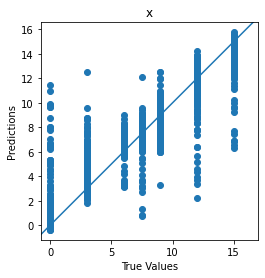

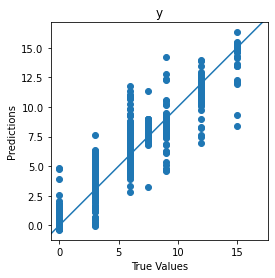

In [29]:
# Run predict
Y_pred = model.predict(norm_test_X)
price_pred = Y_pred[0]
ptratio_pred = Y_pred[1]

plot_diff(test_Y[0], Y_pred[0], title='x')
plot_diff(test_Y[1], Y_pred[1], title='y')

In [ ]:
# Plot RMSE
plot_metrics(metric_name='x_output_root_mean_squared_error', title='x RMSE', ylim=1)
plot_metrics(metric_name='y_output_root_mean_squared_error', title='y RMSE', ylim=1)

In [30]:
# Save model
model.save('./xyForcePlateF1/', save_format='tf')

INFO:tensorflow:Assets written to: ./xyForcePlateF1/assets


In [19]:
# Restore model
loaded_model = tf.keras.models.load_model('Models/xyForcePlateN6/')

In [ ]:
dataVal.iloc[:,:4].shape

In [78]:
# Run predict with restored model
predictions = loaded_model.predict(norm_val_X)
x_pred = predictions[0]
y_pred = predictions[1]

In [79]:
AnDataErr=np.array(val_Y[0]).reshape(len(val_Y[0]),1)
x_pred.shape

(40375, 1)

In [65]:
AnData=pd.DataFrame.from_dict(norm_val_X)
AnData.columns=["F0","F1","F2","F3","Fdist","Sx","Sy"]
anDatX=np.array(val_Y[0]).reshape(len(val_Y[0]),1)
AnData['erroX']=x_pred-anDatX
anDatY=np.array(val_Y[1]).reshape(len(val_Y[1]),1)
AnData['erroY']=y_pred-anDatY
AnData.head()

F0        F1        F2        F3     Fdist        Sx        Sy  \
0 -0.853840 -0.609361  0.463732 -0.565095 -0.935239  0.615354 -0.666164   
1  2.282001 -0.558448  1.103403  1.402729  1.020134  0.703283 -0.666794   
2  0.180799 -0.626006 -1.347892 -0.585134 -0.978774  0.749187 -0.651268   
3  0.036213  1.221565 -0.345585 -0.557080  0.426020 -1.544215  1.481987   
4 -1.004060  1.955893  1.014689 -0.545056  1.432318 -2.074992  1.298036   

      erroX     erroY  
0 -0.190210  3.207140  
1 -0.133579  0.283401  
2  1.865529  0.425498  
3  0.058178 -0.116549  
4 -0.139824  0.469171

In [80]:
AnData.to_csv("dataForce.csv")

In [ ]:
norm_test_X[0]

In [30]:
print(x_pred)

[[14.80979   ]
 [ 2.8664205 ]
 [ 1.8655288 ]
 ...
 [ 7.047241  ]
 [ 0.6381608 ]
 [-0.05404818]]


In [34]:
print(val_Y)

(230278    15.0
54212      3.0
25421      0.0
162725    12.0
188777    15.0
          ... 
179185    15.0
26892      0.0
107769     7.5
11405      0.0
4433       0.0
Name: x, Length: 40375, dtype: float64, 230278     0.0
54212      9.0
25421     12.0
162725    12.0
188777     7.5
          ... 
179185     3.0
26892     12.0
107769    15.0
11405      6.0
4433       0.0
Name: y, Length: 40375, dtype: float64)


################################################################################